# INTEGRATE on ESBJERG data

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    # # # # # #%load_ext autoreload
    # # # # # #%autoreload 2
    pass

In [2]:
import integrate as ig
import numpy as np
import matplotlib.pyplot as plt
# check if parallel computations can be performed
parallel = ig.use_parallel(showInfo=1)
hardcopy = True

Notebook detected. Parallel processing is OK


Getting data for case: ESBJERG


Downloaded ESBJERG_ALL.h5
Downloaded TX07_20230906_2x4_RC20-33.gex
Downloaded README_ESBJERG
--> Got data for case: ESBJERG
Using data file: ESBJERG_ALL.h5
Using GEX file: TX07_20230906_2x4_RC20-33.gex
f_data_h5=ESBJERG_ALL.h5


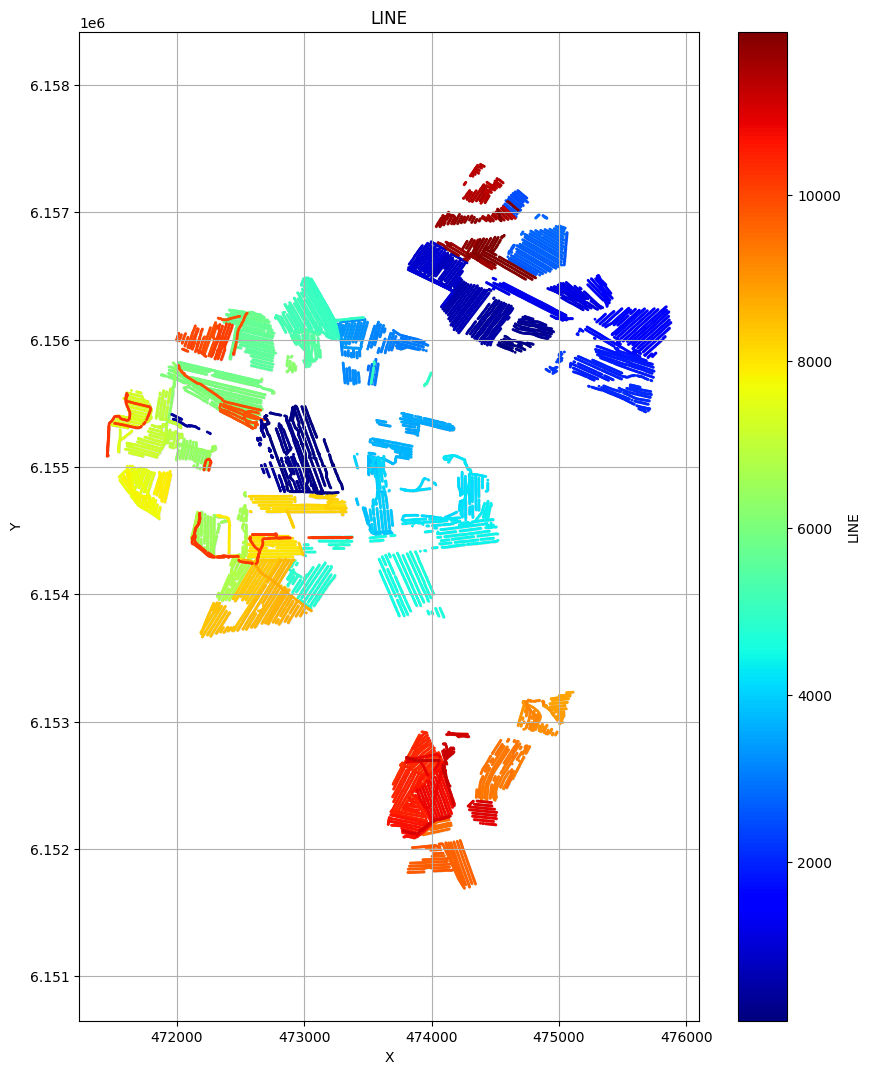

In [3]:
N=5000000
N=50000
case = 'ESBJERG'
files = ig.get_case_data(case=case)
f_data_h5 = files[0]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

ig.plot_geometry(f_data_h5, pl='LINE')
X, Y, LINE, ELEVATION = ig.get_geometry(f_data_h5)

## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

In [4]:

# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=500)
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='uniform', NLAY_min=1, NLAY_max=8, RHO_min=1, RHO_max=500)

# Plot some summary statistics of the prior model
#ig.plot_prior_stats(f_prior_h5)

prior_layered:   0%|                                                                                                                          | 0/50000 [00:00<?, ?it/s]

prior_layered:  66%|███████████████████████████████████████████████████████████████████████                                    | 33220/50000 [00:01<00:00, 33218.59it/s]

File PRIOR_CHI2_NF_3_log-uniform_N50000.h5 does not exist.


prior_layered:   0%|                                                                                                                          | 0/50000 [00:00<?, ?it/s]

File PRIOR_UNIFORM_NL_1-8_log-uniform_N50000.h5 does not exist.


### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

In [5]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel, showInfo=0)

Using file_basename=TX07_20230906_2x4_RC20-33


prior_data_gaaem: Using 32 parallel threads.


gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1563 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   0%|                                                                                                                               | 0/1562 [00:00<?, ?it/s]

gatdaem1d:   2%|██▍                                                                                                                   | 32/1563 [00:01<00:47, 31.96it/s]

gatdaem1d:   2%|██                                                                                                                    | 27/1563 [00:01<00:56, 26.97it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 22/1563 [00:01<01:11, 21.50it/s]

gatdaem1d:   2%|█▉                                                                                                                    | 25/1563 [00:01<01:04, 23.89it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 22/1563 [00:01<01:12, 21.34it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 23/1563 [00:01<01:07, 22.97it/s]

gatdaem1d:   2%|█▉                                                                                                                    | 25/1563 [00:01<01:02, 24.61it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 23/1562 [00:01<01:09, 22.13it/s]

gatdaem1d:   2%|██                                                                                                                    | 27/1562 [00:01<00:57, 26.52it/s]

gatdaem1d:   1%|█▌                                                                                                                    | 21/1562 [00:01<01:13, 20.84it/s]

gatdaem1d:   2%|██▊                                                                                                                   | 37/1563 [00:01<00:42, 35.67it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 23/1563 [00:01<01:08, 22.41it/s]

gatdaem1d:   2%|█▉                                                                                                                    | 25/1562 [00:01<01:02, 24.55it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 22/1563 [00:01<01:10, 21.71it/s]

gatdaem1d:   1%|█▌                                                                                                                    | 20/1563 [00:01<01:18, 19.77it/s]

gatdaem1d:   2%|█▉                                                                                                                    | 26/1563 [00:01<00:59, 25.68it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 22/1562 [00:01<01:11, 21.53it/s]

gatdaem1d:   2%|█▊                                                                                                                    | 24/1562 [00:01<01:04, 23.78it/s]

gatdaem1d:   2%|█▉                                                                                                                    | 26/1562 [00:01<00:59, 25.63it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 22/1563 [00:01<01:11, 21.44it/s]

gatdaem1d:   2%|██▍                                                                                                                   | 32/1563 [00:01<00:48, 31.33it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 22/1563 [00:01<01:12, 21.23it/s]

gatdaem1d:   2%|██▎                                                                                                                   | 30/1562 [00:01<00:52, 29.38it/s]

gatdaem1d:   1%|█▍                                                                                                                    | 19/1562 [00:01<01:21, 18.93it/s]

gatdaem1d:   2%|██▍                                                                                                                   | 33/1563 [00:01<00:46, 32.57it/s]

gatdaem1d:   2%|█▉                                                                                                                    | 26/1562 [00:01<01:00, 25.50it/s]

gatdaem1d:   2%|█▉                                                                                                                    | 26/1562 [00:01<00:59, 25.68it/s]

gatdaem1d:   2%|█▊                                                                                                                    | 24/1562 [00:01<01:06, 23.04it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 23/1562 [00:01<01:08, 22.50it/s]

gatdaem1d:   1%|█▋                                                                                                                    | 22/1562 [00:01<01:12, 21.34it/s]

gatdaem1d:   2%|██▎                                                                                                                   | 30/1562 [00:01<00:51, 29.49it/s]

gatdaem1d:   1%|█▌                                                                                                                    | 20/1562 [00:01<01:22, 18.75it/s]

gatdaem1d:   3%|███▎                                                                                                                  | 44/1563 [00:02<01:09, 21.71it/s]

gatdaem1d:   3%|███▌                                                                                                                  | 47/1563 [00:02<01:04, 23.37it/s]

gatdaem1d:   4%|████▏                                                                                                                 | 55/1563 [00:02<00:56, 26.89it/s]

gatdaem1d:   4%|████▋                                                                                                                 | 62/1562 [00:02<00:48, 31.22it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 45/1562 [00:02<01:07, 22.54it/s]

gatdaem1d:   4%|████▍                                                                                                                 | 58/1562 [00:02<00:51, 29.22it/s]

gatdaem1d:   3%|███▊                                                                                                                  | 50/1563 [00:02<01:02, 24.32it/s]

gatdaem1d:   3%|███▉                                                                                                                  | 52/1563 [00:02<00:58, 25.94it/s]

gatdaem1d:   3%|███▉                                                                                                                  | 52/1562 [00:02<00:58, 25.96it/s]

gatdaem1d:   3%|███▏                                                                                                                  | 42/1563 [00:02<01:13, 20.68it/s]

gatdaem1d:   3%|███▎                                                                                                                  | 44/1563 [00:02<01:11, 21.28it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 46/1563 [00:02<01:08, 22.09it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 45/1562 [00:02<01:09, 21.89it/s]

gatdaem1d:   3%|███▋                                                                                                                  | 48/1562 [00:02<01:05, 23.02it/s]

gatdaem1d:   3%|███▋                                                                                                                  | 49/1563 [00:02<01:08, 22.00it/s]

gatdaem1d:   4%|████▏                                                                                                                 | 55/1562 [00:02<00:55, 27.08it/s]

gatdaem1d:   3%|███▎                                                                                                                  | 44/1563 [00:02<01:10, 21.40it/s]

gatdaem1d:   3%|███▉                                                                                                                  | 52/1563 [00:02<01:01, 24.69it/s]

gatdaem1d:   3%|███▏                                                                                                                  | 43/1562 [00:02<01:10, 21.39it/s]

gatdaem1d:   4%|████▊                                                                                                                 | 64/1563 [00:02<00:55, 26.95it/s]

gatdaem1d:   3%|███▎                                                                                                                  | 44/1563 [00:02<01:13, 20.64it/s]

gatdaem1d:   4%|████▏                                                                                                                 | 55/1562 [00:02<00:55, 27.33it/s]

gatdaem1d:   3%|███▍                                                                                                                  | 45/1562 [00:02<01:08, 22.18it/s]

gatdaem1d:   4%|████▍                                                                                                                 | 58/1562 [00:02<00:50, 29.56it/s]

gatdaem1d:   4%|████▊                                                                                                                 | 64/1563 [00:02<00:51, 28.97it/s]

gatdaem1d:   4%|████▌                                                                                                                 | 60/1562 [00:02<00:54, 27.81it/s]

gatdaem1d:   2%|██▉                                                                                                                   | 39/1562 [00:02<01:23, 18.18it/s]

gatdaem1d:   3%|███▋                                                                                                                  | 48/1562 [00:02<01:09, 21.68it/s]

gatdaem1d:   3%|███▉                                                                                                                  | 52/1562 [00:02<01:05, 23.09it/s]

gatdaem1d:   5%|█████▌                                                                                                                | 73/1563 [00:02<00:52, 28.36it/s]

gatdaem1d:   4%|████▉                                                                                                                 | 66/1563 [00:02<00:55, 26.90it/s]

gatdaem1d:   4%|████▌                                                                                                                 | 60/1562 [00:02<01:05, 23.10it/s]

gatdaem1d:   4%|█████▎                                                                                                                | 70/1563 [00:03<01:03, 23.43it/s]

gatdaem1d:   5%|██████▏                                                                                                               | 82/1563 [00:03<00:51, 28.49it/s]

gatdaem1d:   5%|██████▏                                                                                                               | 82/1563 [00:03<00:55, 26.61it/s]

gatdaem1d:   5%|██████▎                                                                                                               | 84/1563 [00:03<00:51, 28.52it/s]

gatdaem1d:   5%|██████▎                                                                                                               | 84/1563 [00:03<00:51, 28.48it/s]

gatdaem1d:   4%|█████▏                                                                                                                | 69/1562 [00:03<01:06, 22.60it/s]

gatdaem1d:   5%|█████▍                                                                                                                | 72/1563 [00:03<01:02, 23.71it/s]

gatdaem1d:   4%|█████▏                                                                                                                | 68/1563 [00:03<01:05, 22.81it/s]

gatdaem1d:   5%|█████▋                                                                                                                | 76/1562 [00:03<00:57, 25.64it/s]

gatdaem1d:   4%|████▉                                                                                                                 | 66/1563 [00:03<01:11, 21.02it/s]

gatdaem1d:   4%|█████                                                                                                                 | 67/1563 [00:03<01:07, 22.00it/s]

gatdaem1d:   5%|█████▉                                                                                                                | 78/1562 [00:03<01:00, 24.54it/s]

gatdaem1d:   5%|█████▍                                                                                                                | 72/1562 [00:03<01:05, 22.68it/s]

gatdaem1d:   4%|█████                                                                                                                 | 67/1563 [00:03<01:09, 21.60it/s]

gatdaem1d:   4%|█████▎                                                                                                                | 70/1562 [00:03<01:03, 23.55it/s]

gatdaem1d:   5%|█████▉                                                                                                                | 78/1562 [00:03<00:55, 26.69it/s]

gatdaem1d:   6%|██████▉                                                                                                               | 92/1563 [00:03<00:55, 26.37it/s]

gatdaem1d:   4%|████▉                                                                                                                 | 66/1562 [00:03<01:07, 22.03it/s]

gatdaem1d:   6%|███████▍                                                                                                              | 98/1562 [00:03<00:45, 31.87it/s]

gatdaem1d:   5%|██████▎                                                                                                               | 83/1562 [00:03<00:54, 27.21it/s]

gatdaem1d:   5%|█████▍                                                                                                                | 72/1563 [00:03<01:15, 19.64it/s]

gatdaem1d:   5%|██████▎                                                                                                               | 83/1562 [00:03<00:59, 25.00it/s]

gatdaem1d:   6%|██████▋                                                                                                               | 88/1562 [00:03<00:55, 26.70it/s]

gatdaem1d:   5%|█████▋                                                                                                                | 76/1562 [00:03<01:06, 22.34it/s]

gatdaem1d:   6%|███████                                                                                                               | 94/1563 [00:03<00:55, 26.40it/s]

gatdaem1d:   6%|██████▋                                                                                                               | 88/1562 [00:03<01:04, 22.72it/s]

gatdaem1d:   6%|███████                                                                                                               | 94/1563 [00:03<00:56, 25.88it/s]

gatdaem1d:   5%|██████▎                                                                                                               | 83/1562 [00:03<01:08, 21.65it/s]

gatdaem1d:   7%|███████▋                                                                                                             | 103/1563 [00:04<01:00, 24.13it/s]

gatdaem1d:   6%|███████▌                                                                                                             | 101/1563 [00:04<00:55, 26.24it/s]

gatdaem1d:   7%|████████▊                                                                                                            | 117/1563 [00:04<00:46, 30.93it/s]

gatdaem1d:   8%|████████▊                                                                                                            | 118/1563 [00:04<00:47, 30.25it/s]

gatdaem1d:   5%|██████▎                                                                                                               | 84/1562 [00:03<01:12, 20.48it/s]

gatdaem1d:   6%|███████                                                                                                               | 94/1562 [00:04<01:08, 21.57it/s]

gatdaem1d:   8%|████████▉                                                                                                            | 119/1563 [00:04<00:46, 30.88it/s]

gatdaem1d:   5%|█████▊                                                                                                                | 77/1563 [00:04<01:25, 17.45it/s]

gatdaem1d:   6%|███████▌                                                                                                             | 101/1563 [00:04<00:55, 26.58it/s]

gatdaem1d:   6%|███████▏                                                                                                              | 96/1563 [00:04<01:02, 23.51it/s]

gatdaem1d:   6%|██████▊                                                                                                               | 91/1563 [00:04<01:05, 22.43it/s]

gatdaem1d:   7%|███████▊                                                                                                             | 105/1562 [00:04<00:57, 25.33it/s]

gatdaem1d:   6%|███████▏                                                                                                              | 95/1563 [00:04<01:00, 24.11it/s]

gatdaem1d:   7%|███████▊                                                                                                             | 105/1562 [00:04<00:54, 26.54it/s]

gatdaem1d:   7%|███████▋                                                                                                             | 102/1562 [00:04<00:58, 25.00it/s]

gatdaem1d:   6%|██████▉                                                                                                               | 92/1562 [00:04<01:09, 21.14it/s]

gatdaem1d:   6%|███████▍                                                                                                             | 100/1563 [00:04<00:56, 25.83it/s]

gatdaem1d:   6%|███████                                                                                                               | 94/1562 [00:04<01:04, 22.70it/s]

gatdaem1d:   6%|███████▌                                                                                                             | 101/1562 [00:04<00:54, 27.03it/s]

gatdaem1d:   7%|███████▊                                                                                                             | 105/1562 [00:04<00:56, 25.72it/s]

gatdaem1d:   7%|████████▍                                                                                                            | 113/1563 [00:04<00:58, 24.98it/s]

gatdaem1d:   8%|█████████▉                                                                                                           | 132/1562 [00:04<00:43, 32.58it/s]

gatdaem1d:   8%|████████▊                                                                                                            | 118/1562 [00:04<00:48, 29.86it/s]

gatdaem1d:   8%|████████▉                                                                                                            | 119/1563 [00:04<00:57, 24.90it/s]

gatdaem1d:   6%|██████▉                                                                                                               | 92/1563 [00:04<01:17, 18.96it/s]

gatdaem1d:   6%|███████▍                                                                                                              | 99/1562 [00:04<01:07, 21.59it/s]

gatdaem1d:   7%|████████▏                                                                                                            | 109/1562 [00:04<01:01, 23.76it/s]

gatdaem1d:   8%|█████████                                                                                                            | 121/1563 [00:04<00:57, 25.29it/s]

gatdaem1d:   7%|████████▋                                                                                                            | 116/1562 [00:04<00:59, 24.35it/s]

gatdaem1d:   7%|███████▉                                                                                                             | 106/1562 [00:04<01:11, 20.50it/s]

gatdaem1d:  10%|███████████▏                                                                                                         | 149/1563 [00:05<00:46, 30.48it/s]

gatdaem1d:   8%|█████████▉                                                                                                           | 132/1563 [00:05<00:51, 27.55it/s]

gatdaem1d:   7%|████████▍                                                                                                            | 113/1562 [00:05<01:08, 21.04it/s]

gatdaem1d:   8%|█████████▎                                                                                                           | 125/1562 [00:05<00:59, 24.17it/s]

gatdaem1d:   9%|███████████                                                                                                          | 148/1563 [00:05<00:47, 29.91it/s]

gatdaem1d:   8%|█████████                                                                                                            | 121/1563 [00:04<01:02, 23.10it/s]

gatdaem1d:   6%|███████▍                                                                                                              | 98/1563 [00:05<01:19, 18.39it/s]

gatdaem1d:   9%|██████████▎                                                                                                          | 137/1563 [00:05<00:48, 29.66it/s]

gatdaem1d:   8%|█████████▌                                                                                                           | 128/1563 [00:05<01:02, 22.88it/s]

gatdaem1d:   8%|█████████▎                                                                                                           | 124/1563 [00:05<00:55, 25.90it/s]

gatdaem1d:   7%|███████▊                                                                                                             | 105/1562 [00:05<01:14, 19.46it/s]

gatdaem1d:   9%|██████████▌                                                                                                          | 141/1562 [00:05<00:47, 29.68it/s]

gatdaem1d:   8%|████████▉                                                                                                            | 120/1563 [00:05<01:03, 22.85it/s]

gatdaem1d:   8%|█████████▉                                                                                                           | 132/1562 [00:05<00:53, 26.49it/s]

gatdaem1d:  10%|███████████▏                                                                                                         | 150/1563 [00:05<00:49, 28.81it/s]

gatdaem1d:   8%|█████████▊                                                                                                           | 131/1562 [00:05<00:57, 24.79it/s]

gatdaem1d:   8%|████████▉                                                                                                            | 120/1563 [00:05<01:01, 23.62it/s]

gatdaem1d:   9%|█████████▉                                                                                                           | 133/1562 [00:05<00:49, 28.58it/s]

gatdaem1d:   9%|██████████▎                                                                                                          | 137/1562 [00:05<00:51, 27.90it/s]

gatdaem1d:   7%|████████▊                                                                                                            | 117/1562 [00:05<01:04, 22.38it/s]

gatdaem1d:   8%|█████████▍                                                                                                           | 126/1563 [00:05<00:59, 24.34it/s]

gatdaem1d:  10%|███████████▎                                                                                                         | 151/1562 [00:05<00:45, 30.85it/s]

gatdaem1d:   7%|████████▌                                                                                                            | 114/1562 [00:05<01:14, 19.46it/s]

gatdaem1d:   9%|██████████▍                                                                                                          | 139/1563 [00:05<01:00, 23.66it/s]

gatdaem1d:   8%|█████████▌                                                                                                           | 128/1562 [00:05<01:00, 23.88it/s]

gatdaem1d:   7%|████████▍                                                                                                            | 112/1563 [00:05<01:18, 18.59it/s]

gatdaem1d:  11%|████████████▎                                                                                                        | 165/1562 [00:05<00:46, 29.88it/s]

gatdaem1d:  10%|███████████▏                                                                                                         | 150/1563 [00:05<00:53, 26.34it/s]

gatdaem1d:   9%|█████████▉                                                                                                           | 133/1562 [00:05<01:02, 22.99it/s]

gatdaem1d:   9%|██████████▊                                                                                                          | 145/1563 [00:05<01:01, 23.13it/s]

gatdaem1d:   9%|██████████▌                                                                                                          | 141/1562 [00:05<00:59, 23.83it/s]

gatdaem1d:   9%|██████████▏                                                                                                          | 136/1562 [00:05<01:01, 23.05it/s]

gatdaem1d:   9%|██████████                                                                                                           | 135/1562 [00:06<01:07, 21.05it/s]

gatdaem1d:   8%|████████▉                                                                                                            | 119/1563 [00:06<01:15, 19.12it/s]

gatdaem1d:   9%|██████████▊                                                                                                          | 145/1563 [00:05<01:01, 23.04it/s]

gatdaem1d:  11%|█████████████▎                                                                                                       | 178/1563 [00:06<00:47, 29.41it/s]

gatdaem1d:  10%|███████████▍                                                                                                         | 152/1562 [00:06<00:57, 24.35it/s]

gatdaem1d:  11%|████████████▋                                                                                                        | 169/1563 [00:06<00:46, 30.15it/s]

gatdaem1d:   8%|█████████▋                                                                                                           | 130/1562 [00:06<01:07, 21.10it/s]

gatdaem1d:   9%|██████████▋                                                                                                          | 143/1563 [00:06<01:02, 22.81it/s]

gatdaem1d:  10%|███████████▏                                                                                                         | 150/1563 [00:06<00:55, 25.42it/s]

gatdaem1d:  10%|███████████▉                                                                                                         | 160/1562 [00:06<00:52, 26.82it/s]

gatdaem1d:   9%|██████████▊                                                                                                          | 144/1563 [00:06<00:59, 23.73it/s]

gatdaem1d:  10%|███████████▉                                                                                                         | 160/1563 [00:06<00:54, 25.68it/s]

gatdaem1d:  11%|████████████▊                                                                                                        | 171/1562 [00:06<00:47, 29.11it/s]

gatdaem1d:  10%|███████████▍                                                                                                         | 152/1563 [00:06<01:03, 22.16it/s]

gatdaem1d:  10%|███████████▋                                                                                                         | 156/1562 [00:06<00:58, 24.16it/s]

gatdaem1d:   9%|██████████▌                                                                                                          | 141/1562 [00:06<01:02, 22.84it/s]

gatdaem1d:  12%|█████████████▍                                                                                                       | 180/1563 [00:06<00:51, 26.87it/s]

gatdaem1d:  12%|█████████████▍                                                                                                       | 180/1563 [00:06<00:50, 27.34it/s]

gatdaem1d:  10%|███████████▎                                                                                                         | 151/1563 [00:06<00:57, 24.43it/s]

gatdaem1d:   9%|██████████▎                                                                                                          | 137/1562 [00:06<01:09, 20.41it/s]

gatdaem1d:  10%|████████████▏                                                                                                        | 162/1562 [00:06<00:52, 26.92it/s]

gatdaem1d:  11%|████████████▉                                                                                                        | 172/1563 [00:06<00:52, 26.46it/s]

gatdaem1d:  11%|████████████▎                                                                                                        | 165/1562 [00:06<00:54, 25.74it/s]

gatdaem1d:   9%|██████████▎                                                                                                          | 137/1563 [00:06<01:09, 20.53it/s]

gatdaem1d:  10%|███████████▉                                                                                                         | 159/1562 [00:06<00:53, 26.06it/s]

gatdaem1d:  12%|█████████████▋                                                                                                       | 183/1562 [00:06<00:48, 28.48it/s]

gatdaem1d:  10%|███████████▊                                                                                                         | 157/1562 [00:06<01:00, 23.12it/s]

gatdaem1d:  13%|██████████████▋                                                                                                      | 196/1562 [00:06<00:48, 28.44it/s]

gatdaem1d:  11%|████████████▋                                                                                                        | 169/1563 [00:07<01:01, 22.49it/s]

gatdaem1d:  11%|█████████████▏                                                                                                       | 177/1563 [00:06<00:56, 24.46it/s]

gatdaem1d:  11%|████████████▍                                                                                                        | 166/1562 [00:06<00:58, 23.75it/s]

gatdaem1d:  11%|████████████▌                                                                                                        | 168/1562 [00:06<00:54, 25.73it/s]

gatdaem1d:  10%|███████████▊                                                                                                         | 157/1562 [00:07<01:06, 21.08it/s]

gatdaem1d:  14%|████████████████                                                                                                     | 214/1563 [00:07<00:43, 31.12it/s]

gatdaem1d:   9%|██████████▊                                                                                                          | 144/1563 [00:07<01:09, 20.51it/s]

gatdaem1d:  11%|████████████▋                                                                                                        | 169/1563 [00:07<01:00, 22.88it/s]

gatdaem1d:  13%|██████████████▉                                                                                                      | 200/1563 [00:07<00:45, 29.96it/s]

gatdaem1d:  10%|████████████                                                                                                         | 161/1562 [00:07<00:58, 23.92it/s]

gatdaem1d:  11%|█████████████▏                                                                                                       | 177/1563 [00:07<00:53, 25.85it/s]

gatdaem1d:  11%|█████████████▎                                                                                                       | 178/1562 [00:07<00:57, 24.22it/s]

gatdaem1d:  11%|████████████▍                                                                                                        | 166/1563 [00:07<01:02, 22.39it/s]

gatdaem1d:  11%|████████████▌                                                                                                        | 168/1563 [00:07<01:00, 23.10it/s]

gatdaem1d:  12%|█████████████▉                                                                                                       | 186/1563 [00:07<00:55, 24.63it/s]

gatdaem1d:  11%|████████████▎                                                                                                        | 165/1562 [00:07<01:00, 23.05it/s]

gatdaem1d:  13%|███████████████                                                                                                      | 201/1562 [00:07<00:49, 27.72it/s]

gatdaem1d:  11%|█████████████▏                                                                                                       | 176/1563 [00:07<00:56, 24.46it/s]

gatdaem1d:  11%|█████████████                                                                                                        | 175/1563 [00:07<01:05, 21.18it/s]

gatdaem1d:  13%|███████████████▌                                                                                                     | 208/1563 [00:07<00:50, 26.93it/s]

gatdaem1d:  12%|█████████████▌                                                                                                       | 181/1562 [00:07<01:00, 23.00it/s]

gatdaem1d:  11%|████████████▉                                                                                                        | 172/1562 [00:07<00:56, 24.69it/s]

gatdaem1d:  12%|██████████████                                                                                                       | 187/1562 [00:07<00:57, 23.94it/s]

gatdaem1d:  13%|███████████████▎                                                                                                     | 205/1563 [00:07<00:48, 28.20it/s]

gatdaem1d:  12%|██████████████▍                                                                                                      | 193/1562 [00:07<00:52, 26.26it/s]

gatdaem1d:  13%|███████████████▌                                                                                                     | 208/1563 [00:07<00:53, 25.14it/s]

gatdaem1d:  10%|████████████                                                                                                         | 161/1563 [00:07<01:05, 21.32it/s]

gatdaem1d:  12%|██████████████▏                                                                                                      | 190/1562 [00:07<00:52, 26.00it/s]

gatdaem1d:  12%|█████████████▉                                                                                                       | 186/1562 [00:07<00:55, 24.81it/s]

gatdaem1d:  14%|███████████████▉                                                                                                     | 212/1562 [00:07<00:49, 27.47it/s]

gatdaem1d:  12%|█████████████▉                                                                                                       | 186/1562 [00:07<00:55, 24.69it/s]

gatdaem1d:  12%|██████████████▍                                                                                                      | 193/1563 [00:08<00:59, 22.83it/s]

gatdaem1d:  12%|██████████████▌                                                                                                      | 195/1562 [00:07<00:52, 26.10it/s]

gatdaem1d:  12%|██████████████▍                                                                                                      | 192/1562 [00:07<00:56, 24.18it/s]

gatdaem1d:  14%|████████████████▊                                                                                                    | 225/1562 [00:07<00:48, 27.45it/s]

gatdaem1d:  12%|██████████████                                                                                                       | 187/1562 [00:08<00:58, 23.46it/s]

gatdaem1d:  16%|██████████████████▍                                                                                                  | 247/1563 [00:08<00:41, 31.47it/s]

gatdaem1d:  12%|██████████████▍                                                                                                      | 193/1563 [00:08<00:59, 22.99it/s]

gatdaem1d:  13%|███████████████                                                                                                      | 202/1563 [00:08<00:59, 22.83it/s]

gatdaem1d:  13%|███████████████▎                                                                                                     | 205/1562 [00:08<00:54, 24.99it/s]

gatdaem1d:  13%|███████████████▏                                                                                                     | 203/1563 [00:08<00:53, 25.33it/s]

gatdaem1d:  11%|████████████▍                                                                                                        | 166/1563 [00:08<01:09, 20.15it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 230/1563 [00:08<00:46, 28.84it/s]

gatdaem1d:  12%|██████████████▎                                                                                                      | 191/1563 [00:08<00:59, 22.91it/s]

gatdaem1d:  12%|█████████████▉                                                                                                       | 186/1562 [00:08<00:59, 23.30it/s]

gatdaem1d:  13%|██████████████▋                                                                                                      | 196/1563 [00:08<00:56, 24.30it/s]

gatdaem1d:  14%|████████████████                                                                                                     | 215/1563 [00:08<00:52, 25.88it/s]

gatdaem1d:  12%|██████████████▏                                                                                                      | 189/1562 [00:08<00:59, 23.15it/s]

gatdaem1d:  15%|█████████████████▊                                                                                                   | 237/1562 [00:08<00:44, 29.96it/s]

gatdaem1d:  13%|███████████████                                                                                                      | 202/1563 [00:08<00:55, 24.56it/s]

gatdaem1d:  14%|███████████████▊                                                                                                     | 211/1562 [00:08<00:54, 24.93it/s]

gatdaem1d:  13%|███████████████▌                                                                                                     | 207/1562 [00:08<00:48, 27.69it/s]

gatdaem1d:  13%|██████████████▋                                                                                                      | 197/1563 [00:08<01:05, 20.76it/s]

gatdaem1d:  14%|████████████████▎                                                                                                    | 217/1562 [00:08<00:52, 25.58it/s]

gatdaem1d:  15%|█████████████████▌                                                                                                   | 235/1563 [00:08<00:46, 28.63it/s]

gatdaem1d:  14%|████████████████▌                                                                                                    | 221/1562 [00:08<00:50, 26.76it/s]

gatdaem1d:  15%|█████████████████▋                                                                                                   | 236/1563 [00:08<00:51, 25.99it/s]

gatdaem1d:  15%|█████████████████▋                                                                                                   | 237/1563 [00:08<00:50, 26.03it/s]

gatdaem1d:  12%|██████████████▌                                                                                                      | 194/1563 [00:08<00:55, 24.70it/s]

gatdaem1d:  14%|████████████████▎                                                                                                    | 217/1562 [00:08<00:52, 25.70it/s]

gatdaem1d:  16%|██████████████████▍                                                                                                  | 246/1562 [00:08<00:44, 29.31it/s]

gatdaem1d:  14%|███████████████▊                                                                                                     | 211/1562 [00:08<00:56, 23.91it/s]

gatdaem1d:  14%|████████████████▏                                                                                                    | 217/1563 [00:09<00:58, 23.03it/s]

gatdaem1d:  14%|████████████████▊                                                                                                    | 224/1562 [00:08<00:49, 26.96it/s]

gatdaem1d:  14%|███████████████▊                                                                                                     | 211/1562 [00:08<00:56, 23.76it/s]

gatdaem1d:  16%|██████████████████▉                                                                                                  | 253/1562 [00:08<00:48, 27.20it/s]

gatdaem1d:  14%|████████████████▎                                                                                                    | 217/1562 [00:08<00:56, 23.65it/s]

gatdaem1d:  14%|████████████████▌                                                                                                    | 221/1562 [00:09<00:50, 26.36it/s]

gatdaem1d:  15%|█████████████████▍                                                                                                   | 232/1562 [00:09<00:52, 25.50it/s]

gatdaem1d:  14%|████████████████▏                                                                                                    | 217/1563 [00:09<00:58, 22.94it/s]

gatdaem1d:  14%|████████████████▉                                                                                                    | 226/1563 [00:09<00:58, 22.70it/s]

gatdaem1d:  12%|██████████████▏                                                                                                      | 190/1563 [00:09<01:04, 21.25it/s]

gatdaem1d:  14%|████████████████                                                                                                     | 215/1563 [00:09<00:58, 23.16it/s]

gatdaem1d:  15%|█████████████████▏                                                                                                   | 229/1563 [00:09<00:52, 25.22it/s]

gatdaem1d:  18%|████████████████████▉                                                                                                | 279/1563 [00:09<00:42, 30.15it/s]

gatdaem1d:  14%|████████████████▏                                                                                                    | 216/1562 [00:09<00:53, 25.25it/s]

gatdaem1d:  16%|██████████████████▏                                                                                                  | 243/1563 [00:09<00:49, 26.48it/s]

gatdaem1d:  14%|███████████████▉                                                                                                     | 213/1562 [00:09<00:58, 23.20it/s]

gatdaem1d:  14%|████████████████▌                                                                                                    | 221/1563 [00:09<00:57, 23.23it/s]

gatdaem1d:  17%|████████████████████                                                                                                 | 268/1562 [00:09<00:44, 29.40it/s]

gatdaem1d:  15%|████████████████▉                                                                                                    | 227/1563 [00:09<00:55, 24.17it/s]

gatdaem1d:  15%|█████████████████▉                                                                                                   | 240/1562 [00:09<00:51, 25.82it/s]

gatdaem1d:  16%|██████████████████▋                                                                                                  | 249/1562 [00:09<00:47, 27.41it/s]

gatdaem1d:  17%|████████████████████▏                                                                                                | 269/1563 [00:09<00:42, 30.16it/s]

gatdaem1d:  16%|██████████████████▋                                                                                                  | 249/1562 [00:09<00:48, 27.08it/s]

gatdaem1d:  14%|████████████████▎                                                                                                    | 218/1563 [00:09<01:06, 20.25it/s]

gatdaem1d:  15%|█████████████████▋                                                                                                   | 236/1562 [00:09<00:49, 27.01it/s]

gatdaem1d:  14%|████████████████▌                                                                                                    | 222/1563 [00:09<00:52, 25.58it/s]

gatdaem1d:  17%|███████████████████▊                                                                                                 | 264/1563 [00:09<00:49, 26.05it/s]

gatdaem1d:  17%|███████████████████▍                                                                                                 | 259/1563 [00:09<00:51, 25.48it/s]

gatdaem1d:  16%|██████████████████▍                                                                                                  | 246/1562 [00:09<00:49, 26.62it/s]

gatdaem1d:  16%|██████████████████▏                                                                                                  | 243/1563 [00:10<00:55, 23.80it/s]

gatdaem1d:  17%|███████████████████▋                                                                                                 | 263/1563 [00:10<00:53, 24.29it/s]

gatdaem1d:  15%|█████████████████▋                                                                                                   | 236/1562 [00:09<00:55, 23.88it/s]

gatdaem1d:  16%|███████████████████                                                                                                  | 255/1562 [00:09<00:46, 28.17it/s]

gatdaem1d:  15%|█████████████████▋                                                                                                   | 236/1562 [00:09<00:55, 23.79it/s]

gatdaem1d:  18%|█████████████████████▎                                                                                               | 284/1562 [00:09<00:45, 28.12it/s]

gatdaem1d:  16%|██████████████████▎                                                                                                  | 244/1562 [00:09<00:53, 24.57it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 276/1562 [00:10<00:48, 26.77it/s]

gatdaem1d:  17%|███████████████████▍                                                                                                 | 260/1562 [00:10<00:50, 26.01it/s]

gatdaem1d:  15%|██████████████████                                                                                                   | 242/1563 [00:10<00:56, 23.33it/s]

gatdaem1d:  16%|██████████████████▊                                                                                                  | 251/1563 [00:10<00:56, 23.25it/s]

gatdaem1d:  14%|████████████████▏                                                                                                    | 216/1563 [00:10<01:00, 22.38it/s]

gatdaem1d:  16%|██████████████████▌                                                                                                  | 248/1562 [00:10<00:52, 24.93it/s]

gatdaem1d:  15%|██████████████████▏                                                                                                  | 242/1562 [00:10<00:52, 25.19it/s]

gatdaem1d:  17%|████████████████████▏                                                                                                | 270/1563 [00:10<00:48, 26.54it/s]

gatdaem1d:  15%|█████████████████▉                                                                                                   | 239/1563 [00:10<00:59, 22.40it/s]

gatdaem1d:  15%|█████████████████▉                                                                                                   | 239/1562 [00:10<00:55, 24.01it/s]

gatdaem1d:  20%|███████████████████████▏                                                                                             | 310/1563 [00:10<00:43, 28.69it/s]

gatdaem1d:  16%|███████████████████                                                                                                  | 255/1563 [00:10<00:55, 23.44it/s]

gatdaem1d:  17%|███████████████████▉                                                                                                 | 266/1562 [00:10<00:51, 25.29it/s]

gatdaem1d:  16%|██████████████████▎                                                                                                  | 245/1563 [00:10<00:57, 22.72it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 277/1562 [00:10<00:47, 26.78it/s]

gatdaem1d:  16%|██████████████████▍                                                                                                  | 247/1563 [00:10<00:58, 22.57it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 277/1562 [00:10<00:48, 26.53it/s]

gatdaem1d:  19%|██████████████████████▍                                                                                              | 300/1563 [00:10<00:43, 29.28it/s]

gatdaem1d:  16%|██████████████████▊                                                                                                  | 252/1563 [00:10<00:57, 22.85it/s]

gatdaem1d:  18%|████████████████████▌                                                                                                | 274/1562 [00:10<00:47, 26.99it/s]

gatdaem1d:  19%|██████████████████████▎                                                                                              | 298/1562 [00:10<00:46, 27.16it/s]

gatdaem1d:  19%|█████████████████████▊                                                                                               | 291/1563 [00:10<00:50, 25.11it/s]

gatdaem1d:  18%|█████████████████████▍                                                                                               | 286/1563 [00:10<00:51, 24.68it/s]

gatdaem1d:  16%|██████████████████▌                                                                                                  | 248/1563 [00:11<00:54, 23.93it/s]

gatdaem1d:  17%|███████████████████▍                                                                                                 | 260/1562 [00:10<00:54, 23.72it/s]

gatdaem1d:  17%|████████████████████                                                                                                 | 268/1563 [00:11<00:54, 23.79it/s]

gatdaem1d:  17%|███████████████████▊                                                                                                 | 264/1562 [00:11<00:51, 25.11it/s]

gatdaem1d:  18%|█████████████████████▌                                                                                               | 288/1563 [00:11<00:53, 23.88it/s]

gatdaem1d:  17%|████████████████████▏                                                                                                | 269/1562 [00:10<00:52, 24.51it/s]

gatdaem1d:  17%|███████████████████▍                                                                                                 | 260/1562 [00:10<00:55, 23.29it/s]

gatdaem1d:  18%|█████████████████████▎                                                                                               | 284/1562 [00:11<00:48, 26.40it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 277/1563 [00:11<00:48, 26.59it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 276/1563 [00:11<00:54, 23.61it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                             | 313/1562 [00:11<00:47, 26.30it/s]

gatdaem1d:  16%|██████████████████▏                                                                                                  | 243/1563 [00:11<00:56, 23.53it/s]

gatdaem1d:  18%|████████████████████▌                                                                                                | 274/1562 [00:11<00:51, 25.00it/s]

gatdaem1d:  17%|███████████████████▋                                                                                                 | 263/1563 [00:11<00:56, 22.86it/s]

gatdaem1d:  19%|██████████████████████▊                                                                                              | 304/1562 [00:11<00:49, 25.26it/s]

gatdaem1d:  22%|█████████████████████████▊                                                                                           | 344/1563 [00:11<00:40, 30.08it/s]

gatdaem1d:  17%|████████████████████                                                                                                 | 268/1562 [00:11<00:53, 24.13it/s]

gatdaem1d:  18%|█████████████████████▍                                                                                               | 287/1562 [00:11<00:53, 23.88it/s]

gatdaem1d:  19%|██████████████████████▏                                                                                              | 297/1563 [00:11<00:50, 24.95it/s]

gatdaem1d:  18%|████████████████████▉                                                                                                | 279/1563 [00:11<00:55, 23.29it/s]

gatdaem1d:  17%|███████████████████▊                                                                                                 | 264/1562 [00:11<00:56, 22.92it/s]

gatdaem1d:  17%|████████████████████                                                                                                 | 268/1563 [00:11<00:57, 22.49it/s]

gatdaem1d:  19%|█████████████████████▊                                                                                               | 292/1562 [00:11<00:51, 24.80it/s]

gatdaem1d:  18%|████████████████████▊                                                                                                | 278/1563 [00:11<00:52, 24.71it/s]

gatdaem1d:  20%|██████████████████████▉                                                                                              | 307/1562 [00:11<00:45, 27.53it/s]

gatdaem1d:  20%|██████████████████████▉                                                                                              | 306/1562 [00:11<00:44, 28.42it/s]

gatdaem1d:  21%|████████████████████████▋                                                                                            | 329/1562 [00:11<00:44, 28.02it/s]

gatdaem1d:  20%|███████████████████████▉                                                                                             | 320/1563 [00:12<00:47, 26.13it/s]

gatdaem1d:  21%|████████████████████████▋                                                                                            | 330/1563 [00:12<00:43, 28.08it/s]

gatdaem1d:  18%|████████████████████▊                                                                                                | 278/1563 [00:12<00:50, 25.47it/s]

gatdaem1d:  18%|█████████████████████▎                                                                                               | 284/1562 [00:11<00:54, 23.49it/s]

gatdaem1d:  18%|████████████████████▋                                                                                                | 276/1563 [00:11<00:59, 21.69it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                             | 313/1563 [00:12<00:52, 23.78it/s]

gatdaem1d:  20%|██████████████████████▊                                                                                              | 305/1562 [00:12<00:51, 24.33it/s]

gatdaem1d:  20%|███████████████████████▎                                                                                             | 312/1563 [00:12<00:53, 23.58it/s]

gatdaem1d:  18%|█████████████████████▌                                                                                               | 288/1562 [00:12<00:52, 24.48it/s]

gatdaem1d:  19%|█████████████████████▊                                                                                               | 292/1563 [00:12<00:56, 22.31it/s]

gatdaem1d:  19%|██████████████████████▍                                                                                              | 300/1563 [00:12<00:54, 23.28it/s]

gatdaem1d:  19%|█████████████████████▋                                                                                               | 290/1562 [00:12<00:55, 22.74it/s]

gatdaem1d:  22%|█████████████████████████▍                                                                                           | 340/1562 [00:12<00:47, 25.78it/s]

gatdaem1d:  19%|██████████████████████▊                                                                                              | 304/1563 [00:12<00:49, 25.68it/s]

gatdaem1d:  19%|██████████████████████                                                                                               | 294/1562 [00:12<00:56, 22.58it/s]

gatdaem1d:  20%|███████████████████████▎                                                                                             | 311/1562 [00:12<00:50, 25.01it/s]

gatdaem1d:  18%|█████████████████████▍                                                                                               | 286/1563 [00:12<00:57, 22.38it/s]

gatdaem1d:  19%|█████████████████████▉                                                                                               | 293/1562 [00:12<00:52, 24.37it/s]

gatdaem1d:  24%|████████████████████████████                                                                                         | 375/1563 [00:12<00:39, 30.08it/s]

gatdaem1d:  19%|██████████████████████▍                                                                                              | 300/1562 [00:12<00:53, 23.68it/s]

gatdaem1d:  17%|███████████████████▉                                                                                                 | 267/1563 [00:12<00:59, 21.66it/s]

gatdaem1d:  18%|█████████████████████▌                                                                                               | 288/1562 [00:12<00:55, 22.83it/s]

gatdaem1d:  19%|██████████████████████                                                                                               | 295/1563 [00:12<00:53, 23.48it/s]

gatdaem1d:  20%|███████████████████████▎                                                                                             | 312/1562 [00:12<00:54, 23.02it/s]

gatdaem1d:  19%|██████████████████████▋                                                                                              | 303/1563 [00:12<00:55, 22.65it/s]

gatdaem1d:  19%|██████████████████████▋                                                                                              | 303/1563 [00:12<00:51, 24.52it/s]

gatdaem1d:  21%|█████████████████████████                                                                                            | 335/1562 [00:12<00:45, 27.24it/s]

gatdaem1d:  21%|████████████████████████▋                                                                                            | 330/1562 [00:12<00:53, 23.19it/s]

gatdaem1d:  20%|███████████████████████▋                                                                                             | 317/1562 [00:12<00:51, 24.16it/s]

gatdaem1d:  21%|█████████████████████████                                                                                            | 335/1562 [00:12<00:43, 27.99it/s]

gatdaem1d:  21%|████████████████████████▏                                                                                            | 323/1563 [00:13<00:53, 23.34it/s]

gatdaem1d:  23%|██████████████████████████▊                                                                                          | 359/1563 [00:13<00:42, 28.06it/s]

gatdaem1d:  20%|███████████████████████                                                                                              | 308/1563 [00:13<00:47, 26.64it/s]

gatdaem1d:  23%|██████████████████████████▊                                                                                          | 358/1562 [00:13<00:44, 27.31it/s]

gatdaem1d:  19%|██████████████████████▎                                                                                              | 298/1563 [00:12<00:58, 21.72it/s]

gatdaem1d:  20%|███████████████████████▏                                                                                             | 309/1562 [00:12<00:52, 23.71it/s]

gatdaem1d:  22%|█████████████████████████▏                                                                                           | 337/1563 [00:13<00:51, 23.82it/s]

gatdaem1d:  21%|████████████████████████▋                                                                                            | 330/1562 [00:13<00:50, 24.49it/s]

gatdaem1d:  22%|█████████████████████████▉                                                                                           | 347/1563 [00:13<00:49, 24.51it/s]

gatdaem1d:  20%|███████████████████████▋                                                                                             | 316/1563 [00:13<00:54, 22.72it/s]

gatdaem1d:  21%|█████████████████████████▏                                                                                           | 336/1563 [00:13<00:54, 22.63it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                             | 313/1562 [00:13<00:53, 23.36it/s]

gatdaem1d:  22%|█████████████████████████▍                                                                                           | 339/1562 [00:13<00:47, 25.83it/s]

gatdaem1d:  21%|█████████████████████████                                                                                            | 334/1563 [00:13<00:45, 26.88it/s]

gatdaem1d:  20%|███████████████████████▌                                                                                             | 314/1562 [00:13<00:55, 22.54it/s]

gatdaem1d:  21%|████████████████████████▎                                                                                            | 324/1563 [00:13<00:55, 22.24it/s]

gatdaem1d:  20%|███████████████████████▋                                                                                             | 317/1562 [00:13<00:56, 21.89it/s]

gatdaem1d:  20%|███████████████████████▊                                                                                             | 318/1562 [00:13<00:51, 24.29it/s]

gatdaem1d:  20%|███████████████████████▏                                                                                             | 309/1563 [00:13<00:57, 21.79it/s]

gatdaem1d:  26%|██████████████████████████████▍                                                                                      | 406/1563 [00:13<00:39, 29.51it/s]

gatdaem1d:  21%|████████████████████████▎                                                                                            | 325/1563 [00:13<00:49, 25.22it/s]

gatdaem1d:  20%|███████████████████████▍                                                                                             | 313/1562 [00:13<00:54, 23.11it/s]

gatdaem1d:  21%|████████████████████████▋                                                                                            | 329/1563 [00:13<00:49, 24.81it/s]

gatdaem1d:  21%|████████████████████████▎                                                                                            | 324/1562 [00:13<00:54, 22.66it/s]

gatdaem1d:  19%|█████████████████████▋                                                                                               | 290/1563 [00:13<01:00, 21.10it/s]

gatdaem1d:  21%|████████████████████████▍                                                                                            | 326/1563 [00:13<00:55, 22.37it/s]

gatdaem1d:  23%|███████████████████████████▏                                                                                         | 363/1562 [00:13<00:44, 27.15it/s]

gatdaem1d:  22%|██████████████████████████                                                                                           | 348/1562 [00:13<00:46, 25.91it/s]

gatdaem1d:  23%|███████████████████████████▍                                                                                         | 366/1562 [00:13<00:52, 22.92it/s]

gatdaem1d:  23%|███████████████████████████▎                                                                                         | 364/1562 [00:13<00:42, 28.00it/s]

gatdaem1d:  23%|██████████████████████████▌                                                                                          | 354/1562 [00:13<00:53, 22.49it/s]

gatdaem1d:  25%|█████████████████████████████                                                                                        | 388/1563 [00:14<00:41, 28.07it/s]

gatdaem1d:  22%|█████████████████████████▍                                                                                           | 339/1563 [00:14<00:43, 27.89it/s]

gatdaem1d:  25%|█████████████████████████████                                                                                        | 388/1562 [00:14<00:42, 27.79it/s]

gatdaem1d:  23%|███████████████████████████▍                                                                                         | 367/1563 [00:14<00:47, 25.40it/s]

gatdaem1d:  20%|███████████████████████▉                                                                                             | 320/1563 [00:14<00:58, 21.11it/s]

gatdaem1d:  22%|█████████████████████████▏                                                                                           | 336/1562 [00:14<00:58, 20.97it/s]

gatdaem1d:  21%|████████████████████████▉                                                                                            | 333/1562 [00:14<00:53, 22.90it/s]

gatdaem1d:  22%|█████████████████████████▍                                                                                           | 340/1563 [00:14<00:53, 23.07it/s]

gatdaem1d:  22%|█████████████████████████▉                                                                                           | 347/1563 [00:14<00:57, 20.99it/s]

gatdaem1d:  22%|█████████████████████████▍                                                                                           | 339/1562 [00:14<00:51, 23.84it/s]

gatdaem1d:  23%|██████████████████████████▌                                                                                          | 355/1562 [00:14<00:52, 22.84it/s]

gatdaem1d:  24%|███████████████████████████▊                                                                                         | 372/1562 [00:14<00:42, 27.67it/s]

gatdaem1d:  24%|███████████████████████████▊                                                                                         | 372/1563 [00:14<00:52, 22.76it/s]

gatdaem1d:  23%|███████████████████████████                                                                                          | 362/1563 [00:14<00:44, 26.93it/s]

gatdaem1d:  22%|█████████████████████████▊                                                                                           | 344/1562 [00:14<00:49, 24.48it/s]

gatdaem1d:  22%|█████████████████████████▋                                                                                           | 343/1562 [00:14<00:50, 24.05it/s]

gatdaem1d:  23%|██████████████████████████▊                                                                                          | 359/1563 [00:14<00:57, 20.84it/s]

gatdaem1d:  22%|█████████████████████████▉                                                                                           | 347/1563 [00:14<00:55, 21.80it/s]

gatdaem1d:  21%|█████████████████████████▏                                                                                           | 336/1563 [00:14<00:53, 23.14it/s]

gatdaem1d:  28%|████████████████████████████████▋                                                                                    | 436/1563 [00:14<00:38, 29.21it/s]

gatdaem1d:  22%|█████████████████████████▍                                                                                           | 340/1562 [00:14<00:58, 20.95it/s]

gatdaem1d:  22%|█████████████████████████▏                                                                                           | 337/1562 [00:14<00:52, 23.20it/s]

gatdaem1d:  23%|██████████████████████████▋                                                                                          | 356/1563 [00:14<00:47, 25.40it/s]

gatdaem1d:  22%|██████████████████████████▎                                                                                          | 351/1563 [00:14<00:49, 24.71it/s]

gatdaem1d:  25%|█████████████████████████████▎                                                                                       | 391/1562 [00:14<00:43, 27.07it/s]

gatdaem1d:  20%|███████████████████████▎                                                                                             | 312/1563 [00:14<00:59, 20.93it/s]

gatdaem1d:  22%|██████████████████████████                                                                                           | 349/1563 [00:14<00:55, 21.96it/s]

gatdaem1d:  22%|█████████████████████████▉                                                                                           | 347/1562 [00:15<00:55, 21.92it/s]

gatdaem1d:  25%|█████████████████████████████▏                                                                                       | 390/1562 [00:14<00:51, 22.67it/s]

gatdaem1d:  25%|████████████████████████████▊                                                                                        | 384/1562 [00:14<00:48, 24.36it/s]

gatdaem1d:  24%|███████████████████████████▊                                                                                         | 371/1563 [00:15<00:41, 28.95it/s]

gatdaem1d:  24%|████████████████████████████                                                                                         | 375/1562 [00:15<00:47, 24.88it/s]

gatdaem1d:  27%|███████████████████████████████▎                                                                                     | 418/1562 [00:15<00:40, 28.15it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                       | 393/1562 [00:14<00:43, 26.75it/s]

gatdaem1d:  26%|█████████████████████████████▉                                                                                       | 400/1563 [00:15<00:42, 27.45it/s]

gatdaem1d:  27%|███████████████████████████████▏                                                                                     | 417/1563 [00:15<00:42, 26.99it/s]

gatdaem1d:  23%|██████████████████████████▊                                                                                          | 358/1562 [00:15<00:57, 20.90it/s]

gatdaem1d:  23%|███████████████████████████▏                                                                                         | 364/1563 [00:15<00:51, 23.13it/s]

gatdaem1d:  23%|██████████████████████████▋                                                                                          | 356/1562 [00:15<00:55, 21.84it/s]

gatdaem1d:  23%|███████████████████████████▎                                                                                         | 364/1562 [00:15<00:49, 24.14it/s]

gatdaem1d:  24%|███████████████████████████▊                                                                                         | 371/1563 [00:15<00:55, 21.54it/s]

gatdaem1d:  22%|█████████████████████████▌                                                                                           | 342/1563 [00:15<01:02, 19.57it/s]

gatdaem1d:  25%|█████████████████████████████▋                                                                                       | 397/1563 [00:15<00:50, 23.20it/s]

gatdaem1d:  25%|█████████████████████████████▌                                                                                       | 395/1563 [00:15<00:41, 28.45it/s]

gatdaem1d:  24%|████████████████████████████▍                                                                                        | 379/1562 [00:15<00:53, 22.14it/s]

gatdaem1d:  24%|███████████████████████████▊                                                                                         | 372/1562 [00:15<00:46, 25.46it/s]

gatdaem1d:  24%|████████████████████████████▌                                                                                        | 382/1563 [00:15<00:55, 21.39it/s]

gatdaem1d:  24%|███████████████████████████▋                                                                                         | 370/1562 [00:15<00:50, 23.75it/s]

gatdaem1d:  24%|███████████████████████████▌                                                                                         | 369/1563 [00:15<00:55, 21.57it/s]

gatdaem1d:  26%|██████████████████████████████                                                                                       | 401/1562 [00:15<00:44, 26.09it/s]

gatdaem1d:  23%|███████████████████████████                                                                                          | 362/1562 [00:15<00:50, 23.59it/s]

gatdaem1d:  23%|██████████████████████████▉                                                                                          | 360/1563 [00:15<00:54, 22.16it/s]

gatdaem1d:  24%|████████████████████████████▌                                                                                        | 382/1563 [00:16<00:48, 24.48it/s]

gatdaem1d:  24%|███████████████████████████▋                                                                                         | 370/1562 [00:16<00:54, 21.97it/s]

gatdaem1d:  24%|███████████████████████████▊                                                                                         | 372/1563 [00:16<00:54, 21.81it/s]

gatdaem1d:  27%|███████████████████████████████▍                                                                                     | 419/1562 [00:15<00:43, 26.32it/s]

gatdaem1d:  24%|████████████████████████████▏                                                                                        | 376/1563 [00:15<00:50, 23.70it/s]

gatdaem1d:  27%|███████████████████████████████                                                                                      | 414/1562 [00:15<00:50, 22.68it/s]

gatdaem1d:  21%|█████████████████████████                                                                                            | 334/1563 [00:16<01:00, 20.41it/s]

gatdaem1d:  26%|██████████████████████████████▋                                                                                      | 409/1562 [00:15<00:48, 23.94it/s]

gatdaem1d:  30%|██████████████████████████████████▉                                                                                  | 466/1563 [00:16<00:41, 26.55it/s]

gatdaem1d:  26%|██████████████████████████████                                                                                       | 401/1562 [00:16<00:47, 24.56it/s]

gatdaem1d:  23%|███████████████████████████                                                                                          | 362/1562 [00:15<01:02, 19.16it/s]

gatdaem1d:  29%|█████████████████████████████████▍                                                                                   | 447/1562 [00:16<00:40, 27.48it/s]

gatdaem1d:  26%|██████████████████████████████                                                                                       | 401/1563 [00:16<00:42, 27.15it/s]

gatdaem1d:  27%|████████████████████████████████                                                                                     | 428/1563 [00:16<00:43, 26.24it/s]

gatdaem1d:  28%|█████████████████████████████████▎                                                                                   | 445/1563 [00:16<00:43, 25.95it/s]

gatdaem1d:  24%|████████████████████████████▍                                                                                        | 380/1562 [00:16<00:57, 20.46it/s]

gatdaem1d:  27%|███████████████████████████████▍                                                                                     | 420/1562 [00:16<00:45, 24.83it/s]

gatdaem1d:  25%|█████████████████████████████                                                                                        | 388/1563 [00:16<00:52, 22.37it/s]

gatdaem1d:  27%|███████████████████████████████▌                                                                                     | 422/1563 [00:16<00:48, 23.66it/s]

gatdaem1d:  27%|████████████████████████████████                                                                                     | 429/1563 [00:16<00:37, 29.86it/s]

gatdaem1d:  24%|████████████████████████████▎                                                                                        | 378/1562 [00:16<00:57, 20.47it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                       | 394/1563 [00:16<00:56, 20.51it/s]

gatdaem1d:  26%|██████████████████████████████▎                                                                                      | 404/1562 [00:16<00:42, 27.33it/s]

gatdaem1d:  26%|██████████████████████████████▍                                                                                      | 406/1563 [00:16<00:52, 21.95it/s]

gatdaem1d:  26%|██████████████████████████████                                                                                       | 402/1562 [00:16<00:53, 21.49it/s]

gatdaem1d:  25%|█████████████████████████████▋                                                                                       | 397/1562 [00:16<00:47, 24.40it/s]

gatdaem1d:  25%|█████████████████████████████▎                                                                                       | 391/1563 [00:16<00:55, 21.20it/s]

gatdaem1d:  25%|█████████████████████████████                                                                                        | 388/1562 [00:16<00:48, 24.18it/s]

gatdaem1d:  23%|███████████████████████████                                                                                          | 362/1563 [00:16<01:08, 17.51it/s]

gatdaem1d:  26%|██████████████████████████████▍                                                                                      | 407/1563 [00:17<00:47, 24.55it/s]

gatdaem1d:  27%|████████████████████████████████                                                                                     | 428/1562 [00:16<00:46, 24.41it/s]

gatdaem1d:  29%|█████████████████████████████████▍                                                                                   | 446/1562 [00:16<00:42, 26.43it/s]

gatdaem1d:  28%|████████████████████████████████▋                                                                                    | 437/1562 [00:16<00:49, 22.69it/s]

gatdaem1d:  23%|██████████████████████████▌                                                                                          | 355/1563 [00:17<00:58, 20.48it/s]

gatdaem1d:  28%|████████████████████████████████▌                                                                                    | 435/1562 [00:16<00:46, 24.40it/s]

gatdaem1d:  26%|█████████████████████████████▉                                                                                       | 400/1563 [00:17<00:50, 23.20it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                       | 393/1562 [00:17<00:54, 21.32it/s]

gatdaem1d:  25%|█████████████████████████████▍                                                                                       | 394/1563 [00:17<00:55, 20.94it/s]

gatdaem1d:  25%|█████████████████████████████▏                                                                                       | 389/1562 [00:17<00:59, 19.82it/s]

gatdaem1d:  24%|████████████████████████████▌                                                                                        | 382/1562 [00:17<01:01, 19.32it/s]

gatdaem1d:  32%|████████████████████████████████████▉                                                                                | 494/1563 [00:17<00:40, 26.26it/s]

gatdaem1d:  25%|████████████████████████████▋                                                                                        | 383/1563 [00:17<00:58, 20.32it/s]

gatdaem1d:  26%|██████████████████████████████                                                                                       | 401/1562 [00:17<00:56, 20.60it/s]

gatdaem1d:  29%|██████████████████████████████████                                                                                   | 455/1563 [00:17<00:42, 26.00it/s]

gatdaem1d:  30%|███████████████████████████████████▌                                                                                 | 475/1562 [00:17<00:41, 26.21it/s]

gatdaem1d:  27%|███████████████████████████████                                                                                      | 415/1563 [00:17<00:48, 23.67it/s]

gatdaem1d:  27%|███████████████████████████████▉                                                                                     | 426/1562 [00:17<00:50, 22.62it/s]

gatdaem1d:  29%|█████████████████████████████████▍                                                                                   | 447/1563 [00:17<00:46, 23.83it/s]

gatdaem1d:  30%|███████████████████████████████████▎                                                                                 | 472/1563 [00:17<00:43, 24.93it/s]

gatdaem1d:  26%|█████████████████████████████▉                                                                                       | 400/1562 [00:17<00:55, 20.83it/s]

gatdaem1d:  27%|███████████████████████████████                                                                                      | 415/1563 [00:17<00:55, 20.58it/s]

gatdaem1d:  29%|█████████████████████████████████▍                                                                                   | 446/1562 [00:17<00:47, 23.42it/s]

gatdaem1d:  27%|████████████████████████████████                                                                                     | 429/1563 [00:17<00:46, 24.47it/s]

gatdaem1d:  28%|████████████████████████████████▏                                                                                    | 430/1563 [00:17<00:50, 22.28it/s]

gatdaem1d:  28%|████████████████████████████████▏                                                                                    | 430/1562 [00:17<00:48, 23.10it/s]

gatdaem1d:  27%|███████████████████████████████▏                                                                                     | 417/1563 [00:17<00:51, 22.42it/s]

gatdaem1d:  28%|████████████████████████████████▎                                                                                    | 432/1562 [00:17<00:43, 26.19it/s]

gatdaem1d:  29%|██████████████████████████████████▎                                                                                  | 459/1563 [00:17<00:40, 27.44it/s]

gatdaem1d:  27%|███████████████████████████████▎                                                                                     | 418/1562 [00:17<00:44, 25.88it/s]

gatdaem1d:  27%|███████████████████████████████▌                                                                                     | 422/1562 [00:17<00:48, 23.66it/s]

gatdaem1d:  24%|████████████████████████████▌                                                                                        | 382/1563 [00:17<01:05, 18.09it/s]

gatdaem1d:  28%|████████████████████████████████▍                                                                                    | 434/1563 [00:18<00:45, 24.86it/s]

gatdaem1d:  24%|████████████████████████████▏                                                                                        | 377/1563 [00:18<00:57, 20.79it/s]

gatdaem1d:  29%|██████████████████████████████████▍                                                                                  | 460/1562 [00:17<00:49, 22.40it/s]

gatdaem1d:  29%|█████████████████████████████████▉                                                                                   | 453/1562 [00:18<00:46, 23.86it/s]

gatdaem1d:  30%|██████████████████████████████████▌                                                                                  | 461/1562 [00:17<00:44, 24.72it/s]

gatdaem1d:  28%|████████████████████████████████▎                                                                                    | 431/1563 [00:18<00:44, 25.34it/s]

gatdaem1d:  27%|███████████████████████████████▎                                                                                     | 418/1563 [00:18<00:52, 21.71it/s]

gatdaem1d:  26%|██████████████████████████████▉                                                                                      | 413/1562 [00:18<00:55, 20.76it/s]

gatdaem1d:  30%|███████████████████████████████████▍                                                                                 | 473/1562 [00:18<00:43, 25.20it/s]

gatdaem1d:  26%|██████████████████████████████▏                                                                                      | 404/1563 [00:18<00:56, 20.34it/s]

gatdaem1d:  26%|██████████████████████████████                                                                                       | 402/1562 [00:18<01:00, 19.09it/s]

gatdaem1d:  27%|███████████████████████████████                                                                                      | 415/1562 [00:18<00:55, 20.55it/s]

gatdaem1d:  31%|████████████████████████████████████▎                                                                                | 485/1563 [00:18<00:39, 26.99it/s]

gatdaem1d:  27%|███████████████████████████████▉                                                                                     | 427/1562 [00:18<00:51, 21.93it/s]

gatdaem1d:  33%|███████████████████████████████████████                                                                              | 521/1563 [00:18<00:41, 24.99it/s]

gatdaem1d:  28%|█████████████████████████████████                                                                                    | 442/1563 [00:18<00:45, 24.45it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                   | 449/1562 [00:18<00:50, 22.02it/s]

gatdaem1d:  30%|███████████████████████████████████▌                                                                                 | 475/1563 [00:18<00:44, 24.62it/s]

gatdaem1d:  28%|████████████████████████████████▊                                                                                    | 439/1563 [00:18<00:52, 21.49it/s]

gatdaem1d:  30%|███████████████████████████████████▌                                                                                 | 474/1562 [00:18<00:44, 24.59it/s]

gatdaem1d:  32%|█████████████████████████████████████▌                                                                               | 502/1562 [00:18<00:43, 24.44it/s]

gatdaem1d:  27%|███████████████████████████████▋                                                                                     | 423/1562 [00:18<00:54, 21.06it/s]

gatdaem1d:  32%|█████████████████████████████████████▎                                                                               | 498/1563 [00:18<00:45, 23.43it/s]

gatdaem1d:  28%|█████████████████████████████████▎                                                                                   | 445/1563 [00:18<00:46, 23.96it/s]

gatdaem1d:  29%|█████████████████████████████████▉                                                                                   | 453/1563 [00:18<00:51, 21.67it/s]

gatdaem1d:  29%|██████████████████████████████████                                                                                   | 454/1562 [00:18<00:49, 22.44it/s]

gatdaem1d:  31%|████████████████████████████████████▍                                                                                | 487/1563 [00:18<00:40, 26.80it/s]

gatdaem1d:  28%|█████████████████████████████████▎                                                                                   | 444/1562 [00:18<00:44, 25.07it/s]

gatdaem1d:  26%|██████████████████████████████▏                                                                                      | 404/1563 [00:18<01:01, 18.89it/s]

gatdaem1d:  29%|██████████████████████████████████                                                                                   | 455/1563 [00:19<00:47, 23.10it/s]

gatdaem1d:  29%|█████████████████████████████████▍                                                                                   | 446/1562 [00:19<00:49, 22.68it/s]

gatdaem1d:  30%|██████████████████████████████████▋                                                                                  | 464/1563 [00:19<00:41, 26.29it/s]

gatdaem1d:  26%|██████████████████████████████                                                                                       | 401/1563 [00:19<00:53, 21.61it/s]

gatdaem1d:  31%|████████████████████████████████████▎                                                                                | 485/1562 [00:18<00:47, 22.89it/s]

gatdaem1d:  31%|████████████████████████████████████▌                                                                                | 488/1562 [00:19<00:42, 25.04it/s]

gatdaem1d:  31%|███████████████████████████████████▊                                                                                 | 478/1562 [00:19<00:45, 23.76it/s]

gatdaem1d:  28%|█████████████████████████████████▎                                                                                   | 445/1563 [00:19<00:48, 23.10it/s]

gatdaem1d:  29%|██████████████████████████████████▍                                                                                  | 459/1562 [00:19<00:46, 23.65it/s]

gatdaem1d:  28%|████████████████████████████████▉                                                                                    | 440/1562 [00:19<00:51, 21.76it/s]

gatdaem1d:  27%|███████████████████████████████▊                                                                                     | 425/1563 [00:19<00:56, 20.24it/s]

gatdaem1d:  29%|██████████████████████████████████▏                                                                                  | 457/1563 [00:19<00:45, 24.22it/s]

gatdaem1d:  32%|█████████████████████████████████████▍                                                                               | 499/1562 [00:19<00:42, 24.76it/s]

gatdaem1d:  28%|████████████████████████████████▌                                                                                    | 435/1562 [00:19<00:56, 20.10it/s]

gatdaem1d:  33%|██████████████████████████████████████▍                                                                              | 513/1563 [00:19<00:38, 26.99it/s]

gatdaem1d:  29%|██████████████████████████████████▏                                                                                  | 456/1562 [00:19<00:46, 23.68it/s]

gatdaem1d:  27%|███████████████████████████████▌                                                                                     | 422/1562 [00:19<01:01, 18.44it/s]

gatdaem1d:  30%|███████████████████████████████████▍                                                                                 | 474/1563 [00:19<00:41, 26.40it/s]

gatdaem1d:  35%|████████████████████████████████████████▉                                                                            | 547/1563 [00:19<00:42, 24.08it/s]

gatdaem1d:  32%|█████████████████████████████████████▍                                                                               | 500/1562 [00:19<00:42, 24.94it/s]

gatdaem1d:  30%|███████████████████████████████████                                                                                  | 469/1563 [00:19<00:46, 23.67it/s]

gatdaem1d:  34%|███████████████████████████████████████▍                                                                             | 527/1562 [00:19<00:42, 24.41it/s]

gatdaem1d:  30%|███████████████████████████████████▎                                                                                 | 472/1562 [00:19<00:51, 21.14it/s]

gatdaem1d:  32%|█████████████████████████████████████▍                                                                               | 500/1563 [00:19<00:45, 23.17it/s]

gatdaem1d:  30%|███████████████████████████████████▍                                                                                 | 473/1563 [00:19<00:43, 25.08it/s]

gatdaem1d:  31%|███████████████████████████████████▋                                                                                 | 477/1563 [00:19<00:48, 22.31it/s]

gatdaem1d:  33%|███████████████████████████████████████                                                                              | 522/1563 [00:19<00:44, 23.31it/s]

gatdaem1d:  28%|█████████████████████████████████▎                                                                                   | 445/1562 [00:19<00:55, 20.04it/s]

gatdaem1d:  31%|███████████████████████████████████▋                                                                                 | 477/1562 [00:19<00:49, 22.01it/s]

gatdaem1d:  28%|████████████████████████████████▏                                                                                    | 430/1563 [00:19<00:54, 20.62it/s]

gatdaem1d:  31%|████████████████████████████████████▊                                                                                | 491/1563 [00:20<00:41, 26.10it/s]

gatdaem1d:  30%|███████████████████████████████████▏                                                                                 | 470/1562 [00:19<00:44, 24.32it/s]

gatdaem1d:  30%|███████████████████████████████████▏                                                                                 | 469/1562 [00:20<00:49, 22.06it/s]

gatdaem1d:  33%|██████████████████████████████████████▏                                                                              | 509/1562 [00:19<00:45, 23.00it/s]

gatdaem1d:  33%|██████████████████████████████████████▋                                                                              | 516/1562 [00:20<00:40, 25.78it/s]

gatdaem1d:  30%|███████████████████████████████████▋                                                                                 | 476/1563 [00:20<00:43, 25.17it/s]

gatdaem1d:  27%|███████████████████████████████▋                                                                                     | 423/1563 [00:20<00:54, 20.80it/s]

gatdaem1d:  33%|██████████████████████████████████████▌                                                                              | 515/1563 [00:20<00:42, 24.57it/s]

gatdaem1d:  31%|███████████████████████████████████▊                                                                                 | 479/1563 [00:20<00:50, 21.51it/s]

gatdaem1d:  29%|█████████████████████████████████▋                                                                                   | 450/1563 [00:20<00:51, 21.41it/s]

gatdaem1d:  32%|█████████████████████████████████████▌                                                                               | 502/1562 [00:20<00:46, 22.77it/s]

gatdaem1d:  31%|████████████████████████████████████                                                                                 | 482/1563 [00:20<00:44, 24.05it/s]

gatdaem1d:  34%|███████████████████████████████████████▏                                                                             | 524/1562 [00:20<00:42, 24.39it/s]

gatdaem1d:  30%|██████████████████████████████████▌                                                                                  | 461/1562 [00:20<00:51, 21.49it/s]

gatdaem1d:  31%|████████████████████████████████████▎                                                                                | 484/1562 [00:20<00:47, 22.89it/s]

gatdaem1d:  30%|██████████████████████████████████▌                                                                                  | 462/1562 [00:20<00:52, 21.12it/s]

gatdaem1d:  28%|█████████████████████████████████                                                                                    | 442/1562 [00:20<01:00, 18.66it/s]

gatdaem1d:  31%|███████████████████████████████████▉                                                                                 | 480/1562 [00:20<00:46, 23.20it/s]

gatdaem1d:  35%|████████████████████████████████████████▍                                                                            | 541/1563 [00:20<00:39, 26.11it/s]

gatdaem1d:  37%|██████████████████████████████████████████▊                                                                          | 572/1563 [00:20<00:41, 23.66it/s]

gatdaem1d:  34%|███████████████████████████████████████▋                                                                             | 530/1562 [00:20<00:39, 26.18it/s]

gatdaem1d:  36%|█████████████████████████████████████████▋                                                                           | 556/1562 [00:20<00:39, 25.58it/s]

gatdaem1d:  32%|█████████████████████████████████████                                                                                | 494/1562 [00:20<00:50, 21.04it/s]

gatdaem1d:  32%|████████████████████████████████████▉                                                                                | 493/1563 [00:21<00:47, 22.45it/s]

gatdaem1d:  30%|██████████████████████████████████▉                                                                                  | 467/1562 [00:20<00:53, 20.56it/s]

gatdaem1d:  32%|█████████████████████████████████████▎                                                                               | 499/1563 [00:20<00:43, 24.51it/s]

gatdaem1d:  32%|█████████████████████████████████████▌                                                                               | 501/1563 [00:21<00:45, 23.31it/s]

gatdaem1d:  34%|███████████████████████████████████████▏                                                                             | 524/1563 [00:21<00:46, 22.53it/s]

gatdaem1d:  32%|█████████████████████████████████████▍                                                                               | 500/1562 [00:21<00:48, 22.08it/s]

gatdaem1d:  29%|█████████████████████████████████▉                                                                                   | 454/1563 [00:20<00:51, 21.44it/s]

gatdaem1d:  32%|█████████████████████████████████████▍                                                                               | 500/1563 [00:21<00:50, 21.06it/s]

gatdaem1d:  35%|████████████████████████████████████████▊                                                                            | 546/1563 [00:21<00:46, 22.08it/s]

gatdaem1d:  32%|█████████████████████████████████████▎                                                                               | 498/1562 [00:21<00:42, 25.00it/s]

gatdaem1d:  34%|███████████████████████████████████████▉                                                                             | 533/1562 [00:21<00:44, 23.01it/s]

gatdaem1d:  32%|█████████████████████████████████████▉                                                                               | 506/1563 [00:21<00:39, 26.44it/s]

gatdaem1d:  31%|████████████████████████████████████▊                                                                                | 492/1562 [00:21<00:49, 21.64it/s]

gatdaem1d:  28%|█████████████████████████████████▎                                                                                   | 445/1563 [00:21<00:53, 20.97it/s]

gatdaem1d:  35%|████████████████████████████████████████▌                                                                            | 542/1562 [00:21<00:40, 25.12it/s]

gatdaem1d:  33%|██████████████████████████████████████▊                                                                              | 518/1563 [00:21<00:42, 24.71it/s]

gatdaem1d:  34%|████████████████████████████████████████▏                                                                            | 537/1562 [00:21<00:39, 26.06it/s]

gatdaem1d:  32%|█████████████████████████████████████▌                                                                               | 501/1563 [00:21<00:49, 21.45it/s]

gatdaem1d:  35%|█████████████████████████████████████████▎                                                                           | 551/1562 [00:21<00:40, 25.10it/s]

gatdaem1d:  31%|████████████████████████████████████▍                                                                                | 487/1562 [00:21<00:48, 22.07it/s]

gatdaem1d:  31%|████████████████████████████████████▎                                                                                | 484/1562 [00:21<00:49, 21.66it/s]

gatdaem1d:  33%|██████████████████████████████████████                                                                               | 508/1562 [00:21<00:46, 22.44it/s]

gatdaem1d:  30%|██████████████████████████████████▌                                                                                  | 461/1562 [00:21<00:59, 18.38it/s]

gatdaem1d:  33%|██████████████████████████████████████                                                                               | 508/1562 [00:21<00:43, 24.25it/s]

gatdaem1d:  30%|███████████████████████████████████▎                                                                                 | 472/1563 [00:21<00:54, 20.19it/s]

gatdaem1d:  32%|█████████████████████████████████████▉                                                                               | 507/1563 [00:21<00:45, 22.96it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                          | 568/1563 [00:21<00:37, 26.22it/s]

gatdaem1d:  36%|██████████████████████████████████████████                                                                           | 561/1562 [00:21<00:36, 27.52it/s]

gatdaem1d:  35%|████████████████████████████████████████▍                                                                            | 541/1563 [00:21<00:45, 22.37it/s]

gatdaem1d:  38%|████████████████████████████████████████████▌                                                                        | 596/1563 [00:21<00:41, 23.17it/s]

gatdaem1d:  37%|███████████████████████████████████████████▌                                                                         | 582/1562 [00:21<00:39, 24.86it/s]

gatdaem1d:  33%|███████████████████████████████████████                                                                              | 521/1562 [00:21<00:46, 22.61it/s]

gatdaem1d:  31%|████████████████████████████████████▌                                                                                | 488/1562 [00:21<00:53, 20.08it/s]

gatdaem1d:  34%|███████████████████████████████████████▏                                                                             | 524/1563 [00:22<00:43, 23.91it/s]

gatdaem1d:  35%|████████████████████████████████████████▉                                                                            | 547/1563 [00:22<00:46, 21.84it/s]

gatdaem1d:  31%|███████████████████████████████████▋                                                                                 | 477/1563 [00:22<00:50, 21.55it/s]

gatdaem1d:  33%|██████████████████████████████████████▋                                                                              | 516/1563 [00:22<00:48, 21.38it/s]

gatdaem1d:  33%|███████████████████████████████████████▏                                                                             | 523/1562 [00:22<00:48, 21.64it/s]

gatdaem1d:  34%|███████████████████████████████████████▊                                                                             | 532/1563 [00:22<00:43, 23.91it/s]

gatdaem1d:  34%|███████████████████████████████████████▏                                                                             | 524/1562 [00:22<00:41, 25.27it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                          | 569/1563 [00:22<00:45, 22.02it/s]

gatdaem1d:  34%|███████████████████████████████████████▎                                                                             | 526/1563 [00:22<00:45, 22.56it/s]

gatdaem1d:  33%|██████████████████████████████████████▊                                                                              | 518/1562 [00:22<00:45, 22.82it/s]

gatdaem1d:  34%|███████████████████████████████████████▉                                                                             | 533/1563 [00:22<00:39, 26.37it/s]

gatdaem1d:  36%|█████████████████████████████████████████▋                                                                           | 557/1562 [00:22<00:43, 22.87it/s]

gatdaem1d:  37%|██████████████████████████████████████████▊                                                                          | 571/1562 [00:22<00:38, 26.01it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                          | 568/1562 [00:22<00:36, 27.27it/s]

gatdaem1d:  33%|███████████████████████████████████████▏                                                                             | 523/1563 [00:22<00:48, 21.47it/s]

gatdaem1d:  37%|███████████████████████████████████████████▏                                                                         | 577/1562 [00:22<00:38, 25.28it/s]

gatdaem1d:  30%|██████████████████████████████████▉                                                                                  | 467/1563 [00:22<00:54, 20.26it/s]

gatdaem1d:  33%|██████████████████████████████████████▎                                                                              | 512/1562 [00:22<00:45, 22.87it/s]

gatdaem1d:  33%|██████████████████████████████████████▎                                                                              | 512/1562 [00:22<00:45, 23.32it/s]

gatdaem1d:  35%|████████████████████████████████████████▋                                                                            | 543/1563 [00:22<00:43, 23.59it/s]

gatdaem1d:  31%|███████████████████████████████████▉                                                                                 | 480/1562 [00:22<00:59, 18.29it/s]

gatdaem1d:  34%|███████████████████████████████████████▋                                                                             | 531/1563 [00:22<00:45, 22.91it/s]

gatdaem1d:  38%|████████████████████████████████████████████▌                                                                        | 595/1563 [00:22<00:36, 26.24it/s]

gatdaem1d:  38%|████████████████████████████████████████████                                                                         | 589/1562 [00:22<00:35, 27.35it/s]

gatdaem1d:  36%|██████████████████████████████████████████▏                                                                          | 564/1563 [00:22<00:45, 22.18it/s]

gatdaem1d:  34%|███████████████████████████████████████▉                                                                             | 533/1562 [00:22<00:45, 22.82it/s]

gatdaem1d:  34%|███████████████████████████████████████▊                                                                             | 531/1562 [00:22<00:49, 20.95it/s]

gatdaem1d:  35%|████████████████████████████████████████▋                                                                            | 544/1562 [00:22<00:45, 22.15it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▍                                                                      | 620/1563 [00:23<00:42, 22.32it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▌                                                                       | 608/1562 [00:23<00:39, 23.97it/s]

gatdaem1d:  33%|██████████████████████████████████████▏                                                                              | 509/1562 [00:22<00:51, 20.31it/s]

gatdaem1d:  35%|█████████████████████████████████████████▏                                                                           | 550/1563 [00:23<00:41, 24.33it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                          | 569/1563 [00:23<00:45, 21.78it/s]

gatdaem1d:  32%|█████████████████████████████████████▎                                                                               | 499/1563 [00:23<00:49, 21.56it/s]

gatdaem1d:  36%|██████████████████████████████████████████                                                                           | 562/1563 [00:23<00:39, 25.50it/s]

gatdaem1d:  35%|█████████████████████████████████████████▎                                                                           | 551/1562 [00:23<00:39, 25.74it/s]

gatdaem1d:  32%|████████████████████████████████████▉                                                                                | 493/1563 [00:23<01:01, 17.52it/s]

gatdaem1d:  35%|████████████████████████████████████████▉                                                                            | 547/1562 [00:23<00:46, 21.93it/s]

gatdaem1d:  35%|█████████████████████████████████████████▏                                                                           | 550/1563 [00:23<00:44, 22.77it/s]

gatdaem1d:  35%|█████████████████████████████████████████                                                                            | 548/1562 [00:23<00:40, 24.83it/s]

gatdaem1d:  34%|████████████████████████████████████████▎                                                                            | 538/1563 [00:23<00:50, 20.42it/s]

gatdaem1d:  38%|████████████████████████████████████████████▊                                                                        | 599/1562 [00:23<00:36, 26.39it/s]

gatdaem1d:  37%|███████████████████████████████████████████▍                                                                         | 580/1562 [00:23<00:43, 22.53it/s]

gatdaem1d:  38%|████████████████████████████████████████████▎                                                                        | 592/1563 [00:23<00:45, 21.17it/s]

gatdaem1d:  38%|████████████████████████████████████████████▋                                                                        | 597/1562 [00:23<00:34, 27.74it/s]

gatdaem1d:  35%|████████████████████████████████████████▊                                                                            | 545/1563 [00:23<00:47, 21.59it/s]

gatdaem1d:  35%|████████████████████████████████████████▌                                                                            | 542/1562 [00:23<00:40, 25.21it/s]

gatdaem1d:  36%|█████████████████████████████████████████▉                                                                           | 560/1563 [00:23<00:40, 24.93it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▏                                                                       | 603/1562 [00:23<00:38, 24.61it/s]

gatdaem1d:  34%|████████████████████████████████████████▏                                                                            | 536/1562 [00:23<00:45, 22.46it/s]

gatdaem1d:  31%|████████████████████████████████████▌                                                                                | 488/1563 [00:23<00:54, 19.65it/s]

gatdaem1d:  36%|█████████████████████████████████████████▊                                                                           | 559/1563 [00:23<00:41, 24.31it/s]

gatdaem1d:  32%|█████████████████████████████████████▍                                                                               | 499/1562 [00:23<00:58, 18.26it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▌                                                                      | 622/1563 [00:23<00:36, 25.80it/s]

gatdaem1d:  36%|██████████████████████████████████████████▍                                                                          | 567/1563 [00:23<00:45, 21.94it/s]

gatdaem1d:  36%|█████████████████████████████████████████▊                                                                           | 559/1562 [00:23<00:42, 23.50it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▏                                                                      | 617/1562 [00:23<00:35, 26.48it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▏                                                                    | 643/1563 [00:24<00:40, 22.46it/s]

gatdaem1d:  38%|███████████████████████████████████████████▉                                                                         | 587/1563 [00:23<00:45, 21.49it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                          | 568/1562 [00:24<00:44, 22.28it/s]

gatdaem1d:  34%|███████████████████████████████████████▉                                                                             | 533/1562 [00:23<00:48, 21.34it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▋                                                                     | 636/1562 [00:24<00:37, 24.97it/s]

gatdaem1d:  37%|███████████████████████████████████████████                                                                          | 576/1563 [00:24<00:39, 24.75it/s]

gatdaem1d:  34%|███████████████████████████████████████▍                                                                             | 527/1563 [00:24<00:44, 23.28it/s]

gatdaem1d:  38%|████████████████████████████████████████████▏                                                                        | 591/1563 [00:24<00:45, 21.53it/s]

gatdaem1d:  37%|███████████████████████████████████████████▎                                                                         | 579/1562 [00:24<00:37, 26.26it/s]

gatdaem1d:  37%|███████████████████████████████████████████                                                                          | 576/1563 [00:24<00:41, 23.65it/s]

gatdaem1d:  37%|██████████████████████████████████████████▉                                                                          | 573/1562 [00:24<00:43, 22.98it/s]

gatdaem1d:  33%|██████████████████████████████████████▍                                                                              | 514/1563 [00:24<00:57, 18.18it/s]

gatdaem1d:  37%|██████████████████████████████████████████▉                                                                          | 574/1562 [00:24<00:39, 25.02it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▍                                                                       | 606/1562 [00:24<00:40, 23.47it/s]

gatdaem1d:  35%|█████████████████████████████████████████▍                                                                           | 553/1562 [00:24<00:54, 18.65it/s]

gatdaem1d:  39%|██████████████████████████████████████████████▏                                                                      | 617/1563 [00:24<00:42, 22.04it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▉                                                                      | 627/1562 [00:24<00:33, 28.23it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▉                                                                      | 626/1562 [00:24<00:36, 25.97it/s]

gatdaem1d:  37%|██████████████████████████████████████████▉                                                                          | 574/1563 [00:24<00:42, 23.51it/s]

gatdaem1d:  38%|████████████████████████████████████████████                                                                         | 588/1563 [00:24<00:41, 23.66it/s]

gatdaem1d:  38%|████████████████████████████████████████████                                                                         | 588/1563 [00:24<00:38, 25.64it/s]

gatdaem1d:  37%|██████████████████████████████████████████▊                                                                          | 571/1562 [00:24<00:38, 25.80it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▋                                                                     | 636/1562 [00:24<00:34, 26.81it/s]

gatdaem1d:  36%|█████████████████████████████████████████▊                                                                           | 559/1562 [00:24<00:44, 22.46it/s]

gatdaem1d:  33%|██████████████████████████████████████                                                                               | 509/1563 [00:24<00:52, 19.98it/s]

gatdaem1d:  37%|███████████████████████████████████████████▋                                                                         | 584/1563 [00:24<00:40, 24.36it/s]

gatdaem1d:  34%|███████████████████████████████████████▏                                                                             | 524/1562 [00:24<00:51, 20.01it/s]

gatdaem1d:  38%|████████████████████████████████████████████▎                                                                        | 592/1563 [00:24<00:42, 22.74it/s]

gatdaem1d:  36%|█████████████████████████████████████████▊                                                                           | 559/1563 [00:24<00:55, 18.23it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▏                                                                    | 644/1562 [00:24<00:34, 26.57it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▌                                                                    | 648/1563 [00:25<00:37, 24.42it/s]

gatdaem1d:  37%|███████████████████████████████████████████▋                                                                         | 583/1562 [00:25<00:42, 22.85it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████                                                                   | 669/1563 [00:25<00:38, 23.37it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▌                                                                       | 609/1563 [00:24<00:44, 21.49it/s]

gatdaem1d:  38%|████████████████████████████████████████████▉                                                                        | 600/1562 [00:25<00:38, 24.90it/s]

gatdaem1d:  36%|██████████████████████████████████████████▍                                                                          | 566/1562 [00:24<00:40, 24.70it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▌                                                                   | 662/1562 [00:25<00:36, 24.89it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▎                                                                       | 606/1563 [00:25<00:37, 25.86it/s]

gatdaem1d:  35%|█████████████████████████████████████████▎                                                                           | 552/1563 [00:25<00:42, 23.65it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▎                                                                       | 605/1563 [00:25<00:38, 25.07it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 613/1563 [00:25<00:44, 21.37it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 613/1562 [00:25<00:33, 28.18it/s]

gatdaem1d:  34%|███████████████████████████████████████▉                                                                             | 534/1563 [00:25<00:55, 18.63it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▎                                                                     | 631/1562 [00:25<00:39, 23.74it/s]

gatdaem1d:  38%|████████████████████████████████████████████▉                                                                        | 600/1562 [00:25<00:39, 24.64it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▌                                                                    | 649/1563 [00:25<00:36, 24.77it/s]

gatdaem1d:  37%|██████████████████████████████████████████▉                                                                          | 573/1562 [00:25<00:52, 18.90it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▉                                                                    | 653/1562 [00:25<00:35, 25.82it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 613/1563 [00:25<00:40, 23.72it/s]

gatdaem1d:  38%|████████████████████████████████████████████▋                                                                        | 597/1562 [00:25<00:45, 21.15it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 614/1563 [00:25<00:37, 25.43it/s]

gatdaem1d:  38%|████████████████████████████████████████████▊                                                                        | 598/1563 [00:25<00:42, 22.76it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▏                                                                   | 656/1562 [00:25<00:33, 26.92it/s]

gatdaem1d:  34%|███████████████████████████████████████▊                                                                             | 532/1563 [00:25<00:49, 20.75it/s]

gatdaem1d:  37%|███████████████████████████████████████████▋                                                                         | 584/1562 [00:25<00:42, 22.94it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▋                                                                   | 663/1562 [00:25<00:34, 25.71it/s]

gatdaem1d:  38%|████████████████████████████████████████████▊                                                                        | 598/1562 [00:25<00:38, 25.00it/s]

gatdaem1d:  35%|████████████████████████████████████████▊                                                                            | 545/1562 [00:25<00:50, 20.17it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▌                                                                       | 609/1563 [00:25<00:39, 24.12it/s]

gatdaem1d:  39%|██████████████████████████████████████████████▏                                                                      | 617/1563 [00:25<00:40, 23.33it/s]

gatdaem1d:  37%|███████████████████████████████████████████▎                                                                         | 579/1563 [00:25<00:53, 18.33it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▎                                                                  | 671/1562 [00:25<00:34, 26.02it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 613/1562 [00:26<00:38, 24.76it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▏                                                                     | 631/1563 [00:25<00:43, 21.56it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▎                                                                     | 631/1562 [00:26<00:35, 26.46it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▍                                                                  | 673/1563 [00:26<00:37, 23.69it/s]

gatdaem1d:  38%|████████████████████████████████████████████▎                                                                        | 591/1562 [00:25<00:40, 24.15it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▉                                                                 | 693/1563 [00:26<00:38, 22.32it/s]

gatdaem1d:  37%|███████████████████████████████████████████▎                                                                         | 578/1563 [00:26<00:40, 24.14it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▌                                                                 | 688/1562 [00:26<00:35, 24.37it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▎                                                                    | 645/1562 [00:26<00:31, 29.12it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▏                                                                     | 631/1563 [00:26<00:37, 24.97it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▌                                                                     | 636/1563 [00:26<00:42, 21.58it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▎                                                                     | 632/1563 [00:26<00:37, 24.98it/s]

gatdaem1d:  35%|█████████████████████████████████████████▍                                                                           | 554/1563 [00:26<00:55, 18.15it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▏                                                                   | 656/1562 [00:26<00:38, 23.84it/s]

gatdaem1d:  38%|████████████████████████████████████████████▍                                                                        | 593/1562 [00:26<00:50, 19.01it/s]

gatdaem1d:  44%|██████████████████████████████████████████████████▉                                                                  | 680/1562 [00:26<00:33, 26.12it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▊                                                                      | 625/1562 [00:26<00:39, 23.44it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▍                                                                      | 620/1562 [00:26<00:43, 21.46it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▌                                                                  | 675/1563 [00:26<00:37, 23.78it/s]

gatdaem1d:  36%|█████████████████████████████████████████▊                                                                           | 559/1563 [00:26<00:44, 22.50it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▉                                                                     | 640/1563 [00:26<00:36, 25.06it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 638/1563 [00:26<00:40, 23.07it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▏                                                                 | 684/1562 [00:26<00:33, 26.60it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▍                                                                      | 621/1563 [00:26<00:43, 21.88it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 639/1563 [00:26<00:35, 25.70it/s]

gatdaem1d:  36%|██████████████████████████████████████████▌                                                                          | 568/1562 [00:26<00:47, 20.84it/s]

gatdaem1d:  41%|████████████████████████████████████████████████                                                                     | 642/1563 [00:26<00:38, 23.66it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▌                                                                 | 689/1562 [00:26<00:35, 24.89it/s]

gatdaem1d:  39%|█████████████████████████████████████████████                                                                        | 602/1563 [00:27<00:49, 19.31it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▋                                                                      | 624/1562 [00:26<00:39, 23.54it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████                                                                    | 655/1563 [00:26<00:40, 22.19it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▎                                                                   | 659/1562 [00:27<00:33, 26.73it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▏                                                                | 697/1563 [00:27<00:36, 23.54it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▌                                                                       | 608/1562 [00:27<00:46, 20.41it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▌                                                               | 716/1563 [00:27<00:37, 22.31it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▌                                                                       | 608/1563 [00:27<00:37, 25.71it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 638/1562 [00:27<00:39, 23.31it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▎                                                                | 698/1562 [00:27<00:35, 24.37it/s]

gatdaem1d:  39%|██████████████████████████████████████████████▏                                                                      | 616/1562 [00:27<00:40, 23.24it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▎                                                                   | 658/1563 [00:27<00:42, 21.49it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▌                                                                  | 675/1562 [00:27<00:31, 28.13it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▏                                                                   | 657/1563 [00:27<00:37, 24.17it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▍                                                               | 713/1562 [00:27<00:37, 22.85it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████                                                                | 709/1562 [00:27<00:31, 26.95it/s]

gatdaem1d:  44%|██████████████████████████████████████████████████▉                                                                  | 680/1562 [00:27<00:38, 22.64it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▍                                                                | 700/1563 [00:27<00:36, 23.93it/s]

gatdaem1d:  41%|████████████████████████████████████████████████                                                                     | 642/1562 [00:27<00:43, 21.33it/s]

gatdaem1d:  38%|████████████████████████████████████████████                                                                         | 589/1563 [00:27<00:39, 24.47it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▍                                                               | 714/1562 [00:27<00:30, 27.55it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▌                                                                    | 649/1562 [00:27<00:40, 22.66it/s]

gatdaem1d:  37%|██████████████████████████████████████████▉                                                                          | 573/1563 [00:27<00:58, 16.87it/s]

gatdaem1d:  38%|████████████████████████████████████████████▏                                                                        | 590/1562 [00:27<00:45, 21.14it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▌                                                                   | 662/1563 [00:27<00:39, 22.65it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▎                                                                    | 646/1563 [00:27<00:40, 22.50it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▊                                                                   | 666/1563 [00:27<00:34, 25.97it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▊                                                                   | 666/1563 [00:27<00:37, 24.23it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████                                                                   | 668/1563 [00:27<00:37, 24.15it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 613/1562 [00:27<00:55, 17.13it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▎                                                                   | 658/1563 [00:27<00:41, 21.55it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▌                                                               | 715/1562 [00:27<00:34, 24.49it/s]

gatdaem1d:  40%|██████████████████████████████████████████████▌                                                                      | 622/1563 [00:28<00:49, 18.97it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▊                                                                  | 679/1563 [00:27<00:39, 22.57it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████                                                               | 723/1563 [00:28<00:34, 24.06it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▌                                                                    | 648/1562 [00:28<00:41, 22.24it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▌                                                                   | 662/1562 [00:28<00:38, 23.34it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▍                                                             | 740/1563 [00:28<00:36, 22.59it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 638/1563 [00:28<00:34, 26.75it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▍                                                                 | 686/1562 [00:28<00:34, 25.37it/s]

gatdaem1d:  40%|███████████████████████████████████████████████                                                                      | 629/1562 [00:28<00:47, 19.57it/s]

gatdaem1d:  41%|████████████████████████████████████████████████▌                                                                    | 648/1562 [00:28<00:35, 25.48it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▎                                                                 | 686/1563 [00:28<00:37, 23.15it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████                                                                  | 682/1563 [00:28<00:37, 23.67it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▏                                                             | 736/1562 [00:28<00:31, 26.62it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▏                                                              | 723/1562 [00:28<00:36, 22.87it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▋                                                              | 731/1563 [00:28<00:32, 25.82it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▋                                                                | 704/1562 [00:28<00:37, 22.80it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▌                                                             | 742/1562 [00:28<00:29, 27.37it/s]

gatdaem1d:  43%|█████████████████████████████████████████████████▋                                                                   | 664/1562 [00:28<00:43, 20.85it/s]

gatdaem1d:  38%|████████████████████████████████████████████▉                                                                        | 600/1563 [00:28<00:49, 19.42it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▊                                                                       | 612/1562 [00:28<00:44, 21.27it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▏                                                                  | 671/1563 [00:28<00:38, 23.06it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▎                                                                 | 685/1563 [00:28<00:38, 22.63it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▏                                                             | 737/1562 [00:28<00:38, 21.27it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▋                                                                 | 691/1563 [00:28<00:36, 24.21it/s]

gatdaem1d:  39%|█████████████████████████████████████████████▉                                                                       | 614/1563 [00:28<00:41, 22.77it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▋                                                             | 744/1562 [00:28<00:32, 25.53it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▎                                                                  | 672/1562 [00:29<00:42, 21.16it/s]

gatdaem1d:  44%|██████████████████████████████████████████████████▉                                                                  | 681/1563 [00:28<00:41, 21.22it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▎                                                               | 712/1563 [00:28<00:33, 25.37it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▋                                                                | 704/1562 [00:28<00:36, 23.71it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▉                                                                 | 693/1563 [00:29<00:36, 23.66it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▍                                                            | 754/1563 [00:29<00:31, 25.88it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▉                                                                 | 693/1563 [00:29<00:38, 22.42it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▎                                                                  | 672/1562 [00:29<00:39, 22.54it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▎                                                                     | 631/1562 [00:29<00:58, 15.95it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▉                                                                 | 693/1562 [00:29<00:34, 25.42it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████                                                                   | 668/1563 [00:29<00:32, 27.53it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▎                                                           | 766/1563 [00:29<00:34, 23.32it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▎                                                               | 712/1562 [00:29<00:33, 25.21it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▌                                                               | 715/1563 [00:29<00:34, 24.73it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▌                                                                  | 675/1562 [00:29<00:34, 25.75it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▋                                                                    | 650/1562 [00:29<00:46, 19.71it/s]

gatdaem1d:  41%|████████████████████████████████████████████████                                                                     | 642/1563 [00:29<00:52, 17.63it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▏                                                           | 763/1562 [00:29<00:29, 26.71it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▋                                                            | 758/1563 [00:29<00:31, 25.95it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▌                                                              | 729/1562 [00:29<00:35, 23.20it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▊                                                                | 706/1563 [00:29<00:37, 22.73it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▉                                                           | 773/1562 [00:29<00:27, 28.29it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▊                                                                 | 691/1562 [00:29<00:38, 22.40it/s]

gatdaem1d:  40%|███████████████████████████████████████████████▎                                                                     | 632/1563 [00:29<00:41, 22.70it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████                                                                 | 695/1563 [00:29<00:37, 23.00it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▉                                                             | 747/1562 [00:29<00:38, 21.28it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████▊                                                            | 759/1562 [00:29<00:38, 20.93it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▍                                                                     | 634/1562 [00:29<00:44, 20.66it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▉                                                                | 708/1563 [00:29<00:39, 21.64it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▌                                                               | 716/1563 [00:30<00:36, 23.45it/s]

gatdaem1d:  44%|████████████████████████████████████████████████████                                                                 | 695/1562 [00:30<00:40, 21.52it/s]

gatdaem1d:  41%|███████████████████████████████████████████████▊                                                                     | 638/1563 [00:30<00:41, 22.50it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▌                                                             | 742/1563 [00:29<00:30, 26.58it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▍                                                          | 781/1563 [00:30<00:29, 26.17it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▌                                                                | 703/1563 [00:30<00:41, 20.61it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████                                                               | 722/1563 [00:30<00:35, 24.02it/s]

gatdaem1d:  42%|████████████████████████████████████████████████▊                                                                    | 652/1562 [00:30<00:52, 17.19it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▉                                                                | 706/1562 [00:30<00:33, 25.42it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▌                                                              | 728/1562 [00:30<00:29, 27.83it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▎                                                             | 739/1562 [00:30<00:32, 25.68it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████                                                                 | 696/1563 [00:30<00:31, 27.17it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▌                                                              | 729/1562 [00:30<00:36, 22.55it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▊                                                             | 745/1563 [00:30<00:31, 26.14it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▋                                                                | 704/1562 [00:30<00:32, 26.57it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▋                                                               | 718/1563 [00:30<00:37, 22.26it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▍                                                                   | 660/1563 [00:30<00:51, 17.45it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▏                                                         | 790/1563 [00:30<00:34, 22.22it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▎                                                                  | 671/1562 [00:30<00:46, 19.31it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▋                                                           | 770/1562 [00:30<00:35, 22.29it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▊                                                          | 785/1563 [00:30<00:29, 26.21it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▏                                                         | 790/1562 [00:30<00:30, 25.73it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████                                                         | 802/1562 [00:30<00:26, 28.25it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▍                                                            | 753/1562 [00:30<00:35, 22.72it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▍                                                               | 714/1562 [00:30<00:37, 22.51it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▋                                                                   | 664/1563 [00:30<00:35, 25.25it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▌                                                              | 729/1563 [00:30<00:37, 21.96it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████                                                               | 723/1563 [00:30<00:34, 24.15it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▋                                                           | 770/1562 [00:30<00:36, 21.55it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████                                                                    | 655/1562 [00:30<00:43, 20.62it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▋                                                              | 731/1563 [00:30<00:37, 21.99it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▏                                                            | 750/1563 [00:31<00:30, 26.37it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▌                                                          | 781/1562 [00:30<00:37, 20.75it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████                                                               | 721/1562 [00:31<00:37, 22.70it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▌                                                           | 769/1563 [00:30<00:29, 26.70it/s]

gatdaem1d:  42%|█████████████████████████████████████████████████▍                                                                   | 661/1563 [00:31<00:41, 21.91it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▌                                                              | 729/1563 [00:31<00:38, 21.80it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▍                                                        | 808/1563 [00:31<00:29, 25.97it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▉                                                             | 747/1563 [00:31<00:33, 24.02it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▏                                                                 | 684/1562 [00:31<00:41, 21.08it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████▊                                                            | 758/1562 [00:31<00:28, 28.41it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▉                                                              | 733/1562 [00:31<00:32, 25.59it/s]

gatdaem1d:  46%|██████████████████████████████████████████████████████▏                                                              | 724/1563 [00:31<00:30, 27.11it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▎                                                           | 765/1562 [00:31<00:31, 25.24it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████                                                              | 735/1562 [00:31<00:30, 27.41it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████                                                                  | 682/1563 [00:31<00:47, 18.53it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▍                                                            | 753/1562 [00:31<00:36, 21.99it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▍                                                             | 741/1563 [00:31<00:37, 21.92it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▉                                                                 | 694/1562 [00:31<00:43, 20.10it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▊                                                        | 813/1563 [00:31<00:34, 22.02it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▍                                                         | 794/1562 [00:31<00:34, 22.21it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                        | 816/1562 [00:31<00:29, 25.62it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▊                                                           | 772/1563 [00:31<00:33, 23.60it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▊                                                        | 812/1563 [00:31<00:29, 25.62it/s]

gatdaem1d:  48%|███████████████████████████████████████████████████████▌                                                             | 742/1562 [00:31<00:34, 24.02it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                      | 833/1562 [00:31<00:25, 28.77it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▉                                                          | 787/1562 [00:31<00:30, 25.70it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                            | 753/1563 [00:32<00:31, 25.71it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▎                                                         | 792/1562 [00:31<00:36, 21.37it/s]

gatdaem1d:  43%|██████████████████████████████████████████████████▊                                                                  | 678/1562 [00:31<00:41, 21.09it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████                                                         | 802/1562 [00:31<00:36, 20.80it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████▉                                                            | 760/1563 [00:32<00:33, 23.74it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████                                                             | 749/1562 [00:32<00:33, 24.16it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▋                                                                 | 690/1563 [00:32<00:37, 23.50it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▏                                                          | 777/1563 [00:32<00:30, 25.71it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                            | 752/1563 [00:32<00:40, 20.04it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▉                                                                | 706/1562 [00:32<00:40, 21.05it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                            | 752/1563 [00:32<00:37, 21.58it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▌                                                         | 796/1563 [00:32<00:30, 25.19it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████                                                            | 762/1562 [00:32<00:30, 26.44it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▍                                                         | 794/1562 [00:32<00:29, 26.26it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▎                                                            | 752/1563 [00:32<00:29, 27.10it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▏                                                           | 764/1562 [00:32<00:28, 27.66it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▌                                                               | 716/1563 [00:32<00:37, 22.79it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▊                                                           | 772/1563 [00:32<00:35, 22.55it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▎                                                           | 765/1563 [00:32<00:35, 22.43it/s]

gatdaem1d:  44%|███████████████████████████████████████████████████▏                                                                 | 684/1563 [00:32<00:44, 19.93it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▋                                                               | 716/1562 [00:32<00:41, 20.43it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▌                                                      | 835/1563 [00:32<00:30, 23.66it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▌                                                      | 836/1563 [00:32<00:33, 21.93it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▉                                                          | 787/1562 [00:32<00:29, 26.01it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▋                                                      | 838/1563 [00:32<00:28, 25.72it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▏                                                        | 804/1563 [00:32<00:29, 25.77it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▏                                                          | 776/1562 [00:32<00:37, 20.76it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▏                                                          | 776/1562 [00:32<00:29, 26.79it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▌                                                    | 862/1562 [00:32<00:24, 28.09it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▉                                                          | 787/1563 [00:33<00:27, 27.94it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▉                                                        | 814/1562 [00:32<00:34, 21.53it/s]

gatdaem1d:  45%|█████████████████████████████████████████████████████                                                                | 708/1562 [00:32<00:36, 23.64it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▉                                                        | 813/1562 [00:32<00:30, 24.52it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▎                                                      | 832/1562 [00:33<00:31, 23.26it/s]

gatdaem1d:  46%|█████████████████████████████████████████████████████▋                                                               | 717/1563 [00:33<00:34, 24.33it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▏                                                       | 817/1562 [00:32<00:37, 19.72it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▋                                                          | 784/1563 [00:33<00:33, 22.99it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████                                                         | 803/1563 [00:33<00:29, 25.56it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▌                                                          | 782/1563 [00:33<00:34, 22.65it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▌                                                             | 741/1562 [00:33<00:33, 24.76it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▌                                                          | 782/1563 [00:33<00:32, 23.73it/s]

gatdaem1d:  50%|█████████████████████████████████████████████████████████▉                                                           | 774/1562 [00:33<00:35, 22.13it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▍                                                          | 780/1563 [00:33<00:28, 27.07it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▌                                                         | 796/1562 [00:33<00:26, 28.85it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▍                                                             | 741/1563 [00:33<00:35, 23.34it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▍                                                       | 821/1562 [00:33<00:28, 25.64it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████                                                          | 789/1562 [00:33<00:30, 25.25it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▌                                                         | 795/1563 [00:33<00:34, 22.38it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▉                                                          | 788/1563 [00:33<00:34, 22.36it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▌                                                    | 862/1563 [00:33<00:30, 23.05it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▏                                                             | 737/1562 [00:33<00:40, 20.24it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▍                                                       | 820/1562 [00:33<00:26, 27.84it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████                                                      | 842/1562 [00:33<00:36, 19.65it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▌                                                       | 822/1563 [00:33<00:32, 22.50it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▋                                                      | 838/1563 [00:33<00:26, 27.74it/s]

gatdaem1d:  45%|████████████████████████████████████████████████████▊                                                                | 705/1563 [00:33<00:45, 18.75it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▍                                                    | 860/1563 [00:33<00:31, 22.36it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▏                                                       | 818/1563 [00:34<00:25, 28.81it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▊                                                      | 839/1562 [00:33<00:32, 22.44it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▉                                                              | 734/1562 [00:33<00:34, 24.31it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████▏                                                        | 803/1562 [00:34<00:29, 25.47it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▊                                                      | 838/1562 [00:33<00:29, 24.15it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▋                                                    | 864/1563 [00:34<00:29, 23.63it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▏                                                     | 844/1562 [00:33<00:33, 21.52it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                        | 816/1563 [00:34<00:29, 25.52it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▊                                                         | 798/1562 [00:34<00:39, 19.40it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████                                                     | 856/1562 [00:34<00:31, 22.59it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▋                                                  | 891/1562 [00:34<00:25, 26.15it/s]

gatdaem1d:  47%|███████████████████████████████████████████████████████▌                                                             | 742/1563 [00:34<00:34, 23.83it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▌                                                        | 809/1563 [00:34<00:31, 23.75it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████                                                       | 829/1563 [00:34<00:29, 24.61it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▊                                                           | 772/1562 [00:34<00:29, 26.34it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▋                                                        | 811/1563 [00:34<00:29, 25.12it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▋                                                         | 797/1562 [00:34<00:34, 22.17it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▏                                                       | 818/1563 [00:34<00:33, 22.38it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▋                                                        | 811/1563 [00:34<00:33, 22.32it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▋                                                  | 891/1563 [00:34<00:27, 24.65it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▊                                                     | 852/1562 [00:34<00:24, 28.95it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▎                                                           | 765/1563 [00:34<00:35, 22.25it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                        | 815/1562 [00:34<00:30, 24.38it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████▊                                                            | 758/1562 [00:34<00:40, 20.10it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▍                                                     | 847/1562 [00:34<00:29, 24.20it/s]

gatdaem1d:  53%|█████████████████████████████████████████████████████████████▊                                                       | 825/1562 [00:34<00:27, 26.51it/s]

gatdaem1d:  52%|████████████████████████████████████████████████████████████▍                                                        | 808/1563 [00:34<00:30, 24.81it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▊                                                    | 865/1562 [00:34<00:34, 20.23it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▋                                                  | 891/1563 [00:34<00:27, 24.60it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▎                                                     | 846/1563 [00:34<00:32, 22.10it/s]

gatdaem1d:  47%|██████████████████████████████████████████████████████▌                                                              | 729/1563 [00:34<00:41, 19.88it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▉                                                    | 867/1563 [00:35<00:25, 27.34it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▊                                                     | 853/1563 [00:35<00:23, 30.43it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▏                                                   | 871/1562 [00:34<00:27, 24.99it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████                                                       | 829/1562 [00:35<00:29, 25.11it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▊                                                  | 893/1563 [00:35<00:26, 25.01it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▌                                                   | 875/1562 [00:34<00:28, 23.97it/s]

gatdaem1d:  49%|████████████████████████████████████████████████████████▊                                                            | 759/1562 [00:34<00:34, 23.33it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▋                                                    | 863/1562 [00:34<00:29, 23.66it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▎                                                       | 818/1562 [00:35<00:38, 19.13it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▊                                                   | 879/1562 [00:35<00:31, 21.74it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▍                                                           | 767/1563 [00:35<00:34, 23.35it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████                                                      | 842/1563 [00:35<00:29, 24.09it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                      | 834/1563 [00:35<00:31, 23.07it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▊                                                         | 799/1562 [00:35<00:29, 25.98it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▊                                                | 918/1562 [00:35<00:26, 24.58it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▍                                                       | 820/1562 [00:35<00:33, 22.07it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▉                                                     | 854/1563 [00:35<00:30, 23.37it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▋                                                      | 837/1563 [00:35<00:30, 24.11it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▉                                                | 921/1563 [00:35<00:24, 26.02it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▏                                                  | 883/1562 [00:35<00:22, 29.53it/s]

gatdaem1d:  50%|███████████████████████████████████████████████████████████                                                          | 789/1563 [00:35<00:34, 22.57it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▎                                                     | 845/1562 [00:35<00:27, 25.75it/s]

gatdaem1d:  50%|██████████████████████████████████████████████████████████▎                                                          | 779/1562 [00:35<00:38, 20.27it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                      | 834/1563 [00:35<00:33, 21.69it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▊                                                   | 878/1562 [00:35<00:26, 26.08it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▉                                                      | 841/1563 [00:35<00:34, 21.15it/s]

gatdaem1d:  55%|███████████████████████████████████████████████████████████████▊                                                     | 852/1562 [00:35<00:27, 25.78it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▉                                                | 921/1563 [00:35<00:24, 26.01it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▊                                                   | 879/1563 [00:35<00:27, 24.92it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████                                                  | 896/1563 [00:36<00:24, 27.61it/s]

gatdaem1d:  48%|████████████████████████████████████████████████████████▏                                                            | 750/1563 [00:35<00:40, 19.90it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▍                                                  | 887/1562 [00:35<00:34, 19.77it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▎                                                 | 899/1562 [00:35<00:25, 25.80it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████▍                                                      | 834/1563 [00:36<00:31, 23.24it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▌                                                 | 902/1562 [00:35<00:26, 24.77it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▏                                                  | 884/1563 [00:36<00:23, 28.70it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▏                                                         | 790/1562 [00:35<00:30, 25.36it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████▏                                                 | 897/1562 [00:36<00:25, 26.25it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▊                                                      | 839/1562 [00:36<00:37, 19.42it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▊                                                | 919/1563 [00:36<00:26, 24.26it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████                                                 | 909/1562 [00:36<00:27, 23.80it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▏                                                         | 791/1563 [00:36<00:32, 23.51it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████                                                     | 855/1562 [00:36<00:30, 23.44it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▏                                                    | 858/1563 [00:36<00:30, 23.20it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████                                                       | 828/1562 [00:36<00:27, 26.75it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▉                                                    | 867/1563 [00:36<00:29, 23.55it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▌                                                    | 862/1563 [00:36<00:29, 24.08it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▋                                              | 943/1562 [00:36<00:25, 23.93it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▋                                                   | 878/1563 [00:36<00:30, 22.48it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▏                                             | 951/1563 [00:36<00:22, 27.07it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████▍                                                       | 820/1563 [00:36<00:29, 24.88it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▏                                                     | 843/1562 [00:36<00:34, 20.98it/s]

gatdaem1d:  51%|████████████████████████████████████████████████████████████                                                         | 802/1562 [00:36<00:36, 20.88it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▏                                                    | 857/1563 [00:36<00:32, 21.94it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▏                                                   | 871/1562 [00:36<00:27, 25.33it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▌                                                    | 863/1563 [00:36<00:33, 20.86it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▍                                                | 913/1562 [00:36<00:23, 27.71it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▉                                                   | 880/1562 [00:36<00:26, 26.17it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▊                                                 | 905/1562 [00:36<00:26, 24.84it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████                                                 | 910/1563 [00:36<00:24, 26.31it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▎                                               | 926/1563 [00:37<00:22, 28.05it/s]

gatdaem1d:  49%|█████████████████████████████████████████████████████████▊                                                           | 772/1563 [00:37<00:39, 20.26it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▎                                               | 925/1562 [00:36<00:24, 25.61it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▏                                                | 910/1562 [00:36<00:32, 20.24it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▉                                              | 948/1563 [00:37<00:24, 24.71it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▌                                               | 928/1562 [00:36<00:25, 25.11it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▌                                                    | 863/1563 [00:37<00:28, 24.48it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▎                                                | 913/1563 [00:37<00:22, 28.72it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                        | 816/1562 [00:37<00:29, 25.31it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▋                                               | 930/1562 [00:37<00:22, 28.10it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▍                                              | 941/1562 [00:37<00:23, 25.96it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▊                                                   | 879/1562 [00:37<00:29, 23.34it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                        | 815/1563 [00:37<00:32, 23.17it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▎                                                  | 886/1563 [00:37<00:27, 24.55it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▉                                                  | 894/1563 [00:37<00:27, 24.40it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▎                                                    | 859/1562 [00:37<00:38, 18.25it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▉                                            | 974/1562 [00:37<00:22, 25.80it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▍                                                  | 887/1563 [00:37<00:27, 24.17it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▋                                              | 944/1563 [00:37<00:27, 22.27it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████                                                     | 856/1562 [00:37<00:27, 25.78it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▉                                                 | 907/1563 [00:37<00:27, 23.95it/s]

gatdaem1d:  53%|██████████████████████████████████████████████████████████████                                                       | 829/1562 [00:37<00:32, 22.54it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▊                                                    | 865/1562 [00:37<00:34, 20.49it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▊                                                   | 880/1563 [00:37<00:31, 21.53it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▎                                                     | 846/1563 [00:37<00:29, 24.10it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▏                                                  | 885/1563 [00:38<00:32, 21.11it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████▏                                                 | 897/1562 [00:37<00:27, 24.21it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▍                                             | 955/1563 [00:38<00:21, 28.11it/s]

gatdaem1d:  51%|███████████████████████████████████████████████████████████▍                                                         | 794/1563 [00:38<00:37, 20.59it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▎                                           | 979/1563 [00:38<00:23, 24.74it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▏                                              | 937/1563 [00:37<00:24, 25.93it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▌                                             | 956/1562 [00:37<00:22, 27.08it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▉                                               | 933/1562 [00:37<00:30, 20.76it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▉                                                 | 907/1562 [00:37<00:26, 25.10it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▉                                            | 975/1563 [00:38<00:23, 25.28it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▋                                               | 931/1562 [00:38<00:26, 23.88it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▉                                                  | 895/1563 [00:38<00:25, 26.31it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▍                                             | 954/1562 [00:37<00:24, 24.98it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▌                                              | 942/1562 [00:38<00:23, 25.98it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▌                                              | 942/1563 [00:38<00:21, 28.45it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▌                                                     | 848/1562 [00:38<00:26, 27.19it/s]

gatdaem1d:  62%|███████████████████████████████████████████████████████████████████████▉                                             | 961/1562 [00:38<00:20, 28.92it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▋                                                 | 903/1562 [00:38<00:28, 23.48it/s]

gatdaem1d:  54%|███████████████████████████████████████████████████████████████▏                                                     | 844/1563 [00:38<00:29, 24.69it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▎                                                | 913/1563 [00:38<00:25, 25.19it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▉                                                | 921/1563 [00:38<00:25, 25.01it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▏                                                  | 883/1562 [00:38<00:34, 19.50it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▍                                         | 1002/1562 [00:38<00:21, 26.22it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████▎                                                | 912/1563 [00:38<00:26, 24.14it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▍                                            | 967/1563 [00:38<00:26, 22.18it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▌                                            | 968/1562 [00:38<00:24, 23.96it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▏                                              | 937/1563 [00:38<00:24, 25.52it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████                                                     | 855/1562 [00:38<00:30, 23.31it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▋                                                 | 905/1563 [00:38<00:29, 22.45it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▎                                                  | 886/1562 [00:38<00:33, 20.11it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▏                                                  | 883/1562 [00:38<00:28, 23.88it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▌                                                | 916/1563 [00:39<00:27, 23.73it/s]

gatdaem1d:  52%|█████████████████████████████████████████████████████████████                                                        | 815/1563 [00:39<00:36, 20.69it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▋                                           | 984/1563 [00:39<00:20, 28.12it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▋                                            | 971/1563 [00:38<00:21, 28.03it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▌                                             | 956/1562 [00:38<00:28, 21.29it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▌                                             | 956/1562 [00:39<00:25, 24.06it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▍                                           | 980/1562 [00:39<00:23, 25.10it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████                                                | 922/1562 [00:39<00:28, 22.84it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▊                                            | 972/1562 [00:39<00:21, 26.90it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▊                                                   | 878/1562 [00:39<00:24, 27.81it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▊                                            | 972/1563 [00:39<00:20, 28.63it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████                                                | 922/1563 [00:39<00:24, 25.84it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▋                                           | 984/1562 [00:39<00:22, 25.58it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▏                                                   | 871/1563 [00:39<00:32, 21.29it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▉                                               | 933/1562 [00:39<00:26, 23.36it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████                                              | 950/1563 [00:39<00:23, 26.04it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▍                                               | 927/1562 [00:39<00:28, 22.55it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▊                                                 | 905/1562 [00:39<00:32, 20.09it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▌                                         | 1005/1563 [00:39<00:25, 21.65it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▋                                       | 1032/1562 [00:39<00:19, 27.26it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▎                                         | 1001/1563 [00:39<00:25, 22.35it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████▏                                          | 991/1562 [00:39<00:21, 26.01it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▌                                            | 970/1563 [00:39<00:21, 27.56it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▏                                              | 937/1563 [00:39<00:26, 23.74it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████                                           | 990/1563 [00:39<00:26, 21.78it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▍                                          | 993/1562 [00:39<00:24, 23.57it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████▉                                                   | 880/1562 [00:39<00:28, 23.78it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▌                                               | 929/1563 [00:39<00:27, 22.69it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████                                                 | 909/1562 [00:40<00:31, 20.89it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▌                                              | 942/1563 [00:40<00:25, 24.24it/s]

gatdaem1d:  56%|█████████████████████████████████████████████████████████████████                                                    | 869/1563 [00:40<00:32, 21.36it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▎                                              | 939/1563 [00:40<00:28, 21.70it/s]

gatdaem1d:  54%|██████████████████████████████████████████████████████████████▉                                                      | 840/1563 [00:40<00:33, 21.67it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▎                                           | 978/1562 [00:40<00:27, 21.23it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▌                                           | 982/1562 [00:40<00:23, 24.52it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████                                                 | 908/1562 [00:40<00:28, 22.69it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▉                                              | 947/1562 [00:40<00:26, 23.42it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▎                                        | 1014/1562 [00:40<00:19, 27.60it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▍                                         | 1003/1562 [00:40<00:20, 27.88it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▎                                         | 1001/1563 [00:40<00:19, 28.31it/s]

gatdaem1d:  58%|███████████████████████████████████████████████████████████████████▊                                                 | 906/1562 [00:40<00:24, 26.98it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████                                         | 1010/1562 [00:40<00:22, 25.08it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▏                                         | 1000/1563 [00:40<00:21, 26.00it/s]

gatdaem1d:  57%|███████████████████████████████████████████████████████████████████▏                                                 | 897/1563 [00:40<00:29, 22.51it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▏                                        | 1013/1563 [00:40<00:21, 25.81it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████                                              | 949/1563 [00:40<00:25, 24.26it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▏                                             | 951/1562 [00:40<00:26, 22.81it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▋                                             | 957/1562 [00:40<00:27, 22.26it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▍                                       | 1030/1563 [00:40<00:23, 22.28it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▋                                     | 1060/1562 [00:40<00:18, 26.89it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████                                        | 1025/1563 [00:40<00:24, 22.33it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▍                                            | 968/1563 [00:40<00:23, 25.79it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▉                                        | 1023/1563 [00:40<00:21, 24.86it/s]

gatdaem1d:  58%|████████████████████████████████████████████████████████████████████                                                 | 909/1562 [00:40<00:25, 25.24it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████▎                                               | 926/1562 [00:40<00:33, 19.10it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▌                                        | 1017/1562 [00:40<00:23, 23.29it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▋                                             | 958/1563 [00:40<00:24, 24.40it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▏                                           | 977/1563 [00:40<00:25, 23.41it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▉                                               | 934/1562 [00:41<00:28, 22.02it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▉                                            | 974/1563 [00:41<00:22, 26.31it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▌                                        | 1018/1562 [00:40<00:22, 23.90it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▋                                          | 998/1563 [00:41<00:22, 25.30it/s]

gatdaem1d:  55%|████████████████████████████████████████████████████████████████▌                                                    | 863/1563 [00:41<00:31, 21.93it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▎                                         | 1001/1562 [00:41<00:25, 21.71it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████▊                                         | 1008/1562 [00:41<00:22, 24.88it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▉                                               | 933/1562 [00:41<00:27, 23.11it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▎                                           | 979/1562 [00:41<00:22, 25.63it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▋                                       | 1033/1562 [00:41<00:18, 28.36it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▍                                      | 1042/1562 [00:41<00:19, 26.90it/s]

gatdaem1d:  59%|█████████████████████████████████████████████████████████████████████                                                | 922/1563 [00:41<00:27, 23.11it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▊                                                  | 892/1563 [00:41<00:34, 19.57it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████                                             | 962/1563 [00:41<00:30, 19.94it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▍                                      | 1042/1562 [00:41<00:20, 25.16it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▍                                       | 1030/1563 [00:41<00:20, 26.27it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▎                                           | 978/1562 [00:41<00:24, 23.87it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▉                                            | 974/1563 [00:41<00:24, 23.91it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 1054/1563 [00:41<00:22, 22.34it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 1049/1563 [00:41<00:22, 22.61it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▊                                          | 999/1563 [00:41<00:20, 27.18it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████                                      | 1051/1563 [00:41<00:20, 25.59it/s]

gatdaem1d:  60%|█████████████████████████████████████████████████████████████████████▉                                               | 934/1562 [00:41<00:26, 24.15it/s]

gatdaem1d:  61%|██████████████████████████████████████████████████████████████████████▉                                              | 947/1562 [00:41<00:31, 19.52it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▏                                       | 1027/1563 [00:41<00:23, 23.09it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▌                                      | 1044/1562 [00:41<00:21, 24.20it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████                                               | 935/1562 [00:42<00:25, 24.58it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▍                                           | 980/1562 [00:41<00:28, 20.75it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 1040/1563 [00:42<00:23, 22.63it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▊                                             | 958/1562 [00:42<00:26, 22.43it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▋                                         | 1007/1563 [00:42<00:19, 28.25it/s]

gatdaem1d:  57%|██████████████████████████████████████████████████████████████████▊                                                  | 892/1563 [00:42<00:28, 23.93it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▊                                   | 1088/1562 [00:42<00:19, 23.77it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▊                                         | 1007/1562 [00:42<00:21, 26.14it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▉                                        | 1023/1562 [00:42<00:25, 21.15it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▌                                           | 983/1563 [00:42<00:26, 22.23it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████▉                                        | 1024/1563 [00:42<00:22, 23.93it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████                                     | 1064/1562 [00:42<00:17, 28.91it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▊                                       | 1034/1562 [00:42<00:21, 24.24it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▍                                      | 1043/1562 [00:42<00:23, 22.40it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▏                                             | 951/1563 [00:42<00:24, 24.74it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▎                                         | 1002/1563 [00:42<00:26, 21.22it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▋                                           | 984/1563 [00:42<00:28, 20.46it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▍                                                | 915/1563 [00:42<00:31, 20.36it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▋                                             | 957/1562 [00:42<00:27, 21.96it/s]

gatdaem1d:  65%|██████████████████████████████████████████████████████████████████████████▉                                         | 1009/1563 [00:42<00:20, 26.94it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▎                                    | 1068/1562 [00:42<00:19, 24.80it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▍                                    | 1070/1562 [00:42<00:19, 25.27it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████                                    | 1079/1563 [00:42<00:21, 23.03it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 1057/1563 [00:42<00:19, 25.33it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▍                                         | 1003/1562 [00:42<00:24, 23.27it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▍                                   | 1083/1563 [00:42<00:17, 27.39it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▌                                       | 1031/1563 [00:42<00:18, 28.12it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 1073/1563 [00:42<00:21, 22.38it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▌                                            | 969/1562 [00:42<00:29, 20.01it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████                                           | 988/1562 [00:43<00:23, 24.59it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▊                                             | 959/1562 [00:42<00:26, 23.03it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▉                                       | 1036/1563 [00:43<00:18, 28.19it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▍                                    | 1069/1562 [00:43<00:21, 23.30it/s]

gatdaem1d:  61%|███████████████████████████████████████████████████████████████████████▉                                             | 960/1562 [00:43<00:25, 23.47it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▍                                         | 1002/1562 [00:42<00:28, 19.91it/s]

gatdaem1d:  59%|████████████████████████████████████████████████████████████████████▋                                                | 917/1563 [00:43<00:27, 23.66it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████                                 | 1118/1562 [00:43<00:17, 25.33it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████                                      | 1051/1563 [00:43<00:24, 21.29it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▋                                      | 1046/1562 [00:43<00:23, 21.59it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████                                       | 1038/1562 [00:43<00:19, 27.28it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▋                                         | 1006/1563 [00:43<00:24, 22.37it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▉                                    | 1077/1562 [00:43<00:19, 25.19it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▉                                     | 1064/1563 [00:43<00:24, 20.52it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▋                                     | 1059/1562 [00:43<00:21, 23.78it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▎                                              | 939/1563 [00:43<00:29, 21.29it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▍                                           | 980/1562 [00:43<00:26, 22.21it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▊                                         | 1008/1563 [00:43<00:26, 21.22it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▏                                           | 977/1563 [00:43<00:23, 24.45it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 1094/1562 [00:43<00:17, 26.93it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▊                                      | 1049/1563 [00:43<00:23, 22.34it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 1095/1562 [00:43<00:18, 25.13it/s]

gatdaem1d:  66%|███████████████████████████████████████████████████████████████████████████▉                                        | 1024/1563 [00:43<00:27, 19.89it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████                                  | 1105/1563 [00:43<00:19, 23.81it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▉                                       | 1037/1563 [00:43<00:20, 25.84it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▍                                 | 1111/1563 [00:43<00:16, 27.26it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▎                                       | 1027/1562 [00:43<00:23, 22.88it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▋                                     | 1060/1563 [00:43<00:18, 27.94it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▌                                          | 995/1562 [00:43<00:26, 21.69it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▍                                  | 1096/1562 [00:43<00:19, 23.97it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 1096/1563 [00:43<00:21, 22.14it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▍                                   | 1083/1563 [00:44<00:19, 24.45it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▏                                        | 1013/1562 [00:44<00:22, 24.05it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 1093/1562 [00:44<00:20, 23.08it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▋                                           | 983/1562 [00:43<00:25, 22.64it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████                                        | 1024/1562 [00:43<00:26, 20.44it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████                                     | 1065/1563 [00:44<00:18, 27.10it/s]

gatdaem1d:  60%|██████████████████████████████████████████████████████████████████████▍                                              | 941/1563 [00:44<00:26, 23.69it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 1074/1563 [00:44<00:22, 21.63it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▎                                    | 1068/1562 [00:44<00:23, 21.46it/s]

gatdaem1d:  63%|█████████████████████████████████████████████████████████████████████████▋                                           | 984/1562 [00:44<00:26, 21.90it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▌                                   | 1086/1563 [00:44<00:22, 20.87it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 1090/1562 [00:44<00:18, 25.79it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 1103/1562 [00:44<00:18, 24.93it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▋                                         | 1006/1562 [00:44<00:23, 23.22it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▎                                       | 1029/1563 [00:44<00:24, 21.54it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▏                                    | 1066/1562 [00:44<00:18, 26.12it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████                                             | 962/1563 [00:44<00:27, 21.52it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▍                                       | 1030/1563 [00:44<00:25, 21.27it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▎                                         | 1002/1563 [00:44<00:23, 24.27it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████                               | 1145/1562 [00:44<00:17, 23.61it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▌                                    | 1072/1563 [00:44<00:21, 22.51it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 1123/1562 [00:44<00:16, 25.92it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████                                      | 1051/1563 [00:44<00:23, 21.47it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████                                | 1132/1563 [00:44<00:17, 24.46it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▎                                | 1122/1562 [00:44<00:17, 25.46it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▎                                    | 1068/1563 [00:44<00:18, 27.08it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 1139/1563 [00:44<00:15, 27.02it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▊                                        | 1021/1562 [00:44<00:23, 22.82it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████                                 | 1119/1563 [00:45<00:20, 22.16it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▉                                      | 1050/1562 [00:45<00:23, 21.90it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 1108/1563 [00:45<00:19, 23.72it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▏                                | 1121/1562 [00:44<00:19, 22.95it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▏                                      | 1039/1562 [00:45<00:21, 24.42it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▎                                | 1122/1562 [00:45<00:17, 24.71it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████                                         | 1010/1562 [00:44<00:23, 23.80it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████                                      | 1051/1562 [00:45<00:23, 21.98it/s]

gatdaem1d:  62%|████████████████████████████████████████████████████████████████████████▋                                            | 971/1563 [00:45<00:23, 25.43it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 1099/1563 [00:45<00:20, 22.39it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 1088/1563 [00:45<00:19, 24.70it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 1098/1562 [00:45<00:19, 23.87it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▊                                         | 1007/1562 [00:45<00:25, 21.97it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████                                   | 1093/1563 [00:45<00:18, 25.48it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 1130/1562 [00:45<00:17, 25.39it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▉                                 | 1116/1562 [00:45<00:17, 25.58it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 1108/1563 [00:45<00:21, 20.93it/s]

gatdaem1d:  63%|██████████████████████████████████████████████████████████████████████████                                           | 989/1563 [00:45<00:24, 23.02it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▋                                       | 1032/1562 [00:45<00:22, 23.88it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 1053/1563 [00:45<00:23, 21.72it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 1098/1562 [00:45<00:16, 27.61it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▉                                       | 1036/1563 [00:45<00:19, 26.85it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████                                      | 1051/1563 [00:45<00:24, 20.62it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 1156/1562 [00:45<00:14, 27.86it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▉                             | 1170/1562 [00:45<00:17, 22.72it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 1157/1563 [00:45<00:16, 24.32it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 1074/1563 [00:45<00:22, 21.32it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▋                                  | 1101/1563 [00:45<00:16, 28.60it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 1170/1563 [00:45<00:14, 28.06it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▉                                      | 1050/1562 [00:45<00:20, 24.55it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▊                               | 1143/1563 [00:46<00:18, 22.60it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 1095/1563 [00:46<00:22, 20.48it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▌                                    | 1071/1562 [00:46<00:18, 26.61it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 1148/1562 [00:46<00:16, 25.03it/s]

gatdaem1d:  66%|█████████████████████████████████████████████████████████████████████████████                                       | 1037/1562 [00:45<00:21, 24.46it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████                                | 1132/1563 [00:46<00:18, 22.98it/s]

gatdaem1d:  64%|██████████████████████████████████████████████████████████████████████████▎                                         | 1001/1563 [00:46<00:21, 26.62it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████                               | 1145/1562 [00:46<00:18, 22.38it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 1074/1562 [00:46<00:22, 21.98it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 1124/1563 [00:46<00:19, 23.08it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▋                                    | 1073/1562 [00:46<00:23, 20.52it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▋                                 | 1114/1563 [00:46<00:17, 24.95it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 1127/1562 [00:46<00:17, 25.33it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 1148/1562 [00:46<00:18, 22.10it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▊                               | 1142/1562 [00:46<00:16, 25.57it/s]

gatdaem1d:  65%|███████████████████████████████████████████████████████████████████████████▋                                        | 1020/1563 [00:46<00:21, 25.20it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 1156/1562 [00:46<00:16, 25.22it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▏                               | 1134/1563 [00:46<00:19, 22.04it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 1076/1563 [00:46<00:22, 21.91it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 1127/1562 [00:46<00:15, 27.69it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 1057/1562 [00:46<00:21, 23.73it/s]

gatdaem1d:  68%|███████████████████████████████████████████████████████████████████████████████▎                                    | 1068/1563 [00:46<00:17, 28.33it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▍                                       | 1030/1562 [00:46<00:24, 21.53it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████                                 | 1119/1563 [00:46<00:18, 24.25it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▌                                    | 1072/1563 [00:46<00:24, 20.15it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████                                  | 1105/1563 [00:46<00:19, 23.67it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 1194/1562 [00:46<00:16, 22.09it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 1182/1563 [00:47<00:16, 23.71it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▍                                   | 1083/1562 [00:46<00:17, 26.85it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 1166/1563 [00:47<00:17, 22.25it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▊                                | 1130/1563 [00:47<00:16, 26.97it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████                            | 1185/1562 [00:46<00:15, 24.95it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 1116/1563 [00:47<00:22, 19.80it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 1174/1562 [00:47<00:15, 24.67it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 1156/1563 [00:47<00:17, 22.88it/s]

gatdaem1d:  68%|██████████████████████████████████████████████████████████████████████████████▊                                     | 1062/1562 [00:47<00:20, 24.05it/s]

gatdaem1d:  77%|████████████████████████████████████████████████████████████████████████████████████████▉                           | 1199/1563 [00:47<00:14, 25.73it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▍                              | 1151/1563 [00:47<00:17, 24.03it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▍                                  | 1096/1562 [00:47<00:22, 20.98it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▋                             | 1168/1562 [00:47<00:18, 21.89it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▌                                  | 1098/1562 [00:47<00:18, 24.88it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▍                                  | 1097/1562 [00:47<00:21, 21.61it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 1140/1563 [00:47<00:16, 24.99it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▉                             | 1171/1562 [00:47<00:17, 21.79it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▋                                  | 1101/1563 [00:47<00:20, 22.62it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 1081/1562 [00:47<00:20, 23.75it/s]

gatdaem1d:  66%|████████████████████████████████████████████████████████████████████████████▎                                       | 1028/1563 [00:47<00:21, 24.35it/s]

gatdaem1d:  67%|█████████████████████████████████████████████████████████████████████████████▋                                      | 1046/1563 [00:47<00:20, 24.90it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 1157/1563 [00:47<00:18, 21.82it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 1182/1562 [00:47<00:15, 24.34it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 1052/1562 [00:47<00:24, 20.70it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▋                              | 1153/1562 [00:47<00:17, 22.89it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 1145/1563 [00:47<00:17, 24.20it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▋                             | 1168/1562 [00:47<00:16, 23.89it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▎                                  | 1096/1563 [00:47<00:22, 20.91it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 1155/1562 [00:47<00:16, 25.23it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 1207/1563 [00:48<00:14, 24.02it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▍                                 | 1110/1562 [00:47<00:17, 26.46it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 1217/1562 [00:47<00:15, 21.85it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▍                                  | 1097/1563 [00:48<00:18, 25.22it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▏                           | 1189/1563 [00:48<00:16, 22.32it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▍                               | 1138/1563 [00:48<00:20, 20.36it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▊                                | 1130/1563 [00:48<00:19, 22.29it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 1211/1562 [00:48<00:14, 24.76it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 1158/1563 [00:48<00:15, 26.07it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 1176/1563 [00:48<00:16, 24.01it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▌                                | 1125/1562 [00:48<00:18, 23.33it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▌                            | 1179/1563 [00:48<00:17, 22.04it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 1226/1563 [00:48<00:13, 25.10it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 1199/1562 [00:48<00:15, 23.42it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▎                           | 1190/1562 [00:48<00:17, 21.51it/s]

gatdaem1d:  70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 1087/1562 [00:48<00:20, 23.17it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 1166/1563 [00:48<00:16, 24.35it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████                                 | 1118/1562 [00:48<00:21, 20.35it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▍                                | 1124/1562 [00:48<00:18, 24.12it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 1131/1563 [00:48<00:17, 24.68it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▍                                 | 1110/1562 [00:48<00:17, 25.16it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 1183/1563 [00:48<00:16, 22.71it/s]

gatdaem1d:  67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 1053/1563 [00:48<00:21, 23.81it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▌                                    | 1072/1563 [00:48<00:20, 24.35it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 1208/1562 [00:48<00:14, 24.54it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 1183/1562 [00:48<00:15, 24.77it/s]

gatdaem1d:  69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 1074/1562 [00:48<00:23, 20.85it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████                                 | 1119/1563 [00:48<00:20, 21.47it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▋                           | 1194/1562 [00:49<00:18, 19.92it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 1232/1563 [00:49<00:14, 23.62it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 1181/1562 [00:48<00:15, 24.40it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 1240/1562 [00:49<00:14, 21.76it/s]

gatdaem1d:  78%|█████████████████████████████████████████████████████████████████████████████████████████▉                          | 1212/1563 [00:49<00:15, 22.27it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▍                               | 1137/1562 [00:48<00:16, 25.53it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 1153/1563 [00:49<00:18, 22.11it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████                              | 1159/1563 [00:49<00:20, 20.09it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▌                           | 1193/1562 [00:49<00:17, 21.19it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 1170/1563 [00:49<00:18, 21.15it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 1185/1563 [00:49<00:14, 25.62it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▉                              | 1157/1562 [00:49<00:15, 25.75it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▎                                | 1123/1563 [00:49<00:19, 23.12it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▊                          | 1210/1563 [00:49<00:13, 26.66it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 1237/1562 [00:49<00:13, 23.82it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 1202/1563 [00:49<00:16, 21.74it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 1212/1562 [00:49<00:16, 21.14it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▊                         | 1223/1562 [00:49<00:14, 22.94it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▌                               | 1139/1562 [00:49<00:20, 20.47it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████▎                             | 1163/1563 [00:49<00:14, 26.69it/s]

gatdaem1d:  71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 1111/1562 [00:49<00:20, 22.37it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 1191/1563 [00:49<00:15, 23.47it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 1208/1563 [00:49<00:15, 23.11it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▉                       | 1252/1563 [00:49<00:13, 23.44it/s]

gatdaem1d:  69%|████████████████████████████████████████████████████████████████████████████████                                    | 1078/1563 [00:49<00:20, 24.00it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▋                                  | 1100/1563 [00:49<00:18, 25.19it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▌                        | 1233/1562 [00:49<00:13, 24.41it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 1149/1562 [00:49<00:18, 22.70it/s]

gatdaem1d:  70%|█████████████████████████████████████████████████████████████████████████████████▍                                  | 1096/1562 [00:49<00:22, 21.02it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▊                               | 1142/1563 [00:49<00:19, 21.86it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 1215/1562 [00:50<00:17, 20.06it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 1206/1562 [00:49<00:14, 24.55it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 1266/1563 [00:50<00:11, 26.49it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▎                               | 1136/1562 [00:50<00:19, 22.04it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 1235/1563 [00:50<00:15, 21.82it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 1181/1563 [00:50<00:16, 23.64it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▎                         | 1216/1562 [00:50<00:15, 21.64it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▊                            | 1183/1563 [00:50<00:18, 21.05it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▌                           | 1193/1563 [00:50<00:17, 21.56it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 1215/1563 [00:50<00:13, 26.66it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▊                          | 1209/1562 [00:50<00:16, 21.28it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▎                              | 1149/1563 [00:50<00:17, 23.76it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 1237/1563 [00:50<00:12, 26.52it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████▎                             | 1163/1562 [00:50<00:17, 23.33it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 1169/1562 [00:50<00:17, 22.99it/s]

gatdaem1d:  73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 1140/1562 [00:50<00:17, 24.07it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▎                           | 1190/1563 [00:50<00:14, 26.57it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▊                         | 1224/1563 [00:50<00:16, 20.95it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 1262/1562 [00:50<00:15, 18.83it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 1220/1563 [00:50<00:13, 24.97it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 1247/1562 [00:50<00:14, 22.18it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 1235/1563 [00:50<00:13, 24.08it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 1234/1562 [00:50<00:16, 20.20it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 1262/1562 [00:50<00:13, 22.37it/s]

gatdaem1d:  72%|████████████████████████████████████████████████████████████████████████████████████                                | 1132/1563 [00:50<00:15, 26.95it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                      | 1258/1562 [00:50<00:12, 24.46it/s]

gatdaem1d:  71%|█████████████████████████████████████████████████████████████████████████████████▊                                  | 1103/1563 [00:50<00:19, 23.88it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▎                                | 1122/1562 [00:50<00:19, 22.40it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▎                            | 1175/1562 [00:50<00:16, 23.41it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 1175/1563 [00:50<00:15, 24.92it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▏                       | 1242/1562 [00:51<00:14, 21.71it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 1237/1562 [00:50<00:12, 26.08it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 1184/1562 [00:50<00:17, 21.58it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 1293/1563 [00:51<00:10, 25.67it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 1276/1563 [00:51<00:14, 20.45it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 1207/1563 [00:51<00:16, 21.82it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▍                          | 1205/1563 [00:51<00:15, 23.46it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▎                       | 1243/1562 [00:51<00:13, 22.88it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 1221/1563 [00:51<00:14, 23.24it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 1257/1563 [00:51<00:14, 21.02it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████                              | 1159/1562 [00:51<00:19, 20.91it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 1178/1563 [00:51<00:15, 25.07it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1264/1563 [00:51<00:11, 26.08it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▏                           | 1187/1562 [00:51<00:16, 23.31it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 1203/1562 [00:51<00:13, 26.08it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 1218/1563 [00:51<00:12, 26.86it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▋                             | 1168/1562 [00:51<00:15, 24.93it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▉                       | 1253/1563 [00:51<00:13, 23.02it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████████████████████████████████████████▏                       | 1242/1563 [00:51<00:13, 24.63it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                     | 1271/1562 [00:51<00:12, 22.56it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 1286/1562 [00:51<00:13, 19.74it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 1268/1562 [00:51<00:12, 23.82it/s]

gatdaem1d:  72%|███████████████████████████████████████████████████████████████████████████████████▋                                | 1128/1563 [00:51<00:18, 23.97it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▍                    | 1285/1562 [00:51<00:12, 22.07it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 1232/1562 [00:51<00:16, 19.45it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▏                          | 1202/1563 [00:51<00:14, 25.36it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 1246/1563 [00:51<00:13, 23.89it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                      | 1260/1563 [00:51<00:13, 23.01it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 1283/1562 [00:51<00:11, 23.61it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 1199/1562 [00:51<00:15, 22.90it/s]

gatdaem1d:  73%|█████████████████████████████████████████████████████████████████████████████████████                               | 1145/1562 [00:52<00:19, 21.19it/s]

gatdaem1d:  74%|██████████████████████████████████████████████████████████████████████████████████████                              | 1160/1563 [00:52<00:16, 24.84it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▋                          | 1207/1562 [00:52<00:16, 21.50it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 1319/1563 [00:52<00:09, 25.34it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1264/1562 [00:52<00:11, 25.02it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▎                        | 1230/1563 [00:52<00:13, 23.80it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                     | 1271/1562 [00:52<00:12, 24.16it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 1247/1563 [00:52<00:13, 23.95it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 1265/1562 [00:52<00:14, 20.32it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▋                    | 1290/1563 [00:52<00:11, 24.14it/s]

gatdaem1d:  76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 1184/1562 [00:52<00:17, 21.76it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 1213/1563 [00:52<00:12, 27.77it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▎                        | 1230/1563 [00:52<00:15, 21.03it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 1218/1562 [00:52<00:13, 25.42it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 1234/1562 [00:52<00:11, 27.38it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▉                       | 1252/1563 [00:52<00:10, 28.87it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 1284/1563 [00:52<00:11, 25.21it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 1200/1562 [00:52<00:13, 26.82it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 1298/1563 [00:52<00:14, 18.80it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 1291/1563 [00:52<00:10, 24.76it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 1295/1562 [00:52<00:11, 22.79it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 1301/1562 [00:52<00:09, 26.31it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 1307/1562 [00:52<00:12, 19.85it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 1228/1563 [00:52<00:13, 25.27it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1308/1562 [00:52<00:11, 21.65it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▎                     | 1271/1563 [00:52<00:12, 23.29it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████                      | 1268/1563 [00:52<00:12, 22.93it/s]

gatdaem1d:  74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 1153/1563 [00:53<00:17, 22.78it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 1307/1562 [00:52<00:11, 22.72it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 1284/1563 [00:53<00:12, 22.22it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▊                         | 1223/1562 [00:53<00:15, 22.07it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 1191/1563 [00:53<00:14, 26.40it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 1253/1562 [00:52<00:16, 18.46it/s]

gatdaem1d:  75%|██████████████████████████████████████████████████████████████████████████████████████▋                             | 1167/1562 [00:53<00:19, 20.61it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▎                        | 1230/1562 [00:53<00:15, 21.46it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 1345/1563 [00:53<00:08, 25.36it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 1291/1562 [00:53<00:10, 25.34it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 1298/1562 [00:53<00:10, 24.91it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1264/1563 [00:53<00:11, 26.54it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 1287/1562 [00:53<00:13, 20.64it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▊                     | 1277/1563 [00:53<00:11, 25.51it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 1320/1563 [00:53<00:09, 25.75it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▊                          | 1209/1562 [00:53<00:15, 22.46it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▍                       | 1244/1562 [00:53<00:12, 25.58it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████                      | 1267/1562 [00:53<00:10, 28.94it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▉                       | 1252/1563 [00:53<00:15, 20.40it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 1325/1563 [00:53<00:08, 27.31it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1310/1563 [00:53<00:10, 24.89it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1327/1562 [00:53<00:09, 25.34it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████████████████████████████████████████▏                       | 1242/1563 [00:53<00:12, 25.66it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1330/1562 [00:53<00:11, 20.56it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 1281/1563 [00:54<00:10, 26.91it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 1257/1563 [00:53<00:11, 26.24it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 1228/1562 [00:53<00:13, 25.11it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1328/1562 [00:53<00:09, 24.94it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1330/1562 [00:53<00:10, 21.30it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 1318/1563 [00:54<00:13, 17.81it/s]

gatdaem1d:  75%|███████████████████████████████████████████████████████████████████████████████████████▌                            | 1179/1563 [00:54<00:16, 23.55it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                | 1336/1562 [00:53<00:09, 24.36it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▌                         | 1221/1563 [00:54<00:12, 27.12it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████                   | 1307/1563 [00:54<00:11, 21.88it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 1246/1562 [00:54<00:14, 21.89it/s]

gatdaem1d:  76%|████████████████████████████████████████████████████████████████████████████████████████▌                           | 1192/1562 [00:54<00:17, 21.67it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 1265/1562 [00:54<00:11, 24.97it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████                    | 1295/1563 [00:54<00:12, 21.85it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 1323/1562 [00:54<00:08, 27.11it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 1292/1563 [00:54<00:12, 21.43it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 1303/1563 [00:54<00:10, 25.45it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 1312/1562 [00:54<00:11, 21.62it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▌                     | 1273/1562 [00:54<00:16, 17.80it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 1371/1563 [00:54<00:07, 24.57it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 1353/1563 [00:54<00:07, 27.54it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 1324/1562 [00:54<00:09, 24.48it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 1236/1562 [00:54<00:13, 23.52it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 1291/1563 [00:54<00:10, 25.39it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 1275/1562 [00:54<00:10, 27.13it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 1276/1563 [00:54<00:13, 21.33it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1355/1563 [00:54<00:07, 27.87it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                | 1337/1563 [00:54<00:08, 25.29it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 1358/1562 [00:54<00:07, 26.81it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 1297/1562 [00:54<00:09, 27.54it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 1351/1562 [00:54<00:10, 20.49it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 1284/1563 [00:54<00:10, 26.01it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 1352/1562 [00:54<00:09, 21.05it/s]

gatdaem1d:  77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 1207/1563 [00:55<00:14, 24.43it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎              | 1365/1562 [00:54<00:07, 25.51it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                      | 1254/1562 [00:54<00:12, 24.18it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                | 1337/1563 [00:55<00:12, 17.52it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1354/1562 [00:54<00:08, 24.04it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1309/1563 [00:55<00:10, 25.07it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 1268/1562 [00:55<00:13, 21.84it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1332/1563 [00:55<00:10, 22.48it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████                    | 1294/1562 [00:55<00:10, 25.99it/s]

gatdaem1d:  81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 1269/1563 [00:55<00:12, 22.70it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 1318/1563 [00:55<00:11, 21.99it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 1355/1562 [00:55<00:07, 28.47it/s]

gatdaem1d:  80%|████████████████████████████████████████████████████████████████████████████████████████████▋                       | 1249/1563 [00:55<00:12, 25.87it/s]

gatdaem1d:  78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 1214/1562 [00:55<00:16, 20.72it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 1332/1563 [00:55<00:08, 26.41it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 1334/1562 [00:55<00:10, 21.62it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1317/1563 [00:55<00:11, 21.95it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 1349/1562 [00:55<00:08, 24.52it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1386/1563 [00:55<00:06, 28.83it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1308/1562 [00:55<00:08, 28.81it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 1292/1562 [00:55<00:15, 17.48it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 1317/1563 [00:55<00:09, 25.01it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▌                      | 1260/1562 [00:55<00:13, 22.52it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 1300/1563 [00:55<00:11, 21.97it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1396/1563 [00:55<00:07, 22.96it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 1388/1563 [00:55<00:05, 29.29it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 1372/1562 [00:55<00:09, 20.58it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1385/1562 [00:55<00:06, 26.26it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 1363/1563 [00:56<00:08, 23.56it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 1392/1562 [00:55<00:06, 25.61it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 1374/1562 [00:55<00:09, 20.84it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 1311/1563 [00:56<00:10, 25.02it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 1379/1562 [00:55<00:07, 24.26it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 1325/1562 [00:56<00:09, 24.57it/s]

gatdaem1d:  79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 1232/1563 [00:56<00:14, 23.60it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1355/1563 [00:56<00:09, 22.25it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 1290/1562 [00:56<00:12, 21.41it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1355/1563 [00:56<00:12, 17.02it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 1325/1562 [00:56<00:08, 27.39it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 1387/1562 [00:56<00:05, 29.46it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 1279/1562 [00:56<00:12, 22.99it/s]

gatdaem1d:  79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 1240/1562 [00:56<00:14, 22.02it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 1357/1562 [00:56<00:09, 21.88it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 1335/1563 [00:56<00:09, 23.84it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 1341/1563 [00:56<00:09, 22.28it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 1341/1563 [00:56<00:10, 21.38it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 1359/1563 [00:56<00:07, 25.71it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 1283/1562 [00:56<00:12, 22.29it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 1415/1563 [00:56<00:05, 26.99it/s]

gatdaem1d:  82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 1276/1563 [00:56<00:12, 23.88it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 1324/1563 [00:56<00:10, 22.27it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 1310/1562 [00:56<00:15, 16.79it/s]

gatdaem1d:  83%|███████████████████████████████████████████████████████████████████████████████████████████████▉                    | 1293/1563 [00:56<00:12, 20.85it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 1374/1562 [00:56<00:08, 22.75it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1343/1563 [00:56<00:09, 24.18it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 1338/1562 [00:56<00:08, 27.23it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1420/1563 [00:56<00:06, 22.59it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1418/1563 [00:56<00:05, 28.29it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 1393/1562 [00:56<00:08, 20.19it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 1391/1563 [00:57<00:06, 24.69it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 1412/1562 [00:57<00:06, 24.19it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 1399/1562 [00:56<00:07, 21.80it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 1418/1562 [00:56<00:05, 25.26it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                | 1337/1563 [00:57<00:09, 24.71it/s]

gatdaem1d:  80%|█████████████████████████████████████████████████████████████████████████████████████████████▏                      | 1256/1563 [00:57<00:13, 23.52it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 1404/1562 [00:57<00:06, 23.35it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 1378/1563 [00:57<00:08, 22.03it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 1303/1562 [00:57<00:11, 23.18it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 1351/1562 [00:57<00:08, 24.05it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 1373/1563 [00:57<00:11, 16.83it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1417/1562 [00:57<00:04, 29.09it/s]

gatdaem1d:  81%|█████████████████████████████████████████████████████████████████████████████████████████████▊                      | 1263/1562 [00:57<00:13, 22.22it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 1353/1562 [00:57<00:07, 26.60it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1384/1562 [00:57<00:07, 23.03it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 1364/1563 [00:57<00:08, 22.34it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 1312/1562 [00:57<00:12, 20.35it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 1364/1563 [00:57<00:09, 21.62it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 1360/1563 [00:57<00:08, 23.02it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1385/1563 [00:57<00:07, 24.72it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 1317/1562 [00:57<00:09, 25.39it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 1354/1563 [00:57<00:08, 24.31it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 1374/1563 [00:57<00:07, 25.93it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1327/1562 [00:57<00:14, 16.48it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 1443/1563 [00:57<00:04, 26.02it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 1398/1562 [00:57<00:07, 22.26it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 1443/1563 [00:57<00:05, 22.08it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1417/1562 [00:57<00:06, 21.25it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 1366/1562 [00:57<00:07, 26.10it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 1301/1563 [00:58<00:11, 22.18it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 1315/1563 [00:58<00:12, 19.54it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1418/1563 [00:58<00:05, 25.21it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1447/1563 [00:57<00:04, 26.85it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 1437/1562 [00:58<00:05, 24.17it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1447/1562 [00:58<00:04, 26.22it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 1421/1562 [00:58<00:06, 21.41it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 1281/1563 [00:58<00:11, 23.79it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 1401/1563 [00:58<00:07, 22.25it/s]

gatdaem1d:  91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 1428/1562 [00:58<00:05, 23.16it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 1379/1562 [00:58<00:07, 25.00it/s]

gatdaem1d:  82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 1286/1562 [00:58<00:12, 22.04it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 1390/1563 [00:58<00:10, 16.48it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 1409/1562 [00:58<00:06, 23.47it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 1388/1563 [00:58<00:07, 22.71it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 1380/1562 [00:58<00:06, 26.19it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1327/1562 [00:58<00:10, 22.39it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 1334/1562 [00:58<00:11, 20.54it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 1362/1563 [00:58<00:08, 22.71it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1386/1563 [00:58<00:08, 21.03it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 1412/1563 [00:58<00:05, 25.24it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1447/1562 [00:58<00:04, 26.95it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 1384/1563 [00:58<00:08, 22.15it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 1379/1563 [00:58<00:07, 23.87it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▋                | 1343/1562 [00:58<00:08, 24.59it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 1401/1563 [00:58<00:06, 25.49it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 1471/1563 [00:58<00:03, 26.55it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 1344/1562 [00:58<00:13, 16.29it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1468/1563 [00:58<00:04, 22.79it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1424/1562 [00:58<00:05, 23.07it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 1441/1562 [00:58<00:05, 21.80it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 1393/1562 [00:58<00:06, 26.09it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 1324/1563 [00:59<00:10, 22.13it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1449/1563 [00:59<00:04, 26.67it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1476/1562 [00:59<00:03, 26.97it/s]

gatdaem1d:  85%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                | 1336/1563 [00:59<00:12, 18.75it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1462/1562 [00:59<00:04, 23.64it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1428/1563 [00:59<00:05, 23.49it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1443/1562 [00:59<00:05, 20.53it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 1410/1563 [00:59<00:08, 17.39it/s]

gatdaem1d:  84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 1309/1562 [00:59<00:11, 22.18it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1417/1563 [00:59<00:06, 24.26it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 1411/1562 [00:59<00:05, 27.24it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 1355/1562 [00:59<00:10, 20.59it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1475/1563 [00:59<00:03, 24.28it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1452/1562 [00:59<00:04, 22.32it/s]

gatdaem1d:  86%|████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 1350/1562 [00:59<00:09, 22.34it/s]

gatdaem1d:  83%|████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 1305/1563 [00:59<00:11, 22.15it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 1415/1563 [00:59<00:06, 22.98it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1439/1563 [00:59<00:04, 25.67it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 1386/1563 [00:59<00:08, 22.03it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 1405/1562 [00:59<00:06, 23.06it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1433/1562 [00:59<00:05, 21.71it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 1403/1563 [00:59<00:06, 23.50it/s]

gatdaem1d:  87%|█████████████████████████████████████████████████████████████████████████████████████████████████████               | 1361/1562 [00:59<00:12, 16.47it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 1369/1562 [00:59<00:07, 24.73it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1427/1563 [00:59<00:05, 25.34it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1498/1563 [00:59<00:02, 26.41it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1450/1562 [00:59<00:04, 23.78it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1475/1562 [00:59<00:03, 25.53it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 1407/1563 [01:00<00:07, 21.41it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1491/1563 [01:00<00:03, 22.38it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1463/1562 [01:00<00:04, 21.16it/s]

gatdaem1d:  86%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                | 1347/1563 [01:00<00:09, 22.11it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1476/1563 [01:00<00:03, 25.68it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 1420/1562 [01:00<00:05, 24.39it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1452/1563 [01:00<00:04, 23.55it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1486/1562 [01:00<00:03, 23.40it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1504/1562 [01:00<00:02, 25.76it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1464/1562 [01:00<00:04, 20.47it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 1356/1563 [01:00<00:11, 18.30it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 1433/1563 [01:00<00:06, 18.74it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 1444/1563 [01:00<00:04, 24.91it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 1332/1562 [01:00<00:10, 21.94it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 1381/1562 [01:00<00:08, 21.92it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1475/1562 [01:00<00:03, 22.17it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 1373/1562 [01:00<00:08, 22.17it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 1443/1563 [01:00<00:04, 24.35it/s]

gatdaem1d:  85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 1328/1563 [01:00<00:10, 21.63it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1435/1562 [01:00<00:05, 24.89it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 1409/1563 [01:00<00:07, 21.77it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 1439/1562 [01:00<00:04, 25.32it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 1400/1562 [01:00<00:06, 26.44it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 1427/1563 [01:00<00:05, 23.43it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 1382/1562 [01:00<00:10, 17.65it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1454/1563 [01:00<00:04, 25.60it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 1465/1563 [01:01<00:04, 23.74it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 1435/1563 [01:01<00:05, 23.13it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1500/1563 [01:00<00:02, 21.45it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1514/1563 [01:01<00:02, 21.75it/s]

gatdaem1d:  88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 1372/1563 [01:01<00:08, 22.73it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1474/1562 [01:01<00:03, 22.29it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1501/1562 [01:01<00:02, 24.01it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1525/1563 [01:01<00:01, 24.50it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1485/1562 [01:01<00:03, 20.41it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1456/1562 [01:01<00:05, 19.45it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1478/1563 [01:01<00:03, 24.17it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 1502/1563 [01:01<00:02, 24.29it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1445/1562 [01:01<00:05, 23.32it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1492/1562 [01:01<00:03, 22.57it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 1510/1562 [01:01<00:02, 22.88it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1530/1562 [01:01<00:01, 25.25it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 1454/1563 [01:01<00:05, 19.33it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 1403/1562 [01:01<00:07, 21.73it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 1398/1562 [01:01<00:07, 22.95it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 1499/1562 [01:01<00:02, 22.58it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 1354/1562 [01:01<00:09, 21.40it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 1375/1563 [01:01<00:10, 17.65it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 1470/1563 [01:01<00:03, 24.34it/s]

gatdaem1d:  87%|████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 1352/1563 [01:01<00:09, 22.10it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1462/1562 [01:01<00:03, 25.29it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 1466/1562 [01:01<00:03, 25.61it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1431/1563 [01:01<00:06, 21.55it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1433/1562 [01:01<00:04, 28.22it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 1453/1563 [01:01<00:04, 24.07it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 1486/1563 [01:01<00:02, 27.43it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 1468/1563 [01:01<00:04, 22.68it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 1410/1562 [01:01<00:07, 20.17it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 1490/1563 [01:02<00:03, 23.27it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1536/1563 [01:02<00:01, 21.80it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 1459/1563 [01:02<00:04, 22.15it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 1395/1563 [01:02<00:07, 22.60it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 1497/1562 [01:02<00:02, 21.98it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1550/1563 [01:02<00:00, 24.30it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1526/1562 [01:02<00:01, 23.47it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 1506/1562 [01:02<00:02, 19.81it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1523/1563 [01:02<00:01, 20.10it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1535/1562 [01:02<00:01, 23.46it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1503/1563 [01:02<00:02, 23.54it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 1527/1563 [01:02<00:01, 24.11it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1480/1563 [01:02<00:03, 21.12it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1556/1562 [01:02<00:00, 25.16it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1515/1562 [01:02<00:02, 21.92it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 1477/1562 [01:02<00:04, 18.22it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1425/1562 [01:02<00:06, 21.74it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1424/1562 [01:02<00:05, 23.74it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1522/1562 [01:02<00:01, 22.66it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 1469/1562 [01:02<00:04, 22.43it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1495/1563 [01:02<00:02, 24.41it/s]

gatdaem1d:  89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 1383/1562 [01:02<00:07, 23.16it/s]

gatdaem1d:  88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 1376/1563 [01:02<00:08, 22.40it/s]

gatdaem1d:  89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 1393/1563 [01:02<00:09, 17.20it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1490/1562 [01:02<00:02, 25.93it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 1456/1563 [01:02<00:04, 22.44it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 1483/1563 [01:02<00:03, 25.79it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1492/1562 [01:02<00:02, 25.03it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1516/1563 [01:02<00:01, 27.87it/s]

gatdaem1d:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 1433/1562 [01:02<00:06, 20.96it/s]

gatdaem1d:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1462/1562 [01:02<00:03, 27.62it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 1492/1563 [01:02<00:03, 22.46it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1517/1563 [01:03<00:01, 24.25it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 1559/1563 [01:03<00:00, 22.11it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 1488/1563 [01:03<00:03, 23.85it/s]

gatdaem1d:  97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 1522/1562 [01:03<00:01, 22.77it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 1418/1563 [01:03<00:06, 22.08it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1550/1562 [01:03<00:00, 23.44it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 1530/1562 [01:03<00:01, 20.92it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1560/1562 [01:03<00:00, 23.77it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1534/1563 [01:03<00:01, 25.48it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 1557/1563 [01:03<00:00, 25.60it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1508/1563 [01:03<00:02, 22.87it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1549/1562 [01:03<00:00, 25.16it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1544/1563 [01:03<00:00, 19.39it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1552/1562 [01:03<00:00, 24.64it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 1447/1562 [01:03<00:05, 21.39it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1520/1563 [01:03<00:01, 24.37it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 1415/1562 [01:03<00:05, 25.69it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████     | 1496/1562 [01:03<00:03, 17.85it/s]

gatdaem1d:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 1400/1563 [01:03<00:07, 22.81it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1521/1562 [01:03<00:01, 27.29it/s]

gatdaem1d:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 1411/1563 [01:03<00:08, 17.31it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 1492/1562 [01:03<00:03, 21.55it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 1481/1563 [01:03<00:03, 22.96it/s]

gatdaem1d:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1509/1563 [01:03<00:02, 25.78it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1448/1562 [01:03<00:05, 21.78it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1519/1562 [01:03<00:01, 25.48it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1549/1563 [01:04<00:00, 29.20it/s]

gatdaem1d:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1456/1562 [01:03<00:04, 21.44it/s]

gatdaem1d:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 1494/1562 [01:03<00:02, 28.69it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1516/1563 [01:03<00:02, 22.81it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1547/1563 [01:04<00:00, 25.83it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1522/1563 [01:04<00:01, 26.56it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 1446/1563 [01:04<00:04, 23.74it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 1545/1562 [01:04<00:00, 22.23it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1553/1562 [01:04<00:00, 21.38it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 1533/1563 [01:04<00:01, 23.44it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1475/1562 [01:04<00:03, 23.28it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 1556/1563 [01:04<00:00, 27.59it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 1450/1562 [01:04<00:03, 28.18it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 1520/1562 [01:04<00:02, 19.27it/s]

gatdaem1d:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 1425/1563 [01:04<00:05, 23.28it/s]

gatdaem1d:  92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████         | 1443/1563 [01:04<00:05, 21.28it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1551/1562 [01:04<00:00, 27.78it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 1519/1562 [01:04<00:01, 22.79it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1514/1563 [01:04<00:01, 25.84it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 1474/1562 [01:04<00:03, 22.79it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 1546/1562 [01:04<00:00, 25.87it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1535/1563 [01:05<00:01, 25.56it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 1482/1562 [01:04<00:03, 22.57it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 1524/1562 [01:04<00:01, 29.00it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 1542/1563 [01:05<00:00, 23.38it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 1560/1563 [01:05<00:00, 29.70it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1480/1563 [01:05<00:03, 26.65it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 1504/1562 [01:05<00:02, 24.75it/s]

gatdaem1d:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 1450/1563 [01:05<00:04, 23.74it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1548/1562 [01:05<00:00, 21.41it/s]

gatdaem1d:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 1485/1563 [01:05<00:02, 26.88it/s]

gatdaem1d:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 1479/1562 [01:05<00:03, 27.65it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 1547/1562 [01:05<00:00, 24.11it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1554/1563 [01:05<00:00, 29.87it/s]

gatdaem1d: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 1562/1563 [01:06<00:00, 25.87it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 1516/1562 [01:05<00:01, 28.03it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 1509/1562 [01:05<00:02, 23.78it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 1508/1563 [01:06<00:02, 26.93it/s]

gatdaem1d:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 1534/1562 [01:06<00:01, 26.29it/s]

gatdaem1d:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 1476/1563 [01:06<00:03, 24.39it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 1512/1562 [01:06<00:01, 29.19it/s]

gatdaem1d:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 1515/1563 [01:06<00:01, 27.51it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 1551/1562 [01:06<00:00, 29.99it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 1553/1562 [01:06<00:00, 29.56it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 1541/1563 [01:07<00:00, 28.63it/s]

gatdaem1d:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 1504/1563 [01:07<00:02, 25.44it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1549/1562 [01:07<00:00, 31.36it/s]

gatdaem1d:  99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 1550/1563 [01:07<00:00, 29.47it/s]

gatdaem1d:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 1543/1563 [01:08<00:00, 29.35it/s]

prior_data_gaaem: Time= 70.3s/50000 soundings.  1.4ms/sounding, 711.3it/s


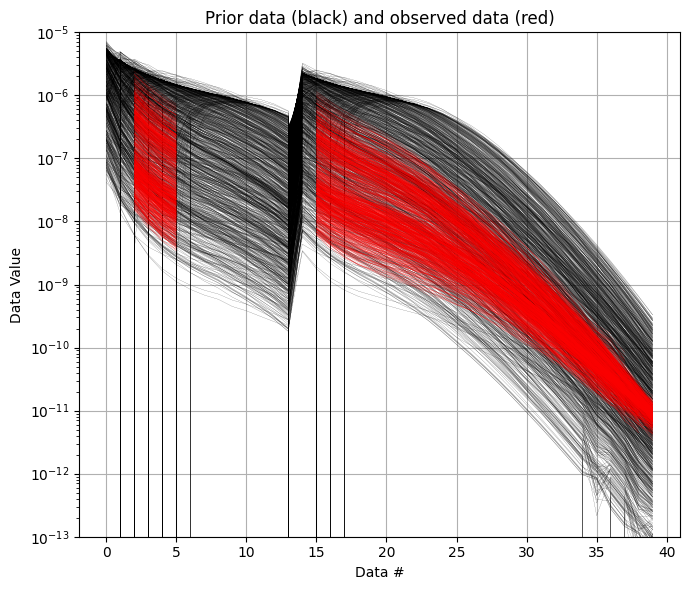

True

In [6]:
ig.plot_data_prior(f_prior_data_h5,f_data_h5,nr=1000,alpha=1, ylim=[1e-13,1e-5], hardcopy=hardcopy)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [7]:
N_use = N
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                   f_data_h5, 
                                   N_use = N_use, 
                                   showInfo=1, 
                                   Ncpu = 10,
                                   parallel=parallel)

Loading data from ESBJERG_ALL.h5. Using data types: [1]
  - D1: id_prior=1,    gaussian, Using 28061/40 data
Loading prior data from PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5. Using prior data ids: [1]
  - /D1:  N,nd = 50000/40
<--INTEGRATE_REJECTION-->
f_prior_h5=PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12.h5, f_data_h5=ESBJERG_ALL.h5
f_post_h5=/mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


Rejection Sampling:   0%|                                                                                                                      | 0/2807 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                              | 2/2807 [00:00<03:36, 12.94it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                              | 2/2806 [00:00<03:29, 13.37it/s]

Rejection Sampling:   0%|▏                                                                                                             | 5/2807 [00:00<02:18, 20.29it/s]

Rejection Sampling:   0%|                                                                                                              | 1/2806 [00:00<04:57,  9.44it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 4/2806 [00:00<03:38, 12.85it/s]

Rejection Sampling:   0%|                                                                                                              | 3/2806 [00:00<01:50, 25.28it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|                                                                                                              | 3/2806 [00:00<04:19, 10.80it/s]

Rejection Sampling:   0%|▎                                                                                                             | 8/2807 [00:00<03:04, 15.14it/s]

Rejection Sampling:   0%|                                                                                                              | 1/2806 [00:00<04:54,  9.54it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 6/2806 [00:00<03:48, 12.24it/s]

Rejection Sampling:   0%|▏                                                                                                             | 6/2806 [00:00<02:13, 21.00it/s]

Rejection Sampling:   0%|▏                                                                                                             | 6/2806 [00:00<02:47, 16.74it/s]

Rejection Sampling:   0%|                                                                                                              | 1/2806 [00:00<04:59,  9.37it/s]

Rejection Sampling:   0%|                                                                                                              | 3/2806 [00:00<03:33, 13.14it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▍                                                                                                            | 10/2807 [00:00<03:25, 13.59it/s]

Rejection Sampling:   0%|▎                                                                                                             | 9/2806 [00:00<02:23, 19.48it/s]

Rejection Sampling:   0%|▎                                                                                                             | 8/2806 [00:00<03:59, 11.67it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 4/2806 [00:00<02:32, 18.33it/s]

Rejection Sampling:   0%|                                                                                                              | 3/2806 [00:00<02:01, 23.15it/s]

Rejection Sampling:   0%|▍                                                                                                            | 12/2807 [00:00<03:22, 13.78it/s]

Rejection Sampling:   0%|▎                                                                                                             | 9/2806 [00:00<02:57, 15.74it/s]

Rejection Sampling:   0%|▍                                                                                                            | 12/2806 [00:00<02:09, 21.64it/s]

Rejection Sampling:   0%|▏                                                                                                             | 5/2806 [00:00<03:50, 12.17it/s]

Rejection Sampling:   0%|▍                                                                                                            | 10/2806 [00:00<03:43, 12.48it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▏                                                                                                             | 6/2806 [00:00<01:56, 23.98it/s]

Rejection Sampling:   1%|▌                                                                                                            | 15/2807 [00:00<02:45, 16.84it/s]

Rejection Sampling:   0%|                                                                                                              | 2/2806 [00:00<03:55, 11.90it/s]

Rejection Sampling:   0%|▏                                                                                                             | 6/2806 [00:00<03:16, 14.24it/s]

Rejection Sampling:   0%|▎                                                                                                             | 7/2806 [00:00<03:33, 13.09it/s]

Rejection Sampling:   0%|▍                                                                                                            | 11/2806 [00:00<03:23, 13.76it/s]

Rejection Sampling:   0%|                                                                                                              | 1/2806 [00:00<05:17,  8.84it/s]

Rejection Sampling:   0%|                                                                                                                      | 0/2806 [00:00<?, ?it/s]

Rejection Sampling:   0%|▍                                                                                                            | 12/2806 [00:01<04:00, 11.64it/s]

Rejection Sampling:   0%|▎                                                                                                             | 9/2806 [00:00<02:45, 16.90it/s]

Rejection Sampling:   0%|▍                                                                                                            | 10/2806 [00:00<02:52, 16.24it/s]

Rejection Sampling:   1%|▌                                                                                                            | 15/2806 [00:00<02:59, 15.52it/s]

Rejection Sampling:   0%|                                                                                                              | 2/2806 [00:00<05:10,  9.02it/s]

Rejection Sampling:   1%|▋                                                                                                            | 17/2807 [00:01<03:18, 14.08it/s]

Rejection Sampling:   0%|▌                                                                                                            | 14/2806 [00:00<02:55, 15.88it/s]

Rejection Sampling:   0%|▎                                                                                                             | 9/2806 [00:00<02:44, 17.05it/s]

Rejection Sampling:   0%|                                                                                                              | 1/2806 [00:00<05:42,  8.20it/s]

Rejection Sampling:   0%|▏                                                                                                             | 4/2806 [00:00<04:29, 10.41it/s]

Rejection Sampling:   0%|                                                                                                              | 3/2806 [00:00<05:06,  9.16it/s]

Rejection Sampling:   0%|▍                                                                                                            | 11/2806 [00:00<02:54, 16.04it/s]

Rejection Sampling:   0%|▌                                                                                                            | 13/2806 [00:00<02:34, 18.04it/s]

Rejection Sampling:   1%|▋                                                                                                            | 19/2807 [00:01<03:08, 14.79it/s]

Rejection Sampling:   0%|                                                                                                              | 2/2806 [00:00<05:19,  8.77it/s]

Rejection Sampling:   0%|▏                                                                                                             | 6/2806 [00:00<03:33, 13.09it/s]

Rejection Sampling:   0%|▌                                                                                                            | 14/2806 [00:01<04:14, 10.97it/s]

Rejection Sampling:   0%|▍                                                                                                            | 12/2806 [00:00<02:32, 18.27it/s]

Rejection Sampling:   1%|▋                                                                                                            | 17/2806 [00:01<03:30, 13.27it/s]

Rejection Sampling:   0%|▏                                                                                                             | 4/2806 [00:00<05:01,  9.29it/s]

Rejection Sampling:   1%|▌                                                                                                            | 16/2806 [00:01<03:20, 13.93it/s]

Rejection Sampling:   0%|▌                                                                                                            | 14/2806 [00:00<02:38, 17.64it/s]

Rejection Sampling:   1%|▌                                                                                                            | 15/2806 [00:00<02:48, 16.61it/s]

Rejection Sampling:   0%|▎                                                                                                             | 8/2806 [00:00<03:19, 14.02it/s]

Rejection Sampling:   1%|▌                                                                                                            | 15/2806 [00:00<02:25, 19.24it/s]

Rejection Sampling:   0%|▏                                                                                                             | 5/2806 [00:00<04:58,  9.38it/s]

Rejection Sampling:   1%|▋                                                                                                            | 18/2806 [00:01<03:08, 14.80it/s]

Rejection Sampling:   1%|▊                                                                                                            | 21/2807 [00:01<03:36, 12.84it/s]

Rejection Sampling:   0%|▏                                                                                                             | 4/2806 [00:00<04:56,  9.44it/s]

Rejection Sampling:   1%|▋                                                                                                            | 17/2806 [00:01<03:39, 12.70it/s]

Rejection Sampling:   0%|▍                                                                                                            | 10/2806 [00:00<02:59, 15.58it/s]

Rejection Sampling:   1%|▋                                                                                                            | 18/2806 [00:01<02:32, 18.32it/s]

Rejection Sampling:   1%|▋                                                                                                            | 19/2806 [00:01<03:52, 12.01it/s]

Rejection Sampling:   0%|▏                                                                                                             | 6/2806 [00:00<04:58,  9.39it/s]

Rejection Sampling:   1%|▌                                                                                                            | 16/2806 [00:01<03:05, 15.07it/s]

Rejection Sampling:   0%|▏                                                                                                             | 6/2806 [00:00<03:46, 12.38it/s]

Rejection Sampling:   1%|▋                                                                                                            | 18/2806 [00:00<02:19, 20.05it/s]

Rejection Sampling:   1%|▋                                                                                                            | 19/2806 [00:01<03:34, 12.98it/s]

Rejection Sampling:   0%|▌                                                                                                            | 13/2806 [00:00<02:35, 17.95it/s]

Rejection Sampling:   1%|▉                                                                                                            | 23/2807 [00:01<03:44, 12.43it/s]

Rejection Sampling:   1%|▊                                                                                                            | 20/2806 [00:01<03:33, 13.06it/s]

Rejection Sampling:   1%|▊                                                                                                            | 21/2806 [00:01<02:20, 19.82it/s]

Rejection Sampling:   1%|▊                                                                                                            | 21/2806 [00:01<02:12, 21.07it/s]

Rejection Sampling:   1%|▊                                                                                                            | 21/2806 [00:01<04:00, 11.60it/s]

Rejection Sampling:   0%|▎                                                                                                             | 8/2806 [00:00<04:42,  9.90it/s]

Rejection Sampling:   1%|▋                                                                                                            | 18/2806 [00:01<03:23, 13.71it/s]

Rejection Sampling:   1%|▌                                                                                                            | 16/2806 [00:00<02:19, 19.95it/s]

Rejection Sampling:   0%|▎                                                                                                             | 8/2806 [00:00<03:59, 11.68it/s]

Rejection Sampling:   1%|█                                                                                                            | 26/2807 [00:01<03:08, 14.75it/s]

Rejection Sampling:   1%|▉                                                                                                            | 23/2806 [00:01<03:01, 15.34it/s]

Rejection Sampling:   1%|▊                                                                                                            | 21/2806 [00:01<03:46, 12.29it/s]

Rejection Sampling:   1%|▉                                                                                                            | 23/2806 [00:01<02:36, 17.74it/s]

Rejection Sampling:   1%|▉                                                                                                            | 24/2806 [00:01<02:08, 21.60it/s]

Rejection Sampling:   0%|▍                                                                                                            | 10/2806 [00:00<03:46, 12.35it/s]

Rejection Sampling:   1%|▉                                                                                                            | 23/2806 [00:01<04:12, 11.04it/s]

Rejection Sampling:   1%|█                                                                                                            | 26/2806 [00:01<02:42, 17.06it/s]

Rejection Sampling:   1%|▊                                                                                                            | 20/2806 [00:01<03:44, 12.41it/s]

Rejection Sampling:   0%|▍                                                                                                            | 10/2806 [00:00<04:14, 10.98it/s]

Rejection Sampling:   1%|█                                                                                                            | 26/2806 [00:01<02:37, 17.62it/s]

Rejection Sampling:   1%|█                                                                                                            | 27/2806 [00:01<02:10, 21.34it/s]

Rejection Sampling:   1%|█                                                                                                            | 28/2807 [00:02<03:35, 12.88it/s]

Rejection Sampling:   0%|▌                                                                                                            | 13/2806 [00:01<03:01, 15.40it/s]

Rejection Sampling:   1%|▉                                                                                                            | 23/2806 [00:01<04:05, 11.34it/s]

Rejection Sampling:   1%|▊                                                                                                            | 22/2806 [00:01<03:20, 13.89it/s]

Rejection Sampling:   1%|▋                                                                                                            | 19/2806 [00:01<03:14, 14.30it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 31/2807 [00:02<03:04, 15.05it/s]

Rejection Sampling:   1%|▌                                                                                                            | 16/2806 [00:01<02:40, 17.36it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 30/2806 [00:01<02:10, 21.21it/s]

Rejection Sampling:   1%|█                                                                                                            | 28/2806 [00:01<03:10, 14.55it/s]

Rejection Sampling:   1%|▉                                                                                                            | 25/2806 [00:01<04:22, 10.60it/s]

Rejection Sampling:   1%|▉                                                                                                            | 24/2806 [00:01<03:06, 14.88it/s]

Rejection Sampling:   0%|▍                                                                                                            | 12/2806 [00:01<04:34, 10.20it/s]

Rejection Sampling:   1%|█                                                                                                            | 28/2806 [00:01<03:12, 14.46it/s]

Rejection Sampling:   1%|▉                                                                                                            | 25/2806 [00:02<04:21, 10.63it/s]

Rejection Sampling:   1%|▋                                                                                                            | 18/2806 [00:01<02:35, 17.89it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 33/2807 [00:02<02:53, 15.96it/s]

Rejection Sampling:   1%|█                                                                                                            | 27/2806 [00:02<04:03, 11.43it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 33/2806 [00:01<02:14, 20.68it/s]

Rejection Sampling:   1%|▊                                                                                                            | 21/2806 [00:01<03:39, 12.68it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 30/2806 [00:02<03:40, 12.59it/s]

Rejection Sampling:   1%|█                                                                                                            | 28/2806 [00:02<03:30, 13.22it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 36/2807 [00:02<02:37, 17.65it/s]

Rejection Sampling:   1%|█                                                                                                            | 26/2806 [00:01<03:36, 12.87it/s]

Rejection Sampling:   0%|▌                                                                                                            | 14/2806 [00:01<04:35, 10.12it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 30/2806 [00:01<03:36, 12.83it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 30/2806 [00:02<03:16, 14.13it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 36/2806 [00:01<02:11, 21.12it/s]

Rejection Sampling:   1%|▊                                                                                                            | 20/2806 [00:01<03:08, 14.81it/s]

Rejection Sampling:   1%|▉                                                                                                            | 23/2806 [00:01<03:54, 11.88it/s]

Rejection Sampling:   1%|▌                                                                                                            | 16/2806 [00:01<03:53, 11.94it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 39/2807 [00:02<02:24, 19.10it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 31/2806 [00:02<02:59, 15.45it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 33/2806 [00:02<02:49, 16.39it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 32/2806 [00:02<03:53, 11.86it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 39/2806 [00:01<02:07, 21.62it/s]

Rejection Sampling:   1%|█                                                                                                            | 28/2806 [00:02<03:49, 12.10it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 32/2806 [00:02<03:48, 12.16it/s]

Rejection Sampling:   1%|▊                                                                                                            | 22/2806 [00:01<03:27, 13.42it/s]

Rejection Sampling:   1%|█▋                                                                                                           | 42/2807 [00:02<02:12, 20.94it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 34/2806 [00:02<02:34, 17.94it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 36/2806 [00:02<02:26, 18.91it/s]

Rejection Sampling:   1%|▉                                                                                                            | 25/2806 [00:01<03:55, 11.79it/s]

Rejection Sampling:   1%|█▋                                                                                                           | 42/2806 [00:01<02:00, 22.92it/s]

Rejection Sampling:   1%|▋                                                                                                            | 18/2806 [00:01<03:57, 11.75it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 35/2806 [00:02<03:04, 15.04it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 34/2806 [00:02<03:56, 11.72it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 30/2806 [00:02<03:55, 11.80it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 37/2806 [00:02<02:20, 19.66it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 39/2806 [00:02<02:16, 20.20it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 45/2806 [00:02<02:00, 22.99it/s]

Rejection Sampling:   1%|▉                                                                                                            | 24/2806 [00:01<03:40, 12.60it/s]

Rejection Sampling:   1%|▊                                                                                                            | 21/2806 [00:01<03:15, 14.22it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 38/2806 [00:02<02:43, 16.92it/s]

Rejection Sampling:   1%|█                                                                                                            | 27/2806 [00:02<04:03, 11.41it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 40/2806 [00:02<02:16, 20.21it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 45/2807 [00:02<02:53, 15.88it/s]

Rejection Sampling:   1%|█▋                                                                                                           | 42/2806 [00:02<02:12, 20.89it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 36/2806 [00:02<04:04, 11.31it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 48/2806 [00:02<02:01, 22.67it/s]

Rejection Sampling:   1%|█                                                                                                            | 27/2806 [00:02<03:05, 14.95it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 32/2806 [00:02<04:07, 11.22it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 41/2806 [00:02<02:30, 18.39it/s]

Rejection Sampling:   1%|▉                                                                                                            | 23/2806 [00:01<03:37, 12.79it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 43/2806 [00:02<02:13, 20.75it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 45/2806 [00:02<02:09, 21.39it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 29/2806 [00:02<04:12, 10.99it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 39/2806 [00:02<03:21, 13.76it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 51/2806 [00:02<02:02, 22.47it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 44/2806 [00:02<02:20, 19.62it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 47/2807 [00:03<03:18, 13.90it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 29/2806 [00:02<03:31, 13.14it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 34/2806 [00:02<04:16, 10.79it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 46/2806 [00:03<02:09, 21.35it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 48/2806 [00:02<02:06, 21.74it/s]

Rejection Sampling:   1%|█▋                                                                                                           | 42/2806 [00:02<02:54, 15.87it/s]

Rejection Sampling:   2%|██                                                                                                           | 54/2806 [00:02<02:03, 22.29it/s]

Rejection Sampling:   1%|▉                                                                                                            | 25/2806 [00:02<03:52, 11.96it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 47/2806 [00:02<02:13, 20.63it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 31/2806 [00:02<04:19, 10.68it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 36/2806 [00:02<03:45, 12.31it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 49/2806 [00:03<02:04, 22.09it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 49/2807 [00:03<03:34, 12.85it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 31/2806 [00:02<03:38, 12.71it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 45/2806 [00:03<02:32, 18.16it/s]

Rejection Sampling:   1%|█                                                                                                            | 28/2806 [00:02<03:09, 14.66it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 50/2806 [00:02<02:05, 22.03it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 39/2806 [00:02<03:00, 15.33it/s]

Rejection Sampling:   2%|██                                                                                                           | 52/2806 [00:03<01:59, 23.12it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 51/2807 [00:03<03:19, 13.80it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 34/2806 [00:02<02:58, 15.55it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 48/2806 [00:03<02:17, 20.07it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 33/2806 [00:02<04:17, 10.78it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 57/2806 [00:02<02:30, 18.26it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 51/2806 [00:03<02:46, 16.60it/s]

Rejection Sampling:   1%|█▏                                                                                                           | 31/2806 [00:02<02:44, 16.87it/s]

Rejection Sampling:   2%|██                                                                                                           | 53/2806 [00:03<02:00, 22.82it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 55/2806 [00:03<01:57, 23.33it/s]

Rejection Sampling:   2%|██                                                                                                           | 54/2807 [00:03<02:51, 16.06it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 41/2806 [00:03<03:19, 13.87it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 51/2806 [00:03<02:12, 20.80it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 36/2806 [00:02<03:00, 15.31it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 34/2806 [00:02<02:32, 18.19it/s]

Rejection Sampling:   1%|█▎                                                                                                           | 35/2806 [00:02<04:22, 10.56it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 59/2806 [00:02<02:56, 15.57it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 58/2806 [00:03<01:56, 23.51it/s]

Rejection Sampling:   2%|██                                                                                                           | 53/2806 [00:03<03:07, 14.68it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 56/2806 [00:03<02:13, 20.53it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 38/2806 [00:02<02:52, 16.08it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 57/2807 [00:03<02:33, 17.91it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 43/2806 [00:03<03:34, 12.89it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 61/2806 [00:03<02:49, 16.17it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 36/2806 [00:02<02:43, 16.97it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 61/2806 [00:03<01:55, 23.66it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 59/2806 [00:03<02:09, 21.29it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 60/2807 [00:03<02:22, 19.23it/s]

Rejection Sampling:   2%|██                                                                                                           | 54/2806 [00:03<02:42, 16.90it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 37/2806 [00:03<04:21, 10.61it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 55/2806 [00:03<03:25, 13.36it/s]

Rejection Sampling:   1%|█▍                                                                                                           | 38/2806 [00:02<02:43, 16.96it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 40/2806 [00:02<03:20, 13.78it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 46/2806 [00:03<03:00, 15.28it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 64/2806 [00:03<02:35, 17.67it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 64/2806 [00:03<01:57, 23.25it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 62/2806 [00:03<02:07, 21.57it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 63/2807 [00:03<02:15, 20.19it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 57/2806 [00:03<03:23, 13.49it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 41/2806 [00:02<02:31, 18.27it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 39/2806 [00:03<04:24, 10.46it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 56/2806 [00:03<03:08, 14.61it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 67/2806 [00:03<02:24, 18.97it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 67/2806 [00:03<01:57, 23.24it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 65/2806 [00:03<02:04, 21.93it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 48/2806 [00:03<03:22, 13.63it/s]

Rejection Sampling:   1%|█▋                                                                                                           | 42/2806 [00:03<03:39, 12.58it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 66/2807 [00:04<02:09, 21.18it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 60/2806 [00:03<02:50, 16.06it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 43/2806 [00:03<02:29, 18.42it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 70/2806 [00:03<02:15, 20.13it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 68/2806 [00:03<02:01, 22.60it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 69/2807 [00:04<02:02, 22.29it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 45/2806 [00:03<02:59, 15.41it/s]

Rejection Sampling:   1%|█▌                                                                                                           | 41/2806 [00:03<04:20, 10.62it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 58/2806 [00:03<03:23, 13.52it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 63/2806 [00:04<02:30, 18.19it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 50/2806 [00:03<03:35, 12.80it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 70/2806 [00:04<02:26, 18.63it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 73/2806 [00:03<02:09, 21.07it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 45/2806 [00:03<02:52, 16.00it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 71/2806 [00:03<01:59, 22.84it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 72/2807 [00:04<02:01, 22.60it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 48/2806 [00:03<02:39, 17.29it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 47/2806 [00:03<02:47, 16.46it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 60/2806 [00:04<03:41, 12.40it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 43/2806 [00:03<04:24, 10.44it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 73/2806 [00:04<02:21, 19.25it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 65/2806 [00:04<03:00, 15.17it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 74/2806 [00:04<02:01, 22.58it/s]

Rejection Sampling:   2%|██                                                                                                           | 52/2806 [00:03<03:52, 11.84it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 75/2807 [00:04<02:02, 22.34it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 51/2806 [00:03<02:28, 18.52it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 49/2806 [00:03<02:39, 17.32it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 76/2806 [00:04<02:16, 19.96it/s]

Rejection Sampling:   2%|██                                                                                                           | 54/2806 [00:03<03:27, 13.26it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 76/2806 [00:03<02:53, 15.72it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 77/2806 [00:04<02:02, 22.24it/s]

Rejection Sampling:   3%|███                                                                                                          | 78/2807 [00:04<02:02, 22.26it/s]

Rejection Sampling:   2%|█▋                                                                                                           | 45/2806 [00:03<04:29, 10.26it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 62/2806 [00:04<03:56, 11.60it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 67/2806 [00:04<03:18, 13.76it/s]

Rejection Sampling:   2%|██                                                                                                           | 52/2806 [00:03<02:29, 18.39it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 56/2806 [00:04<03:11, 14.33it/s]

Rejection Sampling:   2%|██                                                                                                           | 53/2806 [00:03<03:01, 15.15it/s]

Rejection Sampling:   3%|███                                                                                                          | 79/2806 [00:04<02:13, 20.48it/s]

Rejection Sampling:   3%|███                                                                                                          | 80/2806 [00:04<02:02, 22.30it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 81/2807 [00:04<02:02, 22.20it/s]

Rejection Sampling:   3%|███                                                                                                          | 78/2806 [00:04<03:02, 14.94it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 64/2806 [00:04<03:44, 12.22it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 55/2806 [00:03<02:22, 19.25it/s]

Rejection Sampling:   2%|█▊                                                                                                           | 47/2806 [00:04<04:32, 10.13it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 69/2806 [00:04<03:38, 12.51it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 82/2806 [00:04<02:07, 21.34it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 83/2806 [00:04<02:00, 22.61it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 58/2806 [00:04<03:31, 12.96it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 84/2807 [00:04<02:00, 22.54it/s]

Rejection Sampling:   3%|███                                                                                                          | 80/2806 [00:04<03:00, 15.07it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 55/2806 [00:03<03:22, 13.59it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 58/2806 [00:03<02:16, 20.13it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 66/2806 [00:04<03:56, 11.57it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 85/2806 [00:04<02:04, 21.82it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 86/2806 [00:04<02:00, 22.52it/s]

Rejection Sampling:   2%|█▉                                                                                                           | 49/2806 [00:04<04:25, 10.37it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 87/2807 [00:04<02:00, 22.66it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 83/2806 [00:04<02:39, 17.07it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 71/2806 [00:04<03:52, 11.75it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 60/2806 [00:04<03:44, 12.22it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 61/2806 [00:04<02:12, 20.67it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 57/2806 [00:04<03:40, 12.45it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 88/2806 [00:04<02:01, 22.30it/s]

Rejection Sampling:   2%|██                                                                                                           | 52/2806 [00:04<03:27, 13.28it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 90/2807 [00:05<01:57, 23.10it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 86/2806 [00:04<02:26, 18.63it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 73/2806 [00:04<03:32, 12.88it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 68/2806 [00:04<04:04, 11.18it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 91/2806 [00:05<01:59, 22.71it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 62/2806 [00:04<03:53, 11.75it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 55/2806 [00:04<02:53, 15.88it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 93/2807 [00:05<01:55, 23.53it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 89/2806 [00:04<02:35, 17.43it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 59/2806 [00:04<03:46, 12.11it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 89/2806 [00:04<02:15, 20.02it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 76/2806 [00:05<02:54, 15.65it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 70/2806 [00:05<04:09, 10.97it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 94/2806 [00:05<01:57, 23.17it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 64/2806 [00:04<02:48, 16.31it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 65/2806 [00:04<03:07, 14.62it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 96/2807 [00:05<01:54, 23.63it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 91/2806 [00:04<02:38, 17.10it/s]

Rejection Sampling:   3%|███                                                                                                          | 79/2806 [00:05<02:32, 17.83it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 92/2806 [00:04<02:09, 20.99it/s]

Rejection Sampling:   2%|██▏                                                                                                          | 57/2806 [00:04<03:12, 14.31it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 61/2806 [00:04<03:54, 11.70it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 97/2806 [00:05<01:55, 23.37it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 73/2806 [00:05<03:17, 13.81it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 68/2806 [00:04<02:44, 16.66it/s]

Rejection Sampling:   4%|███▊                                                                                                         | 99/2807 [00:05<01:56, 23.30it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 66/2806 [00:04<03:06, 14.67it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 82/2806 [00:05<02:22, 19.09it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 95/2806 [00:04<02:07, 21.20it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 93/2806 [00:05<02:50, 15.91it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 63/2806 [00:04<03:27, 13.22it/s]

Rejection Sampling:   4%|███▊                                                                                                        | 100/2806 [00:05<01:56, 23.21it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 59/2806 [00:04<03:31, 13.00it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 70/2806 [00:05<02:43, 16.73it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 102/2807 [00:05<01:54, 23.65it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 75/2806 [00:05<03:32, 12.84it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 98/2806 [00:04<02:02, 22.12it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 96/2806 [00:05<02:30, 18.06it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 66/2806 [00:04<02:49, 16.18it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 68/2806 [00:04<03:22, 13.51it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 103/2806 [00:05<01:53, 23.85it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 72/2806 [00:05<02:44, 16.64it/s]

Rejection Sampling:   4%|████                                                                                                        | 105/2807 [00:05<01:53, 23.86it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 101/2806 [00:05<02:01, 22.27it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 85/2806 [00:05<02:57, 15.30it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 69/2806 [00:04<02:36, 17.51it/s]

Rejection Sampling:   2%|██▎                                                                                                          | 61/2806 [00:05<03:46, 12.14it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 77/2806 [00:05<03:45, 12.13it/s]

Rejection Sampling:   4%|████                                                                                                        | 106/2806 [00:05<01:55, 23.38it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 98/2806 [00:05<02:57, 15.30it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 74/2806 [00:05<02:57, 15.42it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 70/2806 [00:04<03:43, 12.23it/s]

Rejection Sampling:   4%|████                                                                                                        | 104/2806 [00:05<02:03, 21.87it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 72/2806 [00:05<02:28, 18.47it/s]

Rejection Sampling:   2%|██▍                                                                                                          | 64/2806 [00:05<03:08, 14.56it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 109/2806 [00:05<01:58, 22.79it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 87/2806 [00:05<03:21, 13.50it/s]

Rejection Sampling:   3%|███                                                                                                          | 79/2806 [00:05<03:53, 11.67it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 72/2806 [00:04<03:32, 12.86it/s]

Rejection Sampling:   4%|███▊                                                                                                        | 100/2806 [00:05<03:23, 13.27it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 108/2807 [00:06<02:39, 16.88it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 76/2806 [00:05<03:10, 14.34it/s]

Rejection Sampling:   4%|████                                                                                                        | 107/2806 [00:05<02:05, 21.50it/s]

Rejection Sampling:   2%|██▌                                                                                                          | 66/2806 [00:05<03:10, 14.42it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 112/2806 [00:06<02:01, 22.18it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 74/2806 [00:05<03:00, 15.12it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 82/2806 [00:05<03:12, 14.14it/s]

Rejection Sampling:   3%|███                                                                                                          | 79/2806 [00:05<02:45, 16.50it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 110/2806 [00:05<02:04, 21.69it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 89/2806 [00:06<03:42, 12.22it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 102/2806 [00:05<03:42, 12.14it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 74/2806 [00:05<03:54, 11.65it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 110/2807 [00:06<03:06, 14.49it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 115/2806 [00:06<02:00, 22.36it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 81/2806 [00:05<02:38, 17.17it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 85/2806 [00:05<02:50, 15.97it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 68/2806 [00:05<03:37, 12.61it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 113/2806 [00:05<02:08, 20.90it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 76/2806 [00:05<03:28, 13.08it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 87/2806 [00:06<02:42, 16.72it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 118/2806 [00:06<02:05, 21.34it/s]

Rejection Sampling:   4%|████                                                                                                        | 104/2806 [00:05<03:40, 12.24it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 83/2806 [00:05<02:47, 16.28it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 91/2806 [00:06<04:04, 11.10it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 76/2806 [00:05<04:06, 11.05it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 112/2807 [00:06<03:29, 12.88it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 116/2806 [00:05<02:04, 21.61it/s]

Rejection Sampling:   2%|██▋                                                                                                          | 70/2806 [00:05<03:51, 11.84it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 90/2806 [00:06<02:20, 19.35it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 121/2806 [00:06<01:57, 22.81it/s]

Rejection Sampling:   3%|███                                                                                                          | 78/2806 [00:05<03:39, 12.45it/s]

Rejection Sampling:   4%|████                                                                                                        | 106/2806 [00:06<03:39, 12.30it/s]

Rejection Sampling:   3%|███                                                                                                          | 78/2806 [00:05<03:42, 12.26it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 85/2806 [00:06<03:03, 14.84it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 119/2806 [00:05<02:01, 22.16it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 93/2806 [00:06<04:04, 11.10it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 93/2806 [00:06<02:13, 20.32it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 114/2807 [00:06<03:40, 12.20it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 124/2806 [00:06<01:58, 22.66it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 72/2806 [00:05<04:04, 11.19it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 87/2806 [00:06<02:50, 15.94it/s]

Rejection Sampling:   3%|███                                                                                                          | 80/2806 [00:05<03:57, 11.48it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 96/2806 [00:06<03:21, 13.45it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 108/2806 [00:06<03:56, 11.42it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 96/2806 [00:06<02:12, 20.48it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 127/2806 [00:06<02:00, 22.28it/s]

Rejection Sampling:   3%|███                                                                                                          | 80/2806 [00:05<04:04, 11.16it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 90/2806 [00:06<02:33, 17.72it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 116/2807 [00:06<03:55, 11.42it/s]

Rejection Sampling:   4%|███▊                                                                                                         | 99/2806 [00:06<02:54, 15.51it/s]

Rejection Sampling:   3%|██▊                                                                                                          | 74/2806 [00:06<04:15, 10.70it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 122/2806 [00:06<02:47, 16.03it/s]

Rejection Sampling:   4%|███▊                                                                                                         | 99/2806 [00:06<02:10, 20.74it/s]

Rejection Sampling:   5%|█████                                                                                                       | 130/2806 [00:06<02:01, 22.00it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 82/2806 [00:06<04:01, 11.28it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 110/2806 [00:06<04:09, 10.82it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 93/2806 [00:06<02:25, 18.59it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 82/2806 [00:05<04:12, 10.78it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 102/2806 [00:06<02:38, 17.09it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 118/2807 [00:07<04:06, 10.90it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 102/2806 [00:06<02:08, 21.10it/s]

Rejection Sampling:   5%|█████                                                                                                       | 133/2806 [00:06<02:01, 22.00it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 84/2806 [00:06<03:38, 12.47it/s]

Rejection Sampling:   3%|██▉                                                                                                          | 76/2806 [00:06<04:22, 10.39it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 124/2806 [00:06<03:10, 14.08it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 84/2806 [00:06<04:09, 10.93it/s]

Rejection Sampling:   4%|████                                                                                                        | 105/2806 [00:06<02:26, 18.42it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 95/2806 [00:06<02:53, 15.65it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 112/2806 [00:06<04:13, 10.63it/s]

Rejection Sampling:   4%|████                                                                                                        | 105/2806 [00:06<02:07, 21.13it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 136/2806 [00:07<02:01, 21.90it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 120/2807 [00:07<04:13, 10.61it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 86/2806 [00:06<03:51, 11.74it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 97/2806 [00:06<02:52, 15.74it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 108/2806 [00:07<02:18, 19.48it/s]

Rejection Sampling:   3%|███                                                                                                          | 78/2806 [00:06<04:25, 10.28it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 115/2806 [00:06<03:21, 13.37it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 126/2806 [00:06<03:28, 12.87it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 86/2806 [00:06<04:11, 10.83it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 108/2806 [00:07<02:03, 21.85it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 139/2806 [00:07<01:59, 22.41it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 88/2806 [00:06<03:26, 13.15it/s]

Rejection Sampling:   4%|███▊                                                                                                        | 100/2806 [00:06<02:30, 17.93it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 111/2806 [00:07<02:10, 20.73it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 118/2806 [00:07<02:49, 15.81it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 122/2807 [00:07<04:14, 10.56it/s]

Rejection Sampling:   3%|███                                                                                                          | 80/2806 [00:06<04:24, 10.31it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 90/2806 [00:06<03:08, 14.42it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 128/2806 [00:06<03:38, 12.23it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 88/2806 [00:06<04:10, 10.85it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 111/2806 [00:07<02:17, 19.53it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 121/2806 [00:07<02:31, 17.78it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 102/2806 [00:07<02:55, 15.45it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 142/2806 [00:07<02:36, 16.98it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 90/2806 [00:06<03:40, 12.32it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 93/2806 [00:06<02:41, 16.83it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 124/2807 [00:07<04:12, 10.61it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 114/2806 [00:07<02:09, 20.79it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 114/2806 [00:07<02:33, 17.50it/s]

Rejection Sampling:   3%|███▏                                                                                                         | 82/2806 [00:06<04:13, 10.74it/s]

Rejection Sampling:   5%|█████                                                                                                       | 130/2806 [00:07<03:44, 11.93it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 124/2806 [00:07<02:16, 19.60it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 145/2806 [00:07<02:23, 18.53it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 96/2806 [00:06<02:26, 18.47it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 116/2806 [00:07<02:36, 17.20it/s]

Rejection Sampling:   4%|████                                                                                                        | 104/2806 [00:07<03:16, 13.74it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 92/2806 [00:06<03:52, 11.67it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 127/2806 [00:07<02:11, 20.43it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 126/2807 [00:07<04:15, 10.49it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 84/2806 [00:07<04:18, 10.53it/s]

Rejection Sampling:   5%|█████                                                                                                       | 132/2806 [00:07<03:53, 11.46it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 94/2806 [00:07<03:29, 12.95it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 117/2806 [00:07<02:47, 16.02it/s]

Rejection Sampling:   4%|████                                                                                                        | 107/2806 [00:07<02:50, 15.82it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 148/2806 [00:07<02:36, 16.98it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 129/2807 [00:07<03:23, 13.17it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 98/2806 [00:06<02:59, 15.09it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 118/2806 [00:07<03:04, 14.56it/s]

Rejection Sampling:   5%|█████                                                                                                       | 130/2806 [00:07<02:21, 18.95it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 110/2806 [00:07<02:34, 17.41it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 134/2806 [00:07<04:04, 10.94it/s]

Rejection Sampling:   3%|███▎                                                                                                         | 86/2806 [00:07<04:27, 10.18it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 119/2806 [00:07<02:58, 15.07it/s]

Rejection Sampling:   4%|███▊                                                                                                        | 100/2806 [00:07<03:00, 15.03it/s]

Rejection Sampling:   5%|█████                                                                                                       | 132/2806 [00:07<02:20, 18.97it/s]

Rejection Sampling:   5%|█████                                                                                                       | 132/2807 [00:08<02:55, 15.24it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 96/2806 [00:07<03:50, 11.77it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 150/2806 [00:08<03:03, 14.49it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 120/2806 [00:07<03:28, 12.87it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 113/2806 [00:07<02:23, 18.70it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 137/2806 [00:07<03:18, 13.47it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 135/2807 [00:08<02:35, 17.19it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 103/2806 [00:07<02:40, 16.87it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 122/2806 [00:07<02:52, 15.53it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 134/2806 [00:07<02:42, 16.40it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 88/2806 [00:07<04:29, 10.10it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 98/2806 [00:07<04:03, 11.13it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 116/2806 [00:07<02:16, 19.64it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 140/2806 [00:07<02:51, 15.51it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 152/2806 [00:08<03:23, 13.05it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 138/2807 [00:08<02:23, 18.63it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 122/2806 [00:08<03:42, 12.06it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 137/2806 [00:07<02:27, 18.08it/s]

Rejection Sampling:   4%|████                                                                                                        | 105/2806 [00:07<03:10, 14.19it/s]

Rejection Sampling:   5%|█████▉                                                                                                      | 154/2806 [00:08<03:10, 13.93it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 119/2806 [00:07<02:08, 20.84it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 124/2806 [00:08<03:15, 13.74it/s]

Rejection Sampling:   3%|███▍                                                                                                         | 90/2806 [00:07<04:28, 10.12it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 143/2806 [00:07<02:32, 17.47it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 141/2807 [00:08<02:12, 20.10it/s]

Rejection Sampling:   4%|███▊                                                                                                        | 100/2806 [00:07<04:06, 10.97it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 124/2806 [00:08<03:53, 11.50it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 139/2806 [00:08<02:54, 15.30it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 122/2806 [00:08<02:07, 21.08it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 146/2806 [00:07<02:22, 18.67it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 144/2807 [00:08<02:08, 20.72it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 103/2806 [00:07<03:17, 13.66it/s]

Rejection Sampling:   4%|████                                                                                                        | 107/2806 [00:07<03:34, 12.61it/s]

Rejection Sampling:   6%|██████                                                                                                      | 156/2806 [00:08<03:29, 12.65it/s]

Rejection Sampling:   3%|███▌                                                                                                         | 92/2806 [00:07<04:28, 10.09it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 126/2806 [00:08<03:34, 12.47it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 125/2806 [00:08<02:06, 21.28it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 109/2806 [00:07<03:13, 13.95it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 149/2806 [00:08<02:16, 19.45it/s]

Rejection Sampling:   6%|██████                                                                                                      | 158/2806 [00:08<03:08, 14.05it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 126/2806 [00:08<04:03, 10.99it/s]

Rejection Sampling:   4%|████                                                                                                        | 106/2806 [00:07<02:51, 15.76it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 141/2806 [00:08<03:17, 13.47it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 128/2806 [00:08<02:04, 21.55it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 128/2806 [00:08<03:51, 11.56it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 94/2806 [00:08<04:33,  9.91it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 112/2806 [00:07<02:51, 15.72it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 152/2806 [00:08<02:18, 19.14it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 109/2806 [00:08<02:36, 17.23it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 147/2807 [00:08<02:52, 15.40it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 160/2806 [00:08<03:35, 12.26it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 128/2806 [00:08<04:15, 10.49it/s]

Rejection Sampling:   3%|███▋                                                                                                         | 95/2806 [00:08<04:39,  9.71it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 143/2806 [00:08<03:41, 12.02it/s]

Rejection Sampling:   5%|█████▉                                                                                                      | 154/2806 [00:08<02:17, 19.22it/s]

Rejection Sampling:   5%|█████                                                                                                       | 131/2806 [00:08<02:06, 21.19it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 114/2806 [00:07<02:48, 15.96it/s]

Rejection Sampling:   5%|█████                                                                                                       | 130/2806 [00:08<03:44, 11.90it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 149/2807 [00:09<02:56, 15.07it/s]

Rejection Sampling:   3%|███▊                                                                                                         | 97/2806 [00:08<03:53, 11.62it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 111/2806 [00:08<03:02, 14.81it/s]

Rejection Sampling:   6%|██████                                                                                                      | 157/2806 [00:08<02:11, 20.18it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 134/2806 [00:08<02:02, 21.77it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 162/2806 [00:09<03:50, 11.45it/s]

Rejection Sampling:   5%|█████                                                                                                       | 130/2806 [00:09<04:18, 10.35it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 152/2807 [00:09<02:37, 16.90it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 145/2806 [00:08<03:53, 11.39it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 116/2806 [00:08<03:16, 13.68it/s]

Rejection Sampling:   5%|█████                                                                                                       | 132/2806 [00:08<03:54, 11.38it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 137/2806 [00:08<02:02, 21.82it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 160/2806 [00:08<02:08, 20.55it/s]

Rejection Sampling:   4%|███▊                                                                                                         | 99/2806 [00:08<04:04, 11.09it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 113/2806 [00:08<03:21, 13.34it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 165/2806 [00:09<03:07, 14.08it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 134/2806 [00:09<03:39, 12.19it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 119/2806 [00:08<02:49, 15.82it/s]

Rejection Sampling:   5%|█████                                                                                                       | 132/2806 [00:09<04:20, 10.25it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 147/2806 [00:08<03:56, 11.26it/s]

Rejection Sampling:   5%|█████▉                                                                                                      | 154/2807 [00:09<02:58, 14.86it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 140/2806 [00:08<01:59, 22.38it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 163/2806 [00:08<02:04, 21.30it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 168/2806 [00:09<02:40, 16.46it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 101/2806 [00:08<04:08, 10.88it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 137/2806 [00:09<02:58, 14.95it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 122/2806 [00:08<02:32, 17.57it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 115/2806 [00:08<03:34, 12.52it/s]

Rejection Sampling:   6%|██████                                                                                                      | 156/2807 [00:09<02:53, 15.29it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 170/2806 [00:09<02:33, 17.20it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 143/2806 [00:08<01:59, 22.34it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 166/2806 [00:08<02:03, 21.40it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 149/2806 [00:09<04:00, 11.03it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 134/2806 [00:09<04:20, 10.26it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 117/2806 [00:08<03:16, 13.70it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 140/2806 [00:09<02:37, 16.95it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 124/2806 [00:08<02:38, 16.87it/s]

Rejection Sampling:   6%|██████                                                                                                      | 159/2807 [00:09<02:33, 17.30it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 173/2806 [00:09<02:17, 19.10it/s]

Rejection Sampling:   4%|███▉                                                                                                        | 103/2806 [00:08<04:09, 10.82it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 146/2806 [00:09<01:56, 22.79it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 169/2806 [00:09<02:07, 20.64it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 143/2806 [00:09<02:21, 18.85it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 151/2806 [00:09<03:57, 11.17it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 127/2806 [00:08<02:24, 18.55it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 162/2807 [00:09<02:18, 19.15it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 136/2806 [00:09<04:17, 10.38it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 119/2806 [00:08<03:24, 13.12it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 176/2806 [00:09<02:10, 20.20it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 149/2806 [00:09<01:56, 22.89it/s]

Rejection Sampling:   4%|████                                                                                                        | 105/2806 [00:09<04:06, 10.95it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 146/2806 [00:09<02:13, 19.94it/s]

Rejection Sampling:   5%|█████▉                                                                                                      | 153/2806 [00:09<03:38, 12.16it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 172/2806 [00:09<02:16, 19.25it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 165/2807 [00:09<02:11, 20.16it/s]

Rejection Sampling:   5%|█████                                                                                                       | 130/2806 [00:08<02:18, 19.32it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 152/2806 [00:09<01:55, 22.90it/s]

Rejection Sampling:   4%|████                                                                                                        | 107/2806 [00:09<03:35, 12.55it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 138/2806 [00:09<04:19, 10.30it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 121/2806 [00:09<03:39, 12.22it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 149/2806 [00:09<02:05, 21.23it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 168/2807 [00:10<02:03, 21.43it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 175/2806 [00:09<02:08, 20.40it/s]

Rejection Sampling:   6%|█████▉                                                                                                      | 155/2806 [00:09<01:54, 23.25it/s]

Rejection Sampling:   6%|█████▉                                                                                                      | 155/2806 [00:09<03:44, 11.78it/s]

Rejection Sampling:   4%|████▏                                                                                                       | 110/2806 [00:09<02:55, 15.38it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 179/2806 [00:09<02:49, 15.47it/s]

Rejection Sampling:   5%|█████                                                                                                       | 132/2806 [00:09<02:47, 15.93it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 152/2806 [00:09<02:02, 21.75it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 140/2806 [00:09<04:07, 10.77it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 171/2807 [00:10<02:00, 21.92it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 123/2806 [00:09<03:48, 11.72it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 178/2806 [00:09<02:08, 20.51it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 181/2806 [00:10<02:44, 15.97it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 134/2806 [00:09<02:42, 16.49it/s]

Rejection Sampling:   4%|████▎                                                                                                       | 113/2806 [00:09<02:34, 17.39it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 142/2806 [00:10<03:33, 12.45it/s]

Rejection Sampling:   6%|██████                                                                                                      | 157/2806 [00:09<03:52, 11.41it/s]

Rejection Sampling:   6%|█████▉                                                                                                      | 155/2806 [00:09<01:59, 22.13it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 174/2807 [00:10<01:59, 22.02it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 181/2806 [00:09<02:15, 19.38it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 137/2806 [00:09<02:27, 18.16it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 125/2806 [00:09<03:56, 11.34it/s]

Rejection Sampling:   6%|██████                                                                                                      | 158/2806 [00:09<02:36, 16.97it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 145/2806 [00:10<02:54, 15.27it/s]

Rejection Sampling:   6%|██████                                                                                                      | 158/2806 [00:10<01:56, 22.73it/s]

Rejection Sampling:   7%|███████                                                                                                     | 183/2806 [00:10<03:07, 14.00it/s]

Rejection Sampling:   4%|████▍                                                                                                       | 115/2806 [00:09<03:03, 14.66it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 177/2807 [00:10<01:59, 22.00it/s]

Rejection Sampling:   6%|██████                                                                                                      | 159/2806 [00:10<03:59, 11.07it/s]

Rejection Sampling:   7%|███████                                                                                                     | 184/2806 [00:09<02:13, 19.70it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 140/2806 [00:09<02:21, 18.84it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 148/2806 [00:10<02:35, 17.06it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 161/2806 [00:10<01:57, 22.46it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 127/2806 [00:09<04:04, 10.95it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 160/2806 [00:09<03:00, 14.69it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 180/2807 [00:10<01:59, 22.04it/s]

Rejection Sampling:   7%|███████                                                                                                     | 185/2806 [00:10<03:26, 12.66it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 117/2806 [00:09<03:24, 13.13it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 187/2806 [00:09<02:09, 20.23it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 142/2806 [00:09<02:32, 17.45it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 161/2806 [00:10<04:01, 10.97it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 164/2806 [00:10<01:58, 22.38it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 150/2806 [00:10<03:01, 14.61it/s]

Rejection Sampling:   7%|███████                                                                                                     | 183/2807 [00:10<02:01, 21.61it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 129/2806 [00:09<04:06, 10.87it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 162/2806 [00:10<03:18, 13.31it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 190/2806 [00:10<02:08, 20.42it/s]

Rejection Sampling:   4%|████▌                                                                                                       | 119/2806 [00:09<03:29, 12.81it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 163/2806 [00:10<03:46, 11.66it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 187/2806 [00:10<03:42, 11.77it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 144/2806 [00:09<02:50, 15.62it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 186/2807 [00:10<02:01, 21.57it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 167/2806 [00:10<02:17, 19.19it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 152/2806 [00:10<03:13, 13.74it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 165/2806 [00:10<02:51, 15.36it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 165/2806 [00:10<03:18, 13.27it/s]

Rejection Sampling:   4%|████▋                                                                                                       | 121/2806 [00:10<03:17, 13.60it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 193/2806 [00:10<02:03, 21.13it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 147/2806 [00:09<02:29, 17.76it/s]

Rejection Sampling:   5%|█████                                                                                                       | 131/2806 [00:10<04:10, 10.68it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 189/2807 [00:10<01:56, 22.46it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 189/2806 [00:10<03:48, 11.43it/s]

Rejection Sampling:   6%|█████▉                                                                                                      | 155/2806 [00:10<02:44, 16.15it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 168/2806 [00:10<02:31, 17.42it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 168/2806 [00:10<02:43, 16.16it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 196/2806 [00:10<02:00, 21.70it/s]

Rejection Sampling:   4%|████▊                                                                                                       | 124/2806 [00:10<02:49, 15.80it/s]

Rejection Sampling:   5%|█████                                                                                                       | 133/2806 [00:10<03:42, 12.03it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 149/2806 [00:10<02:33, 17.27it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 170/2806 [00:10<02:37, 16.77it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 192/2806 [00:11<03:05, 14.10it/s]

Rejection Sampling:   6%|██████                                                                                                      | 158/2806 [00:10<02:27, 17.97it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 171/2806 [00:10<02:19, 18.91it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 170/2806 [00:10<02:51, 15.39it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 151/2806 [00:10<02:30, 17.67it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 199/2806 [00:10<01:59, 21.88it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 127/2806 [00:10<02:30, 17.81it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 192/2807 [00:11<02:30, 17.32it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 195/2806 [00:11<02:40, 16.28it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 135/2806 [00:10<03:55, 11.32it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 172/2806 [00:10<02:43, 16.10it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 161/2806 [00:11<02:17, 19.21it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 174/2806 [00:10<02:12, 19.93it/s]

Rejection Sampling:   5%|█████▉                                                                                                      | 154/2806 [00:10<02:20, 18.82it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 202/2806 [00:10<01:58, 21.91it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 173/2806 [00:11<02:45, 15.89it/s]

Rejection Sampling:   5%|████▉                                                                                                       | 129/2806 [00:10<02:59, 14.91it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 138/2806 [00:10<03:11, 13.94it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 164/2806 [00:11<02:10, 20.25it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 177/2806 [00:10<02:07, 20.61it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 197/2806 [00:11<02:58, 14.62it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 194/2807 [00:11<02:55, 14.91it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 205/2806 [00:10<01:56, 22.42it/s]

Rejection Sampling:   6%|██████                                                                                                      | 157/2806 [00:10<02:12, 20.03it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 174/2806 [00:11<03:06, 14.11it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 176/2806 [00:11<02:27, 17.77it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 180/2806 [00:10<02:02, 21.36it/s]

Rejection Sampling:   5%|█████                                                                                                       | 131/2806 [00:10<03:21, 13.27it/s]

Rejection Sampling:   7%|████████                                                                                                    | 208/2806 [00:10<01:56, 22.24it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 160/2806 [00:10<02:08, 20.58it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 167/2806 [00:11<02:21, 18.70it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 140/2806 [00:10<03:29, 12.74it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 179/2806 [00:11<02:18, 19.03it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 199/2806 [00:11<03:19, 13.04it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 196/2807 [00:11<03:15, 13.38it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 176/2806 [00:11<03:28, 12.62it/s]

Rejection Sampling:   7%|███████                                                                                                     | 183/2806 [00:11<02:00, 21.81it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 169/2806 [00:11<02:20, 18.82it/s]

Rejection Sampling:   8%|████████                                                                                                    | 211/2806 [00:11<01:56, 22.28it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 163/2806 [00:10<02:06, 20.95it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 201/2806 [00:11<03:07, 13.87it/s]

Rejection Sampling:   5%|█████                                                                                                       | 133/2806 [00:10<03:36, 12.37it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 142/2806 [00:10<03:41, 12.01it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 186/2806 [00:11<01:56, 22.50it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 178/2806 [00:11<03:39, 11.97it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 198/2807 [00:11<03:30, 12.38it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 214/2806 [00:11<01:55, 22.41it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 166/2806 [00:10<02:04, 21.28it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 203/2806 [00:11<02:55, 14.79it/s]

Rejection Sampling:   6%|███████                                                                                                     | 182/2806 [00:11<02:50, 15.40it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 171/2806 [00:11<02:50, 15.49it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 189/2806 [00:11<01:55, 22.63it/s]

Rejection Sampling:   5%|█████▏                                                                                                      | 135/2806 [00:11<03:49, 11.66it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 181/2806 [00:11<03:00, 14.53it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 217/2806 [00:11<01:53, 22.76it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 144/2806 [00:11<03:52, 11.43it/s]

Rejection Sampling:   7%|███████                                                                                                     | 184/2806 [00:11<02:53, 15.10it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 200/2807 [00:12<03:40, 11.80it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 206/2806 [00:11<02:40, 16.15it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 192/2806 [00:11<01:56, 22.35it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 146/2806 [00:11<03:29, 12.68it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 173/2806 [00:11<03:17, 13.35it/s]

Rejection Sampling:   7%|███████                                                                                                     | 184/2806 [00:11<02:41, 16.27it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 220/2806 [00:11<01:57, 21.93it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 169/2806 [00:11<02:47, 15.74it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 137/2806 [00:11<04:03, 10.97it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 202/2807 [00:12<03:34, 12.15it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 187/2806 [00:11<02:47, 15.66it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 195/2806 [00:11<01:57, 22.28it/s]

Rejection Sampling:   7%|████████                                                                                                    | 208/2806 [00:12<03:08, 13.78it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 187/2806 [00:11<02:25, 18.05it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 223/2806 [00:11<01:57, 21.94it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 172/2806 [00:11<02:31, 17.44it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 148/2806 [00:11<03:43, 11.88it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 175/2806 [00:12<03:31, 12.42it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 205/2807 [00:12<02:54, 14.92it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 198/2806 [00:11<01:54, 22.80it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 189/2806 [00:12<02:59, 14.57it/s]

Rejection Sampling:   5%|█████▎                                                                                                      | 139/2806 [00:11<04:05, 10.86it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 190/2806 [00:11<02:17, 19.09it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 226/2806 [00:11<01:55, 22.28it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 150/2806 [00:11<03:27, 12.78it/s]

Rejection Sampling:   7%|████████                                                                                                    | 210/2806 [00:12<03:23, 12.76it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 178/2806 [00:12<02:56, 14.93it/s]

Rejection Sampling:   7%|████████                                                                                                    | 208/2807 [00:12<02:39, 16.33it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 201/2806 [00:11<01:53, 22.86it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 175/2806 [00:11<02:33, 17.16it/s]

Rejection Sampling:   5%|█████▍                                                                                                      | 142/2806 [00:11<03:16, 13.58it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 229/2806 [00:11<01:55, 22.37it/s]

Rejection Sampling:   5%|█████▉                                                                                                      | 153/2806 [00:11<02:50, 15.52it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 191/2806 [00:12<03:17, 13.23it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 181/2806 [00:12<02:34, 17.04it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 192/2806 [00:12<02:36, 16.74it/s]

Rejection Sampling:   7%|████████                                                                                                    | 210/2807 [00:12<02:35, 16.75it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 204/2806 [00:12<01:52, 23.03it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 212/2806 [00:12<03:37, 11.91it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 232/2806 [00:11<01:56, 22.10it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 177/2806 [00:11<03:00, 14.60it/s]

Rejection Sampling:   6%|██████                                                                                                      | 156/2806 [00:11<02:32, 17.40it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 144/2806 [00:11<03:30, 12.65it/s]

Rejection Sampling:   7%|███████                                                                                                     | 184/2806 [00:12<02:23, 18.27it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 195/2806 [00:12<02:25, 17.91it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 213/2807 [00:12<02:23, 18.12it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 207/2806 [00:12<01:54, 22.71it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 193/2806 [00:12<03:34, 12.16it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 235/2806 [00:12<01:55, 22.23it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 214/2806 [00:12<03:44, 11.54it/s]

Rejection Sampling:   6%|██████                                                                                                      | 158/2806 [00:11<02:36, 16.90it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 187/2806 [00:12<02:13, 19.65it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 198/2806 [00:12<02:14, 19.34it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 216/2807 [00:12<02:12, 19.52it/s]

Rejection Sampling:   7%|████████                                                                                                    | 210/2806 [00:12<01:52, 22.98it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 179/2806 [00:11<03:19, 13.16it/s]

Rejection Sampling:   5%|█████▌                                                                                                      | 146/2806 [00:12<03:44, 11.87it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 238/2806 [00:12<01:57, 21.88it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 161/2806 [00:12<02:25, 18.20it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 195/2806 [00:12<03:47, 11.48it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 190/2806 [00:12<02:11, 19.85it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 201/2806 [00:12<02:12, 19.69it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 219/2807 [00:12<02:12, 19.53it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 213/2806 [00:12<01:55, 22.51it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 216/2806 [00:12<03:50, 11.25it/s]

Rejection Sampling:   5%|█████▋                                                                                                      | 148/2806 [00:12<03:36, 12.27it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 241/2806 [00:12<01:54, 22.38it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 181/2806 [00:12<03:34, 12.24it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 193/2806 [00:12<02:01, 21.47it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 163/2806 [00:12<02:36, 16.90it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 216/2806 [00:12<01:50, 23.37it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 197/2806 [00:12<03:49, 11.37it/s]

Rejection Sampling:   5%|█████▊                                                                                                      | 151/2806 [00:12<02:54, 15.24it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 221/2807 [00:13<02:34, 16.71it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 218/2806 [00:13<03:50, 11.22it/s]

Rejection Sampling:   7%|███████                                                                                                     | 183/2806 [00:12<03:18, 13.22it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 219/2806 [00:12<01:50, 23.34it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 204/2806 [00:12<02:43, 15.95it/s]

Rejection Sampling:   5%|█████▉                                                                                                      | 154/2806 [00:12<02:33, 17.25it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 165/2806 [00:12<03:04, 14.35it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 223/2807 [00:13<02:41, 15.99it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 186/2806 [00:12<02:50, 15.41it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 199/2806 [00:13<03:57, 11.00it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 244/2806 [00:12<02:29, 17.10it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 196/2806 [00:13<02:41, 16.15it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 220/2806 [00:13<03:59, 10.81it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 222/2806 [00:12<01:55, 22.41it/s]

Rejection Sampling:   6%|██████                                                                                                      | 157/2806 [00:12<02:22, 18.58it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 206/2806 [00:12<03:04, 14.10it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 226/2807 [00:13<02:24, 17.83it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 202/2806 [00:13<03:11, 13.59it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 189/2806 [00:12<02:33, 17.03it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 167/2806 [00:12<03:25, 12.84it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 198/2806 [00:13<02:44, 15.88it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 246/2806 [00:12<02:52, 14.86it/s]

Rejection Sampling:   6%|██████▏                                                                                                     | 160/2806 [00:12<02:15, 19.52it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 229/2807 [00:13<02:13, 19.25it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 222/2806 [00:13<04:05, 10.55it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 205/2806 [00:13<02:42, 15.98it/s]

Rejection Sampling:   7%|████████                                                                                                    | 208/2806 [00:13<03:18, 13.07it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 191/2806 [00:12<02:46, 15.74it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 201/2806 [00:13<02:26, 17.76it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 169/2806 [00:12<03:21, 13.06it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 225/2806 [00:13<02:36, 16.45it/s]

Rejection Sampling:   6%|██████▎                                                                                                     | 163/2806 [00:12<02:14, 19.63it/s]

Rejection Sampling:   7%|████████                                                                                                    | 208/2806 [00:13<02:26, 17.73it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 248/2806 [00:13<03:10, 13.43it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 172/2806 [00:12<02:50, 15.43it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 204/2806 [00:13<02:17, 18.87it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 231/2807 [00:13<02:45, 15.60it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 224/2806 [00:13<04:10, 10.32it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 250/2806 [00:13<02:54, 14.64it/s]

Rejection Sampling:   7%|████████                                                                                                    | 210/2806 [00:13<03:36, 11.98it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 193/2806 [00:12<03:13, 13.53it/s]

Rejection Sampling:   6%|██████▍                                                                                                     | 166/2806 [00:13<02:12, 19.88it/s]

Rejection Sampling:   8%|████████                                                                                                    | 211/2806 [00:13<02:18, 18.73it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 227/2806 [00:13<03:00, 14.27it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 226/2806 [00:13<03:57, 10.86it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 253/2806 [00:13<02:29, 17.10it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 174/2806 [00:13<03:10, 13.82it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 169/2806 [00:13<02:01, 21.63it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 233/2807 [00:13<03:05, 13.90it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 214/2806 [00:13<02:06, 20.52it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 195/2806 [00:12<03:22, 12.90it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 212/2806 [00:13<03:40, 11.79it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 207/2806 [00:13<02:47, 15.49it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 229/2806 [00:13<03:09, 13.56it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 176/2806 [00:13<02:55, 14.96it/s]

Rejection Sampling:   6%|██████▌                                                                                                     | 172/2806 [00:13<01:56, 22.66it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 255/2806 [00:13<02:38, 16.12it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 235/2807 [00:14<03:01, 14.20it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 217/2806 [00:13<01:57, 21.97it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 228/2806 [00:14<03:54, 10.98it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 214/2806 [00:13<03:26, 12.58it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 197/2806 [00:13<03:30, 12.42it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 179/2806 [00:13<02:31, 17.33it/s]

Rejection Sampling:   6%|██████▋                                                                                                     | 175/2806 [00:13<01:58, 22.28it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 220/2806 [00:13<01:55, 22.41it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 238/2807 [00:14<02:35, 16.51it/s]

Rejection Sampling:   7%|████████                                                                                                    | 209/2806 [00:14<03:04, 14.09it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 231/2806 [00:13<03:24, 12.61it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 257/2806 [00:13<03:01, 14.06it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 231/2806 [00:14<03:23, 12.66it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 240/2807 [00:14<02:29, 17.21it/s]

Rejection Sampling:   6%|███████                                                                                                     | 182/2806 [00:13<02:22, 18.35it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 216/2806 [00:13<03:45, 11.47it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 223/2806 [00:14<01:59, 21.64it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 199/2806 [00:13<03:47, 11.45it/s]

Rejection Sampling:   6%|██████▊                                                                                                     | 178/2806 [00:13<02:16, 19.30it/s]

Rejection Sampling:   8%|████████                                                                                                    | 211/2806 [00:14<03:25, 12.63it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 233/2806 [00:13<03:38, 11.79it/s]

Rejection Sampling:   7%|███████                                                                                                     | 185/2806 [00:13<02:15, 19.28it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 218/2806 [00:14<03:28, 12.40it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 259/2806 [00:13<03:23, 12.50it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 233/2806 [00:14<03:39, 11.70it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 226/2806 [00:14<01:59, 21.57it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 242/2807 [00:14<02:59, 14.26it/s]

Rejection Sampling:   6%|██████▉                                                                                                     | 181/2806 [00:13<02:13, 19.67it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 187/2806 [00:13<02:14, 19.44it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 201/2806 [00:13<04:02, 10.76it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 235/2806 [00:14<03:44, 11.46it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 213/2806 [00:14<03:42, 11.67it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 229/2806 [00:14<02:01, 21.22it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 220/2806 [00:14<03:49, 11.29it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 261/2806 [00:14<03:40, 11.55it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 235/2806 [00:14<03:49, 11.18it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 190/2806 [00:13<02:09, 20.19it/s]

Rejection Sampling:   7%|███████                                                                                                     | 184/2806 [00:13<02:10, 20.10it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 244/2807 [00:14<03:28, 12.27it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 203/2806 [00:13<03:49, 11.34it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 237/2806 [00:14<03:28, 12.33it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 232/2806 [00:14<01:59, 21.52it/s]

Rejection Sampling:   7%|███████▏                                                                                                    | 187/2806 [00:14<02:05, 20.82it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 215/2806 [00:14<03:53, 11.11it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 206/2806 [00:13<03:03, 14.15it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 263/2806 [00:14<03:45, 11.28it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 222/2806 [00:14<03:54, 11.00it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 237/2806 [00:14<03:53, 11.00it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 235/2806 [00:14<01:55, 22.31it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 239/2806 [00:14<03:32, 12.07it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 246/2807 [00:14<03:37, 11.78it/s]

Rejection Sampling:   7%|███████▎                                                                                                    | 190/2806 [00:14<01:58, 22.12it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 193/2806 [00:14<02:43, 15.99it/s]

Rejection Sampling:   7%|████████                                                                                                    | 209/2806 [00:13<02:38, 16.43it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 217/2806 [00:14<03:53, 11.08it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 265/2806 [00:14<03:39, 11.57it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 239/2806 [00:14<03:53, 11.00it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 224/2806 [00:14<03:57, 10.89it/s]

Rejection Sampling:   7%|███████▍                                                                                                    | 193/2806 [00:14<01:58, 22.10it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 195/2806 [00:14<02:49, 15.42it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 241/2806 [00:14<03:42, 11.51it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 248/2807 [00:15<03:46, 11.29it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 212/2806 [00:14<02:27, 17.61it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 268/2806 [00:14<02:59, 14.16it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 238/2806 [00:14<02:36, 16.41it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 196/2806 [00:14<01:56, 22.45it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 219/2806 [00:15<03:59, 10.81it/s]

Rejection Sampling:   7%|███████▌                                                                                                    | 198/2806 [00:14<02:32, 17.14it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 244/2806 [00:14<03:02, 14.04it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 241/2806 [00:15<03:59, 10.73it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 226/2806 [00:14<04:01, 10.69it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 271/2806 [00:14<02:34, 16.41it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 250/2807 [00:15<03:51, 11.07it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 214/2806 [00:14<02:44, 15.77it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 199/2806 [00:14<01:54, 22.76it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 246/2806 [00:14<02:51, 14.92it/s]

Rejection Sampling:   7%|███████▋                                                                                                    | 201/2806 [00:14<02:17, 18.91it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 240/2806 [00:15<02:52, 14.91it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 221/2806 [00:15<04:04, 10.57it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 243/2806 [00:15<03:51, 11.08it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 274/2806 [00:14<02:21, 17.94it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 228/2806 [00:15<04:06, 10.46it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 202/2806 [00:14<01:56, 22.39it/s]

Rejection Sampling:   7%|███████▊                                                                                                    | 204/2806 [00:14<02:11, 19.74it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 249/2806 [00:14<02:33, 16.65it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 252/2807 [00:15<03:58, 10.72it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 223/2806 [00:15<03:32, 12.15it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 216/2806 [00:14<03:10, 13.61it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 277/2806 [00:14<02:13, 18.91it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 242/2806 [00:15<03:15, 13.13it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 205/2806 [00:14<01:57, 22.14it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 245/2806 [00:15<04:01, 10.60it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 230/2806 [00:15<04:01, 10.67it/s]

Rejection Sampling:   7%|███████▉                                                                                                    | 207/2806 [00:14<02:08, 20.18it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 252/2806 [00:15<02:22, 17.94it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 226/2806 [00:15<02:57, 14.52it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 280/2806 [00:15<02:09, 19.55it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 254/2807 [00:15<04:06, 10.34it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 218/2806 [00:14<03:34, 12.09it/s]

Rejection Sampling:   7%|████████                                                                                                    | 208/2806 [00:14<01:57, 22.04it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 255/2806 [00:15<02:12, 19.32it/s]

Rejection Sampling:   7%|████████                                                                                                    | 210/2806 [00:14<02:04, 20.89it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 244/2806 [00:15<03:31, 12.10it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 229/2806 [00:15<02:35, 16.62it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 232/2806 [00:15<03:50, 11.17it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 247/2806 [00:15<04:04, 10.49it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 283/2806 [00:15<02:02, 20.60it/s]

Rejection Sampling:   8%|████████                                                                                                    | 211/2806 [00:15<01:54, 22.66it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 258/2806 [00:15<02:05, 20.37it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 256/2807 [00:15<04:06, 10.33it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 232/2806 [00:15<02:20, 18.32it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 220/2806 [00:14<03:42, 11.64it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 235/2806 [00:15<03:03, 14.00it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 213/2806 [00:15<02:05, 20.72it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 246/2806 [00:15<03:41, 11.58it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 286/2806 [00:15<02:00, 20.98it/s]

Rejection Sampling:   8%|████████▏                                                                                                   | 214/2806 [00:15<01:54, 22.70it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 249/2806 [00:15<04:05, 10.42it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 258/2807 [00:16<03:37, 11.71it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 238/2806 [00:15<02:37, 16.35it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 261/2806 [00:15<02:03, 20.54it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 235/2806 [00:15<02:15, 18.96it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 289/2806 [00:15<01:57, 21.51it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 222/2806 [00:15<03:49, 11.25it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 251/2806 [00:16<03:30, 12.12it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 217/2806 [00:15<01:54, 22.64it/s]

Rejection Sampling:   8%|████████▎                                                                                                   | 216/2806 [00:15<02:26, 17.72it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 261/2807 [00:16<02:54, 14.59it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 248/2806 [00:15<03:43, 11.44it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 241/2806 [00:15<02:20, 18.25it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 238/2806 [00:16<02:07, 20.09it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 292/2806 [00:15<01:52, 22.28it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 225/2806 [00:15<03:06, 13.82it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 264/2807 [00:16<02:29, 17.00it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 251/2806 [00:15<03:02, 14.02it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 244/2806 [00:15<02:09, 19.78it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 253/2806 [00:16<03:40, 11.60it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 241/2806 [00:16<02:01, 21.07it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 264/2806 [00:15<02:37, 16.10it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 218/2806 [00:15<02:47, 15.46it/s]

Rejection Sampling:  11%|███████████▎                                                                                                | 295/2806 [00:15<01:51, 22.46it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 228/2806 [00:15<02:43, 15.76it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 267/2807 [00:16<02:15, 18.68it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 254/2806 [00:16<02:36, 16.28it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 220/2806 [00:15<02:35, 16.66it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 247/2806 [00:16<02:03, 20.66it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 244/2806 [00:16<01:59, 21.44it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 255/2806 [00:16<03:48, 11.18it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 298/2806 [00:15<01:52, 22.22it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 266/2806 [00:15<02:56, 14.36it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 222/2806 [00:15<02:29, 17.26it/s]

Rejection Sampling:   8%|████████▍                                                                                                   | 220/2806 [00:15<03:08, 13.70it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 270/2807 [00:16<02:07, 19.83it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 257/2806 [00:16<02:23, 17.82it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 230/2806 [00:15<03:07, 13.73it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 247/2806 [00:16<02:09, 19.82it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 258/2806 [00:16<03:06, 13.69it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 301/2806 [00:15<01:54, 21.94it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 225/2806 [00:15<02:19, 18.46it/s]

Rejection Sampling:   8%|████████▌                                                                                                   | 223/2806 [00:15<02:45, 15.56it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 268/2806 [00:16<03:16, 12.89it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 232/2806 [00:15<03:03, 14.04it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 250/2806 [00:16<02:47, 15.28it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 227/2806 [00:15<02:17, 18.72it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 259/2806 [00:16<02:54, 14.63it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 250/2806 [00:16<02:06, 20.18it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 261/2806 [00:16<02:43, 15.60it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 273/2807 [00:16<02:33, 16.52it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 304/2806 [00:16<01:57, 21.22it/s]

Rejection Sampling:   8%|████████▋                                                                                                   | 225/2806 [00:15<02:50, 15.17it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 270/2806 [00:16<03:28, 12.18it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 264/2806 [00:16<02:23, 17.68it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 276/2807 [00:16<02:18, 18.28it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 234/2806 [00:15<03:22, 12.73it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 307/2806 [00:16<01:54, 21.74it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 252/2806 [00:16<03:05, 13.74it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 228/2806 [00:16<02:31, 17.07it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 261/2806 [00:16<03:10, 13.33it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 229/2806 [00:16<02:45, 15.58it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 278/2807 [00:17<02:19, 18.14it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 236/2806 [00:15<03:04, 13.95it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 267/2806 [00:16<02:13, 19.03it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 310/2806 [00:16<01:53, 22.00it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 253/2806 [00:16<02:42, 15.72it/s]

Rejection Sampling:   8%|████████▊                                                                                                   | 230/2806 [00:16<02:29, 17.25it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 272/2806 [00:16<03:24, 12.36it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 254/2806 [00:16<03:21, 12.67it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 263/2806 [00:16<03:24, 12.44it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 239/2806 [00:16<02:35, 16.47it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 231/2806 [00:16<03:08, 13.65it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 281/2807 [00:17<02:17, 18.33it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 269/2806 [00:17<02:24, 17.59it/s]

Rejection Sampling:  11%|████████████                                                                                                | 313/2806 [00:16<01:51, 22.43it/s]

Rejection Sampling:   8%|████████▉                                                                                                   | 233/2806 [00:16<02:14, 19.14it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 275/2806 [00:16<02:47, 15.11it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 256/2806 [00:17<02:30, 16.95it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 256/2806 [00:16<03:13, 13.15it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 242/2806 [00:16<02:17, 18.66it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 234/2806 [00:16<02:38, 16.24it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 316/2806 [00:16<01:49, 22.69it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 278/2806 [00:16<02:26, 17.20it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 265/2806 [00:17<03:27, 12.26it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 259/2806 [00:17<02:17, 18.51it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 283/2807 [00:17<02:39, 15.78it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 271/2806 [00:17<02:46, 15.27it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 235/2806 [00:16<02:39, 16.14it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 259/2806 [00:16<02:44, 15.53it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 245/2806 [00:16<02:08, 19.96it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 281/2806 [00:16<02:14, 18.73it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 319/2806 [00:16<01:49, 22.69it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 268/2806 [00:17<02:54, 14.55it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 262/2806 [00:17<02:08, 19.87it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 236/2806 [00:16<03:00, 14.27it/s]

Rejection Sampling:   8%|█████████                                                                                                   | 237/2806 [00:16<02:38, 16.22it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 261/2806 [00:17<02:47, 15.24it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 248/2806 [00:16<02:05, 20.31it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 285/2807 [00:17<03:00, 13.99it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 273/2806 [00:17<03:05, 13.62it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 284/2806 [00:17<02:08, 19.70it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 322/2806 [00:16<01:50, 22.52it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 271/2806 [00:17<02:33, 16.50it/s]

Rejection Sampling:   9%|█████████▏                                                                                                  | 239/2806 [00:16<02:30, 17.01it/s]

Rejection Sampling:   8%|█████████▏                                                                                                  | 238/2806 [00:16<03:01, 14.13it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 251/2806 [00:16<02:02, 20.79it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 287/2806 [00:17<02:01, 20.70it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 325/2806 [00:17<01:49, 22.71it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 263/2806 [00:17<03:03, 13.88it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 274/2806 [00:17<02:17, 18.36it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 287/2807 [00:17<03:06, 13.52it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 241/2806 [00:16<02:33, 16.72it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 275/2806 [00:17<03:20, 12.64it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 265/2806 [00:17<02:43, 15.51it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 241/2806 [00:16<02:50, 15.08it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 254/2806 [00:16<01:58, 21.59it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 290/2806 [00:17<01:57, 21.44it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 328/2806 [00:17<01:48, 22.81it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 277/2806 [00:17<02:08, 19.73it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 244/2806 [00:17<02:19, 18.41it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 265/2806 [00:17<03:19, 12.71it/s]

Rejection Sampling:   9%|█████████▎                                                                                                  | 243/2806 [00:17<02:54, 14.69it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 289/2807 [00:17<03:22, 12.46it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 277/2806 [00:17<03:32, 11.88it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 257/2806 [00:16<01:56, 21.79it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 267/2806 [00:17<03:03, 13.87it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 280/2806 [00:17<02:01, 20.86it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 331/2806 [00:17<01:48, 22.83it/s]

Rejection Sampling:  10%|███████████▎                                                                                                | 293/2806 [00:17<01:56, 21.60it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 245/2806 [00:17<02:46, 15.43it/s]

Rejection Sampling:   9%|█████████▍                                                                                                  | 246/2806 [00:17<02:45, 15.49it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 260/2806 [00:17<01:55, 22.10it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 279/2806 [00:18<03:25, 12.30it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 267/2806 [00:17<03:28, 12.19it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 291/2807 [00:18<03:29, 12.00it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 283/2806 [00:17<01:55, 21.78it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 334/2806 [00:17<01:48, 22.83it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 269/2806 [00:17<03:19, 12.70it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 248/2806 [00:17<02:27, 17.39it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 281/2806 [00:18<03:07, 13.46it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 263/2806 [00:17<01:54, 22.18it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 286/2806 [00:17<01:54, 22.07it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 337/2806 [00:17<01:49, 22.54it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 248/2806 [00:17<03:07, 13.63it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 296/2806 [00:17<02:32, 16.43it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 269/2806 [00:17<03:40, 11.53it/s]

Rejection Sampling:  10%|███████████▎                                                                                                | 293/2807 [00:18<03:40, 11.42it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 266/2806 [00:17<01:55, 22.04it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 271/2806 [00:18<03:35, 11.74it/s]

Rejection Sampling:   9%|█████████▌                                                                                                  | 250/2806 [00:17<02:54, 14.66it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 289/2806 [00:18<01:52, 22.34it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 340/2806 [00:17<01:50, 22.40it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 251/2806 [00:17<02:41, 15.82it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 283/2806 [00:18<03:26, 12.21it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 272/2806 [00:18<03:02, 13.91it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 298/2806 [00:17<02:55, 14.30it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 252/2806 [00:17<02:47, 15.21it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 292/2806 [00:18<01:54, 21.88it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 273/2806 [00:18<03:28, 12.14it/s]

Rejection Sampling:  11%|███████████▎                                                                                                | 295/2807 [00:18<03:54, 10.73it/s]

Rejection Sampling:   9%|█████████▋                                                                                                  | 253/2806 [00:17<02:42, 15.73it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 343/2806 [00:17<01:52, 21.89it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 275/2806 [00:18<02:36, 16.12it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 285/2806 [00:18<03:38, 11.52it/s]

Rejection Sampling:  11%|███████████▎                                                                                                | 295/2806 [00:18<01:52, 22.35it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 276/2806 [00:18<02:53, 14.62it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 298/2807 [00:18<03:08, 13.32it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 269/2806 [00:17<02:35, 16.30it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 256/2806 [00:17<02:21, 17.98it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 346/2806 [00:17<01:48, 22.59it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 300/2806 [00:18<03:10, 13.14it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 254/2806 [00:17<03:07, 13.63it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 278/2806 [00:18<02:32, 16.57it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 298/2806 [00:18<01:51, 22.49it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 279/2806 [00:18<02:31, 16.65it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 302/2806 [00:18<02:59, 13.95it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 301/2807 [00:18<02:40, 15.62it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 259/2806 [00:17<02:12, 19.23it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 349/2806 [00:18<01:49, 22.52it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 287/2806 [00:18<03:46, 11.10it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 271/2806 [00:17<02:52, 14.73it/s]

Rejection Sampling:   9%|█████████▊                                                                                                  | 256/2806 [00:17<03:25, 12.43it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 301/2806 [00:18<01:50, 22.68it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 282/2806 [00:18<02:17, 18.36it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 280/2806 [00:18<02:46, 15.19it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 305/2806 [00:18<02:34, 16.17it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 304/2807 [00:18<02:22, 17.63it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 262/2806 [00:18<02:03, 20.52it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 352/2806 [00:18<01:48, 22.66it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 289/2806 [00:18<03:49, 10.97it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 304/2806 [00:18<01:49, 22.86it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 273/2806 [00:17<03:10, 13.30it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 285/2806 [00:18<02:08, 19.59it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 307/2807 [00:19<02:11, 19.08it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 265/2806 [00:18<01:59, 21.33it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 355/2806 [00:18<01:48, 22.66it/s]

Rejection Sampling:   9%|█████████▉                                                                                                  | 258/2806 [00:18<03:36, 11.78it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 282/2806 [00:18<03:05, 13.64it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 307/2806 [00:18<02:54, 14.34it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 292/2806 [00:19<03:02, 13.81it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 307/2806 [00:18<01:49, 22.89it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 288/2806 [00:18<02:01, 20.67it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 268/2806 [00:18<01:56, 21.80it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 358/2806 [00:18<01:48, 22.59it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 275/2806 [00:18<03:25, 12.33it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 260/2806 [00:18<03:38, 11.63it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 310/2806 [00:18<02:34, 16.16it/s]

Rejection Sampling:  11%|███████████▎                                                                                                | 295/2806 [00:19<02:36, 16.02it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 284/2806 [00:18<03:23, 12.41it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 291/2806 [00:19<01:59, 21.00it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 310/2806 [00:19<01:51, 22.33it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 271/2806 [00:18<01:58, 21.45it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 361/2806 [00:18<01:51, 21.96it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 310/2807 [00:19<02:47, 14.90it/s]

Rejection Sampling:   9%|██████████                                                                                                  | 263/2806 [00:18<03:00, 14.08it/s]

Rejection Sampling:  11%|████████████                                                                                                | 312/2806 [00:18<02:38, 15.75it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 298/2806 [00:19<02:21, 17.69it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 277/2806 [00:18<03:29, 12.09it/s]

Rejection Sampling:  11%|████████████                                                                                                | 313/2806 [00:19<01:49, 22.70it/s]

Rejection Sampling:  10%|███████████▎                                                                                                | 294/2806 [00:19<01:55, 21.71it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 364/2806 [00:18<01:48, 22.44it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 286/2806 [00:19<03:31, 11.91it/s]

Rejection Sampling:   9%|██████████▏                                                                                                 | 266/2806 [00:18<02:32, 16.68it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 301/2806 [00:19<02:07, 19.72it/s]

Rejection Sampling:  11%|████████████                                                                                                | 312/2807 [00:19<03:02, 13.69it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 280/2806 [00:18<02:50, 14.79it/s]

Rejection Sampling:  11%|████████████                                                                                                | 314/2806 [00:18<02:48, 14.81it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 316/2806 [00:19<01:46, 23.45it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 297/2806 [00:19<01:50, 22.66it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 274/2806 [00:18<02:29, 16.88it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 367/2806 [00:18<01:46, 22.80it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 304/2806 [00:19<02:00, 20.79it/s]

Rejection Sampling:  11%|████████████                                                                                                | 315/2807 [00:19<02:39, 15.66it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 283/2806 [00:18<02:34, 16.38it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 319/2806 [00:19<01:46, 23.32it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 288/2806 [00:19<03:41, 11.36it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 300/2806 [00:19<01:50, 22.60it/s]

Rejection Sampling:  10%|██████████▎                                                                                                 | 268/2806 [00:18<02:54, 14.51it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 370/2806 [00:19<01:48, 22.45it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 316/2806 [00:19<03:07, 13.30it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 307/2806 [00:19<01:55, 21.73it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 276/2806 [00:18<02:50, 14.86it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 318/2807 [00:19<02:21, 17.61it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 322/2806 [00:19<01:45, 23.64it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 303/2806 [00:19<01:48, 23.15it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 291/2806 [00:19<03:03, 13.69it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 318/2806 [00:19<02:58, 13.93it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 373/2806 [00:19<01:47, 22.60it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 285/2806 [00:18<02:53, 14.53it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 270/2806 [00:18<03:11, 13.24it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 310/2806 [00:19<01:52, 22.22it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 321/2807 [00:19<02:09, 19.17it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 325/2806 [00:19<01:45, 23.61it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 306/2806 [00:19<01:48, 23.14it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 278/2806 [00:19<03:06, 13.53it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 321/2806 [00:19<02:31, 16.42it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 376/2806 [00:19<01:48, 22.43it/s]

Rejection Sampling:  10%|███████████▎                                                                                                | 293/2806 [00:19<03:16, 12.77it/s]

Rejection Sampling:  11%|████████████                                                                                                | 313/2806 [00:19<01:51, 22.40it/s]

Rejection Sampling:  10%|██████████▍                                                                                                 | 272/2806 [00:19<03:14, 13.00it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 287/2806 [00:19<03:12, 13.08it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 309/2806 [00:19<01:48, 22.91it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 328/2806 [00:19<01:51, 22.18it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 324/2807 [00:20<02:15, 18.32it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 280/2806 [00:19<03:01, 13.89it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 324/2806 [00:19<02:18, 17.98it/s]

Rejection Sampling:  14%|██████████████▌                                                                                             | 379/2806 [00:19<01:48, 22.34it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 316/2806 [00:20<01:51, 22.25it/s]

Rejection Sampling:  10%|██████████▌                                                                                                 | 275/2806 [00:19<02:45, 15.29it/s]

Rejection Sampling:  11%|████████████                                                                                                | 312/2806 [00:20<01:49, 22.75it/s]

Rejection Sampling:  11%|███████████▎                                                                                                | 295/2806 [00:19<03:31, 11.87it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 331/2806 [00:19<01:50, 22.34it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 283/2806 [00:19<02:38, 15.92it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 289/2806 [00:19<03:28, 12.10it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 382/2806 [00:19<01:47, 22.61it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 327/2806 [00:19<02:10, 19.05it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 326/2807 [00:20<02:36, 15.85it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 319/2806 [00:20<01:49, 22.76it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 277/2806 [00:19<02:39, 15.86it/s]

Rejection Sampling:  11%|████████████                                                                                                | 315/2806 [00:20<01:46, 23.42it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 334/2806 [00:20<01:47, 23.06it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 286/2806 [00:19<02:20, 17.98it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 385/2806 [00:19<01:47, 22.54it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 297/2806 [00:19<03:38, 11.49it/s]

Rejection Sampling:  10%|██████████▋                                                                                                 | 279/2806 [00:19<02:38, 15.93it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 329/2807 [00:20<02:22, 17.44it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 291/2806 [00:19<03:37, 11.55it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 329/2806 [00:19<02:36, 15.81it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 318/2806 [00:20<01:47, 23.14it/s]

Rejection Sampling:  11%|████████████▍                                                                                               | 322/2806 [00:20<02:06, 19.69it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 337/2806 [00:20<01:52, 21.94it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 288/2806 [00:19<02:34, 16.29it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 388/2806 [00:19<01:49, 22.03it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 332/2807 [00:20<02:10, 18.98it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 299/2806 [00:20<03:33, 11.76it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 321/2806 [00:20<01:46, 23.28it/s]

Rejection Sampling:  10%|██████████▊                                                                                                 | 281/2806 [00:19<03:03, 13.77it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 325/2806 [00:20<02:00, 20.61it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 331/2806 [00:20<02:56, 14.02it/s]

Rejection Sampling:  10%|███████████▎                                                                                                | 293/2806 [00:19<03:45, 11.13it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 391/2806 [00:19<01:48, 22.21it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 335/2807 [00:20<02:02, 20.14it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 302/2806 [00:20<02:54, 14.39it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 290/2806 [00:19<02:58, 14.10it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 324/2806 [00:20<01:47, 23.16it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 328/2806 [00:20<01:57, 21.06it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 340/2806 [00:20<02:31, 16.27it/s]

Rejection Sampling:  11%|███████████▎                                                                                                | 295/2806 [00:19<03:34, 11.68it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 338/2807 [00:20<01:59, 20.67it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 394/2806 [00:20<01:50, 21.80it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 283/2806 [00:19<03:24, 12.32it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 333/2806 [00:20<03:15, 12.62it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 327/2806 [00:20<01:49, 22.65it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 331/2806 [00:20<01:57, 21.14it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 292/2806 [00:20<03:13, 13.00it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 304/2806 [00:20<03:16, 12.71it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 298/2806 [00:19<02:57, 14.10it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 341/2807 [00:20<01:56, 21.08it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 397/2806 [00:20<01:51, 21.62it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 342/2806 [00:20<02:51, 14.34it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 330/2806 [00:20<01:49, 22.51it/s]

Rejection Sampling:  10%|██████████▉                                                                                                 | 285/2806 [00:20<03:41, 11.40it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 334/2806 [00:20<01:55, 21.46it/s]

Rejection Sampling:  10%|███████████▎                                                                                                | 294/2806 [00:20<03:04, 13.60it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 335/2806 [00:20<03:28, 11.84it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 344/2807 [00:21<01:53, 21.65it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 301/2806 [00:20<02:36, 16.03it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 400/2806 [00:20<01:49, 21.93it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 306/2806 [00:20<03:29, 11.92it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 333/2806 [00:20<01:47, 23.02it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 337/2806 [00:21<01:51, 22.23it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 297/2806 [00:20<02:34, 16.28it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 344/2806 [00:20<03:06, 13.21it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 347/2807 [00:21<01:49, 22.46it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 304/2806 [00:20<02:19, 17.96it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 287/2806 [00:20<03:43, 11.25it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 403/2806 [00:20<01:47, 22.38it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 337/2806 [00:20<03:34, 11.48it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 336/2806 [00:21<01:46, 23.17it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 340/2806 [00:21<01:50, 22.29it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 308/2806 [00:20<03:38, 11.44it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 347/2806 [00:21<02:41, 15.22it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 350/2807 [00:21<01:48, 22.62it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 307/2806 [00:20<02:10, 19.09it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 299/2806 [00:20<02:55, 14.26it/s]

Rejection Sampling:  14%|███████████████▋                                                                                            | 406/2806 [00:20<01:49, 21.97it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 339/2806 [00:21<01:46, 23.08it/s]

Rejection Sampling:  10%|███████████                                                                                                 | 289/2806 [00:20<03:42, 11.29it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 343/2806 [00:21<01:49, 22.57it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 339/2806 [00:20<03:40, 11.17it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 349/2806 [00:21<02:39, 15.41it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 353/2807 [00:21<01:46, 23.10it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 310/2806 [00:21<03:37, 11.48it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 310/2806 [00:20<02:03, 20.13it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 409/2806 [00:20<01:47, 22.20it/s]

Rejection Sampling:  10%|███████████▏                                                                                                | 292/2806 [00:20<02:57, 14.19it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 301/2806 [00:20<03:11, 13.07it/s]

Rejection Sampling:  11%|████████████                                                                                                | 312/2806 [00:21<03:11, 13.03it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 356/2807 [00:21<01:46, 23.07it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 352/2806 [00:21<02:26, 16.77it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 341/2806 [00:21<03:44, 10.96it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 346/2806 [00:21<02:06, 19.51it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 412/2806 [00:20<01:48, 22.12it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 342/2806 [00:21<02:17, 17.86it/s]

Rejection Sampling:  11%|███████████▎                                                                                                | 295/2806 [00:20<02:34, 16.27it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 303/2806 [00:20<03:17, 12.70it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 354/2806 [00:21<02:24, 16.91it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 359/2807 [00:21<01:44, 23.35it/s]

Rejection Sampling:  11%|████████████                                                                                                | 315/2806 [00:21<02:46, 14.95it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 349/2806 [00:21<02:00, 20.31it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 415/2806 [00:21<01:47, 22.28it/s]

Rejection Sampling:  11%|███████████▍                                                                                                | 297/2806 [00:20<02:32, 16.49it/s]

Rejection Sampling:  11%|████████████                                                                                                | 313/2806 [00:20<02:39, 15.68it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 343/2806 [00:21<03:46, 10.88it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 344/2806 [00:21<02:42, 15.14it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 356/2806 [00:21<02:29, 16.37it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 362/2807 [00:21<01:45, 23.09it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 317/2806 [00:21<02:47, 14.90it/s]

Rejection Sampling:  11%|████████████                                                                                                | 315/2806 [00:20<02:36, 15.89it/s]

Rejection Sampling:  11%|███████████▌                                                                                                | 300/2806 [00:20<02:18, 18.12it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 305/2806 [00:21<03:30, 11.89it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 418/2806 [00:21<01:48, 21.92it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 345/2806 [00:21<03:22, 12.12it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 365/2807 [00:21<01:44, 23.42it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 317/2806 [00:20<02:41, 15.38it/s]

Rejection Sampling:  11%|███████████▋                                                                                                | 303/2806 [00:21<02:07, 19.66it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 358/2806 [00:21<02:51, 14.27it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 421/2806 [00:21<01:48, 22.03it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 346/2806 [00:21<03:02, 13.45it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 352/2806 [00:21<02:36, 15.72it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 308/2806 [00:21<02:56, 14.19it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 348/2806 [00:21<02:45, 14.85it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 319/2806 [00:21<03:07, 13.23it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 368/2807 [00:22<01:46, 22.84it/s]

Rejection Sampling:  11%|███████████▊                                                                                                | 306/2806 [00:21<02:02, 20.42it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 320/2806 [00:21<02:26, 17.03it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 424/2806 [00:21<01:48, 21.95it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 351/2806 [00:21<02:24, 16.98it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 310/2806 [00:21<03:05, 13.44it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 360/2806 [00:21<03:09, 12.91it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 354/2806 [00:22<02:51, 14.31it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 371/2807 [00:22<01:43, 23.49it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 348/2806 [00:22<03:18, 12.41it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 321/2806 [00:21<03:22, 12.28it/s]

Rejection Sampling:  11%|███████████▉                                                                                                | 309/2806 [00:21<01:54, 21.83it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 323/2806 [00:21<02:11, 18.83it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 427/2806 [00:21<01:44, 22.72it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 354/2806 [00:21<02:07, 19.19it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 374/2807 [00:22<01:40, 24.15it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 356/2806 [00:22<02:44, 14.89it/s]

Rejection Sampling:  11%|████████████                                                                                                | 312/2806 [00:21<03:04, 13.52it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 362/2806 [00:22<03:19, 12.23it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 430/2806 [00:21<01:44, 22.76it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 357/2806 [00:21<02:00, 20.32it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 350/2806 [00:22<03:29, 11.74it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 326/2806 [00:21<02:07, 19.47it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 323/2806 [00:22<03:31, 11.75it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 358/2806 [00:22<02:34, 15.82it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 377/2807 [00:22<01:42, 23.74it/s]

Rejection Sampling:  11%|████████████                                                                                                | 314/2806 [00:21<03:22, 12.29it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 360/2806 [00:22<01:56, 20.96it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 433/2806 [00:21<01:45, 22.51it/s]

Rejection Sampling:  11%|████████████                                                                                                | 312/2806 [00:21<02:34, 16.18it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 329/2806 [00:21<02:04, 19.83it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 361/2806 [00:22<02:20, 17.46it/s]

Rejection Sampling:  14%|██████████████▌                                                                                             | 380/2807 [00:22<01:45, 23.10it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 364/2806 [00:22<03:36, 11.29it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 352/2806 [00:22<03:44, 10.92it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 325/2806 [00:22<03:46, 10.97it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 363/2806 [00:22<01:58, 20.64it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 436/2806 [00:22<01:50, 21.45it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 364/2806 [00:22<02:12, 18.47it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 332/2806 [00:21<02:04, 19.80it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 383/2807 [00:22<01:48, 22.41it/s]

Rejection Sampling:  11%|████████████                                                                                                | 314/2806 [00:21<02:58, 13.98it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 316/2806 [00:21<03:42, 11.19it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 366/2806 [00:22<03:45, 10.82it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 366/2806 [00:22<01:53, 21.51it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 327/2806 [00:22<03:52, 10.64it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 354/2806 [00:22<03:51, 10.59it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 367/2806 [00:22<02:01, 20.01it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 386/2807 [00:22<01:46, 22.74it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 439/2806 [00:22<02:01, 19.52it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 335/2806 [00:21<02:12, 18.71it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 318/2806 [00:22<03:33, 11.63it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 316/2806 [00:22<03:11, 12.97it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 369/2806 [00:22<01:51, 21.84it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 370/2806 [00:22<01:57, 20.73it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 357/2806 [00:22<03:05, 13.18it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 389/2807 [00:23<01:45, 22.85it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 368/2806 [00:22<03:50, 10.60it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 442/2806 [00:22<01:56, 20.32it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 329/2806 [00:22<03:54, 10.55it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 320/2806 [00:22<03:11, 12.99it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 372/2806 [00:22<01:47, 22.56it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 337/2806 [00:22<02:35, 15.88it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 373/2806 [00:23<01:52, 21.66it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 360/2806 [00:22<02:36, 15.65it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 392/2807 [00:23<01:43, 23.29it/s]

Rejection Sampling:  11%|████████████▏                                                                                               | 318/2806 [00:22<03:18, 12.53it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 445/2806 [00:22<01:51, 21.17it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 370/2806 [00:22<03:39, 11.10it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 323/2806 [00:22<02:47, 14.85it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 375/2806 [00:22<01:44, 23.27it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 331/2806 [00:22<03:49, 10.77it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 376/2806 [00:23<01:46, 22.75it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 363/2806 [00:23<02:19, 17.50it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 395/2807 [00:23<01:41, 23.83it/s]

Rejection Sampling:  11%|████████████▎                                                                                               | 320/2806 [00:22<03:07, 13.28it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 339/2806 [00:22<02:51, 14.38it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 378/2806 [00:22<01:42, 23.77it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 334/2806 [00:22<02:59, 13.79it/s]

Rejection Sampling:  14%|██████████████▌                                                                                             | 379/2806 [00:23<01:43, 23.47it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 372/2806 [00:23<03:37, 11.18it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 366/2806 [00:23<02:06, 19.33it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 398/2807 [00:23<01:39, 24.28it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 325/2806 [00:22<03:01, 13.71it/s]

Rejection Sampling:  12%|████████████▍                                                                                               | 323/2806 [00:22<02:35, 16.00it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 448/2806 [00:22<02:17, 17.19it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 381/2806 [00:22<01:42, 23.61it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 341/2806 [00:22<03:07, 13.17it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 337/2806 [00:23<02:33, 16.13it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 382/2806 [00:23<01:44, 23.21it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 369/2806 [00:23<02:01, 20.06it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 325/2806 [00:22<02:33, 16.14it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 401/2807 [00:23<01:42, 23.52it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 374/2806 [00:23<03:45, 10.76it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 327/2806 [00:22<03:11, 12.93it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 384/2806 [00:23<01:44, 23.18it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 340/2806 [00:23<02:18, 17.82it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 385/2806 [00:23<01:45, 23.00it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 450/2806 [00:22<02:37, 14.92it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 343/2806 [00:22<03:11, 12.83it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 372/2806 [00:23<01:58, 20.59it/s]

Rejection Sampling:  12%|████████████▌                                                                                               | 328/2806 [00:22<02:17, 17.98it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 329/2806 [00:22<02:57, 13.96it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 387/2806 [00:23<01:47, 22.57it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 343/2806 [00:23<02:11, 18.76it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 388/2806 [00:23<01:47, 22.46it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 376/2806 [00:23<03:53, 10.40it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 331/2806 [00:22<02:11, 18.89it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 375/2806 [00:23<01:58, 20.58it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 404/2807 [00:23<02:25, 16.53it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 452/2806 [00:23<02:58, 13.21it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 345/2806 [00:22<03:30, 11.67it/s]

Rejection Sampling:  12%|████████████▋                                                                                               | 331/2806 [00:23<03:16, 12.57it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 378/2806 [00:23<03:23, 11.96it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 390/2806 [00:23<01:46, 22.59it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 346/2806 [00:23<02:04, 19.81it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 391/2806 [00:23<01:47, 22.37it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 378/2806 [00:23<01:54, 21.16it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 334/2806 [00:23<02:13, 18.47it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 393/2806 [00:23<01:46, 22.68it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 406/2807 [00:24<02:43, 14.69it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 454/2806 [00:23<03:08, 12.46it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 381/2806 [00:23<02:46, 14.53it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 349/2806 [00:23<01:58, 20.66it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 347/2806 [00:22<03:32, 11.55it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 394/2806 [00:23<01:50, 21.87it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 381/2806 [00:23<01:50, 21.95it/s]

Rejection Sampling:  12%|████████████▊                                                                                               | 333/2806 [00:23<03:28, 11.89it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 384/2806 [00:23<02:22, 17.04it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 457/2806 [00:23<02:36, 15.01it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 352/2806 [00:23<01:52, 21.75it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 336/2806 [00:23<02:34, 15.96it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 350/2806 [00:23<02:52, 14.27it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 384/2806 [00:23<01:47, 22.59it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 408/2807 [00:24<02:57, 13.50it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 397/2806 [00:24<01:59, 20.19it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 386/2806 [00:23<02:16, 17.70it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 335/2806 [00:23<03:33, 11.60it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 460/2806 [00:23<02:17, 17.05it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 396/2806 [00:23<02:16, 17.61it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 353/2806 [00:23<02:29, 16.44it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 387/2806 [00:24<01:45, 22.91it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 338/2806 [00:23<02:55, 14.09it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 388/2806 [00:24<02:20, 17.19it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 400/2806 [00:24<02:01, 19.83it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 410/2807 [00:24<03:11, 12.53it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 399/2806 [00:23<02:06, 18.99it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                          | 463/2806 [00:23<02:06, 18.54it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 390/2806 [00:24<01:44, 23.23it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 356/2806 [00:23<02:15, 18.03it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 355/2806 [00:23<02:30, 16.33it/s]

Rejection Sampling:  12%|████████████▉                                                                                               | 337/2806 [00:23<03:39, 11.26it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 391/2806 [00:24<02:10, 18.55it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 403/2806 [00:24<01:56, 20.67it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 340/2806 [00:23<03:07, 13.17it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 402/2806 [00:23<01:59, 20.11it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 466/2806 [00:23<01:58, 19.75it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 393/2806 [00:24<01:44, 23.08it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 359/2806 [00:23<02:08, 19.09it/s]

Rejection Sampling:  12%|█████████████                                                                                               | 339/2806 [00:23<03:23, 12.14it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 412/2807 [00:24<03:23, 11.79it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 357/2806 [00:24<02:49, 14.48it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 394/2806 [00:24<02:02, 19.62it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 405/2806 [00:24<01:55, 20.75it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 469/2806 [00:23<01:54, 20.38it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 396/2806 [00:24<01:45, 22.83it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 362/2806 [00:23<02:03, 19.78it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 342/2806 [00:23<02:46, 14.80it/s]

Rejection Sampling:  12%|█████████████▏                                                                                              | 342/2806 [00:23<03:22, 12.15it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 396/2806 [00:24<02:06, 19.09it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 414/2807 [00:24<03:34, 11.16it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 408/2806 [00:24<01:53, 21.08it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 472/2806 [00:24<01:51, 20.84it/s]

Rejection Sampling:  14%|███████████████▋                                                                                            | 406/2806 [00:24<02:33, 15.63it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 359/2806 [00:24<03:04, 13.29it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 399/2806 [00:24<01:47, 22.32it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 345/2806 [00:24<02:27, 16.73it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 365/2806 [00:23<02:00, 20.30it/s]

Rejection Sampling:  12%|█████████████▎                                                                                              | 345/2806 [00:23<02:48, 14.61it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 398/2806 [00:24<02:17, 17.52it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 361/2806 [00:24<02:49, 14.40it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 411/2806 [00:24<01:51, 21.46it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 475/2806 [00:24<01:49, 21.28it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 348/2806 [00:24<02:14, 18.22it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 348/2806 [00:24<02:28, 16.58it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 416/2807 [00:24<03:39, 10.87it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 408/2806 [00:24<02:53, 13.78it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 401/2806 [00:24<02:07, 18.93it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 364/2806 [00:24<02:28, 16.42it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 414/2806 [00:24<01:51, 21.48it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 478/2806 [00:24<01:49, 21.33it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 350/2806 [00:24<02:24, 17.00it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 410/2806 [00:25<02:40, 14.89it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 368/2806 [00:24<02:30, 16.20it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 402/2806 [00:24<02:27, 16.28it/s]

Rejection Sampling:  12%|█████████████▍                                                                                              | 350/2806 [00:24<02:30, 16.36it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 367/2806 [00:24<02:14, 18.08it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 418/2807 [00:25<03:47, 10.51it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 417/2806 [00:24<01:49, 21.85it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 352/2806 [00:24<02:26, 16.75it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 403/2806 [00:24<02:35, 15.46it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 413/2806 [00:25<02:20, 17.05it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 371/2806 [00:24<02:16, 17.78it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 370/2806 [00:24<02:03, 19.80it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 404/2806 [00:25<02:43, 14.68it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 420/2806 [00:24<01:45, 22.64it/s]

Rejection Sampling:  13%|█████████████▌                                                                                              | 352/2806 [00:24<02:50, 14.41it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 355/2806 [00:24<02:12, 18.52it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 405/2806 [00:25<02:35, 15.45it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 481/2806 [00:24<02:21, 16.39it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 416/2806 [00:25<02:06, 18.90it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 420/2807 [00:25<03:45, 10.59it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 373/2806 [00:24<02:29, 16.23it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 423/2806 [00:24<01:44, 22.89it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 358/2806 [00:24<02:04, 19.67it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 408/2806 [00:25<02:18, 17.31it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 419/2806 [00:25<02:00, 19.82it/s]

Rejection Sampling:  14%|███████████████▋                                                                                            | 406/2806 [00:25<02:59, 13.38it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 354/2806 [00:24<03:10, 12.87it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 376/2806 [00:24<02:19, 17.47it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 483/2806 [00:24<02:41, 14.35it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 422/2807 [00:25<03:50, 10.33it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 426/2806 [00:25<01:45, 22.65it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 373/2806 [00:25<02:38, 15.35it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 361/2806 [00:24<01:59, 20.53it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 411/2806 [00:25<02:06, 18.87it/s]

Rejection Sampling:  13%|█████████████▋                                                                                              | 356/2806 [00:24<02:56, 13.87it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 486/2806 [00:24<02:20, 16.48it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 408/2806 [00:25<03:11, 12.55it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 429/2806 [00:25<01:42, 23.20it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 422/2806 [00:25<02:16, 17.46it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 364/2806 [00:24<01:52, 21.63it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 378/2806 [00:24<02:41, 15.07it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 414/2806 [00:25<01:58, 20.23it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 375/2806 [00:25<02:47, 14.47it/s]

Rejection Sampling:  13%|█████████████▊                                                                                              | 359/2806 [00:24<02:27, 16.54it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 424/2807 [00:25<03:47, 10.48it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 411/2806 [00:25<02:41, 14.82it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 432/2806 [00:25<01:42, 23.13it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 488/2806 [00:25<02:31, 15.31it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 367/2806 [00:24<01:49, 22.19it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 417/2806 [00:25<01:53, 21.05it/s]

Rejection Sampling:  13%|█████████████▉                                                                                              | 362/2806 [00:25<02:13, 18.35it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 424/2806 [00:25<02:36, 15.26it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 380/2806 [00:24<02:59, 13.48it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 377/2806 [00:25<03:04, 13.19it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 426/2807 [00:25<03:50, 10.34it/s]

Rejection Sampling:  16%|████████████████▋                                                                                           | 435/2806 [00:25<01:43, 23.01it/s]

Rejection Sampling:  17%|██████████████████▉                                                                                         | 491/2806 [00:25<02:16, 17.01it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 370/2806 [00:25<01:49, 22.34it/s]

Rejection Sampling:  13%|██████████████                                                                                              | 365/2806 [00:25<02:03, 19.79it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 413/2806 [00:25<02:59, 13.32it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 426/2806 [00:25<02:37, 15.13it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 438/2806 [00:25<01:41, 23.22it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 494/2806 [00:25<02:06, 18.32it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 373/2806 [00:25<01:47, 22.66it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 382/2806 [00:25<03:14, 12.47it/s]

Rejection Sampling:  14%|██████████████▌                                                                                             | 379/2806 [00:25<03:17, 12.30it/s]

Rejection Sampling:  13%|██████████████▏                                                                                             | 368/2806 [00:25<01:57, 20.72it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 428/2807 [00:26<03:48, 10.40it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 420/2806 [00:25<02:30, 15.87it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 429/2806 [00:26<02:22, 16.73it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 415/2806 [00:26<03:16, 12.17it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 441/2806 [00:25<01:43, 22.85it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 376/2806 [00:25<01:47, 22.65it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 497/2806 [00:25<01:59, 19.25it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 382/2806 [00:25<02:47, 14.48it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 431/2807 [00:26<03:02, 13.03it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 432/2806 [00:26<02:09, 18.35it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 384/2806 [00:25<03:26, 11.71it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 444/2806 [00:25<01:42, 23.01it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 422/2806 [00:26<02:48, 14.12it/s]

Rejection Sampling:  14%|██████████████▌                                                                                             | 379/2806 [00:25<01:46, 22.86it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 500/2806 [00:25<01:54, 20.19it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 385/2806 [00:25<02:25, 16.60it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 434/2807 [00:26<02:33, 15.48it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 417/2806 [00:26<03:26, 11.56it/s]

Rejection Sampling:  16%|████████████████▋                                                                                           | 435/2806 [00:26<02:00, 19.74it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 371/2806 [00:25<02:35, 15.68it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 424/2806 [00:26<02:41, 14.78it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 447/2806 [00:25<01:42, 22.99it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 382/2806 [00:25<01:44, 23.09it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 386/2806 [00:25<03:33, 11.33it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 503/2806 [00:25<01:49, 20.98it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 388/2806 [00:26<02:11, 18.34it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 437/2807 [00:26<02:14, 17.59it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 438/2806 [00:26<01:53, 20.81it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 427/2806 [00:26<02:19, 17.05it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 450/2806 [00:26<01:41, 23.28it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 419/2806 [00:26<03:34, 11.13it/s]

Rejection Sampling:  13%|██████████████▎                                                                                             | 373/2806 [00:25<02:53, 14.06it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 506/2806 [00:25<01:47, 21.44it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 391/2806 [00:26<02:04, 19.36it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 440/2807 [00:26<02:05, 18.90it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 441/2806 [00:26<01:51, 21.27it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 388/2806 [00:25<03:42, 10.88it/s]

Rejection Sampling:  13%|██████████████▍                                                                                             | 375/2806 [00:25<02:45, 14.65it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 453/2806 [00:26<01:52, 20.97it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 509/2806 [00:26<01:47, 21.37it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 429/2806 [00:26<02:41, 14.74it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 385/2806 [00:25<02:25, 16.60it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 443/2807 [00:26<01:59, 19.83it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 421/2806 [00:26<03:43, 10.67it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 444/2806 [00:26<01:50, 21.41it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 390/2806 [00:25<03:21, 11.98it/s]

Rejection Sampling:  13%|██████████████▌                                                                                             | 377/2806 [00:26<02:35, 15.63it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 512/2806 [00:26<01:44, 21.86it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 446/2807 [00:26<01:52, 21.07it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 456/2806 [00:26<01:53, 20.71it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 424/2806 [00:26<02:58, 13.37it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 447/2806 [00:26<01:46, 22.08it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 394/2806 [00:26<02:39, 15.10it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 431/2806 [00:26<02:57, 13.35it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 387/2806 [00:26<02:42, 14.89it/s]

Rejection Sampling:  14%|██████████████▌                                                                                             | 379/2806 [00:26<02:48, 14.41it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 392/2806 [00:25<03:33, 11.31it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 515/2806 [00:26<01:46, 21.53it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 449/2807 [00:27<01:50, 21.34it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 459/2806 [00:26<01:51, 21.09it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 450/2806 [00:26<01:46, 22.07it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 434/2806 [00:26<02:32, 15.57it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 381/2806 [00:26<02:40, 15.07it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 426/2806 [00:26<03:13, 12.29it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 396/2806 [00:26<02:59, 13.41it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 395/2806 [00:26<02:55, 13.76it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 389/2806 [00:26<03:01, 13.33it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 518/2806 [00:26<01:46, 21.53it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 453/2806 [00:27<01:44, 22.44it/s]

Rejection Sampling:  14%|██████████████▋                                                                                             | 383/2806 [00:26<02:30, 16.11it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 452/2807 [00:27<01:57, 20.12it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 437/2806 [00:26<02:15, 17.53it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 462/2806 [00:26<02:00, 19.39it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 392/2806 [00:26<02:35, 15.49it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 521/2806 [00:26<01:44, 21.89it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 428/2806 [00:27<03:25, 11.60it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 398/2806 [00:26<03:08, 12.79it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 455/2807 [00:27<01:51, 21.02it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 456/2806 [00:27<01:48, 21.64it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 397/2806 [00:26<03:10, 12.63it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 440/2806 [00:27<02:08, 18.43it/s]

Rejection Sampling:  14%|██████████████▊                                                                                             | 385/2806 [00:26<02:55, 13.80it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 395/2806 [00:26<02:18, 17.46it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 465/2806 [00:26<02:09, 18.03it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 430/2806 [00:27<03:02, 13.05it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 401/2806 [00:27<02:40, 14.96it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 458/2807 [00:27<01:50, 21.30it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 459/2806 [00:27<01:48, 21.70it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 443/2806 [00:27<02:02, 19.22it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 432/2806 [00:27<02:47, 14.17it/s]

Rejection Sampling:  14%|██████████████▉                                                                                             | 387/2806 [00:26<02:51, 14.07it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 398/2806 [00:26<02:08, 18.74it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 399/2806 [00:26<03:28, 11.57it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 524/2806 [00:26<02:16, 16.77it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 404/2806 [00:27<02:22, 16.87it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 461/2807 [00:27<01:48, 21.67it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 467/2806 [00:27<02:33, 15.26it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 446/2806 [00:27<01:55, 20.45it/s]

Rejection Sampling:  14%|███████████████                                                                                             | 390/2806 [00:26<02:23, 16.81it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 401/2806 [00:26<01:58, 20.32it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 462/2806 [00:27<02:04, 18.75it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 434/2806 [00:27<02:57, 13.39it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 407/2806 [00:27<02:06, 18.94it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                          | 464/2807 [00:27<01:44, 22.52it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 401/2806 [00:26<03:33, 11.25it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 449/2806 [00:27<01:48, 21.67it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 526/2806 [00:27<02:29, 15.22it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 393/2806 [00:27<02:09, 18.62it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 404/2806 [00:26<01:52, 21.31it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                          | 464/2806 [00:27<02:04, 18.79it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 469/2806 [00:27<02:47, 13.94it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 410/2806 [00:27<01:59, 19.99it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 467/2807 [00:27<01:43, 22.57it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 452/2806 [00:27<01:48, 21.71it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 436/2806 [00:27<03:14, 12.16it/s]

Rejection Sampling:  14%|███████████████▏                                                                                            | 396/2806 [00:27<02:02, 19.70it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 528/2806 [00:27<02:44, 13.86it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 407/2806 [00:27<01:53, 21.08it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 403/2806 [00:26<03:41, 10.84it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 466/2806 [00:27<02:23, 16.34it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 470/2807 [00:28<01:42, 22.75it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 471/2806 [00:27<03:02, 12.80it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 455/2806 [00:27<01:50, 21.33it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 531/2806 [00:27<02:23, 15.83it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 438/2806 [00:27<03:25, 11.53it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 473/2807 [00:28<01:42, 22.75it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 413/2806 [00:27<02:35, 15.38it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 469/2806 [00:28<02:20, 16.61it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 405/2806 [00:27<03:46, 10.60it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 458/2806 [00:27<01:48, 21.72it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 473/2806 [00:27<03:09, 12.30it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 534/2806 [00:27<02:11, 17.26it/s]

Rejection Sampling:  14%|███████████████▎                                                                                            | 399/2806 [00:27<02:39, 15.12it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 410/2806 [00:27<02:27, 16.21it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 476/2807 [00:28<01:43, 22.58it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 461/2806 [00:28<01:48, 21.60it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 440/2806 [00:28<03:36, 10.95it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 476/2806 [00:27<02:46, 13.99it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 415/2806 [00:27<02:56, 13.58it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 407/2806 [00:27<03:49, 10.45it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 471/2806 [00:28<02:46, 14.04it/s]

Rejection Sampling:  14%|███████████████▍                                                                                            | 401/2806 [00:27<02:40, 14.98it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 537/2806 [00:27<02:04, 18.28it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 479/2807 [00:28<01:45, 22.05it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 412/2806 [00:27<02:50, 14.07it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                          | 464/2806 [00:28<01:48, 21.55it/s]

Rejection Sampling:  14%|███████████████▌                                                                                            | 404/2806 [00:27<02:23, 16.70it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 540/2806 [00:27<01:57, 19.21it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 442/2806 [00:28<03:41, 10.68it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 417/2806 [00:28<03:08, 12.69it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 482/2807 [00:28<01:44, 22.30it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 478/2806 [00:28<03:04, 12.63it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 409/2806 [00:27<03:52, 10.32it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 473/2806 [00:28<03:02, 12.78it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 467/2806 [00:28<01:45, 22.23it/s]

Rejection Sampling:  14%|███████████████▋                                                                                            | 406/2806 [00:27<02:19, 17.26it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 414/2806 [00:27<03:00, 13.22it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 543/2806 [00:27<01:50, 20.44it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 485/2807 [00:28<01:40, 23.10it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 419/2806 [00:28<03:08, 12.66it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 444/2806 [00:28<03:40, 10.72it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 470/2806 [00:28<01:41, 22.98it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 411/2806 [00:27<03:47, 10.51it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 480/2806 [00:28<03:12, 12.07it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 475/2806 [00:28<03:13, 12.06it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 488/2807 [00:28<01:40, 23.19it/s]

Rejection Sampling:  15%|███████████████▋                                                                                            | 408/2806 [00:28<02:42, 14.72it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 416/2806 [00:27<03:14, 12.29it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 473/2806 [00:28<01:41, 22.91it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 483/2806 [00:28<02:41, 14.37it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 421/2806 [00:28<03:21, 11.86it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 446/2806 [00:28<03:43, 10.54it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 546/2806 [00:28<02:17, 16.47it/s]

Rejection Sampling:  17%|██████████████████▉                                                                                         | 491/2807 [00:28<01:41, 22.89it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 413/2806 [00:27<03:53, 10.25it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 477/2806 [00:28<03:23, 11.46it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 476/2806 [00:28<01:42, 22.69it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 410/2806 [00:28<03:04, 12.95it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 486/2806 [00:28<02:21, 16.39it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 418/2806 [00:28<03:26, 11.54it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 423/2806 [00:28<03:05, 12.82it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 415/2806 [00:28<03:19, 11.98it/s]

Rejection Sampling:  20%|█████████████████████                                                                                       | 548/2806 [00:28<02:36, 14.40it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 448/2806 [00:28<03:47, 10.36it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 479/2806 [00:28<01:43, 22.39it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 479/2806 [00:29<03:32, 10.94it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 426/2806 [00:28<02:41, 14.73it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 418/2806 [00:28<02:46, 14.30it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 488/2806 [00:28<02:43, 14.14it/s]

Rejection Sampling:  15%|███████████████▊                                                                                            | 412/2806 [00:28<03:22, 11.80it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 420/2806 [00:28<03:36, 11.02it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 450/2806 [00:29<03:22, 11.62it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 494/2807 [00:29<02:23, 16.11it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 482/2806 [00:28<01:45, 21.98it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 550/2806 [00:28<02:54, 12.95it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 452/2806 [00:29<03:01, 12.96it/s]

Rejection Sampling:  15%|███████████████▉                                                                                            | 415/2806 [00:28<02:48, 14.21it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 420/2806 [00:28<02:55, 13.56it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 481/2806 [00:29<03:41, 10.50it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 428/2806 [00:28<03:02, 13.03it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 485/2806 [00:29<01:45, 21.92it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 490/2806 [00:28<03:02, 12.70it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 422/2806 [00:28<03:43, 10.67it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 496/2807 [00:29<02:43, 14.12it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 552/2806 [00:28<02:54, 12.93it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 455/2806 [00:29<02:29, 15.69it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 430/2806 [00:29<02:47, 14.20it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 493/2806 [00:29<02:31, 15.22it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 422/2806 [00:28<03:09, 12.61it/s]

Rejection Sampling:  15%|████████████████                                                                                            | 417/2806 [00:28<03:02, 13.11it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 483/2806 [00:29<03:40, 10.54it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 498/2807 [00:29<02:44, 14.02it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 555/2806 [00:28<02:27, 15.21it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 458/2806 [00:29<02:12, 17.74it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 424/2806 [00:28<03:42, 10.70it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 433/2806 [00:29<02:24, 16.46it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 496/2806 [00:29<02:14, 17.16it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 488/2806 [00:29<02:22, 16.32it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 461/2806 [00:29<02:01, 19.24it/s]

Rejection Sampling:  16%|████████████████▋                                                                                           | 435/2806 [00:29<02:20, 16.90it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 558/2806 [00:29<02:12, 16.93it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 485/2806 [00:29<03:37, 10.66it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 419/2806 [00:28<03:15, 12.21it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 427/2806 [00:28<02:56, 13.45it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 424/2806 [00:28<03:20, 11.88it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 500/2807 [00:29<02:59, 12.87it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 499/2806 [00:29<02:02, 18.82it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 487/2806 [00:29<03:08, 12.29it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                          | 464/2806 [00:29<01:54, 20.41it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 438/2806 [00:29<02:06, 18.78it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 490/2806 [00:29<02:35, 14.85it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 427/2806 [00:28<02:47, 14.21it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 502/2807 [00:29<02:42, 14.19it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 560/2806 [00:29<02:26, 15.28it/s]

Rejection Sampling:  15%|████████████████▏                                                                                           | 421/2806 [00:29<03:25, 11.62it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 429/2806 [00:29<03:10, 12.45it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 502/2806 [00:29<01:55, 19.91it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 490/2806 [00:29<02:36, 14.82it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 467/2806 [00:29<01:51, 21.07it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 441/2806 [00:29<01:58, 20.04it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 492/2806 [00:29<02:33, 15.03it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 562/2806 [00:29<02:19, 16.07it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 430/2806 [00:28<02:26, 16.18it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 504/2807 [00:30<02:43, 14.09it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 432/2806 [00:29<02:40, 14.83it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 505/2806 [00:29<01:51, 20.70it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 564/2806 [00:29<02:13, 16.85it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 493/2806 [00:30<02:18, 16.67it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 494/2806 [00:29<02:32, 15.11it/s]

Rejection Sampling:  15%|████████████████▎                                                                                           | 423/2806 [00:29<03:32, 11.21it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 433/2806 [00:29<02:20, 16.93it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 470/2806 [00:30<02:06, 18.51it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 508/2806 [00:29<01:47, 21.29it/s]

Rejection Sampling:  16%|████████████████▋                                                                                           | 435/2806 [00:29<02:20, 16.83it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 506/2807 [00:30<03:02, 12.62it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 566/2806 [00:29<02:19, 16.10it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 497/2806 [00:29<02:16, 16.91it/s]

Rejection Sampling:  15%|████████████████▍                                                                                           | 426/2806 [00:29<02:56, 13.50it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 444/2806 [00:29<02:34, 15.26it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 495/2806 [00:30<02:38, 14.57it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 473/2806 [00:30<01:57, 19.79it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 438/2806 [00:29<02:06, 18.67it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 511/2806 [00:29<01:44, 22.06it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 508/2807 [00:30<02:50, 13.50it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 436/2806 [00:29<02:23, 16.56it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 446/2806 [00:29<02:26, 16.15it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 499/2806 [00:30<02:21, 16.25it/s]

Rejection Sampling:  15%|████████████████▌                                                                                           | 429/2806 [00:29<02:39, 14.89it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 568/2806 [00:29<02:42, 13.77it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 476/2806 [00:30<01:52, 20.80it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 441/2806 [00:29<01:57, 20.13it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 514/2806 [00:29<01:41, 22.65it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 497/2806 [00:30<02:46, 13.86it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 449/2806 [00:30<02:09, 18.18it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 510/2807 [00:30<03:02, 12.61it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 438/2806 [00:29<02:40, 14.72it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 570/2806 [00:29<02:35, 14.36it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 444/2806 [00:29<01:50, 21.31it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 517/2806 [00:30<01:38, 23.19it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 432/2806 [00:29<02:22, 16.62it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 501/2806 [00:30<02:40, 14.37it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 479/2806 [00:30<01:49, 21.35it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 452/2806 [00:30<01:59, 19.65it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 499/2806 [00:30<03:02, 12.65it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 572/2806 [00:30<02:29, 14.93it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 447/2806 [00:29<01:49, 21.51it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 520/2806 [00:30<01:40, 22.80it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 512/2807 [00:30<03:15, 11.71it/s]

Rejection Sampling:  15%|████████████████▋                                                                                           | 434/2806 [00:29<02:36, 15.16it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 440/2806 [00:29<03:00, 13.13it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 455/2806 [00:30<01:57, 20.00it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 503/2806 [00:30<03:03, 12.54it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 574/2806 [00:30<02:19, 16.05it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 482/2806 [00:30<02:14, 17.30it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 450/2806 [00:29<01:48, 21.70it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 523/2806 [00:30<01:41, 22.41it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 501/2806 [00:30<03:18, 11.62it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 514/2807 [00:30<03:28, 10.98it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 436/2806 [00:30<02:59, 13.18it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 458/2806 [00:30<02:08, 18.31it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 442/2806 [00:29<03:21, 11.76it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 453/2806 [00:30<01:51, 21.16it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 526/2806 [00:30<01:44, 21.80it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 505/2806 [00:30<03:18, 11.57it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 576/2806 [00:30<02:45, 13.48it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 485/2806 [00:30<02:15, 17.10it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 503/2806 [00:31<03:32, 10.83it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 517/2807 [00:31<02:49, 13.51it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 461/2806 [00:30<02:00, 19.52it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 529/2806 [00:30<01:42, 22.13it/s]

Rejection Sampling:  16%|████████████████▊                                                                                           | 438/2806 [00:30<03:15, 12.09it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 456/2806 [00:30<01:59, 19.75it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 444/2806 [00:30<03:30, 11.24it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 487/2806 [00:31<02:31, 15.28it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 507/2806 [00:30<03:24, 11.25it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 578/2806 [00:30<02:59, 12.44it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 520/2807 [00:31<02:23, 15.92it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                          | 464/2806 [00:30<01:55, 20.22it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 532/2806 [00:30<01:42, 22.20it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 505/2806 [00:31<03:35, 10.67it/s]

Rejection Sampling:  16%|████████████████▉                                                                                           | 441/2806 [00:30<02:42, 14.56it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 509/2806 [00:31<03:13, 11.89it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 523/2807 [00:31<02:07, 17.86it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 467/2806 [00:30<01:50, 21.19it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 446/2806 [00:30<03:35, 10.97it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 580/2806 [00:30<03:08, 11.80it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 489/2806 [00:31<02:48, 13.73it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 535/2806 [00:30<01:38, 22.94it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 459/2806 [00:30<02:28, 15.82it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 512/2806 [00:31<02:35, 14.72it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 507/2806 [00:31<03:35, 10.68it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 526/2807 [00:31<01:57, 19.45it/s]

Rejection Sampling:  16%|█████████████████                                                                                           | 443/2806 [00:30<02:57, 13.28it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 470/2806 [00:31<01:47, 21.82it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 492/2806 [00:31<02:25, 15.87it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 448/2806 [00:30<03:36, 10.89it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 582/2806 [00:30<03:16, 11.32it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 538/2806 [00:31<01:54, 19.83it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 515/2806 [00:31<02:16, 16.84it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 529/2807 [00:31<01:56, 19.48it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 473/2806 [00:31<01:45, 22.05it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 461/2806 [00:30<02:46, 14.04it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 509/2806 [00:31<03:38, 10.50it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 445/2806 [00:30<03:14, 12.17it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 541/2806 [00:31<01:50, 20.57it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 494/2806 [00:31<02:48, 13.76it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 518/2806 [00:31<02:04, 18.35it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 532/2807 [00:31<01:51, 20.34it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 476/2806 [00:31<01:44, 22.22it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 584/2806 [00:31<03:20, 11.07it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 450/2806 [00:30<03:43, 10.53it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 544/2806 [00:31<01:47, 20.99it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                          | 463/2806 [00:30<03:04, 12.69it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 521/2806 [00:31<01:56, 19.57it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 511/2806 [00:31<03:40, 10.39it/s]

Rejection Sampling:  16%|█████████████████▏                                                                                          | 447/2806 [00:31<03:25, 11.46it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 535/2807 [00:31<01:50, 20.60it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 479/2806 [00:31<01:46, 21.93it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 496/2806 [00:31<03:04, 12.54it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 586/2806 [00:31<03:26, 10.75it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 452/2806 [00:30<03:48, 10.29it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 513/2806 [00:31<03:20, 11.46it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 466/2806 [00:31<02:39, 14.66it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 547/2806 [00:31<01:51, 20.21it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 538/2807 [00:32<01:53, 20.00it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 482/2806 [00:31<01:53, 20.56it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 449/2806 [00:31<03:34, 11.00it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 455/2806 [00:31<03:04, 12.77it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 498/2806 [00:31<03:18, 11.62it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 516/2806 [00:32<02:44, 13.93it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 524/2806 [00:31<02:26, 15.60it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 550/2806 [00:31<01:48, 20.71it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 588/2806 [00:31<03:29, 10.56it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 541/2807 [00:32<01:49, 20.73it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 468/2806 [00:31<02:57, 13.17it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 485/2806 [00:31<01:50, 21.07it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 457/2806 [00:31<02:46, 14.12it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 519/2806 [00:32<02:21, 16.13it/s]

Rejection Sampling:  16%|█████████████████▎                                                                                          | 451/2806 [00:31<03:39, 10.71it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 544/2807 [00:32<01:46, 21.28it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 500/2806 [00:32<03:28, 11.09it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 488/2806 [00:31<01:48, 21.46it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 526/2806 [00:32<02:45, 13.78it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 590/2806 [00:31<03:31, 10.46it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 553/2806 [00:31<02:09, 17.34it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 470/2806 [00:31<03:12, 12.15it/s]

Rejection Sampling:  16%|█████████████████▍                                                                                          | 453/2806 [00:31<03:16, 11.96it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 522/2806 [00:32<02:08, 17.72it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 459/2806 [00:31<03:07, 12.54it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 547/2807 [00:32<01:47, 21.06it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 455/2806 [00:31<02:53, 13.53it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 524/2806 [00:32<02:05, 18.14it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 592/2806 [00:31<03:21, 10.97it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 502/2806 [00:32<03:40, 10.46it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 528/2806 [00:32<03:03, 12.45it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 555/2806 [00:32<02:34, 14.53it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 472/2806 [00:31<03:27, 11.27it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 527/2806 [00:32<01:56, 19.53it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 461/2806 [00:31<03:26, 11.36it/s]

Rejection Sampling:  17%|██████████████████▉                                                                                         | 491/2806 [00:32<02:26, 15.79it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 595/2806 [00:31<02:41, 13.71it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 531/2806 [00:32<02:34, 14.70it/s]

Rejection Sampling:  16%|█████████████████▌                                                                                          | 457/2806 [00:31<03:09, 12.40it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 504/2806 [00:32<03:43, 10.31it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 550/2807 [00:32<02:18, 16.27it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 530/2806 [00:32<01:51, 20.38it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 598/2806 [00:32<02:19, 15.82it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 493/2806 [00:32<02:33, 15.05it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 557/2806 [00:32<02:49, 13.24it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 474/2806 [00:31<03:31, 11.01it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 534/2806 [00:32<02:16, 16.65it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                          | 463/2806 [00:31<03:29, 11.17it/s]

Rejection Sampling:  16%|█████████████████▋                                                                                          | 459/2806 [00:32<03:17, 11.86it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 552/2807 [00:32<02:22, 15.84it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 601/2806 [00:32<02:04, 17.68it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 496/2806 [00:32<02:16, 16.93it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 506/2806 [00:32<03:43, 10.27it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 536/2806 [00:32<02:25, 15.64it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 466/2806 [00:31<02:51, 13.67it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 559/2806 [00:32<03:00, 12.42it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 476/2806 [00:32<03:35, 10.83it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 555/2807 [00:33<02:07, 17.62it/s]

Rejection Sampling:  16%|█████████████████▊                                                                                          | 462/2806 [00:32<02:41, 14.49it/s]

Rejection Sampling:  22%|███████████████████████▏                                                                                    | 604/2806 [00:32<01:56, 18.95it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 533/2806 [00:32<02:25, 15.62it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 499/2806 [00:32<02:06, 18.24it/s]

Rejection Sampling:  17%|█████████████████▊                                                                                          | 464/2806 [00:32<02:33, 15.24it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 508/2806 [00:32<03:49, 10.03it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 558/2807 [00:33<01:59, 18.85it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 538/2806 [00:32<02:44, 13.77it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 468/2806 [00:32<03:08, 12.43it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 561/2806 [00:32<03:12, 11.66it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 478/2806 [00:32<03:39, 10.59it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 607/2806 [00:32<01:51, 19.70it/s]

Rejection Sampling:  17%|█████████████████▉                                                                                          | 466/2806 [00:32<02:24, 16.20it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 502/2806 [00:32<02:13, 17.28it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 535/2806 [00:33<02:43, 13.87it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 470/2806 [00:32<02:55, 13.28it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 511/2806 [00:33<03:01, 12.66it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 610/2806 [00:32<01:50, 19.91it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 560/2807 [00:33<02:25, 15.41it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 504/2806 [00:32<02:11, 17.47it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 540/2806 [00:33<03:03, 12.34it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 563/2806 [00:32<03:22, 11.05it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 480/2806 [00:32<03:45, 10.29it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 537/2806 [00:33<02:44, 13.79it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 473/2806 [00:32<02:30, 15.45it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 468/2806 [00:32<02:49, 13.80it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 613/2806 [00:32<01:47, 20.47it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 542/2806 [00:33<02:48, 13.45it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 513/2806 [00:33<03:16, 11.67it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 506/2806 [00:33<02:30, 15.26it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 562/2807 [00:33<02:43, 13.72it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 476/2806 [00:32<02:14, 17.33it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 565/2806 [00:33<03:26, 10.87it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 482/2806 [00:32<03:44, 10.34it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 539/2806 [00:33<02:57, 12.75it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 616/2806 [00:32<01:41, 21.51it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 545/2806 [00:33<02:19, 16.20it/s]

Rejection Sampling:  17%|██████████████████                                                                                          | 470/2806 [00:32<02:57, 13.17it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 515/2806 [00:33<03:19, 11.46it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 565/2807 [00:33<02:19, 16.05it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 567/2806 [00:33<03:07, 11.93it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 541/2806 [00:33<02:48, 13.42it/s]

Rejection Sampling:  20%|█████████████████████                                                                                       | 548/2806 [00:33<02:04, 18.19it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 508/2806 [00:33<02:47, 13.75it/s]

Rejection Sampling:  17%|██████████████████▏                                                                                         | 473/2806 [00:32<02:30, 15.47it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 478/2806 [00:32<02:35, 14.96it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 484/2806 [00:32<03:43, 10.39it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 517/2806 [00:33<02:56, 12.98it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 570/2806 [00:33<02:33, 14.54it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 551/2806 [00:33<01:55, 19.51it/s]

Rejection Sampling:  17%|██████████████████▎                                                                                         | 476/2806 [00:33<02:12, 17.53it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 567/2807 [00:33<02:38, 14.10it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 619/2806 [00:33<02:12, 16.48it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 543/2806 [00:33<03:05, 12.22it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 520/2806 [00:33<02:30, 15.20it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 510/2806 [00:33<03:03, 12.49it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 480/2806 [00:32<02:55, 13.22it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 486/2806 [00:33<03:40, 10.50it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 573/2806 [00:33<02:14, 16.56it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 554/2806 [00:33<01:50, 20.34it/s]

Rejection Sampling:  17%|██████████████████▍                                                                                         | 479/2806 [00:33<02:02, 18.92it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 621/2806 [00:33<02:30, 14.54it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 569/2807 [00:34<02:54, 12.79it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 488/2806 [00:33<03:22, 11.44it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 576/2806 [00:33<02:04, 17.94it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 545/2806 [00:34<03:18, 11.39it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 557/2806 [00:33<01:47, 20.89it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 522/2806 [00:33<02:52, 13.24it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 482/2806 [00:33<03:04, 12.57it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 512/2806 [00:33<03:17, 11.59it/s]

Rejection Sampling:  17%|██████████████████▌                                                                                         | 482/2806 [00:33<01:57, 19.85it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 490/2806 [00:33<02:56, 13.09it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 547/2806 [00:34<02:54, 12.92it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 484/2806 [00:33<02:48, 13.79it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 623/2806 [00:33<02:50, 12.82it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 571/2807 [00:34<03:11, 11.65it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 485/2806 [00:33<01:56, 19.98it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 578/2806 [00:33<02:32, 14.61it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 493/2806 [00:33<02:28, 15.57it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 524/2806 [00:34<03:12, 11.83it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 514/2806 [00:33<03:29, 10.93it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 550/2806 [00:34<02:27, 15.29it/s]

Rejection Sampling:  17%|██████████████████▋                                                                                         | 486/2806 [00:33<02:48, 13.76it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 573/2807 [00:34<02:52, 12.92it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 560/2806 [00:34<02:27, 15.23it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 580/2806 [00:33<02:32, 14.63it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 625/2806 [00:33<03:01, 12.00it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 495/2806 [00:33<02:37, 14.69it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 553/2806 [00:34<02:09, 17.39it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 575/2807 [00:34<02:38, 14.07it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 526/2806 [00:34<03:16, 11.62it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 516/2806 [00:34<03:31, 10.81it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 562/2806 [00:34<02:24, 15.48it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 488/2806 [00:33<02:31, 15.29it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 488/2806 [00:33<03:06, 12.43it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 582/2806 [00:34<02:31, 14.69it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 528/2806 [00:34<02:55, 13.01it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 627/2806 [00:34<03:12, 11.35it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 490/2806 [00:33<02:46, 13.94it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 518/2806 [00:34<03:21, 11.34it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 497/2806 [00:33<02:57, 13.03it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 565/2806 [00:34<02:09, 17.25it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 555/2806 [00:34<02:34, 14.54it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 577/2807 [00:34<02:57, 12.59it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 531/2806 [00:34<02:28, 15.30it/s]

Rejection Sampling:  17%|██████████████████▊                                                                                         | 490/2806 [00:34<02:50, 13.58it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 492/2806 [00:33<02:33, 15.03it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 584/2806 [00:34<02:51, 12.96it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 557/2806 [00:34<02:31, 14.80it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 521/2806 [00:34<02:45, 13.79it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 629/2806 [00:34<03:19, 10.89it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 499/2806 [00:33<03:10, 12.09it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 567/2806 [00:34<02:32, 14.65it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 534/2806 [00:34<02:13, 17.08it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 579/2807 [00:34<03:13, 11.52it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 495/2806 [00:33<02:16, 16.91it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 524/2806 [00:34<02:24, 15.74it/s]

Rejection Sampling:  18%|██████████████████▉                                                                                         | 492/2806 [00:34<03:05, 12.50it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 586/2806 [00:34<03:03, 12.07it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 502/2806 [00:34<02:36, 14.76it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 559/2806 [00:34<02:49, 13.30it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 537/2806 [00:34<02:01, 18.63it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 498/2806 [00:34<02:06, 18.31it/s]

Rejection Sampling:  22%|████████████████████████▎                                                                                   | 631/2806 [00:34<03:21, 10.77it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 569/2806 [00:34<02:50, 13.12it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 527/2806 [00:34<02:09, 17.61it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 581/2807 [00:35<03:20, 11.11it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 505/2806 [00:34<02:16, 16.87it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 540/2806 [00:34<01:53, 19.92it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 494/2806 [00:34<03:14, 11.89it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 588/2806 [00:34<03:10, 11.67it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 501/2806 [00:34<01:57, 19.59it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 561/2806 [00:35<03:01, 12.34it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 530/2806 [00:34<01:57, 19.45it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 633/2806 [00:34<03:20, 10.83it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 508/2806 [00:34<02:02, 18.82it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 571/2806 [00:34<03:00, 12.38it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 543/2806 [00:35<01:45, 21.48it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 583/2807 [00:35<03:21, 11.02it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 504/2806 [00:34<01:51, 20.68it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 590/2806 [00:34<03:08, 11.76it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 563/2806 [00:35<02:56, 12.72it/s]

Rejection Sampling:  18%|███████████████████                                                                                         | 496/2806 [00:34<03:18, 11.62it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 636/2806 [00:34<02:39, 13.62it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 511/2806 [00:34<01:53, 20.22it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 585/2807 [00:35<02:54, 12.71it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 573/2806 [00:35<03:08, 11.86it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 507/2806 [00:34<01:50, 20.85it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 566/2806 [00:35<02:28, 15.12it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 533/2806 [00:35<02:26, 15.53it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 639/2806 [00:34<02:17, 15.72it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 588/2807 [00:35<02:25, 15.24it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 514/2806 [00:34<01:50, 20.80it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 592/2806 [00:34<03:13, 11.46it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 498/2806 [00:34<03:27, 11.12it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 546/2806 [00:35<02:18, 16.30it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 568/2806 [00:35<02:19, 16.06it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 510/2806 [00:34<01:49, 21.01it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 642/2806 [00:35<02:06, 17.14it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 591/2807 [00:35<02:10, 16.98it/s]

Rejection Sampling:  20%|██████████████████████▏                                                                                     | 575/2806 [00:35<03:18, 11.26it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 517/2806 [00:34<01:53, 20.24it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 570/2806 [00:35<02:11, 16.97it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 535/2806 [00:35<02:47, 13.54it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 594/2806 [00:35<03:25, 10.76it/s]

Rejection Sampling:  20%|█████████████████████                                                                                       | 548/2806 [00:35<02:35, 14.55it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 513/2806 [00:34<01:49, 20.93it/s]

Rejection Sampling:  18%|███████████████████▏                                                                                        | 500/2806 [00:34<03:36, 10.64it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 594/2807 [00:35<01:57, 18.76it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 645/2806 [00:35<01:56, 18.52it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 520/2806 [00:34<01:47, 21.20it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 573/2806 [00:35<01:58, 18.85it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 596/2806 [00:35<02:57, 12.43it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 577/2806 [00:35<03:23, 10.97it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 537/2806 [00:35<02:58, 12.68it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 597/2807 [00:35<01:51, 19.91it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 648/2806 [00:35<01:50, 19.46it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 523/2806 [00:35<01:44, 21.75it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 550/2806 [00:35<02:50, 13.25it/s]

Rejection Sampling:  18%|███████████████████▎                                                                                        | 502/2806 [00:35<03:37, 10.57it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 576/2806 [00:35<01:51, 19.98it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 599/2806 [00:35<02:25, 15.12it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 600/2807 [00:36<01:43, 21.25it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 516/2806 [00:35<02:23, 15.94it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 579/2806 [00:35<03:25, 10.82it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 526/2806 [00:35<01:40, 22.67it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 651/2806 [00:35<01:44, 20.70it/s]

Rejection Sampling:  18%|███████████████████▍                                                                                        | 504/2806 [00:35<03:10, 12.08it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 539/2806 [00:35<03:08, 12.03it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 579/2806 [00:36<01:53, 19.63it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 552/2806 [00:35<03:02, 12.37it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 601/2806 [00:35<02:41, 13.69it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 603/2807 [00:36<01:40, 21.89it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 529/2806 [00:35<01:39, 22.83it/s]

Rejection Sampling:  18%|███████████████████▌                                                                                        | 507/2806 [00:35<02:34, 14.85it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 654/2806 [00:35<01:41, 21.26it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 581/2806 [00:35<03:30, 10.58it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 518/2806 [00:35<02:44, 13.94it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 582/2806 [00:36<01:50, 20.19it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 541/2806 [00:35<03:19, 11.38it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 554/2806 [00:36<03:04, 12.22it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 606/2807 [00:36<01:41, 21.70it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 510/2806 [00:35<02:16, 16.80it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 657/2806 [00:35<01:40, 21.31it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 603/2806 [00:35<02:59, 12.27it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 532/2806 [00:35<01:59, 19.10it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 544/2806 [00:36<02:42, 13.91it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 520/2806 [00:35<02:54, 13.08it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 557/2806 [00:36<02:35, 14.49it/s]

Rejection Sampling:  18%|███████████████████▋                                                                                        | 512/2806 [00:35<02:17, 16.70it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 583/2806 [00:36<03:33, 10.43it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 606/2806 [00:35<02:29, 14.70it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 546/2806 [00:36<02:30, 14.98it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 660/2806 [00:35<01:55, 18.60it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 585/2806 [00:36<02:24, 15.34it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 585/2806 [00:36<03:03, 12.10it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 535/2806 [00:35<02:00, 18.83it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 514/2806 [00:35<02:26, 15.62it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 609/2807 [00:36<02:18, 15.84it/s]

Rejection Sampling:  20%|█████████████████████                                                                                       | 548/2806 [00:36<02:24, 15.67it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 609/2806 [00:36<02:12, 16.56it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 522/2806 [00:35<03:11, 11.92it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 559/2806 [00:36<02:55, 12.83it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 588/2806 [00:36<02:09, 17.12it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 538/2806 [00:35<01:53, 20.04it/s]

Rejection Sampling:  18%|███████████████████▊                                                                                        | 516/2806 [00:35<02:24, 15.87it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 662/2806 [00:36<02:14, 15.95it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 550/2806 [00:36<02:15, 16.59it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 587/2806 [00:36<03:14, 11.43it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 561/2806 [00:36<02:39, 14.05it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 611/2807 [00:36<02:27, 14.86it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 612/2806 [00:36<02:03, 17.79it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 591/2806 [00:36<02:00, 18.37it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 541/2806 [00:35<01:49, 20.65it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 524/2806 [00:35<03:23, 11.21it/s]

Rejection Sampling:  18%|███████████████████▉                                                                                        | 518/2806 [00:36<02:31, 15.11it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 553/2806 [00:36<02:02, 18.37it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 564/2806 [00:36<02:19, 16.08it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 664/2806 [00:36<02:31, 14.14it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 589/2806 [00:36<03:16, 11.31it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 594/2806 [00:36<01:52, 19.64it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 544/2806 [00:36<01:45, 21.49it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 614/2806 [00:36<02:19, 15.70it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 526/2806 [00:35<03:01, 12.59it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 613/2807 [00:36<02:41, 13.57it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 556/2806 [00:36<01:53, 19.77it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 567/2806 [00:36<02:04, 18.01it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 666/2806 [00:36<02:29, 14.29it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 520/2806 [00:36<02:49, 13.47it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 597/2806 [00:37<01:46, 20.65it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 547/2806 [00:36<01:42, 21.97it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 591/2806 [00:36<03:10, 11.64it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 529/2806 [00:36<02:31, 14.99it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 616/2806 [00:36<02:34, 14.15it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 570/2806 [00:36<01:56, 19.17it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 615/2807 [00:37<02:55, 12.51it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 600/2806 [00:37<01:46, 20.80it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 550/2806 [00:36<01:41, 22.14it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 594/2806 [00:36<02:34, 14.31it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 668/2806 [00:36<02:42, 13.18it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 531/2806 [00:36<02:35, 14.60it/s]

Rejection Sampling:  19%|████████████████████                                                                                        | 522/2806 [00:36<03:06, 12.23it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 559/2806 [00:36<02:25, 15.44it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 573/2806 [00:37<01:50, 20.14it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 618/2806 [00:36<02:49, 12.92it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 553/2806 [00:36<01:42, 22.06it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 597/2806 [00:37<02:15, 16.26it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 617/2807 [00:37<03:07, 11.70it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 603/2806 [00:37<01:48, 20.39it/s]

Rejection Sampling:  19%|████████████████████▏                                                                                       | 525/2806 [00:36<02:37, 14.45it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 561/2806 [00:37<02:27, 15.19it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 670/2806 [00:36<02:53, 12.33it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 576/2806 [00:37<01:49, 20.39it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 533/2806 [00:36<02:55, 12.91it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 620/2806 [00:36<02:49, 12.90it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 556/2806 [00:36<01:41, 22.18it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 619/2807 [00:37<02:55, 12.48it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 600/2806 [00:37<02:03, 17.87it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 527/2806 [00:36<02:44, 13.83it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 563/2806 [00:37<02:44, 13.61it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 672/2806 [00:36<03:00, 11.84it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 623/2806 [00:37<02:20, 15.51it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 559/2806 [00:36<01:39, 22.65it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 622/2807 [00:37<02:24, 15.08it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 603/2806 [00:37<01:53, 19.40it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 535/2806 [00:36<03:09, 12.00it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 606/2806 [00:37<02:20, 15.69it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 579/2806 [00:37<02:22, 15.59it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 626/2806 [00:37<02:06, 17.19it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 562/2806 [00:36<01:41, 22.00it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 625/2807 [00:37<02:08, 17.02it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 606/2806 [00:37<01:48, 20.26it/s]

Rejection Sampling:  19%|████████████████████▎                                                                                       | 529/2806 [00:36<03:02, 12.50it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 674/2806 [00:37<03:06, 11.44it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 565/2806 [00:37<02:57, 12.60it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 581/2806 [00:37<02:18, 16.07it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 537/2806 [00:36<03:20, 11.30it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 608/2806 [00:37<02:34, 14.24it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 629/2806 [00:37<01:54, 18.94it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 628/2807 [00:37<01:54, 19.02it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 567/2806 [00:37<02:40, 13.99it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 609/2806 [00:37<01:50, 19.90it/s]

Rejection Sampling:  19%|████████████████████▍                                                                                       | 531/2806 [00:37<03:07, 12.16it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 584/2806 [00:37<02:02, 18.21it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 676/2806 [00:37<03:09, 11.24it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 632/2806 [00:37<01:48, 20.12it/s]

Rejection Sampling:  22%|████████████████████████▎                                                                                   | 631/2807 [00:38<01:47, 20.23it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 570/2806 [00:37<02:16, 16.35it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 565/2806 [00:37<02:13, 16.73it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 539/2806 [00:37<03:27, 10.90it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 610/2806 [00:37<02:48, 13.01it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 587/2806 [00:37<01:55, 19.26it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 533/2806 [00:37<03:17, 11.52it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 635/2806 [00:37<01:43, 20.89it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 634/2807 [00:38<01:43, 21.03it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 573/2806 [00:37<02:04, 17.97it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 678/2806 [00:37<03:18, 10.71it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 612/2806 [00:37<02:23, 15.28it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 590/2806 [00:38<01:51, 19.93it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 567/2806 [00:37<02:36, 14.33it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 612/2806 [00:38<03:04, 11.89it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 541/2806 [00:37<03:38, 10.38it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 637/2807 [00:38<01:43, 20.99it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 638/2806 [00:37<01:43, 20.89it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 576/2806 [00:37<01:57, 18.95it/s]

Rejection Sampling:  19%|████████████████████▌                                                                                       | 535/2806 [00:37<03:28, 10.89it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 614/2806 [00:38<02:23, 15.33it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 593/2806 [00:38<01:45, 20.89it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 680/2806 [00:37<03:22, 10.51it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 640/2807 [00:38<01:39, 21.85it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 641/2806 [00:37<01:39, 21.76it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 579/2806 [00:38<01:48, 20.44it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 569/2806 [00:37<02:49, 13.21it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 614/2806 [00:38<03:10, 11.51it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 543/2806 [00:37<03:37, 10.41it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 596/2806 [00:38<01:41, 21.78it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 616/2806 [00:38<02:33, 14.23it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 683/2806 [00:37<02:41, 13.11it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 537/2806 [00:37<03:30, 10.80it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 644/2806 [00:38<01:37, 22.19it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 643/2807 [00:38<01:40, 21.63it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 582/2806 [00:38<01:44, 21.22it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 599/2806 [00:38<01:39, 22.09it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 571/2806 [00:37<03:00, 12.37it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 616/2806 [00:38<03:16, 11.13it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 545/2806 [00:37<03:39, 10.30it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 647/2806 [00:38<01:35, 22.57it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 686/2806 [00:38<02:20, 15.07it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 646/2807 [00:38<01:37, 22.11it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 585/2806 [00:38<01:42, 21.77it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 618/2806 [00:38<02:48, 13.02it/s]

Rejection Sampling:  19%|████████████████████▋                                                                                       | 539/2806 [00:37<03:33, 10.61it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 602/2806 [00:38<01:38, 22.29it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 573/2806 [00:37<02:50, 13.06it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 650/2806 [00:38<01:36, 22.42it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 649/2807 [00:38<01:38, 22.00it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 588/2806 [00:38<01:41, 21.89it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 618/2806 [00:38<03:22, 10.80it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 547/2806 [00:37<03:43, 10.11it/s]

Rejection Sampling:  20%|██████████████████████▏                                                                                     | 575/2806 [00:37<02:35, 14.39it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 688/2806 [00:38<02:38, 13.35it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 605/2806 [00:38<01:40, 21.86it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 620/2806 [00:38<03:04, 11.85it/s]

Rejection Sampling:  19%|████████████████████▊                                                                                       | 541/2806 [00:38<03:40, 10.25it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 653/2806 [00:38<01:38, 21.85it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 577/2806 [00:38<02:26, 15.26it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 591/2806 [00:38<01:43, 21.35it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 621/2806 [00:38<02:44, 13.29it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 549/2806 [00:38<03:34, 10.54it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 608/2806 [00:38<01:40, 21.95it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 690/2806 [00:38<02:52, 12.25it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 623/2806 [00:39<02:30, 14.48it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 656/2806 [00:38<01:38, 21.88it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 594/2806 [00:38<01:44, 21.10it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 622/2806 [00:38<03:17, 11.08it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 652/2807 [00:39<02:16, 15.74it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 543/2806 [00:38<03:45, 10.04it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 611/2806 [00:39<01:41, 21.55it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 579/2806 [00:38<02:51, 12.95it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 692/2806 [00:38<02:43, 12.90it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 659/2806 [00:38<01:38, 21.91it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 626/2806 [00:39<02:12, 16.47it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 551/2806 [00:38<03:38, 10.34it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 597/2806 [00:38<01:41, 21.66it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 624/2806 [00:39<03:20, 10.89it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 654/2807 [00:39<02:33, 14.04it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 695/2806 [00:38<02:15, 15.54it/s]

Rejection Sampling:  19%|████████████████████▉                                                                                       | 545/2806 [00:38<03:42, 10.17it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 662/2806 [00:38<01:34, 22.62it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 629/2806 [00:39<01:57, 18.46it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 581/2806 [00:38<02:59, 12.40it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 600/2806 [00:38<01:38, 22.33it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 553/2806 [00:38<03:37, 10.37it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 614/2806 [00:39<02:13, 16.47it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 632/2806 [00:39<01:48, 20.12it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 665/2806 [00:38<01:32, 23.10it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 698/2806 [00:38<02:09, 16.30it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 603/2806 [00:39<01:37, 22.70it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 656/2807 [00:39<02:43, 13.14it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 626/2806 [00:39<03:22, 10.76it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 583/2806 [00:38<02:57, 12.51it/s]

Rejection Sampling:  19%|█████████████████████                                                                                       | 547/2806 [00:38<03:37, 10.39it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 555/2806 [00:38<03:25, 10.94it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 635/2806 [00:39<01:44, 20.77it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 668/2806 [00:39<01:33, 22.86it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 700/2806 [00:38<02:12, 15.95it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 606/2806 [00:39<01:38, 22.39it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 616/2806 [00:39<02:32, 14.39it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 549/2806 [00:38<03:19, 11.32it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 658/2807 [00:39<02:58, 12.01it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 628/2806 [00:39<03:29, 10.40it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 585/2806 [00:38<03:14, 11.43it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 638/2806 [00:39<01:46, 20.45it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 671/2806 [00:39<01:40, 21.30it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 618/2806 [00:39<02:26, 14.92it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 609/2806 [00:39<01:40, 21.77it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 557/2806 [00:38<03:38, 10.27it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 630/2806 [00:39<03:04, 11.79it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 702/2806 [00:39<02:31, 13.84it/s]

Rejection Sampling:  20%|█████████████████████▏                                                                                      | 551/2806 [00:39<03:29, 10.76it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 641/2806 [00:39<01:42, 21.12it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 612/2806 [00:39<01:38, 22.26it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 660/2807 [00:39<03:09, 11.32it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 587/2806 [00:39<03:23, 10.92it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 620/2806 [00:39<02:35, 14.05it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 633/2806 [00:39<02:30, 14.41it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 705/2806 [00:39<02:16, 15.34it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 559/2806 [00:38<03:47,  9.90it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 644/2806 [00:39<01:43, 20.92it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 622/2806 [00:39<02:27, 14.79it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 615/2806 [00:39<01:41, 21.68it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 674/2806 [00:39<02:15, 15.73it/s]

Rejection Sampling:  20%|█████████████████████▎                                                                                      | 553/2806 [00:39<03:37, 10.38it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 636/2806 [00:39<02:12, 16.36it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 662/2807 [00:40<03:17, 10.84it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 589/2806 [00:39<03:28, 10.62it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 625/2806 [00:40<02:07, 17.14it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 707/2806 [00:39<02:33, 13.71it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 618/2806 [00:39<01:37, 22.48it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 677/2806 [00:39<02:00, 17.61it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 561/2806 [00:39<03:37, 10.32it/s]

Rejection Sampling:  20%|█████████████████████▍                                                                                      | 556/2806 [00:39<02:48, 13.38it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 639/2806 [00:39<01:56, 18.67it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 664/2807 [00:40<03:13, 11.08it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 647/2806 [00:40<02:11, 16.36it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 680/2806 [00:39<01:48, 19.52it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 621/2806 [00:39<01:34, 23.13it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 591/2806 [00:39<03:25, 10.77it/s]

Rejection Sampling:  20%|█████████████████████▌                                                                                      | 559/2806 [00:39<02:18, 16.19it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 564/2806 [00:39<02:49, 13.26it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 642/2806 [00:40<01:46, 20.37it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 709/2806 [00:39<02:39, 13.12it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 627/2806 [00:40<02:22, 15.30it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 666/2807 [00:40<02:56, 12.12it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 566/2806 [00:39<02:36, 14.28it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 624/2806 [00:40<01:33, 23.31it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 562/2806 [00:39<02:03, 18.14it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 645/2806 [00:40<01:41, 21.29it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 593/2806 [00:39<03:18, 11.15it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 649/2806 [00:40<02:28, 14.56it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 683/2806 [00:39<02:01, 17.53it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 629/2806 [00:40<02:41, 13.46it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 711/2806 [00:39<02:53, 12.10it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 669/2807 [00:40<02:25, 14.68it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 627/2806 [00:40<01:34, 23.04it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 569/2806 [00:39<02:18, 16.19it/s]

Rejection Sampling:  20%|█████████████████████▋                                                                                      | 565/2806 [00:39<01:55, 19.41it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 648/2806 [00:40<01:40, 21.54it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 595/2806 [00:39<03:24, 10.83it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 672/2807 [00:40<02:07, 16.73it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 651/2806 [00:40<02:45, 13.06it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 630/2806 [00:40<01:34, 22.97it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 685/2806 [00:40<02:17, 15.39it/s]

Rejection Sampling:  20%|█████████████████████▊                                                                                      | 568/2806 [00:39<01:49, 20.45it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 651/2806 [00:40<01:38, 21.89it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 713/2806 [00:40<03:00, 11.60it/s]

Rejection Sampling:  22%|████████████████████████▎                                                                                   | 631/2806 [00:40<02:55, 12.43it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 571/2806 [00:39<02:40, 13.89it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 598/2806 [00:39<02:44, 13.39it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 633/2806 [00:40<01:37, 22.21it/s]

Rejection Sampling:  20%|█████████████████████▉                                                                                      | 571/2806 [00:40<01:49, 20.50it/s]

Rejection Sampling:  25%|███████████████████████████▌                                                                                | 715/2806 [00:40<02:40, 13.01it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 687/2806 [00:40<02:28, 14.23it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 654/2806 [00:40<01:40, 21.50it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 674/2807 [00:40<02:27, 14.51it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 653/2806 [00:40<03:00, 11.93it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 633/2806 [00:40<03:08, 11.54it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 636/2806 [00:40<01:36, 22.54it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 600/2806 [00:40<02:48, 13.07it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 574/2806 [00:40<01:45, 21.25it/s]

Rejection Sampling:  20%|██████████████████████                                                                                      | 573/2806 [00:39<02:59, 12.43it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 718/2806 [00:40<02:14, 15.55it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 689/2806 [00:40<02:20, 15.11it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 676/2807 [00:41<02:39, 13.35it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 655/2806 [00:41<03:07, 11.45it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 639/2806 [00:40<01:34, 22.81it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 635/2806 [00:40<03:03, 11.86it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 692/2806 [00:40<02:01, 17.40it/s]

Rejection Sampling:  20%|██████████████████████▏                                                                                     | 575/2806 [00:40<02:54, 12.77it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 577/2806 [00:40<01:53, 19.63it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 602/2806 [00:40<02:59, 12.29it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 657/2806 [00:40<02:11, 16.38it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 721/2806 [00:40<02:13, 15.63it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 678/2807 [00:41<02:32, 13.98it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 637/2806 [00:41<02:45, 13.11it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 658/2806 [00:41<02:32, 14.07it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 642/2806 [00:40<01:33, 23.05it/s]

Rejection Sampling:  21%|██████████████████████▏                                                                                     | 578/2806 [00:40<02:25, 15.35it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 695/2806 [00:40<01:55, 18.24it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 681/2807 [00:41<02:09, 16.39it/s]

Rejection Sampling:  22%|███████████████████████▏                                                                                    | 604/2806 [00:40<02:59, 12.29it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 640/2806 [00:41<02:17, 15.79it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 723/2806 [00:40<02:26, 14.26it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 645/2806 [00:40<01:33, 23.04it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 659/2806 [00:41<02:28, 14.49it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 698/2806 [00:40<01:48, 19.37it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 581/2806 [00:40<02:10, 17.03it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 660/2806 [00:41<02:47, 12.84it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 684/2807 [00:41<01:56, 18.24it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 642/2806 [00:41<02:10, 16.58it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 725/2806 [00:40<02:15, 15.38it/s]

Rejection Sampling:  21%|██████████████████████▎                                                                                     | 580/2806 [00:40<02:25, 15.35it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 606/2806 [00:40<02:49, 12.96it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 661/2806 [00:41<02:25, 14.78it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 584/2806 [00:40<02:01, 18.36it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 644/2806 [00:41<02:06, 17.14it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 687/2807 [00:41<01:51, 19.07it/s]

Rejection Sampling:  21%|██████████████████████▍                                                                                     | 583/2806 [00:40<02:13, 16.66it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 663/2806 [00:41<02:18, 15.43it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 609/2806 [00:40<02:24, 15.25it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 648/2806 [00:41<02:02, 17.66it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 662/2806 [00:41<03:01, 11.83it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 727/2806 [00:40<02:33, 13.56it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 587/2806 [00:40<01:56, 19.11it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 701/2806 [00:41<02:20, 15.00it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 647/2806 [00:41<01:55, 18.77it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 690/2807 [00:41<01:46, 19.96it/s]

Rejection Sampling:  21%|██████████████████████▌                                                                                     | 586/2806 [00:40<02:03, 18.02it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 612/2806 [00:40<02:08, 17.09it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 666/2806 [00:41<02:05, 17.11it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 589/2806 [00:40<01:56, 19.00it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 650/2806 [00:41<02:22, 15.09it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 664/2806 [00:41<03:10, 11.27it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 650/2806 [00:41<01:48, 19.95it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 729/2806 [00:41<02:49, 12.23it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 693/2807 [00:41<01:41, 20.84it/s]

Rejection Sampling:  21%|██████████████████████▋                                                                                     | 589/2806 [00:41<01:54, 19.35it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 615/2806 [00:40<01:57, 18.64it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 668/2806 [00:41<02:12, 16.16it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 703/2806 [00:41<02:34, 13.57it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 592/2806 [00:40<01:51, 19.90it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 653/2806 [00:41<01:43, 20.74it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 652/2806 [00:41<02:28, 14.51it/s]

Rejection Sampling:  21%|██████████████████████▊                                                                                     | 592/2806 [00:41<01:48, 20.39it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 696/2807 [00:42<01:38, 21.48it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 618/2806 [00:41<01:50, 19.71it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 666/2806 [00:41<03:14, 10.99it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 671/2806 [00:41<02:00, 17.77it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 731/2806 [00:41<02:53, 11.97it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 595/2806 [00:41<01:46, 20.67it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 705/2806 [00:41<02:45, 12.66it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 655/2806 [00:41<02:09, 16.62it/s]

Rejection Sampling:  21%|██████████████████████▉                                                                                     | 595/2806 [00:41<01:43, 21.30it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 699/2807 [00:42<01:35, 22.09it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 669/2806 [00:42<02:36, 13.65it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 733/2806 [00:41<02:50, 12.14it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 598/2806 [00:41<01:43, 21.24it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 674/2806 [00:41<02:00, 17.72it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 658/2806 [00:41<01:56, 18.46it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 656/2806 [00:42<02:13, 16.09it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 702/2807 [00:42<01:32, 22.80it/s]

Rejection Sampling:  21%|███████████████████████                                                                                     | 598/2806 [00:41<01:39, 22.12it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 621/2806 [00:41<02:14, 16.22it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 707/2806 [00:41<02:53, 12.07it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 672/2806 [00:42<02:12, 16.13it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 735/2806 [00:41<02:34, 13.40it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 601/2806 [00:41<01:42, 21.55it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 661/2806 [00:41<01:49, 19.54it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 705/2807 [00:42<01:31, 22.89it/s]

Rejection Sampling:  21%|███████████████████████▏                                                                                    | 601/2806 [00:41<01:39, 22.27it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 676/2806 [00:42<02:21, 15.08it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 675/2806 [00:42<01:59, 17.83it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 658/2806 [00:42<02:29, 14.41it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 623/2806 [00:41<02:25, 14.96it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 738/2806 [00:41<02:11, 15.71it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 709/2806 [00:41<03:00, 11.59it/s]

Rejection Sampling:  22%|███████████████████████▏                                                                                    | 604/2806 [00:41<01:41, 21.79it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 664/2806 [00:42<01:43, 20.65it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 708/2807 [00:42<01:30, 23.18it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 678/2806 [00:42<01:50, 19.20it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 678/2806 [00:42<02:28, 14.32it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 626/2806 [00:41<02:08, 16.98it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 741/2806 [00:41<01:57, 17.53it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 607/2806 [00:41<01:40, 21.95it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 660/2806 [00:42<02:41, 13.29it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 667/2806 [00:42<01:40, 21.33it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 711/2807 [00:42<01:30, 23.27it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 711/2806 [00:42<03:04, 11.36it/s]

Rejection Sampling:  22%|███████████████████████▏                                                                                    | 604/2806 [00:41<02:12, 16.65it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 681/2806 [00:42<01:43, 20.55it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 629/2806 [00:41<01:56, 18.69it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 610/2806 [00:41<01:39, 22.03it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 744/2806 [00:42<01:55, 17.87it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 680/2806 [00:42<02:43, 12.98it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 670/2806 [00:42<01:37, 21.81it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 714/2807 [00:42<01:30, 23.16it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 684/2806 [00:42<01:40, 21.16it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 662/2806 [00:42<02:53, 12.38it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 713/2806 [00:42<03:10, 10.99it/s]

Rejection Sampling:  22%|███████████████████████▎                                                                                    | 606/2806 [00:42<02:29, 14.68it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 613/2806 [00:41<01:39, 22.00it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 747/2806 [00:42<01:48, 19.00it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 673/2806 [00:42<01:35, 22.38it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 717/2807 [00:42<01:29, 23.42it/s]

Rejection Sampling:  22%|████████████████████████▎                                                                                   | 631/2806 [00:41<02:19, 15.62it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 687/2806 [00:42<01:35, 22.10it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 682/2806 [00:42<02:52, 12.32it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 749/2806 [00:42<01:47, 19.13it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 664/2806 [00:42<03:00, 11.86it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 616/2806 [00:41<01:38, 22.15it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 676/2806 [00:42<01:34, 22.54it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 720/2807 [00:43<01:29, 23.26it/s]

Rejection Sampling:  25%|███████████████████████████▌                                                                                | 715/2806 [00:42<03:12, 10.86it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 608/2806 [00:42<02:45, 13.31it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 690/2806 [00:42<01:35, 22.08it/s]

Rejection Sampling:  23%|████████████████████████▎                                                                                   | 633/2806 [00:42<02:39, 13.65it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 684/2806 [00:42<03:05, 11.46it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 619/2806 [00:42<01:40, 21.67it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 679/2806 [00:42<01:35, 22.22it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 723/2807 [00:43<01:32, 22.51it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 751/2806 [00:42<02:14, 15.27it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 666/2806 [00:43<03:11, 11.17it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 693/2806 [00:43<01:37, 21.68it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 717/2806 [00:42<03:12, 10.83it/s]

Rejection Sampling:  22%|███████████████████████▍                                                                                    | 610/2806 [00:42<03:00, 12.15it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 682/2806 [00:42<01:36, 22.00it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 622/2806 [00:42<01:42, 21.26it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 726/2807 [00:43<01:33, 22.24it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 635/2806 [00:42<02:57, 12.24it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 686/2806 [00:43<03:13, 10.96it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 696/2806 [00:43<01:36, 21.89it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 720/2806 [00:42<02:34, 13.52it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 668/2806 [00:43<03:14, 11.01it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 753/2806 [00:42<02:33, 13.42it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 729/2807 [00:43<01:33, 22.32it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 625/2806 [00:42<01:41, 21.42it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 685/2806 [00:43<01:36, 21.99it/s]

Rejection Sampling:  22%|███████████████████████▌                                                                                    | 612/2806 [00:42<03:07, 11.68it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 699/2806 [00:43<01:36, 21.85it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 637/2806 [00:42<03:09, 11.47it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 688/2806 [00:43<03:16, 10.78it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 722/2806 [00:43<02:46, 12.52it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 670/2806 [00:43<03:09, 11.27it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 688/2806 [00:43<01:35, 22.25it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 732/2807 [00:43<01:32, 22.48it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 628/2806 [00:42<01:40, 21.58it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 755/2806 [00:42<02:46, 12.29it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 615/2806 [00:42<02:36, 13.98it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 702/2806 [00:43<01:34, 22.32it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 735/2807 [00:43<01:31, 22.67it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 639/2806 [00:42<03:15, 11.11it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 691/2806 [00:43<01:36, 22.03it/s]

Rejection Sampling:  22%|████████████████████████▎                                                                                   | 631/2806 [00:42<01:40, 21.66it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 690/2806 [00:43<03:19, 10.60it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 705/2806 [00:43<01:32, 22.70it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 724/2806 [00:43<02:55, 11.86it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 672/2806 [00:43<03:11, 11.14it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 757/2806 [00:43<02:53, 11.83it/s]

Rejection Sampling:  22%|███████████████████████▋                                                                                    | 617/2806 [00:42<02:49, 12.94it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 738/2807 [00:43<01:28, 23.46it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 634/2806 [00:42<01:37, 22.30it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 708/2806 [00:43<01:30, 23.16it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 674/2806 [00:43<02:51, 12.42it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 641/2806 [00:42<03:19, 10.87it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 692/2806 [00:43<03:21, 10.51it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 726/2806 [00:43<03:02, 11.38it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 741/2807 [00:43<01:29, 22.96it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 759/2806 [00:43<03:00, 11.33it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 637/2806 [00:42<01:38, 22.05it/s]

Rejection Sampling:  22%|███████████████████████▊                                                                                    | 619/2806 [00:43<03:01, 12.05it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 694/2806 [00:43<02:05, 16.86it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 676/2806 [00:43<02:39, 13.34it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 711/2806 [00:43<01:31, 22.91it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 644/2806 [00:43<02:41, 13.40it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 744/2807 [00:44<01:28, 23.25it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 679/2806 [00:43<02:12, 16.09it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 697/2806 [00:43<01:54, 18.37it/s]

Rejection Sampling:  22%|███████████████████████▉                                                                                    | 622/2806 [00:43<02:31, 14.42it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 694/2806 [00:43<03:20, 10.53it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 728/2806 [00:43<03:06, 11.15it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 761/2806 [00:43<03:02, 11.19it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 647/2806 [00:43<02:17, 15.75it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 747/2807 [00:44<01:29, 23.12it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 682/2806 [00:44<01:59, 17.78it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 640/2806 [00:43<02:07, 16.96it/s]

Rejection Sampling:  22%|████████████████████████                                                                                    | 625/2806 [00:43<02:14, 16.24it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 700/2806 [00:43<01:56, 18.12it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 696/2806 [00:43<03:14, 10.85it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 714/2806 [00:44<02:06, 16.59it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 650/2806 [00:43<02:03, 17.40it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 730/2806 [00:43<03:06, 11.10it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 750/2807 [00:44<01:30, 22.75it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 763/2806 [00:43<03:08, 10.87it/s]

Rejection Sampling:  22%|████████████████████████▏                                                                                   | 628/2806 [00:43<02:02, 17.78it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 699/2806 [00:44<02:36, 13.50it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 717/2806 [00:44<01:57, 17.77it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 653/2806 [00:43<01:57, 18.39it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 684/2806 [00:44<02:22, 14.86it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 642/2806 [00:43<02:27, 14.64it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 753/2807 [00:44<01:31, 22.36it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 765/2806 [00:43<02:52, 11.84it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 702/2806 [00:44<02:18, 15.18it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 732/2806 [00:43<03:16, 10.54it/s]

Rejection Sampling:  22%|████████████████████████▎                                                                                   | 631/2806 [00:43<01:57, 18.59it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 719/2806 [00:44<02:01, 17.19it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 702/2806 [00:44<02:16, 15.37it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 756/2807 [00:44<01:34, 21.78it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 655/2806 [00:43<02:23, 15.02it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 686/2806 [00:44<02:44, 12.92it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 644/2806 [00:43<02:48, 12.84it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 721/2806 [00:44<01:58, 17.55it/s]

Rejection Sampling:  23%|████████████████████████▍                                                                                   | 634/2806 [00:43<01:50, 19.71it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 734/2806 [00:44<03:05, 11.20it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 767/2806 [00:44<03:01, 11.23it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 704/2806 [00:44<02:35, 13.53it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 705/2806 [00:44<02:00, 17.46it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 759/2807 [00:44<01:30, 22.59it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 737/2806 [00:44<02:27, 14.03it/s]

Rejection Sampling:  23%|████████████████████████▌                                                                                   | 637/2806 [00:44<01:45, 20.61it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 708/2806 [00:44<01:51, 18.86it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 646/2806 [00:43<02:50, 12.70it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 688/2806 [00:44<02:53, 12.18it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 657/2806 [00:43<02:38, 13.56it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 723/2806 [00:44<02:19, 14.95it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 769/2806 [00:44<03:05, 10.96it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 706/2806 [00:44<02:47, 12.56it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 762/2807 [00:44<01:30, 22.58it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 739/2806 [00:44<02:16, 15.11it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 711/2806 [00:44<01:44, 20.09it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 649/2806 [00:43<02:23, 15.05it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 708/2806 [00:44<02:32, 13.75it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 640/2806 [00:44<01:58, 18.23it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 765/2807 [00:45<01:28, 23.06it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 690/2806 [00:44<03:01, 11.65it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 659/2806 [00:44<02:50, 12.58it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 725/2806 [00:44<02:35, 13.35it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 771/2806 [00:44<03:06, 10.94it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 714/2806 [00:44<01:39, 20.93it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 741/2806 [00:44<02:32, 13.50it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 652/2806 [00:44<02:07, 16.95it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 710/2806 [00:44<02:29, 14.01it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 768/2807 [00:45<01:27, 23.21it/s]

Rejection Sampling:  23%|████████████████████████▋                                                                                   | 643/2806 [00:44<01:51, 19.44it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 727/2806 [00:45<02:35, 13.34it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 692/2806 [00:45<03:05, 11.38it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 717/2806 [00:44<01:38, 21.24it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 661/2806 [00:44<02:59, 11.97it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 655/2806 [00:44<01:58, 18.18it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 743/2806 [00:44<02:33, 13.43it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 773/2806 [00:44<03:08, 10.77it/s]

Rejection Sampling:  23%|████████████████████████▊                                                                                   | 646/2806 [00:44<01:47, 20.14it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 712/2806 [00:44<02:42, 12.90it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 664/2806 [00:44<02:27, 14.50it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 657/2806 [00:44<02:04, 17.32it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 746/2806 [00:44<02:11, 15.64it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 729/2806 [00:45<02:51, 12.12it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 771/2807 [00:45<01:57, 17.34it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 694/2806 [00:45<03:11, 11.03it/s]

Rejection Sampling:  23%|████████████████████████▉                                                                                   | 649/2806 [00:44<01:46, 20.29it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 775/2806 [00:44<03:04, 10.99it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 666/2806 [00:44<02:17, 15.56it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 748/2806 [00:44<02:07, 16.09it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 720/2806 [00:45<02:07, 16.35it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 714/2806 [00:45<02:54, 12.01it/s]

Rejection Sampling:  23%|█████████████████████████                                                                                   | 652/2806 [00:44<01:40, 21.33it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 778/2806 [00:44<02:26, 13.88it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 659/2806 [00:44<02:24, 14.85it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 669/2806 [00:44<01:56, 18.32it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 696/2806 [00:45<03:04, 11.46it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                              | 773/2807 [00:45<02:10, 15.58it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 731/2806 [00:45<02:55, 11.81it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 723/2806 [00:45<01:55, 18.04it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 717/2806 [00:45<02:21, 14.80it/s]

Rejection Sampling:  23%|█████████████████████████▏                                                                                  | 655/2806 [00:44<01:37, 22.06it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 750/2806 [00:45<02:22, 14.40it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 781/2806 [00:45<02:03, 16.39it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 672/2806 [00:44<01:47, 19.90it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 661/2806 [00:44<02:41, 13.28it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 698/2806 [00:45<03:07, 11.27it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 726/2806 [00:45<01:47, 19.29it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 720/2806 [00:45<02:04, 16.79it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 775/2807 [00:45<02:25, 13.99it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 733/2806 [00:45<03:01, 11.42it/s]

Rejection Sampling:  23%|█████████████████████████▎                                                                                  | 658/2806 [00:45<01:36, 22.22it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 752/2806 [00:45<02:20, 14.63it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 784/2806 [00:45<01:51, 18.15it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 675/2806 [00:44<01:41, 20.98it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 700/2806 [00:45<02:51, 12.29it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 729/2806 [00:45<01:45, 19.68it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 722/2806 [00:45<02:14, 15.45it/s]

Rejection Sampling:  24%|█████████████████████████▍                                                                                  | 661/2806 [00:45<01:35, 22.41it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 755/2806 [00:45<02:01, 16.95it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 663/2806 [00:44<02:54, 12.26it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 678/2806 [00:45<01:38, 21.67it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 777/2807 [00:45<02:38, 12.80it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 735/2806 [00:45<03:06, 11.08it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 786/2806 [00:45<02:10, 15.47it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 702/2806 [00:45<02:42, 12.92it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 732/2806 [00:45<01:42, 20.22it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 664/2806 [00:45<01:36, 22.13it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 758/2806 [00:45<01:51, 18.41it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 737/2806 [00:45<02:44, 12.54it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 681/2806 [00:45<01:37, 21.82it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 724/2806 [00:45<02:33, 13.55it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 779/2807 [00:46<02:42, 12.52it/s]

Rejection Sampling:  24%|█████████████████████████▌                                                                                  | 665/2806 [00:45<03:05, 11.54it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 705/2806 [00:45<02:15, 15.53it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 735/2806 [00:45<01:39, 20.71it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 788/2806 [00:45<02:27, 13.64it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 667/2806 [00:45<01:36, 22.10it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 761/2806 [00:45<01:44, 19.54it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 740/2806 [00:46<02:16, 15.10it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 684/2806 [00:45<01:36, 22.00it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 790/2806 [00:45<02:20, 14.39it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 738/2806 [00:46<01:37, 21.13it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 726/2806 [00:45<02:47, 12.43it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 707/2806 [00:46<02:25, 14.44it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 781/2807 [00:46<02:51, 11.79it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 670/2806 [00:45<01:35, 22.29it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 743/2806 [00:46<01:59, 17.32it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 764/2806 [00:45<01:39, 20.45it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 667/2806 [00:45<03:12, 11.10it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 741/2806 [00:46<01:32, 22.43it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 793/2806 [00:45<01:58, 17.05it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 709/2806 [00:46<02:24, 14.55it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 673/2806 [00:45<01:31, 23.24it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 746/2806 [00:46<01:45, 19.48it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 767/2806 [00:45<01:33, 21.88it/s]

Rejection Sampling:  24%|██████████████████████████▍                                                                                 | 687/2806 [00:45<02:04, 17.08it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 728/2806 [00:46<02:50, 12.19it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 783/2807 [00:46<02:53, 11.68it/s]

Rejection Sampling:  24%|█████████████████████████▋                                                                                  | 669/2806 [00:45<03:11, 11.16it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 744/2806 [00:46<01:29, 23.06it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 676/2806 [00:45<01:31, 23.28it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 749/2806 [00:46<01:40, 20.49it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 770/2806 [00:46<01:36, 21.13it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 690/2806 [00:45<01:53, 18.70it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 795/2806 [00:45<02:15, 14.89it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 711/2806 [00:46<02:37, 13.27it/s]

Rejection Sampling:  24%|█████████████████████████▊                                                                                  | 672/2806 [00:45<02:37, 13.55it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 730/2806 [00:46<02:58, 11.60it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 785/2807 [00:46<02:55, 11.49it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 679/2806 [00:45<01:33, 22.68it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 752/2806 [00:46<01:39, 20.75it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 773/2806 [00:46<01:36, 21.18it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 693/2806 [00:45<01:48, 19.40it/s]

Rejection Sampling:  24%|█████████████████████████▉                                                                                  | 674/2806 [00:45<02:24, 14.80it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 797/2806 [00:46<02:35, 12.91it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 713/2806 [00:46<02:55, 11.93it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 747/2806 [00:46<02:05, 16.43it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 682/2806 [00:46<01:35, 22.35it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 755/2806 [00:46<01:40, 20.45it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 776/2806 [00:46<01:35, 21.34it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 696/2806 [00:45<01:44, 20.12it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 732/2806 [00:46<03:09, 10.94it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 787/2807 [00:46<03:05, 10.88it/s]

Rejection Sampling:  24%|██████████████████████████                                                                                  | 677/2806 [00:45<02:07, 16.73it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 685/2806 [00:46<01:33, 22.58it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                             | 799/2806 [00:46<02:46, 12.04it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 699/2806 [00:46<01:41, 20.72it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 779/2806 [00:46<01:34, 21.55it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 679/2806 [00:45<02:06, 16.82it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 735/2806 [00:46<02:34, 13.40it/s]

Rejection Sampling:  25%|███████████████████████████▌                                                                                | 715/2806 [00:46<03:05, 11.27it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 749/2806 [00:46<02:23, 14.31it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 758/2806 [00:46<01:49, 18.64it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 789/2807 [00:47<03:12, 10.47it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 688/2806 [00:46<01:35, 22.23it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 751/2806 [00:46<02:15, 15.21it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 738/2806 [00:46<02:12, 15.56it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 702/2806 [00:46<01:44, 20.04it/s]

Rejection Sampling:  24%|██████████████████████████▏                                                                                 | 681/2806 [00:46<02:20, 15.11it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 761/2806 [00:47<01:43, 19.80it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 801/2806 [00:46<02:53, 11.55it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 717/2806 [00:47<03:08, 11.07it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 691/2806 [00:46<01:35, 22.07it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 791/2807 [00:47<03:08, 10.69it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 741/2806 [00:46<01:54, 18.06it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 754/2806 [00:46<01:58, 17.37it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 782/2806 [00:46<02:01, 16.60it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 764/2806 [00:47<01:35, 21.43it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 705/2806 [00:46<01:50, 18.98it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 683/2806 [00:46<02:34, 13.75it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 694/2806 [00:46<01:31, 22.98it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 803/2806 [00:46<02:54, 11.47it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 743/2806 [00:46<01:53, 18.20it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 719/2806 [00:47<03:06, 11.18it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 785/2806 [00:46<01:49, 18.44it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 793/2807 [00:47<02:55, 11.48it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 707/2806 [00:46<01:49, 19.16it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 756/2806 [00:47<02:18, 14.82it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 805/2806 [00:46<02:32, 13.09it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 697/2806 [00:46<01:33, 22.53it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 746/2806 [00:47<01:51, 18.42it/s]

Rejection Sampling:  24%|██████████████████████████▎                                                                                 | 685/2806 [00:46<02:44, 12.89it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 788/2806 [00:47<01:45, 19.22it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 807/2806 [00:46<02:17, 14.57it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 710/2806 [00:46<01:45, 19.89it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 721/2806 [00:47<03:12, 10.82it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 767/2806 [00:47<02:07, 15.96it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 795/2807 [00:47<03:05, 10.86it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 758/2806 [00:47<02:36, 13.10it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 749/2806 [00:47<01:47, 19.21it/s]

Rejection Sampling:  25%|██████████████████████████▍                                                                                 | 688/2806 [00:46<02:19, 15.13it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 791/2806 [00:47<01:40, 19.96it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 810/2806 [00:47<02:00, 16.59it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 713/2806 [00:46<01:41, 20.60it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 723/2806 [00:47<03:10, 10.95it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 797/2807 [00:47<03:02, 11.00it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 769/2806 [00:47<02:24, 14.07it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 700/2806 [00:47<02:08, 16.43it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 794/2806 [00:47<01:36, 20.93it/s]

Rejection Sampling:  25%|██████████████████████████▌                                                                                 | 691/2806 [00:46<02:04, 17.04it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 716/2806 [00:46<01:38, 21.24it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 813/2806 [00:47<01:50, 18.06it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 760/2806 [00:47<02:48, 12.14it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 751/2806 [00:47<02:09, 15.89it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 799/2807 [00:47<02:40, 12.51it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 797/2806 [00:47<01:36, 20.85it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 725/2806 [00:47<03:16, 10.60it/s]

Rejection Sampling:  25%|██████████████████████████▋                                                                                 | 693/2806 [00:46<02:18, 15.30it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 719/2806 [00:47<01:38, 21.13it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 771/2806 [00:47<02:41, 12.64it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 702/2806 [00:47<02:27, 14.25it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 816/2806 [00:47<01:50, 18.01it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 762/2806 [00:47<02:48, 12.14it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 753/2806 [00:47<02:27, 13.91it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 800/2806 [00:47<01:31, 21.94it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 727/2806 [00:47<02:53, 12.00it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 801/2807 [00:48<02:48, 11.89it/s]

Rejection Sampling:  25%|██████████████████████████▊                                                                                 | 696/2806 [00:47<01:58, 17.83it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 722/2806 [00:47<01:31, 22.71it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 818/2806 [00:47<01:50, 17.93it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 765/2806 [00:47<02:14, 15.20it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 773/2806 [00:48<02:44, 12.36it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 704/2806 [00:47<02:34, 13.60it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 756/2806 [00:47<02:11, 15.60it/s]

Rejection Sampling:  25%|██████████████████████████▉                                                                                 | 699/2806 [00:47<01:48, 19.37it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 725/2806 [00:47<01:30, 23.11it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 821/2806 [00:47<01:42, 19.44it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 729/2806 [00:48<02:56, 11.75it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 803/2807 [00:48<02:51, 11.67it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 767/2806 [00:48<02:14, 15.14it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 707/2806 [00:47<02:12, 15.85it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 803/2806 [00:47<01:57, 17.07it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 759/2806 [00:47<01:57, 17.40it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 728/2806 [00:47<01:29, 23.29it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 775/2806 [00:48<02:52, 11.77it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 702/2806 [00:47<01:51, 18.89it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 824/2806 [00:47<01:38, 20.06it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 770/2806 [00:48<01:58, 17.12it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 710/2806 [00:47<02:00, 17.43it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 805/2806 [00:47<01:55, 17.26it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 805/2807 [00:48<02:59, 11.14it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 731/2806 [00:48<03:05, 11.17it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 731/2806 [00:47<01:30, 22.92it/s]

Rejection Sampling:  25%|███████████████████████████                                                                                 | 704/2806 [00:47<01:54, 18.37it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 762/2806 [00:48<01:59, 17.09it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 827/2806 [00:47<01:36, 20.47it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 807/2806 [00:48<01:53, 17.59it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 777/2806 [00:48<03:00, 11.21it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 713/2806 [00:47<01:51, 18.83it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                              | 772/2806 [00:48<02:16, 14.86it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 734/2806 [00:47<01:29, 23.11it/s]

Rejection Sampling:  25%|███████████████████████████▏                                                                                | 707/2806 [00:47<01:47, 19.51it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 733/2806 [00:48<03:10, 10.90it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 807/2807 [00:48<03:04, 10.86it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 779/2806 [00:48<02:38, 12.80it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 830/2806 [00:48<01:37, 20.27it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 764/2806 [00:48<02:17, 14.89it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 775/2806 [00:48<02:00, 16.79it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 809/2806 [00:48<02:10, 15.24it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 737/2806 [00:47<01:29, 23.00it/s]

Rejection Sampling:  25%|███████████████████████████▌                                                                                | 715/2806 [00:48<02:10, 16.03it/s]

Rejection Sampling:  25%|███████████████████████████▎                                                                                | 710/2806 [00:47<01:44, 20.14it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 736/2806 [00:48<02:31, 13.62it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 782/2806 [00:48<02:13, 15.18it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 833/2806 [00:48<01:35, 20.71it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 809/2807 [00:48<03:09, 10.55it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 778/2806 [00:48<01:50, 18.40it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 740/2806 [00:47<01:29, 23.06it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 766/2806 [00:48<02:33, 13.29it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 739/2806 [00:48<02:08, 16.09it/s]

Rejection Sampling:  25%|███████████████████████████▍                                                                                | 713/2806 [00:47<01:40, 20.73it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 785/2806 [00:48<01:56, 17.36it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 811/2806 [00:48<02:28, 13.47it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 717/2806 [00:48<02:27, 14.13it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 811/2807 [00:49<02:46, 11.98it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 781/2806 [00:48<01:42, 19.85it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 743/2806 [00:48<01:28, 23.34it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 742/2806 [00:48<01:54, 17.97it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 788/2806 [00:48<01:46, 19.00it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 814/2806 [00:48<02:06, 15.76it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 814/2807 [00:49<02:14, 14.78it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 836/2806 [00:48<02:01, 16.17it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 768/2806 [00:48<02:44, 12.37it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 784/2806 [00:48<01:38, 20.60it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 746/2806 [00:48<01:29, 23.06it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 719/2806 [00:48<02:43, 12.74it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 745/2806 [00:49<01:47, 19.10it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 791/2806 [00:49<01:41, 19.90it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 817/2806 [00:48<01:54, 17.40it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 838/2806 [00:48<01:58, 16.58it/s]

Rejection Sampling:  26%|███████████████████████████▌                                                                                | 716/2806 [00:48<02:13, 15.61it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 816/2807 [00:49<02:14, 14.85it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 770/2806 [00:48<02:35, 13.09it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 787/2806 [00:48<01:35, 21.06it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 749/2806 [00:48<01:29, 22.93it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 748/2806 [00:49<01:40, 20.41it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 820/2806 [00:48<01:45, 18.85it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 818/2807 [00:49<02:08, 15.49it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 721/2806 [00:48<02:55, 11.89it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 841/2806 [00:48<01:49, 17.88it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 773/2806 [00:48<02:11, 15.52it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 752/2806 [00:48<01:28, 23.12it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 790/2806 [00:49<01:33, 21.57it/s]

Rejection Sampling:  26%|███████████████████████████▋                                                                                | 718/2806 [00:48<02:28, 14.03it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 751/2806 [00:49<01:36, 21.31it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 823/2806 [00:48<01:38, 20.22it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 794/2806 [00:49<02:05, 15.98it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 821/2807 [00:49<01:50, 17.90it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 776/2806 [00:49<01:53, 17.83it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 755/2806 [00:48<01:27, 23.54it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 723/2806 [00:48<02:59, 11.58it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 721/2806 [00:48<02:09, 16.10it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 843/2806 [00:48<02:06, 15.56it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 754/2806 [00:49<01:31, 22.33it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 793/2806 [00:49<01:40, 19.94it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 826/2806 [00:49<01:33, 21.17it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 824/2807 [00:49<01:40, 19.78it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 779/2806 [00:49<01:43, 19.57it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 758/2806 [00:48<01:25, 23.90it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 796/2806 [00:49<02:21, 14.25it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 846/2806 [00:49<01:52, 17.47it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 757/2806 [00:49<01:30, 22.74it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 829/2806 [00:49<01:31, 21.65it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 827/2807 [00:49<01:34, 20.84it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 725/2806 [00:48<03:05, 11.22it/s]

Rejection Sampling:  26%|███████████████████████████▊                                                                                | 723/2806 [00:48<02:26, 14.25it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 782/2806 [00:49<01:38, 20.45it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 798/2806 [00:49<02:11, 15.29it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 761/2806 [00:48<01:26, 23.59it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 796/2806 [00:49<01:51, 18.01it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 849/2806 [00:49<01:44, 18.68it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 760/2806 [00:49<01:29, 22.89it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 725/2806 [00:48<02:18, 15.08it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 830/2807 [00:49<01:31, 21.59it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 785/2806 [00:49<01:35, 21.13it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 800/2806 [00:49<02:14, 14.94it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 764/2806 [00:49<01:27, 23.31it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                             | 799/2806 [00:49<01:44, 19.15it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 727/2806 [00:49<03:11, 10.88it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 763/2806 [00:49<01:28, 23.04it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 852/2806 [00:49<01:38, 19.75it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 833/2807 [00:50<01:29, 22.01it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 832/2806 [00:49<01:58, 16.63it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 788/2806 [00:49<01:33, 21.53it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 803/2806 [00:49<01:56, 17.23it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 767/2806 [00:49<01:26, 23.55it/s]

Rejection Sampling:  26%|███████████████████████████▉                                                                                | 727/2806 [00:49<02:34, 13.42it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 802/2806 [00:49<01:38, 20.32it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 766/2806 [00:49<01:27, 23.26it/s]

Rejection Sampling:  30%|████████████████████████████████▉                                                                           | 855/2806 [00:49<01:33, 20.82it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 836/2807 [00:50<01:27, 22.59it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 729/2806 [00:49<03:14, 10.66it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 770/2806 [00:49<01:26, 23.56it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 806/2806 [00:50<01:45, 18.95it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 805/2806 [00:49<01:35, 21.03it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 791/2806 [00:49<01:38, 20.55it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 834/2806 [00:49<02:13, 14.78it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 769/2806 [00:50<01:27, 23.23it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 858/2806 [00:49<01:31, 21.38it/s]

Rejection Sampling:  26%|████████████████████████████                                                                                | 729/2806 [00:49<02:48, 12.30it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 839/2807 [00:50<01:26, 22.78it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 731/2806 [00:49<02:54, 11.88it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 773/2806 [00:49<01:25, 23.68it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 809/2806 [00:50<01:38, 20.34it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 808/2806 [00:50<01:31, 21.85it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 836/2806 [00:49<02:10, 15.12it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 861/2806 [00:49<01:27, 22.19it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 842/2807 [00:50<01:23, 23.57it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 734/2806 [00:49<02:18, 15.00it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 776/2806 [00:49<01:24, 24.13it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 812/2806 [00:50<01:32, 21.66it/s]

Rejection Sampling:  26%|████████████████████████████▏                                                                               | 731/2806 [00:49<02:52, 12.00it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 811/2806 [00:50<01:27, 22.77it/s]

Rejection Sampling:  28%|█████████████████████████████▋                                                                              | 772/2806 [00:50<01:45, 19.33it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 839/2806 [00:49<01:52, 17.48it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 864/2806 [00:49<01:24, 22.92it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 794/2806 [00:50<02:03, 16.29it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 845/2807 [00:50<01:21, 24.03it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 779/2806 [00:49<01:23, 24.28it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 814/2806 [00:50<01:25, 23.22it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 734/2806 [00:49<02:21, 14.62it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 736/2806 [00:49<02:32, 13.53it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 842/2806 [00:50<01:42, 19.10it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 815/2806 [00:50<01:39, 19.94it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 867/2806 [00:49<01:25, 22.74it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 796/2806 [00:50<02:12, 15.23it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 848/2807 [00:50<01:22, 23.63it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 775/2806 [00:50<02:04, 16.31it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 817/2806 [00:50<01:27, 22.80it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 845/2806 [00:50<01:37, 20.02it/s]

Rejection Sampling:  26%|████████████████████████████▎                                                                               | 736/2806 [00:49<02:28, 13.94it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 782/2806 [00:49<01:35, 21.17it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 818/2806 [00:50<01:37, 20.33it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                             | 799/2806 [00:50<01:59, 16.84it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 738/2806 [00:49<02:48, 12.25it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 851/2807 [00:50<01:28, 22.04it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 778/2806 [00:50<01:55, 17.63it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 820/2806 [00:50<01:28, 22.40it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 848/2806 [00:50<01:35, 20.41it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 870/2806 [00:50<01:58, 16.40it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 741/2806 [00:50<02:21, 14.63it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 854/2807 [00:50<01:28, 22.11it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 738/2806 [00:49<02:45, 12.49it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 781/2806 [00:50<01:46, 18.96it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 823/2806 [00:50<01:27, 22.66it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 801/2806 [00:50<02:17, 14.62it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 851/2806 [00:50<01:31, 21.33it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 821/2806 [00:50<02:02, 16.22it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 785/2806 [00:50<02:07, 15.83it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 872/2806 [00:50<02:02, 15.76it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 857/2807 [00:51<01:30, 21.56it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 784/2806 [00:50<01:42, 19.82it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 826/2806 [00:50<01:28, 22.44it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 743/2806 [00:50<02:37, 13.12it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 854/2806 [00:50<01:30, 21.64it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 823/2806 [00:51<01:59, 16.66it/s]

Rejection Sampling:  26%|████████████████████████████▍                                                                               | 740/2806 [00:50<02:56, 11.70it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 803/2806 [00:50<02:32, 13.17it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 860/2807 [00:51<01:28, 22.04it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 787/2806 [00:50<02:23, 14.12it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 829/2806 [00:50<01:25, 23.00it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 874/2806 [00:50<02:15, 14.22it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 826/2806 [00:51<01:45, 18.69it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 857/2806 [00:50<01:28, 21.94it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 745/2806 [00:50<02:45, 12.46it/s]

Rejection Sampling:  26%|████████████████████████████▌                                                                               | 742/2806 [00:50<03:00, 11.42it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 805/2806 [00:50<02:39, 12.51it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 832/2806 [00:51<01:25, 23.18it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 829/2806 [00:51<01:37, 20.18it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 787/2806 [00:51<02:07, 15.87it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 860/2806 [00:50<01:26, 22.49it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 789/2806 [00:50<02:32, 13.26it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 877/2806 [00:50<02:08, 15.02it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 747/2806 [00:50<02:32, 13.53it/s]

Rejection Sampling:  27%|████████████████████████████▋                                                                               | 745/2806 [00:50<02:27, 14.01it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 835/2806 [00:51<01:23, 23.50it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 863/2807 [00:51<01:55, 16.82it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 749/2806 [00:50<02:18, 14.86it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 807/2806 [00:51<02:49, 11.83it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 863/2806 [00:51<01:36, 20.07it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 789/2806 [00:51<02:22, 14.16it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 879/2806 [00:50<02:22, 13.53it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 791/2806 [00:50<02:44, 12.24it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 748/2806 [00:50<02:15, 15.24it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 866/2807 [00:51<01:48, 17.96it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 838/2806 [00:51<01:26, 22.67it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 832/2806 [00:51<02:03, 16.03it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 752/2806 [00:50<02:02, 16.71it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 866/2806 [00:51<01:35, 20.41it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 881/2806 [00:51<02:11, 14.60it/s]

Rejection Sampling:  27%|████████████████████████████▊                                                                               | 750/2806 [00:50<02:10, 15.71it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 809/2806 [00:51<03:00, 11.09it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 869/2807 [00:51<01:42, 18.94it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 793/2806 [00:50<02:41, 12.45it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 791/2806 [00:51<02:35, 12.93it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 841/2806 [00:51<01:31, 21.37it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 869/2806 [00:51<01:31, 21.07it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 834/2806 [00:51<02:20, 14.00it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 884/2806 [00:51<01:55, 16.59it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 754/2806 [00:51<02:24, 14.18it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 793/2806 [00:51<02:21, 14.20it/s]

Rejection Sampling:  27%|████████████████████████████▉                                                                               | 753/2806 [00:50<01:57, 17.49it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 872/2807 [00:51<01:37, 19.92it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 844/2806 [00:51<01:30, 21.78it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 811/2806 [00:51<03:03, 10.89it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 795/2806 [00:51<02:50, 11.81it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 872/2806 [00:51<01:29, 21.49it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 887/2806 [00:51<01:46, 17.94it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 796/2806 [00:51<02:03, 16.28it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 756/2806 [00:50<01:51, 18.45it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 875/2807 [00:52<01:34, 20.49it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 836/2806 [00:51<02:34, 12.74it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 847/2806 [00:51<01:28, 22.01it/s]

Rejection Sampling:  27%|█████████████████████████████                                                                               | 756/2806 [00:51<02:39, 12.83it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 813/2806 [00:51<02:43, 12.18it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 875/2806 [00:51<01:31, 21.19it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 798/2806 [00:51<02:03, 16.32it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 890/2806 [00:51<01:39, 19.29it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 797/2806 [00:51<02:56, 11.39it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 759/2806 [00:51<01:43, 19.79it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 878/2807 [00:52<01:29, 21.61it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 839/2806 [00:52<02:08, 15.34it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 850/2806 [00:51<01:25, 22.94it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 815/2806 [00:51<02:44, 12.14it/s]

Rejection Sampling:  27%|█████████████████████████████▏                                                                              | 758/2806 [00:51<02:47, 12.23it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 878/2806 [00:51<01:27, 21.94it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 801/2806 [00:52<01:49, 18.33it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 892/2806 [00:51<01:45, 18.07it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 881/2807 [00:52<01:27, 21.98it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 762/2806 [00:51<01:40, 20.32it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 842/2806 [00:52<01:54, 17.16it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 853/2806 [00:52<01:26, 22.53it/s]

Rejection Sampling:  28%|██████████████████████████████▊                                                                             | 799/2806 [00:51<03:02, 10.99it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 881/2806 [00:51<01:27, 21.91it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 804/2806 [00:52<01:43, 19.26it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 817/2806 [00:51<02:48, 11.82it/s]

Rejection Sampling:  31%|██████████████████████████████████                                                                          | 884/2807 [00:52<01:27, 22.01it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 765/2806 [00:51<01:39, 20.54it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 845/2806 [00:52<01:46, 18.43it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 760/2806 [00:51<02:59, 11.41it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 801/2806 [00:51<02:40, 12.46it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 894/2806 [00:51<02:09, 14.80it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 884/2806 [00:51<01:27, 22.09it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 820/2806 [00:52<02:15, 14.68it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 887/2807 [00:52<01:25, 22.57it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 768/2806 [00:51<01:36, 21.18it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 848/2806 [00:52<01:38, 19.84it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 806/2806 [00:52<02:04, 16.03it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 856/2806 [00:52<01:55, 16.89it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 896/2806 [00:51<02:07, 14.94it/s]

Rejection Sampling:  27%|█████████████████████████████▎                                                                              | 762/2806 [00:51<02:52, 11.85it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 804/2806 [00:51<02:17, 14.54it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 822/2806 [00:52<02:05, 15.76it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 851/2806 [00:52<01:31, 21.42it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 858/2806 [00:52<01:51, 17.40it/s]

Rejection Sampling:  27%|█████████████████████████████▍                                                                              | 765/2806 [00:51<02:21, 14.42it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 808/2806 [00:52<02:13, 14.93it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 806/2806 [00:51<02:21, 14.16it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 899/2806 [00:52<01:59, 15.92it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 824/2806 [00:52<02:06, 15.68it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 887/2806 [00:52<01:54, 16.73it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 854/2806 [00:52<01:30, 21.52it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 890/2807 [00:52<01:52, 17.09it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 861/2806 [00:52<01:46, 18.31it/s]

Rejection Sampling:  27%|█████████████████████████████▌                                                                              | 767/2806 [00:52<02:11, 15.51it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 771/2806 [00:51<02:05, 16.24it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 901/2806 [00:52<01:55, 16.52it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 808/2806 [00:52<02:31, 13.16it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 810/2806 [00:52<02:30, 13.27it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 826/2806 [00:52<02:20, 14.10it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 893/2807 [00:52<01:42, 18.71it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 864/2806 [00:52<01:39, 19.61it/s]

Rejection Sampling:  27%|█████████████████████████████▋                                                                              | 770/2806 [00:52<01:56, 17.42it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 889/2806 [00:52<02:10, 14.68it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 904/2806 [00:52<01:42, 18.55it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 773/2806 [00:51<02:17, 14.75it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 896/2807 [00:53<01:34, 20.17it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 867/2806 [00:52<01:32, 20.95it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 773/2806 [00:52<01:44, 19.42it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 891/2806 [00:52<02:02, 15.68it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 857/2806 [00:53<01:58, 16.46it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 829/2806 [00:52<02:10, 15.17it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 810/2806 [00:52<02:40, 12.43it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 812/2806 [00:52<02:38, 12.56it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 906/2806 [00:52<01:57, 16.18it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 899/2807 [00:53<01:28, 21.49it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 775/2806 [00:52<02:28, 13.70it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 870/2806 [00:52<01:27, 22.09it/s]

Rejection Sampling:  28%|█████████████████████████████▊                                                                              | 776/2806 [00:52<01:36, 20.94it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 894/2806 [00:52<01:48, 17.63it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 831/2806 [00:52<02:09, 15.25it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 859/2806 [00:53<02:12, 14.65it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 908/2806 [00:52<01:56, 16.35it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 814/2806 [00:53<02:45, 12.03it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 812/2806 [00:52<02:47, 11.91it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 902/2807 [00:53<01:25, 22.33it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 873/2806 [00:53<01:24, 22.79it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 779/2806 [00:52<01:32, 21.93it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 834/2806 [00:52<01:52, 17.57it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 777/2806 [00:52<02:38, 12.78it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 896/2806 [00:52<02:06, 15.10it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 862/2806 [00:53<01:58, 16.38it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 911/2806 [00:52<01:45, 18.01it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 905/2807 [00:53<01:24, 22.51it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 876/2806 [00:53<01:24, 22.79it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 816/2806 [00:53<02:51, 11.62it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 814/2806 [00:52<02:52, 11.53it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 837/2806 [00:53<01:43, 19.11it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 914/2806 [00:52<01:38, 19.16it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 908/2807 [00:53<01:22, 23.04it/s]

Rejection Sampling:  28%|█████████████████████████████▉                                                                              | 779/2806 [00:52<02:48, 12.02it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 782/2806 [00:52<01:57, 17.19it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 898/2806 [00:53<02:19, 13.71it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 879/2806 [00:53<01:26, 22.41it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 864/2806 [00:53<02:13, 14.58it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 817/2806 [00:52<02:22, 13.92it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 839/2806 [00:53<01:52, 17.41it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 818/2806 [00:53<02:55, 11.31it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 911/2807 [00:53<01:22, 22.96it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 917/2806 [00:53<01:34, 20.03it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 785/2806 [00:52<01:49, 18.42it/s]

Rejection Sampling:  28%|██████████████████████████████                                                                              | 781/2806 [00:52<02:58, 11.31it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 900/2806 [00:53<02:32, 12.46it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 820/2806 [00:53<02:38, 12.51it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 866/2806 [00:53<02:31, 12.80it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 841/2806 [00:53<02:08, 15.24it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 914/2807 [00:53<01:24, 22.36it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 819/2806 [00:52<02:39, 12.49it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 920/2806 [00:53<01:35, 19.76it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 788/2806 [00:53<01:46, 19.04it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 882/2806 [00:53<01:57, 16.31it/s]

Rejection Sampling:  28%|██████████████████████████████▏                                                                             | 783/2806 [00:52<02:43, 12.37it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 823/2806 [00:53<02:11, 15.03it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 917/2807 [00:53<01:24, 22.43it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 868/2806 [00:53<02:30, 12.87it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 821/2806 [00:53<02:35, 12.76it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 902/2806 [00:53<02:42, 11.71it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 843/2806 [00:53<02:27, 13.30it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 786/2806 [00:53<02:16, 14.83it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 922/2806 [00:53<01:56, 16.18it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 826/2806 [00:53<01:55, 17.11it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 885/2806 [00:53<01:58, 16.23it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 870/2806 [00:53<02:19, 13.85it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 920/2807 [00:54<01:24, 22.45it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 824/2806 [00:53<02:11, 15.05it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 791/2806 [00:53<02:13, 15.14it/s]

Rejection Sampling:  28%|██████████████████████████████▎                                                                             | 789/2806 [00:53<01:59, 16.84it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 887/2806 [00:53<01:53, 16.88it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 904/2806 [00:53<02:49, 11.25it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 829/2806 [00:54<01:45, 18.76it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 873/2806 [00:54<01:57, 16.52it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 845/2806 [00:53<02:37, 12.44it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 923/2807 [00:54<01:21, 23.15it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 924/2806 [00:53<02:09, 14.48it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 826/2806 [00:53<02:08, 15.37it/s]

Rejection Sampling:  28%|██████████████████████████████▍                                                                             | 792/2806 [00:53<01:46, 18.83it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 907/2806 [00:53<02:12, 14.31it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 832/2806 [00:54<01:35, 20.57it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 876/2806 [00:54<01:42, 18.82it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 926/2807 [00:54<01:18, 23.83it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 793/2806 [00:53<02:22, 14.12it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 889/2806 [00:54<02:06, 15.11it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 829/2806 [00:53<01:50, 17.82it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 847/2806 [00:53<02:44, 11.94it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 926/2806 [00:53<02:21, 13.26it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 795/2806 [00:53<01:41, 19.90it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 835/2806 [00:54<01:32, 21.35it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 879/2806 [00:54<01:35, 20.20it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 929/2807 [00:54<01:19, 23.69it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 909/2806 [00:53<02:25, 13.06it/s]

Rejection Sampling:  28%|██████████████████████████████▌                                                                             | 795/2806 [00:53<02:26, 13.70it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 891/2806 [00:54<02:22, 13.46it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 831/2806 [00:53<02:11, 15.00it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 838/2806 [00:54<01:30, 21.80it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 882/2806 [00:54<01:31, 20.96it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 798/2806 [00:53<01:41, 19.72it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 849/2806 [00:54<02:51, 11.41it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 932/2807 [00:54<01:20, 23.19it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 928/2806 [00:53<02:31, 12.37it/s]

Rejection Sampling:  28%|██████████████████████████████▋                                                                             | 798/2806 [00:53<02:07, 15.74it/s]

Rejection Sampling:  33%|███████████████████████████████████                                                                         | 912/2806 [00:54<02:05, 15.07it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 834/2806 [00:53<01:56, 16.89it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 841/2806 [00:54<01:30, 21.76it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 885/2806 [00:54<01:31, 21.06it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 801/2806 [00:53<01:43, 19.31it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 893/2806 [00:54<02:37, 12.16it/s]

Rejection Sampling:  29%|██████████████████████████████▊                                                                             | 801/2806 [00:53<01:56, 17.22it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 915/2806 [00:54<01:52, 16.76it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 851/2806 [00:54<03:00, 10.81it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 930/2806 [00:54<02:41, 11.60it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 837/2806 [00:53<01:47, 18.24it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 844/2806 [00:54<01:29, 21.81it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 888/2806 [00:54<01:29, 21.44it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 935/2807 [00:54<01:47, 17.34it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 804/2806 [00:53<01:39, 20.20it/s]

Rejection Sampling:  29%|██████████████████████████████▉                                                                             | 804/2806 [00:54<01:45, 18.97it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 896/2806 [00:54<02:10, 14.60it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 918/2806 [00:54<01:40, 18.71it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 932/2806 [00:54<02:29, 12.55it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 847/2806 [00:54<01:26, 22.54it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 853/2806 [00:54<02:57, 10.97it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 839/2806 [00:54<02:05, 15.69it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 807/2806 [00:53<01:38, 20.39it/s]

Rejection Sampling:  29%|███████████████████████████████                                                                             | 807/2806 [00:54<01:40, 19.97it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 921/2806 [00:54<01:34, 19.85it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 899/2806 [00:54<01:55, 16.57it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 934/2806 [00:54<02:16, 13.67it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 937/2807 [00:55<02:02, 15.26it/s]

Rejection Sampling:  30%|████████████████████████████████▉                                                                           | 855/2806 [00:54<02:37, 12.39it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 891/2806 [00:55<01:57, 16.35it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 810/2806 [00:54<01:34, 21.19it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 924/2806 [00:54<01:29, 21.09it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 902/2806 [00:54<01:42, 18.52it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 937/2806 [00:54<01:53, 16.51it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 850/2806 [00:55<01:45, 18.49it/s]

Rejection Sampling:  29%|███████████████████████████████▏                                                                            | 810/2806 [00:54<01:44, 19.11it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 858/2806 [00:54<02:05, 15.53it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 841/2806 [00:54<02:20, 14.01it/s]

Rejection Sampling:  33%|████████████████████████████████████▏                                                                       | 939/2807 [00:55<02:12, 14.13it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 927/2806 [00:54<01:23, 22.43it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 813/2806 [00:54<01:28, 22.42it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 905/2806 [00:54<01:32, 20.45it/s]

Rejection Sampling:  33%|████████████████████████████████████▏                                                                       | 940/2806 [00:54<01:39, 18.81it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 893/2806 [00:55<02:10, 14.66it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 861/2806 [00:54<01:48, 17.91it/s]

Rejection Sampling:  29%|███████████████████████████████▎                                                                            | 813/2806 [00:54<01:37, 20.41it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 852/2806 [00:55<02:00, 16.27it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 930/2806 [00:54<01:23, 22.59it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 908/2806 [00:55<01:29, 21.16it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 843/2806 [00:54<02:33, 12.82it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 816/2806 [00:54<01:28, 22.54it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 941/2807 [00:55<02:20, 13.24it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 943/2806 [00:54<01:33, 20.02it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 864/2806 [00:55<01:41, 19.19it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 895/2806 [00:55<02:24, 13.21it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 816/2806 [00:54<01:49, 18.16it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 933/2806 [00:54<01:23, 22.38it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 819/2806 [00:54<01:29, 22.31it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 944/2807 [00:55<02:00, 15.49it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 946/2806 [00:54<01:30, 20.65it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 854/2806 [00:55<02:18, 14.08it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 845/2806 [00:54<02:46, 11.79it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 911/2806 [00:55<01:43, 18.32it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 867/2806 [00:55<01:42, 18.90it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 822/2806 [00:54<01:28, 22.45it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 947/2807 [00:55<01:47, 17.34it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 949/2806 [00:55<01:30, 20.58it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 857/2806 [00:55<02:00, 16.19it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 897/2806 [00:55<02:35, 12.30it/s]

Rejection Sampling:  29%|███████████████████████████████▍                                                                            | 818/2806 [00:54<02:08, 15.51it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 870/2806 [00:55<01:36, 19.97it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 825/2806 [00:55<01:27, 22.72it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 847/2806 [00:54<02:53, 11.29it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 913/2806 [00:55<02:01, 15.57it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 950/2807 [00:55<01:39, 18.72it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 936/2806 [00:55<01:52, 16.62it/s]

Rejection Sampling:  29%|███████████████████████████████▌                                                                            | 820/2806 [00:54<02:01, 16.39it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 860/2806 [00:55<01:48, 17.99it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 899/2806 [00:55<02:22, 13.34it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 952/2806 [00:55<01:28, 21.05it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 849/2806 [00:55<02:35, 12.60it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 916/2806 [00:55<01:45, 17.94it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 938/2806 [00:55<01:48, 17.25it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 902/2806 [00:55<01:56, 16.40it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 863/2806 [00:55<01:36, 20.16it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 955/2806 [00:55<01:21, 22.61it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 873/2806 [00:55<01:48, 17.78it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 952/2807 [00:55<01:53, 16.37it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 822/2806 [00:54<02:14, 14.76it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 852/2806 [00:55<02:04, 15.68it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 919/2806 [00:55<01:35, 19.81it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 941/2806 [00:55<01:37, 19.20it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 904/2806 [00:55<01:52, 16.83it/s]

Rejection Sampling:  30%|███████████████████████████████▊                                                                            | 828/2806 [00:55<01:51, 17.70it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 866/2806 [00:55<01:30, 21.44it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 875/2806 [00:55<02:04, 15.49it/s]

Rejection Sampling:  30%|████████████████████████████████▉                                                                           | 855/2806 [00:55<01:49, 17.83it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 830/2806 [00:55<01:49, 18.09it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 922/2806 [00:55<01:30, 20.82it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 944/2806 [00:55<01:31, 20.29it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 954/2807 [00:56<02:08, 14.37it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 907/2806 [00:56<01:42, 18.53it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 958/2806 [00:55<01:44, 17.67it/s]

Rejection Sampling:  29%|███████████████████████████████▋                                                                            | 824/2806 [00:55<02:29, 13.22it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 869/2806 [00:56<01:29, 21.65it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 878/2806 [00:55<01:52, 17.10it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 833/2806 [00:55<01:41, 19.34it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 925/2806 [00:56<01:29, 21.04it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 947/2806 [00:55<01:29, 20.85it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 910/2806 [00:56<01:36, 19.74it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 857/2806 [00:55<02:04, 15.66it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 872/2806 [00:56<01:28, 21.80it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 956/2807 [00:56<02:24, 12.79it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 960/2806 [00:55<01:59, 15.43it/s]

Rejection Sampling:  29%|███████████████████████████████▊                                                                            | 826/2806 [00:55<02:43, 12.09it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 836/2806 [00:55<01:36, 20.38it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 881/2806 [00:55<01:43, 18.59it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 859/2806 [00:55<01:57, 16.59it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 913/2806 [00:56<01:30, 20.81it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 950/2806 [00:55<01:28, 20.89it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 875/2806 [00:56<01:26, 22.45it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 958/2807 [00:56<02:17, 13.48it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 884/2806 [00:56<01:34, 20.35it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 839/2806 [00:55<01:30, 21.73it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 862/2806 [00:55<01:42, 18.99it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 962/2806 [00:55<02:10, 14.16it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 916/2806 [00:56<01:25, 22.11it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 953/2806 [00:56<01:23, 22.06it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 878/2806 [00:56<01:22, 23.46it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 928/2806 [00:56<01:53, 16.48it/s]

Rejection Sampling:  30%|███████████████████████████████▊                                                                            | 828/2806 [00:55<02:47, 11.80it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 961/2807 [00:56<01:52, 16.38it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 887/2806 [00:56<01:28, 21.71it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 956/2806 [00:56<01:21, 22.69it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 881/2806 [00:56<01:20, 23.81it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 931/2806 [00:56<01:42, 18.22it/s]

Rejection Sampling:  30%|███████████████████████████████▉                                                                            | 831/2806 [00:55<02:16, 14.46it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 964/2806 [00:56<02:18, 13.29it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 865/2806 [00:55<01:50, 17.57it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 964/2807 [00:56<01:39, 18.48it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 919/2806 [00:56<01:39, 19.01it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 842/2806 [00:56<01:59, 16.43it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 884/2806 [00:56<01:21, 23.72it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 959/2806 [00:56<01:20, 22.81it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 934/2806 [00:56<01:36, 19.37it/s]

Rejection Sampling:  30%|████████████████████████████████                                                                            | 834/2806 [00:55<02:00, 16.30it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 966/2807 [00:56<01:41, 18.16it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 967/2806 [00:56<02:00, 15.32it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 844/2806 [00:56<01:55, 16.91it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 890/2806 [00:56<01:57, 16.31it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 867/2806 [00:56<02:10, 14.87it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 887/2806 [00:56<01:21, 23.50it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 937/2806 [00:56<01:32, 20.13it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 969/2806 [00:56<01:54, 15.99it/s]

Rejection Sampling:  30%|████████████████████████████████▏                                                                           | 837/2806 [00:55<01:52, 17.51it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 969/2807 [00:57<01:35, 19.25it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 847/2806 [00:56<01:45, 18.50it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 869/2806 [00:56<02:05, 15.42it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 922/2806 [00:56<02:05, 15.05it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 890/2806 [00:56<01:21, 23.52it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 962/2806 [00:56<01:50, 16.62it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 892/2806 [00:56<02:11, 14.55it/s]

Rejection Sampling:  30%|████████████████████████████████▎                                                                           | 840/2806 [00:56<01:44, 18.79it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 972/2807 [00:57<01:32, 19.83it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 971/2806 [00:56<02:09, 14.13it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 850/2806 [00:56<01:39, 19.70it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 893/2806 [00:57<01:22, 23.09it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 964/2806 [00:56<01:49, 16.88it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 924/2806 [00:57<02:19, 13.51it/s]

Rejection Sampling:  33%|████████████████████████████████████▏                                                                       | 940/2806 [00:56<01:59, 15.63it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 871/2806 [00:56<02:24, 13.35it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 975/2807 [00:57<01:29, 20.50it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 973/2806 [00:56<01:59, 15.32it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 842/2806 [00:56<01:55, 16.96it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 894/2806 [00:56<02:24, 13.24it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 896/2806 [00:57<01:23, 22.98it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 927/2806 [00:57<01:59, 15.71it/s]

Rejection Sampling:  30%|████████████████████████████████▍                                                                           | 844/2806 [00:56<01:52, 17.40it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 943/2806 [00:57<01:48, 17.20it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 978/2807 [00:57<01:24, 21.56it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 966/2806 [00:56<02:03, 14.89it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 873/2806 [00:56<02:25, 13.27it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 975/2806 [00:56<02:13, 13.74it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 899/2806 [00:57<01:20, 23.70it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 853/2806 [00:56<02:05, 15.54it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 896/2806 [00:57<02:30, 12.67it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 930/2806 [00:57<01:44, 17.98it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 981/2807 [00:57<01:20, 22.74it/s]

Rejection Sampling:  30%|████████████████████████████████▌                                                                           | 847/2806 [00:56<01:41, 19.21it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 876/2806 [00:56<02:05, 15.35it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 945/2806 [00:57<02:01, 15.28it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 902/2806 [00:57<01:19, 24.02it/s]

Rejection Sampling:  34%|█████████████████████████████████████▎                                                                      | 968/2806 [00:57<02:13, 13.78it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 898/2806 [00:57<02:19, 13.67it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 933/2806 [00:57<01:36, 19.32it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 984/2807 [00:57<01:19, 22.85it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 977/2806 [00:56<02:24, 12.69it/s]

Rejection Sampling:  30%|████████████████████████████████▉                                                                           | 855/2806 [00:56<02:20, 13.92it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 879/2806 [00:56<01:51, 17.24it/s]

Rejection Sampling:  30%|████████████████████████████████▋                                                                           | 849/2806 [00:56<02:03, 15.91it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 905/2806 [00:57<01:21, 23.23it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 936/2806 [00:57<01:33, 19.96it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 987/2807 [00:57<01:21, 22.33it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 947/2806 [00:57<02:19, 13.31it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 970/2806 [00:57<02:27, 12.48it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 980/2806 [00:57<02:03, 14.84it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 851/2806 [00:56<01:58, 16.55it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 900/2806 [00:57<02:35, 12.24it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 908/2806 [00:57<01:23, 22.76it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 857/2806 [00:57<02:35, 12.56it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 881/2806 [00:56<02:11, 14.68it/s]

Rejection Sampling:  33%|████████████████████████████████████▏                                                                       | 939/2806 [00:57<01:30, 20.72it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 949/2806 [00:57<02:11, 14.11it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 990/2807 [00:57<01:20, 22.57it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 973/2806 [00:57<02:03, 14.84it/s]

Rejection Sampling:  30%|████████████████████████████████▊                                                                           | 854/2806 [00:56<01:46, 18.29it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 982/2806 [00:57<02:17, 13.30it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 911/2806 [00:57<01:22, 22.90it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 902/2806 [00:57<02:44, 11.54it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 942/2806 [00:57<01:27, 21.19it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 952/2806 [00:57<01:56, 15.94it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 993/2807 [00:58<01:20, 22.54it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 976/2806 [00:57<01:49, 16.72it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 859/2806 [00:57<02:44, 11.81it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 883/2806 [00:57<02:26, 13.15it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 914/2806 [00:57<01:23, 22.74it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 904/2806 [00:57<02:26, 13.01it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 984/2806 [00:57<02:16, 13.37it/s]

Rejection Sampling:  31%|████████████████████████████████▉                                                                           | 856/2806 [00:57<02:09, 15.07it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 945/2806 [00:58<01:24, 21.99it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 996/2807 [00:58<01:19, 22.66it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 979/2806 [00:57<01:38, 18.63it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 885/2806 [00:57<02:19, 13.75it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 954/2806 [00:57<02:09, 14.25it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 861/2806 [00:57<02:46, 11.65it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 907/2806 [00:57<01:59, 15.92it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 917/2806 [00:58<01:21, 23.26it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 986/2806 [00:57<02:08, 14.16it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 948/2806 [00:58<01:21, 22.72it/s]

Rejection Sampling:  31%|█████████████████████████████████                                                                           | 859/2806 [00:57<01:55, 16.83it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 999/2807 [00:58<01:17, 23.36it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 956/2806 [00:58<02:03, 14.97it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 981/2806 [00:57<01:52, 16.21it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 910/2806 [00:57<01:46, 17.88it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 887/2806 [00:57<02:33, 12.52it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 864/2806 [00:57<02:26, 13.30it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 951/2806 [00:58<01:22, 22.61it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 988/2806 [00:57<02:14, 13.50it/s]

Rejection Sampling:  31%|█████████████████████████████████▏                                                                          | 862/2806 [00:57<01:45, 18.38it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1002/2807 [00:58<01:18, 22.94it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 959/2806 [00:58<01:50, 16.72it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 913/2806 [00:58<01:39, 19.11it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 889/2806 [00:57<02:17, 13.97it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 920/2806 [00:58<01:53, 16.63it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 954/2806 [00:58<01:22, 22.44it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 865/2806 [00:57<01:39, 19.58it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 983/2806 [00:58<02:11, 13.91it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1005/2807 [00:58<01:19, 22.77it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 990/2806 [00:57<02:24, 12.58it/s]

Rejection Sampling:  31%|█████████████████████████████████▎                                                                          | 866/2806 [00:57<02:38, 12.22it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 962/2806 [00:58<01:40, 18.29it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 916/2806 [00:58<01:33, 20.20it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 868/2806 [00:57<01:34, 20.55it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 957/2806 [00:58<01:22, 22.51it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1008/2807 [00:58<01:19, 22.73it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 891/2806 [00:57<02:34, 12.39it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 922/2806 [00:58<02:10, 14.41it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 965/2806 [00:58<01:35, 19.38it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 985/2806 [00:58<02:24, 12.58it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 919/2806 [00:58<01:30, 20.86it/s]

Rejection Sampling:  31%|█████████████████████████████████▍                                                                          | 868/2806 [00:57<02:38, 12.19it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 992/2806 [00:58<02:33, 11.79it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 871/2806 [00:57<01:30, 21.34it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 960/2806 [00:58<01:21, 22.75it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1011/2807 [00:58<01:19, 22.70it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 922/2806 [00:58<01:29, 21.16it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 893/2806 [00:58<02:47, 11.41it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 871/2806 [00:58<02:14, 14.34it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 874/2806 [00:57<01:29, 21.50it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 963/2806 [00:58<01:21, 22.49it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 924/2806 [00:58<02:25, 12.90it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 987/2806 [00:58<02:33, 11.85it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 967/2806 [00:58<01:55, 15.88it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1014/2807 [00:58<01:19, 22.47it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 994/2806 [00:58<02:41, 11.23it/s]

Rejection Sampling:  31%|█████████████████████████████████▌                                                                          | 873/2806 [00:58<02:05, 15.36it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 925/2806 [00:58<01:27, 21.44it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 969/2806 [00:58<01:51, 16.48it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 989/2806 [00:58<02:17, 13.19it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 877/2806 [00:58<01:26, 22.19it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 966/2806 [00:58<01:20, 22.85it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1017/2807 [00:59<01:17, 23.00it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 895/2806 [00:58<02:50, 11.24it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 926/2806 [00:58<02:32, 12.30it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 996/2806 [00:58<02:36, 11.54it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 928/2806 [00:58<01:24, 22.13it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 972/2806 [00:58<01:39, 18.45it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 992/2806 [00:58<01:54, 15.82it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 880/2806 [00:58<01:24, 22.66it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 969/2806 [00:59<01:19, 23.19it/s]

Rejection Sampling:  31%|█████████████████████████████████▋                                                                          | 875/2806 [00:58<02:21, 13.62it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1020/2807 [00:59<01:17, 23.03it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 998/2806 [00:58<02:21, 12.74it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 897/2806 [00:58<02:56, 10.82it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 931/2806 [00:58<01:25, 21.92it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 995/2806 [00:58<01:43, 17.48it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 883/2806 [00:58<01:25, 22.55it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 972/2806 [00:59<01:20, 22.89it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 928/2806 [00:59<02:41, 11.60it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 974/2806 [00:59<01:54, 16.01it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1023/2807 [00:59<01:23, 21.38it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 877/2806 [00:58<02:33, 12.53it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 934/2806 [00:59<01:22, 22.68it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1000/2806 [00:58<02:24, 12.53it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 998/2806 [00:58<01:32, 19.47it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 886/2806 [00:58<01:22, 23.15it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 975/2806 [00:59<01:18, 23.44it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 899/2806 [00:58<02:55, 10.87it/s]

Rejection Sampling:  37%|███████████████████████████████████████                                                                    | 1026/2807 [00:59<01:20, 22.24it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 930/2806 [00:59<02:42, 11.53it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 976/2806 [00:59<02:06, 14.48it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 937/2806 [00:59<01:19, 23.37it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 889/2806 [00:58<01:20, 23.69it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1001/2806 [00:59<01:28, 20.43it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 978/2806 [00:59<01:19, 23.14it/s]

Rejection Sampling:  31%|█████████████████████████████████▊                                                                          | 879/2806 [00:58<02:39, 12.07it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1002/2806 [00:58<02:29, 12.08it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 979/2806 [00:59<01:49, 16.75it/s]

Rejection Sampling:  33%|████████████████████████████████████▏                                                                       | 940/2806 [00:59<01:19, 23.38it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 901/2806 [00:58<02:57, 10.73it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 932/2806 [00:59<02:47, 11.17it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 892/2806 [00:58<01:21, 23.42it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1004/2806 [00:59<01:25, 21.08it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 881/2806 [00:58<02:27, 13.01it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1029/2807 [00:59<01:48, 16.42it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 982/2806 [00:59<01:40, 18.12it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 943/2806 [00:59<01:21, 22.85it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1004/2806 [00:59<02:38, 11.34it/s]

Rejection Sampling:  31%|█████████████████████████████████▉                                                                          | 883/2806 [00:59<02:14, 14.26it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 895/2806 [00:58<01:23, 22.86it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1007/2806 [00:59<01:24, 21.28it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 903/2806 [00:58<03:03, 10.38it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 934/2806 [00:59<02:49, 11.06it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 981/2806 [00:59<01:50, 16.47it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 985/2806 [00:59<01:32, 19.70it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 946/2806 [00:59<01:19, 23.27it/s]

Rejection Sampling:  32%|██████████████████████████████████                                                                          | 886/2806 [00:59<01:53, 16.91it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1031/2807 [00:59<01:55, 15.34it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 898/2806 [00:58<01:26, 21.99it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1006/2806 [00:59<02:42, 11.08it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 983/2806 [00:59<01:51, 16.37it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 937/2806 [00:59<02:17, 13.61it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 988/2806 [00:59<01:27, 20.75it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 949/2806 [00:59<01:20, 22.95it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 905/2806 [00:59<03:02, 10.41it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1034/2807 [01:00<01:45, 16.83it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1008/2806 [00:59<02:26, 12.27it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1010/2806 [00:59<01:51, 16.11it/s]

Rejection Sampling:  32%|██████████████████████████████████▏                                                                         | 888/2806 [00:59<02:12, 14.52it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 986/2806 [01:00<01:41, 18.00it/s]

Rejection Sampling:  33%|████████████████████████████████████▏                                                                       | 940/2806 [00:59<01:58, 15.77it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 907/2806 [00:59<02:37, 12.09it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1037/2807 [01:00<01:36, 18.29it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1013/2806 [00:59<01:42, 17.42it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 901/2806 [00:59<01:54, 16.61it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 989/2806 [01:00<01:34, 19.22it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 943/2806 [01:00<01:46, 17.55it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 890/2806 [00:59<02:21, 13.56it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1010/2806 [00:59<02:30, 11.93it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 910/2806 [00:59<02:07, 14.83it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 952/2806 [00:59<01:47, 17.24it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 991/2806 [01:00<01:57, 15.48it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1015/2806 [00:59<01:43, 17.34it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 992/2806 [01:00<01:31, 19.88it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1012/2806 [00:59<02:15, 13.28it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 946/2806 [01:00<01:37, 19.08it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1039/2807 [01:00<01:53, 15.60it/s]

Rejection Sampling:  32%|██████████████████████████████████▎                                                                         | 893/2806 [00:59<01:57, 16.21it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 903/2806 [00:59<02:07, 14.89it/s]

Rejection Sampling:  33%|███████████████████████████████████                                                                         | 912/2806 [00:59<02:19, 13.62it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 993/2806 [01:00<02:03, 14.64it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1018/2806 [00:59<01:36, 18.55it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 954/2806 [01:00<02:01, 15.26it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 995/2806 [01:00<01:28, 20.51it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 949/2806 [01:00<01:33, 19.94it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1015/2806 [00:59<01:54, 15.59it/s]

Rejection Sampling:  32%|██████████████████████████████████▍                                                                         | 896/2806 [00:59<01:47, 17.84it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1041/2807 [01:00<02:10, 13.53it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 905/2806 [00:59<02:21, 13.46it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1017/2806 [00:59<01:48, 16.54it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1021/2806 [01:00<01:32, 19.22it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 998/2806 [01:00<01:27, 20.67it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 952/2806 [01:00<01:31, 20.28it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 914/2806 [00:59<02:36, 12.09it/s]

Rejection Sampling:  32%|██████████████████████████████████▌                                                                         | 899/2806 [00:59<01:40, 18.90it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 956/2806 [01:00<02:14, 13.79it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 995/2806 [01:00<02:20, 12.85it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1020/2806 [01:00<01:37, 18.25it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                    | 1024/2806 [01:00<01:28, 20.11it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1001/2806 [01:00<01:24, 21.30it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 955/2806 [01:00<01:28, 20.98it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1043/2807 [01:00<02:22, 12.35it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 907/2806 [00:59<02:30, 12.64it/s]

Rejection Sampling:  32%|██████████████████████████████████▋                                                                         | 902/2806 [01:00<01:34, 20.08it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 958/2806 [01:00<02:21, 13.08it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 916/2806 [01:00<02:46, 11.36it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                    | 1023/2806 [01:00<01:33, 19.12it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                     | 997/2806 [01:00<02:33, 11.76it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1027/2806 [01:00<01:26, 20.58it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1004/2806 [01:00<01:25, 21.09it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 958/2806 [01:00<01:27, 21.03it/s]

Rejection Sampling:  32%|██████████████████████████████████▊                                                                         | 905/2806 [01:00<01:32, 20.49it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 909/2806 [00:59<02:37, 12.05it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1045/2807 [01:01<02:33, 11.47it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 999/2806 [01:00<02:19, 12.93it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 918/2806 [01:00<02:41, 11.67it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 960/2806 [01:00<02:27, 12.48it/s]

Rejection Sampling:  37%|███████████████████████████████████████                                                                    | 1026/2806 [01:00<01:29, 19.95it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 961/2806 [01:00<01:25, 21.47it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1007/2806 [01:01<01:23, 21.51it/s]

Rejection Sampling:  32%|██████████████████████████████████▉                                                                         | 908/2806 [01:00<01:28, 21.35it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 911/2806 [01:00<02:42, 11.67it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 963/2806 [01:00<02:04, 14.85it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1029/2806 [01:00<01:26, 20.65it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 920/2806 [01:00<02:40, 11.77it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1010/2806 [01:01<01:21, 21.96it/s]

Rejection Sampling:  32%|███████████████████████████████████                                                                         | 911/2806 [01:00<01:26, 21.86it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 964/2806 [01:01<01:24, 21.91it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1047/2807 [01:01<02:39, 11.04it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1030/2806 [01:00<01:53, 15.65it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1001/2806 [01:00<02:31, 11.92it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1032/2806 [01:00<01:23, 21.26it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 922/2806 [01:00<02:26, 12.86it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1013/2806 [01:01<01:19, 22.49it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 967/2806 [01:01<01:21, 22.48it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 914/2806 [01:00<01:27, 21.63it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 913/2806 [01:00<02:44, 11.49it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 965/2806 [01:00<02:16, 13.51it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1004/2806 [01:01<02:06, 14.29it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1032/2806 [01:00<02:05, 14.10it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1049/2807 [01:01<02:42, 10.85it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 924/2806 [01:00<02:11, 14.29it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1035/2806 [01:00<01:22, 21.52it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1016/2806 [01:01<01:19, 22.54it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1006/2806 [01:01<02:02, 14.74it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1052/2807 [01:01<02:11, 13.38it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 967/2806 [01:01<02:26, 12.51it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 970/2806 [01:01<01:38, 18.59it/s]

Rejection Sampling:  33%|███████████████████████████████████▏                                                                        | 915/2806 [01:00<02:51, 11.02it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 927/2806 [01:00<01:53, 16.53it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1034/2806 [01:01<02:10, 13.54it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1038/2806 [01:00<01:22, 21.44it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1019/2806 [01:01<01:19, 22.41it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1008/2806 [01:01<01:59, 15.09it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 917/2806 [01:00<01:57, 16.11it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1055/2807 [01:01<01:51, 15.68it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 973/2806 [01:01<01:32, 19.77it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 930/2806 [01:00<01:41, 18.52it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1037/2806 [01:01<01:53, 15.55it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1041/2806 [01:01<01:20, 21.89it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1022/2806 [01:01<01:18, 22.79it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 969/2806 [01:01<02:33, 11.96it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 917/2806 [01:00<02:54, 10.84it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1058/2807 [01:01<01:39, 17.67it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 976/2806 [01:01<01:27, 20.93it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 933/2806 [01:00<01:33, 20.08it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1010/2806 [01:01<02:15, 13.29it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1040/2806 [01:01<01:40, 17.64it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 919/2806 [01:01<02:10, 14.42it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1044/2806 [01:01<01:18, 22.44it/s]

Rejection Sampling:  37%|███████████████████████████████████████                                                                    | 1025/2806 [01:01<01:16, 23.18it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1061/2807 [01:01<01:32, 18.88it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 971/2806 [01:01<02:39, 11.49it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 936/2806 [01:01<01:29, 20.89it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 979/2806 [01:01<01:25, 21.40it/s]

Rejection Sampling:  33%|███████████████████████████████████▎                                                                        | 919/2806 [01:00<02:57, 10.63it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1043/2806 [01:01<01:33, 18.78it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1047/2806 [01:01<01:19, 22.03it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1012/2806 [01:01<02:31, 11.84it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1028/2806 [01:01<01:25, 20.70it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 921/2806 [01:01<02:24, 13.02it/s]

Rejection Sampling:  33%|███████████████████████████████████▍                                                                        | 921/2806 [01:01<02:36, 12.01it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1064/2807 [01:02<01:29, 19.52it/s]

Rejection Sampling:  33%|████████████████████████████████████▏                                                                       | 939/2806 [01:01<01:26, 21.48it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 982/2806 [01:01<01:24, 21.69it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1046/2806 [01:01<01:28, 19.86it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1050/2806 [01:01<01:18, 22.45it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 973/2806 [01:01<02:43, 11.24it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1067/2807 [01:02<01:24, 20.60it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 985/2806 [01:02<01:21, 22.28it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1049/2806 [01:01<01:23, 20.93it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 923/2806 [01:01<02:33, 12.24it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1014/2806 [01:01<02:39, 11.26it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1053/2806 [01:01<01:17, 22.49it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 923/2806 [01:01<02:42, 11.61it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 942/2806 [01:01<01:34, 19.80it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 975/2806 [01:01<02:47, 10.96it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1031/2806 [01:02<01:50, 16.02it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 988/2806 [01:02<01:20, 22.50it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1052/2806 [01:01<01:21, 21.62it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 926/2806 [01:01<02:07, 14.71it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1070/2807 [01:02<01:26, 20.15it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1056/2806 [01:01<01:17, 22.71it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1016/2806 [01:02<02:44, 10.89it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1033/2806 [01:02<01:49, 16.15it/s]

Rejection Sampling:  33%|███████████████████████████████████▌                                                                        | 925/2806 [01:01<02:47, 11.21it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 978/2806 [01:02<02:14, 13.58it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 929/2806 [01:01<01:51, 16.81it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1073/2807 [01:02<01:22, 21.04it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1059/2806 [01:01<01:17, 22.64it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 945/2806 [01:01<01:59, 15.59it/s]

Rejection Sampling:  33%|███████████████████████████████████▋                                                                        | 927/2806 [01:01<02:26, 12.86it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1018/2806 [01:02<02:30, 11.87it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 981/2806 [01:02<01:54, 15.89it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 991/2806 [01:02<01:47, 16.88it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1076/2807 [01:02<01:19, 21.67it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1035/2806 [01:02<02:04, 14.27it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1055/2806 [01:02<01:46, 16.37it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 948/2806 [01:01<01:46, 17.43it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1062/2806 [01:02<01:20, 21.59it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 931/2806 [01:01<02:07, 14.72it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1021/2806 [01:02<02:01, 14.64it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 984/2806 [01:02<01:41, 17.97it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 929/2806 [01:01<02:35, 12.07it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                 | 1079/2807 [01:02<01:18, 21.94it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1058/2806 [01:02<01:39, 17.56it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 951/2806 [01:01<01:39, 18.57it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 993/2806 [01:02<02:02, 14.78it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                    | 1024/2806 [01:02<01:47, 16.62it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1037/2806 [01:02<02:17, 12.90it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 933/2806 [01:02<02:13, 14.07it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 987/2806 [01:02<01:35, 19.11it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▏                                                                 | 1082/2807 [01:02<01:18, 21.94it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1061/2806 [01:02<01:33, 18.76it/s]

Rejection Sampling:  33%|███████████████████████████████████▊                                                                        | 931/2806 [01:01<02:44, 11.43it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1039/2806 [01:02<02:06, 13.94it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1027/2806 [01:02<01:36, 18.35it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1065/2806 [01:02<01:47, 16.19it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 936/2806 [01:02<01:54, 16.40it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 995/2806 [01:02<02:13, 13.54it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1085/2807 [01:03<01:16, 22.37it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1064/2806 [01:02<01:27, 19.95it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1042/2806 [01:03<01:48, 16.21it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1030/2806 [01:02<01:31, 19.49it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 938/2806 [01:02<01:55, 16.18it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 954/2806 [01:02<02:05, 14.80it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                     | 997/2806 [01:02<02:09, 13.98it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 933/2806 [01:02<02:52, 10.86it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 990/2806 [01:02<02:01, 14.91it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1088/2807 [01:03<01:17, 22.18it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1067/2806 [01:02<02:02, 14.25it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1067/2806 [01:02<01:25, 20.42it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1045/2806 [01:03<01:38, 17.87it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1033/2806 [01:02<01:27, 20.37it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 941/2806 [01:02<01:44, 17.87it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1091/2807 [01:03<01:15, 22.62it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 956/2806 [01:02<02:17, 13.42it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1070/2806 [01:02<01:21, 21.25it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 999/2806 [01:03<02:21, 12.75it/s]

Rejection Sampling:  33%|███████████████████████████████████▉                                                                        | 935/2806 [01:02<02:55, 10.69it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1048/2806 [01:03<01:30, 19.34it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 992/2806 [01:02<02:15, 13.43it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1069/2806 [01:02<02:11, 13.17it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1036/2806 [01:03<01:24, 20.99it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 944/2806 [01:02<01:47, 17.26it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 958/2806 [01:02<02:09, 14.24it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1094/2807 [01:03<01:16, 22.42it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1073/2806 [01:02<01:20, 21.50it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1051/2806 [01:03<01:27, 20.17it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 994/2806 [01:03<02:14, 13.45it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1039/2806 [01:03<01:22, 21.30it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1001/2806 [01:03<02:32, 11.83it/s]

Rejection Sampling:  33%|████████████████████████████████████                                                                        | 937/2806 [01:02<02:59, 10.42it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 947/2806 [01:02<01:39, 18.62it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1071/2806 [01:02<02:22, 12.19it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1097/2807 [01:03<01:15, 22.53it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 960/2806 [01:02<02:22, 12.97it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1054/2806 [01:03<01:23, 20.93it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1042/2806 [01:03<01:20, 21.85it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                     | 997/2806 [01:03<01:55, 15.64it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1004/2806 [01:03<02:06, 14.19it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1073/2806 [01:03<02:12, 13.12it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1100/2807 [01:03<01:15, 22.62it/s]

Rejection Sampling:  33%|████████████████████████████████████▏                                                                       | 939/2806 [01:02<03:03, 10.20it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1057/2806 [01:03<01:22, 21.08it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1076/2806 [01:03<01:48, 16.00it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 949/2806 [01:02<02:00, 15.45it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1075/2806 [01:03<01:59, 14.45it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1045/2806 [01:03<01:24, 20.90it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1007/2806 [01:03<01:52, 15.99it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 962/2806 [01:02<02:34, 11.92it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1103/2807 [01:03<01:16, 22.18it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 999/2806 [01:03<02:12, 13.64it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1078/2806 [01:03<01:48, 15.90it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1060/2806 [01:03<01:21, 21.51it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1078/2806 [01:03<01:44, 16.52it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1010/2806 [01:03<01:40, 17.85it/s]

Rejection Sampling:  34%|████████████████████████████████████▏                                                                       | 941/2806 [01:02<03:04, 10.11it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 951/2806 [01:03<02:15, 13.68it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1106/2807 [01:04<01:16, 22.38it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1048/2806 [01:03<01:32, 19.09it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 964/2806 [01:03<02:39, 11.52it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▏                                                                 | 1081/2806 [01:03<01:38, 17.54it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1001/2806 [01:03<02:21, 12.76it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▏                                                                 | 1081/2806 [01:03<01:34, 18.20it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1013/2806 [01:03<01:32, 19.30it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1109/2807 [01:04<01:14, 22.88it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1051/2806 [01:03<01:26, 20.33it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 943/2806 [01:03<03:00, 10.32it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 953/2806 [01:03<02:24, 12.81it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1084/2806 [01:03<01:28, 19.41it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1063/2806 [01:04<01:46, 16.32it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1084/2806 [01:03<01:28, 19.52it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 966/2806 [01:03<02:41, 11.41it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1016/2806 [01:04<01:25, 20.96it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1003/2806 [01:03<02:25, 12.43it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1112/2807 [01:04<01:11, 23.60it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1054/2806 [01:03<01:22, 21.11it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1087/2806 [01:03<01:24, 20.31it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 956/2806 [01:03<02:02, 15.16it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1019/2806 [01:04<01:23, 21.32it/s]

Rejection Sampling:  34%|████████████████████████████████████▎                                                                       | 945/2806 [01:03<03:00, 10.30it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1115/2807 [01:04<01:13, 22.96it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1057/2806 [01:04<01:22, 21.30it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1065/2806 [01:04<02:02, 14.19it/s]

Rejection Sampling:  34%|█████████████████████████████████████▎                                                                      | 968/2806 [01:03<02:48, 10.90it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1005/2806 [01:03<02:35, 11.55it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1090/2806 [01:03<01:22, 20.69it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 958/2806 [01:03<02:06, 14.65it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1022/2806 [01:04<01:22, 21.58it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1118/2807 [01:04<01:14, 22.80it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1087/2806 [01:03<01:54, 15.03it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1060/2806 [01:04<01:20, 21.66it/s]

Rejection Sampling:  34%|████████████████████████████████████▍                                                                       | 947/2806 [01:03<03:00, 10.27it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1093/2806 [01:04<01:20, 21.32it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1067/2806 [01:04<02:17, 12.67it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 970/2806 [01:03<02:51, 10.68it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1089/2806 [01:03<01:50, 15.51it/s]

Rejection Sampling:  37%|███████████████████████████████████████                                                                    | 1025/2806 [01:04<01:21, 21.82it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1007/2806 [01:04<02:43, 11.03it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1121/2807 [01:04<01:14, 22.62it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 960/2806 [01:03<02:21, 13.04it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1096/2806 [01:04<01:19, 21.45it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1063/2806 [01:04<01:27, 19.95it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1028/2806 [01:04<01:20, 22.16it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1092/2806 [01:04<01:39, 17.31it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 949/2806 [01:03<03:02, 10.17it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1124/2807 [01:04<01:13, 22.94it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1069/2806 [01:04<02:23, 12.07it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 972/2806 [01:03<02:52, 10.63it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1009/2806 [01:04<02:45, 10.83it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 962/2806 [01:04<02:29, 12.33it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1099/2806 [01:04<01:19, 21.48it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1095/2806 [01:04<01:32, 18.58it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1127/2807 [01:04<01:12, 23.16it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 975/2806 [01:04<02:17, 13.36it/s]

Rejection Sampling:  34%|████████████████████████████████████▌                                                                       | 951/2806 [01:03<03:00, 10.25it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1071/2806 [01:04<02:19, 12.47it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1011/2806 [01:04<02:38, 11.34it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1102/2806 [01:04<01:18, 21.66it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1066/2806 [01:04<01:51, 15.55it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1098/2806 [01:04<01:26, 19.76it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 964/2806 [01:04<02:37, 11.66it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1130/2807 [01:05<01:14, 22.36it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1031/2806 [01:04<01:46, 16.59it/s]

Rejection Sampling:  34%|████████████████████████████████████▋                                                                       | 954/2806 [01:04<02:25, 12.71it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1014/2806 [01:04<02:06, 14.15it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1105/2806 [01:04<01:18, 21.58it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 977/2806 [01:04<02:28, 12.30it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1073/2806 [01:05<02:26, 11.80it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1033/2806 [01:04<01:47, 16.48it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 967/2806 [01:04<02:10, 14.05it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1068/2806 [01:04<02:05, 13.81it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1017/2806 [01:04<01:50, 16.16it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1075/2806 [01:05<02:11, 13.15it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                | 1108/2806 [01:04<01:18, 21.63it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 979/2806 [01:04<02:25, 12.55it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 956/2806 [01:04<02:37, 11.78it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1101/2806 [01:04<01:52, 15.09it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1133/2807 [01:05<01:43, 16.22it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1035/2806 [01:05<02:05, 14.16it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 969/2806 [01:04<02:26, 12.51it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1020/2806 [01:04<01:41, 17.62it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1111/2806 [01:04<01:18, 21.59it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1070/2806 [01:05<02:19, 12.42it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 982/2806 [01:04<02:03, 14.80it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1077/2806 [01:05<02:25, 11.92it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                               | 1135/2807 [01:05<01:44, 15.98it/s]

Rejection Sampling:  34%|████████████████████████████████████▊                                                                       | 958/2806 [01:04<02:44, 11.27it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                    | 1023/2806 [01:05<01:34, 18.80it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1103/2806 [01:04<02:05, 13.54it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1114/2806 [01:04<01:18, 21.63it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1072/2806 [01:05<02:11, 13.19it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 971/2806 [01:04<02:32, 12.06it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1037/2806 [01:05<02:16, 12.92it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 985/2806 [01:04<01:48, 16.78it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                 | 1079/2806 [01:05<02:13, 12.90it/s]

Rejection Sampling:  34%|████████████████████████████████████▉                                                                       | 960/2806 [01:04<02:23, 12.85it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1117/2806 [01:05<01:16, 22.03it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▎                                                               | 1137/2807 [01:05<01:59, 13.95it/s]

Rejection Sampling:  37%|███████████████████████████████████████                                                                    | 1025/2806 [01:05<01:47, 16.61it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▏                                                                 | 1081/2806 [01:05<02:00, 14.30it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 988/2806 [01:04<01:38, 18.47it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1105/2806 [01:05<02:15, 12.60it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1040/2806 [01:05<02:03, 14.31it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1074/2806 [01:05<02:21, 12.27it/s]

Rejection Sampling:  34%|█████████████████████████████████████                                                                       | 963/2806 [01:04<02:01, 15.19it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 973/2806 [01:04<02:38, 11.58it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1139/2807 [01:05<01:50, 15.11it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1120/2806 [01:05<01:15, 22.41it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1028/2806 [01:05<01:36, 18.37it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1084/2806 [01:05<01:42, 16.83it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 991/2806 [01:04<01:30, 19.96it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1042/2806 [01:05<01:56, 15.17it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 975/2806 [01:05<02:25, 12.61it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1142/2807 [01:05<01:36, 17.28it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1107/2806 [01:05<02:22, 11.94it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1123/2806 [01:05<01:14, 22.59it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 965/2806 [01:04<02:15, 13.54it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1076/2806 [01:05<02:28, 11.63it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 994/2806 [01:05<01:26, 20.87it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1045/2806 [01:05<01:42, 17.15it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1087/2806 [01:05<01:42, 16.70it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 978/2806 [01:05<02:00, 15.17it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1030/2806 [01:05<01:54, 15.47it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1145/2807 [01:06<01:27, 18.91it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1126/2806 [01:05<01:14, 22.66it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                     | 997/2806 [01:05<01:23, 21.60it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1109/2806 [01:05<02:27, 11.48it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 980/2806 [01:05<01:53, 16.04it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1032/2806 [01:05<01:50, 15.99it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1078/2806 [01:05<02:34, 11.18it/s]

Rejection Sampling:  34%|█████████████████████████████████████▏                                                                      | 967/2806 [01:05<02:28, 12.39it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1148/2807 [01:06<01:22, 20.09it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1047/2806 [01:05<01:59, 14.67it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1129/2806 [01:05<01:13, 22.66it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1089/2806 [01:06<01:59, 14.35it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1000/2806 [01:05<01:22, 21.99it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1034/2806 [01:05<01:48, 16.31it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1112/2806 [01:05<02:02, 13.88it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 983/2806 [01:05<01:41, 17.90it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1049/2806 [01:06<01:53, 15.47it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1151/2807 [01:06<01:19, 20.89it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1132/2806 [01:05<01:13, 22.79it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                 | 1080/2806 [01:06<02:38, 10.86it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 969/2806 [01:05<02:37, 11.66it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1003/2806 [01:05<01:20, 22.42it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1036/2806 [01:05<01:45, 16.75it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 986/2806 [01:05<01:33, 19.47it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1091/2806 [01:06<02:11, 13.04it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1051/2806 [01:06<01:48, 16.14it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1154/2807 [01:06<01:16, 21.48it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1115/2806 [01:05<01:56, 14.50it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                               | 1135/2806 [01:05<01:12, 23.09it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1006/2806 [01:05<01:18, 22.86it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1053/2806 [01:06<01:43, 16.98it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1082/2806 [01:06<02:39, 10.82it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 989/2806 [01:05<01:30, 20.18it/s]

Rejection Sampling:  35%|█████████████████████████████████████▎                                                                      | 971/2806 [01:05<02:41, 11.36it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1038/2806 [01:06<02:02, 14.39it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1157/2807 [01:06<01:15, 21.99it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1138/2806 [01:06<01:11, 23.34it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1093/2806 [01:06<02:19, 12.25it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1009/2806 [01:05<01:17, 23.18it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1117/2806 [01:05<02:03, 13.67it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1056/2806 [01:06<01:30, 19.26it/s]

Rejection Sampling:  35%|█████████████████████████████████████▍                                                                      | 973/2806 [01:05<02:27, 12.43it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1160/2807 [01:06<01:12, 22.67it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1084/2806 [01:06<02:36, 11.02it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1141/2806 [01:06<01:11, 23.28it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1040/2806 [01:06<02:16, 12.95it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1120/2806 [01:06<01:48, 15.54it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1095/2806 [01:06<02:29, 11.46it/s]

Rejection Sampling:  35%|█████████████████████████████████████▌                                                                      | 976/2806 [01:05<02:05, 14.59it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 992/2806 [01:05<01:54, 15.90it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1058/2806 [01:06<01:52, 15.53it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1086/2806 [01:06<02:23, 12.01it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1144/2806 [01:06<01:12, 22.79it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1163/2807 [01:06<01:18, 20.91it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1123/2806 [01:06<01:37, 17.21it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1012/2806 [01:05<01:47, 16.65it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1097/2806 [01:06<02:12, 12.89it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 994/2806 [01:06<01:51, 16.27it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1042/2806 [01:06<02:28, 11.91it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1147/2806 [01:06<01:13, 22.49it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 978/2806 [01:05<02:19, 13.06it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▍                                                              | 1166/2807 [01:06<01:17, 21.24it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1014/2806 [01:06<01:44, 17.15it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1060/2806 [01:06<02:10, 13.43it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1088/2806 [01:06<02:31, 11.36it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1126/2806 [01:06<01:31, 18.39it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1099/2806 [01:06<02:21, 12.07it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 996/2806 [01:06<02:07, 14.16it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1150/2806 [01:06<01:13, 22.38it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1169/2807 [01:07<01:15, 21.66it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1044/2806 [01:06<02:36, 11.23it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1129/2806 [01:06<01:26, 19.40it/s]

Rejection Sampling:  35%|█████████████████████████████████████▋                                                                      | 980/2806 [01:06<02:30, 12.10it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1016/2806 [01:06<02:02, 14.61it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1091/2806 [01:06<02:13, 12.88it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1062/2806 [01:07<02:21, 12.31it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                     | 999/2806 [01:06<01:50, 16.32it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1153/2806 [01:06<01:12, 22.86it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1101/2806 [01:07<02:25, 11.70it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1132/2806 [01:06<01:20, 20.85it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1046/2806 [01:06<02:37, 11.17it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1064/2806 [01:07<02:07, 13.65it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1094/2806 [01:07<01:49, 15.63it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1019/2806 [01:06<01:48, 16.50it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1156/2806 [01:06<01:09, 23.70it/s]

Rejection Sampling:  35%|█████████████████████████████████████▊                                                                      | 982/2806 [01:06<02:33, 11.89it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1172/2807 [01:07<01:34, 17.30it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                               | 1135/2806 [01:06<01:15, 22.14it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1001/2806 [01:06<02:01, 14.86it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1097/2806 [01:07<01:35, 17.93it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1066/2806 [01:07<02:00, 14.41it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1103/2806 [01:07<02:27, 11.52it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1159/2806 [01:06<01:09, 23.70it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1021/2806 [01:06<01:56, 15.35it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1048/2806 [01:07<02:35, 11.34it/s]

Rejection Sampling:  35%|█████████████████████████████████████▉                                                                      | 985/2806 [01:06<02:05, 14.53it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1175/2807 [01:07<01:26, 18.85it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1138/2806 [01:06<01:15, 22.22it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1003/2806 [01:06<02:01, 14.79it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1069/2806 [01:07<01:44, 16.59it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1051/2806 [01:07<02:06, 13.86it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1099/2806 [01:07<01:52, 15.15it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1178/2807 [01:07<01:22, 19.77it/s]

Rejection Sampling:  35%|██████████████████████████████████████                                                                      | 988/2806 [01:06<01:52, 16.19it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1105/2806 [01:07<02:35, 10.94it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1141/2806 [01:06<01:14, 22.23it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1006/2806 [01:06<01:46, 16.96it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                    | 1023/2806 [01:06<02:11, 13.58it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1072/2806 [01:07<01:34, 18.33it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1181/2807 [01:07<01:18, 20.76it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1162/2806 [01:07<01:35, 17.25it/s]

Rejection Sampling:  35%|██████████████████████████████████████▏                                                                     | 991/2806 [01:06<01:42, 17.65it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1054/2806 [01:07<01:53, 15.42it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1008/2806 [01:06<01:46, 16.81it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1144/2806 [01:07<01:14, 22.24it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1101/2806 [01:07<02:04, 13.66it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1107/2806 [01:07<02:38, 10.72it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1075/2806 [01:07<01:35, 18.17it/s]

Rejection Sampling:  37%|███████████████████████████████████████                                                                    | 1025/2806 [01:06<02:23, 12.45it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1184/2807 [01:07<01:15, 21.45it/s]

Rejection Sampling:  35%|██████████████████████████████████████▎                                                                     | 994/2806 [01:06<01:35, 18.89it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1011/2806 [01:07<01:36, 18.54it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1147/2806 [01:07<01:14, 22.40it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                              | 1164/2806 [01:07<01:44, 15.67it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1056/2806 [01:07<02:06, 13.85it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1077/2806 [01:07<01:37, 17.66it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1109/2806 [01:07<02:31, 11.21it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1027/2806 [01:07<02:16, 13.05it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1103/2806 [01:07<02:15, 12.58it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1187/2807 [01:08<01:13, 22.08it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                     | 997/2806 [01:07<01:31, 19.76it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1150/2806 [01:07<01:12, 22.69it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1014/2806 [01:07<01:37, 18.32it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▍                                                              | 1166/2806 [01:07<01:56, 14.02it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1030/2806 [01:07<01:52, 15.85it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                 | 1080/2806 [01:07<01:31, 18.96it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1058/2806 [01:07<02:15, 12.95it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1000/2806 [01:07<01:26, 20.78it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1153/2806 [01:07<01:11, 23.27it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1111/2806 [01:08<02:32, 11.12it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1016/2806 [01:07<01:35, 18.67it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1105/2806 [01:07<02:20, 12.09it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1033/2806 [01:07<01:39, 17.89it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1083/2806 [01:08<01:27, 19.75it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1190/2807 [01:08<01:36, 16.78it/s]

Rejection Sampling:  36%|██████████████████████████████████████▏                                                                    | 1003/2806 [01:07<01:25, 21.08it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1168/2806 [01:07<02:06, 13.00it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1156/2806 [01:07<01:12, 22.81it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1018/2806 [01:07<01:44, 17.04it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1060/2806 [01:07<02:26, 11.94it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1113/2806 [01:08<02:37, 10.74it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1107/2806 [01:08<02:28, 11.46it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1036/2806 [01:07<01:32, 19.15it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1086/2806 [01:08<01:29, 19.14it/s]

Rejection Sampling:  36%|██████████████████████████████████████▎                                                                    | 1006/2806 [01:07<01:24, 21.18it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1159/2806 [01:07<01:12, 22.61it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1170/2806 [01:07<02:04, 13.10it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1020/2806 [01:07<01:47, 16.69it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1192/2807 [01:08<01:49, 14.74it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1062/2806 [01:08<02:21, 12.31it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1038/2806 [01:07<01:48, 16.31it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1109/2806 [01:08<02:32, 11.10it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1115/2806 [01:08<02:40, 10.51it/s]

Rejection Sampling:  36%|██████████████████████████████████████▍                                                                    | 1009/2806 [01:07<01:24, 21.27it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1173/2806 [01:08<01:45, 15.44it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1162/2806 [01:07<01:16, 21.61it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1065/2806 [01:08<01:58, 14.70it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1088/2806 [01:08<01:50, 15.53it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1022/2806 [01:07<02:08, 13.89it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1194/2807 [01:08<02:01, 13.23it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1176/2806 [01:08<01:33, 17.35it/s]

Rejection Sampling:  36%|██████████████████████████████████████▌                                                                    | 1012/2806 [01:07<01:24, 21.26it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▍                                                              | 1165/2806 [01:08<01:15, 21.88it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1068/2806 [01:08<01:42, 16.90it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1040/2806 [01:07<02:05, 14.09it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1117/2806 [01:08<02:40, 10.50it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1111/2806 [01:08<02:36, 10.86it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                    | 1024/2806 [01:07<02:00, 14.81it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1090/2806 [01:08<02:04, 13.82it/s]

Rejection Sampling:  36%|██████████████████████████████████████▋                                                                    | 1015/2806 [01:07<01:23, 21.57it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1196/2807 [01:08<02:09, 12.43it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1071/2806 [01:08<01:34, 18.33it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1043/2806 [01:08<01:50, 16.01it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1178/2806 [01:08<01:48, 15.00it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1114/2806 [01:08<02:15, 12.51it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1119/2806 [01:08<02:40, 10.50it/s]

Rejection Sampling:  37%|███████████████████████████████████████                                                                    | 1026/2806 [01:08<02:15, 13.09it/s]

Rejection Sampling:  36%|██████████████████████████████████████▊                                                                    | 1018/2806 [01:07<01:22, 21.70it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1199/2807 [01:09<01:48, 14.88it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1168/2806 [01:08<01:38, 16.60it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1074/2806 [01:08<01:27, 19.73it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1045/2806 [01:08<01:49, 16.12it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1092/2806 [01:08<02:15, 12.66it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1028/2806 [01:08<02:02, 14.46it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1122/2806 [01:09<02:06, 13.30it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1180/2806 [01:08<02:01, 13.36it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1201/2807 [01:09<01:45, 15.22it/s]

Rejection Sampling:  36%|██████████████████████████████████████▉                                                                    | 1021/2806 [01:08<01:22, 21.71it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1116/2806 [01:08<02:21, 11.97it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1171/2806 [01:08<01:31, 17.81it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1077/2806 [01:08<01:25, 20.29it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1125/2806 [01:09<01:48, 15.48it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1094/2806 [01:09<02:25, 11.76it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1047/2806 [01:08<02:07, 13.80it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1204/2807 [01:09<01:33, 17.07it/s]

Rejection Sampling:  36%|███████████████████████████████████████                                                                    | 1024/2806 [01:08<01:22, 21.64it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1030/2806 [01:08<02:19, 12.74it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1182/2806 [01:08<02:08, 12.59it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1174/2806 [01:08<01:26, 18.81it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1118/2806 [01:09<02:28, 11.40it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1096/2806 [01:09<02:11, 13.03it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1128/2806 [01:09<01:37, 17.25it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1207/2807 [01:09<01:26, 18.49it/s]

Rejection Sampling:  37%|███████████████████████████████████████▏                                                                   | 1027/2806 [01:08<01:22, 21.48it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                 | 1080/2806 [01:08<01:43, 16.69it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1049/2806 [01:08<02:20, 12.53it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1177/2806 [01:08<01:23, 19.49it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1121/2806 [01:09<02:02, 13.75it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1184/2806 [01:08<02:17, 11.78it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1032/2806 [01:08<02:33, 11.59it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1209/2807 [01:09<01:24, 18.82it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1098/2806 [01:09<02:11, 12.97it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1131/2806 [01:09<01:31, 18.36it/s]

Rejection Sampling:  37%|███████████████████████████████████████▎                                                                   | 1030/2806 [01:08<01:23, 21.33it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1124/2806 [01:09<01:44, 16.13it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1082/2806 [01:09<01:57, 14.64it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1035/2806 [01:08<02:02, 14.48it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1212/2807 [01:09<01:17, 20.64it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1051/2806 [01:08<02:26, 11.95it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1134/2806 [01:09<01:22, 20.21it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1186/2806 [01:09<02:20, 11.55it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1100/2806 [01:09<02:16, 12.51it/s]

Rejection Sampling:  37%|███████████████████████████████████████▍                                                                   | 1033/2806 [01:08<01:20, 21.96it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1180/2806 [01:09<01:42, 15.85it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1038/2806 [01:08<01:44, 16.85it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▎                                                               | 1137/2806 [01:09<01:18, 21.19it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1054/2806 [01:08<02:00, 14.51it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1084/2806 [01:09<02:06, 13.59it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1126/2806 [01:09<01:57, 14.31it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1102/2806 [01:09<02:07, 13.31it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1036/2806 [01:08<01:19, 22.31it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1188/2806 [01:09<02:24, 11.23it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1041/2806 [01:09<01:34, 18.72it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1140/2806 [01:09<01:15, 22.00it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1057/2806 [01:08<01:44, 16.81it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1182/2806 [01:09<01:52, 14.50it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1215/2807 [01:09<01:39, 15.95it/s]

Rejection Sampling:  37%|███████████████████████████████████████▌                                                                   | 1039/2806 [01:08<01:19, 22.35it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1128/2806 [01:09<02:05, 13.36it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1086/2806 [01:09<02:16, 12.63it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1191/2806 [01:09<01:55, 13.99it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1104/2806 [01:09<02:18, 12.32it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1143/2806 [01:09<01:14, 22.17it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1218/2807 [01:10<01:30, 17.46it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1059/2806 [01:09<01:58, 14.68it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1044/2806 [01:09<01:42, 17.16it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1184/2806 [01:09<02:02, 13.20it/s]

Rejection Sampling:  37%|███████████████████████████████████████▋                                                                   | 1042/2806 [01:09<01:20, 21.85it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1106/2806 [01:09<02:07, 13.36it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1194/2806 [01:09<01:40, 16.07it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1146/2806 [01:10<01:16, 21.68it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1130/2806 [01:09<02:16, 12.26it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1088/2806 [01:09<02:24, 11.90it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                            | 1221/2807 [01:10<01:27, 18.08it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1061/2806 [01:09<01:54, 15.26it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1047/2806 [01:09<01:33, 18.89it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1186/2806 [01:09<01:59, 13.50it/s]

Rejection Sampling:  37%|███████████████████████████████████████▊                                                                   | 1045/2806 [01:09<01:19, 22.19it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1197/2806 [01:09<01:28, 18.13it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1149/2806 [01:10<01:14, 22.35it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                | 1108/2806 [01:10<02:18, 12.30it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1224/2807 [01:10<01:21, 19.33it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1050/2806 [01:09<01:27, 19.96it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1199/2806 [01:09<01:26, 18.48it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1189/2806 [01:09<01:43, 15.59it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1090/2806 [01:09<02:28, 11.52it/s]

Rejection Sampling:  37%|███████████████████████████████████████▉                                                                   | 1048/2806 [01:09<01:19, 21.99it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1132/2806 [01:10<02:23, 11.63it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1063/2806 [01:09<02:10, 13.38it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1152/2806 [01:10<01:13, 22.47it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1227/2807 [01:10<01:18, 20.22it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1053/2806 [01:09<01:23, 20.88it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1110/2806 [01:10<02:17, 12.31it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1202/2806 [01:09<01:20, 19.86it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1192/2806 [01:09<01:33, 17.20it/s]

Rejection Sampling:  37%|████████████████████████████████████████                                                                   | 1051/2806 [01:09<01:19, 22.07it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1092/2806 [01:10<02:32, 11.21it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1134/2806 [01:10<02:29, 11.21it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1155/2806 [01:10<01:16, 21.55it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1065/2806 [01:09<02:20, 12.41it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1230/2807 [01:10<01:15, 20.90it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1056/2806 [01:09<01:20, 21.62it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1113/2806 [01:10<01:52, 15.08it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1205/2806 [01:10<01:16, 20.88it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1094/2806 [01:10<02:16, 12.52it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1067/2806 [01:09<02:07, 13.62it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1194/2806 [01:10<01:49, 14.78it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1158/2806 [01:10<01:16, 21.49it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1233/2807 [01:10<01:13, 21.41it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1116/2806 [01:10<01:39, 16.97it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1208/2806 [01:10<01:15, 21.16it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                               | 1136/2806 [01:10<02:34, 10.81it/s]

Rejection Sampling:  38%|████████████████████████████████████████▏                                                                  | 1054/2806 [01:09<01:45, 16.64it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1196/2806 [01:10<01:43, 15.57it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1070/2806 [01:09<01:49, 15.85it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1236/2807 [01:10<01:12, 21.55it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1161/2806 [01:10<01:16, 21.42it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1119/2806 [01:10<01:32, 18.25it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1096/2806 [01:10<02:28, 11.55it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1059/2806 [01:10<01:49, 15.95it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1211/2806 [01:10<01:17, 20.57it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1073/2806 [01:10<01:39, 17.34it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1138/2806 [01:10<02:40, 10.37it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1239/2807 [01:11<01:13, 21.47it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                              | 1164/2806 [01:10<01:16, 21.38it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1056/2806 [01:09<02:02, 14.29it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1198/2806 [01:10<02:00, 13.37it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1122/2806 [01:10<01:28, 18.95it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1098/2806 [01:10<02:37, 10.88it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1214/2806 [01:10<01:23, 18.96it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1061/2806 [01:10<02:05, 13.94it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1076/2806 [01:10<01:32, 18.66it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1242/2807 [01:11<01:12, 21.57it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1167/2806 [01:11<01:16, 21.51it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1125/2806 [01:10<01:25, 19.73it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1140/2806 [01:10<02:42, 10.26it/s]

Rejection Sampling:  38%|████████████████████████████████████████▎                                                                  | 1058/2806 [01:10<02:14, 13.03it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1200/2806 [01:10<02:08, 12.46it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                 | 1079/2806 [01:10<01:28, 19.59it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1245/2807 [01:11<01:12, 21.63it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1170/2806 [01:11<01:16, 21.52it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1216/2806 [01:10<01:39, 15.90it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1100/2806 [01:10<02:41, 10.57it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1063/2806 [01:10<02:16, 12.76it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1128/2806 [01:11<01:21, 20.61it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1203/2806 [01:10<01:47, 14.97it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1082/2806 [01:10<01:22, 20.99it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1142/2806 [01:11<02:40, 10.35it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1060/2806 [01:10<02:20, 12.42it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1248/2807 [01:11<01:08, 22.69it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1173/2806 [01:11<01:12, 22.68it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1103/2806 [01:10<02:05, 13.60it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1206/2806 [01:10<01:33, 17.13it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1218/2806 [01:10<01:49, 14.44it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1065/2806 [01:10<02:21, 12.28it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1085/2806 [01:10<01:18, 21.91it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1176/2806 [01:11<01:10, 23.04it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1251/2807 [01:11<01:07, 23.05it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1105/2806 [01:11<02:02, 13.92it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1144/2806 [01:11<02:39, 10.41it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1131/2806 [01:11<01:43, 16.12it/s]

Rejection Sampling:  38%|████████████████████████████████████████▍                                                                  | 1062/2806 [01:10<02:29, 11.70it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 1221/2806 [01:11<01:36, 16.38it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1209/2806 [01:10<01:28, 18.14it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1088/2806 [01:10<01:18, 21.86it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1179/2806 [01:11<01:11, 22.65it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1254/2807 [01:11<01:08, 22.53it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1067/2806 [01:10<02:30, 11.58it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1224/2806 [01:11<01:29, 17.66it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1133/2806 [01:11<01:53, 14.68it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1212/2806 [01:11<01:24, 18.88it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1107/2806 [01:11<02:17, 12.33it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1146/2806 [01:11<02:40, 10.35it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1091/2806 [01:10<01:18, 21.77it/s]

Rejection Sampling:  38%|████████████████████████████████████████▌                                                                  | 1064/2806 [01:10<02:37, 11.05it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1257/2807 [01:11<01:09, 22.25it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1182/2806 [01:11<01:13, 22.16it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1069/2806 [01:11<02:37, 11.04it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1149/2806 [01:11<02:06, 13.09it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1215/2806 [01:11<01:20, 19.72it/s]

Rejection Sampling:  38%|████████████████████████████████████████▋                                                                  | 1066/2806 [01:10<02:20, 12.41it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1094/2806 [01:10<01:17, 22.13it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1226/2806 [01:11<01:37, 16.23it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1260/2807 [01:11<01:08, 22.71it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1109/2806 [01:11<02:20, 12.08it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                               | 1135/2806 [01:11<02:03, 13.56it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1229/2806 [01:11<01:27, 18.04it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1218/2806 [01:11<01:18, 20.26it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1069/2806 [01:10<01:57, 14.79it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1152/2806 [01:11<01:51, 14.82it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1263/2807 [01:12<01:08, 22.59it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1071/2806 [01:11<02:36, 11.09it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1097/2806 [01:11<01:25, 20.03it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1185/2806 [01:11<01:39, 16.26it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▎                                                               | 1137/2806 [01:11<02:11, 12.70it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1111/2806 [01:11<02:28, 11.39it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1232/2806 [01:11<01:22, 19.19it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 1221/2806 [01:11<01:16, 20.68it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1155/2806 [01:11<01:38, 16.82it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1266/2807 [01:12<01:07, 22.77it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1100/2806 [01:11<01:20, 21.22it/s]

Rejection Sampling:  38%|████████████████████████████████████████▊                                                                  | 1071/2806 [01:11<02:09, 13.41it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1073/2806 [01:11<02:37, 11.02it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1187/2806 [01:12<01:49, 14.72it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1235/2806 [01:11<01:14, 21.04it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1224/2806 [01:11<01:11, 22.05it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1139/2806 [01:12<02:13, 12.44it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1158/2806 [01:11<01:25, 19.18it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1269/2807 [01:12<01:04, 24.02it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1113/2806 [01:11<02:26, 11.55it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1103/2806 [01:11<01:15, 22.65it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1073/2806 [01:11<02:14, 12.84it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1141/2806 [01:12<02:01, 13.72it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1272/2807 [01:12<01:03, 24.22it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1161/2806 [01:12<01:19, 20.62it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1227/2806 [01:11<01:09, 22.58it/s]

Rejection Sampling:  38%|████████████████████████████████████████▉                                                                  | 1075/2806 [01:11<02:36, 11.09it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1106/2806 [01:11<01:15, 22.66it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1189/2806 [01:12<01:58, 13.62it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1115/2806 [01:12<02:30, 11.20it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1143/2806 [01:12<01:52, 14.77it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1076/2806 [01:11<01:56, 14.83it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1275/2807 [01:12<01:05, 23.27it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1238/2806 [01:12<01:38, 15.93it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1109/2806 [01:11<01:16, 22.21it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1192/2806 [01:12<01:44, 15.43it/s]

Rejection Sampling:  38%|█████████████████████████████████████████                                                                  | 1077/2806 [01:11<02:44, 10.52it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1146/2806 [01:12<01:38, 16.80it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1230/2806 [01:12<01:32, 17.09it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                 | 1079/2806 [01:11<01:45, 16.44it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▋                                                          | 1278/2807 [01:12<01:06, 22.89it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1117/2806 [01:12<02:37, 10.74it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                              | 1164/2806 [01:12<01:48, 15.17it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1112/2806 [01:11<01:16, 22.13it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1195/2806 [01:12<01:34, 17.06it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1240/2806 [01:12<01:52, 13.93it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1149/2806 [01:12<01:30, 18.27it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1119/2806 [01:12<02:16, 12.36it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1281/2807 [01:12<01:07, 22.48it/s]

Rejection Sampling:  38%|█████████████████████████████████████████▏                                                                 | 1079/2806 [01:12<02:46, 10.40it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1232/2806 [01:12<01:37, 16.11it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▍                                                              | 1166/2806 [01:12<01:46, 15.46it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1115/2806 [01:11<01:17, 21.95it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▏                                                                 | 1081/2806 [01:11<02:03, 13.99it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1197/2806 [01:12<01:49, 14.68it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1122/2806 [01:12<01:53, 14.89it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▏                                                                 | 1081/2806 [01:12<02:25, 11.90it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1284/2807 [01:12<01:06, 22.83it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1168/2806 [01:12<01:42, 15.98it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1242/2806 [01:12<02:01, 12.90it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1151/2806 [01:12<01:49, 15.16it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1118/2806 [01:12<01:16, 22.04it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1234/2806 [01:12<01:46, 14.70it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1084/2806 [01:11<01:46, 16.13it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1125/2806 [01:12<01:36, 17.44it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▎                                                                 | 1084/2806 [01:12<01:55, 14.96it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1287/2807 [01:13<01:04, 23.56it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1244/2806 [01:12<01:51, 13.97it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1170/2806 [01:12<01:45, 15.44it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1199/2806 [01:13<01:57, 13.68it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1087/2806 [01:12<01:34, 18.18it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1121/2806 [01:12<01:19, 21.15it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1153/2806 [01:12<01:59, 13.88it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1128/2806 [01:12<01:26, 19.49it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1236/2806 [01:12<01:53, 13.87it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▍                                                                 | 1087/2806 [01:12<01:38, 17.52it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1290/2807 [01:13<01:02, 24.09it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1246/2806 [01:12<01:46, 14.63it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1173/2806 [01:12<01:31, 17.87it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1202/2806 [01:13<01:41, 15.81it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1090/2806 [01:12<01:29, 19.13it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1124/2806 [01:12<01:19, 21.20it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▌                                                                 | 1090/2806 [01:12<01:30, 19.05it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1293/2807 [01:13<01:04, 23.53it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1131/2806 [01:12<01:26, 19.40it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1155/2806 [01:13<02:11, 12.59it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1176/2806 [01:13<01:25, 19.04it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1238/2806 [01:12<02:02, 12.78it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1205/2806 [01:13<01:31, 17.47it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1248/2806 [01:12<01:59, 13.06it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1127/2806 [01:12<01:18, 21.39it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1093/2806 [01:12<01:27, 19.64it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▋                                                                 | 1093/2806 [01:12<01:26, 19.85it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1296/2807 [01:13<01:05, 23.18it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1134/2806 [01:13<01:22, 20.30it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1179/2806 [01:13<01:21, 20.04it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1208/2806 [01:13<01:24, 19.00it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1240/2806 [01:12<02:09, 12.14it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1157/2806 [01:13<02:20, 11.77it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1130/2806 [01:12<01:15, 22.19it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1096/2806 [01:12<01:21, 21.11it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1250/2806 [01:13<02:06, 12.34it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1299/2807 [01:13<01:04, 23.53it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▎                                                               | 1137/2806 [01:13<01:19, 21.10it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1182/2806 [01:13<01:18, 20.80it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1211/2806 [01:13<01:18, 20.43it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1096/2806 [01:12<01:46, 16.06it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1160/2806 [01:13<01:56, 14.08it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1099/2806 [01:12<01:19, 21.61it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1302/2807 [01:13<01:04, 23.19it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1140/2806 [01:13<01:17, 21.48it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1242/2806 [01:13<02:14, 11.62it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1252/2806 [01:13<02:14, 11.55it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1185/2806 [01:13<01:18, 20.52it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1102/2806 [01:13<01:19, 21.56it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1133/2806 [01:12<01:41, 16.44it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1305/2807 [01:13<01:05, 22.76it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1143/2806 [01:13<01:17, 21.49it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▊                                                                 | 1098/2806 [01:12<01:57, 14.54it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1162/2806 [01:13<02:10, 12.59it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1214/2806 [01:13<01:44, 15.31it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1244/2806 [01:13<02:19, 11.16it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1254/2806 [01:13<02:20, 11.08it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1105/2806 [01:13<01:18, 21.73it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1308/2807 [01:13<01:05, 22.79it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                               | 1135/2806 [01:13<01:45, 15.83it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1146/2806 [01:13<01:16, 21.78it/s]

Rejection Sampling:  39%|█████████████████████████████████████████▉                                                                 | 1100/2806 [01:12<01:56, 14.60it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1188/2806 [01:13<01:36, 16.69it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                              | 1164/2806 [01:13<02:03, 13.29it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1247/2806 [01:13<01:53, 13.68it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1216/2806 [01:13<01:48, 14.62it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▎                                                               | 1137/2806 [01:13<01:40, 16.57it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▎                                                                | 1108/2806 [01:13<01:16, 22.25it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1190/2806 [01:13<01:38, 16.39it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1256/2806 [01:13<02:22, 10.86it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1167/2806 [01:13<01:44, 15.69it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1102/2806 [01:13<02:07, 13.41it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1311/2807 [01:14<01:20, 18.62it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1250/2806 [01:13<01:39, 15.61it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1219/2806 [01:14<01:36, 16.52it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1139/2806 [01:13<01:44, 15.99it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1111/2806 [01:13<01:15, 22.37it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1149/2806 [01:13<01:40, 16.48it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▍                                                             | 1193/2806 [01:13<01:28, 18.21it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1170/2806 [01:14<01:32, 17.70it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1141/2806 [01:13<01:39, 16.73it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1258/2806 [01:13<02:21, 10.91it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 1222/2806 [01:14<01:25, 18.57it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1253/2806 [01:13<01:28, 17.63it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1114/2806 [01:13<01:12, 23.19it/s]

Rejection Sampling:  39%|██████████████████████████████████████████                                                                 | 1104/2806 [01:13<02:11, 12.93it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1195/2806 [01:14<01:26, 18.57it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1313/2807 [01:14<01:31, 16.36it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1173/2806 [01:14<01:22, 19.86it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1151/2806 [01:14<01:50, 15.00it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1144/2806 [01:13<01:28, 18.72it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1225/2806 [01:14<01:17, 20.29it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1117/2806 [01:13<01:10, 24.02it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1256/2806 [01:13<01:20, 19.31it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1315/2807 [01:14<01:28, 16.94it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1260/2806 [01:13<02:17, 11.27it/s]

Rejection Sampling:  39%|██████████████████████████████████████████▏                                                                | 1106/2806 [01:13<02:13, 12.75it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1176/2806 [01:14<01:17, 20.94it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1197/2806 [01:14<01:39, 16.11it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1153/2806 [01:14<01:46, 15.54it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1120/2806 [01:13<01:10, 24.02it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1259/2806 [01:13<01:15, 20.46it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1146/2806 [01:13<01:37, 17.08it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1318/2807 [01:14<01:19, 18.80it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▎                                                                | 1109/2806 [01:13<01:51, 15.24it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1262/2806 [01:14<02:16, 11.34it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1200/2806 [01:14<01:31, 17.58it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1156/2806 [01:14<01:35, 17.19it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1228/2806 [01:14<01:34, 16.65it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1123/2806 [01:13<01:10, 23.83it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1321/2807 [01:14<01:14, 19.84it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▍                                                                | 1112/2806 [01:13<01:38, 17.13it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1202/2806 [01:14<01:28, 18.07it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1148/2806 [01:13<01:56, 14.19it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1179/2806 [01:14<01:41, 15.96it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1158/2806 [01:14<01:33, 17.56it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1262/2806 [01:14<01:29, 17.24it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1126/2806 [01:14<01:13, 22.97it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1264/2806 [01:14<02:22, 10.84it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1230/2806 [01:14<01:50, 14.23it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1115/2806 [01:13<01:31, 18.47it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1161/2806 [01:14<01:28, 18.52it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1129/2806 [01:14<01:16, 21.91it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1204/2806 [01:14<01:51, 14.40it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1181/2806 [01:14<01:57, 13.84it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1150/2806 [01:14<02:15, 12.26it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▌                                                                | 1117/2806 [01:13<01:30, 18.66it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1264/2806 [01:14<01:45, 14.64it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1324/2807 [01:15<01:37, 15.15it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1163/2806 [01:14<01:28, 18.67it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1266/2806 [01:14<02:31, 10.14it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1183/2806 [01:14<01:50, 14.72it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1232/2806 [01:15<02:05, 12.57it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1132/2806 [01:14<01:16, 21.96it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▋                                                                | 1120/2806 [01:14<01:24, 19.88it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▍                                                              | 1166/2806 [01:14<01:21, 20.25it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1206/2806 [01:14<02:02, 13.03it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1266/2806 [01:14<01:53, 13.55it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1326/2807 [01:15<01:44, 14.11it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1152/2806 [01:14<02:20, 11.76it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1234/2806 [01:15<01:56, 13.52it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1268/2806 [01:14<02:26, 10.47it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▊                                                                | 1123/2806 [01:14<01:19, 21.28it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1185/2806 [01:15<01:58, 13.67it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1328/2807 [01:15<01:37, 15.15it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1169/2806 [01:14<01:19, 20.58it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1236/2806 [01:15<01:48, 14.44it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1208/2806 [01:15<02:12, 12.09it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1268/2806 [01:14<02:01, 12.61it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                               | 1135/2806 [01:14<01:36, 17.24it/s]

Rejection Sampling:  40%|██████████████████████████████████████████▉                                                                | 1126/2806 [01:14<01:16, 21.94it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1154/2806 [01:14<02:26, 11.31it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1331/2807 [01:15<01:26, 17.02it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1172/2806 [01:15<01:18, 20.88it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1270/2806 [01:14<02:27, 10.44it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1239/2806 [01:15<01:34, 16.66it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1187/2806 [01:15<02:09, 12.54it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1210/2806 [01:15<02:00, 13.23it/s]

Rejection Sampling:  40%|███████████████████████████████████████████                                                                | 1129/2806 [01:14<01:15, 22.27it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1175/2806 [01:15<01:16, 21.42it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1270/2806 [01:14<02:08, 11.91it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▎                                                               | 1137/2806 [01:14<01:51, 14.98it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1156/2806 [01:14<02:31, 10.89it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1242/2806 [01:15<01:25, 18.32it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1213/2806 [01:15<01:41, 15.75it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                        | 1333/2807 [01:15<01:41, 14.47it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1272/2806 [01:15<02:28, 10.32it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▏                                                               | 1132/2806 [01:14<01:15, 22.25it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1189/2806 [01:15<02:17, 11.78it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1178/2806 [01:15<01:15, 21.47it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1245/2806 [01:15<01:19, 19.71it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1216/2806 [01:15<01:29, 17.76it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1272/2806 [01:15<02:12, 11.60it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1139/2806 [01:15<02:03, 13.47it/s]

Rejection Sampling:  40%|███████████████████████████████████████████▎                                                               | 1135/2806 [01:14<01:13, 22.83it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1158/2806 [01:14<02:34, 10.69it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1335/2807 [01:15<01:48, 13.53it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1274/2806 [01:15<02:23, 10.69it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1248/2806 [01:15<01:16, 20.26it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1191/2806 [01:15<02:24, 11.17it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1219/2806 [01:15<01:24, 18.70it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▍                                                               | 1138/2806 [01:14<01:17, 21.58it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1181/2806 [01:15<01:30, 17.93it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1338/2807 [01:15<01:35, 15.45it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1274/2806 [01:15<02:19, 11.02it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1141/2806 [01:15<02:12, 12.53it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                          | 1276/2806 [01:15<02:13, 11.42it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1160/2806 [01:15<02:38, 10.39it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1251/2806 [01:15<01:15, 20.67it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 1222/2806 [01:15<01:20, 19.66it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1141/2806 [01:15<01:16, 21.85it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▍                                                             | 1193/2806 [01:15<02:28, 10.85it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1162/2806 [01:15<02:15, 12.11it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1279/2806 [01:15<01:52, 13.60it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1143/2806 [01:15<02:16, 12.20it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1183/2806 [01:15<01:46, 15.22it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1254/2806 [01:16<01:12, 21.37it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1340/2807 [01:16<01:47, 13.68it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                          | 1276/2806 [01:15<02:21, 10.84it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1225/2806 [01:15<01:17, 20.48it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▌                                                               | 1144/2806 [01:15<01:16, 21.64it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▍                                                              | 1165/2806 [01:15<01:51, 14.71it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1195/2806 [01:16<02:32, 10.57it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1257/2806 [01:16<01:12, 21.47it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1281/2806 [01:15<01:57, 12.98it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1279/2806 [01:15<01:54, 13.28it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1228/2806 [01:16<01:15, 20.81it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1185/2806 [01:15<01:54, 14.13it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1342/2807 [01:16<01:51, 13.12it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1145/2806 [01:15<02:24, 11.50it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1168/2806 [01:15<01:38, 16.65it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1147/2806 [01:15<01:27, 18.87it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1260/2806 [01:16<01:11, 21.55it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1231/2806 [01:16<01:14, 21.00it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1345/2807 [01:16<01:34, 15.46it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1188/2806 [01:16<01:40, 16.12it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1283/2806 [01:15<02:03, 12.32it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1197/2806 [01:16<02:36, 10.27it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1171/2806 [01:15<01:29, 18.26it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1281/2806 [01:15<02:04, 12.25it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▋                                                               | 1147/2806 [01:15<02:31, 10.95it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1263/2806 [01:16<01:09, 22.04it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1234/2806 [01:16<01:12, 21.59it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1348/2807 [01:16<01:23, 17.56it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1191/2806 [01:16<01:29, 18.02it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1149/2806 [01:15<01:43, 15.96it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1174/2806 [01:15<01:21, 19.95it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1285/2806 [01:16<02:03, 12.29it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1199/2806 [01:16<02:32, 10.53it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1266/2806 [01:16<01:07, 22.65it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1283/2806 [01:16<02:08, 11.84it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1194/2806 [01:16<01:22, 19.44it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1237/2806 [01:16<01:11, 22.04it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1351/2807 [01:16<01:16, 19.07it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▊                                                               | 1149/2806 [01:15<02:34, 10.74it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1177/2806 [01:15<01:18, 20.65it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1201/2806 [01:16<02:15, 11.88it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1151/2806 [01:15<01:58, 13.94it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1269/2806 [01:16<01:08, 22.35it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1353/2807 [01:16<01:16, 18.89it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1287/2806 [01:16<02:07, 11.92it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1197/2806 [01:16<01:19, 20.31it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1285/2806 [01:16<02:14, 11.29it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1180/2806 [01:15<01:16, 21.22it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1204/2806 [01:16<01:50, 14.55it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1151/2806 [01:16<02:37, 10.53it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1356/2807 [01:16<01:12, 19.92it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1200/2806 [01:16<01:17, 20.81it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1289/2806 [01:16<02:08, 11.78it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1240/2806 [01:16<01:37, 16.12it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1153/2806 [01:15<02:10, 12.64it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1183/2806 [01:16<01:15, 21.52it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1207/2806 [01:16<01:36, 16.60it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1287/2806 [01:16<02:18, 10.97it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1272/2806 [01:17<01:31, 16.72it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1291/2806 [01:16<01:57, 12.86it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1243/2806 [01:16<01:27, 17.94it/s]

Rejection Sampling:  41%|███████████████████████████████████████████▉                                                               | 1153/2806 [01:16<02:38, 10.44it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1186/2806 [01:16<01:12, 22.20it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1359/2807 [01:17<01:23, 17.29it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1210/2806 [01:17<01:26, 18.38it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1155/2806 [01:16<02:16, 12.13it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1290/2806 [01:16<01:54, 13.27it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1203/2806 [01:16<01:35, 16.79it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1293/2806 [01:16<01:51, 13.53it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1189/2806 [01:16<01:13, 21.96it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1274/2806 [01:17<01:45, 14.54it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1213/2806 [01:17<01:22, 19.34it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1155/2806 [01:16<02:42, 10.17it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1246/2806 [01:17<01:34, 16.46it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1293/2806 [01:16<01:39, 15.24it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▉                                                       | 1361/2807 [01:17<01:37, 14.77it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1157/2806 [01:16<02:21, 11.64it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1296/2806 [01:16<01:34, 16.06it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1192/2806 [01:16<01:12, 22.29it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1205/2806 [01:17<01:48, 14.70it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1216/2806 [01:17<01:17, 20.43it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▋                                                          | 1276/2806 [01:17<01:54, 13.41it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1299/2806 [01:16<01:23, 17.99it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1364/2807 [01:17<01:28, 16.36it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1248/2806 [01:17<01:46, 14.63it/s]

Rejection Sampling:  41%|████████████████████████████████████████████                                                               | 1157/2806 [01:16<02:41, 10.20it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1295/2806 [01:16<01:48, 13.90it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1195/2806 [01:16<01:12, 22.15it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1159/2806 [01:16<02:25, 11.29it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1219/2806 [01:17<01:16, 20.84it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1207/2806 [01:17<01:58, 13.49it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1250/2806 [01:17<01:40, 15.44it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1302/2806 [01:17<01:19, 18.99it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1366/2807 [01:17<01:34, 15.30it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▋                                                          | 1278/2806 [01:17<02:04, 12.24it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1198/2806 [01:16<01:12, 22.10it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 1222/2806 [01:17<01:14, 21.21it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▏                                                              | 1159/2806 [01:16<02:40, 10.23it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1297/2806 [01:17<01:59, 12.68it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1161/2806 [01:16<02:32, 10.78it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1253/2806 [01:17<01:30, 17.15it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1305/2806 [01:17<01:15, 19.87it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1209/2806 [01:17<02:08, 12.46it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1225/2806 [01:17<01:13, 21.37it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1161/2806 [01:17<02:22, 11.51it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1368/2807 [01:17<01:47, 13.34it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1280/2806 [01:17<02:12, 11.52it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1256/2806 [01:17<01:23, 18.65it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1308/2806 [01:17<01:12, 20.71it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1299/2806 [01:17<02:04, 12.11it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▎                                                              | 1163/2806 [01:16<02:33, 10.69it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1201/2806 [01:17<01:37, 16.50it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1228/2806 [01:17<01:11, 22.16it/s]

Rejection Sampling:  41%|████████████████████████████████████████████▍                                                              | 1164/2806 [01:17<01:54, 14.37it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1211/2806 [01:17<02:15, 11.75it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1282/2806 [01:17<02:03, 12.30it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1311/2806 [01:17<01:11, 20.98it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1259/2806 [01:17<01:22, 18.80it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1370/2807 [01:18<01:56, 12.35it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1203/2806 [01:17<01:41, 15.79it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1231/2806 [01:17<01:12, 21.72it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1167/2806 [01:17<01:40, 16.24it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1301/2806 [01:17<02:11, 11.44it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1285/2806 [01:18<01:44, 14.58it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▍                                                              | 1165/2806 [01:17<02:37, 10.42it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1213/2806 [01:17<02:15, 11.79it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1262/2806 [01:17<01:18, 19.64it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1206/2806 [01:17<01:30, 17.75it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1170/2806 [01:17<01:29, 18.26it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1234/2806 [01:18<01:10, 22.35it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1372/2807 [01:18<02:02, 11.72it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1288/2806 [01:18<01:29, 16.94it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1303/2806 [01:17<02:13, 11.24it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1265/2806 [01:18<01:14, 20.67it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1167/2806 [01:17<02:31, 10.85it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1314/2806 [01:17<01:31, 16.23it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1215/2806 [01:17<02:16, 11.67it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1209/2806 [01:17<01:21, 19.56it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1173/2806 [01:17<01:21, 20.05it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1374/2807 [01:18<01:52, 12.70it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1291/2806 [01:18<01:21, 18.57it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1306/2806 [01:17<01:49, 13.67it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1268/2806 [01:18<01:13, 21.03it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1212/2806 [01:17<01:19, 20.11it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1176/2806 [01:17<01:22, 19.81it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1377/2807 [01:18<01:34, 15.06it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1237/2806 [01:18<01:33, 16.73it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1316/2806 [01:18<01:43, 14.38it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▌                                                              | 1169/2806 [01:17<02:34, 10.58it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1217/2806 [01:18<02:21, 11.19it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1294/2806 [01:18<01:16, 19.72it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1309/2806 [01:17<01:34, 15.79it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1271/2806 [01:18<01:11, 21.53it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1215/2806 [01:17<01:14, 21.23it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1179/2806 [01:17<01:17, 20.92it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1380/2807 [01:18<01:22, 17.22it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1297/2806 [01:18<01:12, 20.94it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1171/2806 [01:17<02:31, 10.80it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1239/2806 [01:18<01:44, 14.96it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1318/2806 [01:18<01:51, 13.33it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1312/2806 [01:18<01:24, 17.78it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1219/2806 [01:18<02:20, 11.26it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1274/2806 [01:18<01:08, 22.48it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1218/2806 [01:17<01:11, 22.13it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1182/2806 [01:18<01:13, 21.97it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1383/2807 [01:18<01:15, 18.94it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1300/2806 [01:18<01:09, 21.72it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1315/2806 [01:18<01:19, 18.71it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▋                                                          | 1277/2806 [01:18<01:08, 22.34it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 1221/2806 [01:18<01:12, 21.98it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1185/2806 [01:18<01:13, 22.09it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1241/2806 [01:18<01:56, 13.47it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▋                                                              | 1173/2806 [01:17<02:33, 10.62it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1320/2806 [01:18<01:59, 12.39it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 1221/2806 [01:18<02:24, 10.94it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1386/2807 [01:18<01:11, 19.96it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1303/2806 [01:18<01:08, 22.03it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1280/2806 [01:18<01:07, 22.56it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1318/2806 [01:18<01:15, 19.80it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1188/2806 [01:18<01:12, 22.22it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1224/2806 [01:18<01:13, 21.43it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1244/2806 [01:18<01:41, 15.37it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1322/2806 [01:18<02:06, 11.77it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▊                                                              | 1175/2806 [01:18<02:34, 10.54it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1223/2806 [01:18<02:29, 10.61it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1283/2806 [01:18<01:08, 22.17it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                      | 1389/2807 [01:19<01:21, 17.39it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1306/2806 [01:19<01:22, 18.08it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1191/2806 [01:18<01:12, 22.15it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1247/2806 [01:19<01:31, 17.11it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1226/2806 [01:18<01:59, 13.27it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1227/2806 [01:18<01:26, 18.16it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1392/2807 [01:19<01:16, 18.42it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1324/2806 [01:18<02:07, 11.65it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1321/2806 [01:18<01:38, 15.15it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1177/2806 [01:18<02:35, 10.50it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1194/2806 [01:18<01:13, 21.98it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1286/2806 [01:19<01:17, 19.56it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1308/2806 [01:19<01:38, 15.27it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1249/2806 [01:19<01:47, 14.44it/s]

Rejection Sampling:  42%|████████████████████████████████████████████▉                                                              | 1179/2806 [01:18<02:13, 12.18it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1395/2807 [01:19<01:13, 19.20it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1327/2806 [01:18<01:45, 14.05it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1229/2806 [01:18<01:38, 15.97it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1197/2806 [01:18<01:13, 21.94it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1228/2806 [01:19<02:09, 12.17it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1289/2806 [01:19<01:14, 20.27it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1323/2806 [01:18<01:48, 13.62it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████                                                              | 1182/2806 [01:18<01:49, 14.83it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1398/2807 [01:19<01:08, 20.53it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1310/2806 [01:19<01:48, 13.73it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1232/2806 [01:18<01:27, 17.96it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1251/2806 [01:19<01:57, 13.23it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1292/2806 [01:19<01:13, 20.56it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1329/2806 [01:19<01:53, 13.00it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1230/2806 [01:19<02:12, 11.87it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1325/2806 [01:19<01:53, 13.06it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1401/2807 [01:19<01:06, 21.17it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1313/2806 [01:19<01:34, 15.78it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1235/2806 [01:18<01:21, 19.24it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▏                                                             | 1185/2806 [01:18<01:42, 15.80it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1200/2806 [01:18<01:36, 16.57it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1295/2806 [01:19<01:14, 20.34it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1253/2806 [01:19<02:06, 12.32it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                        | 1331/2806 [01:19<01:59, 12.30it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1404/2807 [01:19<01:04, 21.78it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1316/2806 [01:19<01:24, 17.64it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1238/2806 [01:18<01:16, 20.41it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1232/2806 [01:19<02:19, 11.31it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1327/2806 [01:19<01:57, 12.58it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1187/2806 [01:18<01:57, 13.78it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1255/2806 [01:19<02:04, 12.42it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1202/2806 [01:19<01:51, 14.40it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1407/2807 [01:19<01:03, 21.90it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1319/2806 [01:19<01:19, 18.79it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▊                                                        | 1334/2806 [01:19<01:46, 13.80it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1241/2806 [01:19<01:16, 20.33it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1234/2806 [01:19<02:25, 10.78it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1329/2806 [01:19<02:05, 11.76it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1298/2806 [01:19<01:34, 15.90it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▎                                                             | 1189/2806 [01:19<01:56, 13.84it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1410/2807 [01:20<01:04, 21.64it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1258/2806 [01:19<01:48, 14.25it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1322/2806 [01:20<01:16, 19.48it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1204/2806 [01:19<02:04, 12.86it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1336/2806 [01:19<01:59, 12.35it/s]

Rejection Sampling:  42%|█████████████████████████████████████████████▍                                                             | 1191/2806 [01:19<02:03, 13.10it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1413/2807 [01:20<01:04, 21.51it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1236/2806 [01:19<02:28, 10.60it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1260/2806 [01:20<01:49, 14.09it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1325/2806 [01:20<01:13, 20.09it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                        | 1331/2806 [01:19<02:12, 11.16it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1300/2806 [01:19<01:47, 13.98it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1206/2806 [01:19<01:56, 13.79it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1244/2806 [01:19<01:42, 15.24it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1338/2806 [01:19<01:52, 13.00it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1194/2806 [01:19<01:45, 15.30it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1239/2806 [01:19<01:59, 13.14it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1328/2806 [01:20<01:11, 20.53it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1262/2806 [01:20<02:01, 12.66it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▊                                                        | 1333/2806 [01:19<02:16, 10.77it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1302/2806 [01:20<01:57, 12.75it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1208/2806 [01:19<02:05, 12.69it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▌                                                             | 1196/2806 [01:19<01:38, 16.27it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1246/2806 [01:19<01:54, 13.61it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1340/2806 [01:19<02:02, 11.95it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1416/2807 [01:20<01:26, 16.01it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                        | 1331/2806 [01:20<01:12, 20.44it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1242/2806 [01:20<01:44, 14.97it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1265/2806 [01:20<01:40, 15.32it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1336/2806 [01:19<01:49, 13.40it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▋                                                             | 1199/2806 [01:19<01:28, 18.06it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1249/2806 [01:19<01:37, 16.02it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1304/2806 [01:20<02:01, 12.40it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1210/2806 [01:19<02:10, 12.24it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▊                                                        | 1334/2806 [01:20<01:06, 22.04it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1342/2806 [01:20<02:02, 11.95it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1418/2807 [01:20<01:33, 14.89it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1244/2806 [01:20<01:51, 14.07it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▊                                                             | 1201/2806 [01:19<01:29, 17.94it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1252/2806 [01:19<01:24, 18.46it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1267/2806 [01:20<01:45, 14.54it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1307/2806 [01:20<01:38, 15.16it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1338/2806 [01:20<01:52, 13.02it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1337/2806 [01:20<01:03, 23.17it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1212/2806 [01:20<02:12, 12.00it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1269/2806 [01:20<01:40, 15.30it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1255/2806 [01:19<01:18, 19.79it/s]

Rejection Sampling:  43%|█████████████████████████████████████████████▉                                                             | 1204/2806 [01:19<01:24, 18.99it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1344/2806 [01:20<02:05, 11.66it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1420/2807 [01:20<01:42, 13.52it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1246/2806 [01:20<02:00, 12.95it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1340/2806 [01:20<01:03, 22.97it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1309/2806 [01:20<01:48, 13.77it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1340/2806 [01:20<01:59, 12.23it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1271/2806 [01:20<01:43, 14.88it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████                                                             | 1207/2806 [01:19<01:21, 19.54it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1214/2806 [01:20<02:22, 11.20it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1422/2807 [01:21<01:40, 13.83it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1343/2806 [01:20<01:05, 22.38it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1258/2806 [01:20<01:27, 17.78it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1312/2806 [01:20<01:35, 15.73it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1346/2806 [01:20<02:13, 10.93it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1248/2806 [01:20<02:11, 11.82it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1342/2806 [01:20<02:04, 11.80it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▏                                                            | 1210/2806 [01:20<01:19, 20.04it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1346/2806 [01:21<01:05, 22.41it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1273/2806 [01:21<01:58, 12.93it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1315/2806 [01:20<01:26, 17.26it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1424/2807 [01:21<01:49, 12.63it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1216/2806 [01:20<02:27, 10.79it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1260/2806 [01:20<01:43, 14.91it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1250/2806 [01:20<02:12, 11.71it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1348/2806 [01:20<02:17, 10.62it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1275/2806 [01:21<01:47, 14.26it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1344/2806 [01:20<02:12, 11.07it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1318/2806 [01:21<01:20, 18.59it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1427/2807 [01:21<01:32, 14.89it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1350/2806 [01:20<01:59, 12.21it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▋                                                          | 1278/2806 [01:21<01:31, 16.74it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1218/2806 [01:20<02:31, 10.48it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1213/2806 [01:20<01:46, 14.99it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1349/2806 [01:21<01:26, 16.78it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1262/2806 [01:20<01:56, 13.30it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1252/2806 [01:21<02:20, 11.09it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1321/2806 [01:21<01:16, 19.38it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1430/2807 [01:21<01:23, 16.56it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1346/2806 [01:20<02:15, 10.78it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                            | 1220/2806 [01:20<02:12, 12.01it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1352/2806 [01:21<01:58, 12.22it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1281/2806 [01:21<01:24, 18.01it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1324/2806 [01:21<01:13, 20.12it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1433/2807 [01:21<01:15, 18.10it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▎                                                            | 1215/2806 [01:20<01:56, 13.63it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1351/2806 [01:21<01:39, 14.58it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1264/2806 [01:20<02:06, 12.17it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1349/2806 [01:21<01:49, 13.32it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1254/2806 [01:21<02:25, 10.70it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1355/2806 [01:21<01:39, 14.63it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 1222/2806 [01:20<02:17, 11.50it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1327/2806 [01:21<01:11, 20.76it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1283/2806 [01:21<01:40, 15.22it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1436/2807 [01:21<01:10, 19.39it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1352/2806 [01:21<01:34, 15.34it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▍                                                            | 1217/2806 [01:20<02:01, 13.03it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1358/2806 [01:21<01:26, 16.76it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1353/2806 [01:21<01:49, 13.26it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1266/2806 [01:20<02:12, 11.66it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1256/2806 [01:21<02:28, 10.47it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1439/2807 [01:21<01:07, 20.35it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1224/2806 [01:21<02:23, 11.05it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1285/2806 [01:21<01:51, 13.60it/s]

Rejection Sampling:  43%|██████████████████████████████████████████████▌                                                            | 1220/2806 [01:20<01:44, 15.15it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1330/2806 [01:21<01:20, 18.26it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1269/2806 [01:21<01:48, 14.19it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1354/2806 [01:21<01:44, 13.85it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1259/2806 [01:21<01:56, 13.29it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1360/2806 [01:21<01:40, 14.43it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1442/2807 [01:22<01:04, 21.18it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1355/2806 [01:21<01:59, 12.19it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▌                                                            | 1222/2806 [01:21<01:44, 15.10it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1271/2806 [01:21<01:41, 15.09it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▊                                                        | 1333/2806 [01:21<01:17, 19.13it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1226/2806 [01:21<02:29, 10.54it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1287/2806 [01:21<02:05, 12.14it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1445/2807 [01:22<01:04, 20.99it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1357/2806 [01:22<01:52, 12.90it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▋                                                            | 1224/2806 [01:21<01:38, 16.10it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1356/2806 [01:21<01:56, 12.42it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1261/2806 [01:21<02:07, 12.08it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1362/2806 [01:21<01:53, 12.76it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1336/2806 [01:21<01:13, 20.08it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1273/2806 [01:21<01:53, 13.52it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1448/2807 [01:22<01:02, 21.83it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1360/2806 [01:22<01:34, 15.33it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1227/2806 [01:21<01:28, 17.91it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1228/2806 [01:21<02:32, 10.37it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1289/2806 [01:22<02:10, 11.58it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1365/2806 [01:21<01:37, 14.82it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1358/2806 [01:21<02:01, 11.90it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1263/2806 [01:22<02:16, 11.33it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▊                                                            | 1229/2806 [01:21<01:26, 18.30it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1451/2807 [01:22<01:02, 21.77it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1363/2806 [01:22<01:25, 16.78it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1275/2806 [01:21<02:00, 12.71it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1368/2806 [01:21<01:25, 16.76it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1360/2806 [01:21<01:54, 12.58it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1339/2806 [01:22<01:34, 15.52it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1230/2806 [01:21<02:33, 10.28it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1291/2806 [01:22<02:15, 11.18it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1454/2807 [01:22<01:00, 22.36it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▋                                                          | 1277/2806 [01:21<01:49, 13.99it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1265/2806 [01:22<02:12, 11.61it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1231/2806 [01:21<01:44, 15.05it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1371/2806 [01:22<01:17, 18.58it/s]

Rejection Sampling:  44%|██████████████████████████████████████████████▉                                                            | 1232/2806 [01:21<02:11, 12.01it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1365/2806 [01:22<01:38, 14.69it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1457/2807 [01:22<00:59, 22.86it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1362/2806 [01:22<01:59, 12.06it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1268/2806 [01:22<01:48, 14.21it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1341/2806 [01:22<01:43, 14.12it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1293/2806 [01:22<02:16, 11.10it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1279/2806 [01:21<01:58, 12.85it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1368/2806 [01:22<01:24, 17.01it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1373/2806 [01:22<01:26, 16.64it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1233/2806 [01:21<01:56, 13.52it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1234/2806 [01:22<02:15, 11.64it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1271/2806 [01:22<01:32, 16.65it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1365/2806 [01:22<01:37, 14.79it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1344/2806 [01:22<01:29, 16.31it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1375/2806 [01:22<01:22, 17.38it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1282/2806 [01:21<01:38, 15.42it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1371/2806 [01:22<01:16, 18.72it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1295/2806 [01:22<02:17, 10.96it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1460/2807 [01:22<01:15, 17.91it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1347/2806 [01:22<01:21, 17.91it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1368/2806 [01:22<01:25, 16.75it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1274/2806 [01:22<01:25, 17.89it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████                                                            | 1235/2806 [01:21<02:07, 12.29it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1378/2806 [01:22<01:15, 19.03it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1236/2806 [01:22<02:22, 11.04it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1374/2806 [01:22<01:12, 19.77it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1349/2806 [01:22<01:19, 18.32it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1284/2806 [01:22<01:52, 13.47it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1297/2806 [01:22<02:17, 10.97it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1371/2806 [01:22<01:17, 18.40it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▋                                                          | 1277/2806 [01:22<01:18, 19.38it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1462/2807 [01:23<01:28, 15.26it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1381/2806 [01:22<01:09, 20.36it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1377/2806 [01:23<01:09, 20.69it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1238/2806 [01:22<02:19, 11.22it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1237/2806 [01:22<02:14, 11.67it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1352/2806 [01:22<01:13, 19.85it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1374/2806 [01:22<01:12, 19.72it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1280/2806 [01:22<01:17, 19.74it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1286/2806 [01:22<02:01, 12.49it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1380/2806 [01:23<01:06, 21.32it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1299/2806 [01:23<02:19, 10.82it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1464/2807 [01:23<01:38, 13.61it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1240/2806 [01:22<02:10, 11.96it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▏                                                           | 1239/2806 [01:22<02:07, 12.29it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1355/2806 [01:23<01:14, 19.51it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1377/2806 [01:22<01:10, 20.17it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1283/2806 [01:22<01:16, 19.85it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1384/2806 [01:22<01:32, 15.40it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1242/2806 [01:22<01:47, 14.60it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1288/2806 [01:22<02:11, 11.53it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1301/2806 [01:23<02:22, 10.53it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1358/2806 [01:23<01:11, 20.13it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1380/2806 [01:22<01:09, 20.62it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1466/2807 [01:23<01:47, 12.48it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▎                                                           | 1242/2806 [01:22<02:17, 11.37it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1383/2806 [01:23<01:21, 17.45it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1286/2806 [01:23<01:13, 20.77it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                      | 1387/2806 [01:23<01:22, 17.20it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1245/2806 [01:22<01:33, 16.75it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1361/2806 [01:23<01:07, 21.36it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1383/2806 [01:22<01:06, 21.46it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▍                                                           | 1245/2806 [01:22<01:49, 14.24it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1290/2806 [01:22<02:14, 11.27it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1303/2806 [01:23<02:21, 10.58it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1390/2806 [01:23<01:15, 18.81it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1289/2806 [01:23<01:19, 19.12it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1385/2806 [01:23<01:32, 15.28it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2807 [01:23<01:52, 11.87it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1364/2806 [01:23<01:05, 21.92it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1248/2806 [01:22<01:25, 18.21it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1386/2806 [01:23<01:05, 21.65it/s]

Rejection Sampling:  44%|███████████████████████████████████████████████▌                                                           | 1248/2806 [01:23<01:36, 16.14it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1393/2806 [01:23<01:11, 19.63it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1250/2806 [01:22<01:23, 18.61it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1291/2806 [01:23<01:28, 17.16it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1305/2806 [01:23<02:23, 10.43it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1292/2806 [01:22<02:20, 10.81it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1367/2806 [01:23<01:05, 21.86it/s]

Rejection Sampling:  50%|████████████████████████████████████████████████████▉                                                      | 1389/2806 [01:23<01:05, 21.70it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                      | 1387/2806 [01:23<01:44, 13.56it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1470/2807 [01:23<01:58, 11.29it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▋                                                           | 1251/2806 [01:23<01:26, 17.88it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1396/2806 [01:23<01:08, 20.47it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1307/2806 [01:23<02:04, 12.05it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1253/2806 [01:22<01:19, 19.60it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1293/2806 [01:23<01:27, 17.20it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1370/2806 [01:23<01:03, 22.55it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1253/2806 [01:23<01:27, 17.70it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1392/2806 [01:23<01:04, 21.89it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1294/2806 [01:23<02:22, 10.61it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1399/2806 [01:23<01:06, 21.20it/s]

Rejection Sampling:  50%|████████████████████████████████████████████████████▉                                                      | 1389/2806 [01:24<01:51, 12.66it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1295/2806 [01:23<01:27, 17.23it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1472/2807 [01:24<02:00, 11.07it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1310/2806 [01:23<01:42, 14.62it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1256/2806 [01:23<01:16, 20.26it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▊                                                           | 1255/2806 [01:23<01:25, 18.04it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1395/2806 [01:23<01:03, 22.05it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1297/2806 [01:23<01:25, 17.73it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1402/2806 [01:23<01:04, 21.66it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1313/2806 [01:24<01:29, 16.63it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1259/2806 [01:23<01:15, 20.49it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1296/2806 [01:23<02:24, 10.47it/s]

Rejection Sampling:  45%|███████████████████████████████████████████████▉                                                           | 1258/2806 [01:23<01:20, 19.26it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1391/2806 [01:24<01:58, 11.95it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1373/2806 [01:24<01:26, 16.55it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▏                                                  | 1474/2807 [01:24<02:02, 10.85it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1398/2806 [01:23<01:03, 22.18it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1316/2806 [01:24<01:20, 18.52it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1262/2806 [01:23<01:12, 21.32it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1299/2806 [01:23<01:40, 14.92it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1394/2806 [01:24<01:36, 14.57it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1376/2806 [01:24<01:18, 18.21it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1477/2807 [01:24<01:38, 13.56it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1405/2806 [01:23<01:15, 18.44it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1401/2806 [01:23<01:02, 22.50it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1298/2806 [01:23<02:23, 10.51it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1260/2806 [01:23<01:35, 16.13it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1319/2806 [01:24<01:14, 20.07it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1301/2806 [01:24<01:37, 15.48it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1265/2806 [01:23<01:10, 21.97it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1397/2806 [01:24<01:22, 17.04it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1404/2806 [01:23<01:00, 23.17it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1480/2807 [01:24<01:27, 15.16it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1300/2806 [01:23<02:09, 11.59it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1407/2806 [01:24<01:27, 15.92it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1322/2806 [01:24<01:10, 20.97it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████                                                           | 1262/2806 [01:23<01:48, 14.25it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1268/2806 [01:23<01:11, 21.55it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1400/2806 [01:24<01:16, 18.27it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1482/2807 [01:24<01:22, 16.00it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1407/2806 [01:24<01:02, 22.45it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1379/2806 [01:24<01:35, 14.90it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1303/2806 [01:24<01:52, 13.42it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1303/2806 [01:23<01:44, 14.33it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1409/2806 [01:24<01:25, 16.29it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▏                                                          | 1264/2806 [01:23<01:42, 15.11it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1271/2806 [01:23<01:10, 21.80it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1403/2806 [01:24<01:10, 19.84it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1325/2806 [01:24<01:15, 19.61it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1485/2807 [01:24<01:12, 18.20it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1411/2806 [01:24<01:22, 16.82it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1306/2806 [01:23<01:29, 16.77it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▎                                                          | 1266/2806 [01:24<01:36, 15.95it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1305/2806 [01:24<01:59, 12.56it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1381/2806 [01:24<01:43, 13.72it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1406/2806 [01:24<01:06, 21.02it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1274/2806 [01:23<01:09, 22.18it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1488/2807 [01:24<01:06, 19.83it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1309/2806 [01:24<01:20, 18.71it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1410/2806 [01:24<01:21, 17.05it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▍                                                          | 1269/2806 [01:24<01:26, 17.75it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1307/2806 [01:24<01:50, 13.59it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1414/2806 [01:24<01:21, 17.15it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1383/2806 [01:24<01:44, 13.55it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1328/2806 [01:24<01:30, 16.38it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1491/2807 [01:25<01:03, 20.70it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1412/2806 [01:24<01:20, 17.29it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1312/2806 [01:24<01:15, 19.81it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1272/2806 [01:24<01:20, 19.04it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1309/2806 [01:24<01:51, 13.38it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1386/2806 [01:24<01:30, 15.69it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▋                                                          | 1277/2806 [01:24<01:26, 17.58it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1494/2807 [01:25<01:00, 21.56it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1409/2806 [01:25<01:25, 16.28it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1416/2806 [01:24<01:34, 14.65it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1415/2806 [01:24<01:14, 18.72it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1315/2806 [01:24<01:11, 20.78it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1330/2806 [01:25<01:41, 14.49it/s]

Rejection Sampling:  45%|████████████████████████████████████████████████▌                                                          | 1274/2806 [01:24<01:21, 18.83it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1311/2806 [01:24<01:43, 14.47it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                      | 1388/2806 [01:25<01:33, 15.17it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1412/2806 [01:25<01:17, 17.95it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1418/2806 [01:24<01:09, 19.92it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1497/2807 [01:25<01:05, 20.11it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1279/2806 [01:24<01:39, 15.35it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▋                                                          | 1277/2806 [01:24<01:15, 20.23it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1418/2806 [01:24<01:44, 13.26it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1313/2806 [01:25<01:41, 14.64it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1318/2806 [01:24<01:19, 18.66it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                        | 1332/2806 [01:25<01:51, 13.17it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1415/2806 [01:25<01:13, 18.96it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1421/2806 [01:24<01:08, 20.27it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1280/2806 [01:24<01:14, 20.57it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1390/2806 [01:25<01:46, 13.27it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▊                                                          | 1281/2806 [01:24<01:47, 14.21it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1320/2806 [01:24<01:24, 17.60it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1335/2806 [01:25<01:37, 15.11it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1420/2806 [01:25<01:52, 12.34it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1418/2806 [01:25<01:10, 19.67it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1315/2806 [01:25<01:57, 12.66it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1424/2806 [01:24<01:06, 20.69it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1283/2806 [01:24<01:11, 21.24it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1500/2807 [01:25<01:24, 15.54it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1323/2806 [01:24<01:17, 19.10it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1422/2806 [01:25<01:40, 13.78it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1392/2806 [01:25<01:55, 12.22it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1421/2806 [01:25<01:07, 20.66it/s]

Rejection Sampling:  46%|████████████████████████████████████████████████▉                                                          | 1283/2806 [01:24<01:58, 12.89it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1427/2806 [01:25<01:05, 21.13it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1337/2806 [01:25<01:48, 13.50it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1286/2806 [01:25<01:09, 21.75it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1317/2806 [01:25<02:06, 11.80it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1425/2806 [01:25<01:26, 15.98it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1502/2807 [01:25<01:31, 14.25it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1326/2806 [01:24<01:16, 19.31it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1424/2806 [01:25<01:05, 21.04it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1285/2806 [01:24<01:55, 13.19it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1430/2806 [01:25<01:04, 21.29it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1289/2806 [01:25<01:08, 22.06it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1394/2806 [01:25<02:03, 11.48it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1319/2806 [01:25<01:58, 12.55it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1428/2806 [01:25<01:17, 17.85it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1339/2806 [01:25<01:57, 12.48it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1433/2806 [01:25<01:03, 21.71it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1504/2807 [01:26<01:41, 12.89it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1328/2806 [01:25<01:32, 15.93it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1321/2806 [01:25<01:45, 14.02it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1397/2806 [01:25<01:39, 14.16it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████                                                          | 1287/2806 [01:25<02:03, 12.26it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1431/2806 [01:25<01:11, 19.25it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1292/2806 [01:25<01:22, 18.30it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1427/2806 [01:26<01:26, 16.01it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1436/2806 [01:25<01:02, 21.90it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1341/2806 [01:26<02:04, 11.80it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1324/2806 [01:25<01:29, 16.65it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1434/2806 [01:25<01:07, 20.41it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1506/2807 [01:26<01:48, 12.04it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1330/2806 [01:25<01:44, 14.07it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1399/2806 [01:25<01:49, 12.85it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1289/2806 [01:25<02:09, 11.71it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1294/2806 [01:25<01:29, 16.86it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1439/2806 [01:25<01:02, 21.79it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1327/2806 [01:25<01:20, 18.34it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1437/2806 [01:25<01:06, 20.74it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1343/2806 [01:26<02:09, 11.32it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1429/2806 [01:26<01:38, 14.05it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1297/2806 [01:25<01:24, 17.92it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1508/2807 [01:26<01:57, 11.09it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                        | 1332/2806 [01:25<01:59, 12.29it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1330/2806 [01:26<01:16, 19.23it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1401/2806 [01:26<01:59, 11.72it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▏                                                         | 1291/2806 [01:25<02:19, 10.90it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1440/2806 [01:25<01:04, 21.20it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1432/2806 [01:26<01:26, 15.92it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1345/2806 [01:26<02:11, 11.13it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1300/2806 [01:25<01:17, 19.46it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1442/2806 [01:25<01:19, 17.06it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▊                                                        | 1333/2806 [01:26<01:11, 20.57it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1443/2806 [01:26<01:02, 21.69it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1435/2806 [01:26<01:17, 17.68it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1510/2807 [01:26<01:58, 10.97it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▊                                                        | 1334/2806 [01:25<02:04, 11.79it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1403/2806 [01:26<02:01, 11.51it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▎                                                         | 1293/2806 [01:25<02:20, 10.76it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1303/2806 [01:25<01:13, 20.38it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1336/2806 [01:26<01:08, 21.32it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1347/2806 [01:26<02:11, 11.05it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1444/2806 [01:26<01:29, 15.24it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1446/2806 [01:26<01:01, 22.17it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1438/2806 [01:26<01:11, 19.10it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1306/2806 [01:26<01:11, 21.01it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1405/2806 [01:26<02:04, 11.27it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1512/2807 [01:26<02:00, 10.74it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1336/2806 [01:25<02:09, 11.31it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1339/2806 [01:26<01:09, 21.17it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1295/2806 [01:25<02:23, 10.55it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1449/2806 [01:26<01:01, 22.06it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1441/2806 [01:26<01:08, 19.89it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1349/2806 [01:26<02:13, 10.89it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1446/2806 [01:26<01:38, 13.78it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1309/2806 [01:26<01:09, 21.53it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1407/2806 [01:26<02:06, 11.05it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1514/2807 [01:27<02:01, 10.67it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1452/2806 [01:26<01:01, 22.10it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1444/2806 [01:26<01:06, 20.50it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1338/2806 [01:26<02:15, 10.86it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1342/2806 [01:26<01:18, 18.68it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▍                                                         | 1297/2806 [01:26<02:24, 10.46it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1312/2806 [01:26<01:08, 21.78it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1351/2806 [01:26<02:15, 10.73it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1448/2806 [01:26<01:47, 12.66it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1455/2806 [01:26<01:00, 22.19it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1447/2806 [01:27<01:04, 21.00it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1409/2806 [01:26<02:10, 10.70it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1516/2807 [01:27<02:04, 10.39it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1315/2806 [01:26<01:09, 21.42it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1340/2806 [01:26<02:19, 10.53it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1344/2806 [01:26<01:34, 15.43it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1299/2806 [01:26<02:28, 10.17it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1458/2806 [01:26<01:02, 21.41it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1450/2806 [01:27<01:05, 20.66it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1353/2806 [01:27<02:21, 10.27it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1450/2806 [01:26<01:56, 11.64it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1318/2806 [01:26<01:09, 21.39it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▌                                                         | 1301/2806 [01:26<02:09, 11.63it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1411/2806 [01:27<02:12, 10.50it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1518/2807 [01:27<02:06, 10.17it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1342/2806 [01:26<02:20, 10.40it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1453/2806 [01:27<01:02, 21.53it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1346/2806 [01:27<01:45, 13.88it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1355/2806 [01:27<02:15, 10.71it/s]

Rejection Sampling:  46%|█████████████████████████████████████████████████▋                                                         | 1304/2806 [01:26<01:43, 14.49it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1452/2806 [01:26<01:58, 11.45it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1413/2806 [01:27<01:55, 12.11it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1461/2806 [01:27<01:21, 16.59it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1344/2806 [01:26<02:13, 10.94it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1520/2807 [01:27<02:05, 10.27it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1321/2806 [01:26<01:25, 17.31it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1348/2806 [01:27<01:53, 12.86it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▊                                                         | 1307/2806 [01:26<01:30, 16.58it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1454/2806 [01:27<01:52, 12.02it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1415/2806 [01:27<01:53, 12.30it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1357/2806 [01:27<02:16, 10.60it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1456/2806 [01:27<01:22, 16.39it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1347/2806 [01:26<01:48, 13.50it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1323/2806 [01:27<01:29, 16.66it/s]

Rejection Sampling:  47%|█████████████████████████████████████████████████▉                                                         | 1310/2806 [01:26<01:24, 17.76it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1463/2806 [01:27<01:33, 14.33it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1522/2807 [01:27<02:08, 10.03it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1350/2806 [01:27<02:03, 11.78it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1456/2806 [01:27<02:00, 11.18it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                     | 1417/2806 [01:27<02:02, 11.32it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1312/2806 [01:26<01:22, 18.18it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1359/2806 [01:27<02:20, 10.31it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1326/2806 [01:27<01:23, 17.80it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1458/2806 [01:27<01:35, 14.12it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1349/2806 [01:27<02:01, 11.95it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1465/2806 [01:27<01:40, 13.38it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1524/2807 [01:28<02:08,  9.98it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████                                                         | 1314/2806 [01:27<01:28, 16.80it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1352/2806 [01:27<02:09, 11.27it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1329/2806 [01:27<01:18, 18.86it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1460/2806 [01:28<01:33, 14.41it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1458/2806 [01:27<02:05, 10.70it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1419/2806 [01:27<02:08, 10.83it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1361/2806 [01:27<02:23, 10.07it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2806 [01:27<01:28, 15.19it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                        | 1331/2806 [01:27<01:17, 19.08it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1351/2806 [01:27<02:14, 10.83it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1421/2806 [01:27<01:51, 12.45it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1470/2806 [01:27<01:23, 16.06it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▏                                                        | 1316/2806 [01:27<01:44, 14.22it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1526/2807 [01:28<02:12,  9.68it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1354/2806 [01:27<02:16, 10.62it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1460/2806 [01:27<02:02, 10.95it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1462/2806 [01:28<01:45, 12.70it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▊                                                        | 1334/2806 [01:27<01:13, 19.94it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1363/2806 [01:28<02:24,  9.97it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1423/2806 [01:28<01:43, 13.33it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▎                                                        | 1319/2806 [01:27<01:28, 16.76it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1353/2806 [01:27<02:17, 10.56it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1462/2806 [01:27<01:53, 11.85it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1337/2806 [01:27<01:09, 21.23it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                  | 1472/2806 [01:27<01:33, 14.21it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1528/2807 [01:28<02:07, 10.00it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1356/2806 [01:28<02:16, 10.60it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1464/2806 [01:28<01:51, 12.09it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1322/2806 [01:27<01:21, 18.19it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1365/2806 [01:28<02:22, 10.08it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1425/2806 [01:28<01:53, 12.16it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1465/2806 [01:27<01:33, 14.41it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1340/2806 [01:27<01:07, 21.57it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1355/2806 [01:27<02:21, 10.27it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▏                                                  | 1474/2806 [01:28<01:45, 12.64it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▎                                                | 1530/2807 [01:28<02:07, 10.00it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1358/2806 [01:28<02:20, 10.33it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1428/2806 [01:28<01:34, 14.63it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1466/2806 [01:28<01:58, 11.34it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2806 [01:28<01:22, 16.31it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1343/2806 [01:27<01:07, 21.72it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1367/2806 [01:28<02:21, 10.15it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▍                                                        | 1324/2806 [01:27<01:38, 15.03it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1476/2806 [01:28<01:36, 13.85it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1532/2807 [01:28<01:49, 11.68it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1346/2806 [01:28<01:06, 22.05it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1357/2806 [01:27<02:24, 10.02it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1471/2806 [01:28<01:14, 17.81it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1478/2806 [01:28<01:28, 15.00it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1360/2806 [01:28<02:20, 10.27it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1430/2806 [01:28<01:45, 13.09it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2806 [01:28<02:01, 11.04it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1535/2807 [01:28<01:27, 14.47it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1369/2806 [01:28<02:20, 10.22it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▌                                                        | 1326/2806 [01:27<01:50, 13.41it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1359/2806 [01:28<02:03, 11.71it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1349/2806 [01:28<01:05, 22.32it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1362/2806 [01:28<02:05, 11.50it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                  | 1473/2806 [01:28<01:24, 15.69it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1538/2807 [01:29<01:15, 16.74it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1481/2806 [01:28<01:26, 15.31it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1328/2806 [01:28<01:47, 13.69it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1362/2806 [01:28<01:40, 14.30it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1432/2806 [01:28<01:51, 12.33it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1470/2806 [01:28<02:01, 10.98it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1371/2806 [01:28<02:18, 10.36it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1365/2806 [01:28<01:40, 14.27it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1476/2806 [01:28<01:16, 17.43it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1541/2807 [01:29<01:08, 18.42it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1484/2806 [01:28<01:16, 17.35it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1352/2806 [01:28<01:16, 18.93it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1365/2806 [01:28<01:26, 16.63it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▋                                                        | 1330/2806 [01:28<01:57, 12.58it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                  | 1472/2806 [01:29<02:01, 10.96it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1434/2806 [01:28<01:56, 11.79it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1479/2806 [01:28<01:09, 19.09it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1544/2807 [01:29<01:03, 19.87it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1373/2806 [01:29<02:17, 10.45it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1487/2806 [01:28<01:09, 19.11it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1367/2806 [01:28<01:49, 13.08it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1368/2806 [01:28<01:18, 18.34it/s]

Rejection Sampling:  47%|██████████████████████████████████████████████████▊                                                        | 1332/2806 [01:28<01:46, 13.82it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1354/2806 [01:28<01:31, 15.95it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1482/2806 [01:28<01:06, 19.99it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1490/2806 [01:28<01:05, 20.08it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▏                                                  | 1474/2806 [01:29<02:04, 10.72it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1436/2806 [01:29<02:01, 11.28it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1371/2806 [01:28<01:13, 19.46it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1547/2807 [01:29<01:08, 18.34it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1375/2806 [01:29<02:19, 10.29it/s]

Rejection Sampling:  48%|██████████████████████████████████████████████████▉                                                        | 1335/2806 [01:28<01:31, 16.04it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1369/2806 [01:29<01:59, 12.04it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1493/2806 [01:29<01:03, 20.75it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1356/2806 [01:28<01:43, 14.02it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1438/2806 [01:29<01:51, 12.26it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1374/2806 [01:28<01:09, 20.49it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1550/2807 [01:29<01:02, 20.03it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████                                                        | 1338/2806 [01:28<01:22, 17.71it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1476/2806 [01:29<02:06, 10.50it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1485/2806 [01:29<01:23, 15.84it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1377/2806 [01:29<02:17, 10.38it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1496/2806 [01:29<01:01, 21.42it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1371/2806 [01:29<02:03, 11.64it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1441/2806 [01:29<01:31, 14.97it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1553/2807 [01:29<00:58, 21.37it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1377/2806 [01:28<01:08, 21.00it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1478/2806 [01:29<01:49, 12.10it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1358/2806 [01:28<01:53, 12.79it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1341/2806 [01:28<01:16, 19.09it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1379/2806 [01:29<01:59, 11.91it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1499/2806 [01:29<01:00, 21.75it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1380/2806 [01:28<01:06, 21.53it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1487/2806 [01:29<01:33, 14.14it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▏                                                       | 1343/2806 [01:28<01:19, 18.33it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1481/2806 [01:29<01:29, 14.75it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1361/2806 [01:29<01:35, 15.14it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1373/2806 [01:29<02:07, 11.20it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1443/2806 [01:29<01:42, 13.30it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1502/2806 [01:29<01:01, 21.26it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1381/2806 [01:29<02:03, 11.53it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1383/2806 [01:29<01:03, 22.43it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1556/2807 [01:30<01:14, 16.74it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1484/2806 [01:29<01:17, 17.09it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1364/2806 [01:29<01:23, 17.29it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▎                                                       | 1346/2806 [01:28<01:13, 19.73it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1376/2806 [01:29<01:42, 13.96it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1489/2806 [01:29<01:36, 13.63it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1445/2806 [01:29<01:49, 12.47it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1505/2806 [01:29<00:58, 22.21it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1559/2807 [01:30<01:09, 18.00it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▍                                                       | 1349/2806 [01:29<01:09, 20.84it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1383/2806 [01:29<02:05, 11.31it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1492/2806 [01:29<01:25, 15.36it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1366/2806 [01:29<01:36, 15.00it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1486/2806 [01:30<01:30, 14.57it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1378/2806 [01:29<01:52, 12.74it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1508/2806 [01:29<00:59, 21.84it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1562/2807 [01:30<01:05, 18.86it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1386/2806 [01:29<01:25, 16.57it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1494/2806 [01:29<01:20, 16.27it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▌                                                       | 1352/2806 [01:29<01:11, 20.39it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1447/2806 [01:30<01:58, 11.50it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1385/2806 [01:30<02:05, 11.36it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1511/2806 [01:29<00:59, 21.75it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1565/2807 [01:30<01:03, 19.69it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1488/2806 [01:30<01:40, 13.07it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1368/2806 [01:29<01:50, 13.03it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1380/2806 [01:30<02:00, 11.80it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1497/2806 [01:29<01:13, 17.76it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▋                                                       | 1355/2806 [01:29<01:10, 20.51it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                      | 1388/2806 [01:29<01:39, 14.23it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1490/2806 [01:30<01:31, 14.43it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1449/2806 [01:30<02:05, 10.83it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1514/2806 [01:29<00:59, 21.66it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                      | 1387/2806 [01:30<02:10, 10.84it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1500/2806 [01:29<01:09, 18.77it/s]

Rejection Sampling:  48%|███████████████████████████████████████████████████▊                                                       | 1358/2806 [01:29<01:09, 20.73it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1390/2806 [01:29<01:36, 14.71it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1370/2806 [01:29<01:59, 11.98it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1382/2806 [01:30<02:06, 11.28it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1517/2806 [01:30<00:58, 21.91it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1568/2807 [01:30<01:16, 16.12it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1503/2806 [01:30<01:08, 19.05it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1492/2806 [01:30<01:44, 12.61it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1451/2806 [01:30<02:09, 10.45it/s]

Rejection Sampling:  49%|███████████████████████████████████████████████████▉                                                       | 1361/2806 [01:29<01:11, 20.25it/s]

Rejection Sampling:  50%|████████████████████████████████████████████████████▉                                                      | 1389/2806 [01:30<02:15, 10.46it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1392/2806 [01:29<01:38, 14.31it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1520/2806 [01:30<01:00, 21.41it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1372/2806 [01:30<02:08, 11.20it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1384/2806 [01:30<02:13, 10.68it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1570/2807 [01:30<01:27, 14.09it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████                                                       | 1364/2806 [01:29<01:08, 21.01it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1506/2806 [01:30<01:08, 18.86it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1494/2806 [01:30<01:50, 11.86it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1453/2806 [01:30<02:09, 10.44it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1391/2806 [01:30<02:13, 10.58it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1394/2806 [01:30<01:47, 13.10it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1523/2806 [01:30<01:03, 20.29it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                      | 1387/2806 [01:30<01:46, 13.26it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1374/2806 [01:30<02:00, 11.91it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1367/2806 [01:29<01:06, 21.73it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1572/2807 [01:31<01:32, 13.31it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1496/2806 [01:30<01:46, 12.30it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1508/2806 [01:30<01:20, 16.22it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1526/2806 [01:30<01:01, 20.89it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1390/2806 [01:30<01:32, 15.28it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1455/2806 [01:30<02:10, 10.31it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1393/2806 [01:30<02:15, 10.41it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1396/2806 [01:30<01:57, 12.04it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▏                                                      | 1370/2806 [01:30<01:07, 21.27it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1510/2806 [01:30<01:16, 16.98it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1376/2806 [01:30<02:06, 11.30it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1574/2807 [01:31<01:33, 13.18it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1498/2806 [01:31<01:45, 12.45it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                | 1529/2806 [01:30<01:00, 21.18it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1392/2806 [01:30<01:41, 13.99it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1513/2806 [01:30<01:10, 18.37it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1395/2806 [01:31<02:11, 10.76it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1398/2806 [01:30<01:58, 11.86it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1457/2806 [01:31<02:13, 10.14it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1577/2807 [01:31<01:19, 15.43it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1501/2806 [01:31<01:26, 15.03it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1532/2806 [01:30<00:58, 21.65it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1378/2806 [01:30<02:11, 10.88it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▎                                                      | 1373/2806 [01:30<01:29, 16.07it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1460/2806 [01:31<01:45, 12.81it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1504/2806 [01:31<01:15, 17.34it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1394/2806 [01:31<01:49, 12.88it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1400/2806 [01:30<01:58, 11.84it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1515/2806 [01:30<01:22, 15.63it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1535/2806 [01:30<00:56, 22.46it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1397/2806 [01:31<02:11, 10.75it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1580/2807 [01:31<01:14, 16.44it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▍                                                      | 1375/2806 [01:30<01:25, 16.66it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1380/2806 [01:30<02:15, 10.56it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1506/2806 [01:31<01:13, 17.59it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1396/2806 [01:31<01:40, 14.07it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1538/2806 [01:31<00:59, 21.42it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1377/2806 [01:30<01:22, 17.23it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1462/2806 [01:31<01:56, 11.51it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1402/2806 [01:30<02:07, 11.00it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1517/2806 [01:31<01:35, 13.43it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1399/2806 [01:31<02:16, 10.32it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1582/2807 [01:31<01:27, 14.00it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1509/2806 [01:31<01:07, 19.14it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1399/2806 [01:31<01:25, 16.47it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1382/2806 [01:30<02:14, 10.59it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1541/2806 [01:31<00:56, 22.41it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▌                                                      | 1380/2806 [01:30<01:14, 19.09it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1512/2806 [01:31<01:01, 21.00it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1464/2806 [01:31<01:56, 11.55it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1401/2806 [01:31<02:09, 10.85it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1519/2806 [01:31<01:39, 12.91it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1404/2806 [01:30<02:05, 11.16it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 1584/2807 [01:31<01:32, 13.18it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1544/2806 [01:31<00:54, 23.11it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1401/2806 [01:31<01:34, 14.81it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▋                                                      | 1383/2806 [01:30<01:13, 19.41it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1385/2806 [01:31<01:53, 12.51it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1515/2806 [01:31<01:00, 21.41it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1407/2806 [01:31<01:42, 13.60it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1547/2806 [01:31<00:56, 22.21it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▍                                              | 1586/2807 [01:32<01:34, 12.96it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1403/2806 [01:31<02:08, 10.91it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1466/2806 [01:31<02:03, 10.83it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1521/2806 [01:31<01:47, 11.92it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▊                                                      | 1386/2806 [01:31<01:11, 19.73it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1403/2806 [01:31<01:49, 12.82it/s]

Rejection Sampling:  49%|████████████████████████████████████████████████████▉                                                      | 1387/2806 [01:31<02:02, 11.59it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1588/2807 [01:32<01:24, 14.35it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1410/2806 [01:31<01:28, 15.73it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1550/2806 [01:31<01:01, 20.30it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1524/2806 [01:31<01:29, 14.29it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1405/2806 [01:31<01:41, 13.81it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1405/2806 [01:32<02:07, 10.97it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1518/2806 [01:32<01:21, 15.75it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2806 [01:31<02:07, 10.45it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1591/2807 [01:32<01:13, 16.50it/s]

Rejection Sampling:  50%|████████████████████████████████████████████████████▉                                                      | 1389/2806 [01:31<02:05, 11.27it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1527/2806 [01:31<01:18, 16.37it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1407/2806 [01:31<01:38, 14.25it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1407/2806 [01:32<01:55, 12.11it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1412/2806 [01:31<01:41, 13.68it/s]

Rejection Sampling:  50%|████████████████████████████████████████████████████▉                                                      | 1389/2806 [01:31<01:32, 15.29it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1553/2806 [01:31<01:04, 19.49it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1593/2807 [01:32<01:11, 16.99it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                | 1529/2806 [01:31<01:15, 16.90it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1409/2806 [01:32<01:30, 15.37it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1520/2806 [01:32<01:33, 13.75it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1470/2806 [01:32<02:11, 10.15it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1595/2807 [01:32<01:08, 17.63it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1391/2806 [01:31<02:08, 11.03it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1391/2806 [01:31<01:37, 14.56it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1409/2806 [01:32<02:03, 11.30it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1414/2806 [01:31<01:54, 12.13it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1532/2806 [01:31<01:08, 18.58it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1412/2806 [01:32<01:18, 17.79it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1555/2806 [01:32<01:18, 15.97it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                  | 1472/2806 [01:32<01:52, 11.86it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1394/2806 [01:31<01:25, 16.54it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1522/2806 [01:32<01:39, 12.91it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1597/2807 [01:32<01:19, 15.26it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1412/2806 [01:32<01:36, 14.38it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████                                                      | 1393/2806 [01:31<02:06, 11.16it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1415/2806 [01:32<01:09, 20.00it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1535/2806 [01:32<01:02, 20.42it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1416/2806 [01:31<01:57, 11.85it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▏                                                  | 1474/2806 [01:32<01:55, 11.57it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1557/2806 [01:32<01:26, 14.36it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1397/2806 [01:31<01:18, 17.87it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1415/2806 [01:32<01:22, 16.88it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1538/2806 [01:32<01:02, 20.30it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1524/2806 [01:32<01:45, 12.13it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1599/2807 [01:32<01:31, 13.18it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1418/2806 [01:31<01:48, 12.75it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1476/2806 [01:32<01:45, 12.64it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1399/2806 [01:31<01:17, 18.08it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▏                                                     | 1395/2806 [01:32<02:13, 10.60it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1418/2806 [01:32<01:23, 16.71it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1559/2806 [01:32<01:39, 12.55it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1541/2806 [01:32<01:01, 20.48it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                     | 1417/2806 [01:32<01:36, 14.44it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1401/2806 [01:31<01:17, 18.04it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1421/2806 [01:32<01:31, 15.07it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1479/2806 [01:32<01:27, 15.18it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1526/2806 [01:32<01:53, 11.28it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1601/2807 [01:33<01:41, 11.87it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1419/2806 [01:32<01:29, 15.50it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1397/2806 [01:32<02:16, 10.33it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1544/2806 [01:32<01:01, 20.65it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1420/2806 [01:32<01:36, 14.36it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1424/2806 [01:32<01:22, 16.85it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1482/2806 [01:32<01:18, 16.95it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1561/2806 [01:32<01:46, 11.68it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1403/2806 [01:32<01:32, 15.19it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1421/2806 [01:33<01:25, 16.24it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                | 1528/2806 [01:33<01:47, 11.87it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▎                                                     | 1399/2806 [01:32<01:59, 11.77it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1547/2806 [01:32<01:00, 20.70it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1603/2807 [01:33<01:47, 11.17it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1427/2806 [01:32<01:16, 18.01it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▎                                                | 1530/2806 [01:33<01:35, 13.40it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1485/2806 [01:33<01:12, 18.12it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▍                                                     | 1401/2806 [01:32<01:45, 13.35it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1422/2806 [01:32<01:46, 12.94it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1563/2806 [01:32<01:48, 11.47it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1405/2806 [01:32<01:44, 13.42it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1423/2806 [01:33<01:39, 13.90it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1550/2806 [01:32<01:00, 20.82it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1430/2806 [01:32<01:11, 19.20it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1533/2806 [01:33<01:20, 15.87it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1488/2806 [01:33<01:07, 19.40it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1605/2807 [01:33<01:48, 11.05it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1566/2806 [01:32<01:28, 14.01it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1403/2806 [01:32<01:50, 12.66it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1424/2806 [01:33<01:50, 12.51it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1553/2806 [01:32<00:56, 22.12it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1433/2806 [01:32<01:05, 21.03it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1407/2806 [01:32<01:44, 13.34it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1536/2806 [01:33<01:08, 18.64it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1491/2806 [01:33<01:01, 21.23it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1425/2806 [01:33<01:46, 12.93it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1607/2807 [01:33<01:46, 11.23it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▌                                                     | 1406/2806 [01:32<01:31, 15.25it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1556/2806 [01:33<00:56, 22.12it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1568/2806 [01:33<01:32, 13.33it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1436/2806 [01:32<01:03, 21.58it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1539/2806 [01:33<01:03, 19.89it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1494/2806 [01:33<01:00, 21.86it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1426/2806 [01:33<01:53, 12.20it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1409/2806 [01:32<01:49, 12.70it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1427/2806 [01:33<01:53, 12.12it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▋                                                     | 1408/2806 [01:32<01:34, 14.84it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1497/2806 [01:33<01:00, 21.77it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1559/2806 [01:33<00:57, 21.57it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1428/2806 [01:33<01:48, 12.67it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1570/2806 [01:33<01:32, 13.40it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1609/2807 [01:33<01:49, 10.90it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1412/2806 [01:32<01:32, 15.13it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▊                                                     | 1411/2806 [01:33<01:22, 16.91it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1572/2806 [01:33<01:29, 13.84it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1430/2806 [01:33<01:42, 13.36it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1500/2806 [01:33<01:00, 21.64it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1542/2806 [01:33<01:21, 15.42it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1562/2806 [01:33<00:59, 21.08it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1439/2806 [01:33<01:25, 16.05it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1429/2806 [01:33<02:01, 11.35it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1415/2806 [01:32<01:23, 16.76it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1611/2807 [01:34<01:54, 10.48it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1414/2806 [01:33<01:15, 18.34it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1503/2806 [01:33<00:59, 21.95it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1575/2806 [01:33<01:16, 16.00it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1442/2806 [01:33<01:17, 17.50it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1432/2806 [01:33<01:45, 13.04it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1544/2806 [01:34<01:31, 13.77it/s]

Rejection Sampling:  50%|██████████████████████████████████████████████████████                                                     | 1417/2806 [01:33<01:32, 14.95it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1431/2806 [01:34<02:07, 10.77it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                             | 1614/2807 [01:34<01:31, 12.99it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1444/2806 [01:33<01:15, 17.99it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1506/2806 [01:33<01:00, 21.54it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1578/2806 [01:33<01:10, 17.36it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1565/2806 [01:33<01:16, 16.21it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1434/2806 [01:33<01:42, 13.36it/s]

Rejection Sampling:  50%|█████████████████████████████████████████████████████▉                                                     | 1416/2806 [01:33<01:32, 15.00it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1419/2806 [01:33<01:29, 15.55it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1447/2806 [01:33<01:11, 19.14it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1546/2806 [01:34<01:40, 12.60it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1617/2807 [01:34<01:23, 14.27it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1509/2806 [01:34<00:58, 22.22it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1581/2806 [01:33<01:04, 19.03it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1433/2806 [01:34<02:08, 10.65it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1421/2806 [01:33<01:24, 16.36it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1567/2806 [01:33<01:24, 14.64it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1436/2806 [01:34<01:49, 12.46it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████                                                     | 1418/2806 [01:33<01:41, 13.72it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1450/2806 [01:33<01:05, 20.59it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1583/2806 [01:33<01:05, 18.62it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1512/2806 [01:34<00:56, 22.80it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1549/2806 [01:34<01:24, 14.94it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1619/2807 [01:34<01:30, 13.20it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1435/2806 [01:34<02:10, 10.53it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1570/2806 [01:33<01:16, 16.16it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1423/2806 [01:33<01:39, 13.91it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1453/2806 [01:33<01:06, 20.42it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1515/2806 [01:34<00:57, 22.37it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▍                                              | 1586/2806 [01:34<01:04, 18.93it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1552/2806 [01:34<01:15, 16.58it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1420/2806 [01:33<01:51, 12.42it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1438/2806 [01:34<01:58, 11.55it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1572/2806 [01:34<01:14, 16.61it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1425/2806 [01:33<01:30, 15.24it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1621/2807 [01:34<01:39, 11.98it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1518/2806 [01:34<00:58, 22.05it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1555/2806 [01:34<01:09, 17.95it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1589/2806 [01:34<01:01, 19.72it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1437/2806 [01:34<02:12, 10.31it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1427/2806 [01:33<01:24, 16.30it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1575/2806 [01:34<01:09, 17.65it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▏                                                    | 1422/2806 [01:34<02:01, 11.42it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1440/2806 [01:34<02:06, 10.82it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1591/2806 [01:34<01:01, 19.77it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1521/2806 [01:34<00:59, 21.75it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1558/2806 [01:34<01:06, 18.87it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1456/2806 [01:34<01:29, 15.14it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1429/2806 [01:33<01:26, 16.00it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1623/2807 [01:34<01:45, 11.20it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1578/2806 [01:34<01:04, 18.99it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1439/2806 [01:34<02:14, 10.17it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1594/2806 [01:34<00:58, 20.75it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1561/2806 [01:34<01:01, 20.09it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1524/2806 [01:34<00:58, 22.07it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1442/2806 [01:34<02:07, 10.71it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▎                                                    | 1424/2806 [01:34<02:04, 11.10it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1581/2806 [01:34<01:01, 19.92it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1431/2806 [01:34<01:37, 14.13it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1458/2806 [01:34<01:37, 13.81it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1441/2806 [01:34<02:03, 11.03it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1597/2806 [01:34<00:56, 21.56it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1625/2807 [01:35<01:47, 10.99it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1527/2806 [01:34<00:56, 22.71it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1564/2806 [01:35<00:58, 21.09it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1426/2806 [01:34<01:52, 12.25it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1444/2806 [01:34<02:05, 10.85it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1461/2806 [01:34<01:22, 16.34it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1600/2806 [01:34<00:52, 23.02it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▎                                                | 1530/2806 [01:34<00:54, 23.51it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1567/2806 [01:35<00:55, 22.43it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1433/2806 [01:34<01:43, 13.23it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▍                                                    | 1428/2806 [01:34<01:43, 13.33it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 1584/2806 [01:34<01:05, 18.58it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1443/2806 [01:35<02:02, 11.17it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1627/2807 [01:35<01:43, 11.39it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1447/2806 [01:34<01:37, 14.00it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1603/2806 [01:34<00:50, 23.67it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1463/2806 [01:34<01:29, 14.93it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1533/2806 [01:35<00:53, 23.58it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▌                                                    | 1431/2806 [01:34<01:24, 16.21it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1587/2806 [01:34<01:01, 19.95it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1435/2806 [01:34<01:50, 12.44it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1450/2806 [01:35<01:23, 16.29it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1606/2806 [01:34<00:51, 23.33it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1445/2806 [01:35<02:06, 10.78it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1465/2806 [01:34<01:24, 15.80it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1629/2807 [01:35<01:46, 11.10it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▋                                                    | 1434/2806 [01:34<01:16, 17.96it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1536/2806 [01:35<00:55, 22.88it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1570/2806 [01:35<01:12, 17.12it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1453/2806 [01:35<01:15, 17.82it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2806 [01:34<01:17, 17.22it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1572/2806 [01:35<01:10, 17.51it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1437/2806 [01:34<01:59, 11.45it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1631/2807 [01:35<01:45, 11.12it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1447/2806 [01:35<02:10, 10.40it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1590/2806 [01:35<01:19, 15.22it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1436/2806 [01:34<01:33, 14.71it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1456/2806 [01:35<01:12, 18.74it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1574/2806 [01:35<01:09, 17.82it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1539/2806 [01:35<01:07, 18.75it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1633/2807 [01:35<01:33, 12.55it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1609/2806 [01:35<01:13, 16.26it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1470/2806 [01:34<01:24, 15.73it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1449/2806 [01:35<02:02, 11.06it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1439/2806 [01:34<02:05, 10.91it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▊                                                    | 1439/2806 [01:35<01:22, 16.52it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1542/2806 [01:35<01:05, 19.44it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1592/2806 [01:35<01:30, 13.42it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1636/2807 [01:35<01:18, 14.92it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1576/2806 [01:35<01:22, 14.89it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1458/2806 [01:35<01:27, 15.41it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1451/2806 [01:35<01:52, 12.03it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1611/2806 [01:35<01:24, 14.10it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                  | 1472/2806 [01:35<01:37, 13.67it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1442/2806 [01:34<01:40, 13.51it/s]

Rejection Sampling:  51%|██████████████████████████████████████████████████████▉                                                    | 1442/2806 [01:35<01:14, 18.39it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1639/2807 [01:36<01:09, 16.76it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1594/2806 [01:35<01:34, 12.87it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1454/2806 [01:35<01:32, 14.66it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▏                                                  | 1475/2806 [01:35<01:22, 16.08it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1578/2806 [01:36<01:30, 13.59it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1445/2806 [01:35<01:07, 20.08it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1460/2806 [01:35<01:36, 14.01it/s]

Rejection Sampling:  51%|███████████████████████████████████████████████████████                                                    | 1445/2806 [01:35<01:25, 15.91it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1545/2806 [01:35<01:21, 15.57it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                            | 1642/2807 [01:36<01:02, 18.59it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                             | 1613/2806 [01:35<01:32, 12.94it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1457/2806 [01:36<01:21, 16.55it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1477/2806 [01:35<01:25, 15.56it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1448/2806 [01:35<01:19, 17.12it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1596/2806 [01:35<01:40, 12.06it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1580/2806 [01:36<01:32, 13.19it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▏                                                   | 1448/2806 [01:35<01:11, 18.99it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1645/2807 [01:36<00:59, 19.40it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1462/2806 [01:35<01:47, 12.45it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1547/2806 [01:36<01:26, 14.49it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1460/2806 [01:36<01:15, 17.90it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▌                                             | 1615/2806 [01:35<01:40, 11.80it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1598/2806 [01:35<01:31, 13.15it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1451/2806 [01:35<01:14, 18.14it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1648/2807 [01:36<00:57, 20.11it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1479/2806 [01:35<01:39, 13.37it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1465/2806 [01:36<01:30, 14.75it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1582/2806 [01:36<01:41, 12.08it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1450/2806 [01:35<01:26, 15.63it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1618/2806 [01:36<01:24, 14.04it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1601/2806 [01:35<01:18, 15.26it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1549/2806 [01:36<01:37, 12.93it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1462/2806 [01:36<01:25, 15.73it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1454/2806 [01:35<01:11, 18.96it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2806 [01:36<01:20, 16.57it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 1584/2806 [01:36<01:38, 12.45it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1481/2806 [01:35<01:48, 12.25it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1621/2806 [01:36<01:14, 15.98it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1604/2806 [01:36<01:10, 16.98it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1551/2806 [01:36<01:32, 13.63it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▎                                                   | 1452/2806 [01:35<01:38, 13.68it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1457/2806 [01:35<01:08, 19.57it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1471/2806 [01:36<01:14, 18.03it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1464/2806 [01:36<01:37, 13.76it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1651/2807 [01:36<01:16, 15.20it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1587/2806 [01:36<01:21, 14.91it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1459/2806 [01:35<01:08, 19.62it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1624/2806 [01:36<01:07, 17.51it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1607/2806 [01:36<01:05, 18.20it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▍                                                   | 1454/2806 [01:36<01:36, 14.08it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1483/2806 [01:35<01:53, 11.69it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1553/2806 [01:36<01:37, 12.79it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▏                                                  | 1474/2806 [01:36<01:08, 19.51it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1590/2806 [01:36<01:12, 16.76it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1627/2806 [01:36<01:00, 19.37it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1462/2806 [01:35<01:04, 20.87it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1610/2806 [01:36<00:59, 19.96it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1466/2806 [01:36<01:44, 12.84it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1653/2807 [01:36<01:22, 13.93it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1556/2806 [01:36<01:20, 15.55it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1477/2806 [01:36<01:03, 21.06it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▌                                                   | 1456/2806 [01:36<01:39, 13.54it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1485/2806 [01:36<01:53, 11.60it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1592/2806 [01:36<01:13, 16.59it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1630/2806 [01:36<00:56, 20.75it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1465/2806 [01:36<01:02, 21.56it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                             | 1613/2806 [01:36<00:56, 21.00it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1480/2806 [01:36<00:59, 22.13it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1459/2806 [01:36<01:23, 16.23it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2806 [01:36<01:48, 12.31it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1655/2807 [01:37<01:29, 12.90it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1558/2806 [01:36<01:29, 13.99it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1633/2806 [01:36<00:54, 21.42it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2806 [01:36<01:01, 21.66it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▌                                             | 1616/2806 [01:36<00:55, 21.31it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1594/2806 [01:37<01:21, 14.82it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1487/2806 [01:36<01:57, 11.24it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1470/2806 [01:37<01:41, 13.18it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▋                                                   | 1462/2806 [01:36<01:14, 17.97it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1483/2806 [01:36<01:01, 21.60it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1636/2806 [01:36<00:53, 21.67it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1657/2807 [01:37<01:36, 11.95it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1597/2806 [01:37<01:11, 16.86it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1471/2806 [01:36<01:02, 21.44it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1560/2806 [01:37<01:36, 12.86it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▊                                                   | 1465/2806 [01:36<01:10, 19.07it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████▏                                                  | 1473/2806 [01:37<01:26, 15.43it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1486/2806 [01:36<01:00, 21.66it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1489/2806 [01:36<02:03, 10.68it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1639/2806 [01:36<00:53, 21.83it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▏                                                  | 1474/2806 [01:36<01:01, 21.55it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1619/2806 [01:36<01:13, 16.19it/s]

Rejection Sampling:  52%|███████████████████████████████████████████████████████▉                                                   | 1468/2806 [01:36<01:06, 20.22it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1489/2806 [01:37<00:59, 22.25it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1476/2806 [01:37<01:16, 17.47it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1599/2806 [01:37<01:22, 14.65it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1659/2807 [01:37<01:40, 11.43it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1562/2806 [01:37<01:45, 11.84it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1492/2806 [01:36<01:37, 13.44it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▌                                            | 1642/2806 [01:37<00:52, 22.13it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1477/2806 [01:36<01:02, 21.23it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1661/2807 [01:37<01:30, 12.60it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1492/2806 [01:37<00:59, 22.12it/s]

Rejection Sampling:  52%|████████████████████████████████████████████████████████                                                   | 1471/2806 [01:36<01:04, 20.68it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1621/2806 [01:37<01:22, 14.33it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1478/2806 [01:37<01:30, 14.59it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1601/2806 [01:37<01:33, 12.95it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1645/2806 [01:37<00:55, 20.83it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1564/2806 [01:37<01:49, 11.30it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1494/2806 [01:36<01:45, 12.44it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1480/2806 [01:36<01:01, 21.69it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1664/2807 [01:37<01:14, 15.35it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1495/2806 [01:37<00:57, 22.77it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▏                                                  | 1474/2806 [01:37<01:01, 21.62it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1603/2806 [01:37<01:26, 13.89it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1623/2806 [01:37<01:27, 13.46it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1648/2806 [01:37<00:52, 21.88it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1483/2806 [01:36<01:00, 21.94it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1566/2806 [01:37<01:42, 12.08it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1667/2807 [01:37<01:04, 17.69it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1480/2806 [01:37<01:38, 13.40it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▎                                                  | 1477/2806 [01:37<01:00, 22.10it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1496/2806 [01:37<01:50, 11.84it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1568/2806 [01:37<01:32, 13.44it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                           | 1670/2807 [01:38<01:00, 18.77it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1486/2806 [01:37<01:01, 21.33it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▍                                                  | 1480/2806 [01:37<01:00, 21.88it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1605/2806 [01:37<01:36, 12.39it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1625/2806 [01:37<01:36, 12.22it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1651/2806 [01:37<01:00, 19.03it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1498/2806 [01:37<01:18, 16.58it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1499/2806 [01:37<01:32, 14.11it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1482/2806 [01:37<01:48, 12.23it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1571/2806 [01:37<01:18, 15.75it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1653/2806 [01:37<01:00, 19.17it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1489/2806 [01:37<01:02, 21.20it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1483/2806 [01:37<01:00, 22.00it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1500/2806 [01:37<01:18, 16.69it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1673/2807 [01:38<01:01, 18.56it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1502/2806 [01:37<01:21, 16.05it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1607/2806 [01:38<01:43, 11.60it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1627/2806 [01:37<01:42, 11.52it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1574/2806 [01:37<01:10, 17.59it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▌                                                  | 1484/2806 [01:38<01:55, 11.47it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1486/2806 [01:37<00:59, 22.18it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1492/2806 [01:37<01:01, 21.44it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1503/2806 [01:37<01:11, 18.31it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1655/2806 [01:37<01:12, 15.92it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1676/2807 [01:38<01:01, 18.47it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1504/2806 [01:37<01:25, 15.23it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1630/2806 [01:37<01:24, 13.88it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1577/2806 [01:38<01:04, 19.13it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1609/2806 [01:38<01:48, 11.07it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1489/2806 [01:37<01:00, 21.66it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1495/2806 [01:37<01:01, 21.23it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1506/2806 [01:38<01:08, 18.94it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1506/2806 [01:37<01:20, 16.21it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1486/2806 [01:38<01:59, 11.01it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1579/2806 [01:38<01:07, 18.28it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1633/2806 [01:37<01:14, 15.66it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1657/2806 [01:38<01:24, 13.65it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1678/2807 [01:38<01:13, 15.28it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1498/2806 [01:37<01:01, 21.31it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1612/2806 [01:38<01:29, 13.30it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1509/2806 [01:37<01:11, 18.07it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▋                                                  | 1488/2806 [01:38<01:46, 12.35it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1509/2806 [01:38<01:08, 18.84it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1582/2806 [01:38<01:01, 19.91it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1636/2806 [01:38<01:06, 17.63it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1680/2807 [01:38<01:16, 14.66it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1512/2806 [01:37<01:04, 20.04it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▌                                             | 1615/2806 [01:38<01:15, 15.84it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1501/2806 [01:37<01:00, 21.75it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1492/2806 [01:37<01:18, 16.70it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▊                                                  | 1491/2806 [01:38<01:26, 15.24it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1659/2806 [01:38<01:29, 12.79it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 1585/2806 [01:38<00:57, 21.23it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1511/2806 [01:38<01:17, 16.62it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1639/2806 [01:38<01:01, 19.03it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1515/2806 [01:37<01:01, 20.85it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1618/2806 [01:38<01:08, 17.44it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1504/2806 [01:37<00:59, 21.71it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1494/2806 [01:38<01:15, 17.29it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1588/2806 [01:38<00:56, 21.63it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1682/2807 [01:38<01:25, 13.14it/s]

Rejection Sampling:  53%|████████████████████████████████████████████████████████▉                                                  | 1494/2806 [01:38<01:29, 14.64it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▌                                            | 1642/2806 [01:38<00:58, 19.81it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1661/2806 [01:38<01:36, 11.85it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1513/2806 [01:38<01:27, 14.83it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1518/2806 [01:38<01:00, 21.32it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1497/2806 [01:38<01:09, 18.71it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1507/2806 [01:37<01:00, 21.60it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1591/2806 [01:38<00:55, 21.83it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1621/2806 [01:38<01:09, 16.93it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1645/2806 [01:38<00:57, 20.34it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1664/2806 [01:38<01:20, 14.23it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1684/2807 [01:39<01:33, 12.06it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████                                                  | 1496/2806 [01:38<01:38, 13.29it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1521/2806 [01:38<00:58, 21.80it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1515/2806 [01:38<01:30, 14.21it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1500/2806 [01:38<01:05, 19.90it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1510/2806 [01:38<00:59, 21.75it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1594/2806 [01:38<00:54, 22.33it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1667/2806 [01:38<01:09, 16.50it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1623/2806 [01:39<01:20, 14.78it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1524/2806 [01:38<00:57, 22.34it/s]

Rejection Sampling:  53%|█████████████████████████████████████████████████████████▏                                                 | 1499/2806 [01:38<01:24, 15.50it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1503/2806 [01:39<01:02, 21.00it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1513/2806 [01:38<00:59, 21.86it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1686/2807 [01:39<01:36, 11.64it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1517/2806 [01:38<01:39, 12.94it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 1670/2806 [01:38<01:03, 17.94it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1648/2806 [01:38<01:12, 15.89it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1626/2806 [01:39<01:12, 16.38it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1527/2806 [01:38<00:58, 22.02it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1516/2806 [01:38<00:59, 21.65it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1502/2806 [01:38<01:21, 16.06it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1597/2806 [01:39<01:13, 16.40it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1673/2806 [01:38<00:59, 19.19it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1688/2807 [01:39<01:41, 11.08it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1629/2806 [01:39<01:04, 18.28it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1519/2806 [01:39<01:46, 12.08it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▎                                                 | 1504/2806 [01:38<01:19, 16.34it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1650/2806 [01:38<01:20, 14.35it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1519/2806 [01:38<00:57, 22.32it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▎                                                | 1530/2806 [01:38<01:00, 21.10it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1506/2806 [01:39<01:21, 15.99it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1676/2806 [01:39<00:54, 20.76it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1632/2806 [01:39<00:58, 20.20it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1599/2806 [01:39<01:20, 14.99it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1522/2806 [01:39<01:27, 14.67it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▍                                                 | 1507/2806 [01:38<01:12, 17.84it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1690/2807 [01:39<01:41, 11.03it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1508/2806 [01:39<01:26, 15.02it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1652/2806 [01:39<01:26, 13.29it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1601/2806 [01:39<01:17, 15.55it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1679/2806 [01:39<00:54, 20.84it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1635/2806 [01:39<00:57, 20.39it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1525/2806 [01:39<01:18, 16.38it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1692/2807 [01:39<01:32, 12.11it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1533/2806 [01:38<01:18, 16.22it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1522/2806 [01:38<01:16, 16.73it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1654/2806 [01:39<01:22, 14.05it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1509/2806 [01:39<01:25, 15.08it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1682/2806 [01:39<00:54, 20.80it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1527/2806 [01:39<01:16, 16.79it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1638/2806 [01:39<00:56, 20.80it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1510/2806 [01:39<01:37, 13.28it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1535/2806 [01:39<01:16, 16.55it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1603/2806 [01:39<01:29, 13.49it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1694/2807 [01:40<01:37, 11.37it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▎                                                | 1530/2806 [01:39<01:08, 18.51it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1524/2806 [01:39<01:28, 14.49it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                            | 1641/2806 [01:39<00:54, 21.38it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1656/2806 [01:39<01:30, 12.72it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1513/2806 [01:39<01:23, 15.48it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▌                                                 | 1511/2806 [01:39<01:36, 13.36it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1606/2806 [01:39<01:17, 15.48it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1532/2806 [01:39<01:08, 18.72it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1685/2806 [01:39<01:04, 17.43it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1537/2806 [01:39<01:28, 14.28it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1516/2806 [01:40<01:15, 16.98it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1609/2806 [01:39<01:10, 16.93it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1696/2807 [01:40<01:44, 10.64it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1534/2806 [01:39<01:08, 18.49it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1526/2806 [01:39<01:39, 12.84it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1539/2806 [01:39<01:23, 15.14it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1658/2806 [01:39<01:38, 11.61it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▋                                                 | 1513/2806 [01:39<01:46, 12.11it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1519/2806 [01:40<01:09, 18.63it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1687/2806 [01:39<01:13, 15.23it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1644/2806 [01:40<01:12, 16.05it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1698/2807 [01:40<01:31, 12.14it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1612/2806 [01:40<01:02, 19.17it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1661/2806 [01:39<01:19, 14.32it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1536/2806 [01:40<01:19, 15.92it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1515/2806 [01:39<01:41, 12.71it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                | 1528/2806 [01:39<01:42, 12.50it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1541/2806 [01:39<01:29, 14.13it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1522/2806 [01:40<01:03, 20.21it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1689/2806 [01:39<01:13, 15.12it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1701/2807 [01:40<01:14, 14.91it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1664/2806 [01:39<01:08, 16.59it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1646/2806 [01:40<01:19, 14.65it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▊                                                 | 1517/2806 [01:39<01:34, 13.64it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▌                                             | 1615/2806 [01:40<01:06, 18.00it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1531/2806 [01:39<01:26, 14.73it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1538/2806 [01:40<01:31, 13.82it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1543/2806 [01:39<01:38, 12.77it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1648/2806 [01:40<01:17, 14.90it/s]

Rejection Sampling:  54%|█████████████████████████████████████████████████████████▉                                                 | 1519/2806 [01:39<01:26, 14.81it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1667/2806 [01:40<01:03, 17.95it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1691/2806 [01:40<01:22, 13.44it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1703/2807 [01:40<01:22, 13.41it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1534/2806 [01:39<01:18, 16.23it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1525/2806 [01:40<01:24, 15.24it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1650/2806 [01:40<01:12, 15.85it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1617/2806 [01:40<01:19, 14.90it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1693/2806 [01:40<01:18, 14.09it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1522/2806 [01:40<01:17, 16.62it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1536/2806 [01:39<01:14, 16.94it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1540/2806 [01:40<01:43, 12.19it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1545/2806 [01:39<01:48, 11.59it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1619/2806 [01:40<01:15, 15.83it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                           | 1669/2806 [01:40<01:16, 14.89it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1705/2807 [01:40<01:29, 12.27it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1653/2806 [01:40<01:06, 17.31it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1547/2806 [01:40<01:36, 13.04it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1527/2806 [01:40<01:34, 13.48it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1539/2806 [01:39<01:10, 18.06it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1695/2806 [01:40<01:28, 12.50it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 1671/2806 [01:40<01:16, 14.87it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1622/2806 [01:40<01:08, 17.20it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████                                                 | 1524/2806 [01:40<01:32, 13.90it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1655/2806 [01:40<01:10, 16.42it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1542/2806 [01:40<01:52, 11.19it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1541/2806 [01:40<01:08, 18.48it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1550/2806 [01:40<01:22, 15.17it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1707/2807 [01:41<01:38, 11.12it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1625/2806 [01:40<01:03, 18.63it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1674/2806 [01:40<01:07, 16.70it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                | 1529/2806 [01:40<01:41, 12.54it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1657/2806 [01:41<01:13, 15.73it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1697/2806 [01:40<01:34, 11.76it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1544/2806 [01:40<01:03, 19.92it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▏                                                | 1526/2806 [01:40<01:41, 12.63it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1553/2806 [01:40<01:11, 17.49it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1544/2806 [01:40<01:53, 11.16it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1628/2806 [01:40<00:56, 20.67it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1709/2807 [01:41<01:36, 11.34it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1547/2806 [01:40<00:58, 21.65it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1659/2806 [01:41<01:12, 15.76it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1676/2806 [01:40<01:14, 15.25it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1700/2806 [01:40<01:16, 14.45it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1531/2806 [01:41<01:43, 12.32it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1556/2806 [01:40<01:03, 19.68it/s]

Rejection Sampling:  54%|██████████████████████████████████████████████████████████▎                                                | 1528/2806 [01:40<01:44, 12.25it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1712/2807 [01:41<01:17, 14.05it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1546/2806 [01:40<01:51, 11.26it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1550/2806 [01:40<00:57, 22.03it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1702/2806 [01:40<01:14, 14.87it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1679/2806 [01:40<01:05, 17.15it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1534/2806 [01:41<01:25, 14.95it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1661/2806 [01:41<01:20, 14.28it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1631/2806 [01:41<01:12, 16.15it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1549/2806 [01:41<01:29, 14.00it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1715/2807 [01:41<01:08, 15.93it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▎                                                | 1530/2806 [01:40<01:49, 11.70it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1705/2806 [01:41<01:05, 16.90it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1553/2806 [01:40<00:58, 21.59it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1537/2806 [01:41<01:16, 16.62it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1664/2806 [01:41<01:09, 16.38it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1559/2806 [01:40<01:21, 15.22it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1681/2806 [01:40<01:16, 14.73it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1717/2807 [01:41<01:07, 16.23it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1552/2806 [01:41<01:18, 15.96it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1708/2806 [01:41<01:00, 18.10it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1556/2806 [01:40<00:59, 21.10it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1633/2806 [01:41<01:23, 14.04it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▍                                                | 1532/2806 [01:40<01:49, 11.67it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1667/2806 [01:41<01:03, 17.87it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1720/2807 [01:41<01:00, 17.87it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1539/2806 [01:41<01:30, 14.05it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1555/2806 [01:41<01:11, 17.55it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1561/2806 [01:40<01:32, 13.42it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1683/2806 [01:41<01:25, 13.09it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1711/2806 [01:41<00:57, 19.15it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1559/2806 [01:40<00:59, 20.89it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1535/2806 [01:41<01:30, 14.07it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 1670/2806 [01:41<00:59, 19.02it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1722/2807 [01:41<01:01, 17.51it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1635/2806 [01:41<01:31, 12.77it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1541/2806 [01:41<01:30, 14.00it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1558/2806 [01:41<01:06, 18.85it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1685/2806 [01:41<01:20, 14.00it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1714/2806 [01:41<00:54, 20.18it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1562/2806 [01:40<00:57, 21.66it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1673/2806 [01:41<00:55, 20.49it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1563/2806 [01:41<01:39, 12.44it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1637/2806 [01:41<01:27, 13.40it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1544/2806 [01:41<01:16, 16.49it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▌                                                | 1537/2806 [01:41<01:37, 12.96it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1561/2806 [01:41<01:01, 20.11it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1688/2806 [01:41<01:07, 16.50it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1724/2807 [01:42<01:12, 15.02it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1717/2806 [01:41<00:51, 21.11it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1565/2806 [01:41<00:55, 22.20it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1676/2806 [01:42<00:56, 20.01it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1547/2806 [01:42<01:08, 18.42it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1565/2806 [01:41<01:42, 12.15it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1564/2806 [01:41<00:58, 21.11it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                            | 1640/2806 [01:41<01:15, 15.41it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▊                                         | 1727/2807 [01:42<01:03, 16.90it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▋                                                | 1539/2806 [01:41<01:44, 12.18it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1568/2806 [01:41<00:55, 22.24it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1690/2806 [01:41<01:17, 14.48it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1720/2806 [01:41<00:54, 19.83it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1679/2806 [01:42<00:54, 20.63it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1567/2806 [01:41<01:34, 13.06it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1567/2806 [01:41<00:57, 21.63it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1730/2807 [01:42<00:57, 18.67it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1549/2806 [01:42<01:19, 15.86it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1571/2806 [01:41<00:55, 22.06it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▌                                            | 1642/2806 [01:42<01:26, 13.53it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1682/2806 [01:42<00:53, 20.90it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1723/2806 [01:41<00:56, 19.17it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▊                                                | 1541/2806 [01:41<01:50, 11.47it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1692/2806 [01:41<01:26, 12.94it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1570/2806 [01:42<00:57, 21.35it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1733/2807 [01:42<00:54, 19.65it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1569/2806 [01:41<01:39, 12.38it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1551/2806 [01:42<01:29, 14.00it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1685/2806 [01:42<00:52, 21.51it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1644/2806 [01:42<01:30, 12.79it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1544/2806 [01:41<01:28, 14.21it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1574/2806 [01:41<01:02, 19.66it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1736/2807 [01:42<00:52, 20.44it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1572/2806 [01:41<01:23, 14.81it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                         | 1725/2806 [01:42<01:07, 16.01it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1694/2806 [01:42<01:32, 12.05it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1553/2806 [01:42<01:28, 14.19it/s]

Rejection Sampling:  55%|██████████████████████████████████████████████████████████▉                                                | 1546/2806 [01:41<01:23, 15.01it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1646/2806 [01:42<01:25, 13.61it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1688/2806 [01:42<00:51, 21.67it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1577/2806 [01:41<01:01, 19.90it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1573/2806 [01:42<01:17, 15.92it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1548/2806 [01:42<01:21, 15.39it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1556/2806 [01:42<01:16, 16.36it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1574/2806 [01:41<01:33, 13.16it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1649/2806 [01:42<01:12, 15.88it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1696/2806 [01:42<01:36, 11.56it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▊                                         | 1727/2806 [01:42<01:16, 14.02it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1691/2806 [01:42<00:51, 21.47it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1580/2806 [01:41<00:59, 20.69it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1739/2807 [01:42<01:06, 16.15it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1559/2806 [01:42<01:07, 18.37it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1575/2806 [01:42<01:25, 14.34it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1652/2806 [01:42<01:04, 17.83it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1583/2806 [01:41<00:57, 21.09it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████                                                | 1550/2806 [01:42<01:31, 13.69it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1576/2806 [01:42<01:38, 12.46it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▋                                          | 1698/2806 [01:42<01:38, 11.22it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1729/2806 [01:42<01:23, 12.85it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1577/2806 [01:42<01:19, 15.37it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1741/2807 [01:43<01:12, 14.71it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1562/2806 [01:42<01:03, 19.63it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1655/2806 [01:42<00:58, 19.67it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▍                                              | 1586/2806 [01:42<00:54, 22.26it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1694/2806 [01:43<01:06, 16.72it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▏                                               | 1552/2806 [01:42<01:30, 13.84it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1701/2806 [01:42<01:18, 14.06it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1578/2806 [01:42<01:42, 11.98it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1658/2806 [01:42<00:54, 20.92it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1744/2807 [01:43<01:04, 16.51it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1731/2806 [01:42<01:27, 12.30it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1579/2806 [01:42<01:28, 13.94it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1589/2806 [01:42<00:54, 22.14it/s]

Rejection Sampling:  55%|███████████████████████████████████████████████████████████▎                                               | 1555/2806 [01:42<01:16, 16.27it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1696/2806 [01:43<01:10, 15.66it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1704/2806 [01:42<01:08, 16.02it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1747/2807 [01:43<00:57, 18.30it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1565/2806 [01:43<01:19, 15.54it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1592/2806 [01:42<00:53, 22.49it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1580/2806 [01:42<01:45, 11.59it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▍                                               | 1558/2806 [01:42<01:07, 18.40it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1699/2806 [01:43<01:02, 17.60it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1733/2806 [01:42<01:32, 11.66it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1707/2806 [01:42<01:00, 18.10it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1581/2806 [01:43<01:34, 12.93it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1661/2806 [01:43<01:05, 17.55it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1750/2807 [01:43<00:53, 19.83it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1568/2806 [01:43<01:10, 17.54it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1595/2806 [01:42<00:53, 22.74it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▌                                               | 1561/2806 [01:42<01:01, 20.09it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1702/2806 [01:43<00:56, 19.46it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1736/2806 [01:43<01:15, 14.23it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1709/2806 [01:42<01:04, 16.88it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1582/2806 [01:42<01:48, 11.27it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1753/2807 [01:43<00:50, 20.69it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1583/2806 [01:43<01:39, 12.24it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1663/2806 [01:43<01:15, 15.19it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1598/2806 [01:42<00:54, 22.18it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▋                                               | 1564/2806 [01:42<00:59, 20.75it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1705/2806 [01:43<00:54, 20.26it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1570/2806 [01:43<01:22, 14.89it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1712/2806 [01:43<01:00, 18.22it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 1585/2806 [01:42<01:28, 13.84it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1738/2806 [01:43<01:20, 13.25it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1756/2807 [01:43<00:49, 21.11it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1567/2806 [01:43<00:58, 21.09it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1708/2806 [01:43<00:52, 20.72it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1601/2806 [01:42<00:55, 21.83it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 1585/2806 [01:43<01:45, 11.59it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1665/2806 [01:43<01:25, 13.33it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1588/2806 [01:42<01:16, 15.94it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1715/2806 [01:43<00:57, 19.12it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1759/2807 [01:43<00:48, 21.41it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1572/2806 [01:43<01:29, 13.71it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1740/2806 [01:43<01:27, 12.18it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▊                                               | 1570/2806 [01:43<00:57, 21.63it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1711/2806 [01:43<00:51, 21.31it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1604/2806 [01:42<00:54, 21.92it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1590/2806 [01:43<01:15, 16.08it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1718/2806 [01:43<00:53, 20.29it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1575/2806 [01:43<01:16, 16.00it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1587/2806 [01:43<01:48, 11.19it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1742/2806 [01:43<01:18, 13.58it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1667/2806 [01:43<01:32, 12.29it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1714/2806 [01:44<00:50, 21.54it/s]

Rejection Sampling:  56%|███████████████████████████████████████████████████████████▉                                               | 1573/2806 [01:43<00:56, 21.72it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1592/2806 [01:43<01:11, 16.96it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1607/2806 [01:43<00:55, 21.69it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1762/2807 [01:44<00:56, 18.43it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1721/2806 [01:43<00:52, 20.64it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1745/2806 [01:43<01:06, 16.04it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1578/2806 [01:44<01:14, 16.56it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1594/2806 [01:43<01:12, 16.83it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████                                               | 1576/2806 [01:43<00:55, 22.22it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1717/2806 [01:44<00:49, 22.08it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1589/2806 [01:43<01:51, 10.90it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1610/2806 [01:43<00:54, 21.89it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                           | 1669/2806 [01:43<01:38, 11.58it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1724/2806 [01:43<00:50, 21.43it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1764/2807 [01:44<01:06, 15.76it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1748/2806 [01:43<00:58, 18.23it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1597/2806 [01:43<01:03, 19.05it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1579/2806 [01:43<00:53, 22.92it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1720/2806 [01:44<00:47, 22.71it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                             | 1613/2806 [01:43<00:53, 22.19it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▏                                              | 1580/2806 [01:44<01:24, 14.56it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1591/2806 [01:43<01:47, 11.28it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▊                                         | 1727/2806 [01:43<00:48, 22.05it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1751/2806 [01:43<00:54, 19.40it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 1671/2806 [01:44<01:42, 11.05it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1600/2806 [01:43<01:00, 19.93it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1723/2806 [01:44<00:48, 22.55it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1766/2807 [01:44<01:15, 13.85it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▌                                             | 1616/2806 [01:43<00:54, 21.86it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1594/2806 [01:44<01:26, 13.96it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1730/2806 [01:43<00:48, 22.02it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1582/2806 [01:44<01:32, 13.21it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1754/2806 [01:44<00:51, 20.40it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1603/2806 [01:43<00:56, 21.36it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▊                                         | 1726/2806 [01:44<00:46, 23.32it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▎                                              | 1582/2806 [01:43<01:09, 17.63it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1673/2806 [01:44<01:37, 11.62it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1619/2806 [01:43<00:53, 22.38it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1597/2806 [01:44<01:13, 16.49it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1733/2806 [01:43<00:47, 22.72it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1768/2807 [01:44<01:19, 13.15it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1757/2806 [01:44<00:49, 21.15it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1676/2806 [01:44<01:19, 14.13it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 1584/2806 [01:44<01:37, 12.47it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1600/2806 [01:44<01:05, 18.27it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1622/2806 [01:43<00:52, 22.38it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1736/2806 [01:44<00:46, 22.77it/s]

Rejection Sampling:  56%|████████████████████████████████████████████████████████████▍                                              | 1584/2806 [01:44<01:19, 15.32it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1771/2807 [01:44<01:06, 15.61it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1678/2806 [01:44<01:15, 14.84it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1729/2806 [01:44<01:03, 16.92it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1606/2806 [01:43<01:15, 15.90it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1760/2806 [01:44<00:54, 19.33it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1603/2806 [01:44<01:02, 19.31it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1625/2806 [01:43<00:53, 21.91it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1739/2806 [01:44<00:48, 22.13it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1774/2807 [01:44<01:02, 16.63it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▍                                              | 1586/2806 [01:44<01:45, 11.60it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▍                                              | 1586/2806 [01:44<01:30, 13.46it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1606/2806 [01:44<00:59, 20.17it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1681/2806 [01:44<01:12, 15.52it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1628/2806 [01:44<00:53, 22.03it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1763/2806 [01:44<00:55, 18.89it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1742/2806 [01:44<00:47, 22.28it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1608/2806 [01:44<01:23, 14.37it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1731/2806 [01:44<01:12, 14.81it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1777/2807 [01:45<00:55, 18.48it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1589/2806 [01:44<01:24, 14.37it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1609/2806 [01:44<00:55, 21.48it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1631/2806 [01:44<00:50, 23.14it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1766/2806 [01:44<00:51, 20.39it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▌                                              | 1588/2806 [01:44<01:36, 12.68it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1745/2806 [01:44<00:46, 22.71it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1780/2807 [01:45<00:51, 19.88it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1592/2806 [01:45<01:12, 16.67it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1683/2806 [01:44<01:19, 14.04it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1610/2806 [01:44<01:27, 13.71it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1733/2806 [01:45<01:20, 13.41it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1634/2806 [01:44<00:50, 23.21it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1612/2806 [01:44<00:54, 21.90it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1748/2806 [01:44<00:46, 22.65it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▉                                       | 1783/2807 [01:45<00:49, 20.78it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1595/2806 [01:45<01:05, 18.35it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                             | 1613/2806 [01:44<01:15, 15.88it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1590/2806 [01:44<01:41, 11.98it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1769/2806 [01:44<00:58, 17.73it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1637/2806 [01:44<00:49, 23.44it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▌                                             | 1615/2806 [01:44<00:53, 22.39it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1685/2806 [01:45<01:27, 12.88it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1786/2807 [01:45<00:47, 21.62it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1735/2806 [01:45<01:25, 12.48it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1751/2806 [01:44<00:50, 20.93it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▋                                              | 1593/2806 [01:44<01:24, 14.36it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▌                                             | 1616/2806 [01:44<01:11, 16.57it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1597/2806 [01:45<01:18, 15.44it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                            | 1640/2806 [01:44<00:50, 23.21it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1618/2806 [01:45<00:52, 22.52it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1737/2806 [01:45<01:18, 13.53it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1771/2806 [01:45<01:07, 15.32it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1789/2807 [01:45<00:47, 21.41it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1687/2806 [01:45<01:34, 11.82it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1754/2806 [01:44<00:49, 21.34it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1600/2806 [01:45<01:10, 17.10it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1621/2806 [01:45<00:52, 22.53it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1773/2806 [01:45<01:04, 16.08it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▊                                              | 1595/2806 [01:44<01:34, 12.82it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1619/2806 [01:44<01:12, 16.47it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1690/2806 [01:45<01:19, 14.01it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1757/2806 [01:45<00:49, 21.10it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1739/2806 [01:45<01:26, 12.30it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1603/2806 [01:45<01:05, 18.30it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1624/2806 [01:45<00:53, 22.21it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1643/2806 [01:44<01:08, 16.95it/s]

Rejection Sampling:  57%|████████████████████████████████████████████████████████████▉                                              | 1598/2806 [01:45<01:20, 14.93it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1775/2806 [01:45<01:14, 13.81it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1792/2807 [01:45<01:03, 16.04it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1693/2806 [01:45<01:09, 16.05it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1621/2806 [01:45<01:22, 14.42it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1627/2806 [01:45<00:52, 22.42it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1646/2806 [01:44<01:03, 18.17it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1741/2806 [01:45<01:32, 11.51it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████                                              | 1601/2806 [01:45<01:11, 16.83it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1605/2806 [01:45<01:17, 15.47it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1696/2806 [01:45<01:02, 17.85it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1760/2806 [01:45<01:05, 16.07it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1630/2806 [01:45<00:51, 22.70it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1777/2806 [01:45<01:21, 12.64it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1794/2807 [01:46<01:11, 14.25it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1649/2806 [01:45<00:58, 19.72it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1623/2806 [01:45<01:29, 13.17it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1604/2806 [01:45<01:05, 18.35it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1743/2806 [01:46<01:32, 11.52it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▋                                          | 1698/2806 [01:45<01:07, 16.48it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1763/2806 [01:45<00:59, 17.66it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1607/2806 [01:46<01:26, 13.90it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1652/2806 [01:45<00:55, 20.62it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1797/2807 [01:46<01:02, 16.23it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1626/2806 [01:45<01:17, 15.20it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1779/2806 [01:45<01:25, 11.97it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1745/2806 [01:46<01:25, 12.45it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▏                                             | 1606/2806 [01:45<01:17, 15.53it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1701/2806 [01:46<01:00, 18.30it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1766/2806 [01:45<00:55, 18.82it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1628/2806 [01:45<01:13, 16.05it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1655/2806 [01:45<00:53, 21.47it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1633/2806 [01:45<01:08, 17.03it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1609/2806 [01:46<01:34, 12.71it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 1781/2806 [01:45<01:19, 12.85it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1799/2807 [01:46<01:09, 14.47it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1748/2806 [01:46<01:10, 15.04it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1704/2806 [01:46<00:56, 19.52it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1769/2806 [01:45<00:52, 19.73it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▎                                             | 1608/2806 [01:45<01:27, 13.68it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1750/2806 [01:46<01:06, 15.82it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1635/2806 [01:46<01:17, 15.09it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1802/2807 [01:46<01:01, 16.45it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1630/2806 [01:45<01:25, 13.81it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1707/2806 [01:46<00:54, 20.15it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1611/2806 [01:46<01:42, 11.67it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1772/2806 [01:45<00:51, 19.97it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▉                                       | 1783/2806 [01:46<01:26, 11.79it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1658/2806 [01:45<01:10, 16.37it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1804/2807 [01:46<00:58, 17.08it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1632/2806 [01:45<01:25, 13.75it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1610/2806 [01:45<01:35, 12.58it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1752/2806 [01:46<01:16, 13.86it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1710/2806 [01:46<00:52, 20.82it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1775/2806 [01:46<00:49, 20.89it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1637/2806 [01:46<01:26, 13.45it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1660/2806 [01:45<01:11, 16.12it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▌                                             | 1613/2806 [01:46<01:44, 11.47it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1785/2806 [01:46<01:30, 11.31it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1806/2807 [01:46<01:08, 14.63it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1713/2806 [01:46<00:51, 21.32it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1778/2806 [01:46<00:48, 21.02it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1634/2806 [01:45<01:33, 12.55it/s]

Rejection Sampling:  57%|█████████████████████████████████████████████████████████████▍                                             | 1612/2806 [01:46<01:40, 11.87it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1754/2806 [01:46<01:23, 12.58it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▌                                             | 1616/2806 [01:46<01:25, 13.91it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1787/2806 [01:46<01:20, 12.64it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1639/2806 [01:46<01:34, 12.38it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1808/2807 [01:46<01:04, 15.43it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1662/2806 [01:45<01:19, 14.37it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 1781/2806 [01:46<00:47, 21.43it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▌                                             | 1614/2806 [01:46<01:31, 12.96it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1665/2806 [01:46<01:09, 16.37it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1636/2806 [01:46<01:40, 11.66it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1756/2806 [01:47<01:28, 11.81it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1618/2806 [01:46<01:33, 12.67it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1789/2806 [01:46<01:26, 11.78it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                            | 1641/2806 [01:46<01:39, 11.66it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1716/2806 [01:46<01:07, 16.10it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1784/2806 [01:46<00:46, 21.79it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▋                                             | 1617/2806 [01:46<01:16, 15.57it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1810/2807 [01:47<01:13, 13.53it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1668/2806 [01:46<01:03, 18.04it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1812/2807 [01:47<01:11, 13.94it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1620/2806 [01:46<01:08, 17.28it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1787/2806 [01:46<00:47, 21.61it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1638/2806 [01:46<01:45, 11.08it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1758/2806 [01:47<01:33, 11.20it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1620/2806 [01:47<01:40, 11.83it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1791/2806 [01:46<01:30, 11.21it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1643/2806 [01:46<01:42, 11.30it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1718/2806 [01:47<01:16, 14.27it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 1670/2806 [01:46<01:12, 15.60it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1814/2807 [01:47<01:08, 14.51it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1623/2806 [01:46<01:02, 18.87it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1790/2806 [01:46<00:45, 22.11it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1761/2806 [01:47<01:16, 13.61it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▊                                             | 1622/2806 [01:47<01:42, 11.52it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                            | 1640/2806 [01:46<01:50, 10.58it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1816/2807 [01:47<01:04, 15.34it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1793/2806 [01:46<01:33, 10.78it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1645/2806 [01:47<01:48, 10.71it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1720/2806 [01:47<01:25, 12.71it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1626/2806 [01:46<01:00, 19.62it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1793/2806 [01:46<00:46, 21.74it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1672/2806 [01:46<01:21, 13.98it/s]

Rejection Sampling:  58%|█████████████████████████████████████████████████████████████▉                                             | 1624/2806 [01:47<01:31, 12.90it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1818/2807 [01:47<01:01, 16.01it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1763/2806 [01:47<01:22, 12.58it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1629/2806 [01:46<00:55, 21.23it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1796/2806 [01:47<00:44, 22.77it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▌                                            | 1642/2806 [01:46<01:48, 10.77it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1647/2806 [01:47<01:41, 11.39it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1795/2806 [01:47<01:32, 10.90it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1722/2806 [01:47<01:27, 12.39it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████                                             | 1627/2806 [01:47<01:14, 15.79it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1674/2806 [01:46<01:24, 13.42it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1821/2807 [01:47<00:54, 18.22it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1632/2806 [01:47<00:53, 22.04it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1799/2806 [01:47<00:43, 23.17it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1765/2806 [01:47<01:23, 12.45it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1797/2806 [01:47<01:23, 12.06it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1630/2806 [01:47<01:06, 17.57it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1644/2806 [01:46<01:49, 10.61it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1649/2806 [01:47<01:44, 11.07it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1767/2806 [01:47<01:14, 13.91it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1724/2806 [01:47<01:32, 11.64it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1635/2806 [01:47<00:53, 21.98it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1802/2806 [01:47<00:44, 22.61it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1676/2806 [01:46<01:29, 12.58it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1823/2807 [01:47<01:05, 15.06it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1800/2806 [01:47<01:08, 14.63it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▏                                            | 1632/2806 [01:47<01:09, 16.86it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1825/2807 [01:48<01:01, 16.09it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▊                                         | 1727/2806 [01:47<01:17, 13.96it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1679/2806 [01:47<01:15, 14.92it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1646/2806 [01:47<01:51, 10.43it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1651/2806 [01:47<01:46, 10.80it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1769/2806 [01:48<01:21, 12.72it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1802/2806 [01:47<01:17, 12.94it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▎                                            | 1634/2806 [01:47<01:17, 15.10it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1828/2807 [01:48<00:54, 17.96it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1730/2806 [01:47<01:06, 16.07it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1649/2806 [01:47<01:28, 13.04it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1638/2806 [01:47<01:12, 16.20it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1805/2806 [01:47<01:00, 16.52it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1804/2806 [01:47<01:10, 14.29it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1681/2806 [01:47<01:23, 13.44it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1653/2806 [01:47<01:48, 10.62it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1771/2806 [01:48<01:29, 11.61it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1831/2807 [01:48<00:51, 18.80it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1733/2806 [01:48<01:01, 17.41it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1652/2806 [01:47<01:16, 15.06it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1636/2806 [01:48<01:28, 13.18it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1808/2806 [01:47<00:56, 17.60it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                            | 1640/2806 [01:47<01:17, 15.12it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1807/2806 [01:47<01:01, 16.35it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1683/2806 [01:47<01:30, 12.45it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1736/2806 [01:48<00:57, 18.58it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1655/2806 [01:48<01:50, 10.43it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1655/2806 [01:47<01:06, 17.19it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1773/2806 [01:48<01:31, 11.26it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1811/2806 [01:47<00:52, 19.11it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1833/2807 [01:48<01:01, 15.72it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1810/2806 [01:47<00:53, 18.51it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▍                                            | 1638/2806 [01:48<01:33, 12.43it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▌                                            | 1642/2806 [01:47<01:23, 13.90it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1739/2806 [01:48<00:52, 20.44it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1658/2806 [01:47<00:58, 19.46it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1657/2806 [01:48<01:38, 11.68it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1685/2806 [01:47<01:30, 12.40it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1813/2806 [01:48<00:48, 20.60it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1775/2806 [01:48<01:31, 11.28it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1835/2807 [01:48<01:08, 14.29it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1742/2806 [01:48<00:49, 21.44it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1661/2806 [01:47<00:55, 20.70it/s]

Rejection Sampling:  58%|██████████████████████████████████████████████████████████████▌                                            | 1640/2806 [01:48<01:35, 12.25it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1644/2806 [01:47<01:30, 12.85it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1816/2806 [01:48<00:46, 21.43it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1814/2806 [01:48<01:02, 15.78it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1659/2806 [01:48<01:40, 11.44it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1777/2806 [01:48<01:21, 12.55it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1687/2806 [01:47<01:33, 11.96it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                     | 1838/2807 [01:48<00:58, 16.50it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▌                                            | 1642/2806 [01:48<01:27, 13.37it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1662/2806 [01:48<01:21, 14.12it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1689/2806 [01:47<01:25, 13.07it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 1780/2806 [01:48<01:08, 14.97it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1646/2806 [01:48<01:37, 11.92it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1816/2806 [01:48<01:09, 14.24it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1841/2807 [01:48<00:52, 18.28it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1745/2806 [01:48<01:06, 16.04it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1664/2806 [01:48<01:13, 15.62it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▋                                            | 1644/2806 [01:48<01:35, 12.21it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1819/2806 [01:48<01:00, 16.27it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1665/2806 [01:48<01:10, 16.30it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1692/2806 [01:48<01:10, 15.76it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▉                                       | 1783/2806 [01:48<01:00, 16.95it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1843/2807 [01:49<00:56, 17.07it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1748/2806 [01:48<01:00, 17.50it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1818/2806 [01:48<01:15, 13.01it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1648/2806 [01:48<01:42, 11.35it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▊                                            | 1646/2806 [01:48<01:28, 13.06it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1695/2806 [01:48<01:03, 17.48it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1668/2806 [01:48<01:03, 17.81it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1666/2806 [01:48<01:22, 13.77it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1821/2806 [01:48<01:09, 14.14it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1650/2806 [01:48<01:32, 12.53it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1820/2806 [01:48<01:11, 13.75it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1785/2806 [01:49<01:12, 14.16it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1649/2806 [01:49<01:14, 15.57it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1845/2807 [01:49<01:07, 14.22it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▋                                          | 1698/2806 [01:48<00:58, 19.03it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1750/2806 [01:49<01:09, 15.10it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 1670/2806 [01:48<01:15, 14.97it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1653/2806 [01:48<01:15, 15.32it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1823/2806 [01:48<01:00, 16.25it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1668/2806 [01:48<01:27, 12.97it/s]

Rejection Sampling:  59%|██████████████████████████████████████████████████████████████▉                                            | 1652/2806 [01:49<01:04, 17.82it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1701/2806 [01:48<00:53, 20.65it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1823/2806 [01:48<01:15, 13.08it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1787/2806 [01:49<01:18, 13.03it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1847/2807 [01:49<01:11, 13.38it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1752/2806 [01:49<01:16, 13.76it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 1671/2806 [01:48<01:13, 15.53it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████                                            | 1655/2806 [01:49<00:59, 19.29it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1704/2806 [01:48<00:51, 21.45it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1672/2806 [01:49<01:23, 13.57it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1656/2806 [01:48<01:12, 15.79it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1825/2806 [01:48<01:09, 14.18it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1850/2807 [01:49<01:01, 15.60it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1825/2806 [01:49<01:21, 12.02it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1674/2806 [01:48<01:06, 17.03it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1789/2806 [01:49<01:25, 11.93it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1658/2806 [01:49<00:57, 19.92it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1707/2806 [01:48<00:51, 21.54it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1754/2806 [01:49<01:21, 12.86it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1853/2807 [01:49<00:55, 17.15it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1674/2806 [01:49<01:33, 12.14it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▏                                           | 1658/2806 [01:49<01:24, 13.53it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1827/2806 [01:49<01:17, 12.62it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1677/2806 [01:48<01:01, 18.26it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1661/2806 [01:49<00:56, 20.39it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1710/2806 [01:48<00:50, 21.71it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1827/2806 [01:49<01:27, 11.22it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1855/2807 [01:49<00:53, 17.73it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1791/2806 [01:49<01:31, 11.11it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1756/2806 [01:49<01:26, 12.13it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1829/2806 [01:49<01:10, 13.88it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1680/2806 [01:49<00:57, 19.50it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▎                                           | 1660/2806 [01:49<01:31, 12.47it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1676/2806 [01:49<01:38, 11.48it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1858/2807 [01:50<00:49, 19.20it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1713/2806 [01:48<00:53, 20.60it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1829/2806 [01:49<01:27, 11.12it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1759/2806 [01:49<01:12, 14.45it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1832/2806 [01:49<01:01, 15.92it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1793/2806 [01:49<01:32, 10.91it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1683/2806 [01:49<00:55, 20.14it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1678/2806 [01:49<01:34, 11.99it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1664/2806 [01:49<01:13, 15.43it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1835/2806 [01:49<00:55, 17.56it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1662/2806 [01:49<01:38, 11.66it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1860/2807 [01:50<01:01, 15.52it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1762/2806 [01:49<01:08, 15.30it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1831/2806 [01:49<01:29, 10.92it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1680/2806 [01:49<01:27, 12.94it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1795/2806 [01:50<01:34, 10.70it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1716/2806 [01:49<01:07, 16.16it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1667/2806 [01:50<01:08, 16.67it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▍                                           | 1664/2806 [01:49<01:26, 13.17it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1686/2806 [01:49<01:03, 17.62it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████                                     | 1838/2806 [01:49<00:50, 19.21it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1765/2806 [01:50<01:00, 17.34it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1833/2806 [01:49<01:21, 11.92it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1683/2806 [01:49<01:10, 15.91it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1862/2807 [01:50<01:07, 13.98it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1841/2806 [01:49<00:47, 20.21it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1718/2806 [01:49<01:14, 14.68it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1797/2806 [01:50<01:34, 10.64it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1767/2806 [01:50<01:02, 16.74it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1666/2806 [01:49<01:32, 12.36it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▋                                           | 1669/2806 [01:50<01:17, 14.73it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1688/2806 [01:49<01:12, 15.37it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1686/2806 [01:50<01:02, 17.85it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                     | 1836/2806 [01:49<01:10, 13.81it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1799/2806 [01:50<01:23, 12.00it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1844/2806 [01:49<00:46, 20.67it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1864/2807 [01:50<01:15, 12.53it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 1671/2806 [01:50<01:14, 15.17it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1770/2806 [01:50<00:57, 18.06it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1720/2806 [01:49<01:22, 13.16it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1801/2806 [01:50<01:14, 13.55it/s]

Rejection Sampling:  59%|███████████████████████████████████████████████████████████████▌                                           | 1668/2806 [01:49<01:40, 11.37it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1690/2806 [01:49<01:23, 13.37it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1673/2806 [01:50<01:10, 16.13it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1772/2806 [01:50<00:56, 18.46it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1688/2806 [01:50<01:17, 14.40it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1847/2806 [01:50<00:46, 20.40it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████                                     | 1838/2806 [01:50<01:19, 12.17it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1675/2806 [01:50<01:06, 16.97it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████▏                                   | 1866/2807 [01:50<01:22, 11.47it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1804/2806 [01:50<01:02, 16.04it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1774/2806 [01:50<00:57, 17.86it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1840/2806 [01:50<01:10, 13.64it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1722/2806 [01:49<01:27, 12.37it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1850/2806 [01:50<00:45, 21.00it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▋                                           | 1670/2806 [01:50<01:44, 10.92it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1692/2806 [01:49<01:30, 12.31it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1690/2806 [01:50<01:26, 12.97it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1807/2806 [01:50<00:56, 17.68it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1843/2806 [01:50<01:01, 15.72it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1677/2806 [01:50<01:19, 14.18it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1868/2807 [01:51<01:25, 10.96it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1853/2806 [01:50<00:45, 20.88it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1776/2806 [01:50<01:11, 14.46it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1724/2806 [01:50<01:32, 11.68it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1810/2806 [01:51<00:52, 18.81it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1694/2806 [01:50<01:36, 11.50it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1672/2806 [01:50<01:48, 10.47it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1846/2806 [01:50<00:54, 17.47it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1692/2806 [01:50<01:33, 11.86it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1871/2807 [01:51<01:08, 13.60it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1856/2806 [01:50<00:44, 21.14it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1679/2806 [01:51<01:28, 12.75it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1813/2806 [01:51<00:49, 20.05it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▊                                         | 1726/2806 [01:50<01:34, 11.48it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1778/2806 [01:50<01:18, 13.02it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1874/2807 [01:51<00:57, 16.11it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1849/2806 [01:50<00:52, 18.14it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1859/2806 [01:50<00:42, 22.06it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1696/2806 [01:50<01:38, 11.29it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▊                                           | 1674/2806 [01:50<01:47, 10.53it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1694/2806 [01:50<01:36, 11.47it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1816/2806 [01:51<00:47, 20.93it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1681/2806 [01:51<01:33, 12.05it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1852/2806 [01:50<00:49, 19.12it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1728/2806 [01:50<01:35, 11.29it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1862/2806 [01:50<00:43, 21.73it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 1780/2806 [01:51<01:24, 12.16it/s]

Rejection Sampling:  60%|███████████████████████████████████████████████████████████████▉                                           | 1676/2806 [01:50<01:41, 11.11it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1876/2807 [01:51<01:07, 13.81it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▋                                          | 1698/2806 [01:50<01:43, 10.74it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1819/2806 [01:51<00:46, 21.01it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1696/2806 [01:51<01:42, 10.83it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1731/2806 [01:50<01:18, 13.71it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████                                           | 1679/2806 [01:50<01:22, 13.70it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1683/2806 [01:51<01:39, 11.33it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1854/2806 [01:51<01:00, 15.63it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1822/2806 [01:51<00:45, 21.41it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▉                                       | 1782/2806 [01:51<01:30, 11.35it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1878/2807 [01:51<01:12, 12.74it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1734/2806 [01:50<01:06, 16.03it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1700/2806 [01:50<01:45, 10.53it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▏                                          | 1682/2806 [01:50<01:09, 16.12it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1865/2806 [01:51<00:58, 16.09it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▋                                          | 1698/2806 [01:51<01:44, 10.61it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1825/2806 [01:51<00:44, 21.97it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1685/2806 [01:51<01:42, 10.94it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1856/2806 [01:51<01:07, 14.05it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1737/2806 [01:50<01:00, 17.65it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1784/2806 [01:51<01:33, 10.94it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1880/2807 [01:51<01:15, 12.24it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1685/2806 [01:51<01:03, 17.71it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1828/2806 [01:51<00:44, 21.83it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1702/2806 [01:50<01:48, 10.22it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1867/2806 [01:51<01:07, 13.91it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1700/2806 [01:51<01:48, 10.18it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1687/2806 [01:51<01:41, 11.02it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▎                                          | 1688/2806 [01:51<01:00, 18.59it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1740/2806 [01:50<01:00, 17.58it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1858/2806 [01:51<01:15, 12.49it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1831/2806 [01:51<00:44, 21.68it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1786/2806 [01:51<01:37, 10.44it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1882/2807 [01:52<01:21, 11.32it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1690/2806 [01:51<01:21, 13.66it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1704/2806 [01:51<01:48, 10.11it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▍                                          | 1691/2806 [01:51<00:55, 19.99it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1869/2806 [01:51<01:13, 12.83it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1702/2806 [01:51<01:47, 10.26it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1742/2806 [01:51<01:10, 15.12it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1860/2806 [01:51<01:18, 11.99it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1884/2807 [01:52<01:22, 11.25it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1693/2806 [01:52<01:09, 15.95it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1788/2806 [01:51<01:36, 10.50it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1707/2806 [01:51<01:26, 12.71it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▌                                          | 1694/2806 [01:51<00:54, 20.55it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1871/2806 [01:51<01:18, 11.95it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1744/2806 [01:51<01:11, 14.93it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1834/2806 [01:52<00:59, 16.28it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1886/2807 [01:52<01:12, 12.67it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1704/2806 [01:51<01:48, 10.14it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1696/2806 [01:52<01:03, 17.35it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1710/2806 [01:51<01:13, 14.90it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1862/2806 [01:51<01:23, 11.36it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1790/2806 [01:52<01:38, 10.30it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                     | 1836/2806 [01:52<00:59, 16.25it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1746/2806 [01:51<01:10, 14.93it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1889/2807 [01:52<01:00, 15.06it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1713/2806 [01:51<01:04, 16.82it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1873/2806 [01:51<01:21, 11.43it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1706/2806 [01:52<01:49, 10.03it/s]

Rejection Sampling:  60%|████████████████████████████████████████████████████████████████▋                                          | 1697/2806 [01:51<01:11, 15.50it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1748/2806 [01:51<01:06, 16.02it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1793/2806 [01:52<01:17, 13.14it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▋                                          | 1698/2806 [01:52<01:14, 14.88it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1864/2806 [01:52<01:25, 11.03it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1892/2807 [01:52<00:53, 17.22it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1716/2806 [01:51<00:58, 18.50it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████                                     | 1838/2806 [01:52<01:08, 14.18it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1751/2806 [01:51<00:59, 17.68it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1875/2806 [01:52<01:23, 11.13it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1796/2806 [01:52<01:07, 15.03it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▏                                  | 1895/2807 [01:52<00:48, 18.61it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1708/2806 [01:52<01:49, 10.01it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1699/2806 [01:51<01:19, 13.92it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1700/2806 [01:52<01:25, 12.98it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1719/2806 [01:51<00:56, 19.35it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1866/2806 [01:52<01:28, 10.58it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1754/2806 [01:51<00:56, 18.50it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1840/2806 [01:52<01:16, 12.69it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1898/2807 [01:52<00:47, 19.33it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1877/2806 [01:52<01:26, 10.72it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1722/2806 [01:52<00:53, 20.15it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1798/2806 [01:52<01:16, 13.16it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1710/2806 [01:52<01:50,  9.94it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▊                                          | 1701/2806 [01:52<01:27, 12.63it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1868/2806 [01:52<01:28, 10.61it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1702/2806 [01:52<01:32, 11.96it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1757/2806 [01:51<00:53, 19.53it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1901/2807 [01:53<00:44, 20.50it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1842/2806 [01:52<01:21, 11.89it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1711/2806 [01:52<01:50,  9.94it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▊                                         | 1725/2806 [01:52<00:51, 20.89it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1879/2806 [01:52<01:27, 10.55it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1800/2806 [01:52<01:23, 12.06it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1760/2806 [01:52<00:52, 19.80it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1904/2807 [01:53<00:43, 20.88it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1713/2806 [01:52<01:31, 11.89it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1703/2806 [01:52<01:33, 11.76it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1870/2806 [01:52<01:27, 10.67it/s]

Rejection Sampling:  61%|████████████████████████████████████████████████████████████████▉                                          | 1704/2806 [01:52<01:37, 11.28it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1728/2806 [01:52<00:51, 21.08it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1844/2806 [01:53<01:25, 11.23it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1763/2806 [01:52<00:51, 20.31it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1907/2807 [01:53<00:42, 21.30it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1716/2806 [01:52<01:13, 14.77it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1873/2806 [01:52<01:09, 13.35it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1802/2806 [01:53<01:24, 11.82it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1881/2806 [01:52<01:28, 10.45it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1731/2806 [01:52<00:49, 21.52it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1705/2806 [01:52<01:37, 11.33it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1706/2806 [01:53<01:39, 11.01it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1766/2806 [01:52<00:49, 20.91it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1910/2807 [01:53<00:40, 22.06it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1719/2806 [01:52<01:02, 17.30it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1846/2806 [01:53<01:26, 11.09it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1876/2806 [01:52<01:02, 14.97it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1804/2806 [01:53<01:22, 12.12it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1883/2806 [01:52<01:26, 10.65it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1913/2807 [01:53<00:39, 22.56it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████                                          | 1707/2806 [01:52<01:38, 11.12it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1769/2806 [01:52<00:48, 21.43it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1722/2806 [01:53<00:58, 18.56it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1848/2806 [01:53<01:17, 12.31it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1708/2806 [01:53<01:40, 10.94it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1806/2806 [01:53<01:16, 13.00it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1734/2806 [01:52<01:04, 16.55it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1878/2806 [01:53<01:03, 14.71it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1916/2807 [01:53<00:37, 23.47it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1885/2806 [01:52<01:24, 10.85it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1772/2806 [01:52<00:48, 21.51it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1851/2806 [01:53<01:03, 15.09it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1711/2806 [01:53<01:18, 13.95it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1709/2806 [01:52<01:36, 11.38it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1724/2806 [01:53<01:07, 15.98it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1881/2806 [01:53<00:55, 16.74it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1808/2806 [01:53<01:19, 12.50it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1887/2806 [01:53<01:13, 12.49it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1919/2807 [01:53<00:37, 23.38it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1737/2806 [01:52<01:05, 16.33it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▏                                         | 1711/2806 [01:53<01:25, 12.76it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1775/2806 [01:52<00:47, 21.62it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1854/2806 [01:53<00:55, 17.06it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1714/2806 [01:53<01:08, 15.95it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1922/2807 [01:53<00:38, 23.16it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1890/2806 [01:53<01:02, 14.74it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▊                                         | 1726/2806 [01:53<01:17, 13.89it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1883/2806 [01:53<01:03, 14.46it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▎                                         | 1714/2806 [01:53<01:11, 15.27it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1810/2806 [01:53<01:23, 11.96it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1857/2806 [01:53<00:51, 18.47it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1778/2806 [01:52<00:47, 21.42it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1716/2806 [01:53<01:09, 15.72it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1739/2806 [01:53<01:13, 14.50it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1729/2806 [01:53<01:06, 16.24it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1812/2806 [01:53<01:14, 13.35it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1925/2807 [01:54<00:39, 22.36it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1892/2806 [01:53<01:05, 13.89it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▍                                         | 1717/2806 [01:53<01:03, 17.10it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1860/2806 [01:53<00:48, 19.66it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 1781/2806 [01:53<00:47, 21.76it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1719/2806 [01:53<01:02, 17.29it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1885/2806 [01:53<01:10, 13.02it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1814/2806 [01:53<01:10, 14.03it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1741/2806 [01:53<01:21, 13.11it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1928/2807 [01:54<00:39, 22.31it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▌                                         | 1720/2806 [01:53<00:59, 18.37it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1863/2806 [01:54<00:46, 20.36it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1784/2806 [01:53<00:47, 21.65it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1731/2806 [01:53<01:16, 14.04it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1888/2806 [01:53<01:00, 15.27it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1894/2806 [01:53<01:11, 12.67it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1721/2806 [01:54<01:12, 14.96it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1817/2806 [01:54<00:59, 16.61it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1743/2806 [01:53<01:17, 13.66it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1931/2807 [01:54<00:38, 22.61it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1723/2806 [01:53<00:54, 19.79it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1866/2806 [01:54<00:44, 21.27it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1787/2806 [01:53<00:46, 22.05it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1890/2806 [01:53<00:56, 16.25it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1820/2806 [01:54<00:51, 19.24it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1733/2806 [01:53<01:21, 13.21it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1934/2807 [01:54<00:36, 23.82it/s]

Rejection Sampling:  61%|█████████████████████████████████████████████████████████████████▋                                         | 1723/2806 [01:54<01:14, 14.46it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1896/2806 [01:53<01:14, 12.29it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▊                                         | 1726/2806 [01:53<00:50, 21.44it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1893/2806 [01:53<00:48, 18.81it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1745/2806 [01:53<01:22, 12.84it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1790/2806 [01:53<00:48, 20.86it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1937/2807 [01:54<00:37, 23.39it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1735/2806 [01:54<01:19, 13.53it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▊                                         | 1726/2806 [01:54<01:04, 16.64it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1823/2806 [01:54<00:52, 18.86it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1729/2806 [01:53<00:49, 21.83it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1869/2806 [01:54<00:54, 17.23it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1898/2806 [01:53<01:18, 11.50it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1747/2806 [01:53<01:29, 11.80it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1940/2807 [01:54<00:38, 22.75it/s]

Rejection Sampling:  62%|█████████████████████████████████████████████████████████████████▉                                         | 1729/2806 [01:54<01:00, 17.95it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1738/2806 [01:54<01:10, 15.19it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1732/2806 [01:53<00:49, 21.57it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1826/2806 [01:54<00:52, 18.83it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1896/2806 [01:54<01:03, 14.39it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1871/2806 [01:54<01:04, 14.57it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1793/2806 [01:53<01:04, 15.80it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1943/2807 [01:54<00:37, 22.82it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1732/2806 [01:54<00:55, 19.34it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1900/2806 [01:54<01:21, 11.10it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1735/2806 [01:54<00:48, 21.92it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1740/2806 [01:54<01:12, 14.63it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1829/2806 [01:54<00:49, 19.87it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1749/2806 [01:53<01:33, 11.25it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1873/2806 [01:54<01:07, 13.92it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1946/2807 [01:54<00:38, 22.62it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1898/2806 [01:54<01:08, 13.16it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1903/2806 [01:54<01:06, 13.58it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1738/2806 [01:54<00:48, 21.85it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1795/2806 [01:53<01:11, 14.06it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1832/2806 [01:54<00:47, 20.41it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1751/2806 [01:54<01:28, 11.96it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████                                         | 1734/2806 [01:54<01:08, 15.69it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1742/2806 [01:54<01:21, 13.01it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1949/2807 [01:55<00:37, 22.83it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1905/2806 [01:54<01:04, 14.01it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1741/2806 [01:54<00:46, 22.70it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1835/2806 [01:54<00:44, 21.76it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1900/2806 [01:54<01:11, 12.60it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1875/2806 [01:55<01:11, 12.97it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▏                                        | 1737/2806 [01:54<00:58, 18.19it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1797/2806 [01:54<01:13, 13.68it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1753/2806 [01:54<01:27, 12.06it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1744/2806 [01:54<01:26, 12.33it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████                                     | 1838/2806 [01:54<00:43, 22.43it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1744/2806 [01:54<00:47, 22.32it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1907/2806 [01:54<01:09, 12.99it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1800/2806 [01:54<01:04, 15.53it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▎                                        | 1739/2806 [01:55<01:06, 16.12it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1902/2806 [01:54<01:16, 11.88it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1877/2806 [01:55<01:16, 12.10it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1952/2807 [01:55<00:51, 16.75it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1841/2806 [01:55<00:43, 22.14it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1747/2806 [01:54<01:12, 14.58it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1755/2806 [01:54<01:33, 11.29it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1909/2806 [01:54<01:04, 13.92it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1803/2806 [01:54<00:59, 16.96it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1741/2806 [01:55<01:18, 13.49it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1844/2806 [01:55<00:44, 21.56it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1750/2806 [01:55<01:05, 16.24it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1879/2806 [01:55<01:20, 11.49it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1904/2806 [01:55<01:21, 11.10it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1912/2806 [01:54<00:55, 15.97it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1747/2806 [01:54<01:06, 15.85it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1806/2806 [01:54<00:54, 18.26it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1954/2807 [01:55<00:59, 14.28it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1757/2806 [01:54<01:38, 10.70it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1906/2806 [01:55<01:12, 12.38it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1847/2806 [01:55<00:43, 21.86it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1753/2806 [01:55<00:58, 17.94it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1882/2806 [01:55<01:06, 13.99it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1914/2806 [01:55<01:00, 14.84it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1809/2806 [01:54<00:50, 19.73it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▍                                        | 1743/2806 [01:55<01:24, 12.65it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1749/2806 [01:54<01:14, 14.14it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1956/2807 [01:55<01:06, 12.80it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1850/2806 [01:55<00:43, 21.86it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1756/2806 [01:55<00:55, 18.95it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1885/2806 [01:55<00:57, 16.05it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1759/2806 [01:54<01:40, 10.38it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1917/2806 [01:55<00:53, 16.60it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1812/2806 [01:54<00:49, 20.09it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1908/2806 [01:55<01:17, 11.63it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1751/2806 [01:55<01:13, 14.37it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1761/2806 [01:55<01:27, 11.89it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1745/2806 [01:55<01:30, 11.66it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1888/2806 [01:55<00:50, 18.08it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1759/2806 [01:55<00:51, 20.34it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1853/2806 [01:55<00:42, 22.38it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1958/2807 [01:56<01:08, 12.33it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1754/2806 [01:55<01:01, 16.98it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1764/2806 [01:55<01:08, 15.18it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1919/2806 [01:55<00:59, 14.82it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1910/2806 [01:55<01:17, 11.57it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1891/2806 [01:55<00:45, 19.99it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▌                                        | 1747/2806 [01:55<01:31, 11.57it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1961/2807 [01:56<00:56, 14.96it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1815/2806 [01:55<01:01, 15.98it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1757/2806 [01:55<00:56, 18.70it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1762/2806 [01:55<00:58, 17.72it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1767/2806 [01:55<00:59, 17.35it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1894/2806 [01:56<00:43, 21.01it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1856/2806 [01:55<00:56, 16.77it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1921/2806 [01:55<01:05, 13.42it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1912/2806 [01:55<01:18, 11.36it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1964/2807 [01:56<00:49, 17.07it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1818/2806 [01:55<00:58, 16.97it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1770/2806 [01:55<00:54, 18.98it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▋                                        | 1749/2806 [01:56<01:34, 11.18it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1897/2806 [01:56<00:42, 21.52it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1764/2806 [01:55<01:07, 15.39it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1924/2806 [01:55<00:55, 15.85it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1967/2807 [01:56<00:44, 18.70it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1858/2806 [01:56<01:03, 14.92it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1914/2806 [01:55<01:20, 11.14it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1773/2806 [01:55<00:50, 20.54it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1760/2806 [01:55<01:09, 15.06it/s]

Rejection Sampling:  62%|██████████████████████████████████████████████████████████████████▊                                        | 1752/2806 [01:56<01:16, 13.79it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1900/2806 [01:56<00:43, 21.02it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1820/2806 [01:55<01:05, 15.09it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1970/2807 [01:56<00:42, 19.65it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1926/2806 [01:55<01:01, 14.28it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1766/2806 [01:56<01:15, 13.72it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1917/2806 [01:56<01:05, 13.55it/s]

Rejection Sampling:  63%|██████████████████████████████████████████████████████████████████▉                                        | 1755/2806 [01:56<01:06, 15.69it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1903/2806 [01:56<00:43, 20.77it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1860/2806 [01:56<01:12, 13.12it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1762/2806 [01:55<01:17, 13.50it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1973/2807 [01:56<00:40, 20.53it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1929/2806 [01:55<00:53, 16.36it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1822/2806 [01:55<01:13, 13.42it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1768/2806 [01:56<01:15, 13.78it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1920/2806 [01:56<00:55, 16.05it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████                                        | 1758/2806 [01:56<00:58, 17.78it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1776/2806 [01:55<01:06, 15.38it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1863/2806 [01:56<01:05, 14.30it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1932/2806 [01:56<00:48, 18.20it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1824/2806 [01:55<01:10, 13.96it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1770/2806 [01:56<01:13, 14.08it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1764/2806 [01:56<01:22, 12.62it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▏                                       | 1761/2806 [01:56<00:54, 19.34it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1923/2806 [01:56<00:51, 17.30it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1779/2806 [01:55<00:59, 17.16it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1906/2806 [01:56<00:53, 16.92it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1976/2807 [01:56<00:52, 15.77it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1772/2806 [01:56<01:08, 15.13it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1827/2806 [01:55<01:02, 15.78it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 1781/2806 [01:56<00:58, 17.63it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1767/2806 [01:56<01:10, 14.81it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▎                                       | 1764/2806 [01:56<00:51, 20.11it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1926/2806 [01:56<00:48, 18.27it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1934/2806 [01:56<00:56, 15.37it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1865/2806 [01:56<01:13, 12.88it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1978/2807 [01:57<00:50, 16.45it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1775/2806 [01:56<00:59, 17.28it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1908/2806 [01:56<01:01, 14.60it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1830/2806 [01:56<00:56, 17.38it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1770/2806 [01:56<01:01, 16.90it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1767/2806 [01:56<00:49, 21.06it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1929/2806 [01:56<00:44, 19.68it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▉                                       | 1783/2806 [01:56<01:08, 15.04it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1981/2807 [01:57<00:45, 18.11it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1936/2806 [01:56<01:02, 13.86it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1778/2806 [01:56<00:53, 19.24it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1867/2806 [01:56<01:16, 12.21it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1833/2806 [01:56<00:51, 18.82it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1932/2806 [01:56<00:41, 20.82it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1910/2806 [01:57<01:07, 13.29it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1772/2806 [01:56<01:10, 14.75it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1984/2807 [01:57<00:42, 19.38it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 1781/2806 [01:56<00:50, 20.12it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1785/2806 [01:56<01:16, 13.40it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                     | 1836/2806 [01:56<00:50, 19.22it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1935/2806 [01:56<00:41, 21.18it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1938/2806 [01:56<01:08, 12.67it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▍                                       | 1770/2806 [01:57<01:04, 16.08it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1869/2806 [01:57<01:21, 11.49it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1987/2807 [01:57<00:41, 19.93it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1912/2806 [01:57<01:13, 12.16it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1788/2806 [01:56<01:04, 15.81it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1784/2806 [01:57<00:51, 19.73it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1774/2806 [01:56<01:18, 13.18it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1839/2806 [01:56<00:48, 20.12it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▌                                       | 1772/2806 [01:57<01:04, 16.05it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1940/2806 [01:56<01:10, 12.29it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1871/2806 [01:57<01:22, 11.38it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1790/2806 [01:56<01:00, 16.67it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1842/2806 [01:56<00:45, 20.98it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1775/2806 [01:57<00:56, 18.15it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1938/2806 [01:57<00:52, 16.57it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1914/2806 [01:57<01:15, 11.88it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▋                                       | 1776/2806 [01:56<01:20, 12.73it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1990/2807 [01:57<00:47, 17.34it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1943/2806 [01:57<00:58, 14.83it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1873/2806 [01:57<01:18, 11.88it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1916/2806 [01:57<01:06, 13.29it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1787/2806 [01:57<01:05, 15.61it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1778/2806 [01:57<00:53, 19.09it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1792/2806 [01:56<01:11, 14.17it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1845/2806 [01:56<00:46, 20.67it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1945/2806 [01:57<00:56, 15.14it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1940/2806 [01:57<01:00, 14.26it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▊                                       | 1778/2806 [01:57<01:27, 11.73it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1876/2806 [01:57<01:04, 14.34it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1992/2807 [01:57<00:56, 14.35it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1919/2806 [01:57<00:56, 15.63it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1790/2806 [01:57<00:59, 17.17it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1848/2806 [01:56<00:46, 20.78it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1794/2806 [01:57<01:18, 12.88it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1879/2806 [01:57<00:56, 16.48it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1947/2806 [01:57<01:04, 13.41it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1994/2807 [01:58<00:56, 14.35it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1922/2806 [01:57<00:50, 17.57it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1793/2806 [01:57<00:54, 18.65it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1942/2806 [01:57<01:05, 13.26it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 1780/2806 [01:57<01:30, 11.31it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1851/2806 [01:57<00:44, 21.61it/s]

Rejection Sampling:  63%|███████████████████████████████████████████████████████████████████▉                                       | 1781/2806 [01:57<01:07, 15.20it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1882/2806 [01:57<00:51, 17.91it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1925/2806 [01:58<00:45, 19.25it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1796/2806 [01:57<00:50, 20.07it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1997/2807 [01:58<00:49, 16.41it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1796/2806 [01:57<01:22, 12.20it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1854/2806 [01:57<00:44, 21.61it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1949/2806 [01:57<01:08, 12.54it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1944/2806 [01:57<01:09, 12.34it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▉                                       | 1782/2806 [01:57<01:32, 11.06it/s]

Rejection Sampling:  64%|███████████████████████████████████████████████████████████████████▉                                       | 1783/2806 [01:58<01:14, 13.82it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1885/2806 [01:57<00:47, 19.30it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1928/2806 [01:58<00:43, 20.35it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1799/2806 [01:57<00:48, 20.85it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 2000/2807 [01:58<00:44, 18.04it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1798/2806 [01:57<01:18, 12.88it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1857/2806 [01:57<00:43, 21.77it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1785/2806 [01:57<01:15, 13.53it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1951/2806 [01:57<01:12, 11.85it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1888/2806 [01:58<00:45, 20.15it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1931/2806 [01:58<00:42, 20.78it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2003/2807 [01:58<00:42, 19.10it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1946/2806 [01:57<01:13, 11.65it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1802/2806 [01:58<00:50, 19.75it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████                                       | 1785/2806 [01:58<01:21, 12.59it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1800/2806 [01:57<01:24, 11.87it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1788/2806 [01:57<01:05, 15.64it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1954/2806 [01:57<00:59, 14.23it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1891/2806 [01:58<00:44, 20.75it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2006/2807 [01:58<00:40, 19.67it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1860/2806 [01:57<00:53, 17.69it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▏                                      | 1788/2806 [01:58<01:09, 14.64it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1948/2806 [01:58<01:16, 11.19it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1956/2806 [01:57<00:55, 15.41it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1791/2806 [01:57<00:59, 17.01it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1894/2806 [01:58<00:44, 20.69it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1802/2806 [01:57<01:31, 11.02it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1805/2806 [01:58<01:01, 16.38it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2009/2807 [01:58<00:40, 19.89it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1934/2806 [01:58<00:57, 15.29it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1791/2806 [01:58<01:02, 16.30it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1951/2806 [01:58<01:02, 13.69it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1959/2806 [01:58<00:49, 17.26it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1862/2806 [01:57<01:02, 15.12it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1794/2806 [01:57<00:54, 18.70it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1897/2806 [01:58<00:42, 21.59it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1807/2806 [01:58<00:59, 16.84it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2012/2807 [01:58<00:37, 21.16it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1804/2806 [01:57<01:30, 11.02it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1962/2806 [01:58<00:44, 18.89it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1865/2806 [01:57<00:55, 16.95it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1936/2806 [01:58<01:02, 14.03it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1797/2806 [01:58<00:50, 20.00it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▎                                      | 1793/2806 [01:58<01:10, 14.47it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1810/2806 [01:58<00:53, 18.47it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1953/2806 [01:58<01:07, 12.73it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2015/2807 [01:58<00:36, 21.60it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1868/2806 [01:57<00:51, 18.29it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1800/2806 [01:58<00:47, 20.98it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1806/2806 [01:58<01:28, 11.30it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▍                                      | 1796/2806 [01:58<01:01, 16.54it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1964/2806 [01:58<00:50, 16.58it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1813/2806 [01:58<00:49, 19.91it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1900/2806 [01:58<00:54, 16.71it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1938/2806 [01:59<01:07, 12.95it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1955/2806 [01:58<01:10, 12.09it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1808/2806 [01:58<01:17, 12.87it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1871/2806 [01:58<00:48, 19.21it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1803/2806 [01:58<00:46, 21.63it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1902/2806 [01:58<00:52, 17.21it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1816/2806 [01:58<00:47, 20.83it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▌                                      | 1798/2806 [01:59<01:10, 14.28it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1966/2806 [01:58<00:58, 14.32it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2018/2807 [01:59<00:49, 16.01it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1811/2806 [01:58<01:05, 15.30it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1940/2806 [01:59<01:11, 12.13it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1806/2806 [01:58<00:46, 21.52it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1905/2806 [01:59<00:49, 18.38it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1874/2806 [01:58<00:47, 19.67it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1819/2806 [01:58<00:46, 21.16it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1957/2806 [01:58<01:14, 11.42it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1943/2806 [01:59<00:58, 14.63it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1800/2806 [01:59<01:17, 12.91it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1968/2806 [01:58<01:05, 12.88it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1877/2806 [01:58<00:45, 20.31it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1907/2806 [01:59<00:52, 17.19it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2020/2807 [01:59<00:55, 14.18it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1822/2806 [01:59<00:45, 21.66it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1960/2806 [01:58<01:01, 13.70it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1813/2806 [01:58<01:13, 13.53it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1910/2806 [01:59<00:47, 19.06it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1880/2806 [01:58<00:43, 21.21it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1825/2806 [01:59<00:43, 22.52it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1809/2806 [01:58<00:59, 16.70it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2023/2807 [01:59<00:48, 16.06it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1963/2806 [01:59<00:51, 16.31it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1945/2806 [01:59<01:04, 13.43it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1816/2806 [01:58<01:01, 16.08it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▋                                      | 1802/2806 [01:59<01:20, 12.45it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1970/2806 [01:58<01:07, 12.41it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1913/2806 [01:59<00:42, 20.78it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1883/2806 [01:58<00:41, 22.16it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1828/2806 [01:59<00:42, 22.83it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2026/2807 [01:59<00:42, 18.31it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1966/2806 [01:59<00:45, 18.66it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1947/2806 [01:59<01:02, 13.77it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▊                                      | 1805/2806 [01:59<01:05, 15.22it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1811/2806 [01:58<01:05, 15.08it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1818/2806 [01:58<01:07, 14.57it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1972/2806 [01:59<01:09, 12.08it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1916/2806 [01:59<00:40, 21.82it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1886/2806 [01:58<00:40, 22.67it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1969/2806 [01:59<00:42, 19.92it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1950/2806 [01:59<00:52, 16.33it/s]

Rejection Sampling:  64%|████████████████████████████████████████████████████████████████████▉                                      | 1808/2806 [01:59<00:56, 17.53it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1814/2806 [01:59<00:58, 16.95it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2029/2807 [01:59<00:44, 17.54it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1831/2806 [01:59<00:50, 19.16it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1975/2806 [01:59<00:56, 14.67it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1972/2806 [01:59<00:39, 21.26it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1820/2806 [01:59<01:13, 13.34it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████                                      | 1810/2806 [01:59<00:55, 17.96it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1889/2806 [01:58<00:42, 21.44it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1953/2806 [01:59<00:46, 18.45it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2032/2807 [02:00<00:40, 19.03it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1834/2806 [01:59<00:49, 19.74it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1978/2806 [01:59<00:49, 16.74it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1816/2806 [01:59<01:06, 14.87it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1975/2806 [01:59<00:38, 21.83it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1919/2806 [01:59<00:53, 16.67it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1813/2806 [01:59<00:51, 19.40it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1822/2806 [01:59<01:11, 13.76it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1956/2806 [02:00<00:43, 19.73it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 2035/2807 [02:00<00:38, 20.13it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1981/2806 [01:59<00:45, 18.10it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1978/2806 [01:59<00:37, 21.85it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▏                                     | 1816/2806 [02:00<00:49, 20.13it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1825/2806 [01:59<01:02, 15.76it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1959/2806 [02:00<00:41, 20.35it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1818/2806 [01:59<01:14, 13.24it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1892/2806 [01:59<00:57, 16.00it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2038/2807 [02:00<00:36, 20.83it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1921/2806 [01:59<01:00, 14.63it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1984/2806 [01:59<00:42, 19.19it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                     | 1837/2806 [01:59<01:02, 15.57it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1981/2806 [01:59<00:37, 22.26it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1828/2806 [01:59<00:54, 17.86it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▎                                     | 1819/2806 [02:00<00:47, 20.82it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1962/2806 [02:00<00:41, 20.18it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2041/2807 [02:00<00:35, 21.81it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1894/2806 [01:59<00:59, 15.21it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1987/2806 [01:59<00:40, 20.47it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1820/2806 [01:59<01:19, 12.37it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1984/2806 [01:59<00:35, 22.94it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1923/2806 [02:00<01:06, 13.24it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1831/2806 [01:59<00:49, 19.60it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1822/2806 [02:00<00:44, 21.89it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1839/2806 [02:00<01:06, 14.52it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2044/2807 [02:00<00:34, 22.12it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1965/2806 [02:00<00:40, 20.84it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1896/2806 [01:59<00:58, 15.49it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1990/2806 [01:59<00:39, 20.87it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1834/2806 [01:59<00:47, 20.51it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▍                                     | 1822/2806 [01:59<01:22, 11.92it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1842/2806 [02:00<00:59, 16.25it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1925/2806 [02:00<01:09, 12.61it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1968/2806 [02:00<00:38, 21.72it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2047/2807 [02:00<00:33, 22.65it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1899/2806 [01:59<00:52, 17.13it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1993/2806 [02:00<00:37, 21.44it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1987/2806 [02:00<00:48, 16.79it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1825/2806 [02:00<01:00, 16.14it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1845/2806 [02:00<00:53, 17.91it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1971/2806 [02:00<00:37, 22.18it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1928/2806 [02:00<00:58, 15.01it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2050/2807 [02:00<00:33, 22.83it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1901/2806 [01:59<00:51, 17.52it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▌                                     | 1824/2806 [02:00<01:26, 11.37it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1996/2806 [02:00<00:37, 21.41it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1930/2806 [02:00<00:55, 15.80it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                     | 1837/2806 [02:00<01:03, 15.35it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1848/2806 [02:00<00:50, 18.96it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1974/2806 [02:00<00:37, 22.12it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2053/2807 [02:00<00:34, 22.06it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1904/2806 [01:59<00:48, 18.63it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1827/2806 [02:00<01:05, 14.93it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1989/2806 [02:00<00:56, 14.51it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1999/2806 [02:00<00:37, 21.40it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1933/2806 [02:00<00:49, 17.74it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1826/2806 [02:00<01:29, 10.90it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1977/2806 [02:00<00:37, 22.25it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1907/2806 [02:00<00:45, 19.61it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1829/2806 [02:00<01:06, 14.60it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1991/2806 [02:00<00:55, 14.61it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2056/2807 [02:01<00:36, 20.68it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1850/2806 [02:00<01:00, 15.90it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1839/2806 [02:00<01:10, 13.73it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1936/2806 [02:00<00:46, 18.91it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2002/2806 [02:00<00:38, 20.76it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1980/2806 [02:01<00:36, 22.42it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▋                                     | 1828/2806 [02:00<01:23, 11.71it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2059/2807 [02:01<00:34, 21.55it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1910/2806 [02:00<00:45, 19.73it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1842/2806 [02:00<01:00, 15.95it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1831/2806 [02:01<01:11, 13.68it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1993/2806 [02:00<01:00, 13.42it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1852/2806 [02:00<01:06, 14.25it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2005/2806 [02:00<00:38, 20.97it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1983/2806 [02:01<00:35, 23.20it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1938/2806 [02:01<00:50, 17.35it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2062/2807 [02:01<00:33, 21.99it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1845/2806 [02:00<00:54, 17.69it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1913/2806 [02:00<00:45, 19.76it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1830/2806 [02:00<01:25, 11.37it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1833/2806 [02:01<01:07, 14.37it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1940/2806 [02:01<00:51, 16.75it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1986/2806 [02:01<00:35, 23.00it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1995/2806 [02:00<01:05, 12.34it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2065/2807 [02:01<00:33, 22.27it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1854/2806 [02:01<01:13, 12.94it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1848/2806 [02:00<00:50, 19.05it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1916/2806 [02:00<00:42, 20.76it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▊                                     | 1832/2806 [02:00<01:20, 12.14it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2008/2806 [02:00<00:47, 16.93it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1989/2806 [02:01<00:35, 23.09it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1835/2806 [02:01<01:14, 13.10it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1943/2806 [02:01<00:48, 17.88it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2068/2807 [02:01<00:32, 22.54it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1851/2806 [02:00<00:47, 20.20it/s]

Rejection Sampling:  65%|█████████████████████████████████████████████████████████████████████▉                                     | 1835/2806 [02:00<01:05, 14.93it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2010/2806 [02:00<00:45, 17.49it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1997/2806 [02:01<01:08, 11.77it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1856/2806 [02:01<01:18, 12.14it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1992/2806 [02:01<00:35, 23.21it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████                                     | 1838/2806 [02:01<01:01, 15.71it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1946/2806 [02:01<00:44, 19.47it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2071/2807 [02:01<00:32, 22.82it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1854/2806 [02:00<00:44, 21.27it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1999/2806 [02:01<01:01, 13.12it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2013/2806 [02:01<00:41, 19.15it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1919/2806 [02:00<00:56, 15.75it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1995/2806 [02:01<00:34, 23.28it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1841/2806 [02:01<00:53, 17.93it/s]

Rejection Sampling:  65%|██████████████████████████████████████████████████████████████████████                                     | 1837/2806 [02:01<01:11, 13.50it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1949/2806 [02:01<00:41, 20.75it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2074/2807 [02:01<00:31, 23.26it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1858/2806 [02:01<01:20, 11.75it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1857/2806 [02:00<00:42, 22.30it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2001/2806 [02:01<00:56, 14.32it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2016/2806 [02:01<00:38, 20.66it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1843/2806 [02:01<00:54, 17.69it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1998/2806 [02:01<00:34, 23.62it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1952/2806 [02:01<00:39, 21.72it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1860/2806 [02:01<01:11, 13.28it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1921/2806 [02:00<01:02, 14.21it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2077/2807 [02:02<00:31, 23.33it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2004/2806 [02:01<00:47, 16.72it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1839/2806 [02:01<01:16, 12.57it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2019/2806 [02:01<00:37, 21.19it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2001/2806 [02:01<00:34, 23.28it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1955/2806 [02:01<00:39, 21.70it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1863/2806 [02:01<01:00, 15.61it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1845/2806 [02:01<01:02, 15.31it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2080/2807 [02:02<00:31, 23.18it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2007/2806 [02:01<00:43, 18.33it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1923/2806 [02:01<01:05, 13.56it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1860/2806 [02:01<00:57, 16.42it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2022/2806 [02:01<00:36, 21.38it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2004/2806 [02:02<00:34, 23.37it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▏                                    | 1841/2806 [02:01<01:21, 11.82it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1958/2806 [02:01<00:38, 22.04it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1866/2806 [02:01<00:53, 17.66it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2083/2807 [02:02<00:31, 23.30it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2010/2806 [02:01<00:40, 19.67it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2025/2806 [02:01<00:36, 21.69it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1847/2806 [02:02<01:10, 13.55it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1925/2806 [02:01<01:06, 13.18it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2007/2806 [02:02<00:34, 23.08it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1868/2806 [02:01<00:53, 17.63it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1862/2806 [02:01<01:05, 14.43it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▎                                    | 1843/2806 [02:01<01:20, 11.96it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1961/2806 [02:02<00:39, 21.54it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2086/2807 [02:02<00:31, 23.05it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2013/2806 [02:01<00:38, 20.60it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2028/2806 [02:01<00:35, 21.88it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2010/2806 [02:02<00:34, 23.19it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1964/2806 [02:02<00:38, 22.16it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1846/2806 [02:01<01:05, 14.70it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1849/2806 [02:02<01:16, 12.45it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1927/2806 [02:01<01:11, 12.32it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 2089/2807 [02:02<00:30, 23.27it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2016/2806 [02:01<00:37, 21.27it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1870/2806 [02:02<01:03, 14.78it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1864/2806 [02:01<01:11, 13.14it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2031/2806 [02:01<00:35, 21.83it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2013/2806 [02:02<00:34, 22.97it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▋                           | 2092/2807 [02:02<00:31, 22.76it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▍                                    | 1848/2806 [02:01<01:08, 13.92it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2019/2806 [02:02<00:36, 21.56it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1873/2806 [02:02<00:55, 16.77it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1967/2806 [02:02<00:41, 19.98it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1851/2806 [02:02<01:22, 11.63it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1929/2806 [02:01<01:16, 11.53it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 2034/2806 [02:02<00:35, 22.03it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2016/2806 [02:02<00:34, 23.19it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1866/2806 [02:01<01:16, 12.33it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2095/2807 [02:02<00:30, 23.69it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▌                                    | 1851/2806 [02:02<00:59, 16.19it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1854/2806 [02:02<01:05, 14.48it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2037/2806 [02:02<00:33, 22.89it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2019/2806 [02:02<00:33, 23.78it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1970/2806 [02:02<00:43, 19.39it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1875/2806 [02:02<01:01, 15.04it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2098/2807 [02:02<00:29, 23.87it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1931/2806 [02:01<01:16, 11.41it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▋                                    | 1854/2806 [02:02<00:53, 17.88it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1868/2806 [02:02<01:19, 11.85it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2022/2806 [02:02<00:46, 16.72it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2040/2806 [02:02<00:33, 22.75it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2022/2806 [02:02<00:33, 23.75it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1857/2806 [02:02<00:58, 16.31it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1933/2806 [02:01<01:08, 12.73it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1877/2806 [02:02<01:04, 14.37it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2101/2807 [02:03<00:29, 23.68it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▊                                    | 1856/2806 [02:02<00:52, 18.05it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1972/2806 [02:02<00:51, 16.24it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2025/2806 [02:03<00:33, 23.53it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1860/2806 [02:02<00:52, 18.04it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1870/2806 [02:02<01:22, 11.32it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2024/2806 [02:02<00:53, 14.75it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1936/2806 [02:02<00:57, 15.04it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2104/2807 [02:03<00:30, 23.33it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1859/2806 [02:02<00:49, 19.18it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1879/2806 [02:02<01:12, 12.83it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1974/2806 [02:02<00:57, 14.43it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2028/2806 [02:03<00:33, 23.04it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1863/2806 [02:03<00:49, 19.24it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1938/2806 [02:02<00:54, 15.84it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2043/2806 [02:02<00:45, 16.79it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2026/2806 [02:02<00:52, 14.77it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2107/2807 [02:03<00:30, 23.23it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1872/2806 [02:02<01:21, 11.47it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1882/2806 [02:02<01:00, 15.24it/s]

Rejection Sampling:  66%|██████████████████████████████████████████████████████████████████████▉                                    | 1861/2806 [02:02<00:58, 16.13it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2031/2806 [02:03<00:33, 23.28it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1940/2806 [02:02<00:53, 16.11it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2046/2806 [02:02<00:42, 18.05it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2110/2807 [02:03<00:30, 23.11it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1976/2806 [02:03<01:02, 13.37it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1875/2806 [02:02<01:06, 14.06it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2028/2806 [02:02<00:55, 13.98it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 2034/2806 [02:03<00:33, 23.05it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1943/2806 [02:02<00:48, 17.76it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1866/2806 [02:03<01:01, 15.18it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2049/2806 [02:02<00:40, 18.92it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2113/2807 [02:03<00:29, 23.26it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1884/2806 [02:03<01:08, 13.54it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1877/2806 [02:02<01:01, 15.05it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1863/2806 [02:02<01:07, 13.93it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2031/2806 [02:03<00:48, 16.05it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1978/2806 [02:03<01:05, 12.55it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1946/2806 [02:02<00:44, 19.51it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2037/2806 [02:03<00:35, 21.85it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2116/2807 [02:03<00:28, 23.86it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2052/2806 [02:02<00:37, 20.23it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1880/2806 [02:02<00:52, 17.60it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 2034/2806 [02:03<00:42, 18.17it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1886/2806 [02:03<01:10, 13.04it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1868/2806 [02:03<01:07, 13.91it/s]

Rejection Sampling:  66%|███████████████████████████████████████████████████████████████████████                                    | 1865/2806 [02:02<01:14, 12.67it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1949/2806 [02:02<00:42, 20.15it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1980/2806 [02:03<01:08, 11.99it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▊                          | 2119/2807 [02:03<00:29, 23.50it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1883/2806 [02:02<00:48, 19.10it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2055/2806 [02:03<00:36, 20.59it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2037/2806 [02:03<00:39, 19.40it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1870/2806 [02:03<01:06, 14.17it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1888/2806 [02:03<01:12, 12.74it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1952/2806 [02:02<00:41, 20.63it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2122/2807 [02:03<00:29, 23.04it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1886/2806 [02:03<00:45, 20.13it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2058/2806 [02:03<00:35, 20.91it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2040/2806 [02:03<00:47, 16.24it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▏                                   | 1867/2806 [02:03<01:19, 11.82it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2040/2806 [02:03<00:37, 20.42it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1982/2806 [02:03<01:11, 11.58it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1873/2806 [02:03<00:57, 16.37it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1955/2806 [02:03<00:40, 21.19it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1889/2806 [02:03<00:43, 21.15it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2061/2806 [02:03<00:34, 21.66it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1890/2806 [02:03<01:16, 12.02it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2043/2806 [02:03<00:42, 17.84it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2043/2806 [02:03<00:35, 21.39it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1876/2806 [02:03<00:51, 18.21it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1984/2806 [02:03<01:06, 12.42it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1869/2806 [02:03<01:21, 11.47it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2045/2806 [02:04<00:41, 18.14it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2064/2806 [02:03<00:33, 22.21it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1892/2806 [02:03<01:10, 12.99it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1958/2806 [02:03<00:40, 20.89it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2125/2807 [02:04<00:40, 16.92it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2046/2806 [02:03<00:34, 21.92it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1879/2806 [02:04<00:47, 19.43it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2047/2806 [02:04<00:41, 18.46it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1986/2806 [02:04<01:10, 11.57it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1895/2806 [02:03<00:58, 15.46it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2067/2806 [02:03<00:33, 22.09it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▎                                   | 1871/2806 [02:03<01:22, 11.31it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1892/2806 [02:03<00:56, 16.10it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1961/2806 [02:03<00:41, 20.52it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2049/2806 [02:03<00:34, 22.18it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1882/2806 [02:04<00:46, 19.96it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2127/2807 [02:04<00:46, 14.61it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1898/2806 [02:04<00:51, 17.78it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▍                                   | 1874/2806 [02:03<01:05, 14.30it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2070/2806 [02:03<00:32, 22.83it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1895/2806 [02:03<00:51, 17.77it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2049/2806 [02:04<00:48, 15.47it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1964/2806 [02:03<00:39, 21.46it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1988/2806 [02:04<01:11, 11.37it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1885/2806 [02:04<00:43, 21.14it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2129/2807 [02:04<00:44, 15.18it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1901/2806 [02:04<00:46, 19.26it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▌                                   | 1877/2806 [02:03<00:56, 16.45it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2073/2806 [02:03<00:32, 22.45it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1967/2806 [02:03<00:39, 21.30it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2052/2806 [02:04<00:45, 16.74it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1888/2806 [02:04<00:42, 21.38it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1897/2806 [02:03<00:57, 15.93it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2051/2806 [02:04<00:56, 13.38it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2132/2807 [02:04<00:41, 16.45it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1990/2806 [02:04<01:14, 10.89it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▋                                   | 1880/2806 [02:03<00:51, 17.89it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2076/2806 [02:04<00:32, 22.47it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1970/2806 [02:03<00:38, 21.50it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1891/2806 [02:04<00:41, 22.10it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1900/2806 [02:03<00:50, 17.99it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1903/2806 [02:04<00:56, 15.98it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2134/2807 [02:04<00:39, 16.98it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2054/2806 [02:04<00:50, 15.03it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▊                                   | 1883/2806 [02:04<00:47, 19.36it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2079/2806 [02:04<00:31, 22.81it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2053/2806 [02:04<01:00, 12.46it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1992/2806 [02:04<01:15, 10.73it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1973/2806 [02:03<00:38, 21.71it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1894/2806 [02:04<00:40, 22.44it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1903/2806 [02:03<00:46, 19.32it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2136/2807 [02:04<00:41, 16.17it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1905/2806 [02:04<01:04, 13.93it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2055/2806 [02:04<00:54, 13.76it/s]

Rejection Sampling:  67%|███████████████████████████████████████████████████████████████████████▉                                   | 1886/2806 [02:04<00:45, 20.21it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2082/2806 [02:04<00:31, 22.64it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2056/2806 [02:04<00:55, 13.58it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1976/2806 [02:03<00:38, 21.43it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1897/2806 [02:04<00:43, 20.66it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2139/2807 [02:05<00:37, 17.73it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1994/2806 [02:04<01:17, 10.54it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1908/2806 [02:04<00:56, 15.96it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2085/2806 [02:04<00:32, 22.10it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2058/2806 [02:04<00:54, 13.85it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                               | 1979/2806 [02:04<00:38, 21.33it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2057/2806 [02:05<01:00, 12.39it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1900/2806 [02:05<00:42, 21.16it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1906/2806 [02:04<01:00, 14.82it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2141/2807 [02:05<00:39, 16.71it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1911/2806 [02:04<00:50, 17.60it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2088/2806 [02:04<00:32, 22.15it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1996/2806 [02:04<01:17, 10.46it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1889/2806 [02:04<00:59, 15.42it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1903/2806 [02:05<00:41, 21.92it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2060/2806 [02:04<00:58, 12.81it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2144/2807 [02:05<00:35, 18.44it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1908/2806 [02:04<01:02, 14.43it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1914/2806 [02:04<00:45, 19.52it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2059/2806 [02:05<01:03, 11.80it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▋                           | 2091/2806 [02:04<00:31, 22.49it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2063/2806 [02:04<00:49, 15.09it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1982/2806 [02:04<00:51, 16.05it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████                                   | 1891/2806 [02:04<01:06, 13.77it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2147/2807 [02:05<00:34, 19.40it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1998/2806 [02:05<01:18, 10.30it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1917/2806 [02:05<00:44, 19.97it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2061/2806 [02:05<01:01, 12.02it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2094/2806 [02:04<00:32, 21.90it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1910/2806 [02:04<01:08, 13.09it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1984/2806 [02:04<00:49, 16.46it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2149/2807 [02:05<00:35, 18.56it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2065/2806 [02:05<00:49, 14.83it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1906/2806 [02:05<00:56, 16.07it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1920/2806 [02:05<00:42, 20.71it/s]

Rejection Sampling:  67%|████████████████████████████████████████████████████████████████████████▏                                  | 1893/2806 [02:04<01:09, 13.19it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2064/2806 [02:05<00:50, 14.76it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2097/2806 [02:04<00:32, 22.04it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2000/2806 [02:05<01:18, 10.30it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2152/2807 [02:05<00:32, 20.00it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1912/2806 [02:04<01:12, 12.42it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1923/2806 [02:05<00:41, 21.47it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1986/2806 [02:04<00:56, 14.53it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2067/2806 [02:05<00:53, 13.69it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2067/2806 [02:05<00:43, 16.93it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▎                                  | 1896/2806 [02:05<01:01, 14.86it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2100/2806 [02:05<00:32, 22.02it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1908/2806 [02:05<01:02, 14.32it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2002/2806 [02:05<01:18, 10.20it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1926/2806 [02:05<00:40, 21.69it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1989/2806 [02:04<00:50, 16.27it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2070/2806 [02:05<00:39, 18.53it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2070/2806 [02:05<00:46, 15.93it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1914/2806 [02:05<01:16, 11.70it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1898/2806 [02:05<01:03, 14.20it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2155/2807 [02:06<00:40, 16.12it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2005/2806 [02:05<01:01, 13.02it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1910/2806 [02:05<01:08, 13.03it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2103/2806 [02:05<00:37, 18.80it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1929/2806 [02:05<00:39, 22.28it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2073/2806 [02:05<00:37, 19.78it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1992/2806 [02:05<00:46, 17.44it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▍                                  | 1901/2806 [02:05<00:55, 16.37it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2072/2806 [02:05<00:51, 14.27it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1916/2806 [02:05<01:17, 11.47it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2158/2807 [02:06<00:36, 17.94it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2008/2806 [02:05<00:51, 15.38it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1932/2806 [02:05<00:38, 22.62it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2076/2806 [02:06<00:35, 20.78it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1995/2806 [02:05<00:43, 18.80it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1912/2806 [02:06<01:11, 12.42it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2105/2806 [02:05<00:43, 16.27it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▌                                  | 1904/2806 [02:05<00:49, 18.27it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2161/2807 [02:06<00:33, 19.57it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1919/2806 [02:05<01:03, 14.02it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1935/2806 [02:05<00:37, 22.93it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2074/2806 [02:05<00:56, 13.03it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2010/2806 [02:06<00:58, 13.66it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1915/2806 [02:06<01:01, 14.58it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▋                                  | 1907/2806 [02:05<00:47, 19.10it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2107/2806 [02:05<00:46, 15.19it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2164/2807 [02:06<00:31, 20.10it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1997/2806 [02:05<00:51, 15.72it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1922/2806 [02:05<00:55, 15.90it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1938/2806 [02:05<00:38, 22.56it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2079/2806 [02:06<00:45, 16.05it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2076/2806 [02:05<01:00, 12.07it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▊                                  | 1910/2806 [02:05<00:44, 20.16it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2109/2806 [02:05<00:46, 15.01it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2012/2806 [02:06<01:02, 12.62it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1925/2806 [02:05<00:50, 17.44it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1917/2806 [02:06<01:07, 13.26it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1941/2806 [02:06<00:37, 23.07it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2081/2806 [02:06<00:43, 16.51it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1999/2806 [02:05<00:57, 14.00it/s]

Rejection Sampling:  68%|████████████████████████████████████████████████████████████████████████▉                                  | 1913/2806 [02:05<00:42, 21.15it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1928/2806 [02:05<00:47, 18.60it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2167/2807 [02:06<00:40, 15.71it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1944/2806 [02:06<00:37, 22.91it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2078/2806 [02:06<01:03, 11.51it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2111/2806 [02:06<00:52, 13.35it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2084/2806 [02:06<00:41, 17.42it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2014/2806 [02:06<01:07, 11.80it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1919/2806 [02:06<01:12, 12.15it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████                                  | 1916/2806 [02:05<00:41, 21.19it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2001/2806 [02:05<01:04, 12.51it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1947/2806 [02:06<00:37, 22.67it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2086/2806 [02:06<00:42, 17.07it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2169/2807 [02:06<00:45, 14.15it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1930/2806 [02:05<00:56, 15.39it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2080/2806 [02:06<01:05, 11.15it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▏                                 | 1919/2806 [02:06<00:40, 21.78it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2113/2806 [02:06<00:56, 12.28it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1921/2806 [02:06<01:12, 12.12it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2016/2806 [02:06<01:09, 11.33it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1950/2806 [02:06<00:37, 23.09it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2003/2806 [02:05<01:07, 11.87it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2172/2807 [02:06<00:38, 16.37it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1933/2806 [02:06<00:50, 17.45it/s]

Rejection Sampling:  68%|█████████████████████████████████████████████████████████████████████████▎                                 | 1922/2806 [02:06<00:40, 22.05it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2018/2806 [02:06<01:01, 12.77it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▎                                 | 1924/2806 [02:06<00:59, 14.76it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2088/2806 [02:06<00:48, 14.79it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2082/2806 [02:06<01:06, 10.90it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1953/2806 [02:06<00:37, 23.04it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2115/2806 [02:06<00:58, 11.85it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1936/2806 [02:06<00:46, 18.84it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1925/2806 [02:06<00:40, 21.88it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▍                                 | 1927/2806 [02:06<00:52, 16.69it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2021/2806 [02:06<00:51, 15.16it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2005/2806 [02:06<01:11, 11.22it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2174/2807 [02:07<00:44, 14.18it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 2090/2806 [02:07<00:51, 14.00it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1956/2806 [02:06<00:38, 22.29it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1929/2806 [02:07<00:50, 17.32it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2084/2806 [02:06<01:09, 10.41it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2117/2806 [02:06<01:02, 11.05it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2176/2807 [02:07<00:42, 15.01it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1938/2806 [02:06<00:52, 16.38it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▌                                 | 1928/2806 [02:06<00:41, 21.32it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1959/2806 [02:06<00:38, 22.08it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2023/2806 [02:07<00:59, 13.12it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2007/2806 [02:06<01:13, 10.85it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1932/2806 [02:07<00:44, 19.45it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2092/2806 [02:07<00:55, 12.78it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 2120/2806 [02:06<00:50, 13.61it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2086/2806 [02:06<01:07, 10.68it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1962/2806 [02:07<00:36, 23.34it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2178/2807 [02:07<00:45, 13.81it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1940/2806 [02:06<00:57, 14.98it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1931/2806 [02:06<00:42, 20.40it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2095/2806 [02:07<00:46, 15.30it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2009/2806 [02:06<01:08, 11.67it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2088/2806 [02:07<00:58, 12.37it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2025/2806 [02:07<01:03, 12.38it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2122/2806 [02:06<00:52, 13.14it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1965/2806 [02:07<00:36, 22.94it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2098/2806 [02:07<00:40, 17.41it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2012/2806 [02:06<00:55, 14.35it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1942/2806 [02:06<01:03, 13.61it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1935/2806 [02:07<00:56, 15.47it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2180/2807 [02:07<00:49, 12.62it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▋                           | 2091/2806 [02:07<00:46, 15.29it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1968/2806 [02:07<00:35, 23.45it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2027/2806 [02:07<01:05, 11.84it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▋                                 | 1934/2806 [02:06<00:54, 15.96it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2101/2806 [02:07<00:36, 19.13it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2124/2806 [02:07<00:54, 12.48it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2015/2806 [02:06<00:48, 16.42it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2094/2806 [02:07<00:41, 17.19it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1944/2806 [02:06<01:09, 12.46it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1937/2806 [02:07<01:02, 13.81it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1971/2806 [02:07<00:36, 23.14it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2182/2807 [02:07<00:53, 11.75it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2126/2806 [02:07<00:49, 13.73it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▊                                 | 1937/2806 [02:07<00:50, 17.26it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2104/2806 [02:07<00:35, 20.01it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2017/2806 [02:06<00:48, 16.40it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2029/2806 [02:07<01:09, 11.14it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2096/2806 [02:07<00:43, 16.43it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2128/2806 [02:07<00:45, 15.06it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2185/2807 [02:08<00:43, 14.15it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1940/2806 [02:07<00:46, 18.48it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2020/2806 [02:07<00:43, 18.13it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2107/2806 [02:07<00:33, 20.70it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1946/2806 [02:07<01:13, 11.74it/s]

Rejection Sampling:  69%|█████████████████████████████████████████████████████████████████████████▉                                 | 1939/2806 [02:07<01:08, 12.65it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2099/2806 [02:07<00:39, 17.78it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2188/2807 [02:08<00:39, 15.86it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1974/2806 [02:07<00:50, 16.62it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2031/2806 [02:07<01:11, 10.77it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1948/2806 [02:07<01:08, 12.61it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1943/2806 [02:07<00:45, 19.00it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2022/2806 [02:07<00:46, 16.90it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2130/2806 [02:07<00:52, 12.85it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2110/2806 [02:08<00:38, 18.19it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1941/2806 [02:08<01:14, 11.61it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2190/2807 [02:08<00:39, 15.60it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 2034/2806 [02:07<00:57, 13.38it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2101/2806 [02:07<00:47, 14.95it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1946/2806 [02:07<00:42, 20.39it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1976/2806 [02:07<00:56, 14.69it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2024/2806 [02:07<00:51, 15.09it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1950/2806 [02:07<01:11, 12.02it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2113/2806 [02:08<00:34, 19.99it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2132/2806 [02:07<00:54, 12.42it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████                                 | 1943/2806 [02:08<01:09, 12.43it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2192/2807 [02:08<00:38, 16.14it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2037/2806 [02:08<00:47, 16.04it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1949/2806 [02:07<00:39, 21.54it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2103/2806 [02:07<00:51, 13.61it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2134/2806 [02:07<00:50, 13.27it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2116/2806 [02:08<00:33, 20.81it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2026/2806 [02:07<00:57, 13.64it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1978/2806 [02:08<01:02, 13.23it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2040/2806 [02:08<00:43, 17.72it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1952/2806 [02:07<00:39, 21.87it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1952/2806 [02:07<01:14, 11.42it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2105/2806 [02:08<00:47, 14.79it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1945/2806 [02:08<01:13, 11.71it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2194/2807 [02:08<00:44, 13.77it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 2119/2806 [02:08<00:32, 21.44it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2042/2806 [02:08<00:42, 17.88it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2136/2806 [02:08<00:54, 12.36it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1955/2806 [02:07<00:38, 21.82it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2028/2806 [02:07<01:02, 12.53it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2196/2807 [02:08<00:43, 13.99it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1980/2806 [02:08<01:07, 12.21it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1954/2806 [02:07<01:17, 11.02it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2108/2806 [02:08<00:45, 15.42it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2122/2806 [02:08<00:32, 21.33it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2045/2806 [02:08<00:40, 18.83it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▏                                | 1947/2806 [02:08<01:18, 10.93it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1958/2806 [02:08<00:39, 21.66it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2199/2807 [02:08<00:37, 16.05it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2138/2806 [02:08<00:58, 11.44it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2111/2806 [02:08<00:41, 16.91it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2125/2806 [02:08<00:32, 21.27it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2048/2806 [02:08<00:38, 19.77it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2030/2806 [02:07<01:07, 11.52it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1982/2806 [02:08<01:11, 11.54it/s]

Rejection Sampling:  69%|██████████████████████████████████████████████████████████████████████████▎                                | 1949/2806 [02:08<01:13, 11.63it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1956/2806 [02:08<01:19, 10.64it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1961/2806 [02:08<00:38, 21.96it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1984/2806 [02:08<01:03, 12.93it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2201/2807 [02:09<00:42, 14.42it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2128/2806 [02:08<00:32, 20.89it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2140/2806 [02:08<01:01, 10.79it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1964/2806 [02:08<00:39, 21.51it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▍                                | 1951/2806 [02:08<01:13, 11.62it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2113/2806 [02:08<00:49, 14.03it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2032/2806 [02:08<01:11, 10.78it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1958/2806 [02:08<01:21, 10.40it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1987/2806 [02:08<00:52, 15.53it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2131/2806 [02:09<00:30, 21.82it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2051/2806 [02:08<00:49, 15.35it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1967/2806 [02:08<00:37, 22.57it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▌                                | 1954/2806 [02:09<00:57, 14.71it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2203/2807 [02:09<00:46, 13.01it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2142/2806 [02:08<01:00, 11.05it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1990/2806 [02:08<00:46, 17.66it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2116/2806 [02:08<00:46, 14.87it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 2034/2806 [02:08<01:08, 11.34it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2134/2806 [02:09<00:30, 22.39it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1960/2806 [02:08<01:20, 10.48it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1970/2806 [02:08<00:36, 22.85it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1957/2806 [02:09<00:49, 16.99it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2145/2806 [02:08<00:47, 13.88it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2053/2806 [02:09<00:53, 13.97it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1993/2806 [02:09<00:42, 19.25it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2137/2806 [02:09<00:29, 22.70it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2205/2807 [02:09<00:49, 12.09it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2037/2806 [02:08<00:55, 13.92it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▊                          | 2118/2806 [02:08<00:47, 14.45it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▋                                | 1960/2806 [02:09<00:45, 18.80it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2148/2806 [02:08<00:40, 16.28it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1973/2806 [02:08<00:39, 20.98it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1962/2806 [02:08<01:20, 10.53it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1996/2806 [02:09<00:39, 20.51it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2140/2806 [02:09<00:28, 23.04it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2121/2806 [02:09<00:41, 16.69it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▊                                | 1962/2806 [02:09<00:44, 18.85it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2055/2806 [02:09<00:58, 12.93it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2040/2806 [02:08<00:49, 15.47it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2207/2807 [02:09<00:51, 11.55it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2151/2806 [02:08<00:36, 18.03it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1999/2806 [02:09<00:37, 21.34it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2143/2806 [02:09<00:28, 23.04it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1964/2806 [02:09<00:47, 17.90it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2058/2806 [02:09<00:49, 15.22it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1964/2806 [02:08<01:20, 10.40it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2043/2806 [02:08<00:45, 16.84it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2123/2806 [02:09<00:47, 14.31it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2154/2806 [02:09<00:34, 18.93it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2002/2806 [02:09<00:37, 21.52it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1976/2806 [02:09<00:52, 15.80it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2146/2806 [02:09<00:28, 22.77it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2209/2807 [02:09<00:54, 11.07it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1967/2806 [02:09<00:43, 19.10it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2046/2806 [02:08<00:42, 17.96it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2060/2806 [02:09<00:55, 13.49it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2157/2806 [02:09<00:32, 20.15it/s]

Rejection Sampling:  70%|██████████████████████████████████████████████████████████████████████████▉                                | 1966/2806 [02:09<01:21, 10.34it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2005/2806 [02:09<00:35, 22.35it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2211/2807 [02:09<00:47, 12.48it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2149/2806 [02:09<00:28, 23.31it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2125/2806 [02:09<00:51, 13.30it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1970/2806 [02:09<00:40, 20.60it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1978/2806 [02:09<00:57, 14.34it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2049/2806 [02:08<00:38, 19.51it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2160/2806 [02:09<00:30, 21.08it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2008/2806 [02:09<00:34, 23.05it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2152/2806 [02:10<00:29, 21.99it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1973/2806 [02:09<00:38, 21.54it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▋                            | 2062/2806 [02:09<00:59, 12.60it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1968/2806 [02:09<01:20, 10.44it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2213/2807 [02:10<00:50, 11.70it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2127/2806 [02:09<00:54, 12.40it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2052/2806 [02:09<00:37, 20.14it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2163/2806 [02:09<00:30, 21.00it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2011/2806 [02:09<00:34, 22.81it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1980/2806 [02:09<01:03, 12.91it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2155/2806 [02:10<00:29, 22.16it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1976/2806 [02:10<00:37, 21.92it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2055/2806 [02:09<00:36, 20.74it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2064/2806 [02:10<01:02, 11.78it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████                                | 1970/2806 [02:09<01:20, 10.34it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2166/2806 [02:09<00:29, 21.48it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2215/2807 [02:10<00:52, 11.27it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2129/2806 [02:09<00:57, 11.83it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1983/2806 [02:09<00:54, 15.18it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2058/2806 [02:09<00:35, 20.79it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2158/2806 [02:10<00:33, 19.44it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2217/2807 [02:10<00:46, 12.56it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1986/2806 [02:09<00:48, 16.74it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2014/2806 [02:10<00:48, 16.49it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2066/2806 [02:10<01:06, 11.17it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▏                               | 1972/2806 [02:09<01:21, 10.19it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▍                               | 1979/2806 [02:10<00:50, 16.38it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2131/2806 [02:09<00:59, 11.26it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2169/2806 [02:09<00:34, 18.62it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2061/2806 [02:09<00:35, 20.92it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2220/2807 [02:10<00:38, 15.19it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1989/2806 [02:09<00:44, 18.46it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2133/2806 [02:10<00:54, 12.32it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2171/2806 [02:10<00:36, 17.54it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2016/2806 [02:10<00:54, 14.40it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▎                               | 1974/2806 [02:09<01:21, 10.21it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2068/2806 [02:10<01:08, 10.80it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2064/2806 [02:09<00:35, 20.83it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2223/2807 [02:10<00:34, 17.00it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1981/2806 [02:10<00:57, 14.27it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2161/2806 [02:10<00:42, 15.11it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1992/2806 [02:09<00:42, 19.30it/s]

Rejection Sampling:  70%|███████████████████████████████████████████████████████████████████████████▍                               | 1977/2806 [02:09<01:03, 13.05it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2226/2807 [02:10<00:30, 18.78it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2135/2806 [02:10<00:57, 11.69it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2067/2806 [02:09<00:34, 21.30it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2173/2806 [02:10<00:41, 15.17it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1995/2806 [02:10<00:39, 20.56it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2018/2806 [02:10<00:59, 13.19it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2070/2806 [02:10<01:09, 10.63it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1983/2806 [02:10<01:02, 13.10it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2163/2806 [02:10<00:46, 13.71it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1980/2806 [02:10<00:53, 15.46it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2229/2807 [02:10<00:29, 19.83it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2070/2806 [02:09<00:34, 21.07it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1998/2806 [02:10<00:38, 20.85it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2020/2806 [02:10<00:58, 13.43it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2137/2806 [02:10<01:00, 11.13it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2175/2806 [02:10<00:47, 13.40it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1985/2806 [02:10<01:02, 13.08it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▌                               | 1983/2806 [02:10<00:47, 17.36it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2072/2806 [02:10<01:09, 10.49it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 2232/2807 [02:11<00:27, 20.92it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2165/2806 [02:11<00:50, 12.66it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2001/2806 [02:10<00:37, 21.60it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2073/2806 [02:10<00:35, 20.67it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2023/2806 [02:10<00:49, 15.87it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2177/2806 [02:10<00:45, 13.70it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▋                               | 1986/2806 [02:10<00:43, 18.91it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2139/2806 [02:10<00:59, 11.12it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2235/2807 [02:11<00:26, 21.70it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2075/2806 [02:10<00:56, 13.05it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1987/2806 [02:11<01:06, 12.28it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2004/2806 [02:10<00:36, 22.02it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2026/2806 [02:10<00:43, 17.77it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2167/2806 [02:11<00:53, 11.95it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1989/2806 [02:10<00:40, 20.08it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2179/2806 [02:10<00:47, 13.22it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2076/2806 [02:10<00:40, 17.99it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2238/2807 [02:11<00:25, 21.98it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2078/2806 [02:11<00:48, 15.10it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2007/2806 [02:10<00:35, 22.24it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2029/2806 [02:10<00:40, 19.27it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2141/2806 [02:10<01:00, 10.91it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▊                               | 1989/2806 [02:11<01:10, 11.56it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1992/2806 [02:10<00:39, 20.81it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2241/2807 [02:11<00:25, 22.19it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2079/2806 [02:10<00:38, 19.06it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2169/2806 [02:11<00:55, 11.42it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2010/2806 [02:10<00:35, 22.37it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2032/2806 [02:11<00:38, 20.21it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2143/2806 [02:10<00:54, 12.15it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2181/2806 [02:10<00:50, 12.33it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2080/2806 [02:11<00:53, 13.48it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1995/2806 [02:10<00:38, 21.32it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2244/2807 [02:11<00:25, 22.33it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2082/2806 [02:10<00:36, 20.07it/s]

Rejection Sampling:  71%|███████████████████████████████████████████████████████████████████████████▉                               | 1991/2806 [02:11<01:13, 11.13it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2013/2806 [02:10<00:35, 22.59it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 2035/2806 [02:11<00:36, 21.07it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2146/2806 [02:11<00:44, 14.98it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2171/2806 [02:11<00:56, 11.17it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2183/2806 [02:11<00:52, 11.86it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1998/2806 [02:10<00:36, 22.31it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2247/2807 [02:11<00:24, 23.01it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2082/2806 [02:11<00:56, 12.83it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████                               | 1994/2806 [02:11<00:58, 13.89it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2016/2806 [02:10<00:33, 23.33it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2085/2806 [02:10<00:36, 20.01it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2038/2806 [02:11<00:34, 22.11it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2148/2806 [02:11<00:44, 14.88it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2001/2806 [02:10<00:35, 22.77it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2250/2807 [02:11<00:23, 23.35it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2173/2806 [02:11<00:57, 11.01it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1997/2806 [02:11<00:49, 16.20it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2019/2806 [02:11<00:33, 23.38it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2041/2806 [02:11<00:33, 22.68it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2185/2806 [02:11<00:53, 11.59it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2151/2806 [02:11<00:38, 17.06it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2084/2806 [02:11<00:59, 12.09it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2088/2806 [02:10<00:39, 18.10it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2004/2806 [02:11<00:34, 23.05it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2253/2807 [02:12<00:23, 23.43it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2022/2806 [02:11<00:33, 23.27it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2044/2806 [02:11<00:33, 22.75it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2154/2806 [02:11<00:35, 18.58it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2175/2806 [02:12<00:58, 10.80it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▏                              | 1999/2806 [02:11<00:56, 14.23it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2187/2806 [02:11<00:55, 11.08it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▋                           | 2091/2806 [02:11<00:37, 19.18it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2007/2806 [02:11<00:34, 23.16it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2086/2806 [02:11<01:02, 11.58it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2025/2806 [02:11<00:33, 23.37it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2047/2806 [02:11<00:33, 22.95it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2156/2806 [02:11<00:37, 17.51it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2010/2806 [02:11<00:34, 23.17it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2094/2806 [02:11<00:35, 20.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2256/2807 [02:12<00:31, 17.60it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 2089/2806 [02:11<00:50, 14.07it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2177/2806 [02:12<00:59, 10.59it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2028/2806 [02:11<00:33, 23.41it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▎                              | 2001/2806 [02:12<01:02, 12.88it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2189/2806 [02:11<00:56, 11.01it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2050/2806 [02:11<00:32, 22.92it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2159/2806 [02:11<00:34, 18.98it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2013/2806 [02:11<00:34, 22.98it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2097/2806 [02:11<00:34, 20.28it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2259/2807 [02:12<00:29, 18.51it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2031/2806 [02:11<00:33, 22.99it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2053/2806 [02:12<00:33, 22.54it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2162/2806 [02:11<00:32, 19.90it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▋                           | 2091/2806 [02:12<00:56, 12.61it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2179/2806 [02:12<01:01, 10.27it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2191/2806 [02:11<00:57, 10.67it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2003/2806 [02:12<01:08, 11.80it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2016/2806 [02:11<00:34, 22.63it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2100/2806 [02:11<00:34, 20.25it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2262/2807 [02:12<00:28, 19.15it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 2034/2806 [02:11<00:34, 22.51it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2165/2806 [02:12<00:31, 20.64it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2093/2806 [02:12<00:54, 13.19it/s]

Rejection Sampling:  71%|████████████████████████████████████████████████████████████████████████████▍                              | 2005/2806 [02:12<01:05, 12.29it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2019/2806 [02:11<00:34, 22.87it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2103/2806 [02:11<00:33, 20.88it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2265/2807 [02:12<00:26, 20.15it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2181/2806 [02:12<01:01, 10.24it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2193/2806 [02:12<00:57, 10.58it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2168/2806 [02:12<00:29, 21.50it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2056/2806 [02:12<00:45, 16.53it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2096/2806 [02:12<00:44, 15.85it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2037/2806 [02:12<00:42, 18.01it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2106/2806 [02:11<00:33, 20.79it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2184/2806 [02:12<00:48, 12.84it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2007/2806 [02:12<01:09, 11.53it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2171/2806 [02:12<00:29, 21.55it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2058/2806 [02:12<00:46, 16.01it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2099/2806 [02:12<00:40, 17.49it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2195/2806 [02:12<00:59, 10.28it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2268/2807 [02:12<00:32, 16.83it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2022/2806 [02:12<00:46, 16.72it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2109/2806 [02:11<00:32, 21.45it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2039/2806 [02:12<00:45, 16.76it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2174/2806 [02:12<00:27, 22.57it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2102/2806 [02:12<00:36, 19.53it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2061/2806 [02:12<00:40, 18.19it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▌                              | 2009/2806 [02:12<01:05, 12.11it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2186/2806 [02:12<00:50, 12.23it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2024/2806 [02:12<00:46, 16.92it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2112/2806 [02:12<00:31, 21.85it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2197/2806 [02:12<00:58, 10.40it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2064/2806 [02:12<00:38, 19.29it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2105/2806 [02:12<00:34, 20.27it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2270/2807 [02:13<00:36, 14.61it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2188/2806 [02:13<00:47, 12.89it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2041/2806 [02:12<00:52, 14.45it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2027/2806 [02:12<00:42, 18.41it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▋                              | 2011/2806 [02:13<01:10, 11.33it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2115/2806 [02:12<00:31, 21.88it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2177/2806 [02:12<00:37, 16.94it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2191/2806 [02:13<00:39, 15.56it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2199/2806 [02:12<00:58, 10.33it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▊                              | 2013/2806 [02:13<01:01, 12.93it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2043/2806 [02:12<00:53, 14.32it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2030/2806 [02:12<00:39, 19.67it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2067/2806 [02:12<00:41, 17.84it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2272/2807 [02:13<00:40, 13.20it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▊                          | 2118/2806 [02:12<00:31, 21.80it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2179/2806 [02:12<00:37, 16.78it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2202/2806 [02:12<00:46, 12.88it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2108/2806 [02:13<00:45, 15.26it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2016/2806 [02:13<00:51, 15.40it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 2033/2806 [02:12<00:37, 20.38it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2193/2806 [02:13<00:45, 13.47it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2045/2806 [02:12<00:58, 13.11it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2121/2806 [02:12<00:31, 22.09it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2069/2806 [02:13<00:47, 15.55it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2182/2806 [02:12<00:33, 18.84it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2274/2807 [02:13<00:42, 12.47it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2205/2806 [02:12<00:38, 15.53it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2036/2806 [02:12<00:35, 21.60it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2110/2806 [02:13<00:48, 14.25it/s]

Rejection Sampling:  72%|████████████████████████████████████████████████████████████████████████████▉                              | 2018/2806 [02:13<00:55, 14.07it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2196/2806 [02:13<00:39, 15.57it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2124/2806 [02:12<00:30, 22.19it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2047/2806 [02:12<01:01, 12.32it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2208/2806 [02:13<00:34, 17.21it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2071/2806 [02:13<00:52, 13.87it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2039/2806 [02:12<00:35, 21.91it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2276/2807 [02:13<00:44, 11.82it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2199/2806 [02:13<00:35, 17.27it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2127/2806 [02:12<00:31, 21.58it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2049/2806 [02:13<00:55, 13.72it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2185/2806 [02:13<00:41, 15.04it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2112/2806 [02:13<00:53, 12.97it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2020/2806 [02:13<01:02, 12.64it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2211/2806 [02:13<00:32, 18.41it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2278/2807 [02:13<00:41, 12.60it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2073/2806 [02:13<00:56, 12.93it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2202/2806 [02:13<00:32, 18.69it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2114/2806 [02:13<00:49, 13.98it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2130/2806 [02:12<00:31, 21.61it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████                              | 2022/2806 [02:13<00:56, 13.76it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2214/2806 [02:13<00:30, 19.39it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2051/2806 [02:13<00:59, 12.64it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2187/2806 [02:13<00:46, 13.41it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2042/2806 [02:13<00:48, 15.84it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2205/2806 [02:13<00:30, 19.59it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2280/2807 [02:14<00:45, 11.56it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2133/2806 [02:13<00:31, 21.36it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▏                             | 2025/2806 [02:13<00:48, 16.07it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2075/2806 [02:13<01:01, 11.88it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2217/2806 [02:13<00:29, 20.04it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2116/2806 [02:13<00:54, 12.61it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2044/2806 [02:13<00:46, 16.43it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2053/2806 [02:13<01:03, 11.85it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2136/2806 [02:13<00:31, 21.54it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2189/2806 [02:13<00:49, 12.47it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2027/2806 [02:14<00:51, 15.16it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2220/2806 [02:13<00:28, 20.54it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2282/2807 [02:14<00:47, 11.03it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2077/2806 [02:13<01:01, 11.88it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2047/2806 [02:13<00:42, 17.82it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2055/2806 [02:13<00:56, 13.26it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▊                          | 2118/2806 [02:14<00:58, 11.69it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2208/2806 [02:14<00:39, 15.13it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2139/2806 [02:13<00:31, 21.36it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2223/2806 [02:13<00:27, 20.90it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2080/2806 [02:13<00:49, 14.56it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2050/2806 [02:13<00:39, 19.12it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2191/2806 [02:13<00:52, 11.77it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2058/2806 [02:13<00:46, 16.03it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▎                             | 2029/2806 [02:14<00:57, 13.45it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2284/2807 [02:14<00:48, 10.76it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2142/2806 [02:13<00:30, 21.78it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2082/2806 [02:14<00:46, 15.62it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 2120/2806 [02:14<01:00, 11.27it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2210/2806 [02:14<00:43, 13.66it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2226/2806 [02:13<00:27, 21.18it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2053/2806 [02:13<00:37, 19.91it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2061/2806 [02:13<00:41, 17.86it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2193/2806 [02:14<00:54, 11.22it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▍                             | 2031/2806 [02:14<01:03, 12.18it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2085/2806 [02:14<00:41, 17.56it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2286/2807 [02:14<00:48, 10.67it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2145/2806 [02:13<00:32, 20.19it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2213/2806 [02:14<00:38, 15.32it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2056/2806 [02:13<00:36, 20.52it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2064/2806 [02:13<00:38, 19.17it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2122/2806 [02:14<01:02, 10.89it/s]

Rejection Sampling:  72%|█████████████████████████████████████████████████████████████████████████████▌                             | 2033/2806 [02:14<00:58, 13.19it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2088/2806 [02:14<00:37, 19.23it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2148/2806 [02:13<00:31, 21.12it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2195/2806 [02:14<00:55, 11.04it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2059/2806 [02:13<00:34, 21.46it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2216/2806 [02:14<00:34, 17.28it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2229/2806 [02:14<00:34, 16.53it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2288/2807 [02:14<00:48, 10.68it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2066/2806 [02:14<00:45, 16.11it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2124/2806 [02:14<00:59, 11.53it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▋                           | 2091/2806 [02:14<00:35, 20.29it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2151/2806 [02:13<00:30, 21.50it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2197/2806 [02:14<00:50, 12.12it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▋                            | 2062/2806 [02:14<00:34, 21.66it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2219/2806 [02:14<00:31, 18.55it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▌                             | 2035/2806 [02:14<01:03, 12.13it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2290/2807 [02:14<00:42, 12.22it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 2231/2806 [02:14<00:39, 14.66it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2094/2806 [02:14<00:33, 21.08it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2068/2806 [02:14<00:49, 14.85it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2154/2806 [02:13<00:29, 22.08it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2126/2806 [02:14<01:01, 11.14it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2222/2806 [02:14<00:29, 19.78it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2065/2806 [02:14<00:33, 21.98it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2293/2807 [02:15<00:34, 14.82it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2199/2806 [02:14<00:52, 11.52it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▋                             | 2037/2806 [02:14<01:06, 11.54it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2071/2806 [02:14<00:44, 16.59it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2097/2806 [02:14<00:34, 20.74it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2233/2806 [02:14<00:42, 13.34it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2225/2806 [02:15<00:28, 20.55it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2068/2806 [02:14<00:33, 22.13it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2296/2807 [02:15<00:30, 17.00it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2128/2806 [02:14<01:02, 10.85it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2235/2806 [02:14<00:39, 14.57it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2074/2806 [02:14<00:39, 18.53it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2201/2806 [02:14<00:54, 11.15it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2298/2807 [02:15<00:29, 17.51it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2157/2806 [02:14<00:38, 16.86it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2039/2806 [02:15<01:08, 11.22it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2071/2806 [02:14<00:32, 22.48it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2237/2806 [02:14<00:36, 15.69it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2077/2806 [02:14<00:38, 18.88it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2130/2806 [02:15<01:03, 10.60it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2100/2806 [02:15<00:44, 15.86it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2300/2807 [02:15<00:31, 16.29it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2074/2806 [02:14<00:33, 21.82it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2228/2806 [02:15<00:36, 15.76it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2203/2806 [02:14<00:55, 10.81it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2159/2806 [02:14<00:43, 14.95it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2239/2806 [02:14<00:35, 15.89it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▊                             | 2041/2806 [02:15<01:10, 10.87it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2079/2806 [02:14<00:41, 17.66it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2077/2806 [02:14<00:33, 22.04it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2102/2806 [02:15<00:47, 14.91it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 2231/2806 [02:15<00:33, 16.93it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2302/2807 [02:15<00:35, 14.34it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2132/2806 [02:15<01:03, 10.57it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2242/2806 [02:14<00:32, 17.37it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2161/2806 [02:14<00:44, 14.49it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2205/2806 [02:15<00:54, 10.98it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2043/2806 [02:15<01:11, 10.61it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2080/2806 [02:14<00:33, 21.74it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2234/2806 [02:15<00:32, 17.80it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2244/2806 [02:15<00:33, 16.55it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2081/2806 [02:15<00:49, 14.52it/s]

Rejection Sampling:  73%|█████████████████████████████████████████████████████████████████████████████▉                             | 2045/2806 [02:15<01:01, 12.32it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2104/2806 [02:15<00:53, 13.08it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2207/2806 [02:15<00:52, 11.31it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2163/2806 [02:14<00:48, 13.21it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2134/2806 [02:15<01:05, 10.30it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2304/2807 [02:15<00:39, 12.63it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2083/2806 [02:14<00:32, 22.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2237/2806 [02:15<00:29, 19.27it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2247/2806 [02:15<00:30, 18.45it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████                             | 2048/2806 [02:15<00:49, 15.18it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2083/2806 [02:15<00:55, 13.10it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2086/2806 [02:15<00:32, 21.84it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2106/2806 [02:15<00:57, 12.17it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2209/2806 [02:15<00:54, 10.88it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2165/2806 [02:15<00:52, 12.20it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2136/2806 [02:15<01:05, 10.29it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2306/2807 [02:16<00:42, 11.83it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2240/2806 [02:15<00:28, 19.94it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2250/2806 [02:15<00:28, 19.30it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▏                            | 2051/2806 [02:15<00:47, 15.84it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 2089/2806 [02:15<00:31, 22.63it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2243/2806 [02:16<00:26, 21.12it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2085/2806 [02:15<00:58, 12.31it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2167/2806 [02:15<00:49, 12.81it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2253/2806 [02:15<00:27, 20.31it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2108/2806 [02:15<00:59, 11.81it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2211/2806 [02:15<00:54, 10.91it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2138/2806 [02:15<01:03, 10.54it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2308/2807 [02:16<00:42, 11.63it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2092/2806 [02:15<00:31, 22.78it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2246/2806 [02:16<00:25, 21.72it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2053/2806 [02:16<00:53, 14.08it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2170/2806 [02:15<00:42, 14.98it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2256/2806 [02:15<00:28, 19.10it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2087/2806 [02:15<01:01, 11.61it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2110/2806 [02:15<01:01, 11.39it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2095/2806 [02:15<00:31, 22.79it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2213/2806 [02:15<00:54, 10.86it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2140/2806 [02:16<01:02, 10.57it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2310/2807 [02:16<00:44, 11.16it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2249/2806 [02:16<00:25, 21.80it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2172/2806 [02:15<00:42, 15.09it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2259/2806 [02:15<00:26, 20.29it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▎                            | 2055/2806 [02:16<00:58, 12.85it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2098/2806 [02:15<00:30, 22.92it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2143/2806 [02:16<00:49, 13.28it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2215/2806 [02:15<00:50, 11.68it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 2089/2806 [02:15<01:03, 11.24it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2252/2806 [02:16<00:25, 22.06it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2112/2806 [02:16<01:02, 11.08it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▍                            | 2057/2806 [02:16<00:54, 13.79it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2312/2807 [02:16<00:45, 10.77it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2262/2806 [02:15<00:26, 20.52it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2174/2806 [02:15<00:47, 13.21it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2101/2806 [02:15<00:31, 22.66it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2255/2806 [02:16<00:24, 22.25it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2092/2806 [02:15<00:51, 13.81it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2115/2806 [02:16<00:50, 13.59it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2145/2806 [02:16<00:53, 12.24it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2217/2806 [02:16<00:52, 11.21it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2265/2806 [02:16<00:25, 20.98it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2059/2806 [02:16<00:56, 13.31it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2104/2806 [02:15<00:31, 22.41it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2314/2807 [02:16<00:46, 10.59it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2258/2806 [02:16<00:24, 21.93it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2095/2806 [02:16<00:45, 15.75it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2176/2806 [02:15<00:51, 12.14it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▊                          | 2118/2806 [02:16<00:44, 15.61it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2219/2806 [02:16<00:52, 11.25it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2107/2806 [02:16<00:30, 22.60it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2147/2806 [02:16<00:56, 11.56it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2098/2806 [02:16<00:39, 17.85it/s]

Rejection Sampling:  73%|██████████████████████████████████████████████████████████████████████████████▌                            | 2061/2806 [02:16<01:00, 12.40it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2261/2806 [02:16<00:25, 21.22it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2316/2807 [02:17<00:46, 10.62it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2178/2806 [02:15<00:53, 11.74it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2222/2806 [02:16<00:41, 14.00it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 2120/2806 [02:16<00:48, 14.13it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2268/2806 [02:16<00:33, 16.20it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2110/2806 [02:16<00:29, 23.32it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2149/2806 [02:16<00:52, 12.59it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2101/2806 [02:16<00:36, 19.39it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2063/2806 [02:16<00:56, 13.14it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2264/2806 [02:17<00:24, 21.76it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2151/2806 [02:16<00:46, 13.96it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2181/2806 [02:16<00:43, 14.25it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2113/2806 [02:16<00:29, 23.22it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2271/2806 [02:16<00:30, 17.58it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2318/2807 [02:17<00:45, 10.63it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2104/2806 [02:16<00:34, 20.60it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2122/2806 [02:16<00:52, 13.06it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2224/2806 [02:16<00:45, 12.93it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2267/2806 [02:17<00:24, 22.43it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2153/2806 [02:16<00:42, 15.22it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▋                            | 2065/2806 [02:17<01:00, 12.18it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2184/2806 [02:16<00:37, 16.49it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2116/2806 [02:16<00:29, 23.48it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2274/2806 [02:16<00:28, 18.83it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2107/2806 [02:16<00:32, 21.53it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2320/2807 [02:17<00:43, 11.16it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2227/2806 [02:16<00:37, 15.41it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2270/2806 [02:17<00:23, 22.74it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2124/2806 [02:17<00:55, 12.20it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2187/2806 [02:16<00:34, 17.96it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 2119/2806 [02:16<00:29, 23.23it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2155/2806 [02:17<00:46, 13.95it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2110/2806 [02:16<00:32, 21.64it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2323/2807 [02:17<00:35, 13.79it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▊                            | 2067/2806 [02:17<01:05, 11.32it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 2230/2806 [02:16<00:33, 17.21it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2273/2806 [02:17<00:23, 22.52it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2189/2806 [02:16<00:34, 17.68it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2122/2806 [02:16<00:29, 23.22it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2126/2806 [02:17<00:56, 11.99it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2113/2806 [02:16<00:31, 22.07it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2157/2806 [02:17<00:49, 12.99it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2326/2807 [02:17<00:30, 15.84it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2277/2806 [02:16<00:35, 14.78it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2233/2806 [02:17<00:30, 18.72it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2276/2806 [02:17<00:23, 22.51it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2069/2806 [02:17<01:08, 10.69it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2125/2806 [02:16<00:30, 22.61it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2279/2806 [02:17<00:33, 15.66it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2328/2807 [02:17<00:28, 16.56it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2116/2806 [02:16<00:31, 22.02it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2191/2806 [02:16<00:41, 14.99it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2236/2806 [02:17<00:28, 19.68it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2279/2806 [02:17<00:23, 22.37it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2159/2806 [02:17<00:50, 12.81it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2128/2806 [02:17<00:59, 11.39it/s]

Rejection Sampling:  74%|██████████████████████████████████████████████████████████████████████████████▉                            | 2071/2806 [02:17<00:59, 12.39it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2128/2806 [02:16<00:29, 22.95it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2194/2806 [02:16<00:34, 17.55it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2239/2806 [02:17<00:27, 20.98it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2282/2806 [02:17<00:22, 22.82it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2162/2806 [02:17<00:40, 15.76it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2330/2807 [02:17<00:32, 14.55it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2281/2806 [02:17<00:37, 14.08it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2131/2806 [02:17<00:29, 23.20it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2197/2806 [02:16<00:31, 19.37it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2130/2806 [02:17<01:00, 11.11it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████                            | 2073/2806 [02:17<01:02, 11.76it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2242/2806 [02:17<00:25, 21.78it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2164/2806 [02:17<00:39, 16.15it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▊                          | 2119/2806 [02:17<00:40, 16.76it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2285/2806 [02:17<00:22, 23.07it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2284/2806 [02:17<00:33, 15.81it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2333/2807 [02:18<00:30, 15.32it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2200/2806 [02:17<00:29, 20.58it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2134/2806 [02:17<00:32, 20.88it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2245/2806 [02:17<00:25, 22.38it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2167/2806 [02:17<00:34, 18.28it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2288/2806 [02:18<00:22, 23.31it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2122/2806 [02:17<00:37, 18.01it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2075/2806 [02:18<01:04, 11.39it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2132/2806 [02:17<01:02, 10.86it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2335/2807 [02:18<00:29, 15.89it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2286/2806 [02:17<00:36, 14.12it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2203/2806 [02:17<00:28, 21.12it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2170/2806 [02:17<00:32, 19.79it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2137/2806 [02:17<00:31, 21.21it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2291/2806 [02:18<00:22, 23.06it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▏                           | 2077/2806 [02:18<00:57, 12.77it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2135/2806 [02:17<00:49, 13.61it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2124/2806 [02:17<00:44, 15.40it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2206/2806 [02:17<00:28, 21.40it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2337/2807 [02:18<00:33, 13.93it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2173/2806 [02:18<00:30, 20.94it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2288/2806 [02:17<00:37, 13.75it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2248/2806 [02:17<00:32, 17.18it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2294/2806 [02:18<00:22, 23.26it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▎                           | 2080/2806 [02:18<00:46, 15.54it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2138/2806 [02:18<00:41, 15.97it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2140/2806 [02:17<00:35, 18.63it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2209/2806 [02:17<00:28, 20.98it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2176/2806 [02:18<00:29, 21.01it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2290/2806 [02:17<00:37, 13.61it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2126/2806 [02:17<00:50, 13.57it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2297/2806 [02:18<00:22, 22.45it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▍                           | 2083/2806 [02:18<00:42, 17.12it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2141/2806 [02:18<00:38, 17.47it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2339/2807 [02:18<00:37, 12.39it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2250/2806 [02:18<00:37, 14.70it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2179/2806 [02:18<00:28, 22.07it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2212/2806 [02:17<00:27, 21.53it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2142/2806 [02:17<00:41, 15.82it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2300/2806 [02:18<00:21, 23.20it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▌                           | 2086/2806 [02:18<00:37, 19.22it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2144/2806 [02:18<00:34, 19.36it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2341/2807 [02:18<00:34, 13.52it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2128/2806 [02:17<00:53, 12.77it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2292/2806 [02:18<00:41, 12.45it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2215/2806 [02:17<00:27, 21.49it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2252/2806 [02:18<00:41, 13.44it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2182/2806 [02:18<00:28, 21.60it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2147/2806 [02:18<00:32, 20.17it/s]

Rejection Sampling:  74%|███████████████████████████████████████████████████████████████████████████████▋                           | 2089/2806 [02:18<00:37, 19.29it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2144/2806 [02:17<00:47, 13.86it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2303/2806 [02:18<00:25, 19.90it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2294/2806 [02:18<00:39, 12.98it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2130/2806 [02:18<00:52, 12.82it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2343/2807 [02:18<00:37, 12.44it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2150/2806 [02:18<00:30, 21.49it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▊                           | 2092/2806 [02:18<00:34, 20.70it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2218/2806 [02:17<00:29, 20.01it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2254/2806 [02:18<00:43, 12.63it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2306/2806 [02:18<00:23, 21.20it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2133/2806 [02:18<00:43, 15.48it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2345/2807 [02:19<00:34, 13.47it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2185/2806 [02:18<00:34, 17.99it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2146/2806 [02:18<00:51, 12.86it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2296/2806 [02:18<00:42, 12.11it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2153/2806 [02:18<00:29, 22.08it/s]

Rejection Sampling:  75%|███████████████████████████████████████████████████████████████████████████████▉                           | 2095/2806 [02:18<00:33, 21.29it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2136/2806 [02:18<00:38, 17.19it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2348/2807 [02:19<00:28, 15.86it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2256/2806 [02:18<00:45, 12.00it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2187/2806 [02:18<00:36, 16.92it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2156/2806 [02:18<00:29, 21.92it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2098/2806 [02:19<00:33, 21.25it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2148/2806 [02:18<00:55, 11.76it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2221/2806 [02:18<00:38, 15.35it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2298/2806 [02:18<00:44, 11.41it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2309/2806 [02:19<00:31, 16.00it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2139/2806 [02:18<00:36, 18.48it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2351/2807 [02:19<00:25, 17.54it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2189/2806 [02:19<00:41, 14.89it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2159/2806 [02:18<00:29, 21.63it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████                           | 2101/2806 [02:19<00:33, 21.29it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2258/2806 [02:18<00:48, 11.34it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2300/2806 [02:18<00:39, 12.76it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2142/2806 [02:18<00:34, 19.09it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2354/2807 [02:19<00:24, 18.46it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2150/2806 [02:18<00:59, 11.05it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2223/2806 [02:18<00:42, 13.57it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2311/2806 [02:19<00:34, 14.15it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2162/2806 [02:19<00:29, 21.77it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▏                          | 2104/2806 [02:19<00:32, 21.72it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2303/2806 [02:18<00:33, 15.19it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2191/2806 [02:19<00:44, 13.70it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2145/2806 [02:18<00:32, 20.51it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2260/2806 [02:19<00:49, 11.06it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2356/2807 [02:19<00:26, 17.09it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2226/2806 [02:18<00:38, 15.15it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2165/2806 [02:19<00:28, 22.18it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▎                          | 2107/2806 [02:19<00:31, 22.17it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2152/2806 [02:18<00:59, 10.99it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2194/2806 [02:19<00:38, 15.79it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2313/2806 [02:19<00:37, 13.01it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2305/2806 [02:19<00:34, 14.37it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2358/2807 [02:19<00:25, 17.61it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2168/2806 [02:19<00:28, 22.27it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2229/2806 [02:18<00:34, 16.81it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2262/2806 [02:19<00:50, 10.69it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2148/2806 [02:19<00:38, 17.04it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2197/2806 [02:19<00:34, 17.72it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2308/2806 [02:19<00:30, 16.46it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2154/2806 [02:18<00:58, 11.10it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2315/2806 [02:19<00:40, 12.21it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2360/2807 [02:19<00:30, 14.80it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2171/2806 [02:19<00:27, 22.85it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 2232/2806 [02:18<00:31, 18.37it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2264/2806 [02:19<00:47, 11.30it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2151/2806 [02:19<00:35, 18.67it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▍                          | 2110/2806 [02:19<00:42, 16.43it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2200/2806 [02:19<00:31, 19.48it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2317/2806 [02:19<00:37, 13.19it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2311/2806 [02:19<00:29, 16.53it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2174/2806 [02:19<00:28, 22.54it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2156/2806 [02:19<00:59, 10.93it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▌                          | 2112/2806 [02:19<00:41, 16.78it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2234/2806 [02:19<00:34, 16.62it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2203/2806 [02:19<00:29, 20.59it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2362/2807 [02:20<00:33, 13.47it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2319/2806 [02:20<00:34, 14.00it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2266/2806 [02:19<00:49, 11.01it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2236/2806 [02:19<00:32, 17.32it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▋                          | 2115/2806 [02:19<00:38, 18.07it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2206/2806 [02:19<00:29, 20.63it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2313/2806 [02:19<00:34, 14.17it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2154/2806 [02:19<00:43, 14.96it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2268/2806 [02:19<00:42, 12.58it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2158/2806 [02:19<01:00, 10.71it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2238/2806 [02:19<00:31, 17.92it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2364/2807 [02:20<00:36, 12.19it/s]

Rejection Sampling:  75%|████████████████████████████████████████████████████████████████████████████████▊                          | 2118/2806 [02:20<00:35, 19.38it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2321/2806 [02:20<00:38, 12.51it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2177/2806 [02:19<00:38, 16.33it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2209/2806 [02:20<00:28, 21.26it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2271/2806 [02:19<00:34, 15.43it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2161/2806 [02:19<00:47, 13.61it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2156/2806 [02:19<00:43, 14.85it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2240/2806 [02:19<00:30, 18.43it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2315/2806 [02:19<00:37, 13.05it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2121/2806 [02:20<00:33, 20.60it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2212/2806 [02:20<00:27, 21.89it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2366/2807 [02:20<00:37, 11.63it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2274/2806 [02:19<00:30, 17.48it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2164/2806 [02:19<00:40, 15.93it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2159/2806 [02:19<00:38, 16.70it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2323/2806 [02:20<00:41, 11.67it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2179/2806 [02:20<00:43, 14.48it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2242/2806 [02:19<00:37, 14.85it/s]

Rejection Sampling:  76%|████████████████████████████████████████████████████████████████████████████████▉                          | 2124/2806 [02:20<00:32, 21.08it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2215/2806 [02:20<00:26, 21.98it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2317/2806 [02:19<00:40, 11.97it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2277/2806 [02:20<00:27, 18.98it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2167/2806 [02:19<00:35, 17.84it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2162/2806 [02:19<00:35, 18.03it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2368/2807 [02:20<00:38, 11.27it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████                          | 2127/2806 [02:20<00:31, 21.59it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2319/2806 [02:20<00:36, 13.38it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2181/2806 [02:20<00:47, 13.22it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2325/2806 [02:20<00:43, 11.16it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2218/2806 [02:20<00:26, 22.27it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2280/2806 [02:20<00:26, 20.10it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2170/2806 [02:19<00:33, 19.24it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2244/2806 [02:19<00:42, 13.25it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2164/2806 [02:20<00:41, 15.42it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2327/2806 [02:20<00:37, 12.63it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 2130/2806 [02:20<00:30, 22.18it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2370/2807 [02:20<00:38, 11.33it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2322/2806 [02:20<00:30, 15.80it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2221/2806 [02:20<00:26, 22.30it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2173/2806 [02:19<00:31, 20.12it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2183/2806 [02:20<00:50, 12.26it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2246/2806 [02:19<00:46, 12.06it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 2133/2806 [02:20<00:30, 22.25it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2325/2806 [02:20<00:27, 17.20it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2224/2806 [02:20<00:26, 22.19it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2176/2806 [02:20<00:30, 20.84it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2329/2806 [02:20<00:40, 11.80it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2372/2807 [02:21<00:39, 11.03it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2166/2806 [02:20<00:47, 13.57it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2283/2806 [02:20<00:33, 15.65it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2185/2806 [02:20<00:49, 12.59it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▍                         | 2136/2806 [02:20<00:30, 22.27it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2249/2806 [02:20<00:38, 14.39it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2227/2806 [02:20<00:26, 22.19it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2179/2806 [02:20<00:29, 21.36it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2286/2806 [02:20<00:30, 17.28it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2327/2806 [02:20<00:32, 14.64it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2331/2806 [02:21<00:41, 11.32it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2374/2807 [02:21<00:39, 10.86it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2168/2806 [02:20<00:50, 12.53it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 2139/2806 [02:21<00:29, 22.62it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2252/2806 [02:20<00:33, 16.40it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2187/2806 [02:20<00:51, 11.93it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 2230/2806 [02:20<00:25, 22.56it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2182/2806 [02:20<00:28, 22.03it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2289/2806 [02:20<00:27, 18.60it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2377/2807 [02:21<00:31, 13.45it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2329/2806 [02:20<00:36, 13.08it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2255/2806 [02:20<00:31, 17.66it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2333/2806 [02:21<00:41, 11.32it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2170/2806 [02:20<00:52, 12.01it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2233/2806 [02:21<00:25, 22.21it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2185/2806 [02:20<00:28, 21.98it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2292/2806 [02:20<00:26, 19.22it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2189/2806 [02:21<00:55, 11.20it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2331/2806 [02:20<00:34, 13.94it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▋                         | 2142/2806 [02:21<00:40, 16.37it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2379/2807 [02:21<00:33, 12.78it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2335/2806 [02:21<00:39, 12.03it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2173/2806 [02:20<00:43, 14.46it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2236/2806 [02:21<00:25, 22.27it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2188/2806 [02:20<00:27, 22.24it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2295/2806 [02:21<00:25, 20.16it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2257/2806 [02:20<00:36, 15.00it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2334/2806 [02:20<00:28, 16.49it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2191/2806 [02:21<00:56, 10.93it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2176/2806 [02:20<00:37, 16.69it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2191/2806 [02:20<00:27, 22.63it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2239/2806 [02:21<00:25, 22.58it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2298/2806 [02:21<00:24, 20.72it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2337/2806 [02:21<00:40, 11.52it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2144/2806 [02:21<00:46, 14.35it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2381/2807 [02:21<00:35, 11.90it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2337/2806 [02:21<00:26, 17.93it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2259/2806 [02:20<00:40, 13.66it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2179/2806 [02:21<00:34, 18.16it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2194/2806 [02:20<00:27, 22.50it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2242/2806 [02:21<00:25, 22.48it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2301/2806 [02:21<00:23, 21.24it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2193/2806 [02:21<00:57, 10.69it/s]

Rejection Sampling:  76%|█████████████████████████████████████████████████████████████████████████████████▊                         | 2146/2806 [02:21<00:46, 14.20it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2340/2806 [02:21<00:24, 18.65it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2339/2806 [02:21<00:42, 11.01it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2383/2807 [02:21<00:37, 11.30it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2182/2806 [02:21<00:31, 19.51it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2197/2806 [02:21<00:26, 22.65it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2261/2806 [02:20<00:43, 12.66it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2304/2806 [02:21<00:23, 21.48it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2245/2806 [02:21<00:27, 20.61it/s]

Rejection Sampling:  77%|█████████████████████████████████████████████████████████████████████████████████▉                         | 2149/2806 [02:21<00:40, 16.29it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2342/2806 [02:21<00:25, 18.06it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2341/2806 [02:21<00:37, 12.31it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2195/2806 [02:21<00:57, 10.54it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2200/2806 [02:21<00:26, 22.95it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2185/2806 [02:21<00:30, 20.17it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████                         | 2151/2806 [02:21<00:38, 16.85it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2385/2807 [02:22<00:37, 11.12it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2263/2806 [02:21<00:44, 12.13it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2344/2806 [02:22<00:30, 15.30it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2345/2806 [02:21<00:24, 19.13it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2188/2806 [02:21<00:29, 21.06it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2203/2806 [02:21<00:27, 21.69it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2197/2806 [02:21<00:56, 10.83it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2154/2806 [02:22<00:35, 18.27it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2248/2806 [02:21<00:34, 16.29it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2307/2806 [02:21<00:30, 16.40it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2347/2806 [02:22<00:27, 17.00it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2387/2807 [02:22<00:38, 10.88it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2348/2806 [02:21<00:23, 19.69it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2191/2806 [02:21<00:28, 21.33it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2265/2806 [02:21<00:47, 11.37it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2200/2806 [02:21<00:44, 13.59it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 2156/2806 [02:22<00:36, 17.87it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2350/2806 [02:22<00:24, 18.79it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2390/2807 [02:22<00:30, 13.84it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2250/2806 [02:22<00:38, 14.46it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2351/2806 [02:21<00:22, 20.55it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2309/2806 [02:21<00:34, 14.48it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2194/2806 [02:21<00:27, 22.00it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2268/2806 [02:21<00:38, 13.86it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2203/2806 [02:22<00:37, 15.97it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2206/2806 [02:21<00:35, 17.01it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2158/2806 [02:22<00:43, 15.05it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2393/2807 [02:22<00:25, 16.16it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2353/2806 [02:22<00:22, 20.02it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2197/2806 [02:21<00:27, 22.30it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2354/2806 [02:21<00:22, 20.35it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2206/2806 [02:22<00:33, 17.68it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2271/2806 [02:21<00:33, 15.80it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2252/2806 [02:22<00:42, 13.10it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2311/2806 [02:22<00:37, 13.09it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2208/2806 [02:21<00:41, 14.57it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2356/2806 [02:22<00:22, 20.20it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2200/2806 [02:21<00:27, 21.87it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2357/2806 [02:22<00:22, 20.40it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2209/2806 [02:22<00:31, 18.73it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▎                        | 2160/2806 [02:22<00:49, 13.16it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2395/2807 [02:22<00:29, 13.98it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2274/2806 [02:21<00:31, 17.12it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2359/2806 [02:22<00:21, 21.02it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2254/2806 [02:22<00:45, 12.13it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2313/2806 [02:22<00:40, 12.12it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2203/2806 [02:22<00:26, 22.38it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2210/2806 [02:21<00:45, 13.22it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2212/2806 [02:22<00:29, 19.93it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2360/2806 [02:22<00:22, 20.10it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2277/2806 [02:21<00:31, 17.00it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2397/2807 [02:22<00:32, 12.78it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▍                        | 2162/2806 [02:22<00:52, 12.22it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2362/2806 [02:22<00:20, 21.32it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2206/2806 [02:22<00:26, 22.60it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2215/2806 [02:22<00:28, 20.70it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2212/2806 [02:22<00:44, 13.37it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2316/2806 [02:22<00:36, 13.51it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2256/2806 [02:22<00:47, 11.55it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2279/2806 [02:22<00:31, 16.73it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2365/2806 [02:23<00:20, 21.72it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2209/2806 [02:22<00:26, 22.94it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2218/2806 [02:22<00:27, 21.51it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2164/2806 [02:22<00:55, 11.66it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2399/2807 [02:23<00:33, 12.02it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2258/2806 [02:22<00:43, 12.72it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2363/2806 [02:22<00:28, 15.74it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2282/2806 [02:22<00:28, 18.61it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2318/2806 [02:22<00:38, 12.75it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2214/2806 [02:22<00:47, 12.53it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2368/2806 [02:23<00:19, 22.53it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2212/2806 [02:22<00:25, 23.61it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2260/2806 [02:22<00:39, 13.91it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2221/2806 [02:22<00:26, 22.38it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2285/2806 [02:22<00:25, 20.09it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2401/2807 [02:23<00:34, 11.93it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 2166/2806 [02:23<00:55, 11.52it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2216/2806 [02:22<00:45, 12.93it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2371/2806 [02:23<00:19, 22.68it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2215/2806 [02:22<00:25, 23.34it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2365/2806 [02:22<00:30, 14.29it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2320/2806 [02:22<00:40, 11.94it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2288/2806 [02:22<00:25, 20.49it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2262/2806 [02:23<00:43, 12.50it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2367/2806 [02:22<00:28, 15.20it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2374/2806 [02:23<00:19, 22.24it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2218/2806 [02:22<00:25, 22.83it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2403/2807 [02:23<00:35, 11.32it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2219/2806 [02:22<00:41, 14.14it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2168/2806 [02:23<00:58, 10.91it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2224/2806 [02:23<00:35, 16.49it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2265/2806 [02:23<00:36, 14.90it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2322/2806 [02:23<00:42, 11.40it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2291/2806 [02:22<00:25, 20.47it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2370/2806 [02:22<00:26, 16.71it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2377/2806 [02:23<00:19, 21.97it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2221/2806 [02:22<00:25, 22.50it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2405/2807 [02:23<00:36, 10.95it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2268/2806 [02:23<00:32, 16.80it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2226/2806 [02:23<00:39, 14.78it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2221/2806 [02:22<00:46, 12.59it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▋                        | 2170/2806 [02:23<01:00, 10.49it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2294/2806 [02:22<00:24, 20.49it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2373/2806 [02:23<00:24, 17.76it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2380/2806 [02:23<00:19, 21.77it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2224/2806 [02:22<00:26, 22.16it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2324/2806 [02:23<00:44, 10.88it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2270/2806 [02:23<00:32, 16.62it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2297/2806 [02:22<00:24, 20.96it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2227/2806 [02:23<00:25, 22.87it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2383/2806 [02:23<00:18, 22.46it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2407/2807 [02:23<00:37, 10.72it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2228/2806 [02:23<00:42, 13.61it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2223/2806 [02:23<00:48, 12.05it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 2172/2806 [02:23<01:00, 10.47it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2375/2806 [02:23<00:27, 15.51it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2326/2806 [02:23<00:44, 10.89it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2409/2807 [02:24<00:32, 12.34it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2300/2806 [02:22<00:23, 21.64it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 2230/2806 [02:23<00:24, 23.33it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2386/2806 [02:23<00:18, 22.97it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2272/2806 [02:23<00:36, 14.78it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2377/2806 [02:23<00:27, 15.87it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2225/2806 [02:23<00:49, 11.74it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 2230/2806 [02:23<00:45, 12.77it/s]

Rejection Sampling:  77%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2174/2806 [02:23<00:59, 10.71it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2412/2807 [02:24<00:25, 15.38it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2328/2806 [02:23<00:41, 11.66it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2233/2806 [02:23<00:23, 24.18it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2389/2806 [02:24<00:17, 23.96it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2303/2806 [02:23<00:23, 21.42it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2274/2806 [02:23<00:38, 13.80it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2379/2806 [02:23<00:28, 15.07it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2236/2806 [02:23<00:23, 24.28it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2331/2806 [02:23<00:33, 14.11it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2392/2806 [02:24<00:17, 23.37it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2415/2807 [02:24<00:23, 17.03it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2306/2806 [02:23<00:22, 21.90it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 2232/2806 [02:23<00:47, 12.20it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2227/2806 [02:23<00:50, 11.46it/s]

Rejection Sampling:  78%|██████████████████████████████████████████████████████████████████████████████████▉                        | 2176/2806 [02:24<00:59, 10.67it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2239/2806 [02:23<00:24, 23.54it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████                        | 2178/2806 [02:24<00:50, 12.38it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2276/2806 [02:24<00:42, 12.56it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2334/2806 [02:23<00:29, 16.12it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2381/2806 [02:23<00:32, 13.17it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2235/2806 [02:24<00:40, 14.00it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2309/2806 [02:23<00:23, 20.72it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2417/2807 [02:24<00:27, 14.18it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2229/2806 [02:23<00:52, 10.90it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2278/2806 [02:24<00:38, 13.62it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2242/2806 [02:23<00:24, 22.64it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2337/2806 [02:24<00:26, 17.48it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2237/2806 [02:24<00:37, 14.98it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2395/2806 [02:24<00:25, 16.29it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2312/2806 [02:23<00:23, 20.63it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2180/2806 [02:24<00:55, 11.37it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2383/2806 [02:23<00:35, 11.95it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2420/2807 [02:24<00:24, 15.60it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2239/2806 [02:24<00:35, 16.05it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2280/2806 [02:24<00:39, 13.33it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2245/2806 [02:23<00:24, 22.47it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2340/2806 [02:24<00:24, 18.94it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████                      | 2231/2806 [02:23<00:53, 10.73it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2315/2806 [02:23<00:23, 21.07it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2242/2806 [02:24<00:31, 17.97it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2397/2806 [02:24<00:28, 14.25it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2283/2806 [02:24<00:33, 15.73it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2248/2806 [02:24<00:24, 22.36it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▏                       | 2182/2806 [02:24<00:57, 10.80it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2385/2806 [02:24<00:36, 11.43it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2343/2806 [02:24<00:23, 19.89it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2422/2807 [02:24<00:28, 13.74it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2318/2806 [02:23<00:23, 20.83it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2233/2806 [02:23<00:54, 10.48it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2286/2806 [02:24<00:29, 17.83it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2251/2806 [02:24<00:24, 22.56it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2346/2806 [02:24<00:21, 20.99it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2399/2806 [02:24<00:29, 13.61it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2245/2806 [02:24<00:32, 17.51it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2387/2806 [02:24<00:37, 11.21it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2321/2806 [02:23<00:22, 21.63it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2184/2806 [02:24<00:58, 10.65it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2424/2807 [02:25<00:30, 12.61it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2289/2806 [02:24<00:26, 19.48it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2254/2806 [02:24<00:23, 23.09it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2235/2806 [02:24<00:54, 10.57it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2389/2806 [02:24<00:32, 12.75it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2401/2806 [02:25<00:31, 12.83it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2324/2806 [02:24<00:22, 21.59it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2247/2806 [02:24<00:37, 14.87it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2292/2806 [02:24<00:25, 19.93it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▎                       | 2186/2806 [02:25<01:00, 10.29it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2257/2806 [02:24<00:25, 21.31it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2349/2806 [02:24<00:29, 15.67it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2426/2807 [02:25<00:33, 11.52it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2404/2806 [02:25<00:27, 14.83it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2237/2806 [02:24<00:56, 10.07it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2327/2806 [02:24<00:23, 20.43it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2391/2806 [02:24<00:36, 11.37it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2295/2806 [02:25<00:25, 20.09it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2260/2806 [02:24<00:25, 21.20it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2249/2806 [02:24<00:43, 12.81it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2407/2806 [02:25<00:23, 16.88it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2351/2806 [02:24<00:31, 14.61it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 2188/2806 [02:25<01:02,  9.90it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2330/2806 [02:24<00:22, 20.90it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2428/2807 [02:25<00:34, 10.98it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2298/2806 [02:25<00:24, 20.78it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2239/2806 [02:24<00:56, 10.08it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2263/2806 [02:24<00:25, 21.69it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2393/2806 [02:24<00:36, 11.28it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2410/2806 [02:25<00:21, 18.73it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2251/2806 [02:25<00:46, 11.88it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2333/2806 [02:24<00:22, 20.96it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2353/2806 [02:25<00:33, 13.45it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2301/2806 [02:25<00:23, 21.05it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2190/2806 [02:25<01:02,  9.89it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2266/2806 [02:24<00:24, 21.65it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2430/2807 [02:25<00:35, 10.63it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2413/2806 [02:25<00:19, 19.71it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2241/2806 [02:24<00:56, 10.01it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2395/2806 [02:25<00:37, 10.83it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2304/2806 [02:25<00:22, 21.83it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2269/2806 [02:24<00:24, 22.33it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2253/2806 [02:25<00:48, 11.46it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2336/2806 [02:24<00:24, 18.99it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2355/2806 [02:25<00:35, 12.59it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2433/2807 [02:25<00:28, 13.25it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2416/2806 [02:25<00:18, 21.21it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▌                       | 2192/2806 [02:25<01:00, 10.10it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2243/2806 [02:24<00:53, 10.46it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2307/2806 [02:25<00:21, 22.77it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2397/2806 [02:25<00:37, 10.86it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2272/2806 [02:25<00:23, 22.82it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2419/2806 [02:25<00:17, 21.91it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2255/2806 [02:25<00:49, 11.16it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2338/2806 [02:24<00:28, 16.14it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2436/2807 [02:25<00:25, 14.27it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2357/2806 [02:25<00:37, 11.98it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2245/2806 [02:25<00:48, 11.59it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2310/2806 [02:25<00:21, 22.57it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2194/2806 [02:25<01:00, 10.10it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2275/2806 [02:25<00:23, 22.43it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2399/2806 [02:25<00:39, 10.43it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2258/2806 [02:25<00:40, 13.50it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2439/2807 [02:26<00:23, 15.89it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2313/2806 [02:25<00:22, 21.54it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2278/2806 [02:25<00:24, 21.89it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2340/2806 [02:25<00:33, 13.83it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2359/2806 [02:25<00:40, 11.15it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2247/2806 [02:25<00:51, 10.94it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2401/2806 [02:25<00:34, 11.82it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▋                       | 2196/2806 [02:26<01:01,  9.93it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2422/2806 [02:26<00:24, 15.50it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2442/2807 [02:26<00:21, 17.37it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2316/2806 [02:26<00:22, 21.51it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2260/2806 [02:25<00:44, 12.19it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2343/2806 [02:25<00:29, 15.50it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2403/2806 [02:25<00:31, 12.78it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2361/2806 [02:25<00:41, 10.84it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2281/2806 [02:25<00:27, 18.83it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2249/2806 [02:25<00:52, 10.55it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2444/2807 [02:26<00:23, 15.48it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2319/2806 [02:26<00:22, 21.79it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2198/2806 [02:26<01:01,  9.81it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2424/2806 [02:26<00:27, 13.66it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2262/2806 [02:26<00:42, 12.69it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2406/2806 [02:25<00:26, 15.29it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2284/2806 [02:25<00:26, 19.68it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2364/2806 [02:25<00:33, 13.32it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2345/2806 [02:25<00:33, 13.61it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▊                       | 2199/2806 [02:26<01:02,  9.72it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2322/2806 [02:26<00:22, 21.90it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2426/2806 [02:26<00:28, 13.46it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2251/2806 [02:25<00:53, 10.47it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2409/2806 [02:25<00:23, 17.16it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2446/2807 [02:26<00:26, 13.81it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2264/2806 [02:26<00:44, 12.19it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2325/2806 [02:26<00:20, 23.17it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2347/2806 [02:25<00:35, 13.09it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2366/2806 [02:26<00:34, 12.77it/s]

Rejection Sampling:  78%|███████████████████████████████████████████████████████████████████████████████████▉                       | 2201/2806 [02:26<00:59, 10.24it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2412/2806 [02:26<00:20, 19.25it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2448/2807 [02:26<00:25, 14.06it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2254/2806 [02:25<00:43, 12.64it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2428/2806 [02:26<00:29, 12.81it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2287/2806 [02:26<00:32, 16.16it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2328/2806 [02:26<00:20, 23.54it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2266/2806 [02:26<00:45, 11.84it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2369/2806 [02:26<00:28, 15.21it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2415/2806 [02:26<00:19, 19.82it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2349/2806 [02:25<00:37, 12.16it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2203/2806 [02:26<00:59, 10.12it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2371/2806 [02:26<00:26, 16.16it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2331/2806 [02:26<00:21, 22.40it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2450/2807 [02:26<00:29, 12.20it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2268/2806 [02:26<00:44, 11.97it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2256/2806 [02:26<00:48, 11.43it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2430/2806 [02:26<00:32, 11.56it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2289/2806 [02:26<00:37, 13.86it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2418/2806 [02:26<00:19, 19.82it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2351/2806 [02:26<00:38, 11.92it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2334/2806 [02:26<00:21, 22.08it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2271/2806 [02:26<00:37, 14.38it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████                       | 2205/2806 [02:26<01:00,  9.91it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2373/2806 [02:26<00:31, 13.58it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2452/2807 [02:27<00:31, 11.27it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2258/2806 [02:26<00:50, 10.77it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2432/2806 [02:27<00:34, 10.82it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2291/2806 [02:26<00:41, 12.42it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2337/2806 [02:26<00:21, 21.74it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2274/2806 [02:26<00:32, 16.20it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2353/2806 [02:26<00:40, 11.15it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2260/2806 [02:26<00:45, 12.11it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▏                      | 2208/2806 [02:27<00:51, 11.51it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2421/2806 [02:26<00:25, 14.86it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2375/2806 [02:26<00:35, 12.15it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2340/2806 [02:27<00:21, 21.62it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2293/2806 [02:26<00:41, 12.32it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2454/2807 [02:27<00:33, 10.65it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2277/2806 [02:26<00:30, 17.40it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2434/2806 [02:27<00:35, 10.37it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2355/2806 [02:26<00:42, 10.59it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2262/2806 [02:26<00:47, 11.48it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2343/2806 [02:27<00:21, 21.80it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2377/2806 [02:26<00:34, 12.28it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2296/2806 [02:26<00:34, 14.68it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 2210/2806 [02:27<00:54, 10.97it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2423/2806 [02:26<00:28, 13.33it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2456/2807 [02:27<00:32, 10.80it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2279/2806 [02:27<00:34, 15.46it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2436/2806 [02:27<00:34, 10.59it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2357/2806 [02:26<00:37, 11.82it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2380/2806 [02:27<00:27, 15.49it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2346/2806 [02:27<00:19, 23.15it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2299/2806 [02:26<00:29, 17.33it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2264/2806 [02:26<00:45, 11.88it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▍                      | 2213/2806 [02:27<00:43, 13.70it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2425/2806 [02:27<00:29, 12.83it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2282/2806 [02:27<00:30, 17.18it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2360/2806 [02:26<00:30, 14.59it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2302/2806 [02:26<00:26, 19.17it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2458/2807 [02:27<00:32, 10.88it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2438/2806 [02:27<00:34, 10.69it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2216/2806 [02:27<00:36, 16.12it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2267/2806 [02:26<00:37, 14.41it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2382/2806 [02:27<00:30, 13.99it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2349/2806 [02:27<00:22, 20.39it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2285/2806 [02:27<00:27, 19.00it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2363/2806 [02:26<00:26, 16.76it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2305/2806 [02:27<00:25, 19.69it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2427/2806 [02:27<00:31, 12.15it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▌                      | 2219/2806 [02:27<00:32, 17.90it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2270/2806 [02:27<00:32, 16.54it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2352/2806 [02:27<00:21, 21.02it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2460/2807 [02:27<00:32, 10.70it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2440/2806 [02:27<00:34, 10.57it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2287/2806 [02:27<00:29, 17.59it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2384/2806 [02:27<00:33, 12.72it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2366/2806 [02:26<00:24, 18.12it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2308/2806 [02:27<00:24, 20.43it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 2222/2806 [02:27<00:30, 19.12it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2273/2806 [02:27<00:29, 18.03it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2429/2806 [02:27<00:32, 11.50it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2290/2806 [02:27<00:27, 18.84it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2369/2806 [02:27<00:23, 18.90it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2462/2807 [02:28<00:33, 10.40it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2311/2806 [02:27<00:23, 20.70it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2442/2806 [02:28<00:35, 10.19it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▊                      | 2225/2806 [02:28<00:29, 19.71it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2386/2806 [02:27<00:35, 11.71it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2276/2806 [02:27<00:28, 18.88it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2355/2806 [02:27<00:29, 15.36it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2293/2806 [02:27<00:26, 19.50it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2372/2806 [02:27<00:22, 19.51it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2431/2806 [02:27<00:33, 11.18it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2314/2806 [02:27<00:23, 21.22it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2389/2806 [02:27<00:29, 14.26it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2279/2806 [02:27<00:26, 19.95it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2464/2807 [02:28<00:33, 10.17it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2444/2806 [02:28<00:35, 10.17it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2296/2806 [02:27<00:24, 20.52it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2375/2806 [02:27<00:21, 20.27it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2357/2806 [02:28<00:32, 13.65it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2392/2806 [02:27<00:25, 16.26it/s]

Rejection Sampling:  79%|████████████████████████████████████████████████████████████████████████████████████▉                      | 2228/2806 [02:28<00:37, 15.33it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2433/2806 [02:27<00:34, 10.77it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2317/2806 [02:27<00:26, 18.23it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2282/2806 [02:27<00:27, 18.90it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2447/2806 [02:28<00:28, 12.76it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2299/2806 [02:28<00:24, 20.84it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2466/2807 [02:28<00:33, 10.12it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2378/2806 [02:27<00:20, 20.70it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2359/2806 [02:28<00:31, 14.38it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2395/2806 [02:28<00:22, 18.03it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2284/2806 [02:27<00:27, 18.81it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2436/2806 [02:27<00:27, 13.47it/s]

Rejection Sampling:  79%|█████████████████████████████████████████████████████████████████████████████████████                      | 2230/2806 [02:28<00:38, 14.89it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2302/2806 [02:28<00:22, 21.97it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2381/2806 [02:27<00:19, 21.96it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2319/2806 [02:27<00:30, 16.12it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2449/2806 [02:28<00:29, 12.17it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2398/2806 [02:28<00:21, 19.02it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2468/2807 [02:28<00:33, 10.23it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2287/2806 [02:27<00:26, 19.85it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2439/2806 [02:28<00:23, 15.73it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2361/2806 [02:28<00:33, 13.21it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▏                     | 2233/2806 [02:28<00:34, 16.65it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2305/2806 [02:28<00:22, 22.34it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2384/2806 [02:27<00:18, 22.37it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2452/2806 [02:28<00:24, 14.50it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2470/2807 [02:28<00:28, 11.94it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2321/2806 [02:28<00:33, 14.32it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2290/2806 [02:27<00:24, 20.85it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2442/2806 [02:28<00:20, 17.42it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2236/2806 [02:28<00:30, 18.44it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2400/2806 [02:28<00:25, 16.04it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2387/2806 [02:27<00:18, 23.07it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2308/2806 [02:28<00:23, 21.44it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2363/2806 [02:28<00:35, 12.65it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2472/2807 [02:28<00:24, 13.46it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▎                     | 2238/2806 [02:28<00:30, 18.66it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2324/2806 [02:28<00:29, 16.42it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2293/2806 [02:28<00:24, 21.26it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2454/2806 [02:28<00:26, 13.20it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2402/2806 [02:28<00:24, 16.27it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2390/2806 [02:28<00:18, 22.84it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2311/2806 [02:28<00:23, 21.49it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2444/2806 [02:28<00:24, 14.97it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2475/2807 [02:29<00:20, 16.01it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2365/2806 [02:28<00:37, 11.90it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2327/2806 [02:28<00:26, 18.29it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2296/2806 [02:28<00:23, 21.86it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2405/2806 [02:28<00:21, 18.47it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2240/2806 [02:29<00:35, 15.88it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2393/2806 [02:28<00:17, 23.52it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2314/2806 [02:28<00:22, 22.34it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2478/2807 [02:29<00:17, 18.43it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2456/2806 [02:29<00:27, 12.54it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2446/2806 [02:28<00:24, 14.60it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2330/2806 [02:28<00:23, 20.07it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2408/2806 [02:28<00:19, 20.11it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2396/2806 [02:28<00:17, 23.85it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2367/2806 [02:29<00:37, 11.59it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2317/2806 [02:28<00:21, 22.79it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2481/2807 [02:29<00:16, 19.84it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2449/2806 [02:28<00:21, 16.48it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 2242/2806 [02:29<00:40, 13.92it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2333/2806 [02:28<00:22, 20.83it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2458/2806 [02:29<00:29, 11.83it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2411/2806 [02:28<00:18, 20.88it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2299/2806 [02:28<00:30, 16.42it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2399/2806 [02:28<00:17, 23.42it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2320/2806 [02:29<00:21, 22.48it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2484/2807 [02:29<00:15, 20.54it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 2245/2806 [02:29<00:35, 15.96it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2452/2806 [02:28<00:19, 17.77it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2460/2806 [02:29<00:25, 13.35it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2369/2806 [02:29<00:39, 11.07it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2414/2806 [02:29<00:18, 21.18it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2402/2806 [02:28<00:17, 22.65it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2487/2807 [02:29<00:15, 21.08it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2301/2806 [02:28<00:35, 14.30it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2463/2806 [02:29<00:21, 15.76it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2372/2806 [02:29<00:31, 13.72it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2455/2806 [02:28<00:18, 18.88it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2336/2806 [02:28<00:30, 15.49it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2417/2806 [02:29<00:18, 21.42it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▋                     | 2247/2806 [02:29<00:40, 13.88it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2405/2806 [02:28<00:17, 22.60it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2490/2807 [02:29<00:14, 21.61it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2323/2806 [02:29<00:29, 16.31it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2304/2806 [02:28<00:31, 16.13it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2466/2806 [02:29<00:19, 17.80it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2458/2806 [02:29<00:17, 19.89it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2374/2806 [02:29<00:33, 13.09it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2420/2806 [02:29<00:17, 21.77it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2249/2806 [02:29<00:39, 14.11it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2493/2807 [02:29<00:14, 22.20it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2338/2806 [02:29<00:33, 13.96it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2408/2806 [02:28<00:19, 20.18it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2307/2806 [02:29<00:28, 17.79it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2469/2806 [02:29<00:17, 19.19it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2461/2806 [02:29<00:16, 20.38it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2325/2806 [02:29<00:33, 14.43it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2340/2806 [02:29<00:31, 14.92it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▊                     | 2252/2806 [02:29<00:34, 16.15it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2496/2807 [02:30<00:13, 22.36it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2376/2806 [02:29<00:35, 12.12it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2411/2806 [02:29<00:18, 21.18it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2472/2806 [02:29<00:16, 20.37it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2309/2806 [02:29<00:32, 15.21it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2343/2806 [02:29<00:26, 17.19it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2423/2806 [02:29<00:23, 16.50it/s]

Rejection Sampling:  80%|█████████████████████████████████████████████████████████████████████████████████████▉                     | 2255/2806 [02:29<00:30, 18.28it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2464/2806 [02:29<00:18, 18.84it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2499/2807 [02:30<00:13, 23.03it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2327/2806 [02:29<00:36, 13.25it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2414/2806 [02:29<00:17, 22.11it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2379/2806 [02:29<00:29, 14.66it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2425/2806 [02:29<00:22, 16.90it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2311/2806 [02:29<00:31, 15.48it/s]

Rejection Sampling:  80%|██████████████████████████████████████████████████████████████████████████████████████                     | 2258/2806 [02:30<00:28, 19.39it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2502/2807 [02:30<00:13, 23.04it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2467/2806 [02:29<00:18, 18.74it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2417/2806 [02:29<00:17, 22.31it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2382/2806 [02:30<00:25, 16.42it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2345/2806 [02:29<00:31, 14.85it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2475/2806 [02:30<00:21, 15.51it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2313/2806 [02:29<00:31, 15.86it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2329/2806 [02:29<00:39, 12.16it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2428/2806 [02:29<00:20, 18.19it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2505/2807 [02:30<00:13, 22.80it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▏                    | 2261/2806 [02:30<00:27, 20.03it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2420/2806 [02:29<00:17, 22.17it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2385/2806 [02:30<00:23, 17.97it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2316/2806 [02:29<00:27, 17.65it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2469/2806 [02:29<00:21, 15.56it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2431/2806 [02:29<00:19, 19.23it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2347/2806 [02:29<00:35, 13.01it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2508/2807 [02:30<00:13, 22.39it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▎                    | 2264/2806 [02:30<00:26, 20.40it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2477/2806 [02:30<00:24, 13.60it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2423/2806 [02:29<00:17, 22.09it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2331/2806 [02:30<00:41, 11.33it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2388/2806 [02:30<00:21, 19.01it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2319/2806 [02:29<00:25, 18.98it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2434/2806 [02:30<00:19, 19.55it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2511/2807 [02:30<00:12, 22.85it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▍                    | 2267/2806 [02:30<00:25, 21.46it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2471/2806 [02:30<00:24, 13.78it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2390/2806 [02:30<00:22, 18.73it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2426/2806 [02:29<00:16, 22.69it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2349/2806 [02:29<00:36, 12.38it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2479/2806 [02:30<00:25, 12.71it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2322/2806 [02:29<00:23, 20.39it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2333/2806 [02:30<00:42, 11.19it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2437/2806 [02:30<00:17, 20.92it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2514/2807 [02:30<00:12, 23.16it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▌                    | 2270/2806 [02:30<00:24, 22.13it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2392/2806 [02:30<00:22, 18.75it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2351/2806 [02:30<00:33, 13.63it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2429/2806 [02:29<00:16, 23.16it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2473/2806 [02:30<00:25, 12.93it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2440/2806 [02:30<00:16, 21.62it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2517/2807 [02:30<00:12, 23.20it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 2273/2806 [02:30<00:23, 22.43it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2481/2806 [02:30<00:26, 12.08it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2395/2806 [02:30<00:20, 19.93it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2354/2806 [02:30<00:27, 16.21it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2432/2806 [02:29<00:15, 23.54it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2335/2806 [02:30<00:42, 11.06it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2443/2806 [02:30<00:16, 22.44it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2325/2806 [02:30<00:30, 15.88it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2520/2807 [02:31<00:12, 23.41it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 2276/2806 [02:30<00:23, 22.85it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2475/2806 [02:30<00:27, 12.19it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2398/2806 [02:30<00:19, 20.81it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2357/2806 [02:30<00:24, 18.12it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2338/2806 [02:30<00:34, 13.61it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2483/2806 [02:31<00:27, 11.76it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2435/2806 [02:30<00:18, 20.41it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2327/2806 [02:30<00:29, 16.32it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2446/2806 [02:30<00:15, 22.62it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2523/2807 [02:31<00:12, 23.28it/s]

Rejection Sampling:  81%|██████████████████████████████████████████████████████████████████████████████████████▉                    | 2279/2806 [02:30<00:23, 22.87it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2360/2806 [02:30<00:22, 19.46it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2477/2806 [02:30<00:28, 11.64it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2438/2806 [02:30<00:17, 21.46it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2329/2806 [02:30<00:29, 16.16it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2340/2806 [02:30<00:36, 12.62it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2449/2806 [02:30<00:15, 22.89it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2526/2807 [02:31<00:11, 23.50it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████                    | 2282/2806 [02:31<00:22, 23.31it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2485/2806 [02:31<00:28, 11.27it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2363/2806 [02:30<00:21, 20.46it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2401/2806 [02:31<00:25, 15.83it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2441/2806 [02:30<00:16, 21.72it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2452/2806 [02:30<00:15, 22.45it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2529/2807 [02:31<00:12, 22.83it/s]

Rejection Sampling:  81%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2285/2806 [02:31<00:22, 22.66it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2479/2806 [02:30<00:29, 11.23it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2331/2806 [02:30<00:34, 13.93it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2366/2806 [02:30<00:21, 20.88it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2342/2806 [02:31<00:39, 11.73it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2487/2806 [02:31<00:29, 10.76it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2444/2806 [02:30<00:16, 22.01it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2403/2806 [02:31<00:29, 13.85it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2455/2806 [02:31<00:15, 22.10it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2532/2807 [02:31<00:11, 22.98it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▏                   | 2288/2806 [02:31<00:22, 22.88it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2481/2806 [02:30<00:27, 11.74it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2344/2806 [02:31<00:38, 12.08it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2334/2806 [02:30<00:32, 14.50it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2458/2806 [02:31<00:15, 22.49it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2535/2807 [02:31<00:11, 23.09it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 2291/2806 [02:31<00:22, 23.02it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2483/2806 [02:31<00:24, 13.20it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2489/2806 [02:31<00:29, 10.63it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2447/2806 [02:30<00:19, 18.72it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2405/2806 [02:31<00:31, 12.81it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2369/2806 [02:30<00:27, 16.06it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2347/2806 [02:31<00:31, 14.80it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2491/2806 [02:31<00:25, 12.23it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▍                   | 2294/2806 [02:31<00:22, 23.15it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2461/2806 [02:31<00:15, 22.60it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2538/2807 [02:31<00:11, 23.16it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2486/2806 [02:31<00:20, 15.64it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2336/2806 [02:30<00:35, 13.17it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2350/2806 [02:31<00:27, 16.43it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2449/2806 [02:30<00:21, 16.35it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2493/2806 [02:31<00:22, 13.75it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2407/2806 [02:31<00:32, 12.17it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2371/2806 [02:31<00:30, 14.21it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2464/2806 [02:31<00:15, 22.50it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▌                   | 2297/2806 [02:31<00:22, 22.87it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2541/2807 [02:31<00:11, 22.88it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2489/2806 [02:31<00:18, 17.28it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2338/2806 [02:31<00:36, 12.90it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2353/2806 [02:31<00:25, 17.82it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2495/2806 [02:31<00:21, 14.23it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 2300/2806 [02:31<00:22, 22.19it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2451/2806 [02:31<00:24, 14.28it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2492/2806 [02:31<00:17, 18.26it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2409/2806 [02:31<00:34, 11.45it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2341/2806 [02:31<00:30, 15.06it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2373/2806 [02:31<00:34, 12.70it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2356/2806 [02:31<00:23, 18.90it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2498/2806 [02:32<00:18, 16.46it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▊                   | 2303/2806 [02:32<00:22, 22.00it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2467/2806 [02:31<00:20, 16.65it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2411/2806 [02:31<00:31, 12.47it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2495/2806 [02:31<00:16, 18.96it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2544/2807 [02:32<00:16, 15.77it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2344/2806 [02:31<00:27, 16.58it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2453/2806 [02:31<00:27, 12.91it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2359/2806 [02:31<00:23, 19.42it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2375/2806 [02:31<00:37, 11.64it/s]

Rejection Sampling:  82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 2306/2806 [02:32<00:22, 21.75it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2414/2806 [02:32<00:26, 14.83it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2500/2806 [02:32<00:22, 13.71it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2498/2806 [02:31<00:16, 19.10it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2547/2807 [02:32<00:15, 17.11it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2347/2806 [02:31<00:25, 18.06it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2469/2806 [02:31<00:23, 14.41it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2362/2806 [02:32<00:21, 20.25it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2455/2806 [02:31<00:27, 12.98it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████                   | 2309/2806 [02:32<00:22, 22.30it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2417/2806 [02:32<00:22, 17.17it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2377/2806 [02:31<00:37, 11.37it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2350/2806 [02:31<00:23, 19.79it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2458/2806 [02:31<00:22, 15.71it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2549/2807 [02:32<00:16, 15.90it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2502/2806 [02:32<00:24, 12.62it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2365/2806 [02:32<00:21, 20.36it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2500/2806 [02:31<00:19, 16.08it/s]

Rejection Sampling:  82%|████████████████████████████████████████████████████████████████████████████████████████▏                  | 2312/2806 [02:32<00:21, 22.97it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2471/2806 [02:32<00:25, 13.37it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2420/2806 [02:32<00:20, 19.07it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2505/2806 [02:32<00:19, 15.43it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2552/2807 [02:32<00:14, 17.88it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2353/2806 [02:31<00:22, 19.79it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2368/2806 [02:32<00:20, 20.98it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2379/2806 [02:31<00:38, 11.15it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2460/2806 [02:31<00:23, 14.52it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▎                  | 2315/2806 [02:32<00:21, 23.27it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2423/2806 [02:32<00:18, 20.45it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2502/2806 [02:32<00:20, 14.74it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2473/2806 [02:32<00:26, 12.68it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2508/2806 [02:32<00:16, 17.64it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2555/2807 [02:32<00:12, 19.42it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2356/2806 [02:31<00:21, 20.55it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2371/2806 [02:32<00:20, 21.33it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2463/2806 [02:31<00:20, 16.59it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2475/2806 [02:32<00:24, 13.75it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2381/2806 [02:32<00:38, 10.98it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2511/2806 [02:32<00:15, 19.10it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2505/2806 [02:32<00:19, 15.35it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2359/2806 [02:32<00:21, 21.24it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2558/2807 [02:33<00:12, 19.17it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2374/2806 [02:32<00:20, 21.51it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2466/2806 [02:31<00:18, 18.11it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2318/2806 [02:32<00:29, 16.80it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2426/2806 [02:32<00:24, 15.55it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2478/2806 [02:32<00:20, 16.02it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2383/2806 [02:32<00:35, 11.77it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2514/2806 [02:33<00:14, 20.11it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2561/2807 [02:33<00:12, 20.18it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2469/2806 [02:32<00:17, 19.50it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2377/2806 [02:32<00:20, 21.16it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2362/2806 [02:32<00:22, 19.44it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2507/2806 [02:32<00:22, 13.50it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2386/2806 [02:32<00:29, 14.28it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2517/2806 [02:33<00:14, 20.61it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▍                  | 2320/2806 [02:33<00:33, 14.62it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2428/2806 [02:32<00:27, 13.88it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2480/2806 [02:32<00:23, 14.03it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2564/2807 [02:33<00:12, 20.00it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2380/2806 [02:32<00:19, 21.53it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2365/2806 [02:32<00:21, 20.40it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2509/2806 [02:32<00:20, 14.18it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2520/2806 [02:33<00:13, 21.32it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2322/2806 [02:33<00:32, 14.72it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2388/2806 [02:32<00:32, 12.94it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2567/2807 [02:33<00:11, 20.64it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2383/2806 [02:32<00:19, 21.93it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2472/2806 [02:32<00:21, 15.78it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2368/2806 [02:32<00:20, 20.92it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2512/2806 [02:32<00:18, 16.21it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2430/2806 [02:33<00:29, 12.76it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2482/2806 [02:32<00:25, 12.80it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2523/2806 [02:33<00:12, 21.92it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2570/2807 [02:33<00:10, 21.61it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2386/2806 [02:33<00:18, 22.52it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 2324/2806 [02:33<00:34, 14.08it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2371/2806 [02:32<00:20, 21.70it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2515/2806 [02:32<00:16, 17.15it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2390/2806 [02:32<00:33, 12.34it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2474/2806 [02:32<00:22, 14.59it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2526/2806 [02:33<00:12, 21.98it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2432/2806 [02:33<00:30, 12.28it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2484/2806 [02:33<00:26, 12.28it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2389/2806 [02:33<00:18, 22.92it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2374/2806 [02:32<00:19, 22.35it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2573/2807 [02:33<00:10, 21.69it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▋                  | 2326/2806 [02:33<00:37, 12.91it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2529/2806 [02:33<00:12, 21.76it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2476/2806 [02:32<00:24, 13.41it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2392/2806 [02:32<00:35, 11.53it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2517/2806 [02:33<00:20, 14.37it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2392/2806 [02:33<00:18, 22.51it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2486/2806 [02:33<00:26, 11.98it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2377/2806 [02:32<00:19, 22.17it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2576/2807 [02:33<00:10, 21.77it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2434/2806 [02:33<00:32, 11.48it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2520/2806 [02:33<00:17, 16.24it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2328/2806 [02:33<00:39, 11.96it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2395/2806 [02:33<00:18, 22.48it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2380/2806 [02:33<00:19, 22.33it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2489/2806 [02:33<00:21, 14.44it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2478/2806 [02:32<00:26, 12.58it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2579/2807 [02:33<00:10, 20.83it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2394/2806 [02:33<00:37, 11.08it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2436/2806 [02:33<00:33, 11.06it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2532/2806 [02:33<00:17, 16.01it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2523/2806 [02:33<00:16, 17.60it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2398/2806 [02:33<00:18, 22.20it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2383/2806 [02:33<00:19, 22.19it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2582/2807 [02:34<00:10, 20.64it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▊                  | 2330/2806 [02:33<00:42, 11.30it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2491/2806 [02:33<00:24, 12.73it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2438/2806 [02:33<00:30, 12.07it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2480/2806 [02:33<00:27, 11.75it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2396/2806 [02:33<00:38, 10.53it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2386/2806 [02:33<00:19, 22.04it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2401/2806 [02:33<00:18, 21.94it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2526/2806 [02:33<00:15, 18.29it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2585/2807 [02:34<00:10, 20.81it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2534/2806 [02:34<00:19, 13.85it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2441/2806 [02:33<00:25, 14.48it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2482/2806 [02:33<00:27, 11.61it/s]

Rejection Sampling:  83%|████████████████████████████████████████████████████████████████████████████████████████▉                  | 2332/2806 [02:34<00:44, 10.74it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2389/2806 [02:33<00:18, 22.33it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2493/2806 [02:33<00:26, 11.87it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2529/2806 [02:33<00:14, 19.33it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2588/2807 [02:34<00:09, 21.95it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2398/2806 [02:33<00:38, 10.57it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2536/2806 [02:34<00:20, 13.50it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2485/2806 [02:33<00:22, 14.40it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2404/2806 [02:34<00:22, 17.71it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2443/2806 [02:34<00:26, 13.67it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2532/2806 [02:33<00:13, 20.25it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2392/2806 [02:33<00:19, 21.67it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2591/2807 [02:34<00:09, 22.33it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2334/2806 [02:34<00:44, 10.62it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2401/2806 [02:33<00:31, 12.83it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2495/2806 [02:33<00:27, 11.45it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2538/2806 [02:34<00:18, 14.12it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2488/2806 [02:33<00:19, 16.48it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2535/2806 [02:33<00:13, 20.61it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2395/2806 [02:33<00:18, 21.84it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2594/2807 [02:34<00:09, 22.47it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2406/2806 [02:34<00:26, 15.13it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2445/2806 [02:34<00:29, 12.39it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2403/2806 [02:33<00:31, 12.87it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2541/2806 [02:34<00:16, 16.25it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2491/2806 [02:33<00:17, 18.33it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████                  | 2336/2806 [02:34<00:44, 10.56it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2497/2806 [02:34<00:27, 11.20it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2398/2806 [02:33<00:18, 22.29it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2538/2806 [02:34<00:12, 21.17it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2597/2807 [02:34<00:09, 22.81it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2544/2806 [02:34<00:14, 17.84it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2494/2806 [02:33<00:16, 19.48it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2408/2806 [02:34<00:29, 13.57it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2447/2806 [02:34<00:30, 11.80it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▏                 | 2339/2806 [02:34<00:35, 13.17it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2499/2806 [02:34<00:26, 11.59it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2405/2806 [02:34<00:33, 11.93it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2401/2806 [02:33<00:18, 22.14it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2600/2807 [02:34<00:09, 22.63it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2541/2806 [02:34<00:12, 21.18it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2547/2806 [02:34<00:13, 18.99it/s]

Rejection Sampling:  83%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 2341/2806 [02:34<00:32, 14.13it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2497/2806 [02:33<00:15, 20.59it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2502/2806 [02:34<00:21, 14.28it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2449/2806 [02:34<00:29, 11.92it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2603/2807 [02:35<00:08, 22.92it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2404/2806 [02:34<00:17, 22.37it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2410/2806 [02:34<00:31, 12.55it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2407/2806 [02:34<00:35, 11.28it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2549/2806 [02:35<00:14, 18.16it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2500/2806 [02:34<00:14, 21.20it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2344/2806 [02:34<00:28, 16.27it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2505/2806 [02:34<00:18, 16.31it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2606/2807 [02:35<00:08, 22.96it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2452/2806 [02:34<00:24, 14.47it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2544/2806 [02:34<00:16, 16.10it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2409/2806 [02:34<00:31, 12.41it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2407/2806 [02:34<00:20, 19.91it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2552/2806 [02:35<00:12, 19.56it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2503/2806 [02:34<00:13, 22.23it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2412/2806 [02:34<00:32, 11.96it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2508/2806 [02:34<00:16, 18.36it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▍                 | 2346/2806 [02:35<00:32, 14.28it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2411/2806 [02:34<00:28, 13.92it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2609/2807 [02:35<00:09, 21.12it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2547/2806 [02:34<00:14, 17.51it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2454/2806 [02:35<00:26, 13.15it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2555/2806 [02:35<00:12, 20.70it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2506/2806 [02:34<00:13, 22.83it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2414/2806 [02:34<00:30, 12.99it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2510/2806 [02:34<00:16, 17.78it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2549/2806 [02:34<00:14, 17.75it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▌                 | 2349/2806 [02:35<00:27, 16.42it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2410/2806 [02:34<00:22, 17.44it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2612/2807 [02:35<00:08, 21.80it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2509/2806 [02:34<00:12, 23.41it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2558/2806 [02:35<00:11, 21.53it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2413/2806 [02:34<00:30, 12.79it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2456/2806 [02:35<00:28, 12.31it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2512/2806 [02:34<00:17, 16.74it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2416/2806 [02:35<00:31, 12.27it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2551/2806 [02:34<00:14, 17.87it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▋                 | 2352/2806 [02:35<00:24, 18.35it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2413/2806 [02:34<00:20, 18.75it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2615/2807 [02:35<00:08, 22.19it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2512/2806 [02:34<00:12, 23.44it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2561/2806 [02:35<00:11, 21.53it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2415/2806 [02:34<00:28, 13.67it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2515/2806 [02:35<00:15, 18.47it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▊                 | 2355/2806 [02:35<00:23, 19.52it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2618/2807 [02:35<00:08, 22.01it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2417/2806 [02:34<00:26, 14.80it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2553/2806 [02:35<00:16, 15.02it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2515/2806 [02:34<00:12, 23.03it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2458/2806 [02:35<00:30, 11.44it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2418/2806 [02:35<00:33, 11.48it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2564/2806 [02:35<00:11, 21.56it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2415/2806 [02:34<00:25, 15.61it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2518/2806 [02:35<00:14, 19.53it/s]

Rejection Sampling:  84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 2358/2806 [02:35<00:21, 20.61it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2518/2806 [02:34<00:12, 23.34it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2420/2806 [02:35<00:22, 17.14it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2461/2806 [02:35<00:24, 14.28it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2567/2806 [02:35<00:10, 22.13it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2555/2806 [02:35<00:18, 13.46it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2521/2806 [02:35<00:13, 20.51it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2420/2806 [02:35<00:34, 11.11it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████                 | 2361/2806 [02:35<00:20, 21.22it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2417/2806 [02:35<00:27, 13.95it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2621/2807 [02:36<00:10, 16.96it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2521/2806 [02:34<00:12, 23.12it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2423/2806 [02:35<00:20, 18.75it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2464/2806 [02:35<00:21, 16.23it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2570/2806 [02:35<00:10, 21.48it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2557/2806 [02:35<00:17, 13.94it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2524/2806 [02:35<00:13, 21.20it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▏                | 2364/2806 [02:35<00:20, 22.00it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2623/2807 [02:36<00:10, 17.01it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2426/2806 [02:35<00:18, 20.19it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2422/2806 [02:35<00:35, 10.95it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2419/2806 [02:35<00:30, 12.81it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2573/2806 [02:36<00:10, 21.35it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2560/2806 [02:35<00:15, 16.07it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2466/2806 [02:35<00:24, 14.11it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2527/2806 [02:35<00:12, 21.62it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2367/2806 [02:36<00:19, 22.13it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2626/2807 [02:36<00:09, 18.14it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2524/2806 [02:35<00:16, 17.26it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2421/2806 [02:35<00:29, 13.24it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2576/2806 [02:36<00:10, 21.61it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2424/2806 [02:35<00:35, 10.69it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2563/2806 [02:35<00:13, 17.83it/s]

Rejection Sampling:  84%|██████████████████████████████████████████████████████████████████████████████████████████▎                | 2370/2806 [02:36<00:19, 22.65it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2530/2806 [02:35<00:12, 21.27it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2628/2807 [02:36<00:09, 18.16it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2468/2806 [02:36<00:25, 13.17it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2526/2806 [02:35<00:16, 17.35it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2429/2806 [02:35<00:23, 15.76it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2423/2806 [02:35<00:28, 13.55it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2566/2806 [02:35<00:12, 19.44it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▍                | 2373/2806 [02:36<00:18, 23.22it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2533/2806 [02:35<00:12, 22.21it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2631/2807 [02:36<00:08, 19.76it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2426/2806 [02:36<00:35, 10.72it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2528/2806 [02:35<00:18, 15.12it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2470/2806 [02:36<00:27, 12.17it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2579/2806 [02:36<00:13, 16.44it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▌                | 2376/2806 [02:36<00:18, 22.95it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2431/2806 [02:35<00:26, 13.93it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2569/2806 [02:35<00:11, 20.01it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2536/2806 [02:36<00:12, 21.55it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2634/2807 [02:36<00:08, 20.31it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2428/2806 [02:36<00:31, 12.04it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2425/2806 [02:35<00:30, 12.30it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2472/2806 [02:36<00:26, 12.63it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 2379/2806 [02:36<00:19, 22.47it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2530/2806 [02:35<00:20, 13.57it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2637/2807 [02:36<00:08, 20.42it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2428/2806 [02:35<00:25, 14.59it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2430/2806 [02:36<00:30, 12.31it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2581/2806 [02:36<00:15, 14.38it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2433/2806 [02:36<00:29, 12.46it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2572/2806 [02:36<00:14, 16.68it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2475/2806 [02:36<00:22, 14.85it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▊                | 2382/2806 [02:36<00:19, 21.95it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2539/2806 [02:36<00:15, 16.75it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2640/2807 [02:36<00:08, 20.77it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2431/2806 [02:36<00:22, 16.42it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2532/2806 [02:35<00:21, 12.54it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2575/2806 [02:36<00:12, 17.82it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2432/2806 [02:36<00:32, 11.39it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2478/2806 [02:36<00:19, 16.80it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2583/2806 [02:36<00:17, 12.83it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2435/2806 [02:36<00:31, 11.64it/s]

Rejection Sampling:  85%|██████████████████████████████████████████████████████████████████████████████████████████▉                | 2385/2806 [02:36<00:19, 21.87it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2434/2806 [02:36<00:20, 17.95it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2643/2807 [02:37<00:08, 20.32it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2541/2806 [02:36<00:18, 14.52it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2535/2806 [02:36<00:18, 14.87it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2577/2806 [02:36<00:12, 17.84it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2437/2806 [02:36<00:28, 12.92it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2481/2806 [02:36<00:17, 18.33it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████                | 2388/2806 [02:36<00:18, 22.21it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2585/2806 [02:37<00:17, 12.78it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2434/2806 [02:36<00:32, 11.28it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2646/2807 [02:37<00:07, 21.30it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2544/2806 [02:36<00:16, 16.33it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2579/2806 [02:36<00:13, 16.80it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2436/2806 [02:36<00:24, 15.35it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2484/2806 [02:36<00:16, 19.94it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2537/2806 [02:36<00:19, 13.97it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▏               | 2391/2806 [02:37<00:18, 23.00it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2437/2806 [02:36<00:25, 14.28it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2439/2806 [02:36<00:29, 12.40it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2588/2806 [02:37<00:14, 14.88it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2649/2807 [02:37<00:07, 22.52it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2547/2806 [02:36<00:14, 18.46it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2539/2806 [02:36<00:17, 15.03it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2439/2806 [02:36<00:21, 17.15it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2487/2806 [02:37<00:15, 21.18it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2581/2806 [02:36<00:15, 14.77it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2440/2806 [02:36<00:21, 16.66it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2652/2807 [02:37<00:06, 22.97it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2550/2806 [02:36<00:12, 19.72it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2590/2806 [02:37<00:15, 13.61it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2441/2806 [02:36<00:30, 11.85it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2541/2806 [02:36<00:17, 15.42it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2442/2806 [02:36<00:19, 18.72it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2490/2806 [02:37<00:14, 21.76it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2583/2806 [02:36<00:14, 15.07it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▎               | 2394/2806 [02:37<00:24, 16.82it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2443/2806 [02:37<00:20, 18.09it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2655/2807 [02:37<00:06, 22.47it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2493/2806 [02:37<00:14, 21.63it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2445/2806 [02:37<00:19, 18.40it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2553/2806 [02:37<00:14, 17.73it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2443/2806 [02:36<00:32, 11.32it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2543/2806 [02:36<00:19, 13.50it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2586/2806 [02:37<00:13, 16.90it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2445/2806 [02:36<00:20, 17.99it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2592/2806 [02:37<00:17, 12.34it/s]

Rejection Sampling:  85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 2397/2806 [02:37<00:22, 18.04it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2658/2807 [02:37<00:06, 22.26it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2496/2806 [02:37<00:14, 21.76it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2447/2806 [02:36<00:20, 17.30it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2556/2806 [02:37<00:13, 18.55it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2589/2806 [02:37<00:12, 17.96it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2661/2807 [02:37<00:06, 22.07it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2447/2806 [02:37<00:23, 15.57it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2545/2806 [02:36<00:20, 12.51it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2445/2806 [02:37<00:33, 10.93it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▌               | 2400/2806 [02:37<00:23, 17.11it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2594/2806 [02:37<00:18, 11.48it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2499/2806 [02:37<00:14, 21.84it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2450/2806 [02:37<00:19, 18.65it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2592/2806 [02:37<00:11, 19.06it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2664/2807 [02:37<00:06, 22.37it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2548/2806 [02:36<00:17, 14.73it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2403/2806 [02:37<00:21, 18.71it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2558/2806 [02:37<00:15, 15.66it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2449/2806 [02:37<00:26, 13.61it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2502/2806 [02:37<00:13, 22.18it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2447/2806 [02:37<00:33, 10.72it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2453/2806 [02:37<00:17, 19.65it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2596/2806 [02:38<00:18, 11.11it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2667/2807 [02:38<00:06, 22.72it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2595/2806 [02:37<00:10, 20.04it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▋               | 2406/2806 [02:37<00:19, 20.11it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2551/2806 [02:37<00:15, 16.79it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2560/2806 [02:37<00:15, 15.62it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2505/2806 [02:37<00:12, 23.21it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2449/2806 [02:37<00:29, 12.20it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2599/2806 [02:38<00:14, 14.26it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2451/2806 [02:37<00:27, 12.86it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▊               | 2409/2806 [02:38<00:18, 21.56it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2455/2806 [02:37<00:20, 16.94it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2554/2806 [02:37<00:13, 19.13it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2563/2806 [02:37<00:13, 17.67it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2508/2806 [02:37<00:12, 24.01it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2452/2806 [02:37<00:22, 15.39it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2602/2806 [02:38<00:12, 16.94it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2670/2807 [02:38<00:07, 18.63it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2454/2806 [02:37<00:23, 15.16it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2598/2806 [02:37<00:12, 16.25it/s]

Rejection Sampling:  86%|███████████████████████████████████████████████████████████████████████████████████████████▉               | 2412/2806 [02:38<00:17, 22.43it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2557/2806 [02:37<00:12, 19.21it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2455/2806 [02:37<00:20, 17.40it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2457/2806 [02:37<00:23, 14.71it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2605/2806 [02:38<00:10, 18.46it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2673/2807 [02:38<00:06, 19.67it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2456/2806 [02:38<00:21, 16.07it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2565/2806 [02:37<00:15, 15.11it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████               | 2415/2806 [02:38<00:17, 22.33it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2560/2806 [02:37<00:12, 19.86it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2458/2806 [02:37<00:18, 18.79it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2459/2806 [02:37<00:22, 15.19it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2600/2806 [02:37<00:14, 14.12it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2511/2806 [02:38<00:17, 17.04it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2608/2806 [02:38<00:10, 19.47it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2676/2807 [02:38<00:06, 20.22it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2567/2806 [02:38<00:16, 14.72it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2458/2806 [02:38<00:23, 15.04it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▏              | 2418/2806 [02:38<00:17, 22.20it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2563/2806 [02:37<00:11, 20.51it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2461/2806 [02:37<00:17, 19.76it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2611/2806 [02:38<00:09, 20.43it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2679/2807 [02:38<00:06, 20.97it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2602/2806 [02:38<00:15, 13.58it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2570/2806 [02:38<00:13, 16.91it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2461/2806 [02:37<00:25, 13.60it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2460/2806 [02:38<00:23, 14.56it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▎              | 2421/2806 [02:38<00:16, 22.81it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2566/2806 [02:37<00:11, 21.45it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2614/2806 [02:38<00:09, 21.02it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2682/2807 [02:38<00:05, 21.47it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2514/2806 [02:38<00:20, 14.14it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2573/2806 [02:38<00:12, 18.30it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2463/2806 [02:38<00:20, 16.53it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▍              | 2424/2806 [02:38<00:16, 22.57it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2604/2806 [02:38<00:16, 12.42it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2569/2806 [02:37<00:10, 21.78it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2463/2806 [02:38<00:27, 12.43it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2617/2806 [02:38<00:08, 21.47it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2685/2807 [02:39<00:05, 21.95it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2464/2806 [02:38<00:22, 15.20it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2576/2806 [02:38<00:11, 19.80it/s]

Rejection Sampling:  86%|████████████████████████████████████████████████████████████████████████████████████████████▌              | 2427/2806 [02:38<00:16, 23.08it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2607/2806 [02:38<00:13, 15.04it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2516/2806 [02:38<00:22, 13.15it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2572/2806 [02:38<00:10, 22.80it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2465/2806 [02:38<00:22, 15.22it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2620/2806 [02:39<00:08, 22.59it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2688/2807 [02:39<00:05, 22.87it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2579/2806 [02:38<00:10, 21.32it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2465/2806 [02:38<00:28, 12.00it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 2430/2806 [02:38<00:15, 23.71it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2466/2806 [02:38<00:24, 13.76it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2610/2806 [02:38<00:11, 16.90it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2575/2806 [02:38<00:10, 23.04it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2518/2806 [02:38<00:22, 12.78it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2623/2806 [02:39<00:08, 22.39it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2467/2806 [02:38<00:24, 13.83it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2691/2807 [02:39<00:05, 22.58it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2582/2806 [02:38<00:10, 21.29it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▊              | 2433/2806 [02:39<00:16, 22.90it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2467/2806 [02:38<00:27, 12.16it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2469/2806 [02:38<00:22, 14.88it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2521/2806 [02:39<00:19, 14.69it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2626/2806 [02:39<00:08, 21.82it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2612/2806 [02:38<00:13, 14.32it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2468/2806 [02:38<00:27, 12.41it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2585/2806 [02:38<00:10, 21.16it/s]

Rejection Sampling:  87%|████████████████████████████████████████████████████████████████████████████████████████████▉              | 2436/2806 [02:39<00:16, 22.20it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2578/2806 [02:38<00:12, 18.17it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2469/2806 [02:38<00:29, 11.56it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2472/2806 [02:39<00:20, 16.62it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2524/2806 [02:39<00:17, 16.23it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2629/2806 [02:39<00:08, 21.33it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2588/2806 [02:39<00:10, 21.07it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2694/2807 [02:39<00:07, 16.08it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2439/2806 [02:39<00:16, 21.88it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2471/2806 [02:38<00:25, 13.12it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2614/2806 [02:38<00:14, 12.90it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2470/2806 [02:38<00:28, 11.69it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2580/2806 [02:38<00:14, 15.75it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2527/2806 [02:39<00:15, 18.04it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2632/2806 [02:39<00:07, 21.88it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2591/2806 [02:39<00:09, 21.78it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2474/2806 [02:39<00:22, 14.50it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2696/2807 [02:39<00:07, 15.73it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2473/2806 [02:38<00:24, 13.79it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2583/2806 [02:38<00:13, 17.04it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2616/2806 [02:39<00:15, 12.16it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2473/2806 [02:38<00:27, 11.94it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2530/2806 [02:39<00:15, 18.32it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2635/2806 [02:39<00:08, 21.37it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2594/2806 [02:39<00:09, 21.39it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2476/2806 [02:39<00:23, 14.27it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████              | 2442/2806 [02:39<00:22, 16.36it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2698/2807 [02:39<00:07, 14.41it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2475/2806 [02:39<00:25, 13.01it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2619/2806 [02:39<00:12, 14.49it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2533/2806 [02:39<00:13, 19.90it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2586/2806 [02:38<00:12, 17.31it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2597/2806 [02:39<00:09, 22.57it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2479/2806 [02:39<00:19, 17.14it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2475/2806 [02:39<00:28, 11.65it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▏             | 2444/2806 [02:39<00:22, 16.38it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2701/2807 [02:40<00:06, 16.58it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2622/2806 [02:39<00:10, 17.02it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2638/2806 [02:39<00:09, 17.41it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2600/2806 [02:39<00:08, 23.50it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2482/2806 [02:39<00:16, 19.39it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2536/2806 [02:39<00:13, 19.55it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2477/2806 [02:39<00:25, 12.84it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2477/2806 [02:39<00:26, 12.59it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2588/2806 [02:39<00:13, 15.63it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2704/2807 [02:40<00:05, 18.27it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 2447/2806 [02:39<00:21, 16.74it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2641/2806 [02:40<00:08, 18.81it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2603/2806 [02:39<00:08, 23.50it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2485/2806 [02:39<00:15, 20.51it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2479/2806 [02:39<00:23, 14.18it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2624/2806 [02:39<00:12, 14.73it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2591/2806 [02:39<00:12, 17.45it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2707/2807 [02:40<00:05, 19.47it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2479/2806 [02:39<00:27, 11.96it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2606/2806 [02:39<00:08, 23.39it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2644/2806 [02:40<00:08, 19.91it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2488/2806 [02:39<00:14, 21.31it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2626/2806 [02:39<00:11, 15.58it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▍             | 2449/2806 [02:40<00:24, 14.51it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2539/2806 [02:40<00:17, 15.50it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2710/2807 [02:40<00:04, 20.49it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2481/2806 [02:39<00:25, 12.62it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2594/2806 [02:39<00:11, 17.85it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2609/2806 [02:39<00:08, 23.40it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2647/2806 [02:40<00:07, 20.84it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2491/2806 [02:40<00:14, 21.97it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2628/2806 [02:39<00:11, 16.17it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2481/2806 [02:39<00:28, 11.46it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2452/2806 [02:40<00:21, 16.59it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2596/2806 [02:39<00:12, 17.08it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2541/2806 [02:40<00:18, 14.07it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2612/2806 [02:40<00:08, 23.60it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2650/2806 [02:40<00:07, 21.66it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2631/2806 [02:39<00:09, 18.23it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2483/2806 [02:39<00:26, 12.02it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2484/2806 [02:39<00:22, 14.05it/s]

Rejection Sampling:  87%|█████████████████████████████████████████████████████████████████████████████████████████████▌             | 2455/2806 [02:40<00:19, 18.29it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2713/2807 [02:40<00:05, 16.83it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2599/2806 [02:39<00:11, 18.49it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2653/2806 [02:40<00:06, 22.26it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2615/2806 [02:40<00:08, 23.56it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2494/2806 [02:40<00:18, 16.81it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2487/2806 [02:39<00:19, 16.44it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▋             | 2458/2806 [02:40<00:17, 19.90it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2543/2806 [02:40<00:20, 13.07it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2485/2806 [02:39<00:27, 11.89it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2716/2807 [02:40<00:04, 18.68it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2633/2806 [02:40<00:11, 15.47it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2602/2806 [02:39<00:10, 20.19it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2656/2806 [02:40<00:06, 23.08it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2618/2806 [02:40<00:07, 24.06it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▊             | 2461/2806 [02:40<00:15, 21.58it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2496/2806 [02:40<00:19, 16.26it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2719/2807 [02:40<00:04, 20.43it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2489/2806 [02:40<00:20, 15.53it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2636/2806 [02:40<00:09, 17.82it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2605/2806 [02:39<00:09, 21.63it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2545/2806 [02:40<00:20, 12.62it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2659/2806 [02:40<00:06, 23.60it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2487/2806 [02:40<00:27, 11.55it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2621/2806 [02:40<00:07, 23.82it/s]

Rejection Sampling:  88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 2464/2806 [02:40<00:15, 22.20it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2499/2806 [02:40<00:17, 17.87it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2722/2807 [02:41<00:04, 21.00it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2639/2806 [02:40<00:08, 18.77it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2608/2806 [02:39<00:08, 22.16it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2491/2806 [02:40<00:21, 14.96it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2662/2806 [02:40<00:06, 23.35it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2624/2806 [02:40<00:07, 23.58it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2547/2806 [02:40<00:21, 12.04it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████             | 2467/2806 [02:40<00:15, 22.49it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2641/2806 [02:40<00:08, 18.98it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2725/2807 [02:41<00:03, 21.74it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2489/2806 [02:40<00:28, 11.04it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2611/2806 [02:40<00:08, 22.97it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2494/2806 [02:40<00:18, 17.21it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2501/2806 [02:40<00:19, 15.26it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2627/2806 [02:40<00:07, 23.78it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2665/2806 [02:41<00:06, 22.71it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2549/2806 [02:40<00:19, 13.01it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 2470/2806 [02:41<00:14, 22.66it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2492/2806 [02:40<00:23, 13.59it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2496/2806 [02:40<00:18, 16.90it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2614/2806 [02:40<00:08, 22.12it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2643/2806 [02:40<00:10, 15.78it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2630/2806 [02:40<00:07, 23.70it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2668/2806 [02:41<00:05, 23.11it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2551/2806 [02:41<00:17, 14.38it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▎            | 2473/2806 [02:41<00:14, 23.12it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2503/2806 [02:40<00:22, 13.77it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2495/2806 [02:40<00:19, 16.09it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2498/2806 [02:40<00:18, 16.80it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2728/2807 [02:41<00:04, 16.45it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2617/2806 [02:40<00:08, 22.76it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2645/2806 [02:40<00:09, 16.46it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2633/2806 [02:40<00:07, 23.78it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2554/2806 [02:41<00:15, 16.78it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▍            | 2476/2806 [02:41<00:14, 23.00it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2498/2806 [02:40<00:17, 17.88it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2501/2806 [02:40<00:16, 18.26it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2647/2806 [02:40<00:09, 16.01it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2505/2806 [02:41<00:23, 12.61it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2636/2806 [02:41<00:07, 23.81it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2671/2806 [02:41<00:07, 17.26it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2730/2807 [02:41<00:05, 14.76it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 2479/2806 [02:41<00:13, 23.73it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2620/2806 [02:40<00:09, 20.22it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2557/2806 [02:41<00:14, 17.67it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2501/2806 [02:40<00:15, 19.98it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2503/2806 [02:40<00:17, 17.29it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2639/2806 [02:41<00:06, 24.55it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2650/2806 [02:41<00:08, 18.23it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2623/2806 [02:40<00:08, 21.69it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2560/2806 [02:41<00:12, 19.58it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2507/2806 [02:41<00:24, 12.22it/s]

Rejection Sampling:  88%|██████████████████████████████████████████████████████████████████████████████████████████████▋            | 2482/2806 [02:41<00:14, 22.21it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2504/2806 [02:40<00:14, 21.29it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2732/2807 [02:41<00:05, 13.78it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2673/2806 [02:41<00:08, 15.41it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2506/2806 [02:41<00:15, 19.26it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2652/2806 [02:41<00:08, 17.87it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2642/2806 [02:41<00:06, 24.37it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2626/2806 [02:40<00:07, 22.68it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2734/2807 [02:41<00:04, 14.64it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2507/2806 [02:40<00:13, 22.02it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2509/2806 [02:41<00:24, 12.28it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2654/2806 [02:41<00:08, 18.36it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2676/2806 [02:41<00:07, 17.35it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2509/2806 [02:41<00:14, 20.61it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2645/2806 [02:41<00:06, 24.14it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2629/2806 [02:40<00:07, 23.01it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2563/2806 [02:41<00:14, 16.43it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2736/2807 [02:42<00:04, 15.19it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2510/2806 [02:41<00:13, 22.45it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2485/2806 [02:41<00:18, 17.33it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2657/2806 [02:41<00:07, 19.51it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2678/2806 [02:41<00:07, 16.62it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2512/2806 [02:41<00:13, 21.45it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2511/2806 [02:41<00:23, 12.41it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2648/2806 [02:41<00:06, 23.75it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2632/2806 [02:41<00:07, 22.91it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2566/2806 [02:41<00:13, 17.61it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2739/2807 [02:42<00:03, 17.24it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2681/2806 [02:42<00:06, 18.22it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2659/2806 [02:41<00:08, 17.82it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2513/2806 [02:41<00:13, 21.16it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2515/2806 [02:41<00:13, 22.08it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2651/2806 [02:41<00:06, 23.64it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▊            | 2487/2806 [02:42<00:21, 15.09it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2635/2806 [02:41<00:07, 23.28it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2569/2806 [02:41<00:12, 19.08it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2513/2806 [02:41<00:24, 11.82it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2742/2807 [02:42<00:03, 19.08it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2684/2806 [02:42<00:06, 19.51it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2516/2806 [02:41<00:13, 21.75it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2518/2806 [02:41<00:12, 22.43it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2654/2806 [02:41<00:06, 23.26it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2638/2806 [02:41<00:07, 23.16it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2661/2806 [02:41<00:09, 15.32it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2745/2807 [02:42<00:03, 20.11it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2489/2806 [02:42<00:23, 13.59it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2519/2806 [02:41<00:13, 22.07it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2521/2806 [02:41<00:12, 22.55it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2572/2806 [02:42<00:13, 17.67it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2515/2806 [02:42<00:25, 11.26it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2657/2806 [02:41<00:06, 23.16it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2641/2806 [02:41<00:07, 23.21it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2687/2806 [02:42<00:06, 18.55it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2748/2807 [02:42<00:02, 21.13it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2663/2806 [02:41<00:10, 13.47it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2524/2806 [02:41<00:12, 22.67it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2522/2806 [02:41<00:12, 22.09it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2518/2806 [02:42<00:20, 13.76it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2660/2806 [02:42<00:06, 23.21it/s]

Rejection Sampling:  89%|██████████████████████████████████████████████████████████████████████████████████████████████▉            | 2491/2806 [02:42<00:25, 12.56it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2644/2806 [02:41<00:07, 23.09it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2574/2806 [02:42<00:15, 15.33it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2751/2807 [02:42<00:02, 21.58it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2689/2806 [02:42<00:07, 15.61it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2527/2806 [02:41<00:12, 22.99it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2525/2806 [02:41<00:12, 22.39it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2663/2806 [02:42<00:06, 23.19it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████            | 2494/2806 [02:42<00:21, 14.85it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2647/2806 [02:41<00:06, 23.35it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2665/2806 [02:42<00:11, 12.44it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2520/2806 [02:42<00:22, 12.72it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2754/2807 [02:42<00:02, 22.29it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2530/2806 [02:42<00:11, 23.10it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2576/2806 [02:42<00:16, 13.67it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2666/2806 [02:42<00:06, 22.85it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2650/2806 [02:41<00:06, 23.20it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2528/2806 [02:41<00:13, 21.01it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 2497/2806 [02:42<00:18, 16.78it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2691/2806 [02:42<00:08, 13.82it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2757/2807 [02:42<00:02, 22.30it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2667/2806 [02:42<00:12, 11.48it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2522/2806 [02:42<00:23, 12.14it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2669/2806 [02:42<00:06, 22.68it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2653/2806 [02:41<00:06, 23.11it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2531/2806 [02:42<00:12, 21.54it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▎           | 2500/2806 [02:42<00:16, 18.34it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2694/2806 [02:42<00:06, 16.09it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2578/2806 [02:42<00:18, 12.50it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2533/2806 [02:42<00:14, 19.23it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2760/2807 [02:43<00:02, 20.91it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2672/2806 [02:42<00:05, 23.19it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▍           | 2503/2806 [02:42<00:15, 19.87it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2696/2806 [02:43<00:06, 16.13it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2524/2806 [02:42<00:23, 11.86it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2669/2806 [02:42<00:12, 11.28it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2656/2806 [02:42<00:07, 21.42it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2536/2806 [02:42<00:13, 20.24it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2763/2807 [02:43<00:02, 21.73it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2580/2806 [02:42<00:19, 11.85it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2675/2806 [02:42<00:05, 22.71it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▌           | 2506/2806 [02:43<00:14, 20.51it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2699/2806 [02:43<00:06, 17.83it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2534/2806 [02:42<00:16, 16.18it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2671/2806 [02:42<00:11, 11.65it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2539/2806 [02:42<00:12, 20.90it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2526/2806 [02:42<00:24, 11.37it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2766/2807 [02:43<00:01, 22.32it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2678/2806 [02:42<00:05, 22.98it/s]

Rejection Sampling:  89%|███████████████████████████████████████████████████████████████████████████████████████████████▋           | 2509/2806 [02:43<00:13, 21.61it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2702/2806 [02:43<00:05, 19.75it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2582/2806 [02:43<00:19, 11.48it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2542/2806 [02:42<00:11, 22.05it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2659/2806 [02:42<00:08, 17.01it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2536/2806 [02:42<00:17, 15.30it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2769/2807 [02:43<00:01, 21.80it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2673/2806 [02:42<00:11, 11.44it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2681/2806 [02:42<00:05, 23.46it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 2512/2806 [02:43<00:13, 22.40it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2705/2806 [02:43<00:04, 21.02it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2528/2806 [02:43<00:24, 11.34it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2545/2806 [02:42<00:11, 22.44it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2584/2806 [02:43<00:19, 11.30it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2772/2807 [02:43<00:01, 22.30it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2661/2806 [02:42<00:09, 15.03it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2684/2806 [02:43<00:05, 22.73it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2708/2806 [02:43<00:04, 21.26it/s]

Rejection Sampling:  90%|███████████████████████████████████████████████████████████████████████████████████████████████▉           | 2515/2806 [02:43<00:13, 22.19it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2538/2806 [02:42<00:19, 13.58it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2675/2806 [02:43<00:11, 10.99it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2548/2806 [02:42<00:11, 22.29it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2586/2806 [02:43<00:17, 12.57it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2530/2806 [02:43<00:25, 10.87it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2775/2807 [02:43<00:01, 22.35it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2687/2806 [02:43<00:05, 22.55it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2711/2806 [02:43<00:04, 21.64it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2663/2806 [02:42<00:10, 14.19it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2551/2806 [02:43<00:11, 22.36it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2533/2806 [02:43<00:20, 13.51it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2540/2806 [02:42<00:21, 12.41it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2677/2806 [02:43<00:11, 10.83it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2778/2807 [02:43<00:01, 22.47it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2588/2806 [02:43<00:17, 12.29it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2714/2806 [02:43<00:04, 22.10it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2690/2806 [02:43<00:05, 22.56it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2666/2806 [02:42<00:08, 16.35it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2518/2806 [02:43<00:17, 16.31it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2554/2806 [02:43<00:11, 22.68it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2535/2806 [02:43<00:19, 13.78it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2781/2807 [02:44<00:01, 22.48it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2679/2806 [02:43<00:11, 11.05it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2693/2806 [02:43<00:05, 22.50it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2717/2806 [02:43<00:04, 22.15it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2542/2806 [02:43<00:22, 11.56it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2590/2806 [02:43<00:18, 11.41it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2557/2806 [02:43<00:11, 22.40it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2668/2806 [02:43<00:09, 14.22it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2537/2806 [02:43<00:19, 13.58it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2681/2806 [02:43<00:09, 12.68it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████           | 2520/2806 [02:43<00:20, 14.12it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2696/2806 [02:43<00:04, 22.21it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2720/2806 [02:44<00:03, 21.98it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2560/2806 [02:43<00:11, 22.30it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2544/2806 [02:43<00:24, 10.91it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2684/2806 [02:43<00:07, 15.37it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2592/2806 [02:43<00:19, 11.04it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2670/2806 [02:43<00:10, 13.15it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2784/2807 [02:44<00:01, 16.42it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2723/2806 [02:44<00:03, 22.41it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2540/2806 [02:43<00:18, 14.57it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2522/2806 [02:44<00:21, 12.94it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2563/2806 [02:43<00:10, 22.77it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2699/2806 [02:43<00:05, 20.31it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2687/2806 [02:43<00:06, 17.26it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2546/2806 [02:43<00:22, 11.51it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2786/2807 [02:44<00:01, 15.61it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2594/2806 [02:44<00:19, 10.70it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2672/2806 [02:43<00:10, 12.25it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2566/2806 [02:43<00:10, 22.47it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2726/2806 [02:44<00:04, 19.67it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2542/2806 [02:44<00:20, 12.97it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2702/2806 [02:43<00:05, 19.41it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▏          | 2524/2806 [02:44<00:23, 11.99it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2690/2806 [02:43<00:06, 18.51it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2549/2806 [02:43<00:18, 14.03it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2544/2806 [02:44<00:18, 13.97it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2729/2806 [02:44<00:03, 20.23it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2788/2807 [02:44<00:01, 13.89it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2674/2806 [02:43<00:10, 12.01it/s]

Rejection Sampling:  93%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2596/2806 [02:44<00:19, 10.70it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2552/2806 [02:43<00:15, 16.45it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2693/2806 [02:44<00:05, 19.89it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 2527/2806 [02:44<00:19, 14.04it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2704/2806 [02:44<00:06, 16.33it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2569/2806 [02:43<00:13, 17.78it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2598/2806 [02:44<00:17, 11.84it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2677/2806 [02:43<00:09, 14.23it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2732/2806 [02:44<00:03, 19.49it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2555/2806 [02:43<00:14, 17.80it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2696/2806 [02:44<00:05, 20.10it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2571/2806 [02:44<00:12, 18.18it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2790/2807 [02:44<00:01, 12.75it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2546/2806 [02:44<00:20, 12.42it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▍          | 2529/2806 [02:44<00:21, 12.76it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2706/2806 [02:44<00:07, 14.27it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2680/2806 [02:43<00:07, 16.62it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2558/2806 [02:44<00:12, 19.47it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2699/2806 [02:44<00:05, 20.95it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2574/2806 [02:44<00:11, 19.71it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2600/2806 [02:44<00:17, 11.70it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2734/2806 [02:44<00:04, 16.94it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2549/2806 [02:44<00:18, 13.68it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2792/2807 [02:45<00:01, 12.07it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2683/2806 [02:44<00:06, 18.44it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2561/2806 [02:44<00:11, 20.73it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2531/2806 [02:44<00:22, 12.07it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2708/2806 [02:44<00:07, 13.44it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2603/2806 [02:44<00:14, 13.90it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2552/2806 [02:44<00:16, 15.77it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2736/2806 [02:45<00:04, 14.88it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2686/2806 [02:44<00:05, 20.42it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2564/2806 [02:44<00:11, 21.42it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2794/2807 [02:45<00:01, 11.69it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2702/2806 [02:44<00:06, 16.12it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2577/2806 [02:44<00:14, 15.72it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2606/2806 [02:44<00:12, 16.49it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2710/2806 [02:44<00:07, 12.85it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 2533/2806 [02:45<00:23, 11.79it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2689/2806 [02:44<00:05, 21.01it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2567/2806 [02:44<00:11, 21.72it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2738/2806 [02:45<00:04, 14.04it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2555/2806 [02:44<00:16, 15.63it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2609/2806 [02:45<00:10, 18.16it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2796/2807 [02:45<00:00, 11.10it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2704/2806 [02:44<00:07, 14.36it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2579/2806 [02:44<00:16, 14.17it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2692/2806 [02:44<00:05, 21.14it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2712/2806 [02:44<00:07, 11.96it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2570/2806 [02:44<00:10, 21.93it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2535/2806 [02:45<00:24, 11.23it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2741/2806 [02:45<00:04, 15.93it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2557/2806 [02:45<00:18, 13.62it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2707/2806 [02:44<00:06, 15.93it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2611/2806 [02:45<00:12, 15.02it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2573/2806 [02:44<00:10, 21.57it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2798/2807 [02:45<00:00, 10.82it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2744/2806 [02:45<00:03, 17.25it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2581/2806 [02:44<00:17, 12.56it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2714/2806 [02:45<00:08, 11.17it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▋          | 2537/2806 [02:45<00:25, 10.67it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2695/2806 [02:44<00:06, 16.00it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2576/2806 [02:44<00:10, 21.59it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2801/2807 [02:45<00:00, 13.39it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2747/2806 [02:45<00:03, 18.60it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2559/2806 [02:45<00:20, 12.32it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2709/2806 [02:45<00:07, 13.83it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2613/2806 [02:45<00:14, 13.13it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2583/2806 [02:45<00:18, 11.96it/s]

Rejection Sampling:  90%|████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2539/2806 [02:45<00:25, 10.46it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2716/2806 [02:45<00:08, 10.73it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2749/2806 [02:45<00:03, 18.16it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2579/2806 [02:44<00:10, 21.46it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2804/2807 [02:45<00:00, 15.20it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2697/2806 [02:44<00:07, 13.92it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2585/2806 [02:45<00:16, 13.16it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2711/2806 [02:45<00:07, 12.33it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2561/2806 [02:45<00:21, 11.20it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2615/2806 [02:45<00:16, 11.71it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2582/2806 [02:45<00:10, 21.19it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2718/2806 [02:45<00:07, 11.06it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2587/2806 [02:45<00:15, 13.85it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2751/2806 [02:46<00:03, 14.87it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2541/2806 [02:45<00:26, 10.13it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2699/2806 [02:45<00:07, 13.79it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2806/2807 [02:46<00:00, 13.38it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2618/2806 [02:45<00:13, 14.42it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2585/2806 [02:45<00:10, 21.23it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2564/2806 [02:45<00:19, 12.64it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2713/2806 [02:45<00:07, 11.88it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2754/2806 [02:46<00:03, 16.86it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2720/2806 [02:45<00:07, 10.84it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2589/2806 [02:45<00:17, 12.58it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2621/2806 [02:45<00:11, 16.45it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2701/2806 [02:45<00:08, 12.86it/s]

Rejection Sampling:  91%|████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2543/2806 [02:46<00:26,  9.95it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2567/2806 [02:45<00:16, 14.89it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2756/2806 [02:46<00:02, 17.33it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2715/2806 [02:45<00:08, 11.30it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2624/2806 [02:46<00:10, 18.04it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2588/2806 [02:45<00:12, 17.64it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2722/2806 [02:45<00:08, 10.47it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2759/2806 [02:46<00:02, 18.68it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2591/2806 [02:45<00:18, 11.73it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2569/2806 [02:46<00:16, 14.38it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2703/2806 [02:45<00:08, 12.09it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2545/2806 [02:46<00:26,  9.78it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2590/2806 [02:45<00:12, 16.83it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2717/2806 [02:45<00:08, 10.92it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2571/2806 [02:46<00:15, 14.89it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2762/2806 [02:46<00:02, 20.03it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2627/2806 [02:46<00:10, 17.33it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████          | 2547/2806 [02:46<00:23, 11.21it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2724/2806 [02:46<00:07, 10.54it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2705/2806 [02:45<00:08, 11.76it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2593/2806 [02:45<00:18, 11.29it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2629/2806 [02:46<00:09, 17.78it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2765/2806 [02:46<00:02, 20.01it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2592/2806 [02:45<00:14, 14.40it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2595/2806 [02:45<00:16, 12.82it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 2550/2806 [02:46<00:18, 13.78it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2719/2806 [02:46<00:08, 10.64it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2573/2806 [02:46<00:17, 12.95it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2707/2806 [02:45<00:08, 11.77it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2726/2806 [02:46<00:07, 10.27it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2768/2806 [02:46<00:01, 20.56it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2631/2806 [02:46<00:11, 14.83it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2553/2806 [02:46<00:15, 16.04it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2594/2806 [02:46<00:16, 13.12it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2597/2806 [02:46<00:17, 12.14it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2721/2806 [02:46<00:07, 10.80it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2729/2806 [02:46<00:05, 13.24it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2709/2806 [02:45<00:07, 12.32it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2575/2806 [02:46<00:18, 12.45it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▍         | 2555/2806 [02:46<00:15, 16.47it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2634/2806 [02:46<00:10, 17.06it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2597/2806 [02:46<00:13, 15.36it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2724/2806 [02:46<00:06, 13.26it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2771/2806 [02:47<00:02, 17.04it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2599/2806 [02:46<00:17, 11.62it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2711/2806 [02:46<00:07, 12.09it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2731/2806 [02:46<00:06, 12.42it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2637/2806 [02:46<00:09, 18.59it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2577/2806 [02:46<00:19, 11.97it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2557/2806 [02:47<00:17, 14.26it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2600/2806 [02:46<00:12, 16.85it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2727/2806 [02:46<00:05, 15.35it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2640/2806 [02:46<00:08, 19.84it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2773/2806 [02:47<00:02, 14.74it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2713/2806 [02:46<00:07, 11.75it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2601/2806 [02:46<00:18, 11.30it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2733/2806 [02:46<00:06, 11.92it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2579/2806 [02:46<00:19, 11.37it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2603/2806 [02:46<00:11, 18.32it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2730/2806 [02:46<00:04, 17.33it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▌         | 2559/2806 [02:47<00:19, 12.98it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2643/2806 [02:47<00:07, 20.88it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2606/2806 [02:46<00:10, 19.50it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2715/2806 [02:46<00:07, 11.65it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2733/2806 [02:46<00:03, 18.38it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2775/2806 [02:47<00:02, 13.26it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2603/2806 [02:46<00:18, 10.90it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2735/2806 [02:46<00:06, 11.28it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2646/2806 [02:47<00:07, 21.28it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2581/2806 [02:47<00:20, 10.78it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2561/2806 [02:47<00:20, 11.89it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2717/2806 [02:46<00:06, 13.03it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2609/2806 [02:46<00:09, 19.71it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2649/2806 [02:47<00:07, 20.82it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2735/2806 [02:47<00:04, 15.50it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2605/2806 [02:46<00:19, 10.49it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2777/2806 [02:47<00:02, 11.89it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2720/2806 [02:46<00:05, 15.43it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2737/2806 [02:47<00:06, 10.68it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2583/2806 [02:47<00:21, 10.36it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2612/2806 [02:46<00:09, 20.35it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▋         | 2563/2806 [02:47<00:21, 11.31it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2652/2806 [02:47<00:07, 21.92it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2723/2806 [02:46<00:04, 17.90it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2737/2806 [02:47<00:04, 14.14it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2615/2806 [02:46<00:08, 21.69it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2607/2806 [02:47<00:18, 10.79it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2779/2806 [02:47<00:02, 11.80it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2585/2806 [02:47<00:19, 11.19it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2739/2806 [02:47<00:06, 10.93it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2655/2806 [02:47<00:06, 22.43it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 2565/2806 [02:47<00:21, 11.18it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2726/2806 [02:46<00:04, 18.99it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2781/2806 [02:47<00:01, 12.68it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2587/2806 [02:47<00:18, 12.01it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2658/2806 [02:47<00:06, 22.51it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2739/2806 [02:47<00:05, 12.84it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2609/2806 [02:47<00:18, 10.50it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2741/2806 [02:47<00:06, 10.62it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2729/2806 [02:47<00:03, 20.18it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2784/2806 [02:48<00:01, 15.34it/s]

Rejection Sampling:  91%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2567/2806 [02:47<00:21, 11.06it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2618/2806 [02:47<00:11, 16.11it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2661/2806 [02:47<00:06, 22.64it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2743/2806 [02:47<00:05, 12.13it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2589/2806 [02:47<00:19, 11.37it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2741/2806 [02:47<00:05, 11.90it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2732/2806 [02:47<00:03, 19.96it/s]

Rejection Sampling:  92%|█████████████████████████████████████████████████████████████████████████████████████████████████▉         | 2569/2806 [02:48<00:19, 12.12it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2611/2806 [02:47<00:18, 10.35it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2664/2806 [02:48<00:06, 22.45it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2786/2806 [02:48<00:01, 13.29it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2620/2806 [02:47<00:12, 14.33it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2735/2806 [02:47<00:03, 20.27it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2571/2806 [02:48<00:18, 12.66it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2745/2806 [02:47<00:05, 11.34it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2591/2806 [02:48<00:20, 10.69it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2667/2806 [02:48<00:06, 22.08it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2743/2806 [02:47<00:05, 11.14it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2622/2806 [02:47<00:12, 15.18it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2788/2806 [02:48<00:01, 13.80it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2613/2806 [02:47<00:19, 10.04it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2738/2806 [02:47<00:03, 19.29it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2670/2806 [02:48<00:06, 21.94it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2791/2806 [02:48<00:00, 15.94it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████         | 2573/2806 [02:48<00:20, 11.64it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2747/2806 [02:48<00:05, 10.81it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2593/2806 [02:48<00:20, 10.36it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2745/2806 [02:48<00:05, 10.88it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2624/2806 [02:47<00:13, 13.53it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2615/2806 [02:47<00:18, 10.41it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2741/2806 [02:47<00:03, 21.14it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2673/2806 [02:48<00:05, 23.08it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2793/2806 [02:48<00:00, 16.52it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2749/2806 [02:48<00:05, 11.00it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2575/2806 [02:48<00:20, 11.47it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2617/2806 [02:48<00:16, 11.61it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2744/2806 [02:47<00:02, 21.68it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2626/2806 [02:47<00:13, 13.04it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2595/2806 [02:48<00:20, 10.43it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2676/2806 [02:48<00:05, 22.95it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2747/2806 [02:48<00:05, 10.68it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2795/2806 [02:48<00:00, 14.15it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2747/2806 [02:47<00:02, 22.33it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2629/2806 [02:48<00:11, 15.18it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2751/2806 [02:48<00:05, 10.77it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2750/2806 [02:48<00:04, 13.47it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2619/2806 [02:48<00:16, 11.26it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2577/2806 [02:48<00:20, 11.09it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2797/2806 [02:48<00:00, 15.23it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2597/2806 [02:48<00:20, 10.41it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2750/2806 [02:48<00:02, 22.46it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2679/2806 [02:48<00:07, 17.13it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2753/2806 [02:48<00:03, 15.43it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2600/2806 [02:48<00:15, 13.07it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2631/2806 [02:48<00:13, 13.36it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2753/2806 [02:48<00:05, 10.57it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2621/2806 [02:48<00:16, 10.91it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▎        | 2579/2806 [02:49<00:21, 10.79it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2799/2806 [02:49<00:00, 13.82it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2753/2806 [02:48<00:02, 22.71it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2755/2806 [02:48<00:03, 16.05it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2681/2806 [02:49<00:07, 16.09it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2581/2806 [02:49<00:18, 12.32it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2802/2806 [02:49<00:00, 15.61it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2602/2806 [02:48<00:16, 12.12it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2683/2806 [02:49<00:07, 16.85it/s]

Rejection Sampling:  93%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2623/2806 [02:48<00:17, 10.69it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2633/2806 [02:48<00:14, 11.99it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2755/2806 [02:48<00:04, 10.24it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2757/2806 [02:48<00:03, 13.41it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 2583/2806 [02:49<00:18, 11.92it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2805/2806 [02:49<00:00, 17.62it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2756/2806 [02:48<00:02, 16.90it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2686/2806 [02:49<00:06, 18.83it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2604/2806 [02:49<00:17, 11.75it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2625/2806 [02:48<00:16, 10.88it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2635/2806 [02:48<00:14, 11.83it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2757/2806 [02:49<00:04, 10.52it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2586/2806 [02:49<00:14, 14.77it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2689/2806 [02:49<00:05, 20.57it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2759/2806 [02:48<00:03, 12.83it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2758/2806 [02:48<00:03, 15.53it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2760/2806 [02:49<00:03, 13.56it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2627/2806 [02:48<00:15, 11.29it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▋        | 2589/2806 [02:49<00:12, 17.22it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2606/2806 [02:49<00:17, 11.60it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2637/2806 [02:48<00:14, 11.68it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2761/2806 [02:48<00:02, 17.43it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2761/2806 [02:49<00:03, 12.19it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2763/2806 [02:49<00:02, 16.14it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▊        | 2592/2806 [02:49<00:11, 18.96it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2692/2806 [02:49<00:07, 16.23it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2608/2806 [02:49<00:16, 11.87it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2629/2806 [02:49<00:15, 11.24it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2764/2806 [02:48<00:02, 18.93it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2639/2806 [02:49<00:14, 11.44it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2765/2806 [02:49<00:02, 15.04it/s]

Rejection Sampling:  92%|██████████████████████████████████████████████████████████████████████████████████████████████████▉        | 2595/2806 [02:49<00:10, 19.94it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2763/2806 [02:49<00:03, 11.38it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2632/2806 [02:49<00:12, 13.83it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2767/2806 [02:49<00:01, 20.04it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2694/2806 [02:49<00:07, 14.54it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2610/2806 [02:49<00:17, 11.50it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2641/2806 [02:49<00:14, 11.41it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████        | 2598/2806 [02:49<00:10, 20.68it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2767/2806 [02:49<00:02, 13.18it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2770/2806 [02:49<00:01, 20.52it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2635/2806 [02:49<00:10, 15.84it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2765/2806 [02:49<00:03, 10.72it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 2601/2806 [02:50<00:09, 20.99it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2696/2806 [02:49<00:08, 13.09it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2612/2806 [02:49<00:17, 10.96it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2643/2806 [02:49<00:14, 11.12it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2773/2806 [02:49<00:01, 21.37it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2638/2806 [02:49<00:09, 17.83it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2769/2806 [02:49<00:02, 12.70it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▎       | 2604/2806 [02:50<00:09, 22.22it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2767/2806 [02:49<00:03, 10.77it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2776/2806 [02:49<00:01, 22.17it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2698/2806 [02:50<00:08, 12.39it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2641/2806 [02:49<00:08, 18.38it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2614/2806 [02:50<00:17, 10.88it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2645/2806 [02:49<00:14, 11.07it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2607/2806 [02:50<00:08, 22.44it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2771/2806 [02:49<00:02, 12.37it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2770/2806 [02:49<00:02, 13.40it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2779/2806 [02:49<00:01, 22.63it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 2610/2806 [02:50<00:08, 22.89it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2643/2806 [02:49<00:10, 16.04it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2700/2806 [02:50<00:08, 11.96it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2616/2806 [02:50<00:17, 10.81it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2647/2806 [02:49<00:14, 10.90it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2782/2806 [02:49<00:01, 23.29it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2773/2806 [02:50<00:02, 15.74it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2773/2806 [02:50<00:02, 11.91it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▋       | 2613/2806 [02:50<00:08, 22.99it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2785/2806 [02:49<00:00, 23.23it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2645/2806 [02:50<00:11, 14.21it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2776/2806 [02:50<00:01, 17.27it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2702/2806 [02:50<00:09, 11.53it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2618/2806 [02:50<00:17, 10.74it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2649/2806 [02:49<00:14, 10.83it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2616/2806 [02:50<00:08, 23.43it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2775/2806 [02:50<00:02, 11.48it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2788/2806 [02:49<00:00, 23.59it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2779/2806 [02:50<00:01, 18.42it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2651/2806 [02:50<00:13, 11.36it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2647/2806 [02:50<00:12, 13.08it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2704/2806 [02:50<00:09, 11.22it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 2619/2806 [02:50<00:08, 22.79it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2620/2806 [02:50<00:17, 10.73it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2777/2806 [02:50<00:02, 11.03it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2782/2806 [02:50<00:01, 19.45it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2622/2806 [02:50<00:08, 22.73it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2653/2806 [02:50<00:13, 11.14it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2649/2806 [02:50<00:12, 12.42it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2791/2806 [02:50<00:00, 17.72it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2706/2806 [02:50<00:09, 11.08it/s]

Rejection Sampling:  93%|███████████████████████████████████████████████████████████████████████████████████████████████████▉       | 2622/2806 [02:50<00:16, 10.93it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2785/2806 [02:50<00:01, 19.51it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2779/2806 [02:50<00:02, 11.30it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2625/2806 [02:51<00:07, 23.28it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2794/2806 [02:50<00:00, 18.96it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2651/2806 [02:50<00:13, 11.87it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2655/2806 [02:50<00:13, 10.98it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████       | 2624/2806 [02:50<00:16, 10.96it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2708/2806 [02:51<00:08, 11.04it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2628/2806 [02:51<00:07, 22.95it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2781/2806 [02:50<00:02, 11.36it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2787/2806 [02:50<00:01, 16.34it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2797/2806 [02:50<00:00, 20.03it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2631/2806 [02:51<00:07, 23.46it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2657/2806 [02:50<00:12, 11.48it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2784/2806 [02:51<00:01, 14.34it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2653/2806 [02:50<00:13, 11.58it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2710/2806 [02:51<00:08, 11.04it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2626/2806 [02:51<00:16, 10.92it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [02:50<00:00, 21.17it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2789/2806 [02:50<00:01, 14.57it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2634/2806 [02:51<00:07, 23.76it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2787/2806 [02:51<00:01, 16.76it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2712/2806 [02:51<00:07, 12.04it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2659/2806 [02:50<00:13, 11.21it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2655/2806 [02:50<00:13, 11.40it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 2628/2806 [02:51<00:16, 11.04it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2637/2806 [02:51<00:07, 23.72it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2791/2806 [02:51<00:01, 13.31it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2803/2806 [02:50<00:00, 17.18it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2715/2806 [02:51<00:06, 14.50it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2789/2806 [02:51<00:01, 14.33it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2640/2806 [02:51<00:07, 23.18it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2661/2806 [02:51<00:13, 10.73it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2657/2806 [02:51<00:13, 11.20it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2630/2806 [02:51<00:16, 10.64it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2793/2806 [02:51<00:00, 13.27it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2718/2806 [02:51<00:05, 16.58it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2805/2806 [02:50<00:00, 15.29it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2791/2806 [02:51<00:01, 13.25it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2796/2806 [02:51<00:00, 15.94it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2721/2806 [02:51<00:04, 18.68it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2663/2806 [02:51<00:13, 10.90it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2659/2806 [02:51<00:13, 11.13it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 2632/2806 [02:51<00:16, 10.82it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2643/2806 [02:52<00:09, 17.43it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2799/2806 [02:51<00:00, 17.80it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2724/2806 [02:51<00:04, 19.93it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2793/2806 [02:51<00:01, 12.31it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2665/2806 [02:51<00:12, 10.94it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2661/2806 [02:51<00:13, 10.96it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 2634/2806 [02:51<00:15, 11.00it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2802/2806 [02:51<00:00, 19.83it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2727/2806 [02:52<00:03, 21.58it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2645/2806 [02:52<00:10, 15.58it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2796/2806 [02:51<00:00, 15.21it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2664/2806 [02:51<00:09, 14.24it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2805/2806 [02:51<00:00, 21.53it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2730/2806 [02:52<00:03, 23.01it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2667/2806 [02:51<00:12, 11.28it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 2636/2806 [02:52<00:14, 11.64it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2647/2806 [02:52<00:09, 16.19it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2799/2806 [02:51<00:00, 17.94it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2733/2806 [02:52<00:03, 24.23it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2667/2806 [02:51<00:08, 15.92it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2639/2806 [02:52<00:11, 14.69it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2802/2806 [02:52<00:00, 20.12it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2669/2806 [02:51<00:12, 11.28it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2649/2806 [02:52<00:10, 14.56it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2736/2806 [02:52<00:02, 23.96it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 2642/2806 [02:52<00:09, 16.91it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2805/2806 [02:52<00:00, 21.01it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2669/2806 [02:51<00:09, 14.63it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2739/2806 [02:52<00:02, 24.39it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2671/2806 [02:51<00:12, 11.13it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 2645/2806 [02:52<00:08, 19.29it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2651/2806 [02:52<00:11, 13.58it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2671/2806 [02:52<00:09, 13.73it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2742/2806 [02:52<00:02, 24.72it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2673/2806 [02:52<00:11, 11.27it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2653/2806 [02:52<00:11, 13.02it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2745/2806 [02:52<00:02, 24.76it/s]

Rejection Sampling:  94%|████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 2648/2806 [02:52<00:09, 16.17it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2673/2806 [02:52<00:09, 13.30it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2675/2806 [02:52<00:11, 11.87it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2655/2806 [02:52<00:11, 13.02it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2748/2806 [02:52<00:02, 25.15it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2675/2806 [02:52<00:09, 13.24it/s]

Rejection Sampling:  94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 2650/2806 [02:52<00:10, 15.25it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2751/2806 [02:52<00:02, 25.95it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2677/2806 [02:52<00:10, 12.24it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2657/2806 [02:53<00:11, 13.36it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2677/2806 [02:52<00:09, 13.20it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2652/2806 [02:52<00:10, 14.54it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2754/2806 [02:53<00:02, 25.51it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2679/2806 [02:52<00:09, 12.95it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2659/2806 [02:53<00:11, 12.96it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2679/2806 [02:52<00:09, 13.96it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2757/2806 [02:53<00:01, 25.67it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2654/2806 [02:53<00:10, 14.16it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2681/2806 [02:52<00:09, 12.60it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2682/2806 [02:52<00:07, 17.39it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2760/2806 [02:53<00:01, 26.62it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2661/2806 [02:53<00:11, 13.08it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 2657/2806 [02:53<00:08, 17.17it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2763/2806 [02:53<00:01, 26.11it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2664/2806 [02:53<00:09, 15.56it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 2660/2806 [02:53<00:07, 19.15it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2683/2806 [02:52<00:10, 12.18it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2684/2806 [02:53<00:07, 15.39it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2766/2806 [02:53<00:01, 26.40it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2667/2806 [02:53<00:07, 18.71it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 2663/2806 [02:53<00:06, 21.42it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2686/2806 [02:53<00:08, 14.35it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2685/2806 [02:53<00:09, 12.10it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2769/2806 [02:53<00:01, 26.66it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2670/2806 [02:53<00:06, 20.69it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2688/2806 [02:53<00:07, 14.87it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2772/2806 [02:53<00:01, 25.65it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2688/2806 [02:53<00:08, 13.27it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2666/2806 [02:53<00:08, 16.87it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2691/2806 [02:53<00:06, 17.15it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2775/2806 [02:53<00:01, 24.95it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2673/2806 [02:54<00:08, 16.19it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2668/2806 [02:53<00:08, 15.55it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2690/2806 [02:53<00:09, 12.73it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2778/2806 [02:54<00:01, 25.53it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2693/2806 [02:53<00:07, 15.73it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2675/2806 [02:54<00:08, 15.38it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2781/2806 [02:54<00:00, 26.23it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 2670/2806 [02:54<00:09, 15.11it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2692/2806 [02:53<00:08, 13.06it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2695/2806 [02:53<00:07, 14.53it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2677/2806 [02:54<00:08, 14.59it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2694/2806 [02:53<00:08, 13.54it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2784/2806 [02:54<00:00, 23.71it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2672/2806 [02:54<00:09, 14.36it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2697/2806 [02:53<00:07, 14.97it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2680/2806 [02:54<00:07, 16.19it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2787/2806 [02:54<00:00, 24.02it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2696/2806 [02:53<00:08, 13.37it/s]

Rejection Sampling:  95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 2674/2806 [02:54<00:09, 13.71it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2700/2806 [02:53<00:06, 17.45it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2683/2806 [02:54<00:06, 18.63it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2790/2806 [02:54<00:00, 24.77it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████     | 2676/2806 [02:54<00:08, 15.00it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2698/2806 [02:54<00:08, 13.31it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2703/2806 [02:53<00:05, 19.66it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2793/2806 [02:54<00:00, 24.51it/s]

Rejection Sampling:  95%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2679/2806 [02:54<00:06, 18.21it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2685/2806 [02:54<00:07, 16.64it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2706/2806 [02:54<00:04, 22.09it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2700/2806 [02:54<00:07, 13.29it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2682/2806 [02:54<00:05, 21.00it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2709/2806 [02:54<00:04, 23.77it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2687/2806 [02:54<00:07, 15.47it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2796/2806 [02:54<00:00, 19.41it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 2685/2806 [02:54<00:05, 22.11it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2702/2806 [02:54<00:08, 12.94it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2712/2806 [02:54<00:03, 23.95it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2689/2806 [02:55<00:08, 14.04it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2799/2806 [02:55<00:00, 19.02it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2715/2806 [02:54<00:03, 23.94it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2704/2806 [02:54<00:08, 12.57it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2688/2806 [02:55<00:06, 16.98it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2691/2806 [02:55<00:08, 13.76it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2802/2806 [02:55<00:00, 20.52it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2718/2806 [02:54<00:03, 24.37it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2706/2806 [02:54<00:08, 12.26it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2721/2806 [02:54<00:03, 24.43it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2693/2806 [02:55<00:08, 13.39it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2690/2806 [02:55<00:07, 15.45it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2708/2806 [02:54<00:07, 12.76it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2805/2806 [02:55<00:00, 17.77it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2725/2806 [02:54<00:03, 26.08it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2695/2806 [02:55<00:08, 13.83it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 2692/2806 [02:55<00:07, 14.84it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2728/2806 [02:54<00:02, 27.00it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2710/2806 [02:55<00:07, 13.07it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2695/2806 [02:55<00:06, 17.33it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 2697/2806 [02:55<00:07, 13.64it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2731/2806 [02:55<00:02, 27.24it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2712/2806 [02:55<00:06, 14.13it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2698/2806 [02:55<00:05, 19.40it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2734/2806 [02:55<00:02, 27.13it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2699/2806 [02:55<00:08, 13.22it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2715/2806 [02:55<00:05, 16.80it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2737/2806 [02:55<00:02, 27.33it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2718/2806 [02:55<00:04, 19.40it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2701/2806 [02:56<00:08, 13.07it/s]

Rejection Sampling:  96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 2701/2806 [02:55<00:06, 16.40it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2740/2806 [02:55<00:02, 26.40it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2721/2806 [02:55<00:04, 20.95it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2703/2806 [02:56<00:07, 13.07it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2743/2806 [02:55<00:02, 26.40it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████    | 2703/2806 [02:55<00:06, 15.54it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2724/2806 [02:55<00:03, 22.69it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2727/2806 [02:55<00:03, 24.53it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2705/2806 [02:56<00:07, 13.47it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2747/2806 [02:55<00:02, 27.60it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2705/2806 [02:56<00:06, 15.32it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2730/2806 [02:55<00:03, 24.96it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2750/2806 [02:55<00:02, 27.16it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2707/2806 [02:56<00:07, 13.44it/s]

Rejection Sampling:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 2707/2806 [02:56<00:06, 14.23it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2733/2806 [02:55<00:02, 25.20it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2753/2806 [02:55<00:01, 26.78it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2709/2806 [02:56<00:07, 13.63it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2736/2806 [02:56<00:02, 25.94it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2756/2806 [02:55<00:01, 27.03it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2709/2806 [02:56<00:07, 13.80it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2739/2806 [02:56<00:02, 25.68it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2711/2806 [02:56<00:07, 13.07it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2759/2806 [02:56<00:01, 26.16it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2711/2806 [02:56<00:07, 13.19it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2742/2806 [02:56<00:02, 26.06it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2714/2806 [02:56<00:05, 16.15it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 2713/2806 [02:56<00:06, 13.46it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2762/2806 [02:56<00:02, 21.58it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2746/2806 [02:56<00:02, 27.76it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2718/2806 [02:57<00:04, 20.50it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 2716/2806 [02:56<00:05, 16.75it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2749/2806 [02:56<00:02, 28.33it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2719/2806 [02:56<00:04, 18.96it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2721/2806 [02:57<00:04, 18.69it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2765/2806 [02:56<00:02, 17.64it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2722/2806 [02:57<00:04, 20.41it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 2724/2806 [02:57<00:04, 20.16it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2752/2806 [02:56<00:02, 20.35it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2767/2806 [02:56<00:02, 15.97it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2725/2806 [02:57<00:03, 22.64it/s]

Rejection Sampling:  97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 2727/2806 [02:57<00:03, 20.60it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2769/2806 [02:56<00:02, 16.65it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2730/2806 [02:57<00:03, 21.72it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2755/2806 [02:57<00:02, 17.43it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2772/2806 [02:56<00:01, 18.71it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████   | 2728/2806 [02:57<00:04, 19.01it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2734/2806 [02:57<00:02, 24.35it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2774/2806 [02:57<00:01, 17.55it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 2732/2806 [02:57<00:03, 22.31it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2758/2806 [02:57<00:02, 16.41it/s]

Rejection Sampling:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2735/2806 [02:57<00:03, 23.01it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2776/2806 [02:57<00:01, 15.83it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2760/2806 [02:57<00:02, 15.52it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 2737/2806 [02:57<00:03, 18.74it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2738/2806 [02:57<00:02, 23.17it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2763/2806 [02:57<00:02, 17.79it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2778/2806 [02:57<00:01, 14.70it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2741/2806 [02:57<00:02, 23.92it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 2740/2806 [02:58<00:03, 18.62it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2766/2806 [02:57<00:02, 19.66it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2780/2806 [02:57<00:01, 13.98it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2744/2806 [02:58<00:02, 24.36it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2769/2806 [02:57<00:01, 21.73it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 2743/2806 [02:58<00:03, 16.86it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2748/2806 [02:58<00:02, 26.35it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2782/2806 [02:57<00:01, 13.87it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2773/2806 [02:57<00:01, 24.80it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 2746/2806 [02:58<00:03, 19.08it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2752/2806 [02:58<00:01, 27.85it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2784/2806 [02:57<00:01, 13.95it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2777/2806 [02:57<00:01, 26.79it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2749/2806 [02:58<00:02, 21.28it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2755/2806 [02:58<00:01, 27.74it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2780/2806 [02:58<00:00, 26.55it/s]

Rejection Sampling:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2752/2806 [02:58<00:02, 22.45it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2786/2806 [02:57<00:01, 13.30it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2758/2806 [02:58<00:01, 26.99it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2783/2806 [02:58<00:00, 26.18it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 2755/2806 [02:58<00:02, 22.96it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2788/2806 [02:58<00:01, 13.13it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2761/2806 [02:58<00:01, 26.53it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 2758/2806 [02:58<00:02, 22.84it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2791/2806 [02:58<00:00, 16.26it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2764/2806 [02:58<00:01, 26.31it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2786/2806 [02:58<00:00, 20.18it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2794/2806 [02:58<00:00, 19.01it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2767/2806 [02:58<00:01, 26.62it/s]

Rejection Sampling:  98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 2761/2806 [02:59<00:02, 18.86it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2797/2806 [02:58<00:00, 21.40it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2770/2806 [02:58<00:01, 27.24it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2789/2806 [02:58<00:00, 17.96it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2800/2806 [02:58<00:00, 22.80it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2773/2806 [02:59<00:01, 27.08it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 2764/2806 [02:59<00:02, 18.21it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2791/2806 [02:58<00:00, 16.73it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2803/2806 [02:58<00:00, 24.17it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2776/2806 [02:59<00:01, 27.30it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 2767/2806 [02:59<00:01, 20.45it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2779/2806 [02:59<00:00, 27.25it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2793/2806 [02:58<00:00, 15.77it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2806/2806 [02:58<00:00, 23.99it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2770/2806 [02:59<00:01, 22.17it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2782/2806 [02:59<00:00, 27.82it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2795/2806 [02:59<00:00, 15.76it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2774/2806 [02:59<00:01, 24.86it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2786/2806 [02:59<00:00, 29.06it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2797/2806 [02:59<00:00, 15.84it/s]

Rejection Sampling:  99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 2778/2806 [02:59<00:01, 26.51it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2789/2806 [02:59<00:00, 29.11it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2799/2806 [02:59<00:00, 15.15it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████ | 2781/2806 [02:59<00:00, 26.25it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2792/2806 [02:59<00:00, 27.64it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2784/2806 [03:00<00:00, 26.14it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2802/2806 [02:59<00:00, 17.64it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2795/2806 [02:59<00:00, 27.52it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2805/2806 [02:59<00:00, 20.45it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 2787/2806 [03:00<00:00, 26.91it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2798/2806 [02:59<00:00, 27.83it/s]

Rejection Sampling:  99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 2790/2806 [03:00<00:00, 27.30it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2801/2806 [03:00<00:00, 28.29it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2794/2806 [03:00<00:00, 28.94it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 2805/2806 [03:00<00:00, 30.11it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 2798/2806 [03:00<00:00, 30.99it/s]

Rejection Sampling: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2802/2806 [03:00<00:00, 29.96it/s]

Rejection Sampling: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2806/2806 [03:00<00:00, 30.72it/s]

integrate_rejection: Time=181.3s/28061 soundings,  6.5ms/sounding, 154.7it/s. T_av=59.9, EV_av=-74.7
Computing posterior statistics for 28061 of 28061 data points


M1-continuous:   0%|                                                                                                                          | 0/28061 [00:00<?, ?it/s]

M1-continuous:   5%|█████▊                                                                                                       | 1489/28061 [00:01<00:17, 1488.61it/s]

M1-continuous:  14%|███████████████                                                                                              | 3862/28061 [00:02<00:12, 2008.63it/s]

M1-continuous:  22%|███████████████████████▋                                                                                     | 6095/28061 [00:03<00:10, 2110.93it/s]

M1-continuous:  29%|███████████████████████████████▉                                                                             | 8206/28061 [00:04<00:09, 2056.46it/s]

M1-continuous:  37%|███████████████████████████████████████▌                                                                    | 10265/28061 [00:05<00:09, 1789.86it/s]

M1-continuous:  43%|██████████████████████████████████████████████▌                                                             | 12104/28061 [00:06<00:09, 1723.47it/s]

M1-continuous:  52%|███████████████████████████████████████████████████████▊                                                    | 14492/28061 [00:07<00:07, 1919.08it/s]

M1-continuous:  60%|████████████████████████████████████████████████████████████████▌                                           | 16767/28061 [00:08<00:05, 2024.43it/s]

M1-continuous:  67%|████████████████████████████████████████████████████████████████████████▍                                   | 18829/28061 [00:09<00:04, 1996.71it/s]

M1-continuous:  75%|████████████████████████████████████████████████████████████████████████████████▍                           | 20906/28061 [00:10<00:03, 2020.03it/s]

M1-continuous:  82%|████████████████████████████████████████████████████████████████████████████████████████▎                   | 22945/28061 [00:12<00:02, 1727.46it/s]

M1-continuous:  88%|███████████████████████████████████████████████████████████████████████████████████████████████▎            | 24754/28061 [00:13<00:01, 1722.66it/s]

M1-continuous:  96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 26982/28061 [00:14<00:00, 1859.74it/s]

Creating /M1/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M1/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


M2-continuous:   0%|                                                                                                                          | 0/28061 [00:00<?, ?it/s]

M2-continuous:  24%|██████████████████████████                                                                                   | 6716/28061 [00:01<00:03, 6715.54it/s]

M2-continuous:  48%|███████████████████████████████████████████████████▋                                                        | 13432/28061 [00:02<00:02, 5852.08it/s]

M2-continuous:  74%|███████████████████████████████████████████████████████████████████████████████▍                            | 20648/28061 [00:03<00:01, 6428.46it/s]

M2-continuous: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 27958/28061 [00:04<00:00, 6760.05it/s]

Creating /M2/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M2/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


M3-continuous:   0%|                                                                                                                          | 0/28061 [00:00<?, ?it/s]

M3-continuous:  62%|██████████████████████████████████████████████████████████████████▏                                        | 17366/28061 [00:01<00:00, 17364.46it/s]

Creating /M3/Mean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Median in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/Std in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5
Creating /M3/LogMean in /mnt/space/space_au11687/PROGRAMMING/integrate_module/examples/POST_PRIOR_UNIFORM_NL_1-8_log-uniform_N50000_TX07_20230906_2x4_RC20-33_Nh280_Nf12_Nu50000_aT1.h5


### Plot some statistic from $\sigma(\mathbf{m})$

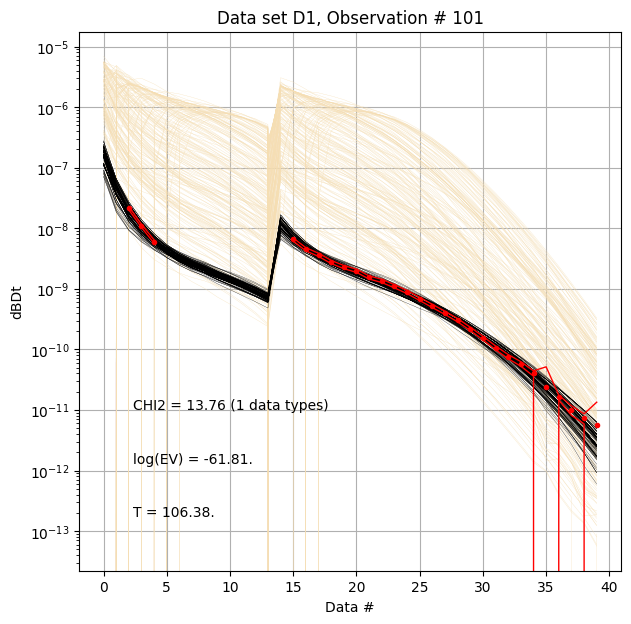

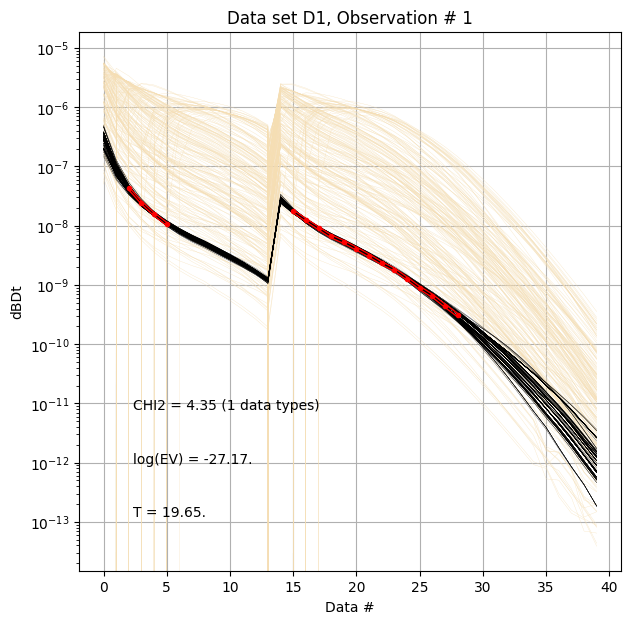

In [8]:
ig.plot_data_prior_post(f_post_h5, i_plot=100, hardcopy=hardcopy)
ig.plot_data_prior_post(f_post_h5, i_plot=0, hardcopy=hardcopy)

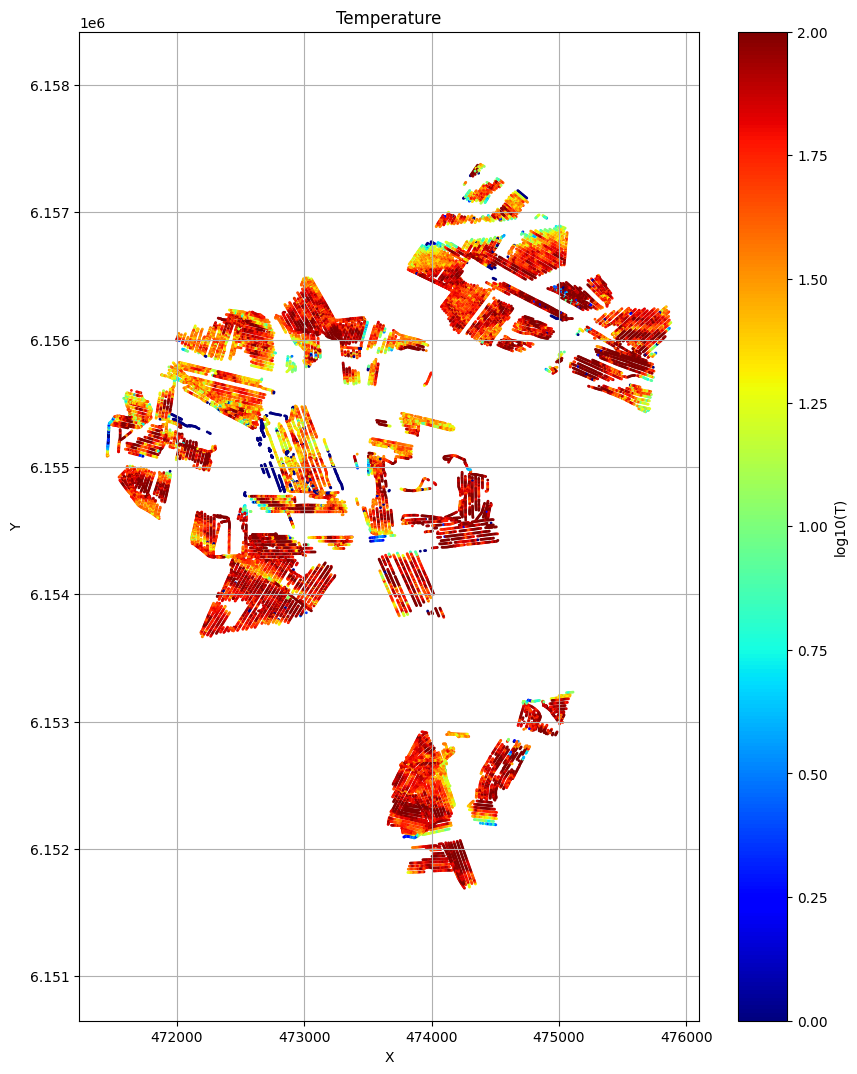

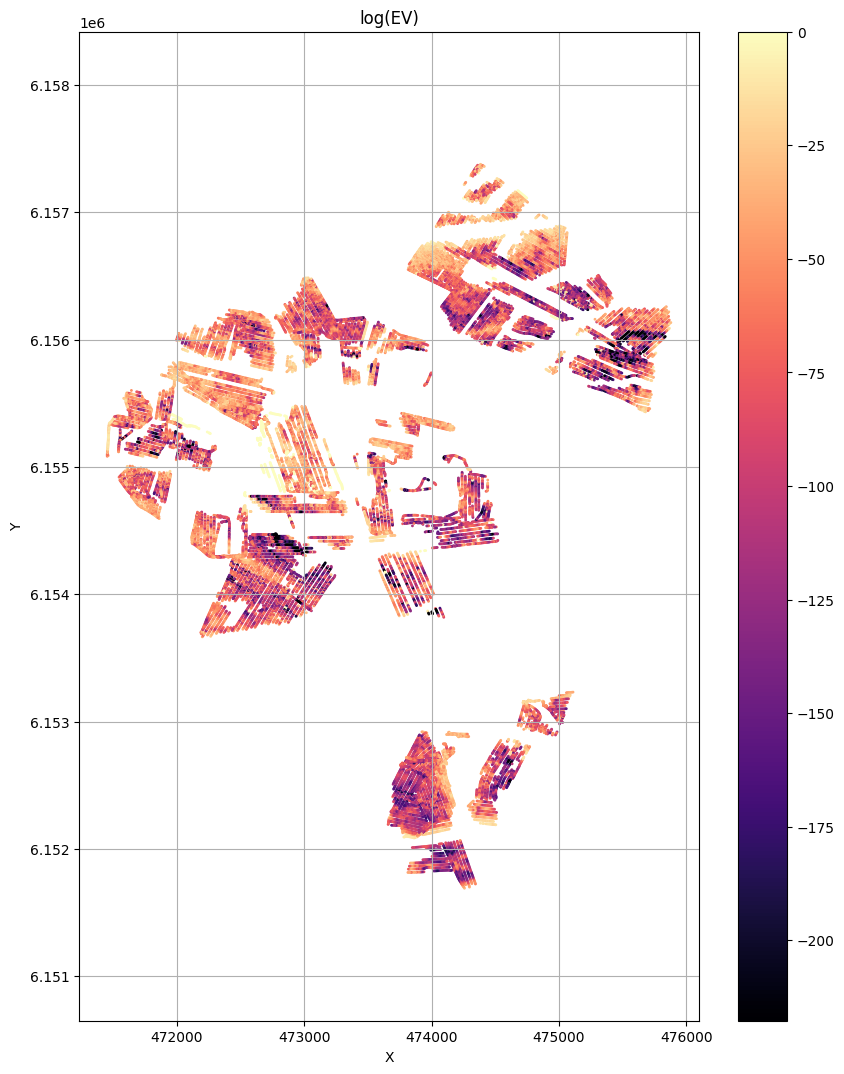

In [9]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T', hardcopy=hardcopy)
# Plot the evidnence (prior likelihood) estimated as part of inversion
ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=hardcopy)

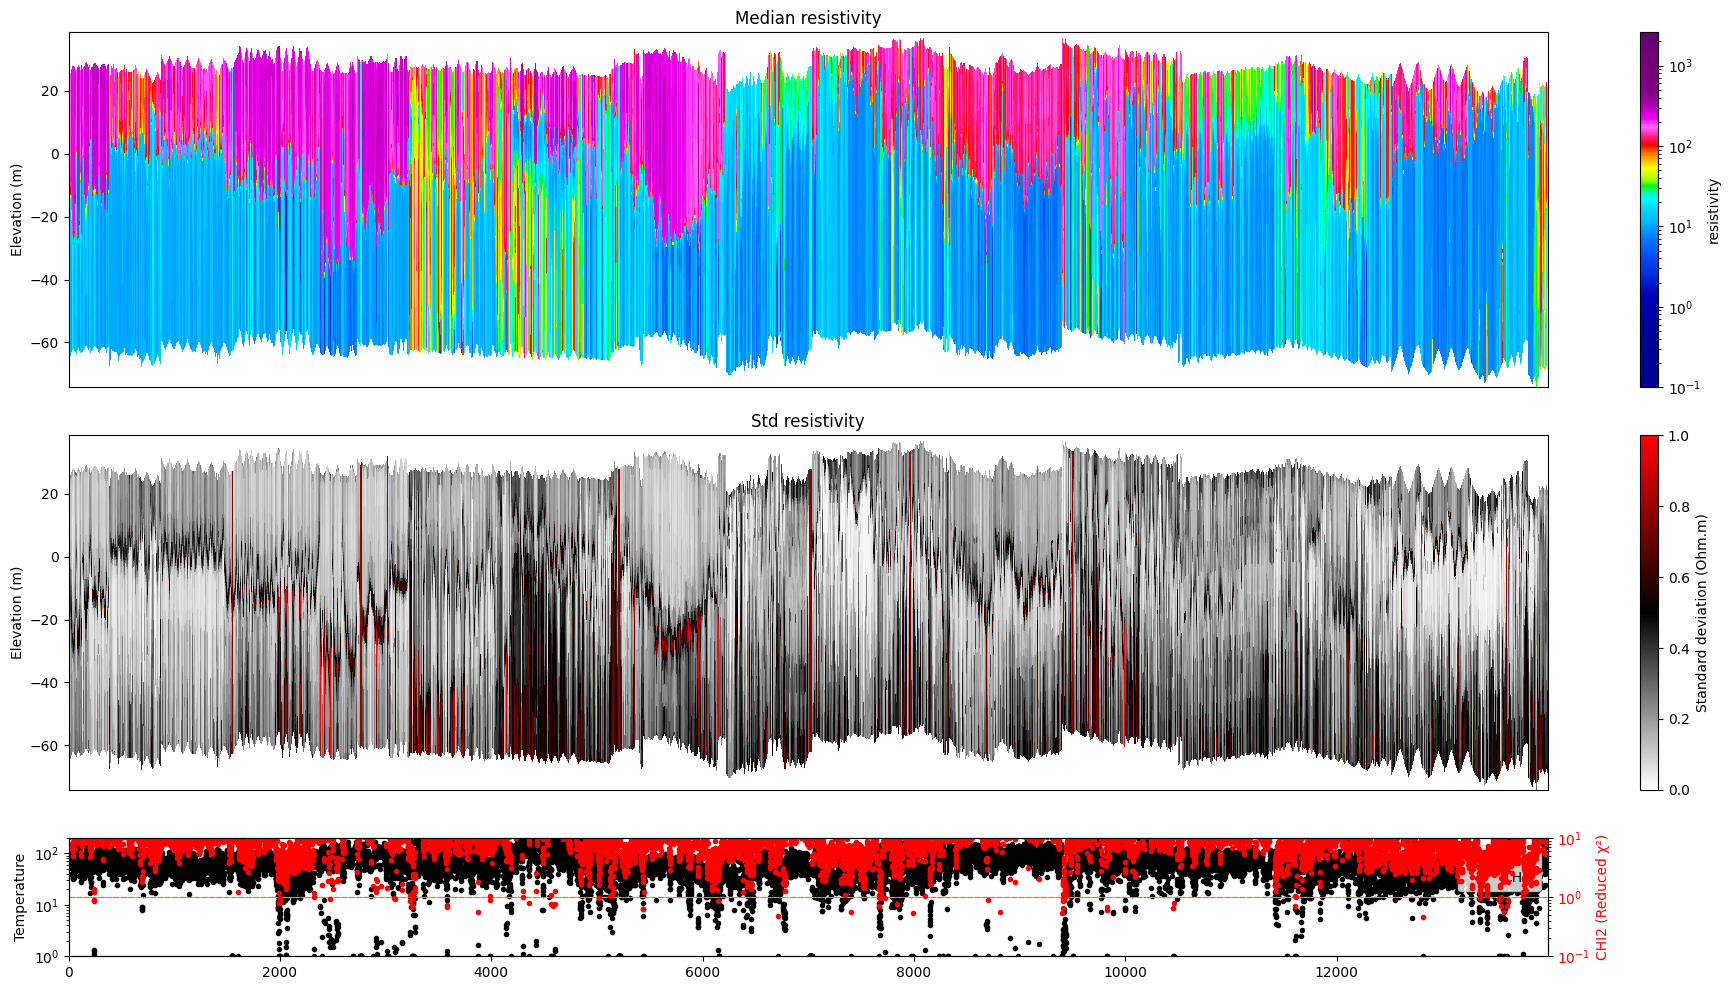

In [10]:
# find index id of data points wher LINE==1000
#i_plot= np.where( np.abs(LINE-1200)<1  )[0]
#ig.plot_profile(f_post_h5, i1=i_plot[0], i2=i_plot[-1], im=1)
ig.plot_profile(f_post_h5, i_plot=10000, i2=14000, im=1, hardcopy=hardcopy)
#ig.plot_profile(f_post_h5, i_plot=0, i2=2000, im=2)h yg sa

/M1/Median[5,:] resistivity


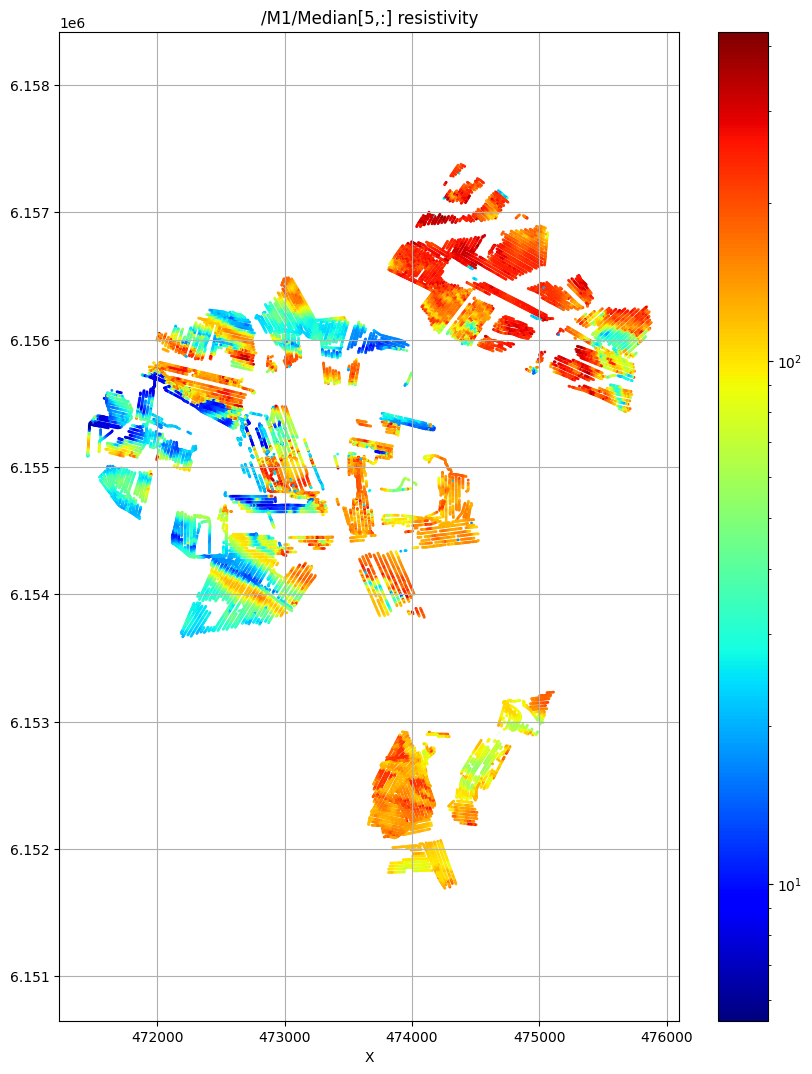

/M1/Median[20,:] resistivity


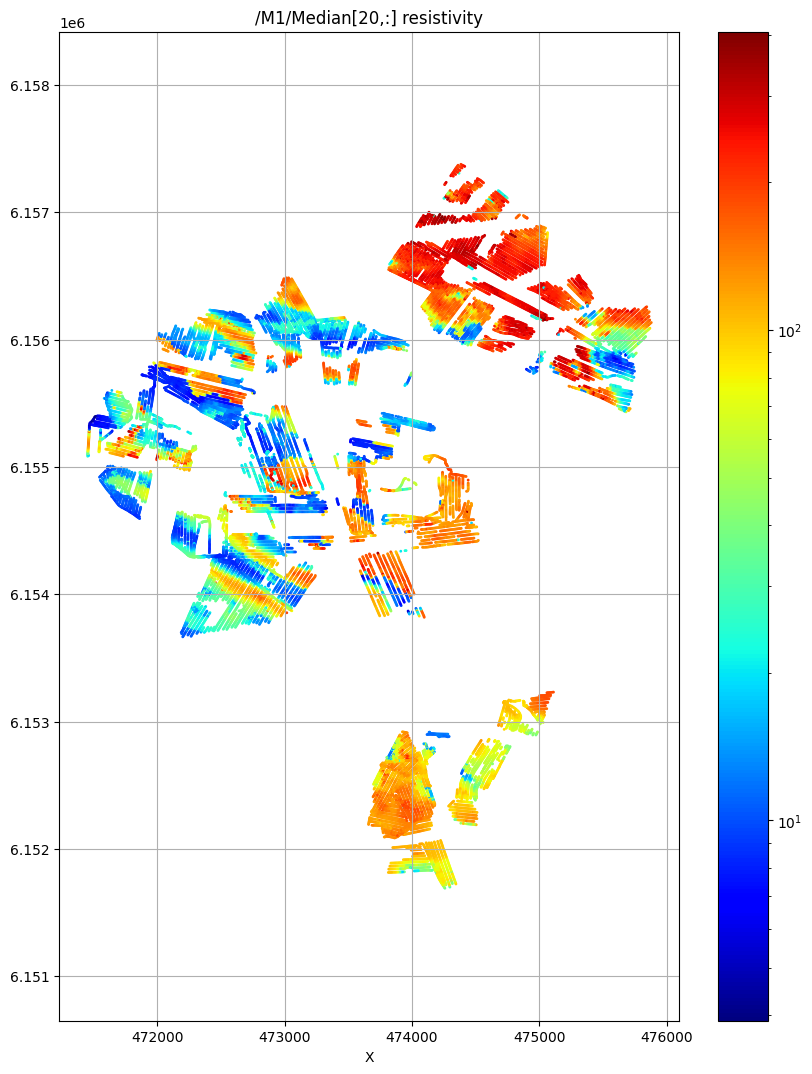

/M1/Median[40,:] resistivity


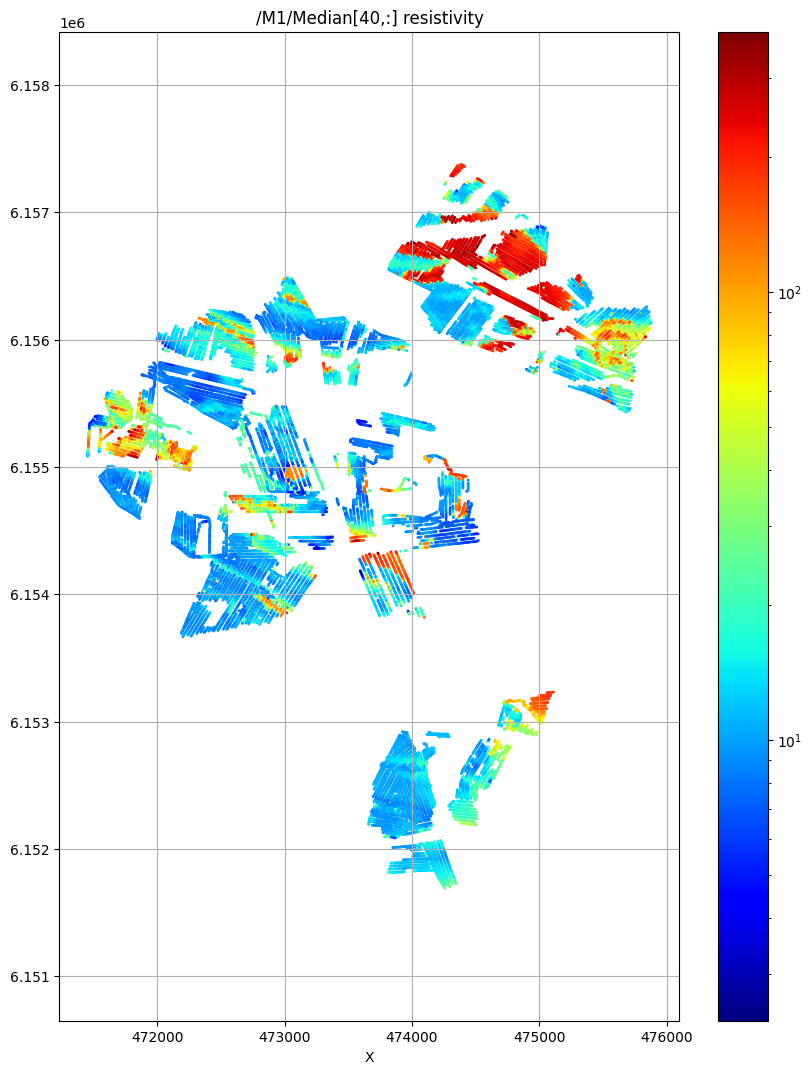

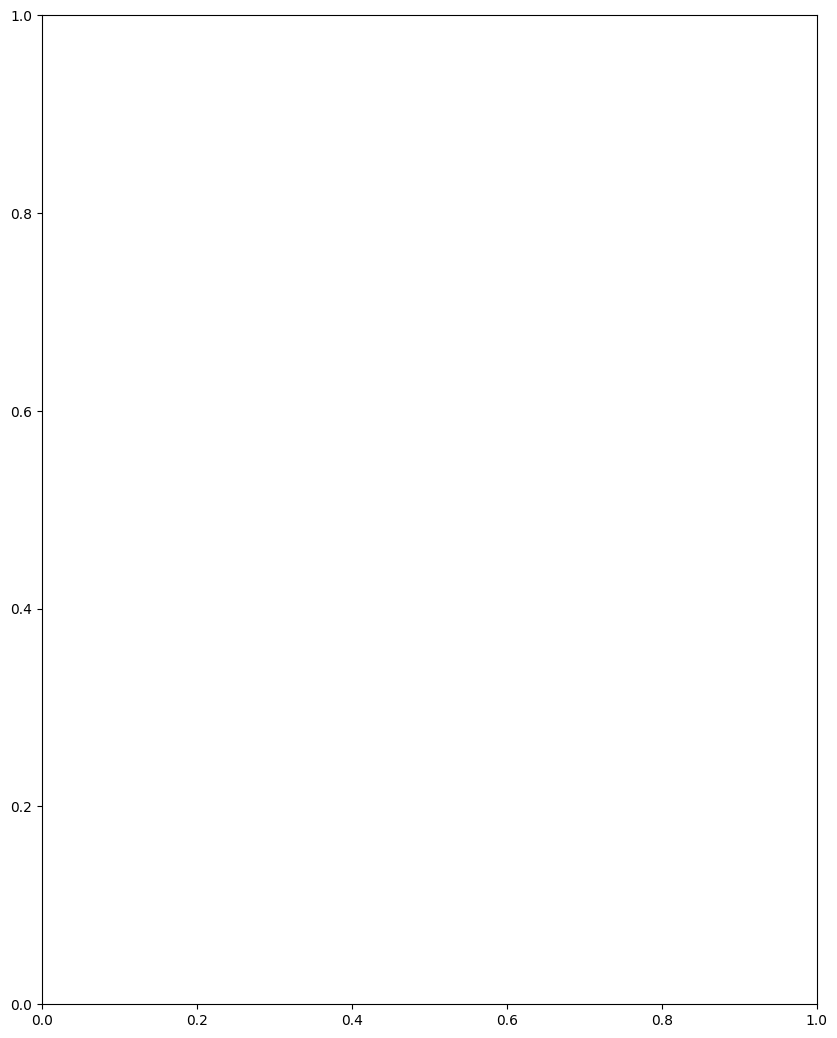

In [11]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=5, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=20, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()
ig.plot_feature_2d(f_post_h5,im=1,iz=40, key='Median', uselog=1, cmap='jet', s=1, hardcopy=hardcopy)
plt.show()

#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Mean', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=1, hardcopy=hardcopy)
    plt.show()
except:
    pass

In [12]:
# f_csv, f_point_csv = ig.post_to_csv(f_post_h5)